In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

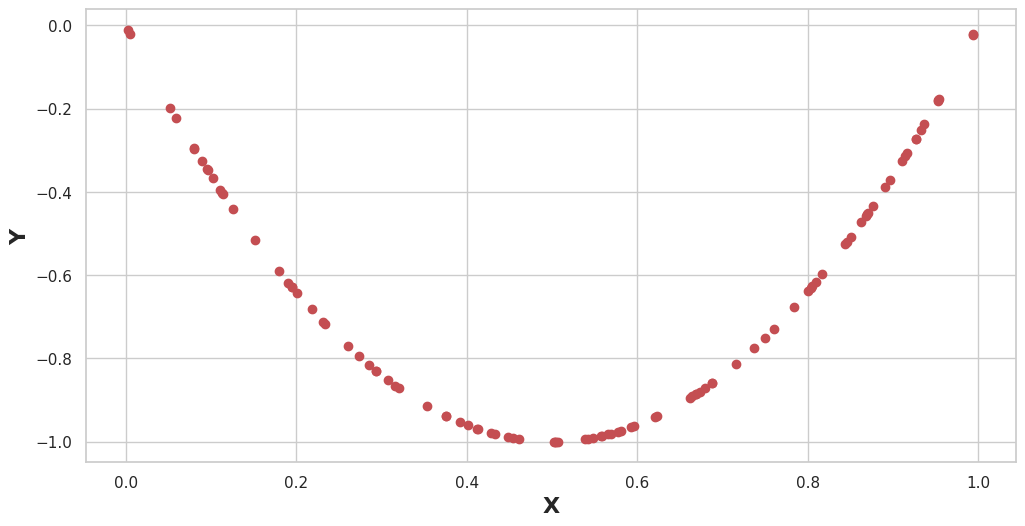

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 0.5686 - mean_squared_error: 0.5686 - val_loss: 0.2797 - val_mean_squared_error: 0.2797


Epoch 2/200
 - 0s - loss: 0.4223 - mean_squared_error: 0.4223 - val_loss: 0.2027 - val_mean_squared_error: 0.2027


Epoch 3/200
 - 0s - loss: 0.3204 - mean_squared_error: 0.3204 - val_loss: 0.1487 - val_mean_squared_error: 0.1487


Epoch 4/200
 - 0s - loss: 0.2439 - mean_squared_error: 0.2439 - val_loss: 0.1206 - val_mean_squared_error: 0.1206


Epoch 5/200
 - 0s - loss: 0.1998 - mean_squared_error: 0.1998 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 6/200
 - 0s - loss: 0.1657 - mean_squared_error: 0.1657 - val_loss: 0.0915 - val_mean_squared_error: 0.0915


Epoch 7/200
 - 0s - loss: 0.1449 - mean_squared_error: 0.1449 - val_loss: 0.0834 - val_mean_squared_error: 0.0834


Epoch 8/200
 - 0s - loss: 0.1243 - mean_squared_error: 0.1243 - val_loss: 0.0804 - val_mean_squared_error: 0.0804


Epoch 9/200
 - 0s - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.0794 - val_mean_squared_error: 0.0794


Epoch 10/200
 - 0s - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.0798 - val_mean_squared_error: 0.0798


Epoch 11/200
 - 0s - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.0807 - val_mean_squared_error: 0.0807


Epoch 12/200
 - 0s - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0834 - val_mean_squared_error: 0.0834


Epoch 13/200
 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0852 - val_mean_squared_error: 0.0852


Epoch 14/200
 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0856 - val_mean_squared_error: 0.0856


Epoch 15/200
 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0895 - val_mean_squared_error: 0.0895


Epoch 16/200
 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0896 - val_mean_squared_error: 0.0896


Epoch 17/200
 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 18/200
 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0885 - val_mean_squared_error: 0.0885


Epoch 19/200
 - 0s - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.0899 - val_mean_squared_error: 0.0899


Epoch 20/200
 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0899 - val_mean_squared_error: 0.0899


Epoch 21/200
 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0911 - val_mean_squared_error: 0.0911


Epoch 22/200
 - 0s - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0927 - val_mean_squared_error: 0.0927


Epoch 23/200
 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0917 - val_mean_squared_error: 0.0917


Epoch 24/200
 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0942 - val_mean_squared_error: 0.0942


Epoch 25/200
 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 26/200
 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 27/200
 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0942 - val_mean_squared_error: 0.0942


Epoch 28/200


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 29/200
 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 30/200
 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 31/200
 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 32/200
 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 33/200
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 34/200
 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 35/200
 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 36/200
 - 0s - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.1056 - val_mean_squared_error: 0.1056


Epoch 37/200
 - 0s - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 38/200
 - 0s - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 39/200
 - 0s - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 40/200
 - 0s - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 41/200
 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 42/200
 - 0s - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 43/200
 - 0s - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 44/200
 - 0s - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 45/200
 - 0s - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 46/200
 - 0s - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 47/200
 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 48/200
 - 0s - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1090 - val_mean_squared_error: 0.1090


Epoch 49/200


 - 0s - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 50/200


 - 0s - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1114 - val_mean_squared_error: 0.1114


Epoch 51/200


 - 0s - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1047 - val_mean_squared_error: 0.1047


Epoch 52/200
 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 53/200


 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 54/200


 - 0s - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.1074 - val_mean_squared_error: 0.1074


Epoch 55/200


 - 0s - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 56/200


 - 0s - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.1053 - val_mean_squared_error: 0.1053


Epoch 57/200


 - 0s - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 58/200
 - 0s - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1073 - val_mean_squared_error: 0.1073


Epoch 59/200
 - 0s - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.1085 - val_mean_squared_error: 0.1085


Epoch 60/200
 - 0s - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.1094 - val_mean_squared_error: 0.1094


Epoch 61/200


 - 0s - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.1105 - val_mean_squared_error: 0.1105


Epoch 62/200
 - 0s - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.1112 - val_mean_squared_error: 0.1112


Epoch 63/200


 - 0s - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.1098 - val_mean_squared_error: 0.1098


Epoch 64/200
 - 0s - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.1072 - val_mean_squared_error: 0.1072


Epoch 65/200


 - 0s - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1106 - val_mean_squared_error: 0.1106


Epoch 66/200


 - 0s - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 67/200


 - 0s - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.1093 - val_mean_squared_error: 0.1093


Epoch 68/200


 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1107 - val_mean_squared_error: 0.1107


Epoch 69/200
 - 0s - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.1142 - val_mean_squared_error: 0.1142


Epoch 70/200


 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1130 - val_mean_squared_error: 0.1130


Epoch 71/200


 - 0s - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.1151 - val_mean_squared_error: 0.1151


Epoch 72/200


 - 0s - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.1171 - val_mean_squared_error: 0.1171


Epoch 73/200


 - 0s - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.1197 - val_mean_squared_error: 0.1197


Epoch 74/200


 - 0s - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.1168 - val_mean_squared_error: 0.1168


Epoch 75/200
 - 0s - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.1190 - val_mean_squared_error: 0.1190


Epoch 76/200
 - 0s - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.1196 - val_mean_squared_error: 0.1196


Epoch 77/200


 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1180 - val_mean_squared_error: 0.1180


Epoch 78/200


 - 0s - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.1196 - val_mean_squared_error: 0.1196


Epoch 79/200


 - 0s - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.1164 - val_mean_squared_error: 0.1164


Epoch 80/200


 - 0s - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.1157 - val_mean_squared_error: 0.1157


Epoch 81/200


 - 0s - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.1165 - val_mean_squared_error: 0.1165


Epoch 82/200
 - 0s - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.1144 - val_mean_squared_error: 0.1144


Epoch 83/200


 - 0s - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.1159 - val_mean_squared_error: 0.1159


Epoch 84/200


 - 0s - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.1128 - val_mean_squared_error: 0.1128


Epoch 85/200


 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.1137 - val_mean_squared_error: 0.1137


Epoch 86/200


 - 0s - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.1173 - val_mean_squared_error: 0.1173


Epoch 87/200


 - 0s - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.1165 - val_mean_squared_error: 0.1165


Epoch 88/200
 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.1154 - val_mean_squared_error: 0.1154


Epoch 89/200


 - 0s - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 90/200


 - 0s - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 91/200


 - 0s - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.1177 - val_mean_squared_error: 0.1177


Epoch 92/200


 - 0s - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.1149 - val_mean_squared_error: 0.1149


Epoch 93/200


 - 0s - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.1147 - val_mean_squared_error: 0.1147


Epoch 94/200


 - 0s - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.1123 - val_mean_squared_error: 0.1123


Epoch 95/200


 - 0s - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.1148 - val_mean_squared_error: 0.1148


Epoch 96/200


 - 0s - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.1112 - val_mean_squared_error: 0.1112


Epoch 97/200


 - 0s - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 98/200


 - 0s - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.1112 - val_mean_squared_error: 0.1112


Epoch 99/200


 - 0s - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.1124 - val_mean_squared_error: 0.1124


Epoch 100/200
 - 0s - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.1141 - val_mean_squared_error: 0.1141


Epoch 101/200


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1134 - val_mean_squared_error: 0.1134


Epoch 102/200


 - 0s - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.1152 - val_mean_squared_error: 0.1152


Epoch 103/200


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1159 - val_mean_squared_error: 0.1159


Epoch 104/200


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 105/200


 - 0s - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.1152 - val_mean_squared_error: 0.1152


Epoch 106/200


 - 0s - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.1160 - val_mean_squared_error: 0.1160


Epoch 107/200


 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1198 - val_mean_squared_error: 0.1198


Epoch 108/200


 - 0s - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.1186 - val_mean_squared_error: 0.1186


Epoch 109/200


 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1191 - val_mean_squared_error: 0.1191


Epoch 110/200


 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1140 - val_mean_squared_error: 0.1140


Epoch 111/200


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1125 - val_mean_squared_error: 0.1125


Epoch 112/200


 - 0s - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.1161 - val_mean_squared_error: 0.1161


Epoch 113/200
 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.1187 - val_mean_squared_error: 0.1187


Epoch 114/200
 - 0s - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1209 - val_mean_squared_error: 0.1209


Epoch 115/200


 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.1241 - val_mean_squared_error: 0.1241


Epoch 116/200


 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1264 - val_mean_squared_error: 0.1264


Epoch 117/200


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1254 - val_mean_squared_error: 0.1254


Epoch 118/200


 - 0s - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.1260 - val_mean_squared_error: 0.1260


Epoch 119/200


 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1249 - val_mean_squared_error: 0.1249


Epoch 120/200


 - 0s - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.1226 - val_mean_squared_error: 0.1226


Epoch 121/200


 - 0s - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.1225 - val_mean_squared_error: 0.1225


Epoch 122/200


 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.1230 - val_mean_squared_error: 0.1230


Epoch 123/200


 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.1235 - val_mean_squared_error: 0.1235


Epoch 124/200


 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.1239 - val_mean_squared_error: 0.1239


Epoch 125/200
 - 0s - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.1244 - val_mean_squared_error: 0.1244


Epoch 126/200


 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.1242 - val_mean_squared_error: 0.1242


Epoch 127/200


 - 0s - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.1253 - val_mean_squared_error: 0.1253


Epoch 128/200


 - 0s - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.1215 - val_mean_squared_error: 0.1215


Epoch 129/200


 - 0s - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.1241 - val_mean_squared_error: 0.1241


Epoch 130/200


 - 0s - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.1268 - val_mean_squared_error: 0.1268


Epoch 131/200


 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.1224 - val_mean_squared_error: 0.1224


Epoch 132/200


 - 0s - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.1228 - val_mean_squared_error: 0.1228


Epoch 133/200


 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.1231 - val_mean_squared_error: 0.1231


Epoch 134/200


 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.1241 - val_mean_squared_error: 0.1241


Epoch 135/200


 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.1227 - val_mean_squared_error: 0.1227


Epoch 136/200


 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.1201 - val_mean_squared_error: 0.1201


Epoch 137/200


 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1180 - val_mean_squared_error: 0.1180


Epoch 138/200


 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1166 - val_mean_squared_error: 0.1166


Epoch 139/200


 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.1183 - val_mean_squared_error: 0.1183


Epoch 140/200


 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.1196 - val_mean_squared_error: 0.1196


Epoch 141/200


 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 142/200
 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.1241 - val_mean_squared_error: 0.1241


Epoch 143/200


 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1204 - val_mean_squared_error: 0.1204


Epoch 144/200


 - 0s - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.1227 - val_mean_squared_error: 0.1227


Epoch 145/200


 - 0s - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 146/200


 - 0s - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.1203 - val_mean_squared_error: 0.1203


Epoch 147/200


 - 0s - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.1165 - val_mean_squared_error: 0.1165


Epoch 148/200


 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1159 - val_mean_squared_error: 0.1159


Epoch 149/200


 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1167 - val_mean_squared_error: 0.1167


Epoch 150/200


 - 0s - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.1172 - val_mean_squared_error: 0.1172


Epoch 151/200


 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.1156 - val_mean_squared_error: 0.1156


Epoch 152/200


 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1178 - val_mean_squared_error: 0.1178


Epoch 153/200


 - 0s - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.1212 - val_mean_squared_error: 0.1212


Epoch 154/200


 - 0s - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.1249 - val_mean_squared_error: 0.1249


Epoch 155/200


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1245 - val_mean_squared_error: 0.1245


Epoch 156/200


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1230 - val_mean_squared_error: 0.1230


Epoch 157/200


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1250 - val_mean_squared_error: 0.1250


Epoch 158/200


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1248 - val_mean_squared_error: 0.1248


Epoch 159/200


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1218 - val_mean_squared_error: 0.1218


Epoch 160/200


 - 0s - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.1199 - val_mean_squared_error: 0.1199


Epoch 161/200


 - 0s - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.1233 - val_mean_squared_error: 0.1233


Epoch 162/200
 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1199 - val_mean_squared_error: 0.1199


Epoch 163/200


 - 0s - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.1221 - val_mean_squared_error: 0.1221


Epoch 164/200


 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1227 - val_mean_squared_error: 0.1227


Epoch 165/200


 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1209 - val_mean_squared_error: 0.1209


Epoch 166/200
 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1222 - val_mean_squared_error: 0.1222


Epoch 167/200


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1226 - val_mean_squared_error: 0.1226


Epoch 168/200


 - 0s - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.1229 - val_mean_squared_error: 0.1229


Epoch 169/200


 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1213 - val_mean_squared_error: 0.1213


Epoch 170/200


 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.1212 - val_mean_squared_error: 0.1212


Epoch 171/200

 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.1234 - val_mean_squared_error: 0.1234


Epoch 172/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1231 - val_mean_squared_error: 0.1231


Epoch 173/200

 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 174/200


 - 0s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1245 - val_mean_squared_error: 0.1245


Epoch 175/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1241 - val_mean_squared_error: 0.1241


Epoch 176/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1264 - val_mean_squared_error: 0.1264


Epoch 177/200


 - 0s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1303 - val_mean_squared_error: 0.1303


Epoch 178/200


 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.1296 - val_mean_squared_error: 0.1296


Epoch 179/200


 - 0s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1269 - val_mean_squared_error: 0.1269


Epoch 180/200


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1252 - val_mean_squared_error: 0.1252


Epoch 181/200


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1268 - val_mean_squared_error: 0.1268


Epoch 182/200


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1292 - val_mean_squared_error: 0.1292


Epoch 183/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1281 - val_mean_squared_error: 0.1281


Epoch 184/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1283 - val_mean_squared_error: 0.1283


Epoch 185/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1312 - val_mean_squared_error: 0.1312


Epoch 186/200


 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.1324 - val_mean_squared_error: 0.1324


Epoch 187/200


 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.1306 - val_mean_squared_error: 0.1306


Epoch 188/200


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1256 - val_mean_squared_error: 0.1256


Epoch 189/200


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.1237 - val_mean_squared_error: 0.1237


Epoch 190/200


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1225 - val_mean_squared_error: 0.1225


Epoch 191/200


 - 0s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1245 - val_mean_squared_error: 0.1245


Epoch 192/200


 - 0s - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.1257 - val_mean_squared_error: 0.1257


Epoch 193/200


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.1245 - val_mean_squared_error: 0.1245


Epoch 194/200


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.1268 - val_mean_squared_error: 0.1268


Epoch 195/200


 - 0s - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.1256 - val_mean_squared_error: 0.1256


Epoch 196/200


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.1271 - val_mean_squared_error: 0.1271


Epoch 197/200


 - 0s - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.1276 - val_mean_squared_error: 0.1276


Epoch 198/200


 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1272 - val_mean_squared_error: 0.1272


Epoch 199/200


 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1260 - val_mean_squared_error: 0.1260


Epoch 200/200


 - 0s - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.1217 - val_mean_squared_error: 0.1217


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

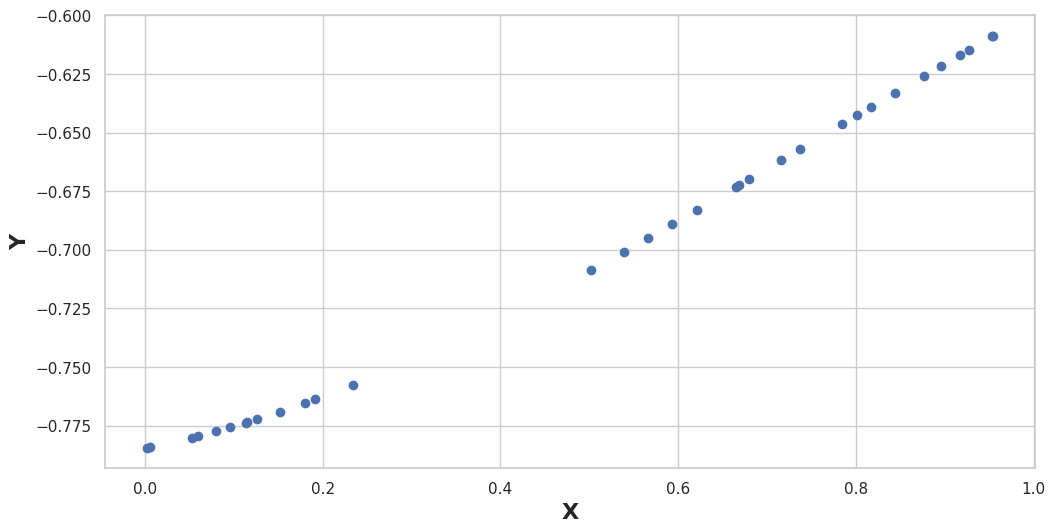

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.27970222225694946,
  0.20269838743137591,
  0.1487141793424433,
  0.12060716545039957,
  0.10131345881205617,
  0.09146334671161392,
  0.08344392012804747,
  0.08039327818110134,
  0.07936528071083805,
  0.07981772429775447,
  0.08066620296008434,
  0.0834384760693631,
  0.0851789091424452,
  0.08558318564565993,
  0.0895472092194144,
  0.08959745450269882,
  0.08841423894222261,
  0.0885424467057667,
  0.0898831199508894,
  0.08986699845373744,
  0.091120010136034,
  0.09273683713664385,
  0.09171022411972059,
  0.09422418995139499,
  0.09536221414578683,
  0.09475954396255089,
  0.09423363373868844,
  0.09804775753538265,
  0.09967425135387616,
  0.101902263803464,
  0.09769645917483351,
  0.09689040665486545,
  0.0994935599437943,
  0.09848664936637788,
  0.10177428932916938,
  0.10556269431430282,
  0.10010083032433283,
  0.10308358248210314,
  0.09797893310755942,
  0.09721477880057963,
  0.09922763926795486,
  0.10119684263499397,
  0.10183221745220097,
  0.100514

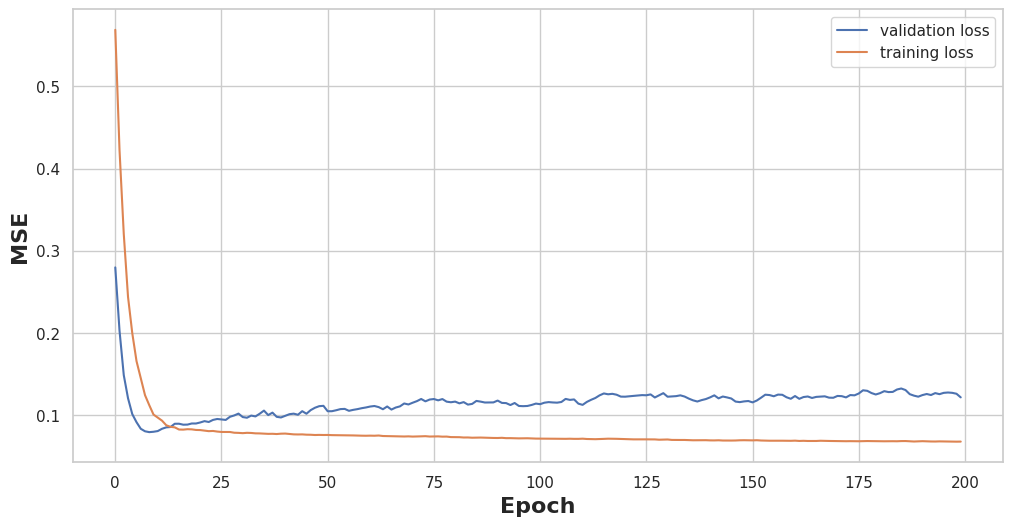

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.2064 - mean_squared_error: 0.2064 - val_loss: 0.1063 - val_mean_squared_error: 0.1063


Epoch 2/500
 - 0s - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 3/500
 - 0s - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 4/500
 - 0s - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.1271 - val_mean_squared_error: 0.1271


Epoch 5/500
 - 0s - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1130 - val_mean_squared_error: 0.1130


Epoch 6/500
 - 0s - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.0909 - val_mean_squared_error: 0.0909


Epoch 7/500
 - 0s - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.0829 - val_mean_squared_error: 0.0829


Epoch 8/500
 - 0s - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 9/500
 - 0s - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1238 - val_mean_squared_error: 0.1238


Epoch 10/500
 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.1238 - val_mean_squared_error: 0.1238


Epoch 11/500
 - 0s - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 12/500
 - 0s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0844 - val_mean_squared_error: 0.0844


Epoch 13/500
 - 0s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 14/500
 - 0s - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Epoch 15/500
 - 0s - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.1064 - val_mean_squared_error: 0.1064


Epoch 16/500
 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.0764 - val_mean_squared_error: 0.0764


Epoch 17/500
 - 0s - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.1150 - val_mean_squared_error: 0.1150


Epoch 18/500
 - 0s - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.0865 - val_mean_squared_error: 0.0865


Epoch 19/500
 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0859 - val_mean_squared_error: 0.0859


Epoch 20/500
 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0820 - val_mean_squared_error: 0.0820


Epoch 21/500
 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0913 - val_mean_squared_error: 0.0913


Epoch 22/500
 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.1176 - val_mean_squared_error: 0.1176


Epoch 23/500
 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.1340 - val_mean_squared_error: 0.1340


Epoch 24/500
 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 25/500
 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 26/500
 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0843 - val_mean_squared_error: 0.0843


Epoch 27/500
 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 28/500
 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0838 - val_mean_squared_error: 0.0838


Epoch 29/500
 - 0s - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 30/500
 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0842 - val_mean_squared_error: 0.0842


Epoch 31/500
 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0860 - val_mean_squared_error: 0.0860


Epoch 32/500
 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0855 - val_mean_squared_error: 0.0855


Epoch 33/500
 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0920 - val_mean_squared_error: 0.0920


Epoch 34/500
 - 0s - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0887 - val_mean_squared_error: 0.0887


Epoch 35/500
 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1272 - val_mean_squared_error: 0.1272


Epoch 36/500
 - 0s - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1323 - val_mean_squared_error: 0.1323


Epoch 37/500
 - 0s - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0929 - val_mean_squared_error: 0.0929


Epoch 38/500


 - 0s - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 39/500
 - 0s - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.1383 - val_mean_squared_error: 0.1383


Epoch 40/500
 - 0s - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 41/500
 - 0s - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1160 - val_mean_squared_error: 0.1160


Epoch 42/500
 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 43/500
 - 0s - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1049 - val_mean_squared_error: 0.1049


Epoch 44/500
 - 0s - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.1104 - val_mean_squared_error: 0.1104


Epoch 45/500
 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.1476 - val_mean_squared_error: 0.1476


Epoch 46/500
 - 0s - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.1555 - val_mean_squared_error: 0.1555


Epoch 47/500
 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1521 - val_mean_squared_error: 0.1521


Epoch 48/500
 - 0s - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.1581 - val_mean_squared_error: 0.1581


Epoch 49/500
 - 0s - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.1499 - val_mean_squared_error: 0.1499


Epoch 50/500


 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 51/500


 - 0s - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.1074 - val_mean_squared_error: 0.1074


Epoch 52/500


 - 0s - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 53/500


 - 0s - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 54/500


 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1057 - val_mean_squared_error: 0.1057


Epoch 55/500
 - 0s - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.1329 - val_mean_squared_error: 0.1329


Epoch 56/500


 - 0s - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.1097 - val_mean_squared_error: 0.1097


Epoch 57/500
 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1462 - val_mean_squared_error: 0.1462


Epoch 58/500
 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 59/500
 - 0s - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.1257 - val_mean_squared_error: 0.1257


Epoch 60/500
 - 0s - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.1325 - val_mean_squared_error: 0.1325


Epoch 61/500
 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.1482 - val_mean_squared_error: 0.1482


Epoch 62/500
 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.1614 - val_mean_squared_error: 0.1614


Epoch 63/500
 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1252 - val_mean_squared_error: 0.1252


Epoch 64/500
 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1225 - val_mean_squared_error: 0.1225


Epoch 65/500
 - 0s - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.1077 - val_mean_squared_error: 0.1077


Epoch 66/500
 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.1355 - val_mean_squared_error: 0.1355


Epoch 67/500


 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.1078 - val_mean_squared_error: 0.1078


Epoch 68/500
 - 0s - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.1163 - val_mean_squared_error: 0.1163


Epoch 69/500
 - 0s - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.1558 - val_mean_squared_error: 0.1558


Epoch 70/500
 - 0s - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.1377 - val_mean_squared_error: 0.1377


Epoch 71/500
 - 0s - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 72/500
 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.1489 - val_mean_squared_error: 0.1489


Epoch 73/500
 - 0s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.1106 - val_mean_squared_error: 0.1106


Epoch 74/500
 - 0s - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.1544 - val_mean_squared_error: 0.1544


Epoch 75/500
 - 0s - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.1456 - val_mean_squared_error: 0.1456


Epoch 76/500
 - 0s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1051 - val_mean_squared_error: 0.1051


Epoch 77/500


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1156 - val_mean_squared_error: 0.1156


Epoch 78/500


 - 0s - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.1135 - val_mean_squared_error: 0.1135


Epoch 79/500


 - 0s - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.1649 - val_mean_squared_error: 0.1649


Epoch 80/500


 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.1330 - val_mean_squared_error: 0.1330


Epoch 81/500


 - 0s - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.1274 - val_mean_squared_error: 0.1274


Epoch 82/500


 - 0s - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.1074 - val_mean_squared_error: 0.1074


Epoch 83/500


 - 0s - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.1402 - val_mean_squared_error: 0.1402


Epoch 84/500


 - 0s - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.1182 - val_mean_squared_error: 0.1182


Epoch 85/500


 - 0s - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.1472 - val_mean_squared_error: 0.1472


Epoch 86/500


 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.1690 - val_mean_squared_error: 0.1690


Epoch 87/500


 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.1291 - val_mean_squared_error: 0.1291


Epoch 88/500


 - 0s - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.1270 - val_mean_squared_error: 0.1270


Epoch 89/500
 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.1338 - val_mean_squared_error: 0.1338


Epoch 90/500
 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.1116 - val_mean_squared_error: 0.1116


Epoch 91/500
 - 0s - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.1113 - val_mean_squared_error: 0.1113


Epoch 92/500
 - 0s - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.1329 - val_mean_squared_error: 0.1329


Epoch 93/500
 - 0s - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.1334 - val_mean_squared_error: 0.1334


Epoch 94/500
 - 0s - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.1408 - val_mean_squared_error: 0.1408


Epoch 95/500
 - 0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.1498 - val_mean_squared_error: 0.1498


Epoch 96/500
 - 0s - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.1314 - val_mean_squared_error: 0.1314


Epoch 97/500


 - 0s - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.1414 - val_mean_squared_error: 0.1414


Epoch 98/500


 - 0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.1366 - val_mean_squared_error: 0.1366


Epoch 99/500


 - 0s - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.1635 - val_mean_squared_error: 0.1635


Epoch 100/500


 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.1301 - val_mean_squared_error: 0.1301


Epoch 101/500


 - 0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.1192 - val_mean_squared_error: 0.1192


Epoch 102/500


 - 0s - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.1125 - val_mean_squared_error: 0.1125


Epoch 103/500


 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.1398 - val_mean_squared_error: 0.1398


Epoch 104/500
 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.1115 - val_mean_squared_error: 0.1115


Epoch 105/500
 - 0s - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.1307 - val_mean_squared_error: 0.1307


Epoch 106/500
 - 0s - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.1308 - val_mean_squared_error: 0.1308


Epoch 107/500
 - 0s - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.1375 - val_mean_squared_error: 0.1375


Epoch 108/500
 - 0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.1581 - val_mean_squared_error: 0.1581


Epoch 109/500
 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.1168 - val_mean_squared_error: 0.1168


Epoch 110/500
 - 0s - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.1137 - val_mean_squared_error: 0.1137


Epoch 111/500
 - 0s - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.1202 - val_mean_squared_error: 0.1202


Epoch 112/500


 - 0s - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.1188 - val_mean_squared_error: 0.1188


Epoch 113/500


 - 0s - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.1312 - val_mean_squared_error: 0.1312


Epoch 114/500


 - 0s - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.1444 - val_mean_squared_error: 0.1444


Epoch 115/500


 - 0s - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.1506 - val_mean_squared_error: 0.1506


Epoch 116/500


 - 0s - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.1267 - val_mean_squared_error: 0.1267


Epoch 117/500


 - 0s - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.1437 - val_mean_squared_error: 0.1437


Epoch 118/500


 - 0s - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.1267 - val_mean_squared_error: 0.1267


Epoch 119/500
 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1291 - val_mean_squared_error: 0.1291


Epoch 120/500
 - 0s - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.1292 - val_mean_squared_error: 0.1292


Epoch 121/500
 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.1366 - val_mean_squared_error: 0.1366


Epoch 122/500
 - 0s - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.1387 - val_mean_squared_error: 0.1387


Epoch 123/500
 - 0s - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.1437 - val_mean_squared_error: 0.1437


Epoch 124/500
 - 0s - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.1831 - val_mean_squared_error: 0.1831


Epoch 125/500


 - 0s - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1662 - val_mean_squared_error: 0.1662


Epoch 126/500


 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.1575 - val_mean_squared_error: 0.1575


Epoch 127/500
 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.1320 - val_mean_squared_error: 0.1320


Epoch 128/500


 - 0s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.1470 - val_mean_squared_error: 0.1470


Epoch 129/500


 - 0s - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.1338 - val_mean_squared_error: 0.1338


Epoch 130/500


 - 0s - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.1640 - val_mean_squared_error: 0.1640


Epoch 131/500


 - 0s - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.1218 - val_mean_squared_error: 0.1218


Epoch 132/500


 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.1186 - val_mean_squared_error: 0.1186


Epoch 133/500


 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.1640 - val_mean_squared_error: 0.1640


Epoch 134/500


 - 0s - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.1141 - val_mean_squared_error: 0.1141


Epoch 135/500


 - 0s - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.1278 - val_mean_squared_error: 0.1278


Epoch 136/500
 - 0s - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.1482 - val_mean_squared_error: 0.1482


Epoch 137/500
 - 0s - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.1303 - val_mean_squared_error: 0.1303


Epoch 138/500
 - 0s - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.1226 - val_mean_squared_error: 0.1226


Epoch 139/500
 - 0s - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.1147 - val_mean_squared_error: 0.1147


Epoch 140/500
 - 0s - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.1218 - val_mean_squared_error: 0.1218


Epoch 141/500
 - 0s - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.1435 - val_mean_squared_error: 0.1435


Epoch 142/500


 - 0s - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.1370 - val_mean_squared_error: 0.1370


Epoch 143/500

 - 0s - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.1810 - val_mean_squared_error: 0.1810


Epoch 144/500


 - 0s - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.1674 - val_mean_squared_error: 0.1674


Epoch 145/500


 - 0s - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.1427 - val_mean_squared_error: 0.1427


Epoch 146/500


 - 0s - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.1250 - val_mean_squared_error: 0.1250


Epoch 147/500
 - 0s - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.1310 - val_mean_squared_error: 0.1310


Epoch 148/500


 - 0s - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.1205 - val_mean_squared_error: 0.1205


Epoch 149/500


 - 0s - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.1489 - val_mean_squared_error: 0.1489


Epoch 150/500


 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.1474 - val_mean_squared_error: 0.1474


Epoch 151/500


 - 0s - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1349 - val_mean_squared_error: 0.1349


Epoch 152/500


 - 0s - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.1596 - val_mean_squared_error: 0.1596


Epoch 153/500


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.1090 - val_mean_squared_error: 0.1090


Epoch 154/500


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1081 - val_mean_squared_error: 0.1081


Epoch 155/500


 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.1104 - val_mean_squared_error: 0.1104


Epoch 156/500
 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.1501 - val_mean_squared_error: 0.1501


Epoch 157/500


 - 0s - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.1075 - val_mean_squared_error: 0.1075


Epoch 158/500


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1230 - val_mean_squared_error: 0.1230


Epoch 159/500


 - 0s - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.1139 - val_mean_squared_error: 0.1139


Epoch 160/500


 - 0s - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.1227 - val_mean_squared_error: 0.1227


Epoch 161/500


 - 0s - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.1443 - val_mean_squared_error: 0.1443


Epoch 162/500


 - 0s - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.1476 - val_mean_squared_error: 0.1476


Epoch 163/500


 - 0s - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1702 - val_mean_squared_error: 0.1702


Epoch 164/500


 - 0s - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.1077 - val_mean_squared_error: 0.1077


Epoch 165/500


 - 0s - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.1143 - val_mean_squared_error: 0.1143


Epoch 166/500


 - 0s - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.1384 - val_mean_squared_error: 0.1384


Epoch 167/500


 - 0s - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 168/500


 - 0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 169/500


 - 0s - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.1233 - val_mean_squared_error: 0.1233


Epoch 170/500


 - 0s - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.1056 - val_mean_squared_error: 0.1056


Epoch 171/500


 - 0s - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 172/500


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1091 - val_mean_squared_error: 0.1091


Epoch 173/500


 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.1136 - val_mean_squared_error: 0.1136


Epoch 174/500


 - 0s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


Epoch 175/500


 - 0s - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.1305 - val_mean_squared_error: 0.1305


Epoch 176/500


 - 0s - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.1169 - val_mean_squared_error: 0.1169


Epoch 177/500


 - 0s - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.1191 - val_mean_squared_error: 0.1191


Epoch 178/500

 - 0s - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.1206 - val_mean_squared_error: 0.1206


Epoch 179/500


 - 0s - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.1129 - val_mean_squared_error: 0.1129


Epoch 180/500


 - 0s - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1280 - val_mean_squared_error: 0.1280


Epoch 181/500


 - 0s - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.1417 - val_mean_squared_error: 0.1417


Epoch 182/500


 - 0s - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.1395 - val_mean_squared_error: 0.1395


Epoch 183/500


 - 0s - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.1645 - val_mean_squared_error: 0.1645


Epoch 184/500


 - 0s - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.1249 - val_mean_squared_error: 0.1249


Epoch 185/500


 - 0s - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.1417 - val_mean_squared_error: 0.1417


Epoch 186/500


 - 0s - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.1352 - val_mean_squared_error: 0.1352


Epoch 187/500


 - 0s - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.1530 - val_mean_squared_error: 0.1530


Epoch 188/500


 - 0s - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.1212 - val_mean_squared_error: 0.1212


Epoch 189/500


 - 0s - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.1106 - val_mean_squared_error: 0.1106


Epoch 190/500


 - 0s - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.1423 - val_mean_squared_error: 0.1423


Epoch 191/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1516 - val_mean_squared_error: 0.1516


Epoch 192/500


 - 0s - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.1218 - val_mean_squared_error: 0.1218


Epoch 193/500


 - 0s - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.1159 - val_mean_squared_error: 0.1159


Epoch 194/500


 - 0s - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.1541 - val_mean_squared_error: 0.1541


Epoch 195/500


 - 0s - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.1247 - val_mean_squared_error: 0.1247


Epoch 196/500


 - 0s - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.1726 - val_mean_squared_error: 0.1726


Epoch 197/500


 - 0s - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.1258 - val_mean_squared_error: 0.1258


Epoch 198/500
 - 0s - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.1250 - val_mean_squared_error: 0.1250


Epoch 199/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1389 - val_mean_squared_error: 0.1389


Epoch 200/500
 - 0s - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.1247 - val_mean_squared_error: 0.1247


Epoch 201/500
 - 0s - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.1534 - val_mean_squared_error: 0.1534


Epoch 202/500
 - 0s - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.1418 - val_mean_squared_error: 0.1418


Epoch 203/500
 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1137 - val_mean_squared_error: 0.1137


Epoch 204/500


 - 0s - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.1251 - val_mean_squared_error: 0.1251


Epoch 205/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1524 - val_mean_squared_error: 0.1524


Epoch 206/500
 - 0s - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.1067 - val_mean_squared_error: 0.1067


Epoch 207/500


 - 0s - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.1529 - val_mean_squared_error: 0.1529


Epoch 208/500


 - 0s - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.1134 - val_mean_squared_error: 0.1134


Epoch 209/500
 - 0s - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.1102 - val_mean_squared_error: 0.1102


Epoch 210/500
 - 0s - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.1436 - val_mean_squared_error: 0.1436


Epoch 211/500
 - 0s - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.1186 - val_mean_squared_error: 0.1186


Epoch 212/500


 - 0s - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1228 - val_mean_squared_error: 0.1228


Epoch 213/500


 - 0s - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.1282 - val_mean_squared_error: 0.1282


Epoch 214/500


 - 0s - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.1116 - val_mean_squared_error: 0.1116


Epoch 215/500


 - 0s - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.1144 - val_mean_squared_error: 0.1144


Epoch 216/500
 - 0s - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.1260 - val_mean_squared_error: 0.1260


Epoch 217/500


 - 0s - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.1306 - val_mean_squared_error: 0.1306


Epoch 218/500


 - 0s - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.1403 - val_mean_squared_error: 0.1403


Epoch 219/500


 - 0s - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 220/500


 - 0s - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.1408 - val_mean_squared_error: 0.1408


Epoch 221/500


 - 0s - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.1290 - val_mean_squared_error: 0.1290


Epoch 222/500


 - 0s - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.1366 - val_mean_squared_error: 0.1366


Epoch 223/500


 - 0s - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.1143 - val_mean_squared_error: 0.1143


Epoch 224/500


 - 0s - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.1266 - val_mean_squared_error: 0.1266


Epoch 225/500


 - 0s - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.1112 - val_mean_squared_error: 0.1112


Epoch 226/500


 - 0s - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.1468 - val_mean_squared_error: 0.1468


Epoch 227/500


 - 0s - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.1500 - val_mean_squared_error: 0.1500


Epoch 228/500


 - 0s - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.1420 - val_mean_squared_error: 0.1420


Epoch 229/500


 - 0s - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.1296 - val_mean_squared_error: 0.1296


Epoch 230/500


 - 0s - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1214 - val_mean_squared_error: 0.1214


Epoch 231/500


 - 0s - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.1569 - val_mean_squared_error: 0.1569


Epoch 232/500


 - 0s - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.1075 - val_mean_squared_error: 0.1075


Epoch 233/500


 - 0s - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 234/500


 - 0s - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 235/500


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 236/500


 - 0s - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.1082 - val_mean_squared_error: 0.1082


Epoch 237/500


 - 0s - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.1075 - val_mean_squared_error: 0.1075


Epoch 238/500


 - 0s - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 239/500


 - 0s - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 240/500


 - 0s - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.1058 - val_mean_squared_error: 0.1058


Epoch 241/500


 - 0s - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 242/500


 - 0s - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.1100 - val_mean_squared_error: 0.1100


Epoch 243/500
 - 0s - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.1164 - val_mean_squared_error: 0.1164


Epoch 244/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1466 - val_mean_squared_error: 0.1466


Epoch 245/500


 - 0s - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 246/500


 - 0s - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.1026 - val_mean_squared_error: 0.1026


Epoch 247/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1260 - val_mean_squared_error: 0.1260


Epoch 248/500


 - 0s - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1549 - val_mean_squared_error: 0.1549


Epoch 249/500


 - 0s - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.1333 - val_mean_squared_error: 0.1333


Epoch 250/500


 - 0s - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1485 - val_mean_squared_error: 0.1485


Epoch 251/500


 - 0s - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.1230 - val_mean_squared_error: 0.1230


Epoch 252/500


 - 0s - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.1168 - val_mean_squared_error: 0.1168


Epoch 253/500


 - 0s - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0923 - val_mean_squared_error: 0.0923


Epoch 254/500


 - 0s - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0876 - val_mean_squared_error: 0.0876


Epoch 255/500


 - 0s - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.0941 - val_mean_squared_error: 0.0941


Epoch 256/500
 - 0s - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0902 - val_mean_squared_error: 0.0902


Epoch 257/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1395 - val_mean_squared_error: 0.1395


Epoch 258/500


 - 0s - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.1078 - val_mean_squared_error: 0.1078


Epoch 259/500


 - 0s - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 260/500


 - 0s - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 261/500


 - 0s - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1409 - val_mean_squared_error: 0.1409


Epoch 262/500


 - 0s - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.1257 - val_mean_squared_error: 0.1257


Epoch 263/500


 - 0s - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.1276 - val_mean_squared_error: 0.1276


Epoch 264/500


 - 0s - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.1439 - val_mean_squared_error: 0.1439


Epoch 265/500


 - 0s - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 266/500


 - 0s - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.0931 - val_mean_squared_error: 0.0931


Epoch 267/500


 - 0s - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.1120 - val_mean_squared_error: 0.1120


Epoch 268/500
 - 0s - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.1208 - val_mean_squared_error: 0.1208


Epoch 269/500


 - 0s - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.1297 - val_mean_squared_error: 0.1297


Epoch 270/500


 - 0s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.1206 - val_mean_squared_error: 0.1206


Epoch 271/500


 - 0s - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.1171 - val_mean_squared_error: 0.1171


Epoch 272/500


 - 0s - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 273/500


 - 0s - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0814 - val_mean_squared_error: 0.0814


Epoch 274/500
 - 0s - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0853 - val_mean_squared_error: 0.0853


Epoch 275/500


 - 0s - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.0788 - val_mean_squared_error: 0.0788


Epoch 276/500


 - 0s - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0854 - val_mean_squared_error: 0.0854


Epoch 277/500


 - 0s - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0797 - val_mean_squared_error: 0.0797


Epoch 278/500


 - 0s - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1233 - val_mean_squared_error: 0.1233


Epoch 279/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 280/500


 - 0s - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1330 - val_mean_squared_error: 0.1330


Epoch 281/500


 - 0s - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0739 - val_mean_squared_error: 0.0739


Epoch 282/500


 - 0s - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0774 - val_mean_squared_error: 0.0774


Epoch 283/500


 - 0s - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0789 - val_mean_squared_error: 0.0789


Epoch 284/500


 - 0s - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.1275 - val_mean_squared_error: 0.1275


Epoch 285/500


 - 0s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 286/500


 - 0s - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0780 - val_mean_squared_error: 0.0780


Epoch 287/500


 - 0s - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 288/500
 - 0s - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0891 - val_mean_squared_error: 0.0891


Epoch 289/500


 - 0s - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.1189 - val_mean_squared_error: 0.1189


Epoch 290/500


 - 0s - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.1063 - val_mean_squared_error: 0.1063


Epoch 291/500


 - 0s - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 292/500


 - 0s - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.1136 - val_mean_squared_error: 0.1136


Epoch 293/500


 - 0s - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 294/500
 - 0s - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 295/500


 - 0s - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.1098 - val_mean_squared_error: 0.1098


Epoch 296/500


 - 0s - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0925 - val_mean_squared_error: 0.0925


Epoch 297/500


 - 0s - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0873 - val_mean_squared_error: 0.0873


Epoch 298/500


 - 0s - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.1091 - val_mean_squared_error: 0.1091


Epoch 299/500


 - 0s - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1050 - val_mean_squared_error: 0.1050


Epoch 300/500


 - 0s - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0877 - val_mean_squared_error: 0.0877


Epoch 301/500


 - 0s - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0899 - val_mean_squared_error: 0.0899


Epoch 302/500


 - 0s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.1232 - val_mean_squared_error: 0.1232


Epoch 303/500


 - 0s - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 304/500

 - 0s - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.1132 - val_mean_squared_error: 0.1132


Epoch 305/500


 - 0s - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1249 - val_mean_squared_error: 0.1249


Epoch 306/500
 - 0s - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 307/500


 - 0s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.1374 - val_mean_squared_error: 0.1374


Epoch 308/500
 - 0s - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0843 - val_mean_squared_error: 0.0843


Epoch 309/500


 - 0s - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.0942 - val_mean_squared_error: 0.0942


Epoch 310/500
 - 0s - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0856 - val_mean_squared_error: 0.0856


Epoch 311/500


 - 0s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.1258 - val_mean_squared_error: 0.1258


Epoch 312/500


 - 0s - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 313/500
 - 0s - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1211 - val_mean_squared_error: 0.1211


Epoch 314/500


 - 0s - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0911 - val_mean_squared_error: 0.0911


Epoch 315/500


 - 0s - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0921 - val_mean_squared_error: 0.0921


Epoch 316/500
 - 0s - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 317/500
 - 0s - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0850 - val_mean_squared_error: 0.0850


Epoch 318/500


 - 0s - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1077 - val_mean_squared_error: 0.1077


Epoch 319/500


 - 0s - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 320/500
 - 0s - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0891 - val_mean_squared_error: 0.0891


Epoch 321/500


 - 0s - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0856 - val_mean_squared_error: 0.0856


Epoch 322/500


 - 0s - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0841 - val_mean_squared_error: 0.0841


Epoch 323/500


 - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0790 - val_mean_squared_error: 0.0790


Epoch 324/500


 - 0s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1138 - val_mean_squared_error: 0.1138


Epoch 325/500


 - 0s - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.0898 - val_mean_squared_error: 0.0898


Epoch 326/500


 - 0s - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1028 - val_mean_squared_error: 0.1028


Epoch 327/500


 - 0s - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0935 - val_mean_squared_error: 0.0935


Epoch 328/500
 - 0s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0707 - val_mean_squared_error: 0.0707


Epoch 329/500


 - 0s - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0699 - val_mean_squared_error: 0.0699


Epoch 330/500


 - 0s - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0749 - val_mean_squared_error: 0.0749


Epoch 331/500


 - 0s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 332/500


 - 0s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 333/500


 - 0s - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1146 - val_mean_squared_error: 0.1146


Epoch 334/500


 - 0s - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 335/500


 - 0s - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0772 - val_mean_squared_error: 0.0772


Epoch 336/500


 - 0s - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 337/500
 - 0s - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0716 - val_mean_squared_error: 0.0716


Epoch 338/500


 - 0s - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0915 - val_mean_squared_error: 0.0915


Epoch 339/500


 - 0s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 340/500


 - 0s - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0735 - val_mean_squared_error: 0.0735


Epoch 341/500


 - 0s - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0582 - val_mean_squared_error: 0.0582


Epoch 342/500


 - 0s - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0643 - val_mean_squared_error: 0.0643


Epoch 343/500


 - 0s - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0603 - val_mean_squared_error: 0.0603


Epoch 344/500


 - 0s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0684 - val_mean_squared_error: 0.0684


Epoch 345/500


 - 0s - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0653 - val_mean_squared_error: 0.0653


Epoch 346/500


 - 0s - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0698 - val_mean_squared_error: 0.0698


Epoch 347/500


 - 0s - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0714 - val_mean_squared_error: 0.0714


Epoch 348/500
 - 0s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0735 - val_mean_squared_error: 0.0735


Epoch 349/500


 - 0s - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1113 - val_mean_squared_error: 0.1113


Epoch 350/500


 - 0s - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0654 - val_mean_squared_error: 0.0654


Epoch 351/500


 - 0s - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0926 - val_mean_squared_error: 0.0926


Epoch 352/500


 - 0s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0662 - val_mean_squared_error: 0.0662


Epoch 353/500


 - 0s - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0691 - val_mean_squared_error: 0.0691


Epoch 354/500


 - 0s - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0744 - val_mean_squared_error: 0.0744


Epoch 355/500


 - 0s - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0699 - val_mean_squared_error: 0.0699


Epoch 356/500


 - 0s - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0817 - val_mean_squared_error: 0.0817


Epoch 357/500


 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0880 - val_mean_squared_error: 0.0880


Epoch 358/500


 - 0s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0549 - val_mean_squared_error: 0.0549


Epoch 359/500


 - 0s - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0849 - val_mean_squared_error: 0.0849


Epoch 360/500
 - 0s - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0636 - val_mean_squared_error: 0.0636


Epoch 361/500
 - 0s - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0641 - val_mean_squared_error: 0.0641


Epoch 362/500
 - 0s - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0672 - val_mean_squared_error: 0.0672


Epoch 363/500


 - 0s - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0656 - val_mean_squared_error: 0.0656


Epoch 364/500
 - 0s - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0811 - val_mean_squared_error: 0.0811


Epoch 365/500


 - 0s - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 366/500


 - 0s - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 367/500


 - 0s - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0477 - val_mean_squared_error: 0.0477


Epoch 368/500


 - 0s - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0476 - val_mean_squared_error: 0.0476


Epoch 369/500


 - 0s - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 370/500


 - 0s - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0505 - val_mean_squared_error: 0.0505


Epoch 371/500


 - 0s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0791 - val_mean_squared_error: 0.0791


Epoch 372/500


 - 0s - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0752 - val_mean_squared_error: 0.0752


Epoch 373/500


 - 0s - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0519 - val_mean_squared_error: 0.0519


Epoch 374/500


 - 0s - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0586 - val_mean_squared_error: 0.0586


Epoch 375/500


 - 0s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0637 - val_mean_squared_error: 0.0637


Epoch 376/500


 - 0s - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0635 - val_mean_squared_error: 0.0635


Epoch 377/500


 - 0s - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0520 - val_mean_squared_error: 0.0520


Epoch 378/500


 - 0s - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0561 - val_mean_squared_error: 0.0561


Epoch 379/500


 - 0s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0775 - val_mean_squared_error: 0.0775


Epoch 380/500


 - 0s - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0582 - val_mean_squared_error: 0.0582


Epoch 381/500


 - 0s - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0683 - val_mean_squared_error: 0.0683


Epoch 382/500


 - 0s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0598 - val_mean_squared_error: 0.0598


Epoch 383/500

 - 0s - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0786 - val_mean_squared_error: 0.0786


Epoch 384/500


 - 0s - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0593 - val_mean_squared_error: 0.0593


Epoch 385/500


 - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0477 - val_mean_squared_error: 0.0477


Epoch 386/500


 - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0648 - val_mean_squared_error: 0.0648


Epoch 387/500


 - 0s - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0385 - val_mean_squared_error: 0.0385


Epoch 388/500


 - 0s - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0505 - val_mean_squared_error: 0.0505


Epoch 389/500


 - 0s - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0411 - val_mean_squared_error: 0.0411


Epoch 390/500


 - 0s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0471 - val_mean_squared_error: 0.0471


Epoch 391/500


 - 0s - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0491 - val_mean_squared_error: 0.0491


Epoch 392/500
 - 0s - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0688 - val_mean_squared_error: 0.0688


Epoch 393/500


 - 0s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0501 - val_mean_squared_error: 0.0501


Epoch 394/500


 - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0608 - val_mean_squared_error: 0.0608


Epoch 395/500


 - 0s - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0589 - val_mean_squared_error: 0.0589


Epoch 396/500


 - 0s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0517 - val_mean_squared_error: 0.0517


Epoch 397/500
 - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0452 - val_mean_squared_error: 0.0452


Epoch 398/500


 - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 399/500


 - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0371 - val_mean_squared_error: 0.0371


Epoch 400/500


 - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0482 - val_mean_squared_error: 0.0482


Epoch 401/500


 - 0s - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 402/500


 - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0467 - val_mean_squared_error: 0.0467


Epoch 403/500


 - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 404/500


 - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0464 - val_mean_squared_error: 0.0464


Epoch 405/500


 - 0s - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0354 - val_mean_squared_error: 0.0354


Epoch 406/500
 - 0s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0537 - val_mean_squared_error: 0.0537


Epoch 407/500
 - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0526 - val_mean_squared_error: 0.0526


Epoch 408/500


 - 0s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0315 - val_mean_squared_error: 0.0315


Epoch 409/500


 - 0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0446 - val_mean_squared_error: 0.0446


Epoch 410/500


 - 0s - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0354 - val_mean_squared_error: 0.0354


Epoch 411/500


 - 0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0322 - val_mean_squared_error: 0.0322


Epoch 412/500


 - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0509 - val_mean_squared_error: 0.0509


Epoch 413/500


 - 0s - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0489 - val_mean_squared_error: 0.0489


Epoch 414/500


 - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0347 - val_mean_squared_error: 0.0347


Epoch 415/500


 - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0409 - val_mean_squared_error: 0.0409


Epoch 416/500


 - 0s - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0353 - val_mean_squared_error: 0.0353


Epoch 417/500


 - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0373 - val_mean_squared_error: 0.0373


Epoch 418/500


 - 0s - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0348 - val_mean_squared_error: 0.0348


Epoch 419/500


 - 0s - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0338 - val_mean_squared_error: 0.0338


Epoch 420/500


 - 0s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0370 - val_mean_squared_error: 0.0370


Epoch 421/500


 - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0332 - val_mean_squared_error: 0.0332


Epoch 422/500


 - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0330 - val_mean_squared_error: 0.0330


Epoch 423/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0272 - val_mean_squared_error: 0.0272


Epoch 424/500


 - 0s - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0277 - val_mean_squared_error: 0.0277


Epoch 425/500


 - 0s - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0292 - val_mean_squared_error: 0.0292


Epoch 426/500


 - 0s - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0273 - val_mean_squared_error: 0.0273


Epoch 427/500


 - 0s - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0286 - val_mean_squared_error: 0.0286


Epoch 428/500


 - 0s - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0254 - val_mean_squared_error: 0.0254


Epoch 429/500


 - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0301 - val_mean_squared_error: 0.0301


Epoch 430/500


 - 0s - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0292 - val_mean_squared_error: 0.0292


Epoch 431/500
 - 0s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0382 - val_mean_squared_error: 0.0382


Epoch 432/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0246 - val_mean_squared_error: 0.0246


Epoch 433/500


 - 0s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0297 - val_mean_squared_error: 0.0297


Epoch 434/500


 - 0s - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0288 - val_mean_squared_error: 0.0288


Epoch 435/500


 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0266 - val_mean_squared_error: 0.0266


Epoch 436/500


 - 0s - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0226 - val_mean_squared_error: 0.0226


Epoch 437/500
 - 0s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0247 - val_mean_squared_error: 0.0247


Epoch 438/500
 - 0s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0249 - val_mean_squared_error: 0.0249


Epoch 439/500


 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0230 - val_mean_squared_error: 0.0230


Epoch 440/500


 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0240 - val_mean_squared_error: 0.0240


Epoch 441/500


 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0280 - val_mean_squared_error: 0.0280


Epoch 442/500


 - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0280 - val_mean_squared_error: 0.0280


Epoch 443/500
 - 0s - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0272 - val_mean_squared_error: 0.0272


Epoch 444/500


 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0203 - val_mean_squared_error: 0.0203


Epoch 445/500


 - 0s - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


Epoch 446/500
 - 0s - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0237 - val_mean_squared_error: 0.0237


Epoch 447/500
 - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0210 - val_mean_squared_error: 0.0210


Epoch 448/500


 - 0s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0247 - val_mean_squared_error: 0.0247


Epoch 449/500


 - 0s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0237 - val_mean_squared_error: 0.0237


Epoch 450/500


 - 0s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0196 - val_mean_squared_error: 0.0196


Epoch 451/500
 - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0173 - val_mean_squared_error: 0.0173


Epoch 452/500


 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0184 - val_mean_squared_error: 0.0184


Epoch 453/500


 - 0s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0197 - val_mean_squared_error: 0.0197


Epoch 454/500


 - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0152 - val_mean_squared_error: 0.0152


Epoch 455/500


 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0139 - val_mean_squared_error: 0.0139


Epoch 456/500


 - 0s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0234 - val_mean_squared_error: 0.0234


Epoch 457/500


 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0194 - val_mean_squared_error: 0.0194


Epoch 458/500


 - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0198 - val_mean_squared_error: 0.0198


Epoch 459/500
 - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


Epoch 460/500
 - 0s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0171 - val_mean_squared_error: 0.0171


Epoch 461/500
 - 0s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0241 - val_mean_squared_error: 0.0241


Epoch 462/500


 - 0s - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0166 - val_mean_squared_error: 0.0166


Epoch 463/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0185 - val_mean_squared_error: 0.0185


Epoch 464/500
 - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0148 - val_mean_squared_error: 0.0148


Epoch 465/500


 - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0146 - val_mean_squared_error: 0.0146


Epoch 466/500


 - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 467/500


 - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0209 - val_mean_squared_error: 0.0209


Epoch 468/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0207 - val_mean_squared_error: 0.0207


Epoch 469/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0164 - val_mean_squared_error: 0.0164


Epoch 470/500
 - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0153 - val_mean_squared_error: 0.0153


Epoch 471/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0150 - val_mean_squared_error: 0.0150


Epoch 472/500


 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0189 - val_mean_squared_error: 0.0189


Epoch 473/500


 - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


Epoch 474/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0120 - val_mean_squared_error: 0.0120


Epoch 475/500


 - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 476/500


 - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0130 - val_mean_squared_error: 0.0130


Epoch 477/500


 - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0134 - val_mean_squared_error: 0.0134


Epoch 478/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0145 - val_mean_squared_error: 0.0145


Epoch 479/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


Epoch 480/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0128 - val_mean_squared_error: 0.0128


Epoch 481/500
 - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0114 - val_mean_squared_error: 0.0114


Epoch 482/500
 - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


Epoch 483/500


 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0110 - val_mean_squared_error: 0.0110


Epoch 484/500


 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0122 - val_mean_squared_error: 0.0122


Epoch 485/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0099 - val_mean_squared_error: 0.0099


Epoch 486/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 487/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 488/500


 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 489/500


 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0106 - val_mean_squared_error: 0.0106


Epoch 490/500
 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 491/500


 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0152 - val_mean_squared_error: 0.0152


Epoch 492/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 493/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0163 - val_mean_squared_error: 0.0163


Epoch 494/500


 - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0105 - val_mean_squared_error: 0.0105


Epoch 495/500


 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0120 - val_mean_squared_error: 0.0120


Epoch 496/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 497/500


 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0143 - val_mean_squared_error: 0.0143


Epoch 498/500


 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0117 - val_mean_squared_error: 0.0117


Epoch 499/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


Epoch 500/500


 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0078 - val_mean_squared_error: 0.0078


Text(0, 0.5, 'Y')

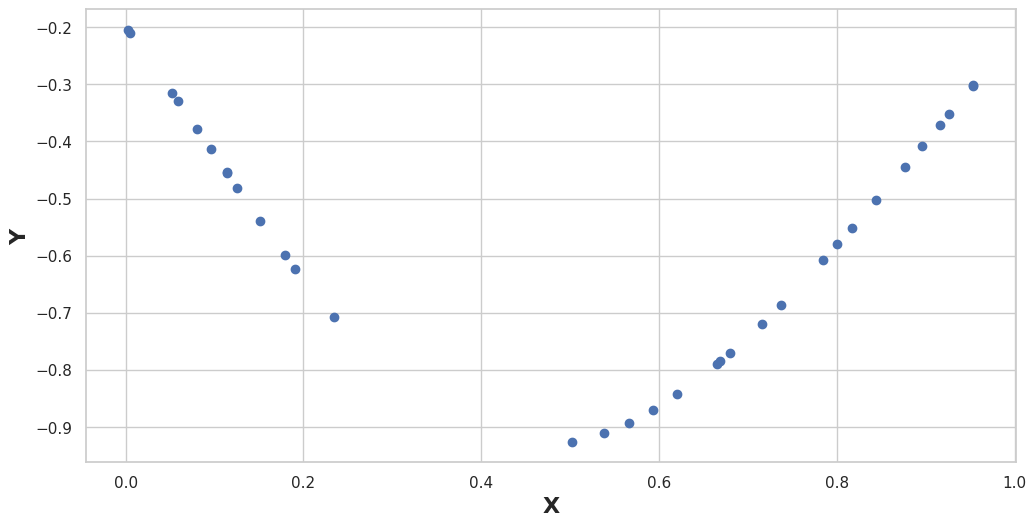

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

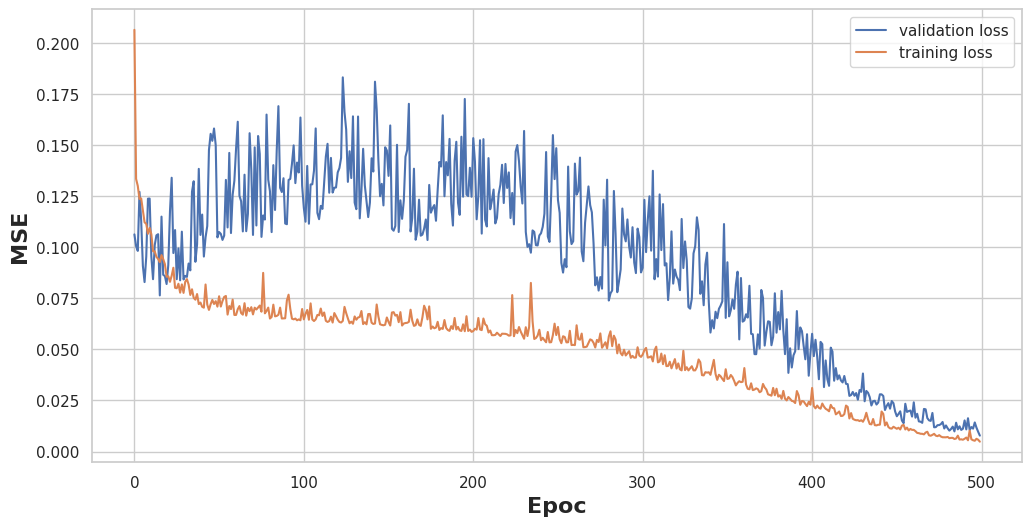

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

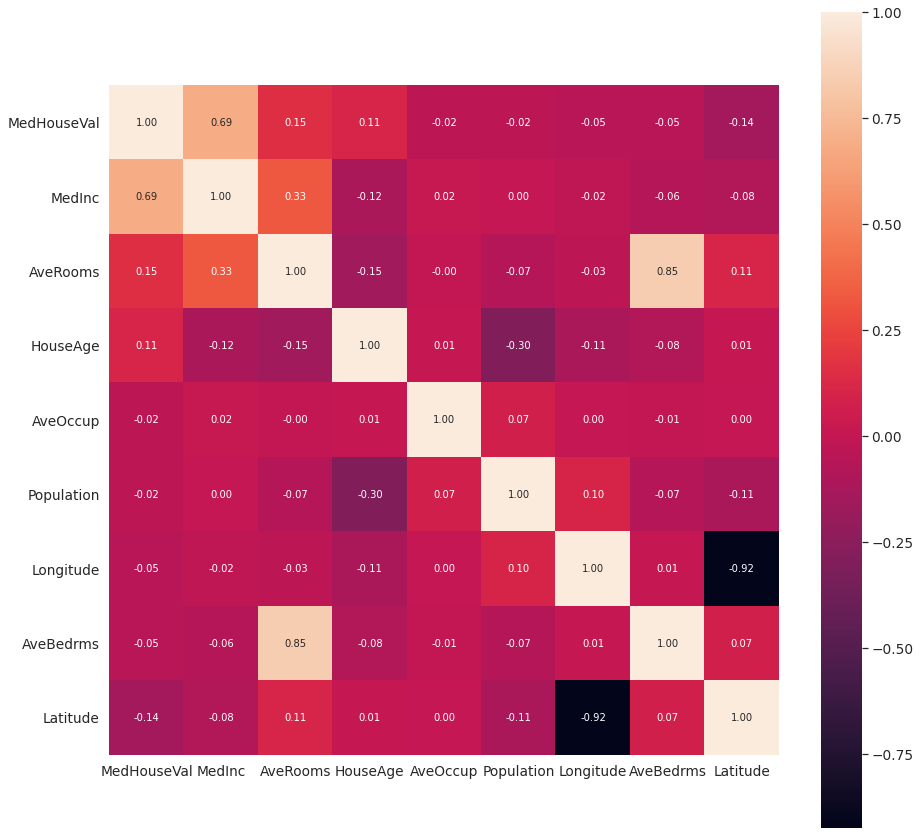

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

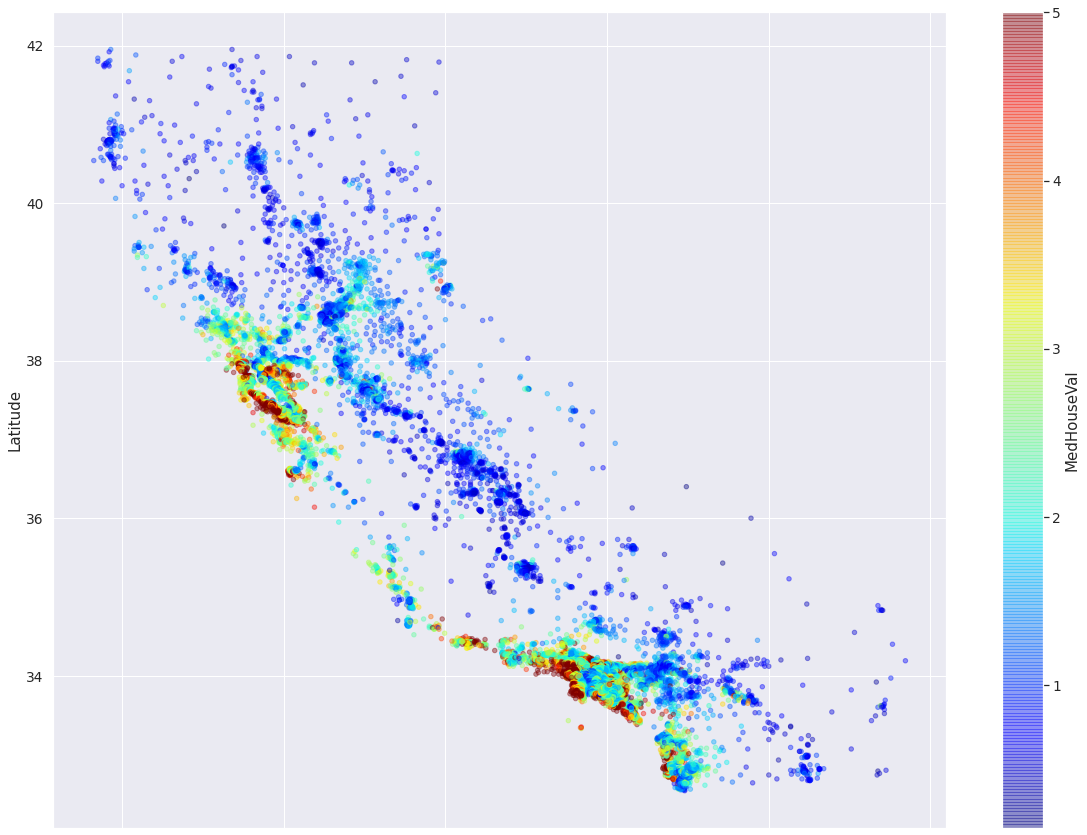

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

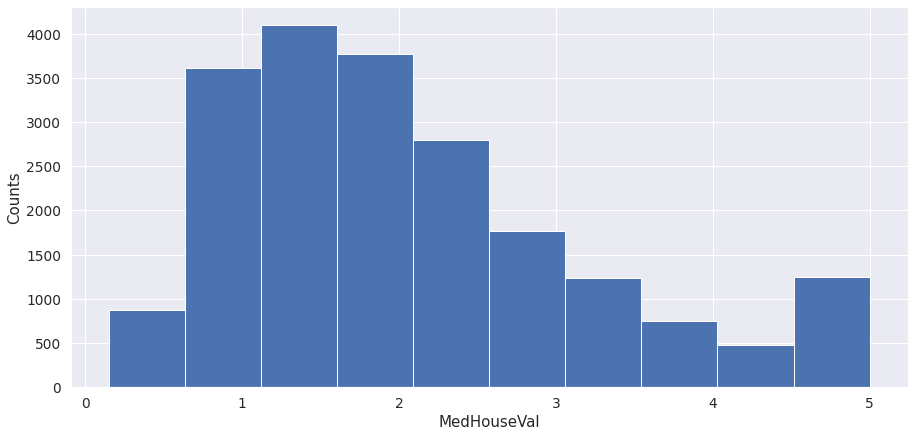

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

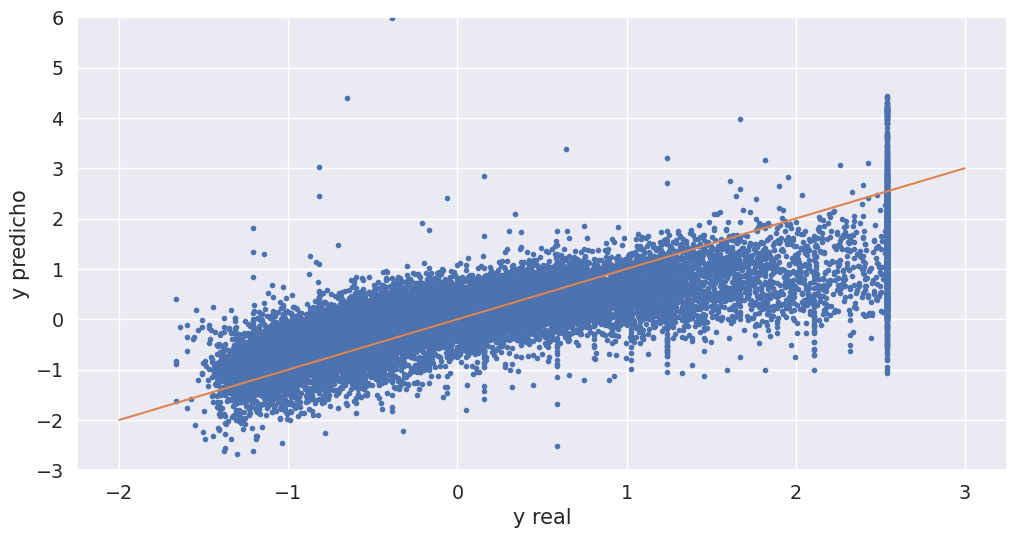

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 12s - loss: 1.0638

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.4790 

 5568/12384 [============>.................] - ETA: 0s - loss: 0.4155

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.3992

10976/12384 [=========================>....] - ETA: 0s - loss: 0.3830

12384/12384 [==============================] - 0s 30us/step - loss: 0.3800 - val_loss: 0.3412


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3153

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.3417

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.3322

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.3176

10720/12384 [========================>.....] - ETA: 0s - loss: 0.3196

12384/12384 [==============================] - 0s 27us/step - loss: 0.3180 - val_loss: 0.3190


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2979

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.3104

 5408/12384 [============>.................] - ETA: 0s - loss: 0.3174

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.3129

10848/12384 [=========================>....] - ETA: 0s - loss: 0.3067

12384/12384 [==============================] - 0s 27us/step - loss: 0.3090 - val_loss: 0.3321


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2241

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2841

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2900

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2931

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2955

12384/12384 [==============================] - 0s 27us/step - loss: 0.2991 - val_loss: 0.3054


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1671

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2925

 5376/12384 [============>.................] - ETA: 0s - loss: 0.3079

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2995

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2938

12384/12384 [==============================] - 0s 26us/step - loss: 0.2938 - val_loss: 0.2927


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3621

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2826

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2916

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2827

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2838

12384/12384 [==============================] - 0s 27us/step - loss: 0.2872 - val_loss: 0.3124


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2239

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.3005

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2830

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2794

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2823

12384/12384 [==============================] - 0s 27us/step - loss: 0.2838 - val_loss: 0.2815


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1745

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2734

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2810

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2727

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2779

12384/12384 [==============================] - 0s 26us/step - loss: 0.2782 - val_loss: 0.2930


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2357

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2631

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2687

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2687

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2766

12384/12384 [==============================] - 0s 27us/step - loss: 0.2740 - val_loss: 0.2823


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1776

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2803

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2830

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2709

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2736

12384/12384 [==============================] - 0s 27us/step - loss: 0.2758 - val_loss: 0.2796


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3067

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2596

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2565

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2674

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2647

12384/12384 [==============================] - 0s 28us/step - loss: 0.2694 - val_loss: 0.2707


Epoch 12/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3066

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2736

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2615

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2652

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2669

12384/12384 [==============================] - 0s 28us/step - loss: 0.2652 - val_loss: 0.2694


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1831

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2694

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2731

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2646

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2667

12384/12384 [==============================] - 0s 27us/step - loss: 0.2643 - val_loss: 0.2759


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2137

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2626

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2569

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2592

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2578

12384/12384 [==============================] - 0s 27us/step - loss: 0.2627 - val_loss: 0.2791


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2729

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2631

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2701

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2625

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2649

12384/12384 [==============================] - 0s 27us/step - loss: 0.2616 - val_loss: 0.2596


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2215

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2594

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2635

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2577

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2610

12384/12384 [==============================] - 0s 27us/step - loss: 0.2599 - val_loss: 0.2574


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1158

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2412

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2587

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2575

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2579

12384/12384 [==============================] - 0s 26us/step - loss: 0.2581 - val_loss: 0.2603


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6301

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2669

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2635

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2571

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 26us/step - loss: 0.2585 - val_loss: 0.2633


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2870

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2641

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2533

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2544

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2582

12384/12384 [==============================] - 0s 26us/step - loss: 0.2567 - val_loss: 0.2838


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1797

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2655

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2506

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2470

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2531

12384/12384 [==============================] - 0s 27us/step - loss: 0.2564 - val_loss: 0.2607


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0698

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2562

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2612

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2535

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2582

12384/12384 [==============================] - 0s 28us/step - loss: 0.2545 - val_loss: 0.2861


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3764

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2488

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2519

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2543

12384/12384 [==============================] - 0s 27us/step - loss: 0.2566 - val_loss: 0.2729


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2008

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2565

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2624

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2562

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2543

12384/12384 [==============================] - 0s 26us/step - loss: 0.2560 - val_loss: 0.2687


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2491

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2410

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2468

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2459

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 26us/step - loss: 0.2516 - val_loss: 0.2869


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3064

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2516

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2543

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2575

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2516

12384/12384 [==============================] - 0s 27us/step - loss: 0.2532 - val_loss: 0.2664


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3286

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2696

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2460

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2451

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 28us/step - loss: 0.2507 - val_loss: 0.2552


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2670

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2581

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2450

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2472

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2514

12384/12384 [==============================] - 0s 27us/step - loss: 0.2513 - val_loss: 0.2608


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3636

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2511

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2448

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2399

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 27us/step - loss: 0.2516 - val_loss: 0.2737


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4814

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2486

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2462

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2486

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 27us/step - loss: 0.2506 - val_loss: 0.2599


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1004

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2461

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2470

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2493

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 0s 27us/step - loss: 0.2492 - val_loss: 0.2634


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2364

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2398

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2427

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 27us/step - loss: 0.2487 - val_loss: 0.2615


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1273

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2614

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2612

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2582

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2561

12384/12384 [==============================] - 0s 27us/step - loss: 0.2550 - val_loss: 0.2563


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3096

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2635

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2590

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2546

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 27us/step - loss: 0.2502 - val_loss: 0.2513


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3192

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2500

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2492

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2454

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 28us/step - loss: 0.2469 - val_loss: 0.2692


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1479

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2561

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2523

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2496

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 28us/step - loss: 0.2474 - val_loss: 0.2597


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4363

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2446

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2440

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2441

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 28us/step - loss: 0.2462 - val_loss: 0.2643


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4590

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2454

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2485

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2528

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 28us/step - loss: 0.2486 - val_loss: 0.2539


Epoch 38/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2761

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2450

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2483

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2535

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2497

12384/12384 [==============================] - 0s 27us/step - loss: 0.2488 - val_loss: 0.2477


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2370

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2528

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2570

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2458

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 27us/step - loss: 0.2474 - val_loss: 0.2544


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3897

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2594

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2439

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2461

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 27us/step - loss: 0.2491 - val_loss: 0.2582


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1667

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2371

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2417

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2445

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2482

12384/12384 [==============================] - 0s 27us/step - loss: 0.2488 - val_loss: 0.2550


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2311

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2403

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2448

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 27us/step - loss: 0.2447 - val_loss: 0.2548


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4158

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2635

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2489

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2459

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 27us/step - loss: 0.2451 - val_loss: 0.2653


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1367

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2306

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2388

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2466

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 26us/step - loss: 0.2471 - val_loss: 0.2728


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2802

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2482

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2479

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2440

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 26us/step - loss: 0.2464 - val_loss: 0.2571


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1516

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2500

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2561

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2580

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2555

12384/12384 [==============================] - 0s 27us/step - loss: 0.2530 - val_loss: 0.2498


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2401

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2498

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2389

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2483

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2501

12384/12384 [==============================] - 0s 26us/step - loss: 0.2462 - val_loss: 0.2520


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5467

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2535

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2503

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2493

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 27us/step - loss: 0.2467 - val_loss: 0.2558


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3228

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2384

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2418

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2483

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 26us/step - loss: 0.2433 - val_loss: 0.2646


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3802

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2356

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2442

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2470

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 26us/step - loss: 0.2431 - val_loss: 0.2503


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1278

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2450

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2408

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2429

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 26us/step - loss: 0.2426 - val_loss: 0.2514


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2503

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2490

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2496

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2424

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 0s 27us/step - loss: 0.2445 - val_loss: 0.2534


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1912

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2366

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2407

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 27us/step - loss: 0.2446 - val_loss: 0.2748


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2583

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2519

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2400

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2430

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 27us/step - loss: 0.2429 - val_loss: 0.2524


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2539

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2288

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2430

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2408

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 0s 26us/step - loss: 0.2417 - val_loss: 0.2524


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1407

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2377

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2412

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2412 - val_loss: 0.2577


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2422

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2517

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2425

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2442

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 26us/step - loss: 0.2446 - val_loss: 0.2489


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3877

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2550

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2518

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2494

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 26us/step - loss: 0.2437 - val_loss: 0.2499


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1911

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2515

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2451

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2435

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 27us/step - loss: 0.2434 - val_loss: 0.2503


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4024

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2268

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2367

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2394

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 27us/step - loss: 0.2434 - val_loss: 0.2579


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2655

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2379

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2435

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2462

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 27us/step - loss: 0.2432 - val_loss: 0.2491


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2368

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2343

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2321

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2370

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 27us/step - loss: 0.2415 - val_loss: 0.2478


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1818

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2761

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2607

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2634

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 26us/step - loss: 0.2587 - val_loss: 0.2686


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2528

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2646

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2513

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2529

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2494

12384/12384 [==============================] - 0s 26us/step - loss: 0.2458 - val_loss: 0.2543


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1167

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2437

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2433

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 26us/step - loss: 0.2446 - val_loss: 0.2585


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3695

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2408

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2439

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2430

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 27us/step - loss: 0.2431 - val_loss: 0.2534


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3093

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2450

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2369

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2400

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 26us/step - loss: 0.2414 - val_loss: 0.2484


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1624

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2406

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2430

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 26us/step - loss: 0.2409 - val_loss: 0.2530


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1697

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2383

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2411

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2378

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 26us/step - loss: 0.2404 - val_loss: 0.2527


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1261

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2405

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2417

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2377

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 26us/step - loss: 0.2403 - val_loss: 0.2551


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2502

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2565

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2442

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2416

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 26us/step - loss: 0.2396 - val_loss: 0.2544


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3456

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2204

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2389

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2400

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 26us/step - loss: 0.2400 - val_loss: 0.2636


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1933

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2507

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2391

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 26us/step - loss: 0.2386 - val_loss: 0.2602


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2013

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2303

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2309

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2361

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 26us/step - loss: 0.2414 - val_loss: 0.2677


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2074

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2498

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2481

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2494

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 26us/step - loss: 0.2424 - val_loss: 0.2518


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3229

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2429

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2412

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2390

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 26us/step - loss: 0.2389 - val_loss: 0.2445


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0778

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2274

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2378

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2406

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 27us/step - loss: 0.2405 - val_loss: 0.2449


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1944

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2287

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2294

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 26us/step - loss: 0.2389 - val_loss: 0.2753


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2362

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2514

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2450

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2426

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 26us/step - loss: 0.2404 - val_loss: 0.2500


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2759

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2415

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2400

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2402

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 26us/step - loss: 0.2381 - val_loss: 0.2480


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2516

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2261

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2347

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 26us/step - loss: 0.2381 - val_loss: 0.2611


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2039

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2088

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2274

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2319

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 26us/step - loss: 0.2394 - val_loss: 0.2439


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0720

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2246

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2226

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2305

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 26us/step - loss: 0.2382 - val_loss: 0.2884


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3867

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2355

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2395

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2341

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 26us/step - loss: 0.2381 - val_loss: 0.2519


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1367

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2522

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2483

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2422

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 27us/step - loss: 0.2410 - val_loss: 0.2493


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2913

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2553

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2439

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2401

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 26us/step - loss: 0.2384 - val_loss: 0.2483


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1537

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2508

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2441

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2366

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 26us/step - loss: 0.2387 - val_loss: 0.2551


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2368

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2429

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2392

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2390

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 26us/step - loss: 0.2397 - val_loss: 0.2662


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1194

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2392

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2405

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2396

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 26us/step - loss: 0.2385 - val_loss: 0.2569


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1754

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2387

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2371

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2409

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 26us/step - loss: 0.2392 - val_loss: 0.2600


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1510

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2449

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2388

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 26us/step - loss: 0.2383 - val_loss: 0.2587


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3582

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2322

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2366

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2393

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 26us/step - loss: 0.2389 - val_loss: 0.2454


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2233

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2539

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2476

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2421

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 26us/step - loss: 0.2404 - val_loss: 0.2704


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4849

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2375

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2434

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2455

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 26us/step - loss: 0.2427 - val_loss: 0.2497


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3443

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2489

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2379

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2451

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2411 - val_loss: 0.2595


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2636

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2427

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2361

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2349

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 26us/step - loss: 0.2387 - val_loss: 0.2608


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1803

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2271

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2314

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2345

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 26us/step - loss: 0.2377 - val_loss: 0.2465


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3748

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2417

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2498

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2443

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 26us/step - loss: 0.2401 - val_loss: 0.2602


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2550

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2426

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2422

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2418

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 26us/step - loss: 0.2403 - val_loss: 0.2471


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3135

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2279

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2342

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2356

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 26us/step - loss: 0.2387 - val_loss: 0.2446


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

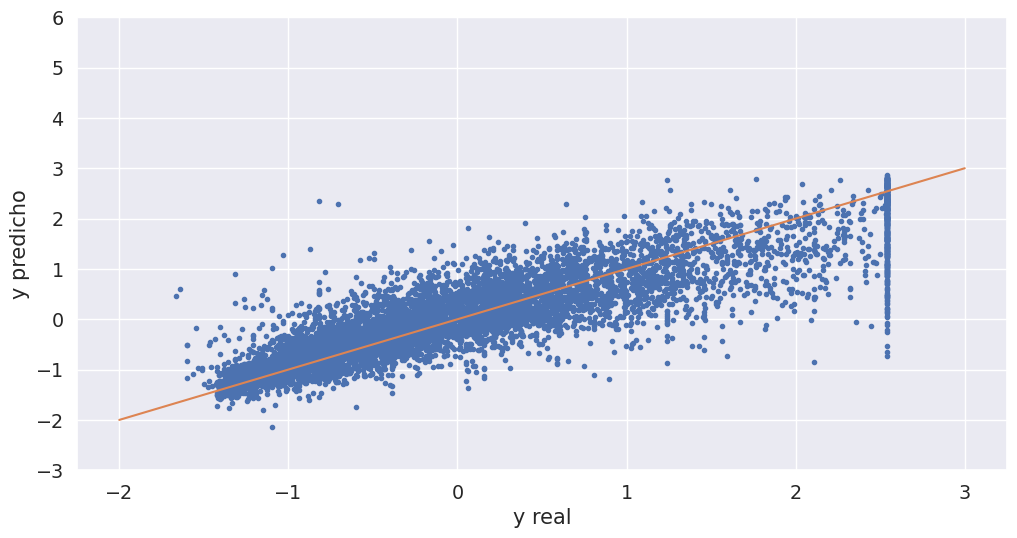

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

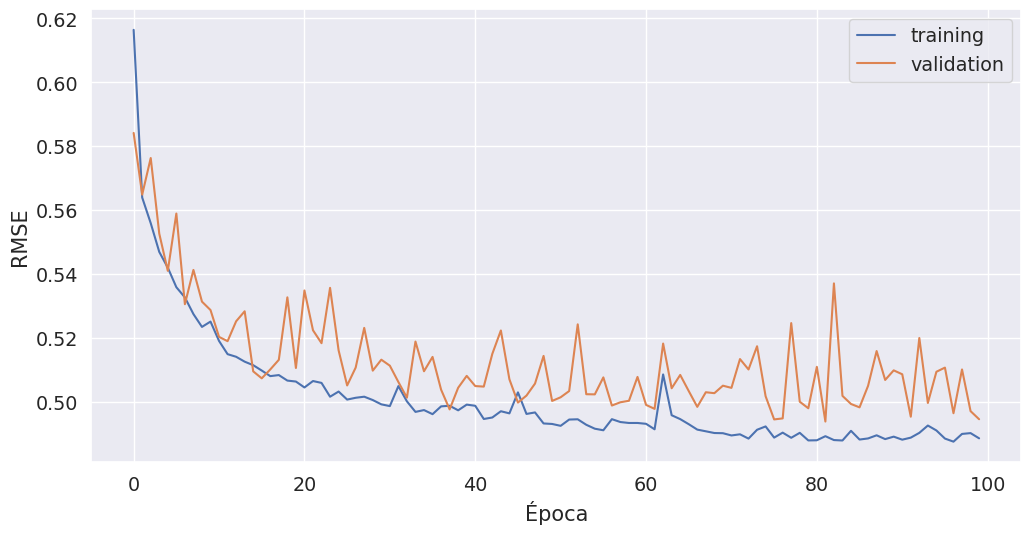

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 11s - loss: 1.0109

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.5774 

 5472/12384 [============>.................] - ETA: 0s - loss: 0.4803

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.4453

10880/12384 [=========================>....] - ETA: 0s - loss: 0.4193

12384/12384 [==============================] - 0s 31us/step - loss: 0.4127 - val_loss: 0.3459


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2942

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.3341

 5568/12384 [============>.................] - ETA: 0s - loss: 0.3435

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.3276

11264/12384 [==========================>...] - ETA: 0s - loss: 0.3249

12384/12384 [==============================] - 0s 27us/step - loss: 0.3263 - val_loss: 0.3225


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1875

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.3021

 5728/12384 [============>.................] - ETA: 0s - loss: 0.3079

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.3057

11456/12384 [==========================>...] - ETA: 0s - loss: 0.3098

12384/12384 [==============================] - 0s 27us/step - loss: 0.3097 - val_loss: 0.3146


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1465

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3176

 5728/12384 [============>.................] - ETA: 0s - loss: 0.3193

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.3078

11520/12384 [==========================>...] - ETA: 0s - loss: 0.3019

12384/12384 [==============================] - 0s 27us/step - loss: 0.3036 - val_loss: 0.3063


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1803

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3102

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2988

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2991

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2958

12384/12384 [==============================] - 0s 27us/step - loss: 0.2954 - val_loss: 0.3085


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2169

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2873

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2885

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2931



11232/12384 [==========================>...] - ETA: 0s - loss: 0.2870

12384/12384 [==============================] - 0s 27us/step - loss: 0.2906 - val_loss: 0.2971


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3086

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.3162

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2979

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2857

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2880

12384/12384 [==============================] - 0s 27us/step - loss: 0.2875 - val_loss: 0.2963


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1627

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2693

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2835

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2846

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2825

12384/12384 [==============================] - 0s 27us/step - loss: 0.2843 - val_loss: 0.3034


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4789

 2976/12384 [======>.......................] - ETA: 0s - loss: 0.2805

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2842

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2825

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2830

12384/12384 [==============================] - 0s 27us/step - loss: 0.2828 - val_loss: 0.2980


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4580

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2798

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2876

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2879



11136/12384 [=========================>....] - ETA: 0s - loss: 0.2852

12384/12384 [==============================] - 0s 27us/step - loss: 0.2802 - val_loss: 0.2887


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1655

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2836

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2796

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2774

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2789

12384/12384 [==============================] - 0s 27us/step - loss: 0.2789 - val_loss: 0.2928


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3693

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2667

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2660

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2759

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2769

12384/12384 [==============================] - 0s 28us/step - loss: 0.2757 - val_loss: 0.2934


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2286

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2634

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2911

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2855

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2772

12384/12384 [==============================] - 0s 27us/step - loss: 0.2777 - val_loss: 0.2875


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2015

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2754

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2747

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2775

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2721

12384/12384 [==============================] - 0s 27us/step - loss: 0.2734 - val_loss: 0.2848


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3177

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2828

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2827

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2796

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2730

12384/12384 [==============================] - 0s 27us/step - loss: 0.2719 - val_loss: 0.2857


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2848

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2696

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2663

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2729

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2709

12384/12384 [==============================] - 0s 27us/step - loss: 0.2721 - val_loss: 0.2860


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2772

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2581

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2621

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2650



11392/12384 [==========================>...] - ETA: 0s - loss: 0.2690

12384/12384 [==============================] - 0s 27us/step - loss: 0.2684 - val_loss: 0.2786


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2366

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2749

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2672

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2705

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2668

12384/12384 [==============================] - 0s 27us/step - loss: 0.2683 - val_loss: 0.2830


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4530

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2690

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2587

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2629

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2657

12384/12384 [==============================] - 0s 27us/step - loss: 0.2672 - val_loss: 0.2770


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2938

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2690

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2760

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2689

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2644

12384/12384 [==============================] - 0s 27us/step - loss: 0.2667 - val_loss: 0.2808


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2774

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2583

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2645

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2658

12384/12384 [==============================] - 0s 26us/step - loss: 0.2660 - val_loss: 0.2772


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2009

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2703

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2624

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2638

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2626

12384/12384 [==============================] - 0s 27us/step - loss: 0.2653 - val_loss: 0.2731


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3338

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2654

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2714

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2686

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2677

12384/12384 [==============================] - 0s 27us/step - loss: 0.2649 - val_loss: 0.2744


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3390

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2445

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2558

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2598



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 27us/step - loss: 0.2634 - val_loss: 0.2808


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2612

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2520

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2678

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2640

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2618

12384/12384 [==============================] - 0s 27us/step - loss: 0.2618 - val_loss: 0.2699


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3274

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2383

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2513

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2550

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2602

12384/12384 [==============================] - 0s 27us/step - loss: 0.2601 - val_loss: 0.2734


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6031

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2676

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2629

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2574



11072/12384 [=========================>....] - ETA: 0s - loss: 0.2585

12384/12384 [==============================] - 0s 27us/step - loss: 0.2578 - val_loss: 0.2705


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4290

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2651

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2727

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2603



11200/12384 [==========================>...] - ETA: 0s - loss: 0.2574

12384/12384 [==============================] - 0s 27us/step - loss: 0.2578 - val_loss: 0.2735


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2154

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2534

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2736

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2686

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2621

12384/12384 [==============================] - 0s 27us/step - loss: 0.2621 - val_loss: 0.2673


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1010

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2519

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2551

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2574

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2556

12384/12384 [==============================] - 0s 27us/step - loss: 0.2566 - val_loss: 0.2661


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1759

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2868

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2748

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2668

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 0s 27us/step - loss: 0.2556 - val_loss: 0.2640


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1133

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2509

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2556

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2508

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2534

12384/12384 [==============================] - 0s 27us/step - loss: 0.2541 - val_loss: 0.2721


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3027

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2728

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2577

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2531

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 0s 27us/step - loss: 0.2548 - val_loss: 0.2600


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2560

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2418

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2524

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2517

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 28us/step - loss: 0.2535 - val_loss: 0.2626


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1373

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2515

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2586

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2552

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2508

12384/12384 [==============================] - 0s 27us/step - loss: 0.2528 - val_loss: 0.2640


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1650

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2517

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2563

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2586

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 28us/step - loss: 0.2530 - val_loss: 0.2600


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4289

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2655

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2575

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2536



11232/12384 [==========================>...] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 0s 27us/step - loss: 0.2514 - val_loss: 0.2681


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1662

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2551

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2519

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2506



11008/12384 [=========================>....] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 27us/step - loss: 0.2513 - val_loss: 0.2639


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3122

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2437

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2598

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2566



11200/12384 [==========================>...] - ETA: 0s - loss: 0.2539

12384/12384 [==============================] - 0s 27us/step - loss: 0.2524 - val_loss: 0.2629


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2609

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2482

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2560

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2524

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2531

12384/12384 [==============================] - 0s 27us/step - loss: 0.2498 - val_loss: 0.2674


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2335

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2507

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2524

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2503

12384/12384 [==============================] - 0s 27us/step - loss: 0.2493 - val_loss: 0.2595


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2303

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2568

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2428

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2494

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 27us/step - loss: 0.2491 - val_loss: 0.2647


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2793

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2661

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2509

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2474

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 27us/step - loss: 0.2498 - val_loss: 0.2632


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2436

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2617

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2511

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2528

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2532

12384/12384 [==============================] - 0s 27us/step - loss: 0.2524 - val_loss: 0.2597


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1940

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2747

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2555

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2498

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2499

12384/12384 [==============================] - 0s 27us/step - loss: 0.2494 - val_loss: 0.2622


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2013

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2544

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2551

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2505

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 27us/step - loss: 0.2492 - val_loss: 0.2650


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5932

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2624

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2489

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2504

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 27us/step - loss: 0.2484 - val_loss: 0.2559


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2799

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2352

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2448

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2492

12384/12384 [==============================] - 0s 27us/step - loss: 0.2490 - val_loss: 0.2610


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1919

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2605

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2493

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2485



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2498

12384/12384 [==============================] - 0s 27us/step - loss: 0.2478 - val_loss: 0.2555


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1796

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2454

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2465

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2451

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2463

12384/12384 [==============================] - 0s 27us/step - loss: 0.2472 - val_loss: 0.2633


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1712

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2462

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2492

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2505

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 27us/step - loss: 0.2473 - val_loss: 0.2634


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1595

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2544

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2460

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2559

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 27us/step - loss: 0.2470 - val_loss: 0.2575


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1971

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2512

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2497

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2496

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 28us/step - loss: 0.2460 - val_loss: 0.2532


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2808

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2594

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2416

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2478

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 28us/step - loss: 0.2460 - val_loss: 0.2548


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4459

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2484

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2472

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2505

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 27us/step - loss: 0.2464 - val_loss: 0.2582


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2217

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2277

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2513

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2491



11328/12384 [==========================>...] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 27us/step - loss: 0.2465 - val_loss: 0.2551


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2890

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2468

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2471

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2497



11424/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 27us/step - loss: 0.2452 - val_loss: 0.2583


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5711

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2314

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2347

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2465



11168/12384 [==========================>...] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 27us/step - loss: 0.2453 - val_loss: 0.2587


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2334

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2383

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2411

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 29us/step - loss: 0.2443 - val_loss: 0.2526


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3090

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2561

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2539

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2433

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 28us/step - loss: 0.2444 - val_loss: 0.2688


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4523

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2489

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2495

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2503

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 27us/step - loss: 0.2472 - val_loss: 0.2545


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2041

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2567

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2544

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2519

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 26us/step - loss: 0.2468 - val_loss: 0.2558


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1137

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2524

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2487

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 27us/step - loss: 0.2446 - val_loss: 0.2532


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2397

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2329

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2354

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2419

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 26us/step - loss: 0.2454 - val_loss: 0.2515


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1845

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2299

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2266

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2339

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 26us/step - loss: 0.2442 - val_loss: 0.2569


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3623

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2323

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2419

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2405

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 26us/step - loss: 0.2435 - val_loss: 0.2534


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2228

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2242

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2307

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2406

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 26us/step - loss: 0.2439 - val_loss: 0.2538


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2978

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2372

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2404

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2454

12384/12384 [==============================] - 0s 26us/step - loss: 0.2470 - val_loss: 0.2618


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1786

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2575

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2480

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2471

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 27us/step - loss: 0.2446 - val_loss: 0.2533


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2920

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2204

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2292

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2394

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 27us/step - loss: 0.2431 - val_loss: 0.2518


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1421

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2602

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2466

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2411

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 27us/step - loss: 0.2430 - val_loss: 0.2559


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2356

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2544

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2412

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2409

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 27us/step - loss: 0.2424 - val_loss: 0.2532


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3283

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2501

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2509

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2490

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2521


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3174

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2566

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2504

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2426

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 26us/step - loss: 0.2426 - val_loss: 0.2524


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1974

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2309

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2388

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2432

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 26us/step - loss: 0.2416 - val_loss: 0.2528


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2127

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2378

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2441

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2433

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 27us/step - loss: 0.2413 - val_loss: 0.2520


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3299

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2618

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2549

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2508

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 27us/step - loss: 0.2419 - val_loss: 0.2527


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1356

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2262

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2314

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2403

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 26us/step - loss: 0.2413 - val_loss: 0.2511


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2231

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2411

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2379

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 27us/step - loss: 0.2413 - val_loss: 0.2491


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2760

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2309

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2394

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2432

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2522


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2351

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2434

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2475

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2427

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 27us/step - loss: 0.2420 - val_loss: 0.2487


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3538

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2419

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2405

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2406

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 0s 27us/step - loss: 0.2411 - val_loss: 0.2535


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2419

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2424

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2347

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2397

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 26us/step - loss: 0.2403 - val_loss: 0.2499


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3309

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2389

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2314

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2330

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 27us/step - loss: 0.2412 - val_loss: 0.2486


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2989

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2337

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2296

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2284

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 27us/step - loss: 0.2399 - val_loss: 0.2503


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1238

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2390

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2389

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2387

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 27us/step - loss: 0.2407 - val_loss: 0.2490


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2445

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2478

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2391

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 27us/step - loss: 0.2401 - val_loss: 0.2607


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1412

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2474

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2417

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2430

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 27us/step - loss: 0.2421 - val_loss: 0.2599


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1784

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2447

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2343

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 27us/step - loss: 0.2400 - val_loss: 0.2524


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3729

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2363

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2367

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2403

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 26us/step - loss: 0.2408 - val_loss: 0.2579


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2120

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2557

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2453

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2406

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 27us/step - loss: 0.2400 - val_loss: 0.2550


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3017

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2405

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2357

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2393

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 27us/step - loss: 0.2409 - val_loss: 0.2489


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2090

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2468

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2523

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2472

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2484

12384/12384 [==============================] - 0s 27us/step - loss: 0.2449 - val_loss: 0.2516


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1166

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2411

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2459

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2404

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 26us/step - loss: 0.2398 - val_loss: 0.2486


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1499

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2567

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2472

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2436

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 26us/step - loss: 0.2390 - val_loss: 0.2475


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1664

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2372

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2443

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 25us/step - loss: 0.2404 - val_loss: 0.2538


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0975

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2375

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2368

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2357

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 26us/step - loss: 0.2398 - val_loss: 0.2458


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1892

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2373

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2339

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2409

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 27us/step - loss: 0.2396 - val_loss: 0.2498


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3930

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2319

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2381

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2378

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 27us/step - loss: 0.2396 - val_loss: 0.2482


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1116

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2262

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2416

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 27us/step - loss: 0.2396 - val_loss: 0.2527


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1779

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2148

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2282

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2364

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 26us/step - loss: 0.2390 - val_loss: 0.2500


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3541

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2454

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2438

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2349

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 26us/step - loss: 0.2392 - val_loss: 0.2572


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1827

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2473

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2415

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2450

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 26us/step - loss: 0.2391 - val_loss: 0.2533


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2102

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2459

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2507

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2387

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 26us/step - loss: 0.2385 - val_loss: 0.2519


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4530

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2398

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2394

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 26us/step - loss: 0.2388 - val_loss: 0.2491


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2387

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2460

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2435

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2409

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 26us/step - loss: 0.2391 - val_loss: 0.2499


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4523

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2476

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2458

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2388

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 26us/step - loss: 0.2391 - val_loss: 0.2504


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.7357

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2433

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2380

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2439

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 27us/step - loss: 0.2379 - val_loss: 0.2479


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2194

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2193

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2339

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2408

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 27us/step - loss: 0.2386 - val_loss: 0.2467


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4263

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2428

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2428

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2447

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 27us/step - loss: 0.2380 - val_loss: 0.2485


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0855

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2287

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2292

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2273

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 27us/step - loss: 0.2381 - val_loss: 0.2498


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5677

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2462

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2449

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 27us/step - loss: 0.2405 - val_loss: 0.2618


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5382

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2416

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2389

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2363

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 27us/step - loss: 0.2393 - val_loss: 0.2473


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0911

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2423

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2375

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2400

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 27us/step - loss: 0.2397 - val_loss: 0.2484


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1904

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2294

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2325

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2381

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 27us/step - loss: 0.2382 - val_loss: 0.2496


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2341

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2212

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2241

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2329

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 27us/step - loss: 0.2381 - val_loss: 0.2469


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2423

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2532

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2460

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2404

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 27us/step - loss: 0.2408 - val_loss: 0.2506


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1648

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2304

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2287

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2324

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 28us/step - loss: 0.2373 - val_loss: 0.2476


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3542

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2341

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2378

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 27us/step - loss: 0.2392 - val_loss: 0.2478


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1773

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2442

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2411

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2420

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 26us/step - loss: 0.2382 - val_loss: 0.2486


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3663

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2487

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2415

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2442

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 26us/step - loss: 0.2376 - val_loss: 0.2481


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1609

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2251

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2320

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2400

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 26us/step - loss: 0.2384 - val_loss: 0.2527


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1818

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2475

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2375

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2389

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 26us/step - loss: 0.2380 - val_loss: 0.2497


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3943

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2420

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2415

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2362

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 27us/step - loss: 0.2371 - val_loss: 0.2464


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1294

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2322

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2402

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2441

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 26us/step - loss: 0.2372 - val_loss: 0.2465


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1224

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2460

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2394

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2361

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 26us/step - loss: 0.2376 - val_loss: 0.2493


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2754

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2439

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2346

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2319

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 26us/step - loss: 0.2378 - val_loss: 0.2545


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4303

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2419

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2449

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2429

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 27us/step - loss: 0.2376 - val_loss: 0.2472


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0833

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2318

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2376

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 27us/step - loss: 0.2392 - val_loss: 0.2532


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1734

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2477

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2400

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2410

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 27us/step - loss: 0.2373 - val_loss: 0.2471


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1278

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2410

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2374

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 27us/step - loss: 0.2370 - val_loss: 0.2484


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2541

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2450

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2399

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2367

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 27us/step - loss: 0.2391 - val_loss: 0.2486


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2652

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2433

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2298

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 27us/step - loss: 0.2384 - val_loss: 0.2484


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.7174

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2517

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2349

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2362

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 26us/step - loss: 0.2371 - val_loss: 0.2481


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2194

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2608

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2472

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2375

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 27us/step - loss: 0.2368 - val_loss: 0.2487


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3969

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2442

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2438

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2390

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 27us/step - loss: 0.2374 - val_loss: 0.2543


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3313

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2430

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2425

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2386

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 27us/step - loss: 0.2377 - val_loss: 0.2664


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3143

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2430

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2475

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2405

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 27us/step - loss: 0.2378 - val_loss: 0.2507


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5381

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2408

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2419

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2433

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 27us/step - loss: 0.2387 - val_loss: 0.2516


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1360

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2425

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2353

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 27us/step - loss: 0.2385 - val_loss: 0.2470


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2346

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2536

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2487

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2390

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 27us/step - loss: 0.2374 - val_loss: 0.2449


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1455

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2167

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2374

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2383

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 27us/step - loss: 0.2365 - val_loss: 0.2471


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2736

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2256

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2364

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2349

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 27us/step - loss: 0.2378 - val_loss: 0.2449


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3079

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2316

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2315

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2357

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 27us/step - loss: 0.2368 - val_loss: 0.2474


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1545

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2379

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2327

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2316

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 26us/step - loss: 0.2362 - val_loss: 0.2475


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1937

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2408

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2431

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2403

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 28us/step - loss: 0.2359 - val_loss: 0.2442


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1925

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2272

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2291

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2293

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 27us/step - loss: 0.2366 - val_loss: 0.2494


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3613

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2346

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2347

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2381

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 26us/step - loss: 0.2425 - val_loss: 0.2470


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1792

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2460

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2496

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2393

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 27us/step - loss: 0.2372 - val_loss: 0.2452


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1219

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2412

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2388

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2404

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 26us/step - loss: 0.2367 - val_loss: 0.2467


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2361

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2373

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2358

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2371

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 27us/step - loss: 0.2370 - val_loss: 0.2460


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1417

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2340

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2312

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2340

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 26us/step - loss: 0.2368 - val_loss: 0.2492


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1069

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2328

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2338

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2320

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 27us/step - loss: 0.2362 - val_loss: 0.2485


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0947

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2303

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2334

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2336

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 26us/step - loss: 0.2352 - val_loss: 0.2567


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4180

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2421

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2358

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 27us/step - loss: 0.2362 - val_loss: 0.2447


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2356

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2311

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2352

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2398

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 27us/step - loss: 0.2370 - val_loss: 0.2437


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2019

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2517

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2421

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2419

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 27us/step - loss: 0.2394 - val_loss: 0.2463


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2434

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2453

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2481

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2426

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 26us/step - loss: 0.2374 - val_loss: 0.2442


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2240

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2498

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2391

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 26us/step - loss: 0.2358 - val_loss: 0.2452


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3683

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2424

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2371

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2359

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 27us/step - loss: 0.2361 - val_loss: 0.2461


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0882

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2325

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2323

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2379

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 27us/step - loss: 0.2365 - val_loss: 0.2457


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0816

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2425

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2383

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2318

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 27us/step - loss: 0.2361 - val_loss: 0.2507


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2640

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2365

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2420

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2415

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 27us/step - loss: 0.2359 - val_loss: 0.2469


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1133

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2159

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2229

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2332

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 26us/step - loss: 0.2362 - val_loss: 0.2459


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2194

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2642

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2528

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2466

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 27us/step - loss: 0.2366 - val_loss: 0.2541


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1295

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2354

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2411

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 27us/step - loss: 0.2361 - val_loss: 0.2480


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3299

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2162

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2254

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2330

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 27us/step - loss: 0.2361 - val_loss: 0.2485


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1145

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2311

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2361

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2325

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 26us/step - loss: 0.2359 - val_loss: 0.2469


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2079

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2388

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2403

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2427

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 27us/step - loss: 0.2373 - val_loss: 0.2505


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2263

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2291

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2276

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2383

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 26us/step - loss: 0.2380 - val_loss: 0.2488


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4372

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2370

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2326

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2338

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 27us/step - loss: 0.2371 - val_loss: 0.2463


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5936

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2374

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2322

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2283

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 26us/step - loss: 0.2364 - val_loss: 0.2476


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0947

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2325

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2391

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2405

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 27us/step - loss: 0.2363 - val_loss: 0.2454


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1263

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2302

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2265

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2306

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2497


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3670

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2379

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2478

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2443

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 27us/step - loss: 0.2384 - val_loss: 0.2459


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2962

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2353

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2392

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 27us/step - loss: 0.2391 - val_loss: 0.2494


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5080

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2364

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2352

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 27us/step - loss: 0.2356 - val_loss: 0.2451


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2926

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2442

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2358

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2366

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 27us/step - loss: 0.2354 - val_loss: 0.2443


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1413

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2312

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2411

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 27us/step - loss: 0.2356 - val_loss: 0.2443


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1995

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2228

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2254

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2254

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2473


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1363

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2372

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2428

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2378

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 27us/step - loss: 0.2356 - val_loss: 0.2446


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1838

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2288

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2295

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2356

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 27us/step - loss: 0.2369 - val_loss: 0.2450


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1897

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2444

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2408

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2372

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 27us/step - loss: 0.2362 - val_loss: 0.2433


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1155

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2393

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2386

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2367

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 26us/step - loss: 0.2357 - val_loss: 0.2525


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2640

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2368

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2335

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2364

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 26us/step - loss: 0.2356 - val_loss: 0.2451


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1805

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2112

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2231

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2273

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2523


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2183

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2401

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2435

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2435

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 26us/step - loss: 0.2346 - val_loss: 0.2430


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4261

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2291

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2261

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2313

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 26us/step - loss: 0.2352 - val_loss: 0.2450


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2277

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2262

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2287

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2350

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 26us/step - loss: 0.2357 - val_loss: 0.2530


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1543

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2299

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2382

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2465


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2815

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2369

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2338

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2363

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 26us/step - loss: 0.2349 - val_loss: 0.2469


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1455

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2643

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2491

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2450

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 27us/step - loss: 0.2355 - val_loss: 0.2440


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1427

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2255

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2263

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2288

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 27us/step - loss: 0.2353 - val_loss: 0.2423


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0980

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2179

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2251

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2334

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 26us/step - loss: 0.2362 - val_loss: 0.2440


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2241

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2389

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2397

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2419

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 25us/step - loss: 0.2364 - val_loss: 0.2437


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2202

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2283

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2320

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2359

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 26us/step - loss: 0.2361 - val_loss: 0.2475


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1157

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2502

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2338

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2318

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 25us/step - loss: 0.2349 - val_loss: 0.2449


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2012

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2257

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2359

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2370

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2442


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6862

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2429

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2323

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2338

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 26us/step - loss: 0.2355 - val_loss: 0.2462


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1512

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2475

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2350

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 26us/step - loss: 0.2353 - val_loss: 0.2518


Text(0.5, 0, 'Época')

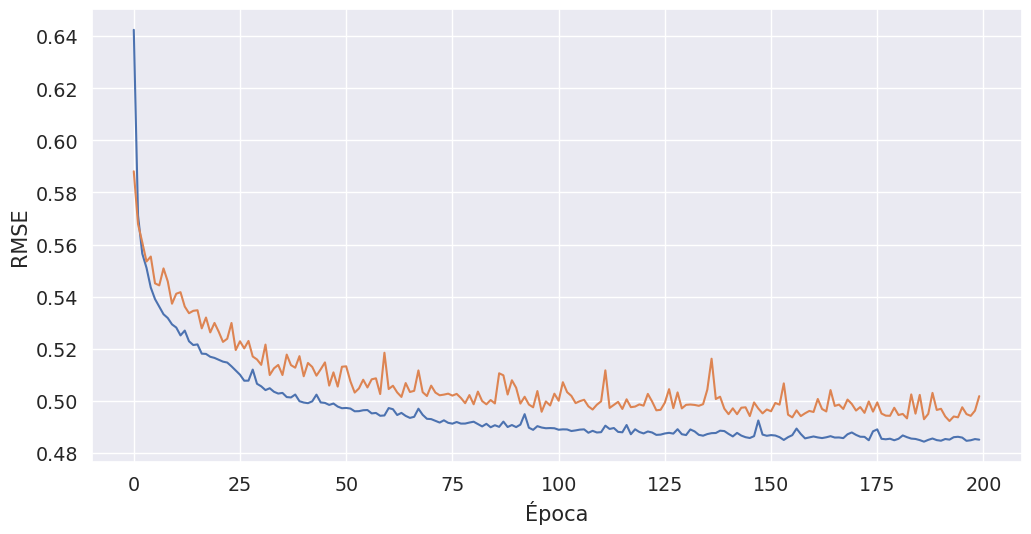

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 21s - loss: 0.5297

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.7961 

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.6782

 7360/12384 [================>.............] - ETA: 0s - loss: 0.6312

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.5879

12384/12384 [==============================] - 0s 34us/step - loss: 0.5548 - val_loss: 0.4269


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3687

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.4285

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.3983

 7360/12384 [================>.............] - ETA: 0s - loss: 0.4003

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3862

12224/12384 [============================>.] - ETA: 0s - loss: 0.3827

12384/12384 [==============================] - 0s 30us/step - loss: 0.3820 - val_loss: 0.3651


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2052

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.3437

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.3567

 7328/12384 [================>.............] - ETA: 0s - loss: 0.3493

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.3434

12096/12384 [============================>.] - ETA: 0s - loss: 0.3428

12384/12384 [==============================] - 0s 30us/step - loss: 0.3438 - val_loss: 0.3433


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2459

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3243

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3183

 7456/12384 [=================>............] - ETA: 0s - loss: 0.3201

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.3215

12384/12384 [==============================] - 0s 30us/step - loss: 0.3278 - val_loss: 0.3304


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2601

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3374

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3289

 7296/12384 [================>.............] - ETA: 0s - loss: 0.3239

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.3230

12224/12384 [============================>.] - ETA: 0s - loss: 0.3180

12384/12384 [==============================] - 0s 30us/step - loss: 0.3178 - val_loss: 0.3222


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1465

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3271

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3187

 7392/12384 [================>.............] - ETA: 0s - loss: 0.3187

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3147

12288/12384 [============================>.] - ETA: 0s - loss: 0.3116

12384/12384 [==============================] - 0s 30us/step - loss: 0.3111 - val_loss: 0.3159


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5082

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3167

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3155

 7456/12384 [=================>............] - ETA: 0s - loss: 0.3157

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.3063

12384/12384 [==============================] - 0s 29us/step - loss: 0.3053 - val_loss: 0.3118


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1471

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3017

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3019

 7488/12384 [=================>............] - ETA: 0s - loss: 0.3040

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2968

12384/12384 [==============================] - 0s 29us/step - loss: 0.3004 - val_loss: 0.3085


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2064

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.3225

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3090

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2978

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2969

12384/12384 [==============================] - 0s 29us/step - loss: 0.2967 - val_loss: 0.3040


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3553

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2790

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2925

 7488/12384 [=================>............] - ETA: 0s - loss: 0.3033

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2981

12384/12384 [==============================] - 0s 29us/step - loss: 0.2933 - val_loss: 0.3005


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3984

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2979

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2957

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2944

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2937

12192/12384 [============================>.] - ETA: 0s - loss: 0.2908

12384/12384 [==============================] - 0s 30us/step - loss: 0.2903 - val_loss: 0.2999


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3257

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2968

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2900

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2876

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2883

12128/12384 [============================>.] - ETA: 0s - loss: 0.2873

12384/12384 [==============================] - 0s 30us/step - loss: 0.2876 - val_loss: 0.2959


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1295

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2846

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2916

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2898

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2859

12256/12384 [============================>.] - ETA: 0s - loss: 0.2855

12384/12384 [==============================] - 0s 30us/step - loss: 0.2851 - val_loss: 0.2938


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2748

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2711

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2911

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2976

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2909

12352/12384 [============================>.] - ETA: 0s - loss: 0.2825

12384/12384 [==============================] - 0s 29us/step - loss: 0.2827 - val_loss: 0.2928


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5007

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2761

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2816

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2825

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2764

12384/12384 [==============================] - 0s 29us/step - loss: 0.2810 - val_loss: 0.2899


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2032

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2960

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2919

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2783

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2823

12384/12384 [==============================] - 0s 29us/step - loss: 0.2796 - val_loss: 0.2887


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2134

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2635

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2768

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2716

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2766

12384/12384 [==============================] - 0s 29us/step - loss: 0.2777 - val_loss: 0.2883


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4309

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2783

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2898

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2816

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2776

12192/12384 [============================>.] - ETA: 0s - loss: 0.2742

12384/12384 [==============================] - 0s 30us/step - loss: 0.2761 - val_loss: 0.2858


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2617

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2827

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2743

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2792

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2732

12192/12384 [============================>.] - ETA: 0s - loss: 0.2745

12384/12384 [==============================] - 0s 30us/step - loss: 0.2744 - val_loss: 0.2850


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2975

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2833

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2769

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2757

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2706

12128/12384 [============================>.] - ETA: 0s - loss: 0.2721

12384/12384 [==============================] - 0s 30us/step - loss: 0.2728 - val_loss: 0.2840


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2079

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2675

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2699

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2684

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2727

12384/12384 [==============================] - 0s 29us/step - loss: 0.2720 - val_loss: 0.2818


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1219

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2465

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2607

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2702

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2690

12384/12384 [==============================] - 0s 29us/step - loss: 0.2706 - val_loss: 0.2818


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3739

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2789

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2745

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2707

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2682

12352/12384 [============================>.] - ETA: 0s - loss: 0.2695

12384/12384 [==============================] - 0s 29us/step - loss: 0.2693 - val_loss: 0.2803


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1616

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2712

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2783

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2737

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2686

12352/12384 [============================>.] - ETA: 0s - loss: 0.2689

12384/12384 [==============================] - 0s 29us/step - loss: 0.2684 - val_loss: 0.2802


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2930

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2796

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2675

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2770

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2733

12384/12384 [==============================] - 0s 29us/step - loss: 0.2672 - val_loss: 0.2784


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1248

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2781

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2629

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2659

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2661

12384/12384 [==============================] - 0s 29us/step - loss: 0.2663 - val_loss: 0.2792


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1220

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2601

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2711

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2667

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2644

12320/12384 [============================>.] - ETA: 0s - loss: 0.2651

12384/12384 [==============================] - 0s 30us/step - loss: 0.2658 - val_loss: 0.2766


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6970

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2744

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2685

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2582

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2584

12352/12384 [============================>.] - ETA: 0s - loss: 0.2643

12384/12384 [==============================] - 0s 30us/step - loss: 0.2646 - val_loss: 0.2770


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2187

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2556

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2744

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2617

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2592

12320/12384 [============================>.] - ETA: 0s - loss: 0.2635

12384/12384 [==============================] - 0s 29us/step - loss: 0.2636 - val_loss: 0.2756


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2896

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2641

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2602

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2686

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2646

12320/12384 [============================>.] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 29us/step - loss: 0.2629 - val_loss: 0.2742


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3459

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2643

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2680

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2651

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 29us/step - loss: 0.2621 - val_loss: 0.2745


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3600

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2411

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2493

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2601

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 29us/step - loss: 0.2620 - val_loss: 0.2742


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2787

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2731

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2695

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2604

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2597

12256/12384 [============================>.] - ETA: 0s - loss: 0.2613

12384/12384 [==============================] - 0s 30us/step - loss: 0.2609 - val_loss: 0.2725


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1393

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2572

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2498

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2528

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2574

12288/12384 [============================>.] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 29us/step - loss: 0.2601 - val_loss: 0.2723


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1449

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2786

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2683

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2635

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2612

12096/12384 [============================>.] - ETA: 0s - loss: 0.2598

12384/12384 [==============================] - 0s 30us/step - loss: 0.2594 - val_loss: 0.2717


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2468

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2735

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2577

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2561

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2563

12288/12384 [============================>.] - ETA: 0s - loss: 0.2591

12384/12384 [==============================] - 0s 29us/step - loss: 0.2590 - val_loss: 0.2726


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4353

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2700

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2658

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2585

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2550

12384/12384 [==============================] - 0s 29us/step - loss: 0.2583 - val_loss: 0.2717


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3488

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2554

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2607

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2575

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2574

12384/12384 [==============================] - 0s 29us/step - loss: 0.2580 - val_loss: 0.2702


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3900

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2611

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2619

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2566

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2548

12384/12384 [==============================] - 0s 29us/step - loss: 0.2571 - val_loss: 0.2697


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4476

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2511

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2589

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2581

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 29us/step - loss: 0.2568 - val_loss: 0.2702


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4176

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2605

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2546

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2566

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2553

12384/12384 [==============================] - 0s 29us/step - loss: 0.2564 - val_loss: 0.2687


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2965

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2756

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2655

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2654

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2613

12256/12384 [============================>.] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 29us/step - loss: 0.2558 - val_loss: 0.2686


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3557

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2598

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2545

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2550

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2556

12384/12384 [==============================] - 0s 29us/step - loss: 0.2560 - val_loss: 0.2677


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4031

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2480

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2521

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2522

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2551

12352/12384 [============================>.] - ETA: 0s - loss: 0.2554

12384/12384 [==============================] - 0s 29us/step - loss: 0.2551 - val_loss: 0.2681


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1798

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2667

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2729

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2614

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2551

12224/12384 [============================>.] - ETA: 0s - loss: 0.2551

12384/12384 [==============================] - 0s 30us/step - loss: 0.2547 - val_loss: 0.2668


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2752

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2420

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2531

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 29us/step - loss: 0.2541 - val_loss: 0.2667


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3738

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2719

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2594

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2489

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 29us/step - loss: 0.2540 - val_loss: 0.2664


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0982

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2467

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2437

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2498

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2505

12352/12384 [============================>.] - ETA: 0s - loss: 0.2526

12384/12384 [==============================] - 0s 29us/step - loss: 0.2533 - val_loss: 0.2674


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3502

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2489

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2544

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2533

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2560

12352/12384 [============================>.] - ETA: 0s - loss: 0.2531

12384/12384 [==============================] - 0s 29us/step - loss: 0.2528 - val_loss: 0.2653


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2561

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2430

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2564

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2507

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2523

12384/12384 [==============================] - 0s 29us/step - loss: 0.2522 - val_loss: 0.2651


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3067

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2501

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2514

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2527

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2529

12384/12384 [==============================] - 0s 29us/step - loss: 0.2518 - val_loss: 0.2639


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2656

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2425

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2500

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2498

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2498

12320/12384 [============================>.] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 29us/step - loss: 0.2508 - val_loss: 0.2654


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1968

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2483

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2474

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2444

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 29us/step - loss: 0.2504 - val_loss: 0.2635


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1875

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2550

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2500

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2461

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2498

12384/12384 [==============================] - 0s 29us/step - loss: 0.2497 - val_loss: 0.2629


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2115

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2318

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2439

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2453

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 29us/step - loss: 0.2493 - val_loss: 0.2618


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1734

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2539

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2503

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2419

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 29us/step - loss: 0.2482 - val_loss: 0.2628


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1795

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2616

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2483

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2505



 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2482

12384/12384 [==============================] - 0s 29us/step - loss: 0.2481 - val_loss: 0.2619


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2277

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2634

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2465

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2477

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 29us/step - loss: 0.2470 - val_loss: 0.2609


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2294

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2486

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2497

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2466

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 29us/step - loss: 0.2465 - val_loss: 0.2592


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3944

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2593

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2421

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2410

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 29us/step - loss: 0.2458 - val_loss: 0.2587


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1473

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2400

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2452

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2391

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 29us/step - loss: 0.2453 - val_loss: 0.2589


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2546

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2361

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2332

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 29us/step - loss: 0.2450 - val_loss: 0.2575


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1631

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2484

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2475

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2457

12160/12384 [============================>.] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 30us/step - loss: 0.2442 - val_loss: 0.2583


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2616

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2459

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2452

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 29us/step - loss: 0.2440 - val_loss: 0.2599


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2857

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2459

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2460

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 29us/step - loss: 0.2438 - val_loss: 0.2567


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1888

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2436

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2478

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2433

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2430

12384/12384 [==============================] - 0s 29us/step - loss: 0.2427 - val_loss: 0.2600


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2922

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2257

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2343

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2406

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 29us/step - loss: 0.2426 - val_loss: 0.2568


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1687

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2480

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2477

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2462

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2430

12384/12384 [==============================] - 0s 28us/step - loss: 0.2426 - val_loss: 0.2563


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2238

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2462

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2466

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2491

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 29us/step - loss: 0.2419 - val_loss: 0.2560


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1624

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2489

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2434

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2425

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2432



12224/12384 [============================>.] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 30us/step - loss: 0.2414 - val_loss: 0.2564


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4286

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2342

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2375

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2438

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2475

12192/12384 [============================>.] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 30us/step - loss: 0.2413 - val_loss: 0.2580


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1873

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2444

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2471

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2416

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 29us/step - loss: 0.2409 - val_loss: 0.2549


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3169

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2436

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2577

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2474

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 29us/step - loss: 0.2405 - val_loss: 0.2552


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2543

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2467

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2464

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 29us/step - loss: 0.2405 - val_loss: 0.2553


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3003

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2482

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2445

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2456

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 29us/step - loss: 0.2408 - val_loss: 0.2543


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4197

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2224

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2363

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2404

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 29us/step - loss: 0.2399 - val_loss: 0.2557


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1065

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2463

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2466

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2437

12320/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 29us/step - loss: 0.2398 - val_loss: 0.2553


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2586

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2402

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2405

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2376

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2388

12096/12384 [============================>.] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 30us/step - loss: 0.2393 - val_loss: 0.2552


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2098

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2497

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2385

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2366

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2387

12320/12384 [============================>.] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 29us/step - loss: 0.2390 - val_loss: 0.2560


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4133

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2497

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2440

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2423

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2424

12288/12384 [============================>.] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 29us/step - loss: 0.2394 - val_loss: 0.2540


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1720

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2648

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2478

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2387

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2386

12224/12384 [============================>.] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 30us/step - loss: 0.2384 - val_loss: 0.2553


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3417

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2475

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2488

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2473

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2463

12288/12384 [============================>.] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 30us/step - loss: 0.2387 - val_loss: 0.2536


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4276

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2384

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2416

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2395

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 29us/step - loss: 0.2378 - val_loss: 0.2543


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3827

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2389

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2464

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2429

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 29us/step - loss: 0.2380 - val_loss: 0.2538


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2356

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2259

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2318

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2382

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2389



12128/12384 [============================>.] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 30us/step - loss: 0.2378 - val_loss: 0.2535


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2078

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2368

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2377

12192/12384 [============================>.] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 30us/step - loss: 0.2375 - val_loss: 0.2523


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1428

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2325

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2316

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2306



 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 29us/step - loss: 0.2370 - val_loss: 0.2555


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2448

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2441

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2362

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2385

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 29us/step - loss: 0.2371 - val_loss: 0.2534


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2131

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2478

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2389

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2384

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2372

12288/12384 [============================>.] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 30us/step - loss: 0.2370 - val_loss: 0.2534


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1840

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2509

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2395

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2422

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2383

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 32us/step - loss: 0.2368 - val_loss: 0.2518


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1758

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2272

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2363

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2358

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2335

12096/12384 [============================>.] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 30us/step - loss: 0.2369 - val_loss: 0.2524


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3592

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2497

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2390

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2399

12192/12384 [============================>.] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 31us/step - loss: 0.2364 - val_loss: 0.2534


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1055

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2409

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2414

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2386

12000/12384 [============================>.] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 30us/step - loss: 0.2363 - val_loss: 0.2528


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1953

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2490

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2459

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2441

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 30us/step - loss: 0.2365 - val_loss: 0.2513


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2583

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2249

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2401

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2413

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 29us/step - loss: 0.2362 - val_loss: 0.2527


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2229

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2187

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2394

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2346

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2347

12032/12384 [============================>.] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 30us/step - loss: 0.2357 - val_loss: 0.2514


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1270

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2216

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2350

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2344

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2416

12160/12384 [============================>.] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 30us/step - loss: 0.2362 - val_loss: 0.2510


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2297

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2162

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2394

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2407

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2392

12160/12384 [============================>.] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 30us/step - loss: 0.2358 - val_loss: 0.2513


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2483

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2377

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2306

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2328

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 30us/step - loss: 0.2357 - val_loss: 0.2515


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2309

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2343

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2368

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2342

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 29us/step - loss: 0.2352 - val_loss: 0.2521


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1085

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2143

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2238

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2278

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 29us/step - loss: 0.2354 - val_loss: 0.2520


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1737

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2299

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2321

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2344

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2372

12096/12384 [============================>.] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 30us/step - loss: 0.2349 - val_loss: 0.2504


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2692

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2231

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2347

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2360

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2328

12064/12384 [============================>.] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 30us/step - loss: 0.2348 - val_loss: 0.2503


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1783

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2413

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2395

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2311

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2356

12288/12384 [============================>.] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 30us/step - loss: 0.2347 - val_loss: 0.2523


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1404

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2184

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2208

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2286

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 30us/step - loss: 0.2350 - val_loss: 0.2510


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1288

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2371

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2467

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2366

12192/12384 [============================>.] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 30us/step - loss: 0.2346 - val_loss: 0.2526


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1377

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2278

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2313

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2298

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 29us/step - loss: 0.2346 - val_loss: 0.2498


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2159

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2419

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2276

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2322

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 29us/step - loss: 0.2344 - val_loss: 0.2500


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2223

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2401

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2342

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2355

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2346

12320/12384 [============================>.] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 29us/step - loss: 0.2343 - val_loss: 0.2502


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1864

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2378

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2357

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2276

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2343

12320/12384 [============================>.] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 30us/step - loss: 0.2340 - val_loss: 0.2498


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2959

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2230

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2339

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2364

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2305

12320/12384 [============================>.] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 29us/step - loss: 0.2343 - val_loss: 0.2495


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3222

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2381

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2370

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 29us/step - loss: 0.2337 - val_loss: 0.2498


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2413

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2458

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2358

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2382

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 29us/step - loss: 0.2337 - val_loss: 0.2500


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1937

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2197

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2327

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2374

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 30us/step - loss: 0.2338 - val_loss: 0.2504


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3739

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2296

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2420

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2355

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 29us/step - loss: 0.2338 - val_loss: 0.2497


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1892

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2225

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2230

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2263

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 29us/step - loss: 0.2339 - val_loss: 0.2492


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1939

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2435

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2335

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2390

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 30us/step - loss: 0.2336 - val_loss: 0.2494


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2203

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2269

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2308

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2308

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 29us/step - loss: 0.2335 - val_loss: 0.2502


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2188

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2214

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2259

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2310

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2316

12288/12384 [============================>.] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 29us/step - loss: 0.2329 - val_loss: 0.2493


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2176

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2193

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2199

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2279

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 29us/step - loss: 0.2336 - val_loss: 0.2489


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1128

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2180

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2303

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2305

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2297

12192/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 30us/step - loss: 0.2334 - val_loss: 0.2506


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3344

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2371

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2310

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2344

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 29us/step - loss: 0.2336 - val_loss: 0.2491


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1659

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2304

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2369

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2382

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2384

12320/12384 [============================>.] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 30us/step - loss: 0.2331 - val_loss: 0.2528


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4009

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2300

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2332

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 29us/step - loss: 0.2331 - val_loss: 0.2494


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2594

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2300

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2318

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2352

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 30us/step - loss: 0.2330 - val_loss: 0.2508


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1791

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2346

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2313

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2359

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 29us/step - loss: 0.2331 - val_loss: 0.2486


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2435

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2277

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2400

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2411

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 29us/step - loss: 0.2334 - val_loss: 0.2491


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1665

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2171

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2308

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2257

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 30us/step - loss: 0.2327 - val_loss: 0.2509


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1444

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2168

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2361

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2394

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 29us/step - loss: 0.2327 - val_loss: 0.2498


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5645

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2452

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2298

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2353

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2348

12352/12384 [============================>.] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 30us/step - loss: 0.2331 - val_loss: 0.2501


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2988

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2359

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2347

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2346

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2334

12320/12384 [============================>.] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 30us/step - loss: 0.2326 - val_loss: 0.2506


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1817

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2533

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2512

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2435

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 30us/step - loss: 0.2331 - val_loss: 0.2489


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1650

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2344

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2318

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 29us/step - loss: 0.2328 - val_loss: 0.2492


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2500

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2186

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2224

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2303

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2340

12160/12384 [============================>.] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 30us/step - loss: 0.2325 - val_loss: 0.2483


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1893

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2397

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2388

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 29us/step - loss: 0.2325 - val_loss: 0.2499


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1497

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2281

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2318

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2340

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2338

12032/12384 [============================>.] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 30us/step - loss: 0.2325 - val_loss: 0.2490


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1540

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2368

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2414

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2392

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 29us/step - loss: 0.2326 - val_loss: 0.2489


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3023

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2293

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2311

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2344

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2335

12256/12384 [============================>.] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 30us/step - loss: 0.2322 - val_loss: 0.2487


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3409

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2319

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2279

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2256



12192/12384 [============================>.] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 30us/step - loss: 0.2324 - val_loss: 0.2482


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2069

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2347

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2280

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2321

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 29us/step - loss: 0.2322 - val_loss: 0.2487


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1358

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2367

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2318

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 29us/step - loss: 0.2323 - val_loss: 0.2512


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2865

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2145

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2109

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2266

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 29us/step - loss: 0.2321 - val_loss: 0.2490


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3873

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2222

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2335

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2347

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 30us/step - loss: 0.2322 - val_loss: 0.2491


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3694

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2305

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2314

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2354

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2325

12224/12384 [============================>.] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 30us/step - loss: 0.2322 - val_loss: 0.2485


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3380

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2305

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2306

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2335

12352/12384 [============================>.] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 29us/step - loss: 0.2320 - val_loss: 0.2484


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2335

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2368

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2227

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2260

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 29us/step - loss: 0.2322 - val_loss: 0.2487


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3122

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2278

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2196

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2220

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2277

12288/12384 [============================>.] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 29us/step - loss: 0.2323 - val_loss: 0.2482


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3557

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2169

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2298

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2308

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 29us/step - loss: 0.2321 - val_loss: 0.2492


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1365

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2358

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2235

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2294

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 29us/step - loss: 0.2322 - val_loss: 0.2480


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1634

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2140

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2218

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2195

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 29us/step - loss: 0.2322 - val_loss: 0.2488


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3914

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2451

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2346

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2302

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 30us/step - loss: 0.2321 - val_loss: 0.2489


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2928

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2252

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2352

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2357

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2341

12128/12384 [============================>.] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 30us/step - loss: 0.2322 - val_loss: 0.2497


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2394

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2185

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2325

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2356

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2359

12288/12384 [============================>.] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 30us/step - loss: 0.2319 - val_loss: 0.2486


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1487

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2200

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2337

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2308

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2348



12192/12384 [============================>.] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 30us/step - loss: 0.2322 - val_loss: 0.2498


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0841

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2280

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2381

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2317

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 29us/step - loss: 0.2320 - val_loss: 0.2487


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1250

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2340

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2369

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2309

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2315

12288/12384 [============================>.] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 30us/step - loss: 0.2316 - val_loss: 0.2494


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5946

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2304

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2282

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2312

12256/12384 [============================>.] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 30us/step - loss: 0.2316 - val_loss: 0.2487


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3058

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2436

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2342

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2390

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 30us/step - loss: 0.2317 - val_loss: 0.2523


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3432

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2302

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2291

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2252

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2287

12192/12384 [============================>.] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 30us/step - loss: 0.2319 - val_loss: 0.2488


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1640

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2145

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2274

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2278

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 30us/step - loss: 0.2319 - val_loss: 0.2486


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1761

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2214

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2310

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2366

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2352

12256/12384 [============================>.] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 30us/step - loss: 0.2321 - val_loss: 0.2488


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3754

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2089

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2193

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2235

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2282

12192/12384 [============================>.] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 30us/step - loss: 0.2312 - val_loss: 0.2491


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2479

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2214

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2292

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2279

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2328

12160/12384 [============================>.] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 30us/step - loss: 0.2319 - val_loss: 0.2494


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3114

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2264

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2356

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2348

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 29us/step - loss: 0.2317 - val_loss: 0.2491


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1952

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2205

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2251

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2228

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2482


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2563

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2156

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2223

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2293

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2491


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1415

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2211

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2352

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2338

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2333

12192/12384 [============================>.] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 30us/step - loss: 0.2316 - val_loss: 0.2484


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2354

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2152

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2330

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2309

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2321

12352/12384 [============================>.] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2478


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1589

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2188

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2266

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2288

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 30us/step - loss: 0.2317 - val_loss: 0.2486


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2655

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2267

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2320

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2480


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2691

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2345

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2351

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2308

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 30us/step - loss: 0.2317 - val_loss: 0.2482


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1491

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2258

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2249

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2257

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2274

12160/12384 [============================>.] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2489


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2103

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2517

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2369

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2284

12384/12384 [==============================] - 0s 30us/step - loss: 0.2313 - val_loss: 0.2489


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1903

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2371

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2422

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2349



 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2313

12352/12384 [============================>.] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 30us/step - loss: 0.2313 - val_loss: 0.2477


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1315

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2386

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2331

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2348

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2294

12256/12384 [============================>.] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 31us/step - loss: 0.2314 - val_loss: 0.2498


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2022

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2349

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2329

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2353

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2348

12032/12384 [============================>.] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 31us/step - loss: 0.2316 - val_loss: 0.2485


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4026

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2300

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2218

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2247

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2282

12160/12384 [============================>.] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 31us/step - loss: 0.2313 - val_loss: 0.2480


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1831

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2281

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2362

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2326

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2482


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4565

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2194

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2285

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2366

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2477


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2287

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2241

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2279

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2270

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2493


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1195

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2447

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2342

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2318



12192/12384 [============================>.] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2494


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2526

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2464

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2304

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2359

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2360

12352/12384 [============================>.] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 30us/step - loss: 0.2310 - val_loss: 0.2476


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2617

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2425

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2310

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2314

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2299

12224/12384 [============================>.] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 30us/step - loss: 0.2310 - val_loss: 0.2490


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3345

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2207

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2240

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2298

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2298

12320/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 30us/step - loss: 0.2310 - val_loss: 0.2481


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2295

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2292

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2323

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2274

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2306

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 31us/step - loss: 0.2308 - val_loss: 0.2479


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2144

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2576

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2483

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2420

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2324

12032/12384 [============================>.] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 31us/step - loss: 0.2311 - val_loss: 0.2482


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1521

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2275

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2257

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2338

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2345

12032/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 31us/step - loss: 0.2307 - val_loss: 0.2480


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3085

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2184

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2320

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2333

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2352

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 31us/step - loss: 0.2314 - val_loss: 0.2489


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5489

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2226

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2301

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2300

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 31us/step - loss: 0.2305 - val_loss: 0.2481


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1310

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2216

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2316

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2293

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2304

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 31us/step - loss: 0.2311 - val_loss: 0.2481


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2321

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2353

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2353

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2316

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2298



11936/12384 [===========================>..] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 31us/step - loss: 0.2310 - val_loss: 0.2475


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0756

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2284

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2292

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2388

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2364

12192/12384 [============================>.] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 31us/step - loss: 0.2309 - val_loss: 0.2477


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1791

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2341

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2318

12128/12384 [============================>.] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 31us/step - loss: 0.2314 - val_loss: 0.2477


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2344

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2147

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2215

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2251

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 30us/step - loss: 0.2306 - val_loss: 0.2494


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2557

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2449

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2282

12160/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 30us/step - loss: 0.2309 - val_loss: 0.2468


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2655

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2268

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2304

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2286



10080/12384 [=======================>......] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 30us/step - loss: 0.2307 - val_loss: 0.2473


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1224

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2169

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2216

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2327

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2309

12320/12384 [============================>.] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2502


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1772

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2333

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2407

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2338

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2316

12128/12384 [============================>.] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 31us/step - loss: 0.2306 - val_loss: 0.2475


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1639

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2195

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2290

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2319

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 30us/step - loss: 0.2307 - val_loss: 0.2496


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2314

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2236

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2272

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2301

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2302



12256/12384 [============================>.] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 30us/step - loss: 0.2309 - val_loss: 0.2471


No handles with labels found to put in legend.


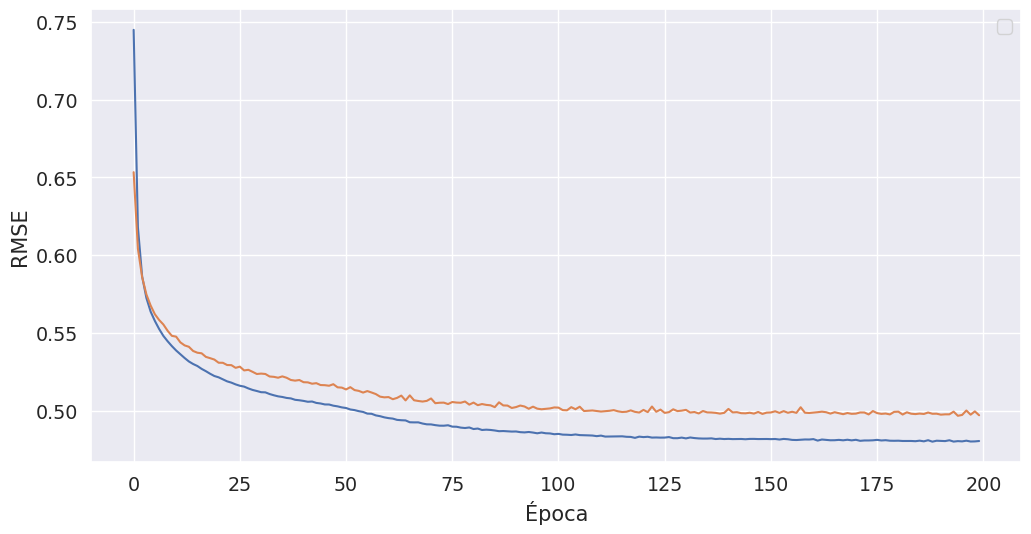

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 27s - loss: 1.1770

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.8974 

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.7718

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.6779

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.6110

10816/12384 [=========================>....] - ETA: 0s - loss: 0.5692

12384/12384 [==============================] - 0s 40us/step - loss: 0.5480 - val_loss: 0.3958


Epoch 2/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4473

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.3950

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.3721

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.3643

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.3612

10496/12384 [========================>.....] - ETA: 0s - loss: 0.3565

12384/12384 [==============================] - 0s 32us/step - loss: 0.3539 - val_loss: 0.3481


Epoch 3/100


   32/12384 [..............................] - ETA: 0s - loss: 0.3808



 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3322

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.3404

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.3312

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.3306



10656/12384 [========================>.....] - ETA: 0s - loss: 0.3302

12384/12384 [==============================] - 0s 32us/step - loss: 0.3269 - val_loss: 0.3306


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2559

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3071

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.3100

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.3079

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.3106

10880/12384 [=========================>....] - ETA: 0s - loss: 0.3116

12384/12384 [==============================] - 0s 32us/step - loss: 0.3139 - val_loss: 0.3171


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3275

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3282

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.3050

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2969

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2978

11104/12384 [=========================>....] - ETA: 0s - loss: 0.3078

12384/12384 [==============================] - 0s 31us/step - loss: 0.3052 - val_loss: 0.3122


Epoch 6/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2171

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2776

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2967

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2995

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.3008

11360/12384 [==========================>...] - ETA: 0s - loss: 0.3018

12384/12384 [==============================] - 0s 31us/step - loss: 0.2990 - val_loss: 0.3057


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5666

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.3069

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.3031

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2884

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2967

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2950

12384/12384 [==============================] - 0s 32us/step - loss: 0.2934 - val_loss: 0.3058


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2419

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2950

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2858

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2809

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2839

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2830

12384/12384 [==============================] - 0s 32us/step - loss: 0.2891 - val_loss: 0.2956


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3554

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2812

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2904

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2892

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2807

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2821

12384/12384 [==============================] - 0s 31us/step - loss: 0.2845 - val_loss: 0.2911


Epoch 10/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1949

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2723

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2740

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2840

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2854

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2826

12384/12384 [==============================] - 0s 31us/step - loss: 0.2801 - val_loss: 0.2871


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1660

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3005

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2787

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2752

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2713

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2740

12384/12384 [==============================] - 0s 31us/step - loss: 0.2760 - val_loss: 0.2836


Epoch 12/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1552

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2941

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2899

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2781

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2727

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2723

12384/12384 [==============================] - 0s 31us/step - loss: 0.2734 - val_loss: 0.2809


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1561

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2820

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2758

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2741

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2721

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2726

12384/12384 [==============================] - 0s 31us/step - loss: 0.2700 - val_loss: 0.2794


Epoch 14/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1974

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2622

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2492

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2561

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2590

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2648

12384/12384 [==============================] - 0s 31us/step - loss: 0.2676 - val_loss: 0.2756


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4705

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2572

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2562

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2644

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2681

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2647

12384/12384 [==============================] - 0s 32us/step - loss: 0.2655 - val_loss: 0.2760


Epoch 16/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4466

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2663

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2754

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2750

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2679

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2630

12384/12384 [==============================] - 0s 31us/step - loss: 0.2626 - val_loss: 0.2732


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3180

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2596

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2603

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2624

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2602

12384/12384 [==============================] - 0s 32us/step - loss: 0.2608 - val_loss: 0.2743


Epoch 18/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2863

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2301

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2588

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2656

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2629

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2656

12384/12384 [==============================] - 0s 32us/step - loss: 0.2599 - val_loss: 0.2756


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2453

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2502

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2552

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2639

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2607



10976/12384 [=========================>....] - ETA: 0s - loss: 0.2568

12384/12384 [==============================] - 0s 31us/step - loss: 0.2580 - val_loss: 0.2714


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3874

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2556

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2576

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2510

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2533

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2576

12384/12384 [==============================] - 0s 31us/step - loss: 0.2572 - val_loss: 0.2700


Epoch 21/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1307

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2583

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2560

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2548

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 0s 31us/step - loss: 0.2556 - val_loss: 0.2680


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2540

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2527

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2500

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2413

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2493

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 31us/step - loss: 0.2549 - val_loss: 0.2653


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3803

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2643

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2504

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2492

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2545

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2546

12384/12384 [==============================] - 0s 31us/step - loss: 0.2538 - val_loss: 0.2684


Epoch 24/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2244

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2736

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2645

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2644

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2515

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2540

12384/12384 [==============================] - 0s 31us/step - loss: 0.2535 - val_loss: 0.2647


Epoch 25/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1917

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2418

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2546

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2506

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2508

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 31us/step - loss: 0.2530 - val_loss: 0.2655


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2192

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2536

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2437

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2481

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2460

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2516

12384/12384 [==============================] - 0s 31us/step - loss: 0.2519 - val_loss: 0.2694


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2004

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2442

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2491

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2503

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2539

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 31us/step - loss: 0.2513 - val_loss: 0.2629


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5201

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2653

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2494

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2496

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2538

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 31us/step - loss: 0.2507 - val_loss: 0.2633


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1926

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2601

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2428

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2495

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2497

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 0s 31us/step - loss: 0.2506 - val_loss: 0.2639


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1827

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2572

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2438

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2473

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2458

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 32us/step - loss: 0.2497 - val_loss: 0.2639


Epoch 31/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2983

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2595

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2521

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2512

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2496

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 32us/step - loss: 0.2495 - val_loss: 0.2605


Epoch 32/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3405

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2405

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2474

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2463

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2500

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2482

12384/12384 [==============================] - 0s 32us/step - loss: 0.2484 - val_loss: 0.2614


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0928

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2710

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2448

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2514

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2471

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 31us/step - loss: 0.2487 - val_loss: 0.2613


Epoch 34/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3471

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2666

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2454

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2481

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2466

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 31us/step - loss: 0.2481 - val_loss: 0.2602


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2546

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2576

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2616

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2548

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2497

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 32us/step - loss: 0.2478 - val_loss: 0.2608


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1337

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2541

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2474

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2410

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2418

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 32us/step - loss: 0.2468 - val_loss: 0.2599


Epoch 37/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2389

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2406

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2494

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2514

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2547

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 0s 31us/step - loss: 0.2465 - val_loss: 0.2591


Epoch 38/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3290

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2248

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2425

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2389

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2368

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 31us/step - loss: 0.2463 - val_loss: 0.2607


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1356

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2428

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2353

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2447

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2457

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 31us/step - loss: 0.2461 - val_loss: 0.2617


Epoch 40/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3739

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2225

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2322

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2374

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2424

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2457

12384/12384 [==============================] - 0s 32us/step - loss: 0.2459 - val_loss: 0.2589


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2086

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2407

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2415

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2414

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2429

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 32us/step - loss: 0.2455 - val_loss: 0.2602


Epoch 42/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1849

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2339

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2337

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2362

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2376

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 31us/step - loss: 0.2446 - val_loss: 0.2572


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2258

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2631

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2527

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2533

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2494

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 32us/step - loss: 0.2445 - val_loss: 0.2579


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1150

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2469

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2433

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2449

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2445

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 32us/step - loss: 0.2439 - val_loss: 0.2601


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1980

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2400

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2400

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2451

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2488

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 33us/step - loss: 0.2428 - val_loss: 0.2580


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4729

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2367

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2540

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2390

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2381

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 32us/step - loss: 0.2425 - val_loss: 0.2592


Epoch 47/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3736

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2506

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2468

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2421

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 32us/step - loss: 0.2423 - val_loss: 0.2566


Epoch 48/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1440

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2283

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2267

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2280

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2362

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 31us/step - loss: 0.2419 - val_loss: 0.2550


Epoch 49/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2767

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2441

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2350

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2416

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2387

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 31us/step - loss: 0.2415 - val_loss: 0.2558


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1728

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2601

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2457

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2450

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2410

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 0s 31us/step - loss: 0.2407 - val_loss: 0.2542


Epoch 51/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1190

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2697

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2420

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2382

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2379

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 31us/step - loss: 0.2396 - val_loss: 0.2550


Epoch 52/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2915

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2424

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2344

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2348

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2327

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 31us/step - loss: 0.2395 - val_loss: 0.2558


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4731

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2356

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2356

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2362



11168/12384 [==========================>...] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 31us/step - loss: 0.2391 - val_loss: 0.2546


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2157

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2398

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2301

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2346

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 31us/step - loss: 0.2382 - val_loss: 0.2523


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1921

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2473

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2341

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2358

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 32us/step - loss: 0.2379 - val_loss: 0.2519


Epoch 56/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1445

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2316

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2367

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2390

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 31us/step - loss: 0.2373 - val_loss: 0.2533


Epoch 57/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1827

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2309

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2259

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2346

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2372

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 31us/step - loss: 0.2369 - val_loss: 0.2513


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1988

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2387

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2375

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2302

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2300

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 31us/step - loss: 0.2358 - val_loss: 0.2527


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1233

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2325

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2398

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2375

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 32us/step - loss: 0.2358 - val_loss: 0.2495


Epoch 60/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2475

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2327

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2290

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2348

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2356

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 32us/step - loss: 0.2353 - val_loss: 0.2496


Epoch 61/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1923

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2349

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2357

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 32us/step - loss: 0.2342 - val_loss: 0.2499


Epoch 62/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0953

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2450

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2282

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2323

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 31us/step - loss: 0.2344 - val_loss: 0.2487


Epoch 63/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2662

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2352

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2184

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2240

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2320



10976/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 31us/step - loss: 0.2331 - val_loss: 0.2479


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2296

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2196

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2247

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2340

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2309

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 32us/step - loss: 0.2325 - val_loss: 0.2501


Epoch 65/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2731

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2385

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2380

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2338

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 32us/step - loss: 0.2316 - val_loss: 0.2453


Epoch 66/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1213

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2172

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2256

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2301

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2319

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 31us/step - loss: 0.2309 - val_loss: 0.2479


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1761

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2465

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2369

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2359

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2339

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 31us/step - loss: 0.2307 - val_loss: 0.2460


Epoch 68/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1642

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2073

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2272

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2298

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2288

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 31us/step - loss: 0.2294 - val_loss: 0.2470


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1301

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2254

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2369

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2324

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2295

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 32us/step - loss: 0.2289 - val_loss: 0.2437


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4018

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2155

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2209

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2253

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2291

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 32us/step - loss: 0.2287 - val_loss: 0.2429


Epoch 71/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0986

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2213

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2282

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2226

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2265

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 32us/step - loss: 0.2284 - val_loss: 0.2427


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1873

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2276

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2284

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2247

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2239



10624/12384 [========================>.....] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 32us/step - loss: 0.2274 - val_loss: 0.2413


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1546

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2315

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2326

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2249

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 32us/step - loss: 0.2262 - val_loss: 0.2428


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1711

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2243

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2335

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2239

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2237

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2216

12384/12384 [==============================] - 0s 32us/step - loss: 0.2268 - val_loss: 0.2421


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5653

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2093

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2151

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2221

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2268



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2244

12384/12384 [==============================] - 0s 32us/step - loss: 0.2257 - val_loss: 0.2408


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1217

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2215

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2197

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2209

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2247

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 31us/step - loss: 0.2255 - val_loss: 0.2398


Epoch 77/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1509

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2071

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2196

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2225

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2217

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 31us/step - loss: 0.2247 - val_loss: 0.2393


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1651

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2513

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2350

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2312

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2298

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 31us/step - loss: 0.2246 - val_loss: 0.2387


Epoch 79/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4832

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2266

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2241

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2258

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2237

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2212

12384/12384 [==============================] - 0s 32us/step - loss: 0.2245 - val_loss: 0.2378


Epoch 80/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3527

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2252

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2288

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2266

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2229

12384/12384 [==============================] - 0s 31us/step - loss: 0.2242 - val_loss: 0.2403


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2506

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2261

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2247

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2232

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 31us/step - loss: 0.2240 - val_loss: 0.2380


Epoch 82/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2131

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2203

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2190

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2187

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2213

12384/12384 [==============================] - 0s 31us/step - loss: 0.2235 - val_loss: 0.2371


Epoch 83/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1623

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2385

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2324

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2250

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 31us/step - loss: 0.2231 - val_loss: 0.2372


Epoch 84/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3574

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2154

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2206

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2220

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2236

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 31us/step - loss: 0.2230 - val_loss: 0.2418


Epoch 85/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1708

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2303

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2261

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2309

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2309

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 32us/step - loss: 0.2229 - val_loss: 0.2370


Epoch 86/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1771

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2158

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2243

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2166

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2232

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 32us/step - loss: 0.2224 - val_loss: 0.2364


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2095

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2231

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2148

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2186

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2222

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2212

12384/12384 [==============================] - 0s 31us/step - loss: 0.2217 - val_loss: 0.2366


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2194

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2211

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2293

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2273

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2229

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2212

12384/12384 [==============================] - 0s 31us/step - loss: 0.2218 - val_loss: 0.2358


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3936

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2140

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2206

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2278

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2275

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 31us/step - loss: 0.2212 - val_loss: 0.2391


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2080

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2128

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2184

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2154

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2212

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2185

12384/12384 [==============================] - 0s 31us/step - loss: 0.2215 - val_loss: 0.2360


Epoch 91/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1948

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2141

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2194

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2149

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2190



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2184

12384/12384 [==============================] - 0s 32us/step - loss: 0.2209 - val_loss: 0.2361


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4450

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2563

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2283

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2218

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2186



10432/12384 [========================>.....] - ETA: 0s - loss: 0.2224

12384/12384 [==============================] - 0s 32us/step - loss: 0.2211 - val_loss: 0.2352


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1756

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2207

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2279

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2231

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2237

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2224

12384/12384 [==============================] - 0s 31us/step - loss: 0.2207 - val_loss: 0.2346


Epoch 94/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2137

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2245

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2214

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2181

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2188

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2187

12384/12384 [==============================] - 0s 31us/step - loss: 0.2210 - val_loss: 0.2345


Epoch 95/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1060

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2092

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.1999

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2108

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2163

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2211

12384/12384 [==============================] - 0s 31us/step - loss: 0.2211 - val_loss: 0.2358


Epoch 96/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1351

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2229

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2261

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2212

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2242

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2208

12384/12384 [==============================] - 0s 32us/step - loss: 0.2207 - val_loss: 0.2344


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1456

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2161

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2191

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2150

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2184



11072/12384 [=========================>....] - ETA: 0s - loss: 0.2193

12384/12384 [==============================] - 0s 31us/step - loss: 0.2201 - val_loss: 0.2359


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3435

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2167

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2233

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2146

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2170

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2168

12384/12384 [==============================] - 0s 31us/step - loss: 0.2202 - val_loss: 0.2339


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1491

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2022

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2188

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2259

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2212

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2184

12384/12384 [==============================] - 0s 32us/step - loss: 0.2209 - val_loss: 0.2356


Epoch 100/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2818

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2141

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2157

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2233

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2196

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2188

12384/12384 [==============================] - 0s 32us/step - loss: 0.2194 - val_loss: 0.2375


No handles with labels found to put in legend.


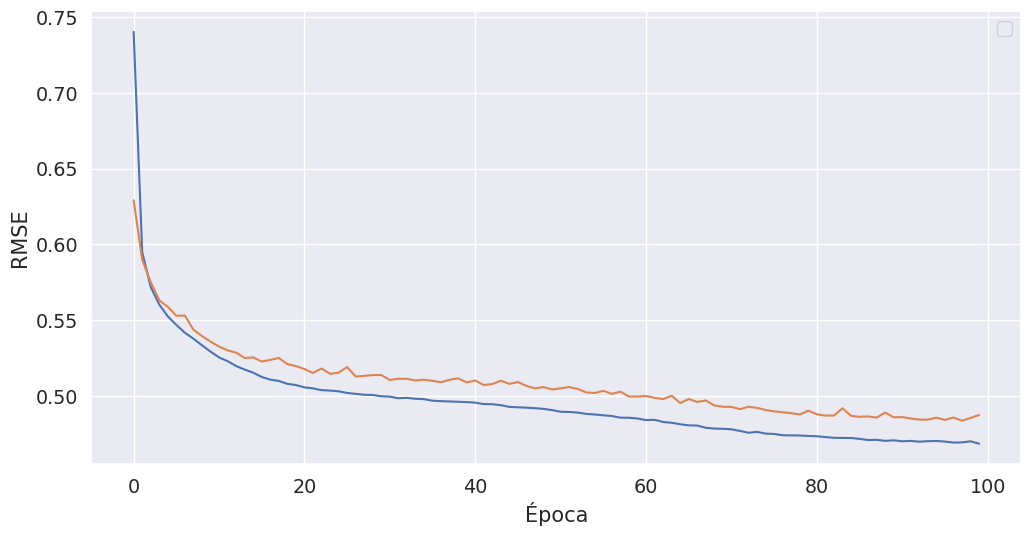

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 12s - loss: 1.4855

2176/6000 [=========>....................] - ETA: 0s - loss: 0.5329 

4320/6000 [====================>.........] - ETA: 0s - loss: 0.4469

6000/6000 [==============================] - 0s 47us/step - loss: 0.4203 - val_loss: 0.3362


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2468

2304/6000 [==========>...................] - ETA: 0s - loss: 0.3248

4544/6000 [=====================>........] - ETA: 0s - loss: 0.3458

6000/6000 [==============================] - 0s 33us/step - loss: 0.3359 - val_loss: 0.3068


Epoch 3/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3463

2336/6000 [==========>...................] - ETA: 0s - loss: 0.3486

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3185

6000/6000 [==============================] - 0s 33us/step - loss: 0.3193 - val_loss: 0.2975


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2788

2272/6000 [==========>...................] - ETA: 0s - loss: 0.3250

4480/6000 [=====================>........] - ETA: 0s - loss: 0.3161

6000/6000 [==============================] - 0s 33us/step - loss: 0.3058 - val_loss: 0.2947


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

2208/6000 [==========>...................] - ETA: 0s - loss: 0.3183

4384/6000 [====================>.........] - ETA: 0s - loss: 0.3050

6000/6000 [==============================] - 0s 34us/step - loss: 0.2926 - val_loss: 0.2815


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2826

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2794

6000/6000 [==============================] - 0s 33us/step - loss: 0.2806 - val_loss: 0.2807


Epoch 7/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4698



2176/6000 [=========>....................] - ETA: 0s - loss: 0.2886

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2657

6000/6000 [==============================] - 0s 33us/step - loss: 0.2681 - val_loss: 0.2607


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4192

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2616

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2548

6000/6000 [==============================] - 0s 32us/step - loss: 0.2573 - val_loss: 0.2495


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2914

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2750

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2532

6000/6000 [==============================] - 0s 33us/step - loss: 0.2500 - val_loss: 0.2464


Epoch 10/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3112

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2490

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2456



6000/6000 [==============================] - 0s 34us/step - loss: 0.2426 - val_loss: 0.2456


Epoch 11/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2353

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2476

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2400

6000/6000 [==============================] - 0s 34us/step - loss: 0.2382 - val_loss: 0.2451


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2760

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2291

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2345

6000/6000 [==============================] - 0s 33us/step - loss: 0.2323 - val_loss: 0.2378


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2341

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 32us/step - loss: 0.2277 - val_loss: 0.2317


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2193

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 32us/step - loss: 0.2252 - val_loss: 0.2298


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3584

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2132

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 33us/step - loss: 0.2213 - val_loss: 0.2378


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1322

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2330

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 33us/step - loss: 0.2182 - val_loss: 0.2224


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2058

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2086

6000/6000 [==============================] - 0s 33us/step - loss: 0.2150 - val_loss: 0.2293


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2350

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2262

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 33us/step - loss: 0.2139 - val_loss: 0.2202


Epoch 19/500


  32/6000 [..............................] - ETA: 0s - loss: 0.5687

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2401

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 34us/step - loss: 0.2122 - val_loss: 0.2159


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2832

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2127

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2069

6000/6000 [==============================] - 0s 33us/step - loss: 0.2106 - val_loss: 0.2169


Epoch 21/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3661

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1876

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2032

6000/6000 [==============================] - 0s 33us/step - loss: 0.2095 - val_loss: 0.2138


Epoch 22/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2058



2208/6000 [==========>...................] - ETA: 0s - loss: 0.2176

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2101

6000/6000 [==============================] - 0s 33us/step - loss: 0.2087 - val_loss: 0.2143


Epoch 23/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1807

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1943

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2046

6000/6000 [==============================] - 0s 33us/step - loss: 0.2049 - val_loss: 0.2107


Epoch 24/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2103

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2075

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 33us/step - loss: 0.2038 - val_loss: 0.2153


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2078

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 33us/step - loss: 0.2043 - val_loss: 0.2118


Epoch 26/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1700

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1961

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 33us/step - loss: 0.2017 - val_loss: 0.2065


Epoch 27/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3794

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1890

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2025

6000/6000 [==============================] - 0s 34us/step - loss: 0.2007 - val_loss: 0.2107


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1875

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1995

6000/6000 [==============================] - 0s 34us/step - loss: 0.1995 - val_loss: 0.2177


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2035

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2015

6000/6000 [==============================] - 0s 34us/step - loss: 0.1977 - val_loss: 0.2027


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1960

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 34us/step - loss: 0.1990 - val_loss: 0.2048


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2013

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2011

6000/6000 [==============================] - 0s 34us/step - loss: 0.1979 - val_loss: 0.2062


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1776

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1884

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 34us/step - loss: 0.1968 - val_loss: 0.2101


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2027

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1988

6000/6000 [==============================] - 0s 34us/step - loss: 0.1947 - val_loss: 0.2035


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1965

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1901

6000/6000 [==============================] - 0s 34us/step - loss: 0.1958 - val_loss: 0.2029


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2289

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1901

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 33us/step - loss: 0.1952 - val_loss: 0.2004


Epoch 36/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1886

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2124

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2004

6000/6000 [==============================] - 0s 33us/step - loss: 0.1932 - val_loss: 0.2041


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2952

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1963

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1956

6000/6000 [==============================] - 0s 33us/step - loss: 0.1926 - val_loss: 0.2037


Epoch 38/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1399

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1933

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 32us/step - loss: 0.1925 - val_loss: 0.2055


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1740

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1998

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 34us/step - loss: 0.1920 - val_loss: 0.2026


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2008

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 33us/step - loss: 0.1917 - val_loss: 0.1993


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1936

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1875



6000/6000 [==============================] - 0s 33us/step - loss: 0.1910 - val_loss: 0.2065


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1956

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1963

6000/6000 [==============================] - 0s 32us/step - loss: 0.1903 - val_loss: 0.1973


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2012

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 32us/step - loss: 0.1895 - val_loss: 0.1989


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3857

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1820

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 32us/step - loss: 0.1891 - val_loss: 0.2041


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1539

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1898

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1949

6000/6000 [==============================] - 0s 33us/step - loss: 0.1893 - val_loss: 0.1989


Epoch 46/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1129

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1883

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 33us/step - loss: 0.1870 - val_loss: 0.1981


Epoch 47/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1648

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1802

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1901

6000/6000 [==============================] - 0s 33us/step - loss: 0.1891 - val_loss: 0.2017


Epoch 48/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1484

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1733

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 32us/step - loss: 0.1861 - val_loss: 0.1971


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2702

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1967

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 32us/step - loss: 0.1881 - val_loss: 0.1974


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1840

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 33us/step - loss: 0.1864 - val_loss: 0.1961


Epoch 51/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1997

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1846

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 33us/step - loss: 0.1877 - val_loss: 0.1967


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0782

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1637

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 34us/step - loss: 0.1838 - val_loss: 0.1999


Epoch 53/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1725

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1865

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 33us/step - loss: 0.1866 - val_loss: 0.2023


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1909

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 34us/step - loss: 0.1841 - val_loss: 0.1989


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2611

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1771

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 33us/step - loss: 0.1835 - val_loss: 0.1948


Epoch 56/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1100

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1920

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 33us/step - loss: 0.1847 - val_loss: 0.1992


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1911

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 32us/step - loss: 0.1845 - val_loss: 0.1984


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1874

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 32us/step - loss: 0.1827 - val_loss: 0.1970


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2740

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1893

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 32us/step - loss: 0.1828 - val_loss: 0.1939


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1677

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 32us/step - loss: 0.1817 - val_loss: 0.1986


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2032

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 33us/step - loss: 0.1817 - val_loss: 0.1929


Epoch 62/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1091

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1849



4480/6000 [=====================>........] - ETA: 0s - loss: 0.1850



6000/6000 [==============================] - 0s 33us/step - loss: 0.1817 - val_loss: 0.1965


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2402



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1871

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 33us/step - loss: 0.1826 - val_loss: 0.2021


Epoch 64/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0649

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1750

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 33us/step - loss: 0.1803 - val_loss: 0.2053


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1744

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 32us/step - loss: 0.1810 - val_loss: 0.1995


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1926

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1733

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 32us/step - loss: 0.1811 - val_loss: 0.1933


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2250

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1783

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 33us/step - loss: 0.1789 - val_loss: 0.1943


Epoch 68/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1038



2272/6000 [==========>...................] - ETA: 0s - loss: 0.1758

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 33us/step - loss: 0.1792 - val_loss: 0.1966


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1737

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 33us/step - loss: 0.1791 - val_loss: 0.1979


Epoch 70/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1708

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1803

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 33us/step - loss: 0.1784 - val_loss: 0.1943


Epoch 71/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1207

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1777

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 33us/step - loss: 0.1771 - val_loss: 0.2048


Epoch 72/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1754



2240/6000 [==========>...................] - ETA: 0s - loss: 0.1811

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 33us/step - loss: 0.1791 - val_loss: 0.1961


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1697

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 33us/step - loss: 0.1780 - val_loss: 0.1942


Epoch 74/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0939

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1716

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 33us/step - loss: 0.1771 - val_loss: 0.2026


Epoch 75/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0940



2208/6000 [==========>...................] - ETA: 0s - loss: 0.1611



4352/6000 [====================>.........] - ETA: 0s - loss: 0.1720



6000/6000 [==============================] - 0s 33us/step - loss: 0.1774 - val_loss: 0.1936


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1843

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 32us/step - loss: 0.1767 - val_loss: 0.1966


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2267

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1777

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 33us/step - loss: 0.1766 - val_loss: 0.1963


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1783

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 33us/step - loss: 0.1764 - val_loss: 0.1919


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1901

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 33us/step - loss: 0.1763 - val_loss: 0.1989


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1848

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 33us/step - loss: 0.1753 - val_loss: 0.1979


Epoch 81/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1679

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1599

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 34us/step - loss: 0.1752 - val_loss: 0.2019


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1668

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 33us/step - loss: 0.1749 - val_loss: 0.1953


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2215

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1768

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 33us/step - loss: 0.1745 - val_loss: 0.1930


Epoch 84/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1632

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1744

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 33us/step - loss: 0.1751 - val_loss: 0.1943


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3929

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1703

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 34us/step - loss: 0.1739 - val_loss: 0.1928


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3483

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1811

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 34us/step - loss: 0.1745 - val_loss: 0.1923


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1734

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1582

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 33us/step - loss: 0.1742 - val_loss: 0.1932


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1705

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1664



6000/6000 [==============================] - 0s 33us/step - loss: 0.1735 - val_loss: 0.1933


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1520

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1673

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 33us/step - loss: 0.1717 - val_loss: 0.1961


Epoch 90/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1573

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1718

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 36us/step - loss: 0.1744 - val_loss: 0.1937


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1751

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 35us/step - loss: 0.1727 - val_loss: 0.2010


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1714

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 34us/step - loss: 0.1727 - val_loss: 0.1998


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1764

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 32us/step - loss: 0.1732 - val_loss: 0.1991


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1227

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 34us/step - loss: 0.1717 - val_loss: 0.1947


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3562

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1634

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 34us/step - loss: 0.1735 - val_loss: 0.1920


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1767

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 33us/step - loss: 0.1719 - val_loss: 0.1963


Epoch 97/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3856



2112/6000 [=========>....................] - ETA: 0s - loss: 0.1762

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 34us/step - loss: 0.1712 - val_loss: 0.1938


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1705

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 33us/step - loss: 0.1720 - val_loss: 0.1955


Epoch 99/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0980

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1526

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 34us/step - loss: 0.1721 - val_loss: 0.1913


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1672

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 33us/step - loss: 0.1707 - val_loss: 0.1920


Epoch 101/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1718

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1670

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 33us/step - loss: 0.1707 - val_loss: 0.1974


Epoch 102/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1358

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1649

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 34us/step - loss: 0.1701 - val_loss: 0.1917


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1700

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 34us/step - loss: 0.1717 - val_loss: 0.1979


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0588

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1635

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 34us/step - loss: 0.1687 - val_loss: 0.1943


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1764



4480/6000 [=====================>........] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 33us/step - loss: 0.1689 - val_loss: 0.1889


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1687

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 34us/step - loss: 0.1678 - val_loss: 0.1899


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0607

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1522

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 34us/step - loss: 0.1695 - val_loss: 0.1927


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0578

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1660

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 34us/step - loss: 0.1686 - val_loss: 0.1885


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1781

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1609

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 34us/step - loss: 0.1675 - val_loss: 0.1945


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493



2304/6000 [==========>...................] - ETA: 0s - loss: 0.1636

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 32us/step - loss: 0.1692 - val_loss: 0.1896


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1605

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1671

6000/6000 [==============================] - 0s 33us/step - loss: 0.1681 - val_loss: 0.1900


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1739

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 33us/step - loss: 0.1679 - val_loss: 0.1903


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1766

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 33us/step - loss: 0.1668 - val_loss: 0.1879


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1592

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 33us/step - loss: 0.1673 - val_loss: 0.1908


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1504

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 32us/step - loss: 0.1672 - val_loss: 0.1936


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1712

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1622

6000/6000 [==============================] - 0s 32us/step - loss: 0.1667 - val_loss: 0.1917


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2214

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1591

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1668



6000/6000 [==============================] - 0s 33us/step - loss: 0.1660 - val_loss: 0.1942


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1694

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 32us/step - loss: 0.1671 - val_loss: 0.1884


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1717

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 32us/step - loss: 0.1667 - val_loss: 0.1895


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1653

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 33us/step - loss: 0.1653 - val_loss: 0.1896


Epoch 121/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0692

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1664

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 33us/step - loss: 0.1658 - val_loss: 0.1859


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1664

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 33us/step - loss: 0.1648 - val_loss: 0.1899


Epoch 123/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0915

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1517

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 33us/step - loss: 0.1645 - val_loss: 0.1991


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1895

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1501

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 33us/step - loss: 0.1651 - val_loss: 0.1917


Epoch 125/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1824

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1600

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1590

6000/6000 [==============================] - 0s 33us/step - loss: 0.1639 - val_loss: 0.1889


Epoch 126/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0801

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1537

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 33us/step - loss: 0.1644 - val_loss: 0.1895


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1597

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 34us/step - loss: 0.1640 - val_loss: 0.1867


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2773

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1647

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 33us/step - loss: 0.1642 - val_loss: 0.1859


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1600

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1623

6000/6000 [==============================] - 0s 33us/step - loss: 0.1634 - val_loss: 0.1849


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1635

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1569

6000/6000 [==============================] - 0s 33us/step - loss: 0.1625 - val_loss: 0.1889


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2151

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1529

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 33us/step - loss: 0.1629 - val_loss: 0.1877


Epoch 132/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1654

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 35us/step - loss: 0.1623 - val_loss: 0.1956


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1660

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 34us/step - loss: 0.1639 - val_loss: 0.1874


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1386

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 34us/step - loss: 0.1625 - val_loss: 0.1953


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1654

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 34us/step - loss: 0.1620 - val_loss: 0.1884


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1712

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 33us/step - loss: 0.1633 - val_loss: 0.1879


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021



2208/6000 [==========>...................] - ETA: 0s - loss: 0.1464

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1606

6000/6000 [==============================] - 0s 33us/step - loss: 0.1606 - val_loss: 0.1955


Epoch 138/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1848

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1776

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 32us/step - loss: 0.1640 - val_loss: 0.1827


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4349

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1613

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 32us/step - loss: 0.1613 - val_loss: 0.1857


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1653

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 33us/step - loss: 0.1608 - val_loss: 0.1880


Epoch 141/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1715

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1579

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 33us/step - loss: 0.1607 - val_loss: 0.1930


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3223

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1641

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 33us/step - loss: 0.1609 - val_loss: 0.1854


Epoch 143/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2024

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1578

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1585

6000/6000 [==============================] - 0s 34us/step - loss: 0.1606 - val_loss: 0.1865


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1685

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 32us/step - loss: 0.1616 - val_loss: 0.1857


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2870

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1701

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 32us/step - loss: 0.1598 - val_loss: 0.1876


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1559

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1519

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1580



6000/6000 [==============================] - 0s 33us/step - loss: 0.1588 - val_loss: 0.1900


Epoch 147/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1145

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1697

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 34us/step - loss: 0.1593 - val_loss: 0.1852


Epoch 148/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2067

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1538

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1572

6000/6000 [==============================] - 0s 33us/step - loss: 0.1589 - val_loss: 0.1844


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1583

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1581

6000/6000 [==============================] - 0s 33us/step - loss: 0.1591 - val_loss: 0.1850


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1542

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1599

6000/6000 [==============================] - 0s 32us/step - loss: 0.1599 - val_loss: 0.1888


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1430

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 32us/step - loss: 0.1582 - val_loss: 0.1911


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2417

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1453

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 32us/step - loss: 0.1590 - val_loss: 0.1833


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1535

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 32us/step - loss: 0.1587 - val_loss: 0.1840


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1502

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1598

6000/6000 [==============================] - 0s 32us/step - loss: 0.1595 - val_loss: 0.1826


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1623

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1562

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1619

6000/6000 [==============================] - 0s 32us/step - loss: 0.1589 - val_loss: 0.1837


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1492

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 33us/step - loss: 0.1588 - val_loss: 0.1884


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1409

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 33us/step - loss: 0.1579 - val_loss: 0.1915


Epoch 158/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2688

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1561

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 33us/step - loss: 0.1586 - val_loss: 0.1864


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1517

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 32us/step - loss: 0.1581 - val_loss: 0.1799


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0983

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1634

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 33us/step - loss: 0.1574 - val_loss: 0.1841


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1766

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1666

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 32us/step - loss: 0.1577 - val_loss: 0.1833


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2252

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1686

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 34us/step - loss: 0.1576 - val_loss: 0.1841


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1736

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 32us/step - loss: 0.1566 - val_loss: 0.1900


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1515

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1557

6000/6000 [==============================] - 0s 33us/step - loss: 0.1574 - val_loss: 0.1865


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1448

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1647

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1557

6000/6000 [==============================] - 0s 33us/step - loss: 0.1564 - val_loss: 0.1856


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1493

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 34us/step - loss: 0.1584 - val_loss: 0.1847


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0715

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1581

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 33us/step - loss: 0.1565 - val_loss: 0.1860


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4184

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1487

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 33us/step - loss: 0.1555 - val_loss: 0.1854


Epoch 169/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0828

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1446

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1569

6000/6000 [==============================] - 0s 32us/step - loss: 0.1568 - val_loss: 0.1840


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1539

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 33us/step - loss: 0.1561 - val_loss: 0.1869


Epoch 171/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0808

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1628

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 33us/step - loss: 0.1571 - val_loss: 0.1860


Epoch 172/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0866

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1492

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 34us/step - loss: 0.1549 - val_loss: 0.1833


Epoch 173/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1223

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1461

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1562

6000/6000 [==============================] - 0s 33us/step - loss: 0.1555 - val_loss: 0.1817


Epoch 174/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2135

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1479

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 33us/step - loss: 0.1542 - val_loss: 0.1799


Epoch 175/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1443

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1515

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 33us/step - loss: 0.1544 - val_loss: 0.1899


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2493

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1455

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 33us/step - loss: 0.1560 - val_loss: 0.1888


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1592

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 33us/step - loss: 0.1555 - val_loss: 0.1824


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1542

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 33us/step - loss: 0.1553 - val_loss: 0.1892


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1427

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 32us/step - loss: 0.1554 - val_loss: 0.1841


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1612

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1540

6000/6000 [==============================] - 0s 33us/step - loss: 0.1549 - val_loss: 0.1857


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1520

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 33us/step - loss: 0.1550 - val_loss: 0.1858


Epoch 182/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1119

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1395

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 34us/step - loss: 0.1542 - val_loss: 0.1819


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1606

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 33us/step - loss: 0.1551 - val_loss: 0.1834


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833



2272/6000 [==========>...................] - ETA: 0s - loss: 0.1440

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 32us/step - loss: 0.1526 - val_loss: 0.1817


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1496

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 33us/step - loss: 0.1545 - val_loss: 0.1819


Epoch 186/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1026

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1489

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1591

6000/6000 [==============================] - 0s 33us/step - loss: 0.1546 - val_loss: 0.1867


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 34us/step - loss: 0.1530 - val_loss: 0.1838


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2478

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1417

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 33us/step - loss: 0.1524 - val_loss: 0.1843


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1242

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1541

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 33us/step - loss: 0.1540 - val_loss: 0.1819


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2185

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1524

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 33us/step - loss: 0.1543 - val_loss: 0.1861


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1604

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 33us/step - loss: 0.1555 - val_loss: 0.1805


Epoch 192/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2257

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1684

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 34us/step - loss: 0.1542 - val_loss: 0.1792


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2441

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1615

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 35us/step - loss: 0.1518 - val_loss: 0.1807


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1762

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1508

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1499

6000/6000 [==============================] - 0s 33us/step - loss: 0.1527 - val_loss: 0.1854


Epoch 195/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1404

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1620

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 33us/step - loss: 0.1529 - val_loss: 0.1894


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1502

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 33us/step - loss: 0.1528 - val_loss: 0.1849


Epoch 197/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1380

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 33us/step - loss: 0.1521 - val_loss: 0.1870


Epoch 198/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1731



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1633

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 34us/step - loss: 0.1527 - val_loss: 0.1810


Epoch 199/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0768

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1456

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 34us/step - loss: 0.1512 - val_loss: 0.1801


Epoch 200/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0663

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1433

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 33us/step - loss: 0.1518 - val_loss: 0.1819


Epoch 201/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2148

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1422

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 33us/step - loss: 0.1528 - val_loss: 0.1973


Epoch 202/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3576

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1605

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1569

6000/6000 [==============================] - 0s 33us/step - loss: 0.1520 - val_loss: 0.1836


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2753

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1527

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 33us/step - loss: 0.1520 - val_loss: 0.1806


Epoch 204/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1249

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1467

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 34us/step - loss: 0.1512 - val_loss: 0.1853


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 32us/step - loss: 0.1509 - val_loss: 0.1811


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1438

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 33us/step - loss: 0.1510 - val_loss: 0.1834


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2658

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 33us/step - loss: 0.1505 - val_loss: 0.1851


Epoch 208/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0887

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1430

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 33us/step - loss: 0.1516 - val_loss: 0.1897


Epoch 209/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1340

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1459

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 33us/step - loss: 0.1509 - val_loss: 0.1874


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1479

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 33us/step - loss: 0.1517 - val_loss: 0.1809


Epoch 211/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1094

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1522

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 34us/step - loss: 0.1498 - val_loss: 0.1844


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1927

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1537

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 33us/step - loss: 0.1497 - val_loss: 0.1807


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0968

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1457

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1486

6000/6000 [==============================] - 0s 33us/step - loss: 0.1505 - val_loss: 0.1842


Epoch 214/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1367

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1435

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 33us/step - loss: 0.1507 - val_loss: 0.1861


Epoch 215/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2367

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1478

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 33us/step - loss: 0.1501 - val_loss: 0.1843


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1675

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1539

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 33us/step - loss: 0.1503 - val_loss: 0.1839


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1486

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 33us/step - loss: 0.1499 - val_loss: 0.1821


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0761



2208/6000 [==========>...................] - ETA: 0s - loss: 0.1502

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1541

6000/6000 [==============================] - 0s 33us/step - loss: 0.1504 - val_loss: 0.1816


Epoch 219/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2340

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1424

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 34us/step - loss: 0.1498 - val_loss: 0.1797


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2095

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 33us/step - loss: 0.1502 - val_loss: 0.1817


Epoch 221/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1210

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1513

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 34us/step - loss: 0.1500 - val_loss: 0.1813


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1456

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 33us/step - loss: 0.1500 - val_loss: 0.1860


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1669

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 35us/step - loss: 0.1497 - val_loss: 0.1784


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2034

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1489

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 33us/step - loss: 0.1485 - val_loss: 0.1792


Epoch 225/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1166

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1550

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 33us/step - loss: 0.1491 - val_loss: 0.1825


Epoch 226/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2090

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1453

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 32us/step - loss: 0.1508 - val_loss: 0.1813


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1670

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1488

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1481

6000/6000 [==============================] - 0s 33us/step - loss: 0.1484 - val_loss: 0.1870


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1522

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 33us/step - loss: 0.1491 - val_loss: 0.1826


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1552

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 33us/step - loss: 0.1487 - val_loss: 0.1831


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1389

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 33us/step - loss: 0.1490 - val_loss: 0.1849


Epoch 231/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2088

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1395

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 33us/step - loss: 0.1485 - val_loss: 0.1824


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 33us/step - loss: 0.1486 - val_loss: 0.1814


Epoch 233/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0949

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1483

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 34us/step - loss: 0.1482 - val_loss: 0.1831


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1132

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1436

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 33us/step - loss: 0.1480 - val_loss: 0.1817


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1156

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1306

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 33us/step - loss: 0.1490 - val_loss: 0.1803


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1438

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 32us/step - loss: 0.1479 - val_loss: 0.1792


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1309

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 32us/step - loss: 0.1478 - val_loss: 0.1860


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1504

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 33us/step - loss: 0.1480 - val_loss: 0.1824


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1865



2240/6000 [==========>...................] - ETA: 0s - loss: 0.1443



4544/6000 [=====================>........] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 32us/step - loss: 0.1474 - val_loss: 0.1808


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 32us/step - loss: 0.1474 - val_loss: 0.1860


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1543

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 33us/step - loss: 0.1480 - val_loss: 0.1810


Epoch 242/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1228

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1564

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 33us/step - loss: 0.1473 - val_loss: 0.1818


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1443

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 33us/step - loss: 0.1466 - val_loss: 0.1820


Epoch 244/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1744

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1524

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 32us/step - loss: 0.1471 - val_loss: 0.1806


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1416

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1417



6000/6000 [==============================] - 0s 33us/step - loss: 0.1463 - val_loss: 0.1801


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1647

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1389

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1432

6000/6000 [==============================] - 0s 33us/step - loss: 0.1470 - val_loss: 0.1832


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2365

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1535

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 32us/step - loss: 0.1464 - val_loss: 0.1844


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1549

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 33us/step - loss: 0.1478 - val_loss: 0.1869


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0848

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1402

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 32us/step - loss: 0.1466 - val_loss: 0.1810


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1927

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1416

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 33us/step - loss: 0.1463 - val_loss: 0.1870


Epoch 251/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1251

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1484

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 34us/step - loss: 0.1461 - val_loss: 0.1806


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1293

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1440

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 33us/step - loss: 0.1470 - val_loss: 0.1839


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2499

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1507

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 35us/step - loss: 0.1471 - val_loss: 0.1871


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1432

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 33us/step - loss: 0.1470 - val_loss: 0.1800


Epoch 255/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1300

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1500

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 34us/step - loss: 0.1457 - val_loss: 0.1820


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1636

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1461

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 33us/step - loss: 0.1456 - val_loss: 0.1818


Epoch 257/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1272

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1523

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 33us/step - loss: 0.1451 - val_loss: 0.1825


Epoch 258/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0865

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1260

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 33us/step - loss: 0.1452 - val_loss: 0.1860


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 33us/step - loss: 0.1453 - val_loss: 0.1861


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1375

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 33us/step - loss: 0.1459 - val_loss: 0.1838


Epoch 261/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1436

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 33us/step - loss: 0.1449 - val_loss: 0.1843


Epoch 262/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0919

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1371

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 33us/step - loss: 0.1448 - val_loss: 0.1869


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1456

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 33us/step - loss: 0.1459 - val_loss: 0.1827


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1880

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1454

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 32us/step - loss: 0.1447 - val_loss: 0.1832


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1509

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 32us/step - loss: 0.1449 - val_loss: 0.1844


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2171

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1542

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 32us/step - loss: 0.1448 - val_loss: 0.1832


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0712

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1405

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 33us/step - loss: 0.1433 - val_loss: 0.1823


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1461

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 33us/step - loss: 0.1463 - val_loss: 0.1864


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1414

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 33us/step - loss: 0.1443 - val_loss: 0.1840


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1646

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1457

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 32us/step - loss: 0.1453 - val_loss: 0.1859


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1408

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 33us/step - loss: 0.1435 - val_loss: 0.1837


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1404

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 33us/step - loss: 0.1428 - val_loss: 0.1835


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1304

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 34us/step - loss: 0.1442 - val_loss: 0.1852


Epoch 274/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1779

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1527

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1463

6000/6000 [==============================] - 0s 33us/step - loss: 0.1432 - val_loss: 0.1849


Epoch 275/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1809

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1456

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 32us/step - loss: 0.1421 - val_loss: 0.1964


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2516

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1375

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1487

6000/6000 [==============================] - 0s 33us/step - loss: 0.1428 - val_loss: 0.1835


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1486

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 33us/step - loss: 0.1430 - val_loss: 0.1809


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1463

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 34us/step - loss: 0.1432 - val_loss: 0.1814


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 33us/step - loss: 0.1427 - val_loss: 0.1853


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1532

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1469

6000/6000 [==============================] - 0s 34us/step - loss: 0.1435 - val_loss: 0.1814


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1399

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1432

6000/6000 [==============================] - 0s 33us/step - loss: 0.1420 - val_loss: 0.1819


Epoch 282/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0631

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1572

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 33us/step - loss: 0.1439 - val_loss: 0.1830


Epoch 283/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1622

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1426

6000/6000 [==============================] - 0s 33us/step - loss: 0.1433 - val_loss: 0.1820


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1436

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 34us/step - loss: 0.1432 - val_loss: 0.1868


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2041

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1525

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 33us/step - loss: 0.1435 - val_loss: 0.1809


Epoch 286/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1273

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1345

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 34us/step - loss: 0.1429 - val_loss: 0.1887


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1412

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 34us/step - loss: 0.1426 - val_loss: 0.1833


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1469

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1387

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1413

6000/6000 [==============================] - 0s 33us/step - loss: 0.1428 - val_loss: 0.1842


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1298

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 33us/step - loss: 0.1422 - val_loss: 0.1823


Epoch 290/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1756

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1374

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 33us/step - loss: 0.1423 - val_loss: 0.1846


Epoch 291/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1570

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1405

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 33us/step - loss: 0.1419 - val_loss: 0.1831


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1353

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 33us/step - loss: 0.1414 - val_loss: 0.1812


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1380

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 32us/step - loss: 0.1417 - val_loss: 0.1832


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1362

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 34us/step - loss: 0.1426 - val_loss: 0.1882


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1382

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1402

6000/6000 [==============================] - 0s 33us/step - loss: 0.1424 - val_loss: 0.1826


Epoch 296/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1929

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1532

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 33us/step - loss: 0.1408 - val_loss: 0.1811


Epoch 297/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1381

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 33us/step - loss: 0.1413 - val_loss: 0.1813


Epoch 298/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1407

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1439

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 33us/step - loss: 0.1416 - val_loss: 0.1840


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0806

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1348

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 33us/step - loss: 0.1423 - val_loss: 0.1817


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1469

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 32us/step - loss: 0.1406 - val_loss: 0.1835


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2196

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1365

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 33us/step - loss: 0.1407 - val_loss: 0.1866


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2413

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1429

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1468

6000/6000 [==============================] - 0s 32us/step - loss: 0.1418 - val_loss: 0.1798


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2964

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1390

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 32us/step - loss: 0.1401 - val_loss: 0.1848


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1433

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 33us/step - loss: 0.1427 - val_loss: 0.1841


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1437

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 32us/step - loss: 0.1414 - val_loss: 0.1836


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1420

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 33us/step - loss: 0.1400 - val_loss: 0.1876


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1387

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 33us/step - loss: 0.1396 - val_loss: 0.1827


Epoch 308/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0892

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1415

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 33us/step - loss: 0.1416 - val_loss: 0.1815


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1453

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1470

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 33us/step - loss: 0.1402 - val_loss: 0.1841


Epoch 310/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1169

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1368

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 34us/step - loss: 0.1396 - val_loss: 0.1847


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1387

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 32us/step - loss: 0.1402 - val_loss: 0.1828


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0360

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 33us/step - loss: 0.1395 - val_loss: 0.1815


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1540

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 33us/step - loss: 0.1401 - val_loss: 0.1972


Epoch 314/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1647

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1390

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 33us/step - loss: 0.1411 - val_loss: 0.1841


Epoch 315/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1225

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1392

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 32us/step - loss: 0.1387 - val_loss: 0.1817


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1367

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 34us/step - loss: 0.1394 - val_loss: 0.1844


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1328

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 33us/step - loss: 0.1403 - val_loss: 0.1853


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2165

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 33us/step - loss: 0.1394 - val_loss: 0.1814


Epoch 319/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3273

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1193

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 34us/step - loss: 0.1394 - val_loss: 0.1817


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0676

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1332

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 33us/step - loss: 0.1400 - val_loss: 0.1911


Epoch 321/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1798

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1326

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 33us/step - loss: 0.1385 - val_loss: 0.1850


Epoch 322/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1612

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1339

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 33us/step - loss: 0.1388 - val_loss: 0.1843


Epoch 323/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1075

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1219

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 33us/step - loss: 0.1384 - val_loss: 0.1923


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1447

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 33us/step - loss: 0.1403 - val_loss: 0.1829


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1386

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 32us/step - loss: 0.1386 - val_loss: 0.1832


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0434

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1504

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 32us/step - loss: 0.1393 - val_loss: 0.1825


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0638

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1333

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 33us/step - loss: 0.1383 - val_loss: 0.1860


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1318

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1421

6000/6000 [==============================] - 0s 33us/step - loss: 0.1383 - val_loss: 0.1838


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1420

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 33us/step - loss: 0.1378 - val_loss: 0.1828


Epoch 330/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0959

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1396

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 33us/step - loss: 0.1381 - val_loss: 0.1824


Epoch 331/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1230

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1309



4608/6000 [======================>.......] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 32us/step - loss: 0.1370 - val_loss: 0.1900


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1366

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 33us/step - loss: 0.1373 - val_loss: 0.1849


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1353

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 33us/step - loss: 0.1379 - val_loss: 0.1842


Epoch 334/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1093

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1314

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 33us/step - loss: 0.1380 - val_loss: 0.1831


Epoch 335/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0580

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1369

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 33us/step - loss: 0.1369 - val_loss: 0.1833


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1314

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 33us/step - loss: 0.1364 - val_loss: 0.1863


Epoch 337/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0660

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1377

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 33us/step - loss: 0.1372 - val_loss: 0.1812


Epoch 338/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1507

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1358

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 34us/step - loss: 0.1371 - val_loss: 0.1858


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1382

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 33us/step - loss: 0.1372 - val_loss: 0.1827


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1447

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 33us/step - loss: 0.1370 - val_loss: 0.1807


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2357

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1360

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 34us/step - loss: 0.1375 - val_loss: 0.1859


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1415

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 33us/step - loss: 0.1370 - val_loss: 0.1836


Epoch 343/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1439

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1355

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 34us/step - loss: 0.1365 - val_loss: 0.1826


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1350

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 34us/step - loss: 0.1363 - val_loss: 0.1893


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2833

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1319

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 32us/step - loss: 0.1361 - val_loss: 0.1836


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1313

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 33us/step - loss: 0.1356 - val_loss: 0.1876


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1435

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 33us/step - loss: 0.1352 - val_loss: 0.1829


Epoch 348/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1332



2048/6000 [=========>....................] - ETA: 0s - loss: 0.1420

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 34us/step - loss: 0.1356 - val_loss: 0.1839


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0960

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1321

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 33us/step - loss: 0.1364 - val_loss: 0.1815


Epoch 350/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1274

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1356

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 33us/step - loss: 0.1375 - val_loss: 0.1899


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 33us/step - loss: 0.1367 - val_loss: 0.1870


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1429

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 33us/step - loss: 0.1359 - val_loss: 0.1837


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1339

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 33us/step - loss: 0.1364 - val_loss: 0.1850


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1981

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1335

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 33us/step - loss: 0.1347 - val_loss: 0.1865


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1328

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 33us/step - loss: 0.1352 - val_loss: 0.1934


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1431

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 33us/step - loss: 0.1346 - val_loss: 0.1852


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 33us/step - loss: 0.1343 - val_loss: 0.1886


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2188

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1347

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 33us/step - loss: 0.1348 - val_loss: 0.1879


Epoch 359/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1859

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1414

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 33us/step - loss: 0.1355 - val_loss: 0.1875


Epoch 360/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1642

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1493

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 32us/step - loss: 0.1368 - val_loss: 0.1820


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1227

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1360

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 33us/step - loss: 0.1339 - val_loss: 0.1845


Epoch 362/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1236

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1360

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 33us/step - loss: 0.1365 - val_loss: 0.1836


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1376

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 33us/step - loss: 0.1343 - val_loss: 0.1829


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1849

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1369

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 33us/step - loss: 0.1341 - val_loss: 0.1821


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0715

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1351

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 33us/step - loss: 0.1340 - val_loss: 0.1834


Epoch 366/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1369

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1313

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 33us/step - loss: 0.1329 - val_loss: 0.1811


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1226

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 32us/step - loss: 0.1341 - val_loss: 0.1897


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1266

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1310

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 32us/step - loss: 0.1332 - val_loss: 0.1844


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1398

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 33us/step - loss: 0.1337 - val_loss: 0.1857


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0476

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1342

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 33us/step - loss: 0.1330 - val_loss: 0.1850


Epoch 371/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0607



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1247



4384/6000 [====================>.........] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 33us/step - loss: 0.1342 - val_loss: 0.1874


Epoch 372/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1102

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1275



4320/6000 [====================>.........] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 33us/step - loss: 0.1338 - val_loss: 0.1842


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1406

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 32us/step - loss: 0.1334 - val_loss: 0.1877


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1230

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 32us/step - loss: 0.1327 - val_loss: 0.1868


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1301

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 33us/step - loss: 0.1326 - val_loss: 0.1960


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0564



2240/6000 [==========>...................] - ETA: 0s - loss: 0.1347

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 33us/step - loss: 0.1333 - val_loss: 0.1855


Epoch 377/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2116

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1342

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 33us/step - loss: 0.1322 - val_loss: 0.1890


Epoch 378/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0493

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1386

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 34us/step - loss: 0.1331 - val_loss: 0.1841


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1305

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 33us/step - loss: 0.1320 - val_loss: 0.1848


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2423

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1304

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 32us/step - loss: 0.1328 - val_loss: 0.1827


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1730

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 33us/step - loss: 0.1318 - val_loss: 0.1828


Epoch 382/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1192

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1321

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 33us/step - loss: 0.1320 - val_loss: 0.1843


Epoch 383/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2124

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1338

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 33us/step - loss: 0.1322 - val_loss: 0.1824


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1382

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1355

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 32us/step - loss: 0.1324 - val_loss: 0.1819


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0645

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1263

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 33us/step - loss: 0.1303 - val_loss: 0.1839


Epoch 386/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3387

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1187

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 33us/step - loss: 0.1312 - val_loss: 0.1824


Epoch 387/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1209

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1318

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 33us/step - loss: 0.1309 - val_loss: 0.1866


Epoch 388/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1402

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 33us/step - loss: 0.1313 - val_loss: 0.1887


Epoch 389/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1743

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1343

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 33us/step - loss: 0.1312 - val_loss: 0.2032


Epoch 390/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0902

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1322

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 33us/step - loss: 0.1328 - val_loss: 0.1876


Epoch 391/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0682

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1316

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 33us/step - loss: 0.1307 - val_loss: 0.1866


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1199

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 32us/step - loss: 0.1316 - val_loss: 0.1873


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1264

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 33us/step - loss: 0.1318 - val_loss: 0.1869


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1576

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1243

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 32us/step - loss: 0.1319 - val_loss: 0.1850


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0403

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1409

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 32us/step - loss: 0.1305 - val_loss: 0.1851


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1225

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 32us/step - loss: 0.1305 - val_loss: 0.1870


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1749

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1396

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 33us/step - loss: 0.1293 - val_loss: 0.1832


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1266

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 32us/step - loss: 0.1311 - val_loss: 0.1867


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1353

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 33us/step - loss: 0.1296 - val_loss: 0.1817


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1226

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 32us/step - loss: 0.1312 - val_loss: 0.1825


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0390

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1254

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 32us/step - loss: 0.1298 - val_loss: 0.1848


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1393

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 33us/step - loss: 0.1311 - val_loss: 0.1833


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1347

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 32us/step - loss: 0.1308 - val_loss: 0.1860


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1266

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1233

6000/6000 [==============================] - 0s 33us/step - loss: 0.1298 - val_loss: 0.1833


Epoch 405/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1328

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 33us/step - loss: 0.1285 - val_loss: 0.1837


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1319

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 32us/step - loss: 0.1292 - val_loss: 0.1845


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1277

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 32us/step - loss: 0.1292 - val_loss: 0.1859


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2425

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1289

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 32us/step - loss: 0.1291 - val_loss: 0.1841


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1254

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 33us/step - loss: 0.1296 - val_loss: 0.1847


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1341

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 33us/step - loss: 0.1304 - val_loss: 0.1875


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1294

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 33us/step - loss: 0.1296 - val_loss: 0.1830


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0971

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1255

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 33us/step - loss: 0.1284 - val_loss: 0.1854


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2281

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1214

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 32us/step - loss: 0.1278 - val_loss: 0.1849


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1266

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 33us/step - loss: 0.1287 - val_loss: 0.1868


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1341

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 33us/step - loss: 0.1289 - val_loss: 0.1823


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1274

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1245

6000/6000 [==============================] - 0s 33us/step - loss: 0.1288 - val_loss: 0.1861


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 33us/step - loss: 0.1290 - val_loss: 0.1879


Epoch 418/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1927

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1161

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 32us/step - loss: 0.1293 - val_loss: 0.1841


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1345

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 31us/step - loss: 0.1298 - val_loss: 0.1857


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1262

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 31us/step - loss: 0.1287 - val_loss: 0.1857


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1185

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1217

6000/6000 [==============================] - 0s 32us/step - loss: 0.1291 - val_loss: 0.1827


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1260

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 31us/step - loss: 0.1279 - val_loss: 0.1844


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0725

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1261

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 31us/step - loss: 0.1287 - val_loss: 0.1868


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1238

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 31us/step - loss: 0.1266 - val_loss: 0.1866


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0562

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1227

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 31us/step - loss: 0.1281 - val_loss: 0.1849


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2156

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1308

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 30us/step - loss: 0.1278 - val_loss: 0.1857


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1302

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 31us/step - loss: 0.1277 - val_loss: 0.1813


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0611

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1219

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 32us/step - loss: 0.1263 - val_loss: 0.1826


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1245

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 32us/step - loss: 0.1282 - val_loss: 0.1816


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1353

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 31us/step - loss: 0.1271 - val_loss: 0.1813


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1212

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 31us/step - loss: 0.1269 - val_loss: 0.1866


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1020

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1225

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 31us/step - loss: 0.1278 - val_loss: 0.1839


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1269

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 31us/step - loss: 0.1279 - val_loss: 0.1847


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1293

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 31us/step - loss: 0.1270 - val_loss: 0.1836


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1224

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 32us/step - loss: 0.1269 - val_loss: 0.1912


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1291

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 32us/step - loss: 0.1273 - val_loss: 0.1830


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1239

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1251

6000/6000 [==============================] - 0s 32us/step - loss: 0.1255 - val_loss: 0.1808


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0576

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1190

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 31us/step - loss: 0.1265 - val_loss: 0.1904


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1227

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1245

6000/6000 [==============================] - 0s 31us/step - loss: 0.1263 - val_loss: 0.1878


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1269

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 31us/step - loss: 0.1264 - val_loss: 0.1810


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1166

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1291

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 30us/step - loss: 0.1265 - val_loss: 0.1812


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1796

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1233

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 31us/step - loss: 0.1253 - val_loss: 0.1879


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1213

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1206

6000/6000 [==============================] - 0s 31us/step - loss: 0.1251 - val_loss: 0.1810


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1242

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 31us/step - loss: 0.1257 - val_loss: 0.1889


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1208

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 31us/step - loss: 0.1248 - val_loss: 0.1888


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1262

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1244

6000/6000 [==============================] - 0s 32us/step - loss: 0.1267 - val_loss: 0.1849


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1286

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 31us/step - loss: 0.1262 - val_loss: 0.1888


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1223

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 32us/step - loss: 0.1253 - val_loss: 0.1821


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1072

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1131

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1193

6000/6000 [==============================] - 0s 31us/step - loss: 0.1246 - val_loss: 0.1859


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3693

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1266

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 31us/step - loss: 0.1255 - val_loss: 0.1828


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1268

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1282

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 30us/step - loss: 0.1253 - val_loss: 0.1828


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1774

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1267

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 31us/step - loss: 0.1251 - val_loss: 0.1840


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1568

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1264

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 30us/step - loss: 0.1252 - val_loss: 0.1854


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1978

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1209

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1245

6000/6000 [==============================] - 0s 31us/step - loss: 0.1236 - val_loss: 0.1904


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1219

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1222

6000/6000 [==============================] - 0s 30us/step - loss: 0.1256 - val_loss: 0.1848


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1044

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1245

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1257

6000/6000 [==============================] - 0s 31us/step - loss: 0.1251 - val_loss: 0.1848


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0934

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1223

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 31us/step - loss: 0.1247 - val_loss: 0.1841


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1287

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1226

6000/6000 [==============================] - 0s 31us/step - loss: 0.1244 - val_loss: 0.1853


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0918

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1299

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 32us/step - loss: 0.1258 - val_loss: 0.1829


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1807

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1187

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1251

6000/6000 [==============================] - 0s 31us/step - loss: 0.1248 - val_loss: 0.1797


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1185

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1194

6000/6000 [==============================] - 0s 31us/step - loss: 0.1231 - val_loss: 0.1907


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1303

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1227

6000/6000 [==============================] - 0s 31us/step - loss: 0.1248 - val_loss: 0.1835


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1286

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 31us/step - loss: 0.1242 - val_loss: 0.1813


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1294

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 31us/step - loss: 0.1239 - val_loss: 0.1885


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1228

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1251

6000/6000 [==============================] - 0s 31us/step - loss: 0.1256 - val_loss: 0.1845


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1184

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1170

6000/6000 [==============================] - 0s 31us/step - loss: 0.1235 - val_loss: 0.1860


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1188

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1226

6000/6000 [==============================] - 0s 32us/step - loss: 0.1239 - val_loss: 0.1815


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1258

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 31us/step - loss: 0.1227 - val_loss: 0.1801


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1172

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 32us/step - loss: 0.1222 - val_loss: 0.1827


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1274

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 31us/step - loss: 0.1238 - val_loss: 0.1847


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1226

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1249

6000/6000 [==============================] - 0s 31us/step - loss: 0.1236 - val_loss: 0.1844


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1138

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1223

6000/6000 [==============================] - 0s 31us/step - loss: 0.1219 - val_loss: 0.1827


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1252

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 31us/step - loss: 0.1233 - val_loss: 0.1850


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1171

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1241

6000/6000 [==============================] - 0s 32us/step - loss: 0.1235 - val_loss: 0.1850


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2662

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1293

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1243

6000/6000 [==============================] - 0s 31us/step - loss: 0.1239 - val_loss: 0.1841


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1183

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 31us/step - loss: 0.1234 - val_loss: 0.1807


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1044

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1253

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1245

6000/6000 [==============================] - 0s 32us/step - loss: 0.1232 - val_loss: 0.1830


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1219

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1220

6000/6000 [==============================] - 0s 31us/step - loss: 0.1215 - val_loss: 0.1820


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1102

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1178

6000/6000 [==============================] - 0s 31us/step - loss: 0.1230 - val_loss: 0.1832


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1204

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1244

6000/6000 [==============================] - 0s 32us/step - loss: 0.1239 - val_loss: 0.1864


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1235

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 31us/step - loss: 0.1218 - val_loss: 0.1824


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0434

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1232

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 32us/step - loss: 0.1211 - val_loss: 0.1861


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0518

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1348

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1243

6000/6000 [==============================] - 0s 31us/step - loss: 0.1215 - val_loss: 0.1810


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1263

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 30us/step - loss: 0.1209 - val_loss: 0.1905


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1209

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1233

6000/6000 [==============================] - 0s 31us/step - loss: 0.1214 - val_loss: 0.1800


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1260

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1209

6000/6000 [==============================] - 0s 32us/step - loss: 0.1220 - val_loss: 0.1821


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1201

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 32us/step - loss: 0.1230 - val_loss: 0.1836


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0999

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1183

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 32us/step - loss: 0.1217 - val_loss: 0.1885


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1253

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1237

6000/6000 [==============================] - 0s 32us/step - loss: 0.1213 - val_loss: 0.1823


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1188

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 32us/step - loss: 0.1222 - val_loss: 0.1839


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1229

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1189

6000/6000 [==============================] - 0s 31us/step - loss: 0.1205 - val_loss: 0.1876


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1180

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1194

6000/6000 [==============================] - 0s 31us/step - loss: 0.1214 - val_loss: 0.1845


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0868

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1193

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1208

6000/6000 [==============================] - 0s 31us/step - loss: 0.1220 - val_loss: 0.1816


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1140

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1177

6000/6000 [==============================] - 0s 31us/step - loss: 0.1207 - val_loss: 0.1808


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0303

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1200

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 31us/step - loss: 0.1206 - val_loss: 0.1855


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1232

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1211

6000/6000 [==============================] - 0s 32us/step - loss: 0.1206 - val_loss: 0.1807


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1144

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 33us/step - loss: 0.1211 - val_loss: 0.1814


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1250

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1203

6000/6000 [==============================] - 0s 32us/step - loss: 0.1210 - val_loss: 0.1846


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1253

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1196

6000/6000 [==============================] - 0s 32us/step - loss: 0.1210 - val_loss: 0.1806


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1161

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 34us/step - loss: 0.1198 - val_loss: 0.1830


Text(0, 0.5, 'y pred')

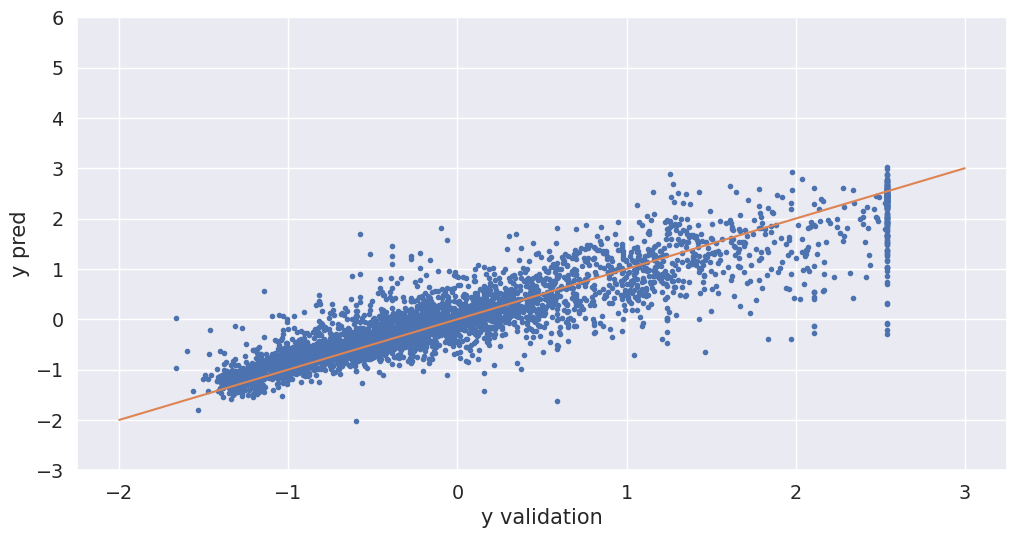

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


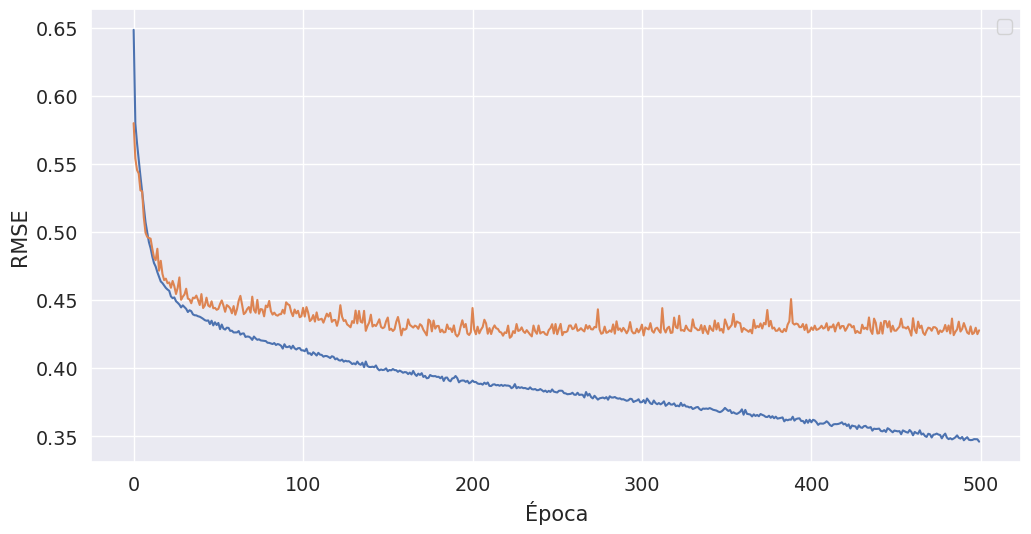

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 12s - loss: 0.8769

1920/6000 [========>.....................] - ETA: 0s - loss: 0.5918 

3904/6000 [==================>...........] - ETA: 0s - loss: 0.5010

5952/6000 [============================>.] - ETA: 0s - loss: 0.4606

6000/6000 [==============================] - 0s 49us/step - loss: 0.4606 - val_loss: 0.3840


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5024

1984/6000 [========>.....................] - ETA: 0s - loss: 0.3491

4000/6000 [===================>..........] - ETA: 0s - loss: 0.5107

6000/6000 [==============================] - 0s 35us/step - loss: 0.4580 - val_loss: 0.3033


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3291

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3201

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3218

6000/6000 [==============================] - 0s 35us/step - loss: 0.3243 - val_loss: 0.2853


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3144

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2886

6000/6000 [==============================] - 0s 35us/step - loss: 0.2793 - val_loss: 0.2502


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2536

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2589

6000/6000 [==============================] - 0s 35us/step - loss: 0.2462 - val_loss: 0.2441


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2367

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 35us/step - loss: 0.2510 - val_loss: 0.2524


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2803

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2752

6000/6000 [==============================] - 0s 35us/step - loss: 0.2677 - val_loss: 0.2388


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3091

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3671

3968/6000 [==================>...........] - ETA: 0s - loss: 0.3054

5920/6000 [============================>.] - ETA: 0s - loss: 0.2843

6000/6000 [==============================] - 0s 36us/step - loss: 0.2836 - val_loss: 0.2397


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2530

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2491

5920/6000 [============================>.] - ETA: 0s - loss: 0.2551

6000/6000 [==============================] - 0s 36us/step - loss: 0.2533 - val_loss: 0.2281


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2242

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 35us/step - loss: 0.2245 - val_loss: 0.2216


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2465

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2352

5856/6000 [============================>.] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 36us/step - loss: 0.2195 - val_loss: 0.2189


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0949

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2058

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2123

5952/6000 [============================>.] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 36us/step - loss: 0.2165 - val_loss: 0.2228


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1758

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2039

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2148

5888/6000 [============================>.] - ETA: 0s - loss: 0.2130

6000/6000 [==============================] - 0s 36us/step - loss: 0.2132 - val_loss: 0.2180


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2011

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 35us/step - loss: 0.2096 - val_loss: 0.2143


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0983

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2239

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2116

6000/6000 [==============================] - 0s 35us/step - loss: 0.2116 - val_loss: 0.2448


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2084

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2060

5920/6000 [============================>.] - ETA: 0s - loss: 0.2114

6000/6000 [==============================] - 0s 36us/step - loss: 0.2114 - val_loss: 0.2100


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2105

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2675

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2352

5952/6000 [============================>.] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 36us/step - loss: 0.2201 - val_loss: 0.2093


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3048

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2255

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2113

5952/6000 [============================>.] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 36us/step - loss: 0.2063 - val_loss: 0.2177


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1863

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2050

5984/6000 [============================>.] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 36us/step - loss: 0.2068 - val_loss: 0.2075


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4037

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2095

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2021

6000/6000 [==============================] - 0s 35us/step - loss: 0.1967 - val_loss: 0.2162


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2344

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1990

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2017

6000/6000 [==============================] - 0s 35us/step - loss: 0.1955 - val_loss: 0.2110


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2773

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1925

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1863

5888/6000 [============================>.] - ETA: 0s - loss: 0.2105

6000/6000 [==============================] - 0s 36us/step - loss: 0.2114 - val_loss: 0.2109


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2074

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1972

5952/6000 [============================>.] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 36us/step - loss: 0.1966 - val_loss: 0.2052


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2048

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1941

5984/6000 [============================>.] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 36us/step - loss: 0.1913 - val_loss: 0.2046


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1778

5824/6000 [============================>.] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 37us/step - loss: 0.1890 - val_loss: 0.2054


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1979

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1891

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 36us/step - loss: 0.1901 - val_loss: 0.2122


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2343

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1912

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1986

5888/6000 [============================>.] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 36us/step - loss: 0.1933 - val_loss: 0.2040


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1917

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1843

5824/6000 [============================>.] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 37us/step - loss: 0.1925 - val_loss: 0.2023


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2077

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1987

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 37us/step - loss: 0.1892 - val_loss: 0.2032


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5526

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2321

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2098

5952/6000 [============================>.] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 36us/step - loss: 0.1982 - val_loss: 0.1983


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2474

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1966

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 35us/step - loss: 0.1858 - val_loss: 0.2022


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2476

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1858

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 35us/step - loss: 0.1811 - val_loss: 0.2021


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1701

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1736

5984/6000 [============================>.] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 36us/step - loss: 0.1808 - val_loss: 0.2012


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2532

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1626

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 35us/step - loss: 0.1775 - val_loss: 0.1954


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1057

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1599

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1714

5824/6000 [============================>.] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 36us/step - loss: 0.1790 - val_loss: 0.1991


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2928

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1740

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1818

5888/6000 [============================>.] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 36us/step - loss: 0.1815 - val_loss: 0.1941


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1819

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1684

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1731

5888/6000 [============================>.] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 37us/step - loss: 0.1793 - val_loss: 0.2121


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1382

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1564

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1746

5952/6000 [============================>.] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 36us/step - loss: 0.1782 - val_loss: 0.1968


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1736

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 36us/step - loss: 0.1821 - val_loss: 0.2116


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2543

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1886

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1808

5920/6000 [============================>.] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 36us/step - loss: 0.1796 - val_loss: 0.2059


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1683

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1714

5952/6000 [============================>.] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 36us/step - loss: 0.1737 - val_loss: 0.2167


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2607

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1821

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1833

5920/6000 [============================>.] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 36us/step - loss: 0.1743 - val_loss: 0.1926


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1681

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1689

5824/6000 [============================>.] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 36us/step - loss: 0.1730 - val_loss: 0.2041


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1748

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 37us/step - loss: 0.1735 - val_loss: 0.2008


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0710

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1605

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1715

5888/6000 [============================>.] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 36us/step - loss: 0.1740 - val_loss: 0.1948


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0769

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1709

3776/6000 [=================>............] - ETA: 0s - loss: 0.1717

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 38us/step - loss: 0.1723 - val_loss: 0.1982


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1680

3616/6000 [=================>............] - ETA: 0s - loss: 0.1738

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 38us/step - loss: 0.1691 - val_loss: 0.1929


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1811

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1785

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 37us/step - loss: 0.1759 - val_loss: 0.1957


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1765

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1685

5856/6000 [============================>.] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 36us/step - loss: 0.1692 - val_loss: 0.1959


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1530

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1651

6000/6000 [==============================] - 0s 36us/step - loss: 0.1664 - val_loss: 0.1920


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1662

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1757

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1716

5920/6000 [============================>.] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 36us/step - loss: 0.1689 - val_loss: 0.1954


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1625

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 35us/step - loss: 0.1692 - val_loss: 0.1921


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2074

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1925

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1784

5952/6000 [============================>.] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 36us/step - loss: 0.1722 - val_loss: 0.1965


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1482

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1861

5824/6000 [============================>.] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 36us/step - loss: 0.1803 - val_loss: 0.1914


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2010

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1682

3712/6000 [=================>............] - ETA: 0s - loss: 0.1664

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 37us/step - loss: 0.1668 - val_loss: 0.1957


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1570

3776/6000 [=================>............] - ETA: 0s - loss: 0.1606

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 36us/step - loss: 0.1657 - val_loss: 0.2024


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1744

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1696

5984/6000 [============================>.] - ETA: 0s - loss: 0.1622

6000/6000 [==============================] - 0s 36us/step - loss: 0.1621 - val_loss: 0.1888


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1743

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1638

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1690

5984/6000 [============================>.] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 36us/step - loss: 0.1624 - val_loss: 0.2040


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1669

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 35us/step - loss: 0.1603 - val_loss: 0.1952


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1862

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1497

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1524

5920/6000 [============================>.] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 36us/step - loss: 0.1604 - val_loss: 0.1905


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1675

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 35us/step - loss: 0.1666 - val_loss: 0.1919


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1417

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1581

5856/6000 [============================>.] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 36us/step - loss: 0.1624 - val_loss: 0.1933


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1703

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1628

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1670

5952/6000 [============================>.] - ETA: 0s - loss: 0.1599

6000/6000 [==============================] - 0s 36us/step - loss: 0.1596 - val_loss: 0.1912


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1589

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1633

5888/6000 [============================>.] - ETA: 0s - loss: 0.1591

6000/6000 [==============================] - 0s 36us/step - loss: 0.1581 - val_loss: 0.1912


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1680

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1547

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 35us/step - loss: 0.1578 - val_loss: 0.2016


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1770

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1696

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 35us/step - loss: 0.1568 - val_loss: 0.1848


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2308

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1502

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 35us/step - loss: 0.1580 - val_loss: 0.1890


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1512

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 35us/step - loss: 0.1597 - val_loss: 0.1904


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1252

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1543

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1548

5952/6000 [============================>.] - ETA: 0s - loss: 0.1569

6000/6000 [==============================] - 0s 36us/step - loss: 0.1572 - val_loss: 0.2036


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0616

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1708

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1673

5856/6000 [============================>.] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 37us/step - loss: 0.1655 - val_loss: 0.1877


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1544

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1497

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 37us/step - loss: 0.1570 - val_loss: 0.1920


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0897

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1454

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1544

5920/6000 [============================>.] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 36us/step - loss: 0.1553 - val_loss: 0.1930


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1376

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 35us/step - loss: 0.1544 - val_loss: 0.1881


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2804

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1493

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 35us/step - loss: 0.1529 - val_loss: 0.1874


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2611

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1501

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 35us/step - loss: 0.1541 - val_loss: 0.1948


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1595

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1518

5888/6000 [============================>.] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 37us/step - loss: 0.1533 - val_loss: 0.1908


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1737

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1480

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1457

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1499

6000/6000 [==============================] - 0s 37us/step - loss: 0.1506 - val_loss: 0.2037


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2777

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1464

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1515

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 36us/step - loss: 0.1542 - val_loss: 0.1916


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0695

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1553

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1538

5984/6000 [============================>.] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 36us/step - loss: 0.1517 - val_loss: 0.1890


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0477

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1584

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 35us/step - loss: 0.1510 - val_loss: 0.1850


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1743

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1462

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1470

5888/6000 [============================>.] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 36us/step - loss: 0.1504 - val_loss: 0.1964


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3082

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1459

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1526

5824/6000 [============================>.] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 37us/step - loss: 0.1518 - val_loss: 0.1878


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1553

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1508

5984/6000 [============================>.] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 36us/step - loss: 0.1493 - val_loss: 0.1932


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1541

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 35us/step - loss: 0.1494 - val_loss: 0.1926


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1925

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1553

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1499

5888/6000 [============================>.] - ETA: 0s - loss: 0.1481

6000/6000 [==============================] - 0s 36us/step - loss: 0.1482 - val_loss: 0.1869


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0907

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1456

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1428

5888/6000 [============================>.] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 36us/step - loss: 0.1483 - val_loss: 0.1916


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1930

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1493

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 34us/step - loss: 0.1493 - val_loss: 0.1890


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1492

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 35us/step - loss: 0.1484 - val_loss: 0.1921


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1494

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 35us/step - loss: 0.1455 - val_loss: 0.1926


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4497

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1536

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1470

5888/6000 [============================>.] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 36us/step - loss: 0.1459 - val_loss: 0.1950


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6597

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1537

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1483

5856/6000 [============================>.] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 36us/step - loss: 0.1481 - val_loss: 0.2053


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1426

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1377

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 35us/step - loss: 0.1473 - val_loss: 0.1882


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2452

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1506

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1462

5856/6000 [============================>.] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 36us/step - loss: 0.1495 - val_loss: 0.1865


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1482

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1436

5856/6000 [============================>.] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 36us/step - loss: 0.1454 - val_loss: 0.1947


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0488

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1483

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1497

5888/6000 [============================>.] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 36us/step - loss: 0.1449 - val_loss: 0.1874


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1325

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1325

5824/6000 [============================>.] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 36us/step - loss: 0.1451 - val_loss: 0.1910


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1281

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1346

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 35us/step - loss: 0.1467 - val_loss: 0.1846


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1387

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 35us/step - loss: 0.1419 - val_loss: 0.1899


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1466

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 35us/step - loss: 0.1425 - val_loss: 0.1850


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1357

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 35us/step - loss: 0.1412 - val_loss: 0.1865


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1466

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 35us/step - loss: 0.1397 - val_loss: 0.1894


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2724

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1414

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 35us/step - loss: 0.1388 - val_loss: 0.1847


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2603

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1406

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 35us/step - loss: 0.1411 - val_loss: 0.1907


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0903

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1484

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 35us/step - loss: 0.1445 - val_loss: 0.1830


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1421

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 35us/step - loss: 0.1396 - val_loss: 0.1857


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1370

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1444

5984/6000 [============================>.] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 36us/step - loss: 0.1416 - val_loss: 0.1858


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1470

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 35us/step - loss: 0.1431 - val_loss: 0.1908


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1246

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1479

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1423

5920/6000 [============================>.] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 36us/step - loss: 0.1386 - val_loss: 0.1834


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1328

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 35us/step - loss: 0.1427 - val_loss: 0.1869


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0727

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1333

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 34us/step - loss: 0.1379 - val_loss: 0.1889


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1229

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1323

5856/6000 [============================>.] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 36us/step - loss: 0.1371 - val_loss: 0.1887


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1405

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1384

5952/6000 [============================>.] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 36us/step - loss: 0.1372 - val_loss: 0.1843


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1810

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1400

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 35us/step - loss: 0.1369 - val_loss: 0.1880


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0605

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1267

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1328

5952/6000 [============================>.] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 36us/step - loss: 0.1364 - val_loss: 0.1846


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0594

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1283

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1308

5952/6000 [============================>.] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 36us/step - loss: 0.1351 - val_loss: 0.1877


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1114

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1413

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 35us/step - loss: 0.1360 - val_loss: 0.1984


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1315

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 35us/step - loss: 0.1353 - val_loss: 0.1920


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1301

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 35us/step - loss: 0.1365 - val_loss: 0.1908


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1670

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1370

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 36us/step - loss: 0.1338 - val_loss: 0.1918


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1305

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1341

5952/6000 [============================>.] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 36us/step - loss: 0.1338 - val_loss: 0.1861


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1340

3712/6000 [=================>............] - ETA: 0s - loss: 0.1293

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 37us/step - loss: 0.1322 - val_loss: 0.1926


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1264

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1337

5984/6000 [============================>.] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 36us/step - loss: 0.1338 - val_loss: 0.1958


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1282

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 35us/step - loss: 0.1394 - val_loss: 0.1985


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1318

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 35us/step - loss: 0.1320 - val_loss: 0.1882


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1296

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 35us/step - loss: 0.1309 - val_loss: 0.1847


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1251

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 35us/step - loss: 0.1294 - val_loss: 0.1979


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1319

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 34us/step - loss: 0.1296 - val_loss: 0.1915


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1161

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1242

6000/6000 [==============================] - 0s 35us/step - loss: 0.1313 - val_loss: 0.1884


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1298

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 35us/step - loss: 0.1298 - val_loss: 0.1988


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1479

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 35us/step - loss: 0.1342 - val_loss: 0.1934


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1256

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1281

5984/6000 [============================>.] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 36us/step - loss: 0.1305 - val_loss: 0.1917


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1286

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1261

5984/6000 [============================>.] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 36us/step - loss: 0.1284 - val_loss: 0.1876


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1914

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1224

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 35us/step - loss: 0.1292 - val_loss: 0.1890


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1202

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 35us/step - loss: 0.1295 - val_loss: 0.1886


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1245

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 34us/step - loss: 0.1301 - val_loss: 0.1876


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1152

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 34us/step - loss: 0.1286 - val_loss: 0.1889


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1256

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1196

6000/6000 [==============================] - 0s 35us/step - loss: 0.1264 - val_loss: 0.1925


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2163

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1305

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1314

5952/6000 [============================>.] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 36us/step - loss: 0.1301 - val_loss: 0.1913


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1022

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1342

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1291

5920/6000 [============================>.] - ETA: 0s - loss: 0.1284

6000/6000 [==============================] - 0s 36us/step - loss: 0.1296 - val_loss: 0.1924


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1191

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 35us/step - loss: 0.1268 - val_loss: 0.1906


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1101

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1261

6000/6000 [==============================] - 0s 35us/step - loss: 0.1273 - val_loss: 0.1937


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1269

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1197

6000/6000 [==============================] - 0s 35us/step - loss: 0.1289 - val_loss: 0.1905


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1261

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1217

5920/6000 [============================>.] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 36us/step - loss: 0.1263 - val_loss: 0.1979


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1157

3680/6000 [=================>............] - ETA: 0s - loss: 0.1202

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 37us/step - loss: 0.1248 - val_loss: 0.1924


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1246

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1265

5888/6000 [============================>.] - ETA: 0s - loss: 0.1261

6000/6000 [==============================] - 0s 36us/step - loss: 0.1258 - val_loss: 0.1889


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1263

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1261

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 37us/step - loss: 0.1254 - val_loss: 0.1986


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1189

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1268

5856/6000 [============================>.] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 36us/step - loss: 0.1258 - val_loss: 0.1962


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3382

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1333

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 35us/step - loss: 0.1298 - val_loss: 0.1976


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0954

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1373

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1276

5984/6000 [============================>.] - ETA: 0s - loss: 0.1236

6000/6000 [==============================] - 0s 36us/step - loss: 0.1239 - val_loss: 0.1962


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1305

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1284

5984/6000 [============================>.] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 36us/step - loss: 0.1256 - val_loss: 0.1934


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2630

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1257

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1248

5824/6000 [============================>.] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 36us/step - loss: 0.1250 - val_loss: 0.1891


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1186

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1193

6000/6000 [==============================] - 0s 35us/step - loss: 0.1232 - val_loss: 0.1864


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1198

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1234

5824/6000 [============================>.] - ETA: 0s - loss: 0.1257

6000/6000 [==============================] - 0s 36us/step - loss: 0.1255 - val_loss: 0.1944


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1299

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 36us/step - loss: 0.1221 - val_loss: 0.1912


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1201

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1210

6000/6000 [==============================] - 0s 35us/step - loss: 0.1225 - val_loss: 0.2045


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0795

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1126

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1217

5920/6000 [============================>.] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 36us/step - loss: 0.1244 - val_loss: 0.1898


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1305

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1199

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1214

6000/6000 [==============================] - 0s 35us/step - loss: 0.1221 - val_loss: 0.1905


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1162

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1216

6000/6000 [==============================] - 0s 35us/step - loss: 0.1232 - val_loss: 0.2048


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1255

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1197

6000/6000 [==============================] - 0s 35us/step - loss: 0.1210 - val_loss: 0.1952


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1237

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1200

6000/6000 [==============================] - 0s 35us/step - loss: 0.1233 - val_loss: 0.1968


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1214

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1217

5984/6000 [============================>.] - ETA: 0s - loss: 0.1204

6000/6000 [==============================] - 0s 36us/step - loss: 0.1205 - val_loss: 0.1923


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0549

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1122

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1175

6000/6000 [==============================] - 0s 35us/step - loss: 0.1201 - val_loss: 0.1988


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1316

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1253

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1237

5984/6000 [============================>.] - ETA: 0s - loss: 0.1215

6000/6000 [==============================] - 0s 36us/step - loss: 0.1217 - val_loss: 0.1926


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3101

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1212

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1236

6000/6000 [==============================] - 0s 35us/step - loss: 0.1212 - val_loss: 0.1918


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1195

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1233

5888/6000 [============================>.] - ETA: 0s - loss: 0.1203

6000/6000 [==============================] - 0s 36us/step - loss: 0.1197 - val_loss: 0.1929


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1143

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1152

5856/6000 [============================>.] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 36us/step - loss: 0.1336 - val_loss: 0.2107


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1007

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1208

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 35us/step - loss: 0.1228 - val_loss: 0.1897


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1033

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1189

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1180

5952/6000 [============================>.] - ETA: 0s - loss: 0.1187

6000/6000 [==============================] - 0s 36us/step - loss: 0.1185 - val_loss: 0.1935


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1296

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1240

5856/6000 [============================>.] - ETA: 0s - loss: 0.1187

6000/6000 [==============================] - 0s 36us/step - loss: 0.1193 - val_loss: 0.2006


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1098

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1070

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1120

6000/6000 [==============================] - 0s 35us/step - loss: 0.1183 - val_loss: 0.1932


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1167

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1211

5920/6000 [============================>.] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 36us/step - loss: 0.1203 - val_loss: 0.1945


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1189

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1077

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1195

5952/6000 [============================>.] - ETA: 0s - loss: 0.1173

6000/6000 [==============================] - 0s 36us/step - loss: 0.1168 - val_loss: 0.1902


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1176

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1168

5920/6000 [============================>.] - ETA: 0s - loss: 0.1168

6000/6000 [==============================] - 0s 36us/step - loss: 0.1174 - val_loss: 0.1978


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0871

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1222

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1189

5952/6000 [============================>.] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 36us/step - loss: 0.1200 - val_loss: 0.1987


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0638

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1046

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1151

5888/6000 [============================>.] - ETA: 0s - loss: 0.1166

6000/6000 [==============================] - 0s 36us/step - loss: 0.1158 - val_loss: 0.1915


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1093

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1159

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1172

6000/6000 [==============================] - 0s 37us/step - loss: 0.1165 - val_loss: 0.1933


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1146

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1158

5824/6000 [============================>.] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 36us/step - loss: 0.1192 - val_loss: 0.1947


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1117

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1186

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1157

6000/6000 [==============================] - 0s 37us/step - loss: 0.1156 - val_loss: 0.1982


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1083

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1179

5824/6000 [============================>.] - ETA: 0s - loss: 0.1174

6000/6000 [==============================] - 0s 37us/step - loss: 0.1181 - val_loss: 0.1978


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1106

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1115

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1170

6000/6000 [==============================] - 0s 37us/step - loss: 0.1165 - val_loss: 0.1878


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1117

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1148

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1189

6000/6000 [==============================] - 0s 37us/step - loss: 0.1183 - val_loss: 0.1966


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1307

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1232

5856/6000 [============================>.] - ETA: 0s - loss: 0.1242

6000/6000 [==============================] - 0s 36us/step - loss: 0.1239 - val_loss: 0.1963


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2034

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1182

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1181

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1167

6000/6000 [==============================] - 0s 37us/step - loss: 0.1176 - val_loss: 0.1939


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0787

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1244

3648/6000 [=================>............] - ETA: 0s - loss: 0.1190

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1150

6000/6000 [==============================] - 0s 38us/step - loss: 0.1150 - val_loss: 0.1936


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1181

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1136

5824/6000 [============================>.] - ETA: 0s - loss: 0.1151

6000/6000 [==============================] - 0s 37us/step - loss: 0.1156 - val_loss: 0.1954


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0450

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1050

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1104

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1154

6000/6000 [==============================] - 0s 37us/step - loss: 0.1143 - val_loss: 0.1949


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1112

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1160

6000/6000 [==============================] - 0s 35us/step - loss: 0.1132 - val_loss: 0.1971


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1009

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1019

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1145

5824/6000 [============================>.] - ETA: 0s - loss: 0.1150

6000/6000 [==============================] - 0s 36us/step - loss: 0.1157 - val_loss: 0.1948


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1031

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1100

5984/6000 [============================>.] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 36us/step - loss: 0.1141 - val_loss: 0.2095


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1052

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 35us/step - loss: 0.1139 - val_loss: 0.1976


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2346

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1174

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1148

5824/6000 [============================>.] - ETA: 0s - loss: 0.1139

6000/6000 [==============================] - 0s 37us/step - loss: 0.1133 - val_loss: 0.1939


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0832

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1148

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1106

5984/6000 [============================>.] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 36us/step - loss: 0.1131 - val_loss: 0.1992


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0748

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1036

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1091

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1141

6000/6000 [==============================] - 0s 37us/step - loss: 0.1132 - val_loss: 0.1976


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1101

3776/6000 [=================>............] - ETA: 0s - loss: 0.1166

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 37us/step - loss: 0.1137 - val_loss: 0.1988


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1078

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1137

5856/6000 [============================>.] - ETA: 0s - loss: 0.1124

6000/6000 [==============================] - 0s 36us/step - loss: 0.1121 - val_loss: 0.2001


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1147

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1130

5824/6000 [============================>.] - ETA: 0s - loss: 0.1152

6000/6000 [==============================] - 0s 36us/step - loss: 0.1148 - val_loss: 0.2038


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1157

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1159

6000/6000 [==============================] - 0s 35us/step - loss: 0.1139 - val_loss: 0.1963


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0574

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1128

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1158

6000/6000 [==============================] - 0s 35us/step - loss: 0.1117 - val_loss: 0.1923


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1090

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1139

5952/6000 [============================>.] - ETA: 0s - loss: 0.1116

6000/6000 [==============================] - 0s 36us/step - loss: 0.1118 - val_loss: 0.1983


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1002

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1062

5984/6000 [============================>.] - ETA: 0s - loss: 0.1111

6000/6000 [==============================] - 0s 36us/step - loss: 0.1109 - val_loss: 0.2003


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0423

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1209

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1158

6000/6000 [==============================] - 0s 35us/step - loss: 0.1110 - val_loss: 0.1953


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1103

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1079

5952/6000 [============================>.] - ETA: 0s - loss: 0.1099

6000/6000 [==============================] - 0s 36us/step - loss: 0.1099 - val_loss: 0.2104


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1189

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1160

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1151

6000/6000 [==============================] - 0s 35us/step - loss: 0.1114 - val_loss: 0.2079


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0804

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1075

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1101

5856/6000 [============================>.] - ETA: 0s - loss: 0.1106

6000/6000 [==============================] - 0s 36us/step - loss: 0.1119 - val_loss: 0.1981


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2320

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1034

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1118

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1116

6000/6000 [==============================] - 0s 37us/step - loss: 0.1113 - val_loss: 0.1981


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0694

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1084

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1112

5888/6000 [============================>.] - ETA: 0s - loss: 0.1094

6000/6000 [==============================] - 0s 36us/step - loss: 0.1098 - val_loss: 0.2044


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1235

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1138

5984/6000 [============================>.] - ETA: 0s - loss: 0.1126

6000/6000 [==============================] - 0s 36us/step - loss: 0.1127 - val_loss: 0.2013


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0903

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1057

5920/6000 [============================>.] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 36us/step - loss: 0.1093 - val_loss: 0.1976


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1137

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1130

5824/6000 [============================>.] - ETA: 0s - loss: 0.1100

6000/6000 [==============================] - 0s 37us/step - loss: 0.1094 - val_loss: 0.2079


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0638

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1086

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1114

5984/6000 [============================>.] - ETA: 0s - loss: 0.1107

6000/6000 [==============================] - 0s 36us/step - loss: 0.1106 - val_loss: 0.2114


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1150

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1128

5856/6000 [============================>.] - ETA: 0s - loss: 0.1102

6000/6000 [==============================] - 0s 36us/step - loss: 0.1100 - val_loss: 0.2032


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1049

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1063

5920/6000 [============================>.] - ETA: 0s - loss: 0.1106

6000/6000 [==============================] - 0s 36us/step - loss: 0.1107 - val_loss: 0.1971


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0622

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1095

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1109

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1113

6000/6000 [==============================] - 0s 37us/step - loss: 0.1112 - val_loss: 0.2062


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1204

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1186

6000/6000 [==============================] - 0s 35us/step - loss: 0.1172 - val_loss: 0.1974


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0488

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1052

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1106

6000/6000 [==============================] - 0s 35us/step - loss: 0.1167 - val_loss: 0.2061


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1012

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 35us/step - loss: 0.1108 - val_loss: 0.1925


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1074

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1163

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1101

5888/6000 [============================>.] - ETA: 0s - loss: 0.1078

6000/6000 [==============================] - 0s 36us/step - loss: 0.1082 - val_loss: 0.1954


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1020

3776/6000 [=================>............] - ETA: 0s - loss: 0.1087

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1084

6000/6000 [==============================] - 0s 37us/step - loss: 0.1074 - val_loss: 0.1985


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0988

3776/6000 [=================>............] - ETA: 0s - loss: 0.1014

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1073

6000/6000 [==============================] - 0s 37us/step - loss: 0.1073 - val_loss: 0.1962


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1009

3616/6000 [=================>............] - ETA: 0s - loss: 0.1075

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1078

6000/6000 [==============================] - 0s 38us/step - loss: 0.1069 - val_loss: 0.2013


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2151

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1001

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1017

5888/6000 [============================>.] - ETA: 0s - loss: 0.1047

6000/6000 [==============================] - 0s 37us/step - loss: 0.1061 - val_loss: 0.2018


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1074

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1071

6000/6000 [==============================] - 0s 36us/step - loss: 0.1085 - val_loss: 0.1972


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0536

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1006

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1006

5920/6000 [============================>.] - ETA: 0s - loss: 0.1056

6000/6000 [==============================] - 0s 36us/step - loss: 0.1064 - val_loss: 0.2003


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0438

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1136

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1113

6000/6000 [==============================] - 0s 35us/step - loss: 0.1104 - val_loss: 0.2095


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1105

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1112

6000/6000 [==============================] - 0s 35us/step - loss: 0.1098 - val_loss: 0.2108


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0975

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1010

5984/6000 [============================>.] - ETA: 0s - loss: 0.1060

6000/6000 [==============================] - 0s 36us/step - loss: 0.1060 - val_loss: 0.2033


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1005

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1043

5920/6000 [============================>.] - ETA: 0s - loss: 0.1077

6000/6000 [==============================] - 0s 36us/step - loss: 0.1075 - val_loss: 0.2010


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1069

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1070

5984/6000 [============================>.] - ETA: 0s - loss: 0.1070

6000/6000 [==============================] - 0s 36us/step - loss: 0.1070 - val_loss: 0.1967


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1095

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1057

6000/6000 [==============================] - 0s 34us/step - loss: 0.1053 - val_loss: 0.1995


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1005

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1023

5888/6000 [============================>.] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 36us/step - loss: 0.1033 - val_loss: 0.2194


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1010

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1036

5984/6000 [============================>.] - ETA: 0s - loss: 0.1054

6000/6000 [==============================] - 0s 36us/step - loss: 0.1056 - val_loss: 0.2032


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1137

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1087

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1066

6000/6000 [==============================] - 0s 35us/step - loss: 0.1067 - val_loss: 0.2034


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1003

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1035

5952/6000 [============================>.] - ETA: 0s - loss: 0.1047

6000/6000 [==============================] - 0s 36us/step - loss: 0.1043 - val_loss: 0.1972


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1024

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1044

6000/6000 [==============================] - 0s 35us/step - loss: 0.1036 - val_loss: 0.2075


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0966

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1027

6000/6000 [==============================] - 0s 35us/step - loss: 0.1041 - val_loss: 0.2099


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1001

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 35us/step - loss: 0.1051 - val_loss: 0.2089


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0983

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1031

6000/6000 [==============================] - 0s 35us/step - loss: 0.1035 - val_loss: 0.2071


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0972

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1018

6000/6000 [==============================] - 0s 35us/step - loss: 0.1034 - val_loss: 0.2051


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0622

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0950

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 35us/step - loss: 0.1025 - val_loss: 0.2037


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1049

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1047

5952/6000 [============================>.] - ETA: 0s - loss: 0.1043

6000/6000 [==============================] - 0s 36us/step - loss: 0.1039 - val_loss: 0.2016


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0973

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1012

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1024

6000/6000 [==============================] - 0s 37us/step - loss: 0.1025 - val_loss: 0.2027


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1093

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1088

6000/6000 [==============================] - 0s 35us/step - loss: 0.1043 - val_loss: 0.1996


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0614

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0997

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1031

6000/6000 [==============================] - 0s 35us/step - loss: 0.1032 - val_loss: 0.2059


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0990

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1018

6000/6000 [==============================] - 0s 35us/step - loss: 0.1045 - val_loss: 0.2075


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1057

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1039

5984/6000 [============================>.] - ETA: 0s - loss: 0.1029

6000/6000 [==============================] - 0s 36us/step - loss: 0.1029 - val_loss: 0.2048


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0986

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1012

6000/6000 [==============================] - 0s 34us/step - loss: 0.1024 - val_loss: 0.2054


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0986

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1037

6000/6000 [==============================] - 0s 35us/step - loss: 0.1031 - val_loss: 0.2169


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0986

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1020

5984/6000 [============================>.] - ETA: 0s - loss: 0.1058

6000/6000 [==============================] - 0s 36us/step - loss: 0.1058 - val_loss: 0.2060


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0977

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1035

5888/6000 [============================>.] - ETA: 0s - loss: 0.1031

6000/6000 [==============================] - 0s 36us/step - loss: 0.1030 - val_loss: 0.1994


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1588

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0965

3744/6000 [=================>............] - ETA: 0s - loss: 0.0966

5664/6000 [===========================>..] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 37us/step - loss: 0.1009 - val_loss: 0.2113


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1939

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0899

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0975

6000/6000 [==============================] - 0s 35us/step - loss: 0.1032 - val_loss: 0.2165


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1050

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1044

5952/6000 [============================>.] - ETA: 0s - loss: 0.1013

6000/6000 [==============================] - 0s 36us/step - loss: 0.1011 - val_loss: 0.2039


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1037

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1025

5984/6000 [============================>.] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 36us/step - loss: 0.1003 - val_loss: 0.1996


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1074

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0949

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0996

5952/6000 [============================>.] - ETA: 0s - loss: 0.1020

6000/6000 [==============================] - 0s 36us/step - loss: 0.1016 - val_loss: 0.2137


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0489

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0982

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0969

5824/6000 [============================>.] - ETA: 0s - loss: 0.1005

6000/6000 [==============================] - 0s 36us/step - loss: 0.1012 - val_loss: 0.2089


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0610

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1017

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1025

5920/6000 [============================>.] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 36us/step - loss: 0.1005 - val_loss: 0.2003


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0543

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0942

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1001

5920/6000 [============================>.] - ETA: 0s - loss: 0.1033

6000/6000 [==============================] - 0s 36us/step - loss: 0.1030 - val_loss: 0.2138


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0979

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1045

5984/6000 [============================>.] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 36us/step - loss: 0.1029 - val_loss: 0.2049


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0985

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1024

5952/6000 [============================>.] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 36us/step - loss: 0.0983 - val_loss: 0.2157


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1031

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1034

6000/6000 [==============================] - 0s 35us/step - loss: 0.0990 - val_loss: 0.2149


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0980

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1020

6000/6000 [==============================] - 0s 35us/step - loss: 0.0990 - val_loss: 0.2046


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1004

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0981

6000/6000 [==============================] - 0s 35us/step - loss: 0.0994 - val_loss: 0.2065


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0561

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1006

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1020

5856/6000 [============================>.] - ETA: 0s - loss: 0.1001

6000/6000 [==============================] - 0s 36us/step - loss: 0.1010 - val_loss: 0.2038


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0607

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0987

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0978

6000/6000 [==============================] - 0s 35us/step - loss: 0.0984 - val_loss: 0.2074


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0962

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0992

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 37us/step - loss: 0.1001 - val_loss: 0.1991


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0918

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0958

5856/6000 [============================>.] - ETA: 0s - loss: 0.0980

6000/6000 [==============================] - 0s 37us/step - loss: 0.0978 - val_loss: 0.2031


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0919

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1004

5920/6000 [============================>.] - ETA: 0s - loss: 0.1023

6000/6000 [==============================] - 0s 36us/step - loss: 0.1021 - val_loss: 0.2058


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0970

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0991

5888/6000 [============================>.] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 36us/step - loss: 0.0990 - val_loss: 0.2033


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1351

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0995

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0977

6000/6000 [==============================] - 0s 35us/step - loss: 0.0989 - val_loss: 0.2070


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0973

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1004

6000/6000 [==============================] - 0s 35us/step - loss: 0.0985 - val_loss: 0.2094


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0984

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0960

5984/6000 [============================>.] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 36us/step - loss: 0.0984 - val_loss: 0.2065


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0991

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0956

5920/6000 [============================>.] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 36us/step - loss: 0.0970 - val_loss: 0.2059


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0633

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0923

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0930

5824/6000 [============================>.] - ETA: 0s - loss: 0.0987

6000/6000 [==============================] - 0s 36us/step - loss: 0.0982 - val_loss: 0.2052


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0976

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0985

5920/6000 [============================>.] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 36us/step - loss: 0.0995 - val_loss: 0.2197


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1002

3584/6000 [================>.............] - ETA: 0s - loss: 0.0964

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0982

6000/6000 [==============================] - 0s 38us/step - loss: 0.0986 - val_loss: 0.2095


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1010

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0916

5888/6000 [============================>.] - ETA: 0s - loss: 0.0958

6000/6000 [==============================] - 0s 36us/step - loss: 0.0961 - val_loss: 0.2075


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0845

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 35us/step - loss: 0.0968 - val_loss: 0.2080


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0827

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0900

3776/6000 [=================>............] - ETA: 0s - loss: 0.0923

5696/6000 [===========================>..] - ETA: 0s - loss: 0.0939

6000/6000 [==============================] - 0s 37us/step - loss: 0.0959 - val_loss: 0.2066


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0896

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 35us/step - loss: 0.0970 - val_loss: 0.2078


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0950

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0961

6000/6000 [==============================] - 0s 35us/step - loss: 0.0978 - val_loss: 0.2059


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0899

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0955

6000/6000 [==============================] - 0s 35us/step - loss: 0.0971 - val_loss: 0.2093


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1111

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1020

5888/6000 [============================>.] - ETA: 0s - loss: 0.0988

6000/6000 [==============================] - 0s 36us/step - loss: 0.0983 - val_loss: 0.2092


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1054

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1214

5952/6000 [============================>.] - ETA: 0s - loss: 0.1126

6000/6000 [==============================] - 0s 36us/step - loss: 0.1126 - val_loss: 0.2092


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0941

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1018

5856/6000 [============================>.] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 36us/step - loss: 0.0996 - val_loss: 0.2099


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0891

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 35us/step - loss: 0.0982 - val_loss: 0.2015


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1718

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0947

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0968

6000/6000 [==============================] - 0s 35us/step - loss: 0.1028 - val_loss: 0.2136


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1201

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1147

6000/6000 [==============================] - 0s 35us/step - loss: 0.1099 - val_loss: 0.2058


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0999

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1080

6000/6000 [==============================] - 0s 35us/step - loss: 0.1054 - val_loss: 0.2017


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0996

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0954

5952/6000 [============================>.] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 36us/step - loss: 0.1036 - val_loss: 0.2046


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0703

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0853

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1014

5888/6000 [============================>.] - ETA: 0s - loss: 0.1046

6000/6000 [==============================] - 0s 36us/step - loss: 0.1039 - val_loss: 0.2039


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1124

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1029

5920/6000 [============================>.] - ETA: 0s - loss: 0.1017

6000/6000 [==============================] - 0s 36us/step - loss: 0.1014 - val_loss: 0.2111


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1323

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0949

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0925

5824/6000 [============================>.] - ETA: 0s - loss: 0.0954

6000/6000 [==============================] - 0s 36us/step - loss: 0.0958 - val_loss: 0.2035


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0603

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0879

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0936

6000/6000 [==============================] - 0s 35us/step - loss: 0.0945 - val_loss: 0.2222


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0936

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0929

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0962

6000/6000 [==============================] - 0s 37us/step - loss: 0.0960 - val_loss: 0.2058


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0951

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0929

6000/6000 [==============================] - 0s 35us/step - loss: 0.0953 - val_loss: 0.2042


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0466

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0927

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0922

5984/6000 [============================>.] - ETA: 0s - loss: 0.0945

6000/6000 [==============================] - 0s 36us/step - loss: 0.0944 - val_loss: 0.2022


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1028

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0942

6000/6000 [==============================] - 0s 35us/step - loss: 0.0947 - val_loss: 0.2177


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0924

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0897

6000/6000 [==============================] - 0s 35us/step - loss: 0.0935 - val_loss: 0.2215


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1032

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 35us/step - loss: 0.0961 - val_loss: 0.2077


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0822

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0903

5920/6000 [============================>.] - ETA: 0s - loss: 0.0935

6000/6000 [==============================] - 0s 36us/step - loss: 0.0939 - val_loss: 0.2145


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0905

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0922

5824/6000 [============================>.] - ETA: 0s - loss: 0.0937

6000/6000 [==============================] - 0s 36us/step - loss: 0.0937 - val_loss: 0.2144


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0896

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0950

6000/6000 [==============================] - 0s 35us/step - loss: 0.0953 - val_loss: 0.2039


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0546

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0912

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 35us/step - loss: 0.0929 - val_loss: 0.2142


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0924

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0958

6000/6000 [==============================] - 0s 35us/step - loss: 0.0948 - val_loss: 0.2071


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0977

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0971

5888/6000 [============================>.] - ETA: 0s - loss: 0.0965

6000/6000 [==============================] - 0s 36us/step - loss: 0.0968 - val_loss: 0.2071


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0900

3680/6000 [=================>............] - ETA: 0s - loss: 0.0930

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 38us/step - loss: 0.0920 - val_loss: 0.2083


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0942

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0930

5856/6000 [============================>.] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 37us/step - loss: 0.0927 - val_loss: 0.2086


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0844

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0909

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0935

6000/6000 [==============================] - 0s 37us/step - loss: 0.0939 - val_loss: 0.2063


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0907

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0847

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 35us/step - loss: 0.0952 - val_loss: 0.2061


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0875

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 35us/step - loss: 0.0936 - val_loss: 0.2167


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0651

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0885

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0928

6000/6000 [==============================] - 0s 35us/step - loss: 0.0941 - val_loss: 0.2074


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0954

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 35us/step - loss: 0.0937 - val_loss: 0.2059


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0977

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0905

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0924

6000/6000 [==============================] - 0s 35us/step - loss: 0.0923 - val_loss: 0.2150


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1483

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0950

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0931

6000/6000 [==============================] - 0s 35us/step - loss: 0.0947 - val_loss: 0.2112


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0917

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0932

6000/6000 [==============================] - 0s 35us/step - loss: 0.0939 - val_loss: 0.2155


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0760

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0885

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 35us/step - loss: 0.0908 - val_loss: 0.2205


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0893

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0895

5920/6000 [============================>.] - ETA: 0s - loss: 0.0901

6000/6000 [==============================] - 0s 36us/step - loss: 0.0904 - val_loss: 0.2098


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0822

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0900

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0871

6000/6000 [==============================] - 0s 35us/step - loss: 0.0918 - val_loss: 0.2127


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0636

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0889

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 35us/step - loss: 0.0927 - val_loss: 0.2109


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0949

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 35us/step - loss: 0.0951 - val_loss: 0.2151


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0403

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0835

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 35us/step - loss: 0.0914 - val_loss: 0.2166


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2716

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0923

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 35us/step - loss: 0.0930 - val_loss: 0.2108


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0846

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 35us/step - loss: 0.0907 - val_loss: 0.2107


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0857

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0861

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0890

6000/6000 [==============================] - 0s 35us/step - loss: 0.0914 - val_loss: 0.2160


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0936

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 35us/step - loss: 0.0913 - val_loss: 0.2106


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0903

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0886

6000/6000 [==============================] - 0s 35us/step - loss: 0.0917 - val_loss: 0.2153


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0924

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0974

6000/6000 [==============================] - 0s 35us/step - loss: 0.0937 - val_loss: 0.2107


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0656

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0912

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 35us/step - loss: 0.0901 - val_loss: 0.2094


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0354

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0870

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0890

5856/6000 [============================>.] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 36us/step - loss: 0.0895 - val_loss: 0.2073


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0557

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0881

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0914

5920/6000 [============================>.] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 36us/step - loss: 0.0902 - val_loss: 0.2160


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0890

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0853

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 37us/step - loss: 0.0908 - val_loss: 0.2113


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0547

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0893

3808/6000 [==================>...........] - ETA: 0s - loss: 0.0914

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 37us/step - loss: 0.0924 - val_loss: 0.2181


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0565

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0949

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0935

6000/6000 [==============================] - 0s 35us/step - loss: 0.0910 - val_loss: 0.2135


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0801

3680/6000 [=================>............] - ETA: 0s - loss: 0.0832

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 38us/step - loss: 0.0902 - val_loss: 0.2110


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0901

3808/6000 [==================>...........] - ETA: 0s - loss: 0.0913

5888/6000 [============================>.] - ETA: 0s - loss: 0.0910

6000/6000 [==============================] - 0s 36us/step - loss: 0.0907 - val_loss: 0.2146


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1281

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0871

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 35us/step - loss: 0.0887 - val_loss: 0.2098


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1451

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0897

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 35us/step - loss: 0.0899 - val_loss: 0.2081


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0941

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0882

5888/6000 [============================>.] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 36us/step - loss: 0.0901 - val_loss: 0.2115


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0752

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0810

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 35us/step - loss: 0.0886 - val_loss: 0.2094


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0937

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0929

5984/6000 [============================>.] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 36us/step - loss: 0.0913 - val_loss: 0.2092


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0954

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0902

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0924

6000/6000 [==============================] - 0s 37us/step - loss: 0.0915 - val_loss: 0.2179


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0878

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 35us/step - loss: 0.0896 - val_loss: 0.2165


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1127

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0867

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 35us/step - loss: 0.0911 - val_loss: 0.2151


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0847

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 35us/step - loss: 0.0881 - val_loss: 0.2268


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0865

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0848

5984/6000 [============================>.] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 36us/step - loss: 0.0880 - val_loss: 0.2166


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0540

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0876

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 35us/step - loss: 0.0911 - val_loss: 0.2198


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0361

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0836

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0907

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 37us/step - loss: 0.0907 - val_loss: 0.2161


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0588

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0912

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0894

6000/6000 [==============================] - 0s 35us/step - loss: 0.0916 - val_loss: 0.2109


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1044

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0850

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0909

5984/6000 [============================>.] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 36us/step - loss: 0.0904 - val_loss: 0.2118


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0855

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 35us/step - loss: 0.0899 - val_loss: 0.2110


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2676

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0907

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 35us/step - loss: 0.0881 - val_loss: 0.2102


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1029

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0834

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 35us/step - loss: 0.0858 - val_loss: 0.2126


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0757

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0855

5952/6000 [============================>.] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 36us/step - loss: 0.0862 - val_loss: 0.2095


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0841

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 34us/step - loss: 0.0872 - val_loss: 0.2186


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0788

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0826

6000/6000 [==============================] - 0s 35us/step - loss: 0.0869 - val_loss: 0.2094


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1005

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0832

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0853

5888/6000 [============================>.] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 36us/step - loss: 0.0877 - val_loss: 0.2193


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0801

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0815

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 37us/step - loss: 0.0887 - val_loss: 0.2153


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0814

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0865

5984/6000 [============================>.] - ETA: 0s - loss: 0.0895

6000/6000 [==============================] - 0s 36us/step - loss: 0.0894 - val_loss: 0.2133


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0883

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0839

5920/6000 [============================>.] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 36us/step - loss: 0.0880 - val_loss: 0.2176


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0905

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0855

5920/6000 [============================>.] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 36us/step - loss: 0.0865 - val_loss: 0.2197


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0799

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0817

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 35us/step - loss: 0.0875 - val_loss: 0.2145


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0855

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0822

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 36us/step - loss: 0.0887 - val_loss: 0.2223


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0377

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0947

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 35us/step - loss: 0.0890 - val_loss: 0.2191


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0830

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 35us/step - loss: 0.0864 - val_loss: 0.2155


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0677

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0753

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0823

6000/6000 [==============================] - 0s 35us/step - loss: 0.0860 - val_loss: 0.2118


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0332

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0732

3776/6000 [=================>............] - ETA: 0s - loss: 0.0799

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0849

6000/6000 [==============================] - 0s 37us/step - loss: 0.0857 - val_loss: 0.2225


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0805

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0776

5856/6000 [============================>.] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 36us/step - loss: 0.0851 - val_loss: 0.2170


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0847

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0836

5920/6000 [============================>.] - ETA: 0s - loss: 0.0867

6000/6000 [==============================] - 0s 36us/step - loss: 0.0864 - val_loss: 0.2200


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0507

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0879

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0869

5920/6000 [============================>.] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 36us/step - loss: 0.0873 - val_loss: 0.2319


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0831

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0849

5984/6000 [============================>.] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 36us/step - loss: 0.0865 - val_loss: 0.2103


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0793

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 35us/step - loss: 0.0879 - val_loss: 0.2177


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0432

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0859

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 35us/step - loss: 0.0881 - val_loss: 0.2106


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0750

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0810

5920/6000 [============================>.] - ETA: 0s - loss: 0.0849

6000/6000 [==============================] - 0s 36us/step - loss: 0.0849 - val_loss: 0.2165


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0788

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0869

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0842

5984/6000 [============================>.] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 36us/step - loss: 0.0851 - val_loss: 0.2138


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0717

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0819

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 35us/step - loss: 0.0880 - val_loss: 0.2086


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0181

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0832

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 35us/step - loss: 0.0844 - val_loss: 0.2151


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0852

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 35us/step - loss: 0.0846 - val_loss: 0.2163


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0758

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0820

5984/6000 [============================>.] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 36us/step - loss: 0.0840 - val_loss: 0.2205


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0536

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0819

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0831

5920/6000 [============================>.] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 36us/step - loss: 0.0838 - val_loss: 0.2179


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0783

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0825

5824/6000 [============================>.] - ETA: 0s - loss: 0.0847

6000/6000 [==============================] - 0s 36us/step - loss: 0.0841 - val_loss: 0.2170


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0479

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0906

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 35us/step - loss: 0.0862 - val_loss: 0.2244


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0381

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1162

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1038

6000/6000 [==============================] - 0s 35us/step - loss: 0.0971 - val_loss: 0.2110


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0491

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0798

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 35us/step - loss: 0.0841 - val_loss: 0.2185


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0784

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0899

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0876

5920/6000 [============================>.] - ETA: 0s - loss: 0.0857

6000/6000 [==============================] - 0s 36us/step - loss: 0.0856 - val_loss: 0.2192


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1896

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0863

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 35us/step - loss: 0.0838 - val_loss: 0.2150


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0846

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 35us/step - loss: 0.0846 - val_loss: 0.2180


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0781

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 34us/step - loss: 0.0843 - val_loss: 0.2175


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1080

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0794

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 35us/step - loss: 0.0848 - val_loss: 0.2165


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0797

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 35us/step - loss: 0.0848 - val_loss: 0.2182


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0659

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0793

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0820

5888/6000 [============================>.] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 36us/step - loss: 0.0842 - val_loss: 0.2211


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0456

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0709

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0803

5984/6000 [============================>.] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 36us/step - loss: 0.0838 - val_loss: 0.2152


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0831

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0848

5856/6000 [============================>.] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 36us/step - loss: 0.0834 - val_loss: 0.2210


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0816

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0811

5824/6000 [============================>.] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 36us/step - loss: 0.0811 - val_loss: 0.2207


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0883

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0866

5856/6000 [============================>.] - ETA: 0s - loss: 0.0848

6000/6000 [==============================] - 0s 36us/step - loss: 0.0847 - val_loss: 0.2143


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0576

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0776

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0804

5920/6000 [============================>.] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 36us/step - loss: 0.0828 - val_loss: 0.2192


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0813

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 35us/step - loss: 0.0823 - val_loss: 0.2246


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0413

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0888

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0855

6000/6000 [==============================] - 0s 34us/step - loss: 0.0851 - val_loss: 0.2216


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0786

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0797

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 37us/step - loss: 0.0827 - val_loss: 0.2143


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0712

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0798

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0808

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 37us/step - loss: 0.0822 - val_loss: 0.2218


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0591

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0877

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0838

5920/6000 [============================>.] - ETA: 0s - loss: 0.0828

6000/6000 [==============================] - 0s 36us/step - loss: 0.0830 - val_loss: 0.2125


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0753

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0750

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0810

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 36us/step - loss: 0.0839 - val_loss: 0.2142


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1460

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0815

3712/6000 [=================>............] - ETA: 0s - loss: 0.0838

5632/6000 [===========================>..] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 37us/step - loss: 0.0818 - val_loss: 0.2086


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0800

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0814

5824/6000 [============================>.] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 36us/step - loss: 0.0829 - val_loss: 0.2177


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0544

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0755

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0807

5824/6000 [============================>.] - ETA: 0s - loss: 0.0811

6000/6000 [==============================] - 0s 37us/step - loss: 0.0810 - val_loss: 0.2219


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1338

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0835

3584/6000 [================>.............] - ETA: 0s - loss: 0.0806

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 39us/step - loss: 0.0815 - val_loss: 0.2193


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0915

3584/6000 [================>.............] - ETA: 0s - loss: 0.0875

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 39us/step - loss: 0.0819 - val_loss: 0.2168


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0772

3520/6000 [================>.............] - ETA: 0s - loss: 0.0829

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0834

6000/6000 [==============================] - 0s 39us/step - loss: 0.0842 - val_loss: 0.2185


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0817

3520/6000 [================>.............] - ETA: 0s - loss: 0.0852

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 38us/step - loss: 0.0816 - val_loss: 0.2136


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0465

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0864

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0835

5984/6000 [============================>.] - ETA: 0s - loss: 0.0811

6000/6000 [==============================] - 0s 36us/step - loss: 0.0810 - val_loss: 0.2182


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0805

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0781

5888/6000 [============================>.] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 36us/step - loss: 0.0809 - val_loss: 0.2239


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0811

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 36us/step - loss: 0.0809 - val_loss: 0.2169


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0811

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0829

5696/6000 [===========================>..] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 37us/step - loss: 0.0812 - val_loss: 0.2179


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0779

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0784

5824/6000 [============================>.] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 37us/step - loss: 0.0817 - val_loss: 0.2192


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0405

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0788

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0816

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 37us/step - loss: 0.0801 - val_loss: 0.2185


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0829

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 35us/step - loss: 0.0799 - val_loss: 0.2219


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0658

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0814

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 35us/step - loss: 0.0799 - val_loss: 0.2226


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0556

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0785

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0818

5824/6000 [============================>.] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 36us/step - loss: 0.0813 - val_loss: 0.2205


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0806

3584/6000 [================>.............] - ETA: 0s - loss: 0.0840

5632/6000 [===========================>..] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 37us/step - loss: 0.0807 - val_loss: 0.2224


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0467

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0828

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0770

6000/6000 [==============================] - 0s 35us/step - loss: 0.0794 - val_loss: 0.2184


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0568

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0714

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0790

5984/6000 [============================>.] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 36us/step - loss: 0.0806 - val_loss: 0.2211


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1151

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0813

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0821

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 37us/step - loss: 0.0829 - val_loss: 0.2351


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0784

3200/6000 [===============>..............] - ETA: 0s - loss: 0.0788

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 40us/step - loss: 0.0820 - val_loss: 0.2264


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0653

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0799

3648/6000 [=================>............] - ETA: 0s - loss: 0.0781

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 38us/step - loss: 0.0803 - val_loss: 0.2196


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1073

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0841

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0832

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 37us/step - loss: 0.0835 - val_loss: 0.2218


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0738

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0799

5984/6000 [============================>.] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 36us/step - loss: 0.0783 - val_loss: 0.2154


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0731

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0803

5984/6000 [============================>.] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 36us/step - loss: 0.0794 - val_loss: 0.2183


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0656

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0786

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 35us/step - loss: 0.0796 - val_loss: 0.2119


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0788

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0769

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 35us/step - loss: 0.0788 - val_loss: 0.2199


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0843

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0795

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0793

5952/6000 [============================>.] - ETA: 0s - loss: 0.0796

6000/6000 [==============================] - 0s 36us/step - loss: 0.0793 - val_loss: 0.2203


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0371

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0847

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0797

5824/6000 [============================>.] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 36us/step - loss: 0.0800 - val_loss: 0.2164


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1421

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0754

3744/6000 [=================>............] - ETA: 0s - loss: 0.0824

5632/6000 [===========================>..] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 37us/step - loss: 0.0787 - val_loss: 0.2216


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0539

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0792

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0814

5952/6000 [============================>.] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 36us/step - loss: 0.0811 - val_loss: 0.2180


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0304

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0789

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0764

5888/6000 [============================>.] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 36us/step - loss: 0.0789 - val_loss: 0.2254


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0468

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0822

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0772

5856/6000 [============================>.] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 36us/step - loss: 0.0774 - val_loss: 0.2178


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0304

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0773

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0793

5984/6000 [============================>.] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 36us/step - loss: 0.0805 - val_loss: 0.2129


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2337

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0719

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 35us/step - loss: 0.0785 - val_loss: 0.2143


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0829

3808/6000 [==================>...........] - ETA: 0s - loss: 0.0806

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 37us/step - loss: 0.0785 - val_loss: 0.2259


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0738

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0719

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0773

5888/6000 [============================>.] - ETA: 0s - loss: 0.0786

6000/6000 [==============================] - 0s 37us/step - loss: 0.0782 - val_loss: 0.2177


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0555

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0747

3808/6000 [==================>...........] - ETA: 0s - loss: 0.0740

5664/6000 [===========================>..] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 37us/step - loss: 0.0792 - val_loss: 0.2316


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0783

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0800

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 37us/step - loss: 0.0794 - val_loss: 0.2242


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0769

3680/6000 [=================>............] - ETA: 0s - loss: 0.0792

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 38us/step - loss: 0.0811 - val_loss: 0.2184


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0912

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0719

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0759

5952/6000 [============================>.] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 36us/step - loss: 0.0780 - val_loss: 0.2271


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0774

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0797

5920/6000 [============================>.] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 36us/step - loss: 0.0787 - val_loss: 0.2229


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0341

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0744

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0762

6000/6000 [==============================] - 0s 35us/step - loss: 0.0765 - val_loss: 0.2207


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1173

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0754

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0740

5952/6000 [============================>.] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 36us/step - loss: 0.0779 - val_loss: 0.2240


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0398

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0686

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0727

5984/6000 [============================>.] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 36us/step - loss: 0.0762 - val_loss: 0.2292


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0822

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0813

5952/6000 [============================>.] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 36us/step - loss: 0.0782 - val_loss: 0.2196


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1007

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0767

3648/6000 [=================>............] - ETA: 0s - loss: 0.0798

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 40us/step - loss: 0.0783 - val_loss: 0.2183


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0669

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0764

3488/6000 [================>.............] - ETA: 0s - loss: 0.0790

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 39us/step - loss: 0.0796 - val_loss: 0.2242


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0699

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0782

5696/6000 [===========================>..] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 37us/step - loss: 0.0793 - val_loss: 0.2285


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0559

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0775

3744/6000 [=================>............] - ETA: 0s - loss: 0.0818

5664/6000 [===========================>..] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 37us/step - loss: 0.0787 - val_loss: 0.2178


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0520

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0746

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0800

5824/6000 [============================>.] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 36us/step - loss: 0.0796 - val_loss: 0.2169


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0729

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 35us/step - loss: 0.0767 - val_loss: 0.2243


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0604

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0676

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 36us/step - loss: 0.0765 - val_loss: 0.2168


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0660

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0727

5920/6000 [============================>.] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 36us/step - loss: 0.0755 - val_loss: 0.2270


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0487

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0737

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0768

5984/6000 [============================>.] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 36us/step - loss: 0.0758 - val_loss: 0.2265


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0692

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0810

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0817

5984/6000 [============================>.] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 36us/step - loss: 0.0786 - val_loss: 0.2193


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0482

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0748

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 35us/step - loss: 0.0779 - val_loss: 0.2298


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0504

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0764

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0736

5856/6000 [============================>.] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 36us/step - loss: 0.0775 - val_loss: 0.2153


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0432

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0692

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0731

5824/6000 [============================>.] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 37us/step - loss: 0.0741 - val_loss: 0.2238


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0616

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0753

3776/6000 [=================>............] - ETA: 0s - loss: 0.0774

5568/6000 [==========================>...] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 38us/step - loss: 0.0771 - val_loss: 0.2274


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0638

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0762

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 37us/step - loss: 0.0788 - val_loss: 0.2264


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0562

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0781

3776/6000 [=================>............] - ETA: 0s - loss: 0.0775

5664/6000 [===========================>..] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 37us/step - loss: 0.0777 - val_loss: 0.2240


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0750

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 35us/step - loss: 0.0751 - val_loss: 0.2273


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0325

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0688

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0764

5824/6000 [============================>.] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 37us/step - loss: 0.0776 - val_loss: 0.2189


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0680

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0746

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 37us/step - loss: 0.0766 - val_loss: 0.2350


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0717

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0743

5952/6000 [============================>.] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 36us/step - loss: 0.0754 - val_loss: 0.2235


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0781

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0746

5920/6000 [============================>.] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 36us/step - loss: 0.0760 - val_loss: 0.2232


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0607

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0785

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0742

5920/6000 [============================>.] - ETA: 0s - loss: 0.0762

6000/6000 [==============================] - 0s 36us/step - loss: 0.0762 - val_loss: 0.2280


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0713

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0727

5952/6000 [============================>.] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 36us/step - loss: 0.0755 - val_loss: 0.2164


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0673

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 35us/step - loss: 0.0736 - val_loss: 0.2286


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0737

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 35us/step - loss: 0.0763 - val_loss: 0.2229


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0770

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0761

5952/6000 [============================>.] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 36us/step - loss: 0.0757 - val_loss: 0.2260


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0267

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0714

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0724

5984/6000 [============================>.] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 36us/step - loss: 0.0763 - val_loss: 0.2318


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0680

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0701

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0751

6000/6000 [==============================] - 0s 37us/step - loss: 0.0747 - val_loss: 0.2210


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0379

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0739

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0746

5888/6000 [============================>.] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 36us/step - loss: 0.0760 - val_loss: 0.2320


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0483

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0736

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0713

5888/6000 [============================>.] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 36us/step - loss: 0.0743 - val_loss: 0.2255


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0316

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0820

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0782

5920/6000 [============================>.] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 36us/step - loss: 0.0762 - val_loss: 0.2244


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0753

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0735

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 37us/step - loss: 0.0748 - val_loss: 0.2179


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0468

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0827

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0761

5952/6000 [============================>.] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 36us/step - loss: 0.0754 - val_loss: 0.2313


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0759

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0745

5920/6000 [============================>.] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 36us/step - loss: 0.0753 - val_loss: 0.2213


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0777

3936/6000 [==================>...........] - ETA: 0s - loss: 0.0748

5856/6000 [============================>.] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 36us/step - loss: 0.0749 - val_loss: 0.2262


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0469

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0760

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 35us/step - loss: 0.0746 - val_loss: 0.2274


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0439

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0650

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 35us/step - loss: 0.0751 - val_loss: 0.2224


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0642

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0715

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0709

6000/6000 [==============================] - 0s 35us/step - loss: 0.0763 - val_loss: 0.2271


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0746

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 35us/step - loss: 0.0753 - val_loss: 0.2243


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0407

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0678

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0713

5952/6000 [============================>.] - ETA: 0s - loss: 0.0728

6000/6000 [==============================] - 0s 36us/step - loss: 0.0737 - val_loss: 0.2238


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0278

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0705

3680/6000 [=================>............] - ETA: 0s - loss: 0.0743

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 38us/step - loss: 0.0747 - val_loss: 0.2209


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0475

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0800

3808/6000 [==================>...........] - ETA: 0s - loss: 0.0767

5792/6000 [===========================>..] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 37us/step - loss: 0.0755 - val_loss: 0.2309


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0520

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0809

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 35us/step - loss: 0.0752 - val_loss: 0.2235


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0517

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0701

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0692

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 37us/step - loss: 0.0737 - val_loss: 0.2245


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0455

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0747

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0745

5888/6000 [============================>.] - ETA: 0s - loss: 0.0745

6000/6000 [==============================] - 0s 36us/step - loss: 0.0744 - val_loss: 0.2208


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0437

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0732

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0712

5984/6000 [============================>.] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 36us/step - loss: 0.0732 - val_loss: 0.2245


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0438

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0741

3968/6000 [==================>...........] - ETA: 0s - loss: 0.0747

5984/6000 [============================>.] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 36us/step - loss: 0.0743 - val_loss: 0.2254


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0710

3808/6000 [==================>...........] - ETA: 0s - loss: 0.0730

5728/6000 [===========================>..] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 37us/step - loss: 0.0731 - val_loss: 0.2271


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0703

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 35us/step - loss: 0.0746 - val_loss: 0.2263


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0629

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0690

6000/6000 [==============================] - 0s 35us/step - loss: 0.0730 - val_loss: 0.2244


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0685

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 35us/step - loss: 0.0720 - val_loss: 0.2245


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0667

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0681

6000/6000 [==============================] - 0s 35us/step - loss: 0.0708 - val_loss: 0.2228


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0420

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0755

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0759

5888/6000 [============================>.] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 36us/step - loss: 0.0733 - val_loss: 0.2254


No handles with labels found to put in legend.


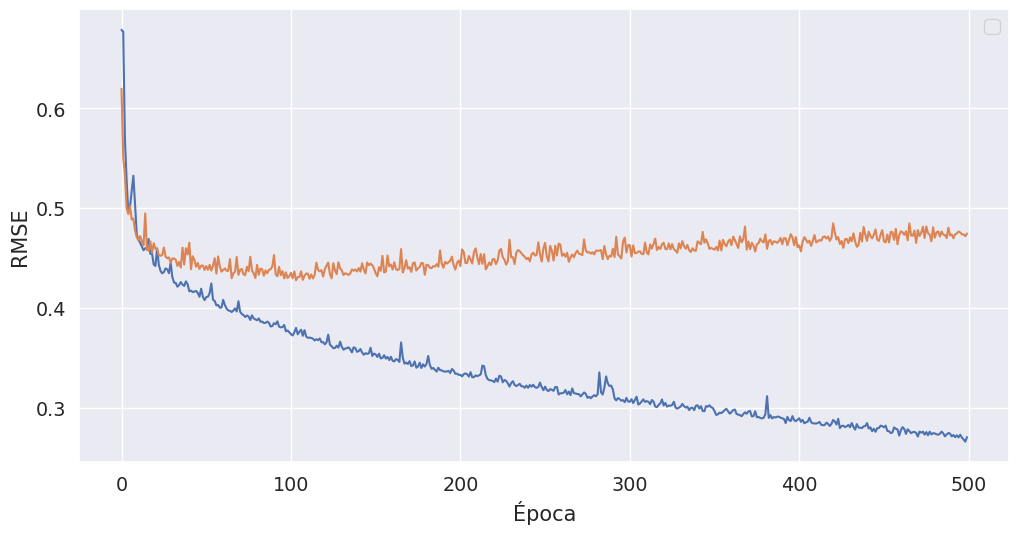

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 22s - loss: 1.1620

1632/6000 [=======>......................] - ETA: 0s - loss: 0.6400 

3296/6000 [===============>..............] - ETA: 0s - loss: 0.5930

4896/6000 [=======================>......] - ETA: 0s - loss: 0.5611

6000/6000 [==============================] - 0s 66us/step - loss: 0.7671 - val_loss: 0.3895


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4788

1696/6000 [=======>......................] - ETA: 0s - loss: 0.4183

3360/6000 [===============>..............] - ETA: 0s - loss: 0.4194

4960/6000 [=======================>......] - ETA: 0s - loss: 0.4291

6000/6000 [==============================] - 0s 41us/step - loss: 0.4477 - val_loss: 0.3410


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3726

1696/6000 [=======>......................] - ETA: 0s - loss: 0.4174

3392/6000 [===============>..............] - ETA: 0s - loss: 0.4109

5024/6000 [========================>.....] - ETA: 0s - loss: 0.4149

6000/6000 [==============================] - 0s 41us/step - loss: 0.4151 - val_loss: 0.3016


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2800

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3642

3264/6000 [===============>..............] - ETA: 0s - loss: 0.3738

4896/6000 [=======================>......] - ETA: 0s - loss: 0.3528

6000/6000 [==============================] - 0s 42us/step - loss: 0.3473 - val_loss: 0.2784


Epoch 5/500


  32/6000 [..............................] - ETA: 0s - loss: 0.6566

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3527

3168/6000 [==============>...............] - ETA: 0s - loss: 0.3631

4832/6000 [=======================>......] - ETA: 0s - loss: 0.3801

6000/6000 [==============================] - 0s 42us/step - loss: 0.3620 - val_loss: 0.2695


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3519

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3130

3232/6000 [===============>..............] - ETA: 0s - loss: 0.3502

4864/6000 [=======================>......] - ETA: 0s - loss: 0.3473

6000/6000 [==============================] - 0s 41us/step - loss: 0.3407 - val_loss: 0.2635


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3603

1728/6000 [=======>......................] - ETA: 0s - loss: 0.3133

3424/6000 [================>.............] - ETA: 0s - loss: 0.3024

5120/6000 [========================>.....] - ETA: 0s - loss: 0.3051

6000/6000 [==============================] - 0s 40us/step - loss: 0.3064 - val_loss: 0.2490


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2929

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2855

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2916

6000/6000 [==============================] - 0s 42us/step - loss: 0.2947 - val_loss: 0.2426


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2817



3232/6000 [===============>..............] - ETA: 0s - loss: 0.2858

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2815

6000/6000 [==============================] - 0s 42us/step - loss: 0.2939 - val_loss: 0.2467


Epoch 10/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2669

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2794

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3149

4960/6000 [=======================>......] - ETA: 0s - loss: 0.3063

6000/6000 [==============================] - 0s 41us/step - loss: 0.2995 - val_loss: 0.2377


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2180

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2852

3424/6000 [================>.............] - ETA: 0s - loss: 0.2828

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2900

6000/6000 [==============================] - 0s 41us/step - loss: 0.2882 - val_loss: 0.2345


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2529

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2524

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2612

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2704

6000/6000 [==============================] - 0s 42us/step - loss: 0.2642 - val_loss: 0.2306


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2108

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2592

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2676

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2664

6000/6000 [==============================] - 0s 42us/step - loss: 0.2667 - val_loss: 0.2293


Epoch 14/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2155

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2599

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2571

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2575

6000/6000 [==============================] - 0s 41us/step - loss: 0.2577 - val_loss: 0.2231


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2848

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2654

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2576

6000/6000 [==============================] - 0s 41us/step - loss: 0.2612 - val_loss: 0.2330


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2439

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2650

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2579

6000/6000 [==============================] - 0s 41us/step - loss: 0.2615 - val_loss: 0.2238


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2166

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2661

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2572

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2542

6000/6000 [==============================] - 0s 42us/step - loss: 0.2552 - val_loss: 0.2224


Epoch 18/500


  32/6000 [..............................] - ETA: 0s - loss: 0.5175

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2349

3424/6000 [================>.............] - ETA: 0s - loss: 0.2486

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2537

6000/6000 [==============================] - 0s 41us/step - loss: 0.2530 - val_loss: 0.2263


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2320

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2418

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 43us/step - loss: 0.2468 - val_loss: 0.2233


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1800

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2357

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2437

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2478

6000/6000 [==============================] - 0s 42us/step - loss: 0.2493 - val_loss: 0.2226


Epoch 21/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4485

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2389

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2453

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 42us/step - loss: 0.2408 - val_loss: 0.2197


Epoch 22/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1550

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2489

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2569

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2456

6000/6000 [==============================] - 0s 43us/step - loss: 0.2479 - val_loss: 0.2180


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2614

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2461

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2428

6000/6000 [==============================] - 0s 41us/step - loss: 0.2409 - val_loss: 0.2153


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4140

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2448

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2523

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2444

6000/6000 [==============================] - 0s 41us/step - loss: 0.2426 - val_loss: 0.2114


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2546

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2429

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2401

6000/6000 [==============================] - 0s 41us/step - loss: 0.2465 - val_loss: 0.2144


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2661

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2451

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 41us/step - loss: 0.2409 - val_loss: 0.2163


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4856

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2338

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2401

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 41us/step - loss: 0.2351 - val_loss: 0.2183


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1528

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2132

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2304

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2345

6000/6000 [==============================] - 0s 41us/step - loss: 0.2388 - val_loss: 0.2180


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2490

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2420

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 41us/step - loss: 0.2370 - val_loss: 0.2119


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2233

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2240

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 43us/step - loss: 0.2330 - val_loss: 0.2167


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2568

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2454

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2324

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 42us/step - loss: 0.2340 - val_loss: 0.2125


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2267

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2304

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2259



6000/6000 [==============================] - 0s 42us/step - loss: 0.2338 - val_loss: 0.2089


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3093

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2309

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2360



6000/6000 [==============================] - 0s 42us/step - loss: 0.2346 - val_loss: 0.2182


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2541

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2432

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2423

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2370



6000/6000 [==============================] - 0s 42us/step - loss: 0.2320 - val_loss: 0.2116


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4651

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2258

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2385

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2364

6000/6000 [==============================] - 0s 43us/step - loss: 0.2355 - val_loss: 0.2093


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2188

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2205

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 44us/step - loss: 0.2327 - val_loss: 0.2167


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2261

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2229

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 43us/step - loss: 0.2298 - val_loss: 0.2054


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2681

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2373

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2293

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 43us/step - loss: 0.2308 - val_loss: 0.2066


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2196

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2433

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 43us/step - loss: 0.2337 - val_loss: 0.2099


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2347

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2205

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 43us/step - loss: 0.2258 - val_loss: 0.2096


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2852

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2285

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 42us/step - loss: 0.2262 - val_loss: 0.2014


Epoch 42/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3117

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2213

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 45us/step - loss: 0.2245 - val_loss: 0.2051


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2265

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2235

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2004


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2557

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2003

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2230

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 43us/step - loss: 0.2276 - val_loss: 0.2036


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2741

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2225

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2209

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 43us/step - loss: 0.2223 - val_loss: 0.2046


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2725

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2187

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2162

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 43us/step - loss: 0.2224 - val_loss: 0.2038


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2277

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 42us/step - loss: 0.2252 - val_loss: 0.2005


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2290

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2278

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2245



6000/6000 [==============================] - 0s 42us/step - loss: 0.2223 - val_loss: 0.2039


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2306

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2263

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2243



6000/6000 [==============================] - 0s 42us/step - loss: 0.2240 - val_loss: 0.2055


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3016

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2423

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2222

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2290



6000/6000 [==============================] - 0s 42us/step - loss: 0.2217 - val_loss: 0.2063


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2912

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2181

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2183



6000/6000 [==============================] - 0s 42us/step - loss: 0.2164 - val_loss: 0.1983


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2208

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2166

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 43us/step - loss: 0.2145 - val_loss: 0.2040


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2111

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2438

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2249

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 42us/step - loss: 0.2160 - val_loss: 0.1977


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2188

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2170

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 43us/step - loss: 0.2207 - val_loss: 0.1969


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3050

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2199

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2108

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 43us/step - loss: 0.2175 - val_loss: 0.2014


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3036

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2243

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2229

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 43us/step - loss: 0.2167 - val_loss: 0.1983


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1911

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2035

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2142

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 42us/step - loss: 0.2156 - val_loss: 0.1980


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2429

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2280

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 41us/step - loss: 0.2187 - val_loss: 0.1973


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1057

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2208

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2185

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 42us/step - loss: 0.2156 - val_loss: 0.1907


Epoch 60/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1932

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2298

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2238

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2114

6000/6000 [==============================] - 0s 42us/step - loss: 0.2139 - val_loss: 0.1936


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2260

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2133

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 43us/step - loss: 0.2119 - val_loss: 0.1965


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2045

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2093

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2097

6000/6000 [==============================] - 0s 43us/step - loss: 0.2108 - val_loss: 0.1934


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1910

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2115

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2099

6000/6000 [==============================] - 0s 42us/step - loss: 0.2122 - val_loss: 0.1994


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1951

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2090

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 43us/step - loss: 0.2112 - val_loss: 0.2009


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2204

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2113

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 41us/step - loss: 0.2180 - val_loss: 0.1951


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2085

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2036

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2062

6000/6000 [==============================] - 0s 42us/step - loss: 0.2114 - val_loss: 0.1911


Epoch 67/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3277

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2125

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2139

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2102

6000/6000 [==============================] - 0s 41us/step - loss: 0.2100 - val_loss: 0.1942


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2106

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1998

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 42us/step - loss: 0.2097 - val_loss: 0.1918


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3674

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2072

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2084

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2087

6000/6000 [==============================] - 0s 42us/step - loss: 0.2107 - val_loss: 0.1940


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1948

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1918

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2075

6000/6000 [==============================] - 0s 42us/step - loss: 0.2083 - val_loss: 0.1898


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1952

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1877

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1875

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1992

6000/6000 [==============================] - 0s 42us/step - loss: 0.2093 - val_loss: 0.1944


Epoch 72/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1609

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2271

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2203

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 42us/step - loss: 0.2146 - val_loss: 0.1908


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2716

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2014

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2042

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2015

6000/6000 [==============================] - 0s 40us/step - loss: 0.2061 - val_loss: 0.1888


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2204

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 41us/step - loss: 0.2108 - val_loss: 0.1892


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3168

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1949

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1969

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1999

6000/6000 [==============================] - 0s 42us/step - loss: 0.2055 - val_loss: 0.1911


Epoch 76/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1945

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1950

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2063

6000/6000 [==============================] - 0s 41us/step - loss: 0.2036 - val_loss: 0.1907


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1338

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1985

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2078

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2105

6000/6000 [==============================] - 0s 41us/step - loss: 0.2053 - val_loss: 0.1915


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4839

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2170

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2089

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2047

6000/6000 [==============================] - 0s 41us/step - loss: 0.2023 - val_loss: 0.1926


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1735

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2319

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2107

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2108

6000/6000 [==============================] - 0s 42us/step - loss: 0.2079 - val_loss: 0.1885


Epoch 80/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1825

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1993

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2074

6000/6000 [==============================] - 0s 41us/step - loss: 0.2055 - val_loss: 0.1900


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2345

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2100

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2041

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2067

6000/6000 [==============================] - 0s 41us/step - loss: 0.2077 - val_loss: 0.1920


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1784

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1978

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 41us/step - loss: 0.2074 - val_loss: 0.1893


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2883

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1936

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2029

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2066

6000/6000 [==============================] - 0s 42us/step - loss: 0.2060 - val_loss: 0.1898


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1961

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2088

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2050

6000/6000 [==============================] - 0s 41us/step - loss: 0.2015 - val_loss: 0.1939


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6150

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1996

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2050

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 42us/step - loss: 0.2034 - val_loss: 0.1945


Epoch 86/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2293

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2247

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2076

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 41us/step - loss: 0.2039 - val_loss: 0.1912


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2076

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2128

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2018

6000/6000 [==============================] - 0s 41us/step - loss: 0.2004 - val_loss: 0.1903


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3067

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1919

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1992

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 41us/step - loss: 0.2012 - val_loss: 0.1916


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2012

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1934

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 41us/step - loss: 0.1987 - val_loss: 0.1889


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1990

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1986

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1996

6000/6000 [==============================] - 0s 41us/step - loss: 0.2002 - val_loss: 0.1870


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2198

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2255

3424/6000 [================>.............] - ETA: 0s - loss: 0.2109

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 40us/step - loss: 0.2037 - val_loss: 0.1908


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2091

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2059

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 41us/step - loss: 0.2032 - val_loss: 0.1879


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1948

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1997

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2009

6000/6000 [==============================] - 0s 41us/step - loss: 0.1997 - val_loss: 0.1898


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1783

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1826

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1925

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 41us/step - loss: 0.2008 - val_loss: 0.1999


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3042

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2017

3424/6000 [================>.............] - ETA: 0s - loss: 0.1920

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1982

6000/6000 [==============================] - 0s 40us/step - loss: 0.1981 - val_loss: 0.1863


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1687

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1939

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1976

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1981

6000/6000 [==============================] - 0s 42us/step - loss: 0.1996 - val_loss: 0.1863


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1824

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1873

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 42us/step - loss: 0.2040 - val_loss: 0.1870


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2538

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1836

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1921

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 40us/step - loss: 0.2016 - val_loss: 0.1871


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1703

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1986

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2012

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1983

6000/6000 [==============================] - 0s 41us/step - loss: 0.1972 - val_loss: 0.1828


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1692

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2050

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2076

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 40us/step - loss: 0.2047 - val_loss: 0.1849


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2635

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1919

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1973

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2050

6000/6000 [==============================] - 0s 42us/step - loss: 0.2009 - val_loss: 0.1885


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1770

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2149

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2119

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2031

6000/6000 [==============================] - 0s 41us/step - loss: 0.2029 - val_loss: 0.1848


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2030

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1963

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1949

6000/6000 [==============================] - 0s 40us/step - loss: 0.1991 - val_loss: 0.1859


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2997

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2023

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2088

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2018

6000/6000 [==============================] - 0s 41us/step - loss: 0.2022 - val_loss: 0.1885


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2760

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2120

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1995

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 41us/step - loss: 0.1969 - val_loss: 0.1876


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2074

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1996

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 42us/step - loss: 0.1929 - val_loss: 0.1857


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1858

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1954

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 40us/step - loss: 0.1947 - val_loss: 0.1854


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0818

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1930

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1920

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 42us/step - loss: 0.1952 - val_loss: 0.1905


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1745

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1954

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2011

6000/6000 [==============================] - 0s 41us/step - loss: 0.1993 - val_loss: 0.1860


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2057

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1985

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1993

6000/6000 [==============================] - 0s 41us/step - loss: 0.1948 - val_loss: 0.1866


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1914

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1981

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1994

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2021

6000/6000 [==============================] - 0s 42us/step - loss: 0.2019 - val_loss: 0.1870


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1986

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1931

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 42us/step - loss: 0.1919 - val_loss: 0.1835


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1810

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1891

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 41us/step - loss: 0.1982 - val_loss: 0.1896


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2653

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1903

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1888

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2002

6000/6000 [==============================] - 0s 41us/step - loss: 0.1955 - val_loss: 0.1841


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1945



3392/6000 [===============>..............] - ETA: 0s - loss: 0.2006

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 40us/step - loss: 0.1975 - val_loss: 0.1887


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1726

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1811

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 41us/step - loss: 0.1962 - val_loss: 0.1812


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1988

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1973

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 40us/step - loss: 0.1915 - val_loss: 0.1934


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1828

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1846

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 42us/step - loss: 0.1972 - val_loss: 0.1875


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1734

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1758

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1904

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1929

6000/6000 [==============================] - 0s 40us/step - loss: 0.1948 - val_loss: 0.1879


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3746

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1893

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1987

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 42us/step - loss: 0.1966 - val_loss: 0.1834


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1876

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1872

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 42us/step - loss: 0.1967 - val_loss: 0.1833


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3282



1664/6000 [=======>......................] - ETA: 0s - loss: 0.1985

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1960

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 41us/step - loss: 0.1968 - val_loss: 0.1837


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1538

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1948

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1970

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 41us/step - loss: 0.1979 - val_loss: 0.1905


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1377

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1744

3424/6000 [================>.............] - ETA: 0s - loss: 0.1815

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 41us/step - loss: 0.1925 - val_loss: 0.1874


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1922

3456/6000 [================>.............] - ETA: 0s - loss: 0.2028

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2011

6000/6000 [==============================] - 0s 40us/step - loss: 0.1986 - val_loss: 0.1864


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1627

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2053

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1949

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1959

6000/6000 [==============================] - 0s 41us/step - loss: 0.1952 - val_loss: 0.1898


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2049

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2024

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 41us/step - loss: 0.1961 - val_loss: 0.1858


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3016

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1970

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1932

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 41us/step - loss: 0.1961 - val_loss: 0.1846


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1965

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1897

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 42us/step - loss: 0.1953 - val_loss: 0.1822


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1967

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 41us/step - loss: 0.1939 - val_loss: 0.1862


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2043

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1957

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1981

6000/6000 [==============================] - 0s 41us/step - loss: 0.1940 - val_loss: 0.1840


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1239

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1936

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2269

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 40us/step - loss: 0.2142 - val_loss: 0.1828


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1837

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1902

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 41us/step - loss: 0.1951 - val_loss: 0.1844


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2015

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1957

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 40us/step - loss: 0.1976 - val_loss: 0.1831


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2077

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2035

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1976

6000/6000 [==============================] - 0s 41us/step - loss: 0.1959 - val_loss: 0.1834


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2055

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1818

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1847

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 42us/step - loss: 0.1918 - val_loss: 0.1849


Epoch 137/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2186

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1769

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1906

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 42us/step - loss: 0.1929 - val_loss: 0.1827


Epoch 138/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1803

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1838

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1854

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 42us/step - loss: 0.1923 - val_loss: 0.1868


Epoch 139/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1940

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2186

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1995

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1982

6000/6000 [==============================] - 0s 41us/step - loss: 0.1928 - val_loss: 0.1807


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1981

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1928

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 41us/step - loss: 0.1942 - val_loss: 0.1845


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1459

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1763

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1843

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 41us/step - loss: 0.1929 - val_loss: 0.1817


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2543

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1873

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1893

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 42us/step - loss: 0.1924 - val_loss: 0.1818


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1986

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1909

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1891

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 41us/step - loss: 0.1932 - val_loss: 0.1831


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1906

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1960

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1942

6000/6000 [==============================] - 0s 41us/step - loss: 0.1917 - val_loss: 0.1818


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2323

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1845

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1906

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 41us/step - loss: 0.1876 - val_loss: 0.1857


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1815

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1916

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 40us/step - loss: 0.1930 - val_loss: 0.1818


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2161

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1879

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1856

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 41us/step - loss: 0.1911 - val_loss: 0.1818


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1738

3456/6000 [================>.............] - ETA: 0s - loss: 0.1899

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 40us/step - loss: 0.1878 - val_loss: 0.1816


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1919

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1896

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1965

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1944

6000/6000 [==============================] - 0s 42us/step - loss: 0.1918 - val_loss: 0.1809


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1765

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1906

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 42us/step - loss: 0.1911 - val_loss: 0.1846


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1810

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1864

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 40us/step - loss: 0.1840 - val_loss: 0.1808


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1799

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1849

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1917

6000/6000 [==============================] - 0s 42us/step - loss: 0.1892 - val_loss: 0.1891


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2608

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1892



3296/6000 [===============>..............] - ETA: 0s - loss: 0.1911

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 42us/step - loss: 0.1920 - val_loss: 0.1868


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1461

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1775

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1837

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 42us/step - loss: 0.1892 - val_loss: 0.1797


Epoch 155/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0791

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1827

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1893

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 41us/step - loss: 0.1840 - val_loss: 0.1812


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1638

3424/6000 [================>.............] - ETA: 0s - loss: 0.1850

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 41us/step - loss: 0.1911 - val_loss: 0.1851


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1840

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1846

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 40us/step - loss: 0.1893 - val_loss: 0.1812


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1901

3424/6000 [================>.............] - ETA: 0s - loss: 0.1875

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 40us/step - loss: 0.1919 - val_loss: 0.1842


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1903

3488/6000 [================>.............] - ETA: 0s - loss: 0.1919

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 39us/step - loss: 0.1929 - val_loss: 0.1807


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1729

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1862

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 42us/step - loss: 0.1861 - val_loss: 0.1830


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1418

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1833

3456/6000 [================>.............] - ETA: 0s - loss: 0.1881

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 40us/step - loss: 0.1899 - val_loss: 0.1804


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1864

3520/6000 [================>.............] - ETA: 0s - loss: 0.1900

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 39us/step - loss: 0.1901 - val_loss: 0.1824


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1549

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2020

3424/6000 [================>.............] - ETA: 0s - loss: 0.1956

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 41us/step - loss: 0.1908 - val_loss: 0.1831


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2823

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1900

3488/6000 [================>.............] - ETA: 0s - loss: 0.1816

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 39us/step - loss: 0.1907 - val_loss: 0.1805


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1680

3552/6000 [================>.............] - ETA: 0s - loss: 0.1833

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 39us/step - loss: 0.1878 - val_loss: 0.1819


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0825

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1989

3520/6000 [================>.............] - ETA: 0s - loss: 0.1880

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 40us/step - loss: 0.1889 - val_loss: 0.1834


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2042

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1973

3488/6000 [================>.............] - ETA: 0s - loss: 0.1882

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 41us/step - loss: 0.1897 - val_loss: 0.1861


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2021

3456/6000 [================>.............] - ETA: 0s - loss: 0.1956

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 40us/step - loss: 0.1891 - val_loss: 0.1847


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1899

3488/6000 [================>.............] - ETA: 0s - loss: 0.1901

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 41us/step - loss: 0.1874 - val_loss: 0.1826


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1225

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1918

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1916

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 42us/step - loss: 0.1906 - val_loss: 0.1874


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2547



1696/6000 [=======>......................] - ETA: 0s - loss: 0.1688

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1802

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1894



6000/6000 [==============================] - 0s 42us/step - loss: 0.1900 - val_loss: 0.1809


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2245

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1838

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1833

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 41us/step - loss: 0.1893 - val_loss: 0.1843


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0910

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2019

3520/6000 [================>.............] - ETA: 0s - loss: 0.1882

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 40us/step - loss: 0.1884 - val_loss: 0.1810


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1941

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1810

3488/6000 [================>.............] - ETA: 0s - loss: 0.1846

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 39us/step - loss: 0.1880 - val_loss: 0.1815


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3520/6000 [================>.............] - ETA: 0s - loss: 0.1786

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 39us/step - loss: 0.1857 - val_loss: 0.1830


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1834

3488/6000 [================>.............] - ETA: 0s - loss: 0.1826

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 40us/step - loss: 0.1860 - val_loss: 0.1894


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2224

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1881

3520/6000 [================>.............] - ETA: 0s - loss: 0.1874

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 39us/step - loss: 0.1841 - val_loss: 0.1793


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1924

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1992

3424/6000 [================>.............] - ETA: 0s - loss: 0.1930

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 40us/step - loss: 0.1867 - val_loss: 0.1870


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1841

3456/6000 [================>.............] - ETA: 0s - loss: 0.1813

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 40us/step - loss: 0.1890 - val_loss: 0.1823


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1830

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1872

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1884

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 40us/step - loss: 0.1899 - val_loss: 0.1851


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1826

3552/6000 [================>.............] - ETA: 0s - loss: 0.1835

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 39us/step - loss: 0.1843 - val_loss: 0.1827


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1856

3616/6000 [=================>............] - ETA: 0s - loss: 0.1915

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 39us/step - loss: 0.1890 - val_loss: 0.1871


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1971

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1843

3488/6000 [================>.............] - ETA: 0s - loss: 0.1841

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 39us/step - loss: 0.1892 - val_loss: 0.1829


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1967

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1744

3456/6000 [================>.............] - ETA: 0s - loss: 0.1803

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 40us/step - loss: 0.1866 - val_loss: 0.1806


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1944

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1866

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1895

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 41us/step - loss: 0.1878 - val_loss: 0.1831


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2173

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1915

3488/6000 [================>.............] - ETA: 0s - loss: 0.1904

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1940

6000/6000 [==============================] - 0s 40us/step - loss: 0.1914 - val_loss: 0.1851


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1893

3456/6000 [================>.............] - ETA: 0s - loss: 0.1856

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 41us/step - loss: 0.1839 - val_loss: 0.1781


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1707

3424/6000 [================>.............] - ETA: 0s - loss: 0.1827

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1890

6000/6000 [==============================] - 0s 41us/step - loss: 0.1879 - val_loss: 0.1815


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1799

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 41us/step - loss: 0.1860 - val_loss: 0.1824


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1822

3520/6000 [================>.............] - ETA: 0s - loss: 0.1830

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 40us/step - loss: 0.1868 - val_loss: 0.1774


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1950

3552/6000 [================>.............] - ETA: 0s - loss: 0.1817

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 39us/step - loss: 0.1813 - val_loss: 0.1806


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1842

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1775

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 43us/step - loss: 0.1848 - val_loss: 0.1787


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1815

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1729

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1744

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 42us/step - loss: 0.1870 - val_loss: 0.1845


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0958

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3424/6000 [================>.............] - ETA: 0s - loss: 0.1931

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 40us/step - loss: 0.1880 - val_loss: 0.1800


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2762

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1637

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1832

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 41us/step - loss: 0.1878 - val_loss: 0.1809


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1648

3456/6000 [================>.............] - ETA: 0s - loss: 0.1782

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 41us/step - loss: 0.1833 - val_loss: 0.1819


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2916

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1928

3456/6000 [================>.............] - ETA: 0s - loss: 0.1982

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 40us/step - loss: 0.1870 - val_loss: 0.1831


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1818

3552/6000 [================>.............] - ETA: 0s - loss: 0.1815

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 40us/step - loss: 0.1845 - val_loss: 0.1830


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1786

3456/6000 [================>.............] - ETA: 0s - loss: 0.1858

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 40us/step - loss: 0.1888 - val_loss: 0.1835


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2214

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1852

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1837

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 41us/step - loss: 0.1839 - val_loss: 0.1848


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2669

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3424/6000 [================>.............] - ETA: 0s - loss: 0.1865

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 41us/step - loss: 0.1862 - val_loss: 0.1840


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1860

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1901

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 41us/step - loss: 0.1875 - val_loss: 0.1848


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0829

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1953

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1933

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 41us/step - loss: 0.1888 - val_loss: 0.1843


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1930

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1714

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1803

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 41us/step - loss: 0.1798 - val_loss: 0.1810


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1841

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1890

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 42us/step - loss: 0.1848 - val_loss: 0.1823


Epoch 206/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3520/6000 [================>.............] - ETA: 0s - loss: 0.1872

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 39us/step - loss: 0.1839 - val_loss: 0.1814


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3638

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2129

3520/6000 [================>.............] - ETA: 0s - loss: 0.1999

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 40us/step - loss: 0.1886 - val_loss: 0.1803


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1970

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1873

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 40us/step - loss: 0.1832 - val_loss: 0.1798


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1829

3520/6000 [================>.............] - ETA: 0s - loss: 0.1825

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 39us/step - loss: 0.1881 - val_loss: 0.1776


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1714

3456/6000 [================>.............] - ETA: 0s - loss: 0.1784

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 40us/step - loss: 0.1790 - val_loss: 0.1788


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2881

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1805

3520/6000 [================>.............] - ETA: 0s - loss: 0.1795

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 40us/step - loss: 0.1810 - val_loss: 0.1810


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1813

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1870

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1818

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 41us/step - loss: 0.1842 - val_loss: 0.1825


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3424/6000 [================>.............] - ETA: 0s - loss: 0.1849

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 39us/step - loss: 0.1865 - val_loss: 0.1800


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2244

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1899

3520/6000 [================>.............] - ETA: 0s - loss: 0.1955

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 40us/step - loss: 0.1886 - val_loss: 0.1834


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2019

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2056

3552/6000 [================>.............] - ETA: 0s - loss: 0.1888

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 39us/step - loss: 0.1819 - val_loss: 0.1846


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1833

3552/6000 [================>.............] - ETA: 0s - loss: 0.1832

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 39us/step - loss: 0.1844 - val_loss: 0.1839


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1894

3520/6000 [================>.............] - ETA: 0s - loss: 0.1904

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 40us/step - loss: 0.1865 - val_loss: 0.1820


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2890

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3488/6000 [================>.............] - ETA: 0s - loss: 0.1823

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 40us/step - loss: 0.1799 - val_loss: 0.1815


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2814

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1885

3456/6000 [================>.............] - ETA: 0s - loss: 0.1905

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 40us/step - loss: 0.1844 - val_loss: 0.1817


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1781

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1772

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 41us/step - loss: 0.1813 - val_loss: 0.1859


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1912

3424/6000 [================>.............] - ETA: 0s - loss: 0.1948

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 41us/step - loss: 0.1906 - val_loss: 0.1840


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1706

3424/6000 [================>.............] - ETA: 0s - loss: 0.1793

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 40us/step - loss: 0.1839 - val_loss: 0.1790


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1729

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1843

3488/6000 [================>.............] - ETA: 0s - loss: 0.1833

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 40us/step - loss: 0.1795 - val_loss: 0.1799


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1748

3488/6000 [================>.............] - ETA: 0s - loss: 0.1830

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 40us/step - loss: 0.1808 - val_loss: 0.1800


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2716

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2064

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1910

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 41us/step - loss: 0.1833 - val_loss: 0.1780


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1722

3424/6000 [================>.............] - ETA: 0s - loss: 0.1806

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 40us/step - loss: 0.1824 - val_loss: 0.1792


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1841

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1887

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 41us/step - loss: 0.1814 - val_loss: 0.1782


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1242

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1772

3552/6000 [================>.............] - ETA: 0s - loss: 0.1878

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 40us/step - loss: 0.1903 - val_loss: 0.1834


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2161

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1719

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1886

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 42us/step - loss: 0.1849 - val_loss: 0.1807


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1849

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1777

3488/6000 [================>.............] - ETA: 0s - loss: 0.1869

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 40us/step - loss: 0.1809 - val_loss: 0.1779


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1864

3424/6000 [================>.............] - ETA: 0s - loss: 0.1824

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 40us/step - loss: 0.1822 - val_loss: 0.1822


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1971

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1777

3520/6000 [================>.............] - ETA: 0s - loss: 0.1819

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 40us/step - loss: 0.1835 - val_loss: 0.1802


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3424/6000 [================>.............] - ETA: 0s - loss: 0.1783

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 40us/step - loss: 0.1832 - val_loss: 0.1793


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1812

3456/6000 [================>.............] - ETA: 0s - loss: 0.1774

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 40us/step - loss: 0.1821 - val_loss: 0.1788


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1609

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1745

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 41us/step - loss: 0.1818 - val_loss: 0.1843


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1826

3488/6000 [================>.............] - ETA: 0s - loss: 0.1916

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 39us/step - loss: 0.1820 - val_loss: 0.1832


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1912

3424/6000 [================>.............] - ETA: 0s - loss: 0.1860

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 40us/step - loss: 0.1840 - val_loss: 0.1825


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2131

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1854

3648/6000 [=================>............] - ETA: 0s - loss: 0.1909

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 38us/step - loss: 0.1857 - val_loss: 0.1795


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1874

3552/6000 [================>.............] - ETA: 0s - loss: 0.1810

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 40us/step - loss: 0.1862 - val_loss: 0.1843


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1761

3520/6000 [================>.............] - ETA: 0s - loss: 0.1771

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 39us/step - loss: 0.1791 - val_loss: 0.1781


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3221

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1751

3456/6000 [================>.............] - ETA: 0s - loss: 0.1825

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 39us/step - loss: 0.1832 - val_loss: 0.1822


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0988

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1767

3584/6000 [================>.............] - ETA: 0s - loss: 0.1742

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 40us/step - loss: 0.1790 - val_loss: 0.1802


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1198

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1748

3488/6000 [================>.............] - ETA: 0s - loss: 0.1728

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 40us/step - loss: 0.1801 - val_loss: 0.1819


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2382

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1835

3424/6000 [================>.............] - ETA: 0s - loss: 0.1823

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 41us/step - loss: 0.1809 - val_loss: 0.1768


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1627

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1766

3456/6000 [================>.............] - ETA: 0s - loss: 0.1750

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 40us/step - loss: 0.1803 - val_loss: 0.1792


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2035

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1876

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1874

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 41us/step - loss: 0.1777 - val_loss: 0.1824


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1411

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1926

3424/6000 [================>.............] - ETA: 0s - loss: 0.1900

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 40us/step - loss: 0.1842 - val_loss: 0.1789


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1758

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1805

3488/6000 [================>.............] - ETA: 0s - loss: 0.1764

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 40us/step - loss: 0.1781 - val_loss: 0.1789


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1862

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1697

3552/6000 [================>.............] - ETA: 0s - loss: 0.1771

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 40us/step - loss: 0.1799 - val_loss: 0.1801


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1310

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1869

3456/6000 [================>.............] - ETA: 0s - loss: 0.1877

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 40us/step - loss: 0.1830 - val_loss: 0.1810


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1778

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1897

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 40us/step - loss: 0.1851 - val_loss: 0.1847


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1879

3552/6000 [================>.............] - ETA: 0s - loss: 0.1827

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 39us/step - loss: 0.1817 - val_loss: 0.1815


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1684

3424/6000 [================>.............] - ETA: 0s - loss: 0.1781

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 40us/step - loss: 0.1825 - val_loss: 0.1789


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2241

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1756

3520/6000 [================>.............] - ETA: 0s - loss: 0.1802

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 39us/step - loss: 0.1821 - val_loss: 0.1807


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2765

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1834

3456/6000 [================>.............] - ETA: 0s - loss: 0.1786

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 40us/step - loss: 0.1814 - val_loss: 0.1875


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1740

3520/6000 [================>.............] - ETA: 0s - loss: 0.1823

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 40us/step - loss: 0.2018 - val_loss: 0.1795


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1639

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1803

3456/6000 [================>.............] - ETA: 0s - loss: 0.1792

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 41us/step - loss: 0.1815 - val_loss: 0.1785


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1714

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1820

3456/6000 [================>.............] - ETA: 0s - loss: 0.1849

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 40us/step - loss: 0.1857 - val_loss: 0.1830


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2161

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1799

3424/6000 [================>.............] - ETA: 0s - loss: 0.1807

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 41us/step - loss: 0.1786 - val_loss: 0.1819


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3488/6000 [================>.............] - ETA: 0s - loss: 0.1784

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 39us/step - loss: 0.1820 - val_loss: 0.1806


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1749

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1699

3520/6000 [================>.............] - ETA: 0s - loss: 0.1751

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 39us/step - loss: 0.1755 - val_loss: 0.1783


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2168

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1676

3520/6000 [================>.............] - ETA: 0s - loss: 0.1746

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 40us/step - loss: 0.1789 - val_loss: 0.1819


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1867

3456/6000 [================>.............] - ETA: 0s - loss: 0.1777

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 40us/step - loss: 0.1812 - val_loss: 0.1794


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1607

3456/6000 [================>.............] - ETA: 0s - loss: 0.1775

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 41us/step - loss: 0.1842 - val_loss: 0.1815


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1850

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1754

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 42us/step - loss: 0.1774 - val_loss: 0.1808


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2176

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1833

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1823

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 43us/step - loss: 0.1806 - val_loss: 0.1786


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1366

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1829

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1796

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 42us/step - loss: 0.1822 - val_loss: 0.1784


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1914

3456/6000 [================>.............] - ETA: 0s - loss: 0.1816

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 41us/step - loss: 0.1815 - val_loss: 0.1831


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3973

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1700

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1772

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 41us/step - loss: 0.1792 - val_loss: 0.1757


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1089

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1632

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1752

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 41us/step - loss: 0.1799 - val_loss: 0.1817


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1864

3424/6000 [================>.............] - ETA: 0s - loss: 0.1798

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 40us/step - loss: 0.1791 - val_loss: 0.1799


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1699

3520/6000 [================>.............] - ETA: 0s - loss: 0.1772

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 40us/step - loss: 0.1804 - val_loss: 0.1836


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1293

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1698

3488/6000 [================>.............] - ETA: 0s - loss: 0.1758

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 40us/step - loss: 0.1741 - val_loss: 0.1785


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1855

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1782

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 41us/step - loss: 0.1807 - val_loss: 0.1829


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1819

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1573

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1799

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 41us/step - loss: 0.1812 - val_loss: 0.1814


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3424/6000 [================>.............] - ETA: 0s - loss: 0.1785

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 40us/step - loss: 0.1831 - val_loss: 0.1805


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1680

3424/6000 [================>.............] - ETA: 0s - loss: 0.1678

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 40us/step - loss: 0.1780 - val_loss: 0.1794


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0889

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1599

3424/6000 [================>.............] - ETA: 0s - loss: 0.1629

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 40us/step - loss: 0.1767 - val_loss: 0.1801


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2663

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1836

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1817

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 41us/step - loss: 0.1775 - val_loss: 0.1788


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1781

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1730

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 41us/step - loss: 0.1775 - val_loss: 0.1856


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1781

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1861

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 40us/step - loss: 0.1858 - val_loss: 0.1800


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1848

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1808

3456/6000 [================>.............] - ETA: 0s - loss: 0.1815

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 40us/step - loss: 0.1771 - val_loss: 0.1786


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1897

3424/6000 [================>.............] - ETA: 0s - loss: 0.1883

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 41us/step - loss: 0.1761 - val_loss: 0.1767


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1722

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1808

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 42us/step - loss: 0.1810 - val_loss: 0.1821


Epoch 285/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1719

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1847

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1866

6000/6000 [==============================] - 0s 41us/step - loss: 0.1851 - val_loss: 0.1827


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2225

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1866

3424/6000 [================>.............] - ETA: 0s - loss: 0.1746

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 42us/step - loss: 0.1814 - val_loss: 0.1810


Epoch 287/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1916

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1797

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1807

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 42us/step - loss: 0.1782 - val_loss: 0.1820


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3282

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1839

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1772

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 42us/step - loss: 0.1798 - val_loss: 0.1804


Epoch 289/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2357

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1765

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1712

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 42us/step - loss: 0.1759 - val_loss: 0.1759


Epoch 290/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1492

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1733

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1756

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 41us/step - loss: 0.1785 - val_loss: 0.1778


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1708

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1792

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 41us/step - loss: 0.1799 - val_loss: 0.1793


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0628

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1757

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 42us/step - loss: 0.1794 - val_loss: 0.1780


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2524

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1784

3424/6000 [================>.............] - ETA: 0s - loss: 0.1774

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 40us/step - loss: 0.1765 - val_loss: 0.1758


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1582

3456/6000 [================>.............] - ETA: 0s - loss: 0.1701

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 41us/step - loss: 0.1735 - val_loss: 0.1781


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3929

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1718

3424/6000 [================>.............] - ETA: 0s - loss: 0.1777

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 41us/step - loss: 0.1747 - val_loss: 0.1785


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1751

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 40us/step - loss: 0.1786 - val_loss: 0.1770


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1664

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1628

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 41us/step - loss: 0.1719 - val_loss: 0.1767


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1692

3488/6000 [================>.............] - ETA: 0s - loss: 0.1706

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 40us/step - loss: 0.1757 - val_loss: 0.1776


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1462

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1550

3456/6000 [================>.............] - ETA: 0s - loss: 0.1689

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 40us/step - loss: 0.1766 - val_loss: 0.1765


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1687

3552/6000 [================>.............] - ETA: 0s - loss: 0.1729

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 40us/step - loss: 0.1801 - val_loss: 0.1800


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1066

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1599

3424/6000 [================>.............] - ETA: 0s - loss: 0.1685

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 41us/step - loss: 0.1806 - val_loss: 0.1794


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2059

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1748

3456/6000 [================>.............] - ETA: 0s - loss: 0.1772

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 40us/step - loss: 0.1776 - val_loss: 0.1798


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1581

3424/6000 [================>.............] - ETA: 0s - loss: 0.1687

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 40us/step - loss: 0.1737 - val_loss: 0.1779


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2072

3456/6000 [================>.............] - ETA: 0s - loss: 0.1920

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 40us/step - loss: 0.1882 - val_loss: 0.1791


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1616

3488/6000 [================>.............] - ETA: 0s - loss: 0.1815

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 41us/step - loss: 0.1786 - val_loss: 0.1838


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2918

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1675

3424/6000 [================>.............] - ETA: 0s - loss: 0.1741

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 40us/step - loss: 0.1736 - val_loss: 0.1778


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1701

3456/6000 [================>.............] - ETA: 0s - loss: 0.1759

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 39us/step - loss: 0.1780 - val_loss: 0.1780


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1895

3488/6000 [================>.............] - ETA: 0s - loss: 0.1780

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 39us/step - loss: 0.1784 - val_loss: 0.1848


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2485

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1702

3424/6000 [================>.............] - ETA: 0s - loss: 0.1671

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 40us/step - loss: 0.1764 - val_loss: 0.1794


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1851

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1800

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 40us/step - loss: 0.1781 - val_loss: 0.1796


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2311

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1716

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1793

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 41us/step - loss: 0.1767 - val_loss: 0.1807


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1600

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1689

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 41us/step - loss: 0.1767 - val_loss: 0.1778


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1304

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1767

3552/6000 [================>.............] - ETA: 0s - loss: 0.1754

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 39us/step - loss: 0.1724 - val_loss: 0.1778


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1753

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1740

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 41us/step - loss: 0.1748 - val_loss: 0.1768


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1931

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1875

3456/6000 [================>.............] - ETA: 0s - loss: 0.1786

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 40us/step - loss: 0.1763 - val_loss: 0.1809


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1807

3424/6000 [================>.............] - ETA: 0s - loss: 0.1784

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 40us/step - loss: 0.1766 - val_loss: 0.1776


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1726

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1861

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 41us/step - loss: 0.1791 - val_loss: 0.1788


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1731

3456/6000 [================>.............] - ETA: 0s - loss: 0.1692

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 40us/step - loss: 0.1757 - val_loss: 0.1785


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3632

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1712

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1744

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 40us/step - loss: 0.1750 - val_loss: 0.1799


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4825

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1686

3552/6000 [================>.............] - ETA: 0s - loss: 0.1728

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 40us/step - loss: 0.1759 - val_loss: 0.1777


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3456/6000 [================>.............] - ETA: 0s - loss: 0.1740

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 40us/step - loss: 0.1784 - val_loss: 0.1779


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3372

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1764

3488/6000 [================>.............] - ETA: 0s - loss: 0.1741

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 40us/step - loss: 0.1721 - val_loss: 0.1775


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1792

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1798

3584/6000 [================>.............] - ETA: 0s - loss: 0.1815

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 39us/step - loss: 0.1773 - val_loss: 0.1755


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0695

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1930

3488/6000 [================>.............] - ETA: 0s - loss: 0.1864

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 39us/step - loss: 0.1802 - val_loss: 0.1787


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3552/6000 [================>.............] - ETA: 0s - loss: 0.1821

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 39us/step - loss: 0.1750 - val_loss: 0.1746


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1584

3616/6000 [=================>............] - ETA: 0s - loss: 0.1749

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 39us/step - loss: 0.1786 - val_loss: 0.1759


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1626

3584/6000 [================>.............] - ETA: 0s - loss: 0.1640

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 39us/step - loss: 0.1716 - val_loss: 0.1775


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1711

3520/6000 [================>.............] - ETA: 0s - loss: 0.1723

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 39us/step - loss: 0.1701 - val_loss: 0.1790


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0840

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1778

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1787

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 40us/step - loss: 0.1742 - val_loss: 0.1803


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1945

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1836

3584/6000 [================>.............] - ETA: 0s - loss: 0.1891

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 39us/step - loss: 0.1790 - val_loss: 0.1755


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1710

3520/6000 [================>.............] - ETA: 0s - loss: 0.1700

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 41us/step - loss: 0.1739 - val_loss: 0.1750


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1873

3488/6000 [================>.............] - ETA: 0s - loss: 0.1805

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 40us/step - loss: 0.1783 - val_loss: 0.1840


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1841

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1669

3456/6000 [================>.............] - ETA: 0s - loss: 0.1711

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 40us/step - loss: 0.1740 - val_loss: 0.1788


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1669

3552/6000 [================>.............] - ETA: 0s - loss: 0.1722

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 39us/step - loss: 0.1736 - val_loss: 0.1760


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1635

3520/6000 [================>.............] - ETA: 0s - loss: 0.1649

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 40us/step - loss: 0.1735 - val_loss: 0.1790


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1628

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1658

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 40us/step - loss: 0.1775 - val_loss: 0.1798


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1777

3488/6000 [================>.............] - ETA: 0s - loss: 0.1873

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 39us/step - loss: 0.1750 - val_loss: 0.1811


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3658

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3520/6000 [================>.............] - ETA: 0s - loss: 0.1736

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 39us/step - loss: 0.1771 - val_loss: 0.1801


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1682

3552/6000 [================>.............] - ETA: 0s - loss: 0.1751

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 39us/step - loss: 0.1736 - val_loss: 0.1796


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0875

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1696

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1754

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 41us/step - loss: 0.1755 - val_loss: 0.1816


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1629

3488/6000 [================>.............] - ETA: 0s - loss: 0.1735

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 39us/step - loss: 0.1733 - val_loss: 0.1791


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1699

3488/6000 [================>.............] - ETA: 0s - loss: 0.1678

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 41us/step - loss: 0.1744 - val_loss: 0.1759


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1810

3616/6000 [=================>............] - ETA: 0s - loss: 0.1727

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 38us/step - loss: 0.1734 - val_loss: 0.1785


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0509

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1711

3680/6000 [=================>............] - ETA: 0s - loss: 0.1767

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 38us/step - loss: 0.1758 - val_loss: 0.1778


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1651

3584/6000 [================>.............] - ETA: 0s - loss: 0.1703

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 39us/step - loss: 0.1742 - val_loss: 0.1773


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1942

3488/6000 [================>.............] - ETA: 0s - loss: 0.1835

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 40us/step - loss: 0.1756 - val_loss: 0.1771


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1790

3520/6000 [================>.............] - ETA: 0s - loss: 0.1711

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 40us/step - loss: 0.1691 - val_loss: 0.1781


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1732

3552/6000 [================>.............] - ETA: 0s - loss: 0.1772

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 39us/step - loss: 0.1725 - val_loss: 0.1770


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1666

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1850

3456/6000 [================>.............] - ETA: 0s - loss: 0.1857

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 40us/step - loss: 0.1775 - val_loss: 0.1775


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3584/6000 [================>.............] - ETA: 0s - loss: 0.1731

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 39us/step - loss: 0.1722 - val_loss: 0.1822


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1746

3584/6000 [================>.............] - ETA: 0s - loss: 0.1735

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 39us/step - loss: 0.1723 - val_loss: 0.1772


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1644

3552/6000 [================>.............] - ETA: 0s - loss: 0.1649

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 39us/step - loss: 0.1720 - val_loss: 0.1766


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2008

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3680/6000 [=================>............] - ETA: 0s - loss: 0.1709

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 38us/step - loss: 0.1764 - val_loss: 0.1829


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1649

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1769

3424/6000 [================>.............] - ETA: 0s - loss: 0.1744

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 40us/step - loss: 0.1734 - val_loss: 0.1794


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3552/6000 [================>.............] - ETA: 0s - loss: 0.1692

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 39us/step - loss: 0.1721 - val_loss: 0.1776


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1404

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1608

3456/6000 [================>.............] - ETA: 0s - loss: 0.1696

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 40us/step - loss: 0.1715 - val_loss: 0.1769


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1881

3616/6000 [=================>............] - ETA: 0s - loss: 0.1815

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 39us/step - loss: 0.1775 - val_loss: 0.1739


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1767

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1732

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 42us/step - loss: 0.1696 - val_loss: 0.1801


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1524

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1630

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 40us/step - loss: 0.1714 - val_loss: 0.1818


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1826

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1802

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 43us/step - loss: 0.1715 - val_loss: 0.1766


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1639

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1900

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1743

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 40us/step - loss: 0.1697 - val_loss: 0.1781


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1753

3488/6000 [================>.............] - ETA: 0s - loss: 0.1762

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 40us/step - loss: 0.1705 - val_loss: 0.1749


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1701

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1763

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 40us/step - loss: 0.1741 - val_loss: 0.1779


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1442

3584/6000 [================>.............] - ETA: 0s - loss: 0.1573

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 39us/step - loss: 0.1871 - val_loss: 0.1785


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1751

3520/6000 [================>.............] - ETA: 0s - loss: 0.1709

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 40us/step - loss: 0.1735 - val_loss: 0.1808


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1825

3456/6000 [================>.............] - ETA: 0s - loss: 0.1768

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 39us/step - loss: 0.1742 - val_loss: 0.1772


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1658

3488/6000 [================>.............] - ETA: 0s - loss: 0.1788

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 40us/step - loss: 0.1714 - val_loss: 0.1772


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1706

3456/6000 [================>.............] - ETA: 0s - loss: 0.1696

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 40us/step - loss: 0.1709 - val_loss: 0.1776


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1643

3456/6000 [================>.............] - ETA: 0s - loss: 0.1753

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 40us/step - loss: 0.1784 - val_loss: 0.1772


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4639

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3520/6000 [================>.............] - ETA: 0s - loss: 0.1695

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 40us/step - loss: 0.1706 - val_loss: 0.1776


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1629

3456/6000 [================>.............] - ETA: 0s - loss: 0.1727

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 40us/step - loss: 0.1749 - val_loss: 0.1789


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1965

3488/6000 [================>.............] - ETA: 0s - loss: 0.1853

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 39us/step - loss: 0.1732 - val_loss: 0.1762


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2075

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1722

3552/6000 [================>.............] - ETA: 0s - loss: 0.1818

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 39us/step - loss: 0.1751 - val_loss: 0.1791


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3443

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1732

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1699

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 41us/step - loss: 0.1720 - val_loss: 0.1771


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0367

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3520/6000 [================>.............] - ETA: 0s - loss: 0.1730

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 39us/step - loss: 0.1716 - val_loss: 0.1793


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1672

3456/6000 [================>.............] - ETA: 0s - loss: 0.1702

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 40us/step - loss: 0.1699 - val_loss: 0.1819


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1735

3424/6000 [================>.............] - ETA: 0s - loss: 0.1749

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 40us/step - loss: 0.1727 - val_loss: 0.1760


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2698

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3488/6000 [================>.............] - ETA: 0s - loss: 0.1714

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 41us/step - loss: 0.1702 - val_loss: 0.1762


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2787

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1811

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1805

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 40us/step - loss: 0.1731 - val_loss: 0.1783


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2907

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1607

3456/6000 [================>.............] - ETA: 0s - loss: 0.1698

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 39us/step - loss: 0.1719 - val_loss: 0.1785


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1712

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 39us/step - loss: 0.1695 - val_loss: 0.1824


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1955

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1550

3616/6000 [=================>............] - ETA: 0s - loss: 0.1617

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 39us/step - loss: 0.1704 - val_loss: 0.1796


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3083

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1733

3552/6000 [================>.............] - ETA: 0s - loss: 0.1760

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 39us/step - loss: 0.1713 - val_loss: 0.1824


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1656

3648/6000 [=================>............] - ETA: 0s - loss: 0.1662

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 39us/step - loss: 0.1688 - val_loss: 0.1758


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1557

3552/6000 [================>.............] - ETA: 0s - loss: 0.1581

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1629

6000/6000 [==============================] - 0s 39us/step - loss: 0.1661 - val_loss: 0.1803


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1378

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1546

3712/6000 [=================>............] - ETA: 0s - loss: 0.1658

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 38us/step - loss: 0.1736 - val_loss: 0.1790


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1605

3552/6000 [================>.............] - ETA: 0s - loss: 0.1631

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 40us/step - loss: 0.1688 - val_loss: 0.1756


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0963

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1823

3424/6000 [================>.............] - ETA: 0s - loss: 0.1710

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 40us/step - loss: 0.1758 - val_loss: 0.1756


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1715

3520/6000 [================>.............] - ETA: 0s - loss: 0.1647

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 40us/step - loss: 0.1714 - val_loss: 0.1782


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1706

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1740

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 42us/step - loss: 0.1736 - val_loss: 0.1790


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1882

3488/6000 [================>.............] - ETA: 0s - loss: 0.1768

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 40us/step - loss: 0.1728 - val_loss: 0.1774


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1134

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1651

3520/6000 [================>.............] - ETA: 0s - loss: 0.1701

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 39us/step - loss: 0.1679 - val_loss: 0.1790


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1591

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1610

3424/6000 [================>.............] - ETA: 0s - loss: 0.1747

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 39us/step - loss: 0.1712 - val_loss: 0.1747


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1742

3520/6000 [================>.............] - ETA: 0s - loss: 0.1734

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 39us/step - loss: 0.1701 - val_loss: 0.1774


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1534

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1617

3552/6000 [================>.............] - ETA: 0s - loss: 0.1662

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 40us/step - loss: 0.1733 - val_loss: 0.1817


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2130

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1895

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1715

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 41us/step - loss: 0.1738 - val_loss: 0.1784


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2882

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1606

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1693

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 41us/step - loss: 0.1714 - val_loss: 0.1789


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3720

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1710

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1654

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1671

6000/6000 [==============================] - 0s 43us/step - loss: 0.1691 - val_loss: 0.1797


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1698

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1696

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 42us/step - loss: 0.1706 - val_loss: 0.1765


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1661

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1738

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1677



6000/6000 [==============================] - 0s 42us/step - loss: 0.1693 - val_loss: 0.1800


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1536

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1542

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 42us/step - loss: 0.1663 - val_loss: 0.1758


Epoch 402/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2299

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1520

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1641

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 43us/step - loss: 0.1688 - val_loss: 0.1759


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1683

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1682

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 42us/step - loss: 0.1740 - val_loss: 0.1739


Epoch 404/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1599

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1653

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 42us/step - loss: 0.1681 - val_loss: 0.1758


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1669

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1724

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 41us/step - loss: 0.1710 - val_loss: 0.1765


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1906

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1791

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 41us/step - loss: 0.1744 - val_loss: 0.1767


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2806

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1653

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1732

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 41us/step - loss: 0.1755 - val_loss: 0.1766


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1472

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1702

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 43us/step - loss: 0.1701 - val_loss: 0.1785


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1617

3424/6000 [================>.............] - ETA: 0s - loss: 0.1666

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 40us/step - loss: 0.1718 - val_loss: 0.1789


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1653

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1656

6000/6000 [==============================] - 0s 41us/step - loss: 0.1700 - val_loss: 0.1786


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1661

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1729

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 41us/step - loss: 0.1685 - val_loss: 0.1792


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2779

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1659

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1645

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 41us/step - loss: 0.1694 - val_loss: 0.1786


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0748

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1734

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1696

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 41us/step - loss: 0.1822 - val_loss: 0.1786


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1692

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1673

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 40us/step - loss: 0.1721 - val_loss: 0.1783


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0908

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1743

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1781

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 41us/step - loss: 0.1753 - val_loss: 0.1788


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4543

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1859

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1799

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 41us/step - loss: 0.1732 - val_loss: 0.1772


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0994

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1652

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1742

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 44us/step - loss: 0.1729 - val_loss: 0.1780


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3346

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1634

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1636

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 42us/step - loss: 0.1673 - val_loss: 0.1807


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2129

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1723

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1711

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 41us/step - loss: 0.1677 - val_loss: 0.1813


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1647

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1749

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 42us/step - loss: 0.1729 - val_loss: 0.1790


Epoch 421/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2122

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1761

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1611

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 41us/step - loss: 0.1662 - val_loss: 0.1777


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1564

3424/6000 [================>.............] - ETA: 0s - loss: 0.1677

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 41us/step - loss: 0.1723 - val_loss: 0.1768


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1800

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1717

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 41us/step - loss: 0.1700 - val_loss: 0.1770


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1597

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1618

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 41us/step - loss: 0.1699 - val_loss: 0.1787


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1570

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1648

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 40us/step - loss: 0.1706 - val_loss: 0.1771


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1757

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 42us/step - loss: 0.1700 - val_loss: 0.1856


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1226

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1677

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1652

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 42us/step - loss: 0.1702 - val_loss: 0.1808


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1451

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1511

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1608

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 41us/step - loss: 0.1655 - val_loss: 0.1783


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1660

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1648

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 41us/step - loss: 0.1683 - val_loss: 0.1796


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2000

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1782

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1750

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 41us/step - loss: 0.1720 - val_loss: 0.1803


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1524

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1624

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 41us/step - loss: 0.1678 - val_loss: 0.1835


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1686

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1710

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 43us/step - loss: 0.1693 - val_loss: 0.1788


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1456

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1651

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 42us/step - loss: 0.1744 - val_loss: 0.1782


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1681

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1674

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 40us/step - loss: 0.1667 - val_loss: 0.1773


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0653

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1605

3456/6000 [================>.............] - ETA: 0s - loss: 0.1588

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 40us/step - loss: 0.1689 - val_loss: 0.1781


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1550

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1589

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 42us/step - loss: 0.1677 - val_loss: 0.1816


Epoch 437/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1602

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1648

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1656

6000/6000 [==============================] - 0s 41us/step - loss: 0.1689 - val_loss: 0.1800


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0814

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1638

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1600

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 42us/step - loss: 0.1678 - val_loss: 0.1811


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1064

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1667

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1659

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 43us/step - loss: 0.1684 - val_loss: 0.1795


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1733

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1700

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 42us/step - loss: 0.1691 - val_loss: 0.1791


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1751

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 41us/step - loss: 0.1699 - val_loss: 0.1775


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1858

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1673

3456/6000 [================>.............] - ETA: 0s - loss: 0.1764

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 41us/step - loss: 0.1699 - val_loss: 0.1769


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1717

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1732

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 40us/step - loss: 0.1725 - val_loss: 0.1772


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1704

3488/6000 [================>.............] - ETA: 0s - loss: 0.1780

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 40us/step - loss: 0.1712 - val_loss: 0.1797


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2669

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1720

3520/6000 [================>.............] - ETA: 0s - loss: 0.1626

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1647

6000/6000 [==============================] - 0s 41us/step - loss: 0.1661 - val_loss: 0.1787


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1757

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 41us/step - loss: 0.1701 - val_loss: 0.1760


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2788

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1752

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1724

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 41us/step - loss: 0.1712 - val_loss: 0.1793


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1732

3520/6000 [================>.............] - ETA: 0s - loss: 0.1771

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 40us/step - loss: 0.1729 - val_loss: 0.1764


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2586

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3424/6000 [================>.............] - ETA: 0s - loss: 0.1637

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 40us/step - loss: 0.1678 - val_loss: 0.1776


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1568

3520/6000 [================>.............] - ETA: 0s - loss: 0.1662

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 40us/step - loss: 0.1713 - val_loss: 0.1805


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1784

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 41us/step - loss: 0.1714 - val_loss: 0.1801


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1669

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1662

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 42us/step - loss: 0.1661 - val_loss: 0.1786


Epoch 453/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1561

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1711

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 43us/step - loss: 0.1734 - val_loss: 0.1757


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1558

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1650

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1748

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 41us/step - loss: 0.1689 - val_loss: 0.1762


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1641

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1728

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 42us/step - loss: 0.1727 - val_loss: 0.1775


Epoch 456/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1806

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1760

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1716

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 41us/step - loss: 0.1693 - val_loss: 0.1810


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0925

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1595

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1696

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 41us/step - loss: 0.1682 - val_loss: 0.1775


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1599

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1690

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1685

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 41us/step - loss: 0.1681 - val_loss: 0.1813


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2537

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1787

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1680

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 41us/step - loss: 0.1742 - val_loss: 0.1763


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1666

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1693

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1697



6000/6000 [==============================] - 0s 42us/step - loss: 0.1707 - val_loss: 0.1798


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1615

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1670

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 43us/step - loss: 0.1720 - val_loss: 0.1762


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1585

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1643

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 42us/step - loss: 0.1666 - val_loss: 0.1750


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1581

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1770

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1778

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 43us/step - loss: 0.1714 - val_loss: 0.1764


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1264

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1578

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1641

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 41us/step - loss: 0.1680 - val_loss: 0.1774


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3300

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1600

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1645

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 41us/step - loss: 0.1715 - val_loss: 0.1770


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1693

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1735

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 42us/step - loss: 0.1660 - val_loss: 0.1761


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1679

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1722

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 40us/step - loss: 0.1715 - val_loss: 0.1752


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1587

3456/6000 [================>.............] - ETA: 0s - loss: 0.1646

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 40us/step - loss: 0.1704 - val_loss: 0.1781


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1954

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1650

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1723

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 40us/step - loss: 0.1702 - val_loss: 0.1765


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1676

3424/6000 [================>.............] - ETA: 0s - loss: 0.1727

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 40us/step - loss: 0.1702 - val_loss: 0.1804


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2659

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1800

3552/6000 [================>.............] - ETA: 0s - loss: 0.1791

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 40us/step - loss: 0.1722 - val_loss: 0.1804


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1611

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1600

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1652

6000/6000 [==============================] - 0s 40us/step - loss: 0.1684 - val_loss: 0.1778


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1596

3456/6000 [================>.............] - ETA: 0s - loss: 0.1766

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 40us/step - loss: 0.1691 - val_loss: 0.1777


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1656

3456/6000 [================>.............] - ETA: 0s - loss: 0.1689

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 40us/step - loss: 0.1652 - val_loss: 0.1802


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5022

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1710

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1695

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 41us/step - loss: 0.1675 - val_loss: 0.1773


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2497

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1769

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1669

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 40us/step - loss: 0.1646 - val_loss: 0.1788


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2954

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1643

3488/6000 [================>.............] - ETA: 0s - loss: 0.1579

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 41us/step - loss: 0.1672 - val_loss: 0.1797


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1600

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1669

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 41us/step - loss: 0.1744 - val_loss: 0.1762


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1871

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1769

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 41us/step - loss: 0.1743 - val_loss: 0.1747


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0673

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1494

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1573

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 40us/step - loss: 0.1643 - val_loss: 0.1779


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1702

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1726

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 40us/step - loss: 0.1667 - val_loss: 0.1780


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1602

3616/6000 [=================>............] - ETA: 0s - loss: 0.1694

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 38us/step - loss: 0.1668 - val_loss: 0.1828


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0638

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1685

3520/6000 [================>.............] - ETA: 0s - loss: 0.1639

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 39us/step - loss: 0.1696 - val_loss: 0.1779


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1553

3584/6000 [================>.............] - ETA: 0s - loss: 0.1554

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 39us/step - loss: 0.1603 - val_loss: 0.1758


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1818

3584/6000 [================>.............] - ETA: 0s - loss: 0.1683

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 39us/step - loss: 0.1673 - val_loss: 0.1780


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1599

3424/6000 [================>.............] - ETA: 0s - loss: 0.1605

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1619

6000/6000 [==============================] - 0s 41us/step - loss: 0.1672 - val_loss: 0.1768


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1667

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1717

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 40us/step - loss: 0.1680 - val_loss: 0.1782


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1162

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1749

3456/6000 [================>.............] - ETA: 0s - loss: 0.1651

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1616

6000/6000 [==============================] - 0s 41us/step - loss: 0.1632 - val_loss: 0.1795


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2468

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1619

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1778

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 41us/step - loss: 0.1716 - val_loss: 0.1793


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1643

3424/6000 [================>.............] - ETA: 0s - loss: 0.1597

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1648

6000/6000 [==============================] - 0s 41us/step - loss: 0.1653 - val_loss: 0.1819


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1185

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1771

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1703

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1687

6000/6000 [==============================] - 0s 42us/step - loss: 0.1677 - val_loss: 0.1793


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361



1664/6000 [=======>......................] - ETA: 0s - loss: 0.1754

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1663

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 41us/step - loss: 0.1690 - val_loss: 0.1790


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2987

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1662

3456/6000 [================>.............] - ETA: 0s - loss: 0.1669

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 40us/step - loss: 0.1684 - val_loss: 0.1767


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1690

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1681

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 41us/step - loss: 0.1725 - val_loss: 0.1793


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2722

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1883

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1732

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 41us/step - loss: 0.1664 - val_loss: 0.1756


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2059

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1585

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1586

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1658

6000/6000 [==============================] - 0s 41us/step - loss: 0.1644 - val_loss: 0.1777


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1561

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1538

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 41us/step - loss: 0.1640 - val_loss: 0.1778


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1574

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1676

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 40us/step - loss: 0.1692 - val_loss: 0.1755


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1581

3424/6000 [================>.............] - ETA: 0s - loss: 0.1710

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 41us/step - loss: 0.1731 - val_loss: 0.1774


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2314

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1577

3424/6000 [================>.............] - ETA: 0s - loss: 0.1610

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 41us/step - loss: 0.1667 - val_loss: 0.1780


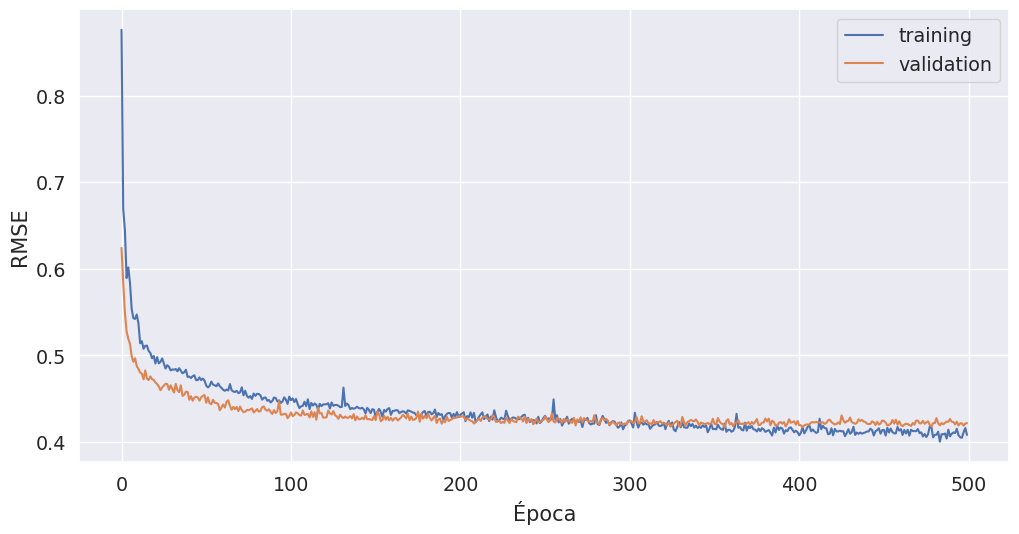

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 14s - loss: 1.9284

1920/6000 [========>.....................] - ETA: 0s - loss: 1.3202 

3840/6000 [==================>...........] - ETA: 0s - loss: 1.1443

5696/6000 [===========================>..] - ETA: 0s - loss: 1.0390

6000/6000 [==============================] - 0s 53us/step - loss: 1.0254 - val_loss: 0.7373


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7299

1984/6000 [========>.....................] - ETA: 0s - loss: 0.6976

3968/6000 [==================>...........] - ETA: 0s - loss: 0.6734

5888/6000 [============================>.] - ETA: 0s - loss: 0.6715

6000/6000 [==============================] - 0s 37us/step - loss: 0.6693 - val_loss: 0.5844


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3802

2016/6000 [=========>....................] - ETA: 0s - loss: 0.5528

3936/6000 [==================>...........] - ETA: 0s - loss: 0.5543

5824/6000 [============================>.] - ETA: 0s - loss: 0.5413

6000/6000 [==============================] - 0s 38us/step - loss: 0.5394 - val_loss: 0.4959


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4920

1888/6000 [========>.....................] - ETA: 0s - loss: 0.4845

3776/6000 [=================>............] - ETA: 0s - loss: 0.4770

5728/6000 [===========================>..] - ETA: 0s - loss: 0.4910

6000/6000 [==============================] - 0s 38us/step - loss: 0.4931 - val_loss: 0.4478


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2951

1824/6000 [========>.....................] - ETA: 0s - loss: 0.4593

3680/6000 [=================>............] - ETA: 0s - loss: 0.4589

5504/6000 [==========================>...] - ETA: 0s - loss: 0.4423

6000/6000 [==============================] - 0s 39us/step - loss: 0.4422 - val_loss: 0.4219


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2978

1920/6000 [========>.....................] - ETA: 0s - loss: 0.4133

3680/6000 [=================>............] - ETA: 0s - loss: 0.4109

5440/6000 [==========================>...] - ETA: 0s - loss: 0.4213

6000/6000 [==============================] - 0s 40us/step - loss: 0.4226 - val_loss: 0.4075


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2890

1920/6000 [========>.....................] - ETA: 0s - loss: 0.3974

3808/6000 [==================>...........] - ETA: 0s - loss: 0.3891

5632/6000 [===========================>..] - ETA: 0s - loss: 0.4283

6000/6000 [==============================] - 0s 39us/step - loss: 0.4289 - val_loss: 0.3855


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3256

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3936

3712/6000 [=================>............] - ETA: 0s - loss: 0.3981

5600/6000 [===========================>..] - ETA: 0s - loss: 0.3875

6000/6000 [==============================] - 0s 38us/step - loss: 0.3880 - val_loss: 0.3723


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3196

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3707

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3678

5856/6000 [============================>.] - ETA: 0s - loss: 0.3709

6000/6000 [==============================] - 0s 37us/step - loss: 0.3697 - val_loss: 0.3601


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3129

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3755

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3648

5792/6000 [===========================>..] - ETA: 0s - loss: 0.3572

6000/6000 [==============================] - 0s 38us/step - loss: 0.3589 - val_loss: 0.3629


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3790

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3890

3616/6000 [=================>............] - ETA: 0s - loss: 0.3851

5376/6000 [=========================>....] - ETA: 0s - loss: 0.3717

6000/6000 [==============================] - 0s 40us/step - loss: 0.3671 - val_loss: 0.3472


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2339

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3507

3520/6000 [================>.............] - ETA: 0s - loss: 0.3451

5312/6000 [=========================>....] - ETA: 0s - loss: 0.3461

6000/6000 [==============================] - 0s 40us/step - loss: 0.3446 - val_loss: 0.3356


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2687

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3472

3744/6000 [=================>............] - ETA: 0s - loss: 0.3420

5440/6000 [==========================>...] - ETA: 0s - loss: 0.3414

6000/6000 [==============================] - 0s 40us/step - loss: 0.3369 - val_loss: 0.3281


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3837

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3305

3648/6000 [=================>............] - ETA: 0s - loss: 0.3284

5504/6000 [==========================>...] - ETA: 0s - loss: 0.3365

6000/6000 [==============================] - 0s 39us/step - loss: 0.3376 - val_loss: 0.3307


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3933

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3189

3584/6000 [================>.............] - ETA: 0s - loss: 0.3321

5376/6000 [=========================>....] - ETA: 0s - loss: 0.3303

6000/6000 [==============================] - 0s 39us/step - loss: 0.3319 - val_loss: 0.3199


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2878

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3220

3680/6000 [=================>............] - ETA: 0s - loss: 0.3280

5568/6000 [==========================>...] - ETA: 0s - loss: 0.3273

6000/6000 [==============================] - 0s 39us/step - loss: 0.3279 - val_loss: 0.3217


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3021

3712/6000 [=================>............] - ETA: 0s - loss: 0.3106

5504/6000 [==========================>...] - ETA: 0s - loss: 0.3199

6000/6000 [==============================] - 0s 39us/step - loss: 0.3212 - val_loss: 0.3305


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3483

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3137

3840/6000 [==================>...........] - ETA: 0s - loss: 0.3096

5760/6000 [===========================>..] - ETA: 0s - loss: 0.3118

6000/6000 [==============================] - 0s 38us/step - loss: 0.3155 - val_loss: 0.3321


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2071

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3017

3616/6000 [=================>............] - ETA: 0s - loss: 0.3036

5408/6000 [==========================>...] - ETA: 0s - loss: 0.3136

6000/6000 [==============================] - 0s 41us/step - loss: 0.3144 - val_loss: 0.3061


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3930

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2828

3360/6000 [===============>..............] - ETA: 0s - loss: 0.3009

5088/6000 [========================>.....] - ETA: 0s - loss: 0.3040

6000/6000 [==============================] - 0s 42us/step - loss: 0.3130 - val_loss: 0.3138


Epoch 21/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2397

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2990

3648/6000 [=================>............] - ETA: 0s - loss: 0.2982

5504/6000 [==========================>...] - ETA: 0s - loss: 0.3092

6000/6000 [==============================] - 0s 39us/step - loss: 0.3080 - val_loss: 0.3058


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3147

3616/6000 [=================>............] - ETA: 0s - loss: 0.3115

5408/6000 [==========================>...] - ETA: 0s - loss: 0.3032

6000/6000 [==============================] - 0s 39us/step - loss: 0.3067 - val_loss: 0.3058


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2542

1920/6000 [========>.....................] - ETA: 0s - loss: 0.3073

3680/6000 [=================>............] - ETA: 0s - loss: 0.3036

5504/6000 [==========================>...] - ETA: 0s - loss: 0.3025

6000/6000 [==============================] - 0s 39us/step - loss: 0.3036 - val_loss: 0.3188


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4090

1920/6000 [========>.....................] - ETA: 0s - loss: 0.3112

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2995

5760/6000 [===========================>..] - ETA: 0s - loss: 0.3042

6000/6000 [==============================] - 0s 38us/step - loss: 0.3024 - val_loss: 0.3013


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2236

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2948

3648/6000 [=================>............] - ETA: 0s - loss: 0.3010

5440/6000 [==========================>...] - ETA: 0s - loss: 0.3003

6000/6000 [==============================] - 0s 39us/step - loss: 0.3016 - val_loss: 0.3008


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4714

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2981

3808/6000 [==================>...........] - ETA: 0s - loss: 0.3005

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2970

6000/6000 [==============================] - 0s 38us/step - loss: 0.2995 - val_loss: 0.2953


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2680

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2670

3776/6000 [=================>............] - ETA: 0s - loss: 0.2750

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2923

6000/6000 [==============================] - 0s 38us/step - loss: 0.2956 - val_loss: 0.3059


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2379

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3078

3584/6000 [================>.............] - ETA: 0s - loss: 0.3065

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2966

6000/6000 [==============================] - 0s 40us/step - loss: 0.2978 - val_loss: 0.2959


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2824

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2905

3456/6000 [================>.............] - ETA: 0s - loss: 0.2905

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2892

6000/6000 [==============================] - 0s 40us/step - loss: 0.2948 - val_loss: 0.2922


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4924

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3106

3680/6000 [=================>............] - ETA: 0s - loss: 0.2945

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2955

6000/6000 [==============================] - 0s 40us/step - loss: 0.2947 - val_loss: 0.2935


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2798

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2683

3520/6000 [================>.............] - ETA: 0s - loss: 0.2760

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2817

6000/6000 [==============================] - 0s 40us/step - loss: 0.2899 - val_loss: 0.2884


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2951

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2788

3648/6000 [=================>............] - ETA: 0s - loss: 0.2867

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2928

6000/6000 [==============================] - 0s 40us/step - loss: 0.2919 - val_loss: 0.2903


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2859

3648/6000 [=================>............] - ETA: 0s - loss: 0.2818

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2901

6000/6000 [==============================] - 0s 39us/step - loss: 0.2899 - val_loss: 0.2842


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2704

3488/6000 [================>.............] - ETA: 0s - loss: 0.2809

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2894

6000/6000 [==============================] - 0s 40us/step - loss: 0.2919 - val_loss: 0.2876


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2982

1888/6000 [========>.....................] - ETA: 0s - loss: 0.3059

3776/6000 [=================>............] - ETA: 0s - loss: 0.2926

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2878

6000/6000 [==============================] - 0s 39us/step - loss: 0.2854 - val_loss: 0.2870


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3071

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3101

3648/6000 [=================>............] - ETA: 0s - loss: 0.2925

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2936

6000/6000 [==============================] - 0s 39us/step - loss: 0.2909 - val_loss: 0.2952


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2802

3776/6000 [=================>............] - ETA: 0s - loss: 0.2803

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2890

6000/6000 [==============================] - 0s 38us/step - loss: 0.2900 - val_loss: 0.2865


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5424

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2993

3776/6000 [=================>............] - ETA: 0s - loss: 0.2885

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2859

6000/6000 [==============================] - 0s 38us/step - loss: 0.2844 - val_loss: 0.2954


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2190

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2881

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2868

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2829

6000/6000 [==============================] - 0s 36us/step - loss: 0.2830 - val_loss: 0.2822


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2279

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2922

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2842

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2862

6000/6000 [==============================] - 0s 36us/step - loss: 0.2844 - val_loss: 0.2818


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5594

1888/6000 [========>.....................] - ETA: 0s - loss: 0.3028

3680/6000 [=================>............] - ETA: 0s - loss: 0.2800

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2733

6000/6000 [==============================] - 0s 37us/step - loss: 0.2803 - val_loss: 0.2815


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4164

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2792

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2824

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2818

6000/6000 [==============================] - 0s 36us/step - loss: 0.2810 - val_loss: 0.2834


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2936

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2773

3744/6000 [=================>............] - ETA: 0s - loss: 0.2815

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2816

6000/6000 [==============================] - 0s 37us/step - loss: 0.2814 - val_loss: 0.2786


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2243

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2681

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2746

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2797

6000/6000 [==============================] - 0s 37us/step - loss: 0.2796 - val_loss: 0.2786


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3345

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2642

3616/6000 [=================>............] - ETA: 0s - loss: 0.2698

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2780

6000/6000 [==============================] - 0s 37us/step - loss: 0.2756 - val_loss: 0.2869


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2385

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2819

3648/6000 [=================>............] - ETA: 0s - loss: 0.2893

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2788

6000/6000 [==============================] - 0s 37us/step - loss: 0.2791 - val_loss: 0.2819


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2188

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2714

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2834

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2812

6000/6000 [==============================] - 0s 36us/step - loss: 0.2800 - val_loss: 0.2759


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2689

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2748

5824/6000 [============================>.] - ETA: 0s - loss: 0.2816

6000/6000 [==============================] - 0s 35us/step - loss: 0.2803 - val_loss: 0.2770


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2215

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2703

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2689

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2760

6000/6000 [==============================] - 0s 36us/step - loss: 0.2754 - val_loss: 0.2853


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3585

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2854

3680/6000 [=================>............] - ETA: 0s - loss: 0.2699

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2719

6000/6000 [==============================] - 0s 37us/step - loss: 0.2755 - val_loss: 0.2754


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5087

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2665

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2754

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2781

6000/6000 [==============================] - 0s 36us/step - loss: 0.2760 - val_loss: 0.2723


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1833

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2779

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2766

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2746

6000/6000 [==============================] - 0s 37us/step - loss: 0.2729 - val_loss: 0.2816


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3330

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2512

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2594

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2703

6000/6000 [==============================] - 0s 37us/step - loss: 0.2737 - val_loss: 0.2829


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2827

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2834

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2757

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2727

6000/6000 [==============================] - 0s 36us/step - loss: 0.2723 - val_loss: 0.2733


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3541

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2544

3712/6000 [=================>............] - ETA: 0s - loss: 0.2711

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2687

6000/6000 [==============================] - 0s 37us/step - loss: 0.2715 - val_loss: 0.2779


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3810

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2925

3680/6000 [=================>............] - ETA: 0s - loss: 0.2783

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2727

6000/6000 [==============================] - 0s 38us/step - loss: 0.2703 - val_loss: 0.2803


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2834

3744/6000 [=================>............] - ETA: 0s - loss: 0.2815

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2733

6000/6000 [==============================] - 0s 36us/step - loss: 0.2733 - val_loss: 0.2710


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2464

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2611

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2693

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2722

6000/6000 [==============================] - 0s 36us/step - loss: 0.2729 - val_loss: 0.2731


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5942

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2930

3680/6000 [=================>............] - ETA: 0s - loss: 0.2749

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2713

6000/6000 [==============================] - 0s 37us/step - loss: 0.2714 - val_loss: 0.2725


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2442

3680/6000 [=================>............] - ETA: 0s - loss: 0.2550

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2650

6000/6000 [==============================] - 0s 37us/step - loss: 0.2668 - val_loss: 0.2822


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4375

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2782

3584/6000 [================>.............] - ETA: 0s - loss: 0.2770

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2672

6000/6000 [==============================] - 0s 38us/step - loss: 0.2670 - val_loss: 0.2742


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2408

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2583

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2631

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2665

6000/6000 [==============================] - 0s 36us/step - loss: 0.2675 - val_loss: 0.2959


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2790

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2983

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2806

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2678

6000/6000 [==============================] - 0s 36us/step - loss: 0.2700 - val_loss: 0.2679


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2018

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2694

3520/6000 [================>.............] - ETA: 0s - loss: 0.2706

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2682

6000/6000 [==============================] - 0s 38us/step - loss: 0.2681 - val_loss: 0.2712


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2380

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2599

3552/6000 [================>.............] - ETA: 0s - loss: 0.2736

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2655

6000/6000 [==============================] - 0s 38us/step - loss: 0.2670 - val_loss: 0.2696


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2345

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2638

3552/6000 [================>.............] - ETA: 0s - loss: 0.2728

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2622

6000/6000 [==============================] - 0s 37us/step - loss: 0.2646 - val_loss: 0.2766


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4383

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2561

3776/6000 [=================>............] - ETA: 0s - loss: 0.2655

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2656

6000/6000 [==============================] - 0s 36us/step - loss: 0.2663 - val_loss: 0.2652


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2206

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2491

3584/6000 [================>.............] - ETA: 0s - loss: 0.2636

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2696

6000/6000 [==============================] - 0s 38us/step - loss: 0.2678 - val_loss: 0.2732


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2312

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2424

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2593

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2664

6000/6000 [==============================] - 0s 37us/step - loss: 0.2639 - val_loss: 0.2647


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2474

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2674

3648/6000 [=================>............] - ETA: 0s - loss: 0.2632

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2645

6000/6000 [==============================] - 0s 38us/step - loss: 0.2684 - val_loss: 0.2709


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3720

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2649

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2709

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2659

6000/6000 [==============================] - 0s 36us/step - loss: 0.2664 - val_loss: 0.2622


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2003

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2729

3744/6000 [=================>............] - ETA: 0s - loss: 0.2647

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2640

6000/6000 [==============================] - 0s 36us/step - loss: 0.2641 - val_loss: 0.2679


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4032

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2549

3680/6000 [=================>............] - ETA: 0s - loss: 0.2565

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2558

6000/6000 [==============================] - 0s 38us/step - loss: 0.2601 - val_loss: 0.2635


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3290

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2654

3712/6000 [=================>............] - ETA: 0s - loss: 0.2658

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2589

6000/6000 [==============================] - 0s 37us/step - loss: 0.2598 - val_loss: 0.2651


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1865

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2606

3680/6000 [=================>............] - ETA: 0s - loss: 0.2621

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2654

6000/6000 [==============================] - 0s 37us/step - loss: 0.2657 - val_loss: 0.2638


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2916

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2593

3776/6000 [=================>............] - ETA: 0s - loss: 0.2666

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2681

6000/6000 [==============================] - 0s 37us/step - loss: 0.2650 - val_loss: 0.2627


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3092

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2650

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2576

5856/6000 [============================>.] - ETA: 0s - loss: 0.2615

6000/6000 [==============================] - 0s 36us/step - loss: 0.2604 - val_loss: 0.2578


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3072

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2758

3680/6000 [=================>............] - ETA: 0s - loss: 0.2675

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2621

6000/6000 [==============================] - 0s 37us/step - loss: 0.2581 - val_loss: 0.2642


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3146

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2487

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2615

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2624

6000/6000 [==============================] - 0s 37us/step - loss: 0.2611 - val_loss: 0.2731


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2669

3680/6000 [=================>............] - ETA: 0s - loss: 0.2573

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2620

6000/6000 [==============================] - 0s 37us/step - loss: 0.2601 - val_loss: 0.2610


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1816

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2424

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2587

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2558

6000/6000 [==============================] - 0s 36us/step - loss: 0.2571 - val_loss: 0.2654


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2364

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2541

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2567

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2536

6000/6000 [==============================] - 0s 37us/step - loss: 0.2566 - val_loss: 0.2641


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3015

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2667

3744/6000 [=================>............] - ETA: 0s - loss: 0.2619

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2560

6000/6000 [==============================] - 0s 37us/step - loss: 0.2569 - val_loss: 0.2716


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2324

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2746

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2717

5824/6000 [============================>.] - ETA: 0s - loss: 0.2628

6000/6000 [==============================] - 0s 36us/step - loss: 0.2619 - val_loss: 0.2600


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2607

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2585

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2608

6000/6000 [==============================] - 0s 36us/step - loss: 0.2606 - val_loss: 0.2590


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2540

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2555

5856/6000 [============================>.] - ETA: 0s - loss: 0.2587

6000/6000 [==============================] - 0s 35us/step - loss: 0.2583 - val_loss: 0.2548


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3569

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2551

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2552

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2580

6000/6000 [==============================] - 0s 36us/step - loss: 0.2587 - val_loss: 0.2628


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2610

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2517

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2658

5824/6000 [============================>.] - ETA: 0s - loss: 0.2552

6000/6000 [==============================] - 0s 36us/step - loss: 0.2541 - val_loss: 0.2560


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3046

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2448

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2585

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2563

6000/6000 [==============================] - 0s 36us/step - loss: 0.2540 - val_loss: 0.2668


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2053

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2458

3648/6000 [=================>............] - ETA: 0s - loss: 0.2479

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2541

6000/6000 [==============================] - 0s 37us/step - loss: 0.2538 - val_loss: 0.2624


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3607

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2623

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2649

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2576

6000/6000 [==============================] - 0s 36us/step - loss: 0.2542 - val_loss: 0.2568


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1729

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2558

3680/6000 [=================>............] - ETA: 0s - loss: 0.2595

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2574

6000/6000 [==============================] - 0s 37us/step - loss: 0.2560 - val_loss: 0.2527


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2598

3776/6000 [=================>............] - ETA: 0s - loss: 0.2636

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2566

6000/6000 [==============================] - 0s 37us/step - loss: 0.2566 - val_loss: 0.2707


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2633

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2522

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2531

6000/6000 [==============================] - 0s 36us/step - loss: 0.2527 - val_loss: 0.2607


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2338

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2382

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2543

6000/6000 [==============================] - 0s 36us/step - loss: 0.2531 - val_loss: 0.2709


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2656

3776/6000 [=================>............] - ETA: 0s - loss: 0.2563

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2516

6000/6000 [==============================] - 0s 37us/step - loss: 0.2543 - val_loss: 0.2599


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2526

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2498

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2519

6000/6000 [==============================] - 0s 36us/step - loss: 0.2513 - val_loss: 0.2618


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3353

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2529

3776/6000 [=================>............] - ETA: 0s - loss: 0.2538

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2501

6000/6000 [==============================] - 0s 36us/step - loss: 0.2509 - val_loss: 0.2548


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5361

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2523

3680/6000 [=================>............] - ETA: 0s - loss: 0.2599

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2542

6000/6000 [==============================] - 0s 37us/step - loss: 0.2534 - val_loss: 0.2523


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2915

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2461

3616/6000 [=================>............] - ETA: 0s - loss: 0.2508

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2573

6000/6000 [==============================] - 0s 37us/step - loss: 0.2539 - val_loss: 0.2518


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1938

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2279

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2379

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2497

6000/6000 [==============================] - 0s 36us/step - loss: 0.2498 - val_loss: 0.2575


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2529

3712/6000 [=================>............] - ETA: 0s - loss: 0.2450

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2482

6000/6000 [==============================] - 0s 37us/step - loss: 0.2516 - val_loss: 0.2605


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2590

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2549

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2491

6000/6000 [==============================] - 0s 37us/step - loss: 0.2513 - val_loss: 0.2486


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2627

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2569

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2516

6000/6000 [==============================] - 0s 36us/step - loss: 0.2515 - val_loss: 0.2544


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2397

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2522

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2498

6000/6000 [==============================] - 0s 37us/step - loss: 0.2505 - val_loss: 0.2474


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2058

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2513

3776/6000 [=================>............] - ETA: 0s - loss: 0.2561

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2450

6000/6000 [==============================] - 0s 36us/step - loss: 0.2488 - val_loss: 0.2596


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2700

3680/6000 [=================>............] - ETA: 0s - loss: 0.2631

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2524

6000/6000 [==============================] - 0s 37us/step - loss: 0.2513 - val_loss: 0.2595


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4383

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2386

3648/6000 [=================>............] - ETA: 0s - loss: 0.2383

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 38us/step - loss: 0.2495 - val_loss: 0.2498


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2482

3616/6000 [=================>............] - ETA: 0s - loss: 0.2504

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2481

6000/6000 [==============================] - 0s 38us/step - loss: 0.2513 - val_loss: 0.2633


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1074

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2260

3552/6000 [================>.............] - ETA: 0s - loss: 0.2565

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 38us/step - loss: 0.2488 - val_loss: 0.2467


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2133

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2541

3648/6000 [=================>............] - ETA: 0s - loss: 0.2526

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2496

6000/6000 [==============================] - 0s 38us/step - loss: 0.2463 - val_loss: 0.2562


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4289

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2492

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2496

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 36us/step - loss: 0.2497 - val_loss: 0.2504


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2937

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2582

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2470

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 37us/step - loss: 0.2472 - val_loss: 0.2462


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2629

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2681

3648/6000 [=================>............] - ETA: 0s - loss: 0.2520

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2456

6000/6000 [==============================] - 0s 38us/step - loss: 0.2455 - val_loss: 0.2445


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1376

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2335

3744/6000 [=================>............] - ETA: 0s - loss: 0.2408

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2472

6000/6000 [==============================] - 0s 37us/step - loss: 0.2473 - val_loss: 0.2460


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2188

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2480

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2375

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2489

6000/6000 [==============================] - 0s 37us/step - loss: 0.2465 - val_loss: 0.2572


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2325

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2603

3712/6000 [=================>............] - ETA: 0s - loss: 0.2533

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2462

6000/6000 [==============================] - 0s 37us/step - loss: 0.2439 - val_loss: 0.2617


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2600

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2466

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2494

6000/6000 [==============================] - 0s 36us/step - loss: 0.2493 - val_loss: 0.2458


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2308

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2376

3584/6000 [================>.............] - ETA: 0s - loss: 0.2385

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 38us/step - loss: 0.2463 - val_loss: 0.2481


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2777

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2253

3776/6000 [=================>............] - ETA: 0s - loss: 0.2409

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2450

6000/6000 [==============================] - 0s 37us/step - loss: 0.2450 - val_loss: 0.2497


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2059

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2480

3776/6000 [=================>............] - ETA: 0s - loss: 0.2521

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2492

6000/6000 [==============================] - 0s 37us/step - loss: 0.2460 - val_loss: 0.2478


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2277

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2415

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2446

6000/6000 [==============================] - 0s 36us/step - loss: 0.2449 - val_loss: 0.2438


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2328

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2583

3712/6000 [=================>............] - ETA: 0s - loss: 0.2430

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2434

6000/6000 [==============================] - 0s 37us/step - loss: 0.2460 - val_loss: 0.2473


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2574

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2543

3776/6000 [=================>............] - ETA: 0s - loss: 0.2542

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2498

6000/6000 [==============================] - 0s 36us/step - loss: 0.2467 - val_loss: 0.2417


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4972

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2597

3744/6000 [=================>............] - ETA: 0s - loss: 0.2409

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2464

6000/6000 [==============================] - 0s 37us/step - loss: 0.2440 - val_loss: 0.2423


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2420

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2367

3680/6000 [=================>............] - ETA: 0s - loss: 0.2406

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2443

6000/6000 [==============================] - 0s 37us/step - loss: 0.2439 - val_loss: 0.2433


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2471

3776/6000 [=================>............] - ETA: 0s - loss: 0.2387

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2409

6000/6000 [==============================] - 0s 37us/step - loss: 0.2453 - val_loss: 0.2456


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1719

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2408

3712/6000 [=================>............] - ETA: 0s - loss: 0.2414

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2383

6000/6000 [==============================] - 0s 36us/step - loss: 0.2411 - val_loss: 0.2760


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1511

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2494

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2436

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2439

6000/6000 [==============================] - 0s 37us/step - loss: 0.2454 - val_loss: 0.2558


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2048

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2362

3648/6000 [=================>............] - ETA: 0s - loss: 0.2461

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2464

6000/6000 [==============================] - 0s 38us/step - loss: 0.2453 - val_loss: 0.2462


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3283

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2376

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2385

5856/6000 [============================>.] - ETA: 0s - loss: 0.2450

6000/6000 [==============================] - 0s 36us/step - loss: 0.2443 - val_loss: 0.2538


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2144

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2522

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2409

5952/6000 [============================>.] - ETA: 0s - loss: 0.2413

6000/6000 [==============================] - 0s 36us/step - loss: 0.2412 - val_loss: 0.2424


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2120

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2443

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2541

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 36us/step - loss: 0.2421 - val_loss: 0.2505


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2086

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2418

3712/6000 [=================>............] - ETA: 0s - loss: 0.2384

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2406

6000/6000 [==============================] - 0s 36us/step - loss: 0.2425 - val_loss: 0.2749


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3318

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2389

3712/6000 [=================>............] - ETA: 0s - loss: 0.2363

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 37us/step - loss: 0.2439 - val_loss: 0.2488


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2273

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2450

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2453

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2420

6000/6000 [==============================] - 0s 36us/step - loss: 0.2425 - val_loss: 0.2469


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5239

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2296

3744/6000 [=================>............] - ETA: 0s - loss: 0.2361

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2421

6000/6000 [==============================] - 0s 37us/step - loss: 0.2407 - val_loss: 0.2631


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4094

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2613

3712/6000 [=================>............] - ETA: 0s - loss: 0.2466

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 37us/step - loss: 0.2403 - val_loss: 0.2479


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2335

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2275

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 36us/step - loss: 0.2366 - val_loss: 0.2472


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2301

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2295

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2241

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 36us/step - loss: 0.2386 - val_loss: 0.2474


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2346

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2385

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2449

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2406

6000/6000 [==============================] - 0s 36us/step - loss: 0.2412 - val_loss: 0.2392


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1851

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2311

3680/6000 [=================>............] - ETA: 0s - loss: 0.2455

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 37us/step - loss: 0.2384 - val_loss: 0.2422


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2602

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2351

3744/6000 [=================>............] - ETA: 0s - loss: 0.2397

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2378

6000/6000 [==============================] - 0s 37us/step - loss: 0.2379 - val_loss: 0.2405


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2330

3648/6000 [=================>............] - ETA: 0s - loss: 0.2372

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2423

6000/6000 [==============================] - 0s 37us/step - loss: 0.2385 - val_loss: 0.2428


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1986

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2603

3712/6000 [=================>............] - ETA: 0s - loss: 0.2509

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 37us/step - loss: 0.2400 - val_loss: 0.2450


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2570

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2026

3648/6000 [=================>............] - ETA: 0s - loss: 0.2234

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 37us/step - loss: 0.2402 - val_loss: 0.2482


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2567

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2192

3552/6000 [================>.............] - ETA: 0s - loss: 0.2310

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 38us/step - loss: 0.2401 - val_loss: 0.2391


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4048

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2381

3488/6000 [================>.............] - ETA: 0s - loss: 0.2373

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 38us/step - loss: 0.2390 - val_loss: 0.2398


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5382

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2260

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2316

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2387

6000/6000 [==============================] - 0s 36us/step - loss: 0.2398 - val_loss: 0.2427


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3485

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2538

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2459

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2332

6000/6000 [==============================] - 0s 36us/step - loss: 0.2373 - val_loss: 0.2447


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2400

3776/6000 [=================>............] - ETA: 0s - loss: 0.2384

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2391

6000/6000 [==============================] - 0s 37us/step - loss: 0.2392 - val_loss: 0.2481


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2914

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2459

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2394

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 37us/step - loss: 0.2380 - val_loss: 0.2463


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1599

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2411

3712/6000 [=================>............] - ETA: 0s - loss: 0.2434

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2368

6000/6000 [==============================] - 0s 36us/step - loss: 0.2380 - val_loss: 0.2366


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2313

3712/6000 [=================>............] - ETA: 0s - loss: 0.2313

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 37us/step - loss: 0.2410 - val_loss: 0.2385


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2554

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2393

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2268

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 36us/step - loss: 0.2353 - val_loss: 0.2452


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2301

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2340

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 36us/step - loss: 0.2355 - val_loss: 0.2383


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2075

3744/6000 [=================>............] - ETA: 0s - loss: 0.2314

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 37us/step - loss: 0.2376 - val_loss: 0.2515


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2028

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2544

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2419

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 36us/step - loss: 0.2380 - val_loss: 0.2389


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2014

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2259

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2345

5856/6000 [============================>.] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 36us/step - loss: 0.2359 - val_loss: 0.2436


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2353

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2381

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 36us/step - loss: 0.2341 - val_loss: 0.2466


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1076

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2312

3584/6000 [================>.............] - ETA: 0s - loss: 0.2350

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 37us/step - loss: 0.2355 - val_loss: 0.2726


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3166

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2402

3712/6000 [=================>............] - ETA: 0s - loss: 0.2388

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 37us/step - loss: 0.2368 - val_loss: 0.2383


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2055

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2432

3648/6000 [=================>............] - ETA: 0s - loss: 0.2259

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2338

6000/6000 [==============================] - 0s 37us/step - loss: 0.2338 - val_loss: 0.2462


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2253

3584/6000 [================>.............] - ETA: 0s - loss: 0.2344

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2371

6000/6000 [==============================] - 0s 38us/step - loss: 0.2362 - val_loss: 0.2435


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2955

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2333

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2405

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 36us/step - loss: 0.2342 - val_loss: 0.2507


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3282

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2311

3744/6000 [=================>............] - ETA: 0s - loss: 0.2262

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 37us/step - loss: 0.2340 - val_loss: 0.2389


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2491

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2322

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 36us/step - loss: 0.2402 - val_loss: 0.2483


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2259

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2356

5888/6000 [============================>.] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 36us/step - loss: 0.2350 - val_loss: 0.2423


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1889

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2090

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2243

5888/6000 [============================>.] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 35us/step - loss: 0.2332 - val_loss: 0.2328


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2270

3584/6000 [================>.............] - ETA: 0s - loss: 0.2312

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 38us/step - loss: 0.2334 - val_loss: 0.2572


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2190

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2300

5824/6000 [============================>.] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 36us/step - loss: 0.2329 - val_loss: 0.2385


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4267

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2234

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2362

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 37us/step - loss: 0.2356 - val_loss: 0.2376


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3620

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2392

3616/6000 [=================>............] - ETA: 0s - loss: 0.2433

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2344

6000/6000 [==============================] - 0s 38us/step - loss: 0.2346 - val_loss: 0.2430


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2268

3520/6000 [================>.............] - ETA: 0s - loss: 0.2287

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 38us/step - loss: 0.2335 - val_loss: 0.2350


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2450

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2432

3584/6000 [================>.............] - ETA: 0s - loss: 0.2401

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 38us/step - loss: 0.2328 - val_loss: 0.2416


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2035

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3584/6000 [================>.............] - ETA: 0s - loss: 0.2338

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 38us/step - loss: 0.2335 - val_loss: 0.2367


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2227

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2440

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2400

5856/6000 [============================>.] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 35us/step - loss: 0.2340 - val_loss: 0.2351


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2358

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2447

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 36us/step - loss: 0.2320 - val_loss: 0.2351


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1418

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2367

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2314

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 36us/step - loss: 0.2295 - val_loss: 0.2433


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2917

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2342

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2322

5824/6000 [============================>.] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 36us/step - loss: 0.2312 - val_loss: 0.2317


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2584

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2260

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2397

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 36us/step - loss: 0.2347 - val_loss: 0.2411


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2287

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2337

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 36us/step - loss: 0.2337 - val_loss: 0.2345


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2354

3744/6000 [=================>............] - ETA: 0s - loss: 0.2286

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 37us/step - loss: 0.2311 - val_loss: 0.2424


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2237

3776/6000 [=================>............] - ETA: 0s - loss: 0.2261

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 37us/step - loss: 0.2319 - val_loss: 0.2310


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2579

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2275

3744/6000 [=================>............] - ETA: 0s - loss: 0.2211

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 36us/step - loss: 0.2287 - val_loss: 0.2355


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1901

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2274

3648/6000 [=================>............] - ETA: 0s - loss: 0.2252

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 37us/step - loss: 0.2322 - val_loss: 0.2473


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2247

3616/6000 [=================>............] - ETA: 0s - loss: 0.2317

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 37us/step - loss: 0.2305 - val_loss: 0.2383


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3840

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2406

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2329

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 36us/step - loss: 0.2297 - val_loss: 0.2372


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2130

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2280

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2311

5888/6000 [============================>.] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 36us/step - loss: 0.2331 - val_loss: 0.2391


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2922

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2190

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2261

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 36us/step - loss: 0.2315 - val_loss: 0.2341


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3029

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2097

3680/6000 [=================>............] - ETA: 0s - loss: 0.2230

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 37us/step - loss: 0.2305 - val_loss: 0.2358


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2763

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2250

3680/6000 [=================>............] - ETA: 0s - loss: 0.2364

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 37us/step - loss: 0.2335 - val_loss: 0.2389


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2163

3648/6000 [=================>............] - ETA: 0s - loss: 0.2252

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 37us/step - loss: 0.2329 - val_loss: 0.2350


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2143

3712/6000 [=================>............] - ETA: 0s - loss: 0.2200

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 36us/step - loss: 0.2311 - val_loss: 0.2350


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2162

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2310

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2264

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 36us/step - loss: 0.2301 - val_loss: 0.2538


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1826

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2208

3648/6000 [=================>............] - ETA: 0s - loss: 0.2199

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 37us/step - loss: 0.2321 - val_loss: 0.2331


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3429

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2137

3616/6000 [=================>............] - ETA: 0s - loss: 0.2333

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 37us/step - loss: 0.2309 - val_loss: 0.2296


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2279

3776/6000 [=================>............] - ETA: 0s - loss: 0.2384

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 37us/step - loss: 0.2300 - val_loss: 0.2404


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3579

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2289

3680/6000 [=================>............] - ETA: 0s - loss: 0.2313

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 37us/step - loss: 0.2293 - val_loss: 0.2301


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2286

3648/6000 [=================>............] - ETA: 0s - loss: 0.2413

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 37us/step - loss: 0.2361 - val_loss: 0.2412


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2395

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2266

3552/6000 [================>.............] - ETA: 0s - loss: 0.2230

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2314

6000/6000 [==============================] - 0s 38us/step - loss: 0.2312 - val_loss: 0.2410


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2835

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2279

3744/6000 [=================>............] - ETA: 0s - loss: 0.2275

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2332

6000/6000 [==============================] - 0s 37us/step - loss: 0.2334 - val_loss: 0.2344


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1841

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2346

3616/6000 [=================>............] - ETA: 0s - loss: 0.2288

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 38us/step - loss: 0.2297 - val_loss: 0.2414


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2194

3712/6000 [=================>............] - ETA: 0s - loss: 0.2293

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 37us/step - loss: 0.2302 - val_loss: 0.2533


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1776

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2284

3776/6000 [=================>............] - ETA: 0s - loss: 0.2353

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 37us/step - loss: 0.2307 - val_loss: 0.2309


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2821

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2415

3616/6000 [=================>............] - ETA: 0s - loss: 0.2264

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 37us/step - loss: 0.2289 - val_loss: 0.2408


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1903

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2375

3680/6000 [=================>............] - ETA: 0s - loss: 0.2330

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2336

6000/6000 [==============================] - 0s 37us/step - loss: 0.2331 - val_loss: 0.2412


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1998

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2237

3776/6000 [=================>............] - ETA: 0s - loss: 0.2257

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 37us/step - loss: 0.2297 - val_loss: 0.2306


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2288

3616/6000 [=================>............] - ETA: 0s - loss: 0.2342

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2324

6000/6000 [==============================] - 0s 38us/step - loss: 0.2317 - val_loss: 0.2342


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1591

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2302

3616/6000 [=================>............] - ETA: 0s - loss: 0.2311

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 37us/step - loss: 0.2304 - val_loss: 0.2433


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2529

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2434

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2359

5824/6000 [============================>.] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 36us/step - loss: 0.2297 - val_loss: 0.2436


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2091

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2261

3424/6000 [================>.............] - ETA: 0s - loss: 0.2310

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 39us/step - loss: 0.2303 - val_loss: 0.2282


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2291

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2212

3680/6000 [=================>............] - ETA: 0s - loss: 0.2353

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 37us/step - loss: 0.2285 - val_loss: 0.2315


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2179

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2299

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 36us/step - loss: 0.2290 - val_loss: 0.2325


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1663

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2300

3648/6000 [=================>............] - ETA: 0s - loss: 0.2178

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 37us/step - loss: 0.2275 - val_loss: 0.2344


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3216

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2066

3776/6000 [=================>............] - ETA: 0s - loss: 0.2260

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 37us/step - loss: 0.2298 - val_loss: 0.2492


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2179

3616/6000 [=================>............] - ETA: 0s - loss: 0.2319

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 38us/step - loss: 0.2291 - val_loss: 0.2406


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2836

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2292

3616/6000 [=================>............] - ETA: 0s - loss: 0.2328

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 37us/step - loss: 0.2291 - val_loss: 0.2353


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2215

3648/6000 [=================>............] - ETA: 0s - loss: 0.2225

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 37us/step - loss: 0.2264 - val_loss: 0.2372


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1836

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2154

3616/6000 [=================>............] - ETA: 0s - loss: 0.2202

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 38us/step - loss: 0.2283 - val_loss: 0.2298


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2055

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3616/6000 [=================>............] - ETA: 0s - loss: 0.2334

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 37us/step - loss: 0.2311 - val_loss: 0.2312


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1516

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2225

3648/6000 [=================>............] - ETA: 0s - loss: 0.2263

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 37us/step - loss: 0.2276 - val_loss: 0.2328


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2412

3520/6000 [================>.............] - ETA: 0s - loss: 0.2297

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 39us/step - loss: 0.2308 - val_loss: 0.2367


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3599

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2057

3584/6000 [================>.............] - ETA: 0s - loss: 0.2317

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 38us/step - loss: 0.2328 - val_loss: 0.2783


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3073

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2276

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2246

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 36us/step - loss: 0.2313 - val_loss: 0.2308


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2269

3776/6000 [=================>............] - ETA: 0s - loss: 0.2239

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 36us/step - loss: 0.2280 - val_loss: 0.2337


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2383

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2239

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 36us/step - loss: 0.2262 - val_loss: 0.2582


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2299

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2314

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 36us/step - loss: 0.2260 - val_loss: 0.2441


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1807

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2025

3680/6000 [=================>............] - ETA: 0s - loss: 0.2239

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 37us/step - loss: 0.2262 - val_loss: 0.2420


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2169

3648/6000 [=================>............] - ETA: 0s - loss: 0.2219

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 37us/step - loss: 0.2277 - val_loss: 0.2413


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2715

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2228

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2256

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 36us/step - loss: 0.2284 - val_loss: 0.2292


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1807

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3488/6000 [================>.............] - ETA: 0s - loss: 0.2312

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 38us/step - loss: 0.2290 - val_loss: 0.2299


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1857

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2483

3776/6000 [=================>............] - ETA: 0s - loss: 0.2349

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 36us/step - loss: 0.2278 - val_loss: 0.2418


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3736

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2203

3776/6000 [=================>............] - ETA: 0s - loss: 0.2291

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 36us/step - loss: 0.2308 - val_loss: 0.2316


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2470

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2182

3776/6000 [=================>............] - ETA: 0s - loss: 0.2323

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 36us/step - loss: 0.2287 - val_loss: 0.2336


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2313

3744/6000 [=================>............] - ETA: 0s - loss: 0.2207

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 38us/step - loss: 0.2253 - val_loss: 0.2304


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0971

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2247

3680/6000 [=================>............] - ETA: 0s - loss: 0.2300

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2344

6000/6000 [==============================] - 0s 37us/step - loss: 0.2311 - val_loss: 0.2326


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2481

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2361

3744/6000 [=================>............] - ETA: 0s - loss: 0.2252

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 36us/step - loss: 0.2277 - val_loss: 0.2371


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2218

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2342

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 36us/step - loss: 0.2283 - val_loss: 0.2265


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2512

3712/6000 [=================>............] - ETA: 0s - loss: 0.2328

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 37us/step - loss: 0.2248 - val_loss: 0.2359


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2090

3744/6000 [=================>............] - ETA: 0s - loss: 0.2240

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 36us/step - loss: 0.2264 - val_loss: 0.2312


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2436

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2397

5856/6000 [============================>.] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 36us/step - loss: 0.2264 - val_loss: 0.2377


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3363

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2119

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2107

5824/6000 [============================>.] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 35us/step - loss: 0.2262 - val_loss: 0.2297


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2309

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2288

5824/6000 [============================>.] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 36us/step - loss: 0.2254 - val_loss: 0.2384


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2045

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2198

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 36us/step - loss: 0.2282 - val_loss: 0.2376


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2732

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2310

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2283

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 36us/step - loss: 0.2277 - val_loss: 0.2346


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2251

3712/6000 [=================>............] - ETA: 0s - loss: 0.2307

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 37us/step - loss: 0.2265 - val_loss: 0.2271


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2929

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2325

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2334

5824/6000 [============================>.] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 36us/step - loss: 0.2261 - val_loss: 0.2357


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3034

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2484

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2355

5824/6000 [============================>.] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 36us/step - loss: 0.2286 - val_loss: 0.2292


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2208

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2232

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2312

6000/6000 [==============================] - 0s 36us/step - loss: 0.2308 - val_loss: 0.2593


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3107

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2226

3744/6000 [=================>............] - ETA: 0s - loss: 0.2340

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 37us/step - loss: 0.2262 - val_loss: 0.2281


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2270

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2251

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2206

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 36us/step - loss: 0.2257 - val_loss: 0.2286


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2685

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3648/6000 [=================>............] - ETA: 0s - loss: 0.2259

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 36us/step - loss: 0.2253 - val_loss: 0.2310


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2141

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2192

3776/6000 [=================>............] - ETA: 0s - loss: 0.2194

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 36us/step - loss: 0.2244 - val_loss: 0.2387


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1390

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2436

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2212

5856/6000 [============================>.] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 36us/step - loss: 0.2265 - val_loss: 0.2372


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2609

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2237

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2265

5952/6000 [============================>.] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 35us/step - loss: 0.2285 - val_loss: 0.2279


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2944

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2304

3680/6000 [=================>............] - ETA: 0s - loss: 0.2346

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2296

6000/6000 [==============================] - 0s 38us/step - loss: 0.2283 - val_loss: 0.2330


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1818

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2265

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2291

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 37us/step - loss: 0.2266 - val_loss: 0.2301


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2283

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2253

5888/6000 [============================>.] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 36us/step - loss: 0.2261 - val_loss: 0.2338


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2466

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2262

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2226

5952/6000 [============================>.] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 35us/step - loss: 0.2245 - val_loss: 0.2356


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2464

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2319

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 37us/step - loss: 0.2247 - val_loss: 0.2254


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3205

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2260

3648/6000 [=================>............] - ETA: 0s - loss: 0.2239

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 36us/step - loss: 0.2249 - val_loss: 0.2316


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1504

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2374

3744/6000 [=================>............] - ETA: 0s - loss: 0.2262

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 37us/step - loss: 0.2269 - val_loss: 0.2341


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1831

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2137

3616/6000 [=================>............] - ETA: 0s - loss: 0.2247

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 37us/step - loss: 0.2226 - val_loss: 0.2232


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2569

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2307

3712/6000 [=================>............] - ETA: 0s - loss: 0.2334

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 37us/step - loss: 0.2267 - val_loss: 0.2443


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2152

3712/6000 [=================>............] - ETA: 0s - loss: 0.2245

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 36us/step - loss: 0.2254 - val_loss: 0.2265


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2163

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2261

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 36us/step - loss: 0.2239 - val_loss: 0.2348


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4902

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2337

3744/6000 [=================>............] - ETA: 0s - loss: 0.2271

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 37us/step - loss: 0.2278 - val_loss: 0.2263


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2148

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2128

3744/6000 [=================>............] - ETA: 0s - loss: 0.2253

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 37us/step - loss: 0.2263 - val_loss: 0.2259


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2802

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2157

3744/6000 [=================>............] - ETA: 0s - loss: 0.2326

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 36us/step - loss: 0.2253 - val_loss: 0.2383


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2452

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2223

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2214

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 36us/step - loss: 0.2257 - val_loss: 0.2307


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3247

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2147

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2229

5888/6000 [============================>.] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 35us/step - loss: 0.2244 - val_loss: 0.2365


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2426

3744/6000 [=================>............] - ETA: 0s - loss: 0.2183

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 37us/step - loss: 0.2295 - val_loss: 0.2658


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2846

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2353

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2258

5888/6000 [============================>.] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 36us/step - loss: 0.2230 - val_loss: 0.2254


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2900

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2137

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2188

5856/6000 [============================>.] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 35us/step - loss: 0.2245 - val_loss: 0.2245


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3100

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2274

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2213

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 36us/step - loss: 0.2249 - val_loss: 0.2283


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2140

3744/6000 [=================>............] - ETA: 0s - loss: 0.2229

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 37us/step - loss: 0.2271 - val_loss: 0.2304


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2162

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2265

3744/6000 [=================>............] - ETA: 0s - loss: 0.2303

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 37us/step - loss: 0.2264 - val_loss: 0.2410


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2079

3712/6000 [=================>............] - ETA: 0s - loss: 0.2224

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 37us/step - loss: 0.2234 - val_loss: 0.2313


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2894

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2357

3776/6000 [=================>............] - ETA: 0s - loss: 0.2239

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 37us/step - loss: 0.2233 - val_loss: 0.2288


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2197

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2187

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 36us/step - loss: 0.2264 - val_loss: 0.2292


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2304

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2266

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 36us/step - loss: 0.2243 - val_loss: 0.2287


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2043

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2153

3776/6000 [=================>............] - ETA: 0s - loss: 0.2138

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 36us/step - loss: 0.2232 - val_loss: 0.2297


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2582

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2215

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2288

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 37us/step - loss: 0.2246 - val_loss: 0.2283


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1957

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2148

3520/6000 [================>.............] - ETA: 0s - loss: 0.2210

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 39us/step - loss: 0.2279 - val_loss: 0.2275


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2547

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2336

3680/6000 [=================>............] - ETA: 0s - loss: 0.2267

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 38us/step - loss: 0.2255 - val_loss: 0.2268


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2260

3776/6000 [=================>............] - ETA: 0s - loss: 0.2206

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 37us/step - loss: 0.2275 - val_loss: 0.2416


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2468

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2301

3648/6000 [=================>............] - ETA: 0s - loss: 0.2289

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 37us/step - loss: 0.2268 - val_loss: 0.2222


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2249

3584/6000 [================>.............] - ETA: 0s - loss: 0.2130

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 38us/step - loss: 0.2265 - val_loss: 0.2345


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2155

3712/6000 [=================>............] - ETA: 0s - loss: 0.2199

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 37us/step - loss: 0.2238 - val_loss: 0.2305


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0803

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2053

3680/6000 [=================>............] - ETA: 0s - loss: 0.2093

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 37us/step - loss: 0.2229 - val_loss: 0.2307


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2363

3648/6000 [=================>............] - ETA: 0s - loss: 0.2290

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 38us/step - loss: 0.2291 - val_loss: 0.2254


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2500

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2212

3616/6000 [=================>............] - ETA: 0s - loss: 0.2342

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 38us/step - loss: 0.2270 - val_loss: 0.2229


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2404

3648/6000 [=================>............] - ETA: 0s - loss: 0.2289

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 37us/step - loss: 0.2275 - val_loss: 0.2318


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1897

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2093

3712/6000 [=================>............] - ETA: 0s - loss: 0.2236

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 37us/step - loss: 0.2230 - val_loss: 0.2296


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2134

3680/6000 [=================>............] - ETA: 0s - loss: 0.2231

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 37us/step - loss: 0.2254 - val_loss: 0.2337


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2357

3584/6000 [================>.............] - ETA: 0s - loss: 0.2359

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2408

6000/6000 [==============================] - 0s 38us/step - loss: 0.2374 - val_loss: 0.2304


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2110

3744/6000 [=================>............] - ETA: 0s - loss: 0.2139

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 37us/step - loss: 0.2258 - val_loss: 0.2301


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2194

3744/6000 [=================>............] - ETA: 0s - loss: 0.2335

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 37us/step - loss: 0.2244 - val_loss: 0.2339


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2271

3584/6000 [================>.............] - ETA: 0s - loss: 0.2255

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 38us/step - loss: 0.2239 - val_loss: 0.2253


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2125

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2173

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 37us/step - loss: 0.2232 - val_loss: 0.2265


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3180

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2532

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2305

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 37us/step - loss: 0.2246 - val_loss: 0.2273


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2260

3680/6000 [=================>............] - ETA: 0s - loss: 0.2209

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 38us/step - loss: 0.2241 - val_loss: 0.2463


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2044

3616/6000 [=================>............] - ETA: 0s - loss: 0.2220

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 38us/step - loss: 0.2236 - val_loss: 0.2260


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2548

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1962

3584/6000 [================>.............] - ETA: 0s - loss: 0.2061

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 38us/step - loss: 0.2215 - val_loss: 0.2352


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2281

3712/6000 [=================>............] - ETA: 0s - loss: 0.2152

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2136

6000/6000 [==============================] - 0s 37us/step - loss: 0.2214 - val_loss: 0.2328


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2168

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2220

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 36us/step - loss: 0.2233 - val_loss: 0.2251


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2267

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2457

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2293

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 36us/step - loss: 0.2267 - val_loss: 0.2260


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2359

3744/6000 [=================>............] - ETA: 0s - loss: 0.2338

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 36us/step - loss: 0.2250 - val_loss: 0.2321


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3925

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2353

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2306

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 36us/step - loss: 0.2217 - val_loss: 0.2260


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2598

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2319

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2255

5824/6000 [============================>.] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 36us/step - loss: 0.2244 - val_loss: 0.2371


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1228

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2230

3616/6000 [=================>............] - ETA: 0s - loss: 0.2141

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 36us/step - loss: 0.2249 - val_loss: 0.2264


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2236

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2172

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 36us/step - loss: 0.2230 - val_loss: 0.2250


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2261

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2347

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 37us/step - loss: 0.2304 - val_loss: 0.2235


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2131

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2168

5824/6000 [============================>.] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 36us/step - loss: 0.2229 - val_loss: 0.2284


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4006

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2339

3616/6000 [=================>............] - ETA: 0s - loss: 0.2218

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 37us/step - loss: 0.2235 - val_loss: 0.2364


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2454

3712/6000 [=================>............] - ETA: 0s - loss: 0.2265

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 37us/step - loss: 0.2293 - val_loss: 0.2299


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2244

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2311

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 36us/step - loss: 0.2227 - val_loss: 0.2259


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2245

3776/6000 [=================>............] - ETA: 0s - loss: 0.2268

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 37us/step - loss: 0.2242 - val_loss: 0.2279


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1896

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2293

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2289

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 36us/step - loss: 0.2225 - val_loss: 0.2329


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1971

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2253

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 36us/step - loss: 0.2211 - val_loss: 0.2336


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2069

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2035

3680/6000 [=================>............] - ETA: 0s - loss: 0.2161

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 37us/step - loss: 0.2211 - val_loss: 0.2415


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2137

3584/6000 [================>.............] - ETA: 0s - loss: 0.2306

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 37us/step - loss: 0.2241 - val_loss: 0.2268


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2790

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2348

3616/6000 [=================>............] - ETA: 0s - loss: 0.2268

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 38us/step - loss: 0.2205 - val_loss: 0.2244


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3426

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2163

3776/6000 [=================>............] - ETA: 0s - loss: 0.2200

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 37us/step - loss: 0.2223 - val_loss: 0.2398


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4168

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3616/6000 [=================>............] - ETA: 0s - loss: 0.2242

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 38us/step - loss: 0.2253 - val_loss: 0.2263


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2154

3616/6000 [=================>............] - ETA: 0s - loss: 0.2216

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 37us/step - loss: 0.2219 - val_loss: 0.2272


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2156

3744/6000 [=================>............] - ETA: 0s - loss: 0.2219

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 37us/step - loss: 0.2205 - val_loss: 0.2285


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2428

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2131

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2316

5888/6000 [============================>.] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 36us/step - loss: 0.2273 - val_loss: 0.2245


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2500

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2411

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2317

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 36us/step - loss: 0.2260 - val_loss: 0.2377


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1894

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2238

3776/6000 [=================>............] - ETA: 0s - loss: 0.2258

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 37us/step - loss: 0.2249 - val_loss: 0.2383


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2178

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2282

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2175

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 36us/step - loss: 0.2221 - val_loss: 0.2229


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2066

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2046

3744/6000 [=================>............] - ETA: 0s - loss: 0.2228

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 37us/step - loss: 0.2248 - val_loss: 0.2284


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3890

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2059

3744/6000 [=================>............] - ETA: 0s - loss: 0.2151

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 37us/step - loss: 0.2224 - val_loss: 0.2416


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2258

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2236

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 37us/step - loss: 0.2246 - val_loss: 0.2281


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2171

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2168

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 36us/step - loss: 0.2236 - val_loss: 0.2274


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4587

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2205

3712/6000 [=================>............] - ETA: 0s - loss: 0.2092

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 37us/step - loss: 0.2195 - val_loss: 0.2302


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2381

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2105

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2148

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 36us/step - loss: 0.2207 - val_loss: 0.2249


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2274

3616/6000 [=================>............] - ETA: 0s - loss: 0.2221

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 38us/step - loss: 0.2202 - val_loss: 0.2298


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2310

3648/6000 [=================>............] - ETA: 0s - loss: 0.2271

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 37us/step - loss: 0.2237 - val_loss: 0.2267


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2370

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2148

3680/6000 [=================>............] - ETA: 0s - loss: 0.2191

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 37us/step - loss: 0.2220 - val_loss: 0.2249


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2591

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1991

3584/6000 [================>.............] - ETA: 0s - loss: 0.2091

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 38us/step - loss: 0.2185 - val_loss: 0.2224


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1874

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2272

3776/6000 [=================>............] - ETA: 0s - loss: 0.2202

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 37us/step - loss: 0.2191 - val_loss: 0.2250


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2164

3744/6000 [=================>............] - ETA: 0s - loss: 0.2195

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 37us/step - loss: 0.2242 - val_loss: 0.2454


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2688

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2101

3648/6000 [=================>............] - ETA: 0s - loss: 0.2219

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 37us/step - loss: 0.2222 - val_loss: 0.2593


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2114

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2242

3744/6000 [=================>............] - ETA: 0s - loss: 0.2198

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 37us/step - loss: 0.2219 - val_loss: 0.2858


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1886

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2109

3648/6000 [=================>............] - ETA: 0s - loss: 0.2202

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 37us/step - loss: 0.2199 - val_loss: 0.2330


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4000

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2344

3776/6000 [=================>............] - ETA: 0s - loss: 0.2381

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 37us/step - loss: 0.2251 - val_loss: 0.2279


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2382

3744/6000 [=================>............] - ETA: 0s - loss: 0.2278

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 37us/step - loss: 0.2257 - val_loss: 0.2389


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4888

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2219

3712/6000 [=================>............] - ETA: 0s - loss: 0.2219

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 37us/step - loss: 0.2224 - val_loss: 0.2350


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1525

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2148

3648/6000 [=================>............] - ETA: 0s - loss: 0.2235

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 38us/step - loss: 0.2231 - val_loss: 0.2301


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2146

3744/6000 [=================>............] - ETA: 0s - loss: 0.2142

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 37us/step - loss: 0.2189 - val_loss: 0.2217


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2196

3712/6000 [=================>............] - ETA: 0s - loss: 0.2234

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 37us/step - loss: 0.2224 - val_loss: 0.2271


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2426

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2204

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 37us/step - loss: 0.2215 - val_loss: 0.2295


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2413

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2274

3712/6000 [=================>............] - ETA: 0s - loss: 0.2194

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 37us/step - loss: 0.2215 - val_loss: 0.2237


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2069

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2144

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 36us/step - loss: 0.2279 - val_loss: 0.2286


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2647

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2213

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2272

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 36us/step - loss: 0.2240 - val_loss: 0.2291


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3220

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2428

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2280

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 36us/step - loss: 0.2225 - val_loss: 0.2224


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2782

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2069

3776/6000 [=================>............] - ETA: 0s - loss: 0.2168

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 37us/step - loss: 0.2207 - val_loss: 0.2441


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2133

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2284

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 36us/step - loss: 0.2236 - val_loss: 0.2310


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3828

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2184

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2233

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 37us/step - loss: 0.2237 - val_loss: 0.2292


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2208

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2267

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 36us/step - loss: 0.2208 - val_loss: 0.2222


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1241

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2288

3680/6000 [=================>............] - ETA: 0s - loss: 0.2169

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 37us/step - loss: 0.2202 - val_loss: 0.2364


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2176

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2203

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 37us/step - loss: 0.2247 - val_loss: 0.2288


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2145

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2186

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 36us/step - loss: 0.2214 - val_loss: 0.2293


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2339

3712/6000 [=================>............] - ETA: 0s - loss: 0.2211

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2184

6000/6000 [==============================] - 0s 37us/step - loss: 0.2213 - val_loss: 0.2206


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2665

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2157

3712/6000 [=================>............] - ETA: 0s - loss: 0.2322

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 38us/step - loss: 0.2246 - val_loss: 0.2696


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2216

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2346

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2186

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 37us/step - loss: 0.2217 - val_loss: 0.2315


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2017

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2165

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 36us/step - loss: 0.2257 - val_loss: 0.2231


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2117

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2190

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 36us/step - loss: 0.2216 - val_loss: 0.2240


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2056

3584/6000 [================>.............] - ETA: 0s - loss: 0.2121

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 37us/step - loss: 0.2199 - val_loss: 0.2295


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2112

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2197

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 36us/step - loss: 0.2210 - val_loss: 0.2319


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3075

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2246

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2264

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 36us/step - loss: 0.2224 - val_loss: 0.2380


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2084

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2297

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 36us/step - loss: 0.2282 - val_loss: 0.2240


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2112

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2245

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 36us/step - loss: 0.2220 - val_loss: 0.2448


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5448

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2439

3776/6000 [=================>............] - ETA: 0s - loss: 0.2336

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 36us/step - loss: 0.2239 - val_loss: 0.2266


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2781

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2160

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2142

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 36us/step - loss: 0.2201 - val_loss: 0.2292


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4036

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2153

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2170

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 36us/step - loss: 0.2187 - val_loss: 0.2305


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2221

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2169

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 36us/step - loss: 0.2228 - val_loss: 0.2338


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2167

3616/6000 [=================>............] - ETA: 0s - loss: 0.2192

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 37us/step - loss: 0.2264 - val_loss: 0.2226


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2154

3648/6000 [=================>............] - ETA: 0s - loss: 0.2241

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 37us/step - loss: 0.2218 - val_loss: 0.2271


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2773

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2219

3776/6000 [=================>............] - ETA: 0s - loss: 0.2255

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 36us/step - loss: 0.2227 - val_loss: 0.2284


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2233

3648/6000 [=================>............] - ETA: 0s - loss: 0.2144

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 38us/step - loss: 0.2205 - val_loss: 0.2255


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2249

3584/6000 [================>.............] - ETA: 0s - loss: 0.2260

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 37us/step - loss: 0.2220 - val_loss: 0.2211


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2155

3744/6000 [=================>............] - ETA: 0s - loss: 0.2187

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 37us/step - loss: 0.2292 - val_loss: 0.2312


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2048

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2114

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2124

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 36us/step - loss: 0.2182 - val_loss: 0.2319


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2556

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2326

3712/6000 [=================>............] - ETA: 0s - loss: 0.2168

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 37us/step - loss: 0.2226 - val_loss: 0.2313


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3329

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2140

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2256

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 36us/step - loss: 0.2219 - val_loss: 0.2282


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2236

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2204

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 37us/step - loss: 0.2234 - val_loss: 0.2322


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2317

3744/6000 [=================>............] - ETA: 0s - loss: 0.2344

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 37us/step - loss: 0.2349 - val_loss: 0.2362


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4331

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2242

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2290

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 36us/step - loss: 0.2266 - val_loss: 0.2197


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2223

3776/6000 [=================>............] - ETA: 0s - loss: 0.2096

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 36us/step - loss: 0.2179 - val_loss: 0.2231


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2299

3776/6000 [=================>............] - ETA: 0s - loss: 0.2191

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 37us/step - loss: 0.2218 - val_loss: 0.2497


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2326

3616/6000 [=================>............] - ETA: 0s - loss: 0.2274

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 38us/step - loss: 0.2200 - val_loss: 0.2301


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2684

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2109

3648/6000 [=================>............] - ETA: 0s - loss: 0.2110

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 37us/step - loss: 0.2182 - val_loss: 0.2312


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1019

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2180

3712/6000 [=================>............] - ETA: 0s - loss: 0.2223

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 37us/step - loss: 0.2204 - val_loss: 0.2266


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2339

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2205

3648/6000 [=================>............] - ETA: 0s - loss: 0.2223

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 37us/step - loss: 0.2210 - val_loss: 0.2261


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1729

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2203

3584/6000 [================>.............] - ETA: 0s - loss: 0.2244

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 38us/step - loss: 0.2184 - val_loss: 0.2218


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2057

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2245

3712/6000 [=================>............] - ETA: 0s - loss: 0.2239

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 37us/step - loss: 0.2253 - val_loss: 0.2219


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1661

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2063

3680/6000 [=================>............] - ETA: 0s - loss: 0.2228

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 37us/step - loss: 0.2199 - val_loss: 0.2217


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3002

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2235

3712/6000 [=================>............] - ETA: 0s - loss: 0.2286

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 37us/step - loss: 0.2219 - val_loss: 0.2249


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2322

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2282

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 36us/step - loss: 0.2227 - val_loss: 0.2241


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2057

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2184

3712/6000 [=================>............] - ETA: 0s - loss: 0.2184

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 36us/step - loss: 0.2211 - val_loss: 0.2201


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1411

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2192

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2251

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 36us/step - loss: 0.2180 - val_loss: 0.2296


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2077

3744/6000 [=================>............] - ETA: 0s - loss: 0.2173

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 37us/step - loss: 0.2195 - val_loss: 0.2336


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1812

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2213

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2210

5824/6000 [============================>.] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 36us/step - loss: 0.2254 - val_loss: 0.2380


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1995

3680/6000 [=================>............] - ETA: 0s - loss: 0.2257

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 37us/step - loss: 0.2212 - val_loss: 0.2237


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2289

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2114

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2216

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 36us/step - loss: 0.2219 - val_loss: 0.2226


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2662

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2153

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2214

5824/6000 [============================>.] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 36us/step - loss: 0.2197 - val_loss: 0.2248


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1530

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2134

3648/6000 [=================>............] - ETA: 0s - loss: 0.2309

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 36us/step - loss: 0.2206 - val_loss: 0.2239


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3092

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2267

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2180

5856/6000 [============================>.] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 35us/step - loss: 0.2190 - val_loss: 0.2222


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2458

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2268

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2207

5856/6000 [============================>.] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 36us/step - loss: 0.2197 - val_loss: 0.2319


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2151

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2212

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 36us/step - loss: 0.2187 - val_loss: 0.2296


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2238

3776/6000 [=================>............] - ETA: 0s - loss: 0.2201

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 36us/step - loss: 0.2221 - val_loss: 0.2349


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1731

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2150

3680/6000 [=================>............] - ETA: 0s - loss: 0.2244

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 37us/step - loss: 0.2206 - val_loss: 0.2374


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2340

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2341

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2219

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 36us/step - loss: 0.2241 - val_loss: 0.2209


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2514

3744/6000 [=================>............] - ETA: 0s - loss: 0.2206

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 36us/step - loss: 0.2181 - val_loss: 0.2272


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3252

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2264

3712/6000 [=================>............] - ETA: 0s - loss: 0.2209

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 37us/step - loss: 0.2197 - val_loss: 0.2233


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2092

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2248

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 36us/step - loss: 0.2235 - val_loss: 0.2232


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2591

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2111

3744/6000 [=================>............] - ETA: 0s - loss: 0.2232

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 36us/step - loss: 0.2204 - val_loss: 0.2232


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2481

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2113

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2152

5952/6000 [============================>.] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 36us/step - loss: 0.2182 - val_loss: 0.2292


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3282

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2296

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2175

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 37us/step - loss: 0.2205 - val_loss: 0.2285


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4053

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2171

3584/6000 [================>.............] - ETA: 0s - loss: 0.2188

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 37us/step - loss: 0.2194 - val_loss: 0.2275


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2184

3552/6000 [================>.............] - ETA: 0s - loss: 0.2190

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 38us/step - loss: 0.2180 - val_loss: 0.2268


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1798

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2084

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2221

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 36us/step - loss: 0.2194 - val_loss: 0.2435


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2309

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2232

5824/6000 [============================>.] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 36us/step - loss: 0.2189 - val_loss: 0.2501


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2203

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2260

5824/6000 [============================>.] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 36us/step - loss: 0.2229 - val_loss: 0.2247


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1241

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2013

3584/6000 [================>.............] - ETA: 0s - loss: 0.2227

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 38us/step - loss: 0.2235 - val_loss: 0.2246


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5691

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2226

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2195

5920/6000 [============================>.] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 35us/step - loss: 0.2199 - val_loss: 0.2359


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2587

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2200

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2192

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 36us/step - loss: 0.2199 - val_loss: 0.2332


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2092

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2209

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2251

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 36us/step - loss: 0.2229 - val_loss: 0.2303


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3260

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2276

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2163

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 36us/step - loss: 0.2215 - val_loss: 0.2300


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1746

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2165

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2261

5856/6000 [============================>.] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 36us/step - loss: 0.2225 - val_loss: 0.2348


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3243

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2009

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2132

5888/6000 [============================>.] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 36us/step - loss: 0.2206 - val_loss: 0.2463


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2168

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2133

5984/6000 [============================>.] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 35us/step - loss: 0.2251 - val_loss: 0.2409


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2953

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2207

3488/6000 [================>.............] - ETA: 0s - loss: 0.2178

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 38us/step - loss: 0.2211 - val_loss: 0.2325


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2248

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2346

3616/6000 [=================>............] - ETA: 0s - loss: 0.2194

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 38us/step - loss: 0.2182 - val_loss: 0.2326


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2694

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2114

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2094

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 36us/step - loss: 0.2207 - val_loss: 0.2279


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2270

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2314

3776/6000 [=================>............] - ETA: 0s - loss: 0.2229

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 37us/step - loss: 0.2209 - val_loss: 0.2235


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2138

3776/6000 [=================>............] - ETA: 0s - loss: 0.2186

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 36us/step - loss: 0.2198 - val_loss: 0.2423


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2390

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2255

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2262

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 37us/step - loss: 0.2237 - val_loss: 0.2265


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1896

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2084

3680/6000 [=================>............] - ETA: 0s - loss: 0.2134

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 37us/step - loss: 0.2148 - val_loss: 0.2247


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2136

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2123

5856/6000 [============================>.] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 36us/step - loss: 0.2174 - val_loss: 0.2209


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1995

3776/6000 [=================>............] - ETA: 0s - loss: 0.1994

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 36us/step - loss: 0.2166 - val_loss: 0.2269


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2287

3776/6000 [=================>............] - ETA: 0s - loss: 0.2288

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 37us/step - loss: 0.2194 - val_loss: 0.2204


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2097

3776/6000 [=================>............] - ETA: 0s - loss: 0.2203

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 37us/step - loss: 0.2177 - val_loss: 0.2331


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1407

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2088

3616/6000 [=================>............] - ETA: 0s - loss: 0.2148

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 37us/step - loss: 0.2168 - val_loss: 0.2284


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1904

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2303

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2200

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 37us/step - loss: 0.2211 - val_loss: 0.2343


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2319

3648/6000 [=================>............] - ETA: 0s - loss: 0.2182

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 37us/step - loss: 0.2200 - val_loss: 0.2216


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2178

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2175

3776/6000 [=================>............] - ETA: 0s - loss: 0.2122

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 36us/step - loss: 0.2218 - val_loss: 0.2253


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2154

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2260

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 36us/step - loss: 0.2232 - val_loss: 0.2191


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2094

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2137

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 36us/step - loss: 0.2230 - val_loss: 0.2284


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2208

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2250

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 36us/step - loss: 0.2247 - val_loss: 0.2229


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2320

3776/6000 [=================>............] - ETA: 0s - loss: 0.2166

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 36us/step - loss: 0.2206 - val_loss: 0.2372


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1288

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2326

3776/6000 [=================>............] - ETA: 0s - loss: 0.2193

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 37us/step - loss: 0.2203 - val_loss: 0.2258


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2015

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1974

3680/6000 [=================>............] - ETA: 0s - loss: 0.2156

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 37us/step - loss: 0.2195 - val_loss: 0.2295


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1856

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2223

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2205

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 36us/step - loss: 0.2202 - val_loss: 0.2209


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2188

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2156

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 36us/step - loss: 0.2195 - val_loss: 0.2190


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2076

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1975

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2154

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 36us/step - loss: 0.2196 - val_loss: 0.2229


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2073

3744/6000 [=================>............] - ETA: 0s - loss: 0.2139

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 37us/step - loss: 0.2196 - val_loss: 0.2246


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2229

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2252

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 36us/step - loss: 0.2211 - val_loss: 0.2310


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2056

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2076

3744/6000 [=================>............] - ETA: 0s - loss: 0.2105

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 37us/step - loss: 0.2194 - val_loss: 0.2242


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3133

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2220

3552/6000 [================>.............] - ETA: 0s - loss: 0.2152

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 38us/step - loss: 0.2199 - val_loss: 0.2239


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2431

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2154

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2202

5888/6000 [============================>.] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 35us/step - loss: 0.2242 - val_loss: 0.2326


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3812

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2334

3712/6000 [=================>............] - ETA: 0s - loss: 0.2219

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 37us/step - loss: 0.2215 - val_loss: 0.2358


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2248

3680/6000 [=================>............] - ETA: 0s - loss: 0.2143

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 37us/step - loss: 0.2209 - val_loss: 0.2189


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1818

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2099

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2217

5856/6000 [============================>.] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 36us/step - loss: 0.2191 - val_loss: 0.2273


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1281

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2096

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2222

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 36us/step - loss: 0.2195 - val_loss: 0.2183


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2161

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2344

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 36us/step - loss: 0.2226 - val_loss: 0.2264


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2243

3680/6000 [=================>............] - ETA: 0s - loss: 0.2276

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 37us/step - loss: 0.2257 - val_loss: 0.2179


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1909

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2161

3712/6000 [=================>............] - ETA: 0s - loss: 0.2155

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 37us/step - loss: 0.2158 - val_loss: 0.2301


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2463

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2333

3648/6000 [=================>............] - ETA: 0s - loss: 0.2235

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 37us/step - loss: 0.2187 - val_loss: 0.2223


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2417

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2193

3776/6000 [=================>............] - ETA: 0s - loss: 0.2182

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 36us/step - loss: 0.2201 - val_loss: 0.2327


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2021

3584/6000 [================>.............] - ETA: 0s - loss: 0.2176

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 38us/step - loss: 0.2216 - val_loss: 0.2297


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2115

3648/6000 [=================>............] - ETA: 0s - loss: 0.2191

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 37us/step - loss: 0.2196 - val_loss: 0.2219


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5057

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2245

3776/6000 [=================>............] - ETA: 0s - loss: 0.2198

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 37us/step - loss: 0.2194 - val_loss: 0.2261


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2071

3648/6000 [=================>............] - ETA: 0s - loss: 0.2141

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 37us/step - loss: 0.2174 - val_loss: 0.2313


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2219

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2093

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 36us/step - loss: 0.2173 - val_loss: 0.2280


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2051

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2191

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2157

5888/6000 [============================>.] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 36us/step - loss: 0.2229 - val_loss: 0.2406


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2029

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2138

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 36us/step - loss: 0.2215 - val_loss: 0.2331


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2220

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2260

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 36us/step - loss: 0.2219 - val_loss: 0.2264


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2179

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2282

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 36us/step - loss: 0.2258 - val_loss: 0.2231


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2155

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2243

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 36us/step - loss: 0.2192 - val_loss: 0.2192


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2054

3712/6000 [=================>............] - ETA: 0s - loss: 0.2102

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 37us/step - loss: 0.2183 - val_loss: 0.2446


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2168

3744/6000 [=================>............] - ETA: 0s - loss: 0.2178

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2155

6000/6000 [==============================] - 0s 37us/step - loss: 0.2178 - val_loss: 0.2265


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2194

3584/6000 [================>.............] - ETA: 0s - loss: 0.2247

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 37us/step - loss: 0.2218 - val_loss: 0.2239


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2308

3776/6000 [=================>............] - ETA: 0s - loss: 0.2245

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 36us/step - loss: 0.2185 - val_loss: 0.2318


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2370

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2070

3744/6000 [=================>............] - ETA: 0s - loss: 0.2058

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 37us/step - loss: 0.2188 - val_loss: 0.2249


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5375

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2198

3712/6000 [=================>............] - ETA: 0s - loss: 0.2236

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 37us/step - loss: 0.2201 - val_loss: 0.2182


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1566

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2087

3712/6000 [=================>............] - ETA: 0s - loss: 0.2049

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 37us/step - loss: 0.2179 - val_loss: 0.2264


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4360

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2094

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2118

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 36us/step - loss: 0.2198 - val_loss: 0.2210


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2134

3712/6000 [=================>............] - ETA: 0s - loss: 0.2221

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 37us/step - loss: 0.2226 - val_loss: 0.2277


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2369

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2200

3744/6000 [=================>............] - ETA: 0s - loss: 0.2217

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 36us/step - loss: 0.2214 - val_loss: 0.2208


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2419

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2204

3712/6000 [=================>............] - ETA: 0s - loss: 0.2159

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 36us/step - loss: 0.2185 - val_loss: 0.2211


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2255

3776/6000 [=================>............] - ETA: 0s - loss: 0.2264

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 36us/step - loss: 0.2179 - val_loss: 0.2234


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1759

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2084

3712/6000 [=================>............] - ETA: 0s - loss: 0.2091

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 37us/step - loss: 0.2158 - val_loss: 0.2260


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2566

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2263

3680/6000 [=================>............] - ETA: 0s - loss: 0.2339

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 37us/step - loss: 0.2248 - val_loss: 0.2197


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2074

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2131

5856/6000 [============================>.] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 35us/step - loss: 0.2184 - val_loss: 0.2251


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1556

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2291

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2310

5824/6000 [============================>.] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 36us/step - loss: 0.2204 - val_loss: 0.2244


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2077

3776/6000 [=================>............] - ETA: 0s - loss: 0.2106

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2170

6000/6000 [==============================] - 0s 37us/step - loss: 0.2163 - val_loss: 0.2246


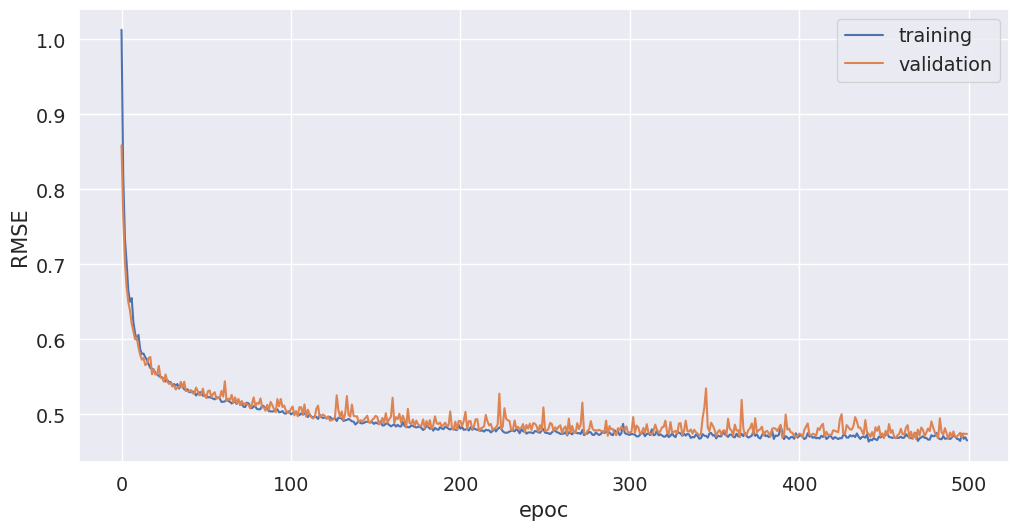

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

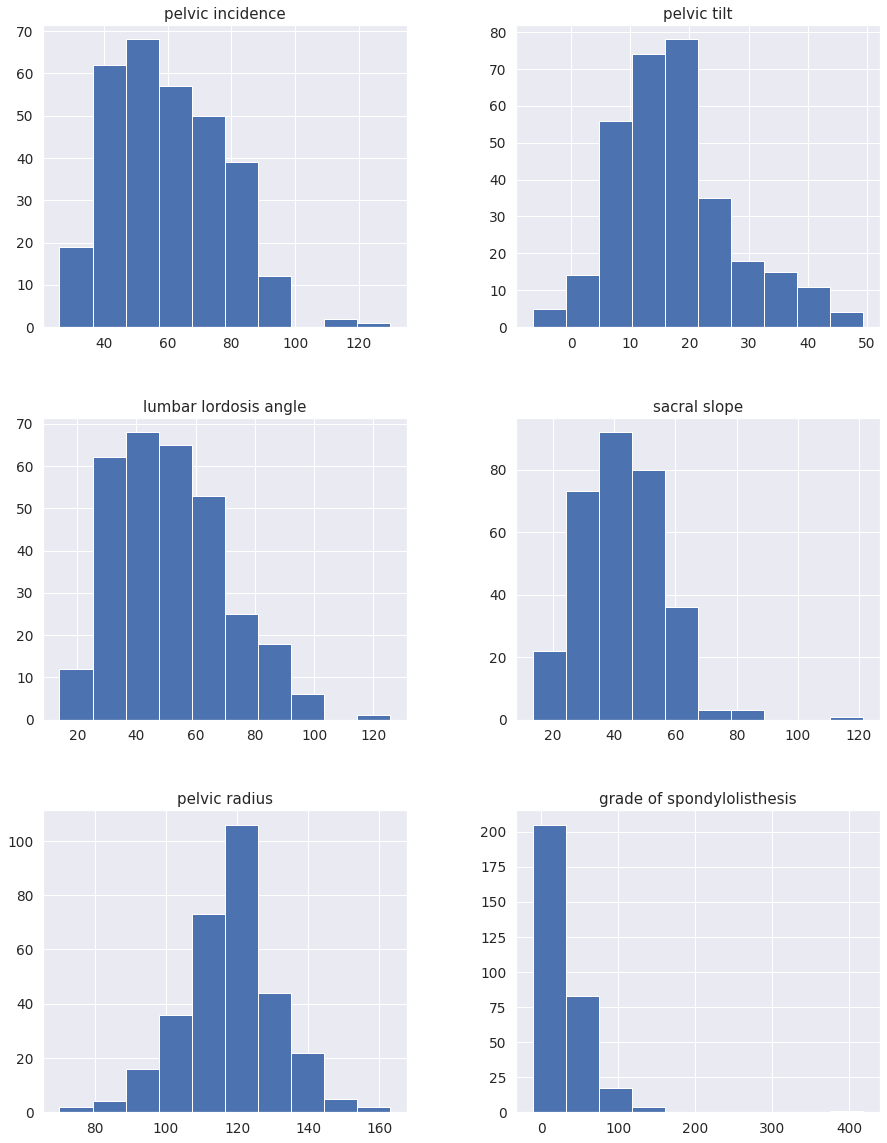

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7903225806451613

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3602 - accuracy: 0.6250

186/186 [==============================] - 0s 430us/step - loss: 1.0678 - accuracy: 0.7043 - val_loss: 1.2685 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4214 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 1.0372 - accuracy: 0.7043 - val_loss: 1.2363 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8619 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 1.0063 - accuracy: 0.7043 - val_loss: 1.2022 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2417 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.9793 - accuracy: 0.7043 - val_loss: 1.1657 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1963 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.9492 - accuracy: 0.7043 - val_loss: 1.1282 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0821 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.9203 - accuracy: 0.7043 - val_loss: 1.0918 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2134 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.8951 - accuracy: 0.7043 - val_loss: 1.0583 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0825 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.8699 - accuracy: 0.7043 - val_loss: 1.0265 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1472 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.8483 - accuracy: 0.7043 - val_loss: 0.9969 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0281 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.8281 - accuracy: 0.7043 - val_loss: 0.9699 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8435 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.8061 - accuracy: 0.7043 - val_loss: 0.9452 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.7846 - accuracy: 0.7043 - val_loss: 0.9200 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4502 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.7634 - accuracy: 0.7043 - val_loss: 0.8937 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5235 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.7441 - accuracy: 0.7043 - val_loss: 0.8698 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7102 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.7263 - accuracy: 0.7043 - val_loss: 0.8468 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4986 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.7075 - accuracy: 0.7043 - val_loss: 0.8253 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6909 - accuracy: 0.7043 - val_loss: 0.8038 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9366 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.6748 - accuracy: 0.7043 - val_loss: 0.7819 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8538 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6590 - accuracy: 0.7043 - val_loss: 0.7628 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6455 - accuracy: 0.7043 - val_loss: 0.7452 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6178 - accuracy: 0.7188

186/186 [==============================] - 0s 41us/step - loss: 0.6325 - accuracy: 0.7043 - val_loss: 0.7296 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5941 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6199 - accuracy: 0.7043 - val_loss: 0.7153 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6850 - accuracy: 0.6562

186/186 [==============================] - 0s 39us/step - loss: 0.6084 - accuracy: 0.7043 - val_loss: 0.7010 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.6875

186/186 [==============================] - 0s 41us/step - loss: 0.5972 - accuracy: 0.7043 - val_loss: 0.6886 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6943 - accuracy: 0.6250

186/186 [==============================] - 0s 40us/step - loss: 0.5863 - accuracy: 0.7043 - val_loss: 0.6766 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5214 - accuracy: 0.7500

186/186 [==============================] - 0s 40us/step - loss: 0.5748 - accuracy: 0.7043 - val_loss: 0.6664 - val_accuracy: 0.6371


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5668 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.5659 - accuracy: 0.7043 - val_loss: 0.6555 - val_accuracy: 0.6371


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6159 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.5571 - accuracy: 0.7043 - val_loss: 0.6456 - val_accuracy: 0.6371


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.6250

186/186 [==============================] - 0s 41us/step - loss: 0.5501 - accuracy: 0.7043 - val_loss: 0.6365 - val_accuracy: 0.6371


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5114 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.5412 - accuracy: 0.7043 - val_loss: 0.6278 - val_accuracy: 0.6371


Epoch 31/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4338 - accuracy: 0.8125

186/186 [==============================] - 0s 40us/step - loss: 0.5342 - accuracy: 0.7043 - val_loss: 0.6228 - val_accuracy: 0.6371


Epoch 32/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6230 - accuracy: 0.6250

186/186 [==============================] - 0s 40us/step - loss: 0.5277 - accuracy: 0.7043 - val_loss: 0.6249 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4728 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.5218 - accuracy: 0.7043 - val_loss: 0.6181 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5930 - accuracy: 0.5938

186/186 [==============================] - 0s 39us/step - loss: 0.5157 - accuracy: 0.7043 - val_loss: 0.6153 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5260 - accuracy: 0.7188

186/186 [==============================] - 0s 41us/step - loss: 0.5095 - accuracy: 0.7043 - val_loss: 0.6146 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.5625

186/186 [==============================] - 0s 41us/step - loss: 0.5050 - accuracy: 0.7043 - val_loss: 0.6100 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4840 - accuracy: 0.7188

186/186 [==============================] - 0s 40us/step - loss: 0.4997 - accuracy: 0.7043 - val_loss: 0.6066 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4278 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4953 - accuracy: 0.7043 - val_loss: 0.6055 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.7812

186/186 [==============================] - 0s 41us/step - loss: 0.4908 - accuracy: 0.7043 - val_loss: 0.6007 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4863 - accuracy: 0.7043 - val_loss: 0.5998 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4726 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4820 - accuracy: 0.7043 - val_loss: 0.5908 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5059 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.4782 - accuracy: 0.7043 - val_loss: 0.5855 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4801 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.4746 - accuracy: 0.7043 - val_loss: 0.5827 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4991 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4714 - accuracy: 0.7043 - val_loss: 0.5816 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4673 - accuracy: 0.7043 - val_loss: 0.5813 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4637 - accuracy: 0.7043 - val_loss: 0.5807 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5444 - accuracy: 0.6250



186/186 [==============================] - 0s 42us/step - loss: 0.4598 - accuracy: 0.7043 - val_loss: 0.5784 - val_accuracy: 0.6371


Epoch 48/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4406 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4570 - accuracy: 0.7043 - val_loss: 0.5757 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4541 - accuracy: 0.7043 - val_loss: 0.5732 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5039 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.4512 - accuracy: 0.7043 - val_loss: 0.5706 - val_accuracy: 0.6290


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4485 - accuracy: 0.7043 - val_loss: 0.5683 - val_accuracy: 0.6290


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.4453 - accuracy: 0.7043 - val_loss: 0.5653 - val_accuracy: 0.6290


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4415 - accuracy: 0.7043 - val_loss: 0.5621 - val_accuracy: 0.6290


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4380 - accuracy: 0.7043 - val_loss: 0.5584 - val_accuracy: 0.6290


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4337 - accuracy: 0.7043 - val_loss: 0.5554 - val_accuracy: 0.6290


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.4286 - accuracy: 0.8011 - val_loss: 0.5529 - val_accuracy: 0.6855


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4268 - accuracy: 0.8118 - val_loss: 0.5487 - val_accuracy: 0.6855


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4204 - accuracy: 0.8118 - val_loss: 0.5478 - val_accuracy: 0.6774


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4156 - accuracy: 0.8172 - val_loss: 0.5453 - val_accuracy: 0.6935


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.4103 - accuracy: 0.8226 - val_loss: 0.5435 - val_accuracy: 0.6935


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4074 - accuracy: 0.8118 - val_loss: 0.5413 - val_accuracy: 0.6935


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4040 - accuracy: 0.8172 - val_loss: 0.5402 - val_accuracy: 0.6935


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.4002 - accuracy: 0.8172 - val_loss: 0.5375 - val_accuracy: 0.6935


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3984 - accuracy: 0.8333 - val_loss: 0.5351 - val_accuracy: 0.6935


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4667 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3955 - accuracy: 0.8226 - val_loss: 0.5329 - val_accuracy: 0.6935


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3929 - accuracy: 0.8333 - val_loss: 0.5314 - val_accuracy: 0.7016


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3912 - accuracy: 0.8226 - val_loss: 0.5304 - val_accuracy: 0.7016


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3877 - accuracy: 0.8226 - val_loss: 0.5290 - val_accuracy: 0.6935


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3861 - accuracy: 0.8280 - val_loss: 0.5283 - val_accuracy: 0.6935


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3843 - accuracy: 0.8280 - val_loss: 0.5263 - val_accuracy: 0.6935


Epoch 71/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3821 - accuracy: 0.8280 - val_loss: 0.5242 - val_accuracy: 0.6935


Epoch 72/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3806 - accuracy: 0.8280 - val_loss: 0.5250 - val_accuracy: 0.6935


Epoch 73/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3784 - accuracy: 0.8280 - val_loss: 0.5228 - val_accuracy: 0.6935


Epoch 74/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3766 - accuracy: 0.8333 - val_loss: 0.5198 - val_accuracy: 0.6935


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3765 - accuracy: 0.8333 - val_loss: 0.5182 - val_accuracy: 0.6935


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3740 - accuracy: 0.8280 - val_loss: 0.5197 - val_accuracy: 0.6935


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3726 - accuracy: 0.8280 - val_loss: 0.5173 - val_accuracy: 0.6935


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3704 - accuracy: 0.8333 - val_loss: 0.5159 - val_accuracy: 0.6935


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3697 - accuracy: 0.8333 - val_loss: 0.5127 - val_accuracy: 0.6935


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3684 - accuracy: 0.8333 - val_loss: 0.5135 - val_accuracy: 0.6935


Epoch 81/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5132 - accuracy: 0.6875



186/186 [==============================] - 0s 55us/step - loss: 0.3681 - accuracy: 0.8280 - val_loss: 0.5148 - val_accuracy: 0.6935


Epoch 82/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3673 - accuracy: 0.8280 - val_loss: 0.5132 - val_accuracy: 0.6935


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3661 - accuracy: 0.8333 - val_loss: 0.5122 - val_accuracy: 0.6935


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3663 - accuracy: 0.8333 - val_loss: 0.5108 - val_accuracy: 0.6935


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3654 - accuracy: 0.8333 - val_loss: 0.5114 - val_accuracy: 0.6935


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5072 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3653 - accuracy: 0.8333 - val_loss: 0.5119 - val_accuracy: 0.6935


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3651 - accuracy: 0.8280 - val_loss: 0.5122 - val_accuracy: 0.7016


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4888 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3645 - accuracy: 0.8280 - val_loss: 0.5120 - val_accuracy: 0.6935


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3642 - accuracy: 0.8333 - val_loss: 0.5114 - val_accuracy: 0.6935


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.3658 - accuracy: 0.8280 - val_loss: 0.5096 - val_accuracy: 0.7016


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4114 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3634 - accuracy: 0.8280 - val_loss: 0.5103 - val_accuracy: 0.6935


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3630 - accuracy: 0.8333 - val_loss: 0.5109 - val_accuracy: 0.6935


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3626 - accuracy: 0.8333 - val_loss: 0.5104 - val_accuracy: 0.6935


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3629 - accuracy: 0.8333 - val_loss: 0.5099 - val_accuracy: 0.6935


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3620 - accuracy: 0.8333 - val_loss: 0.5099 - val_accuracy: 0.6935


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3614 - accuracy: 0.8333 - val_loss: 0.5092 - val_accuracy: 0.7016


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.9062



186/186 [==============================] - 0s 42us/step - loss: 0.3608 - accuracy: 0.8333 - val_loss: 0.5091 - val_accuracy: 0.6935


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3603 - accuracy: 0.8333 - val_loss: 0.5090 - val_accuracy: 0.7016


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3600 - accuracy: 0.8333 - val_loss: 0.5088 - val_accuracy: 0.7016


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3596 - accuracy: 0.8333 - val_loss: 0.5090 - val_accuracy: 0.7016


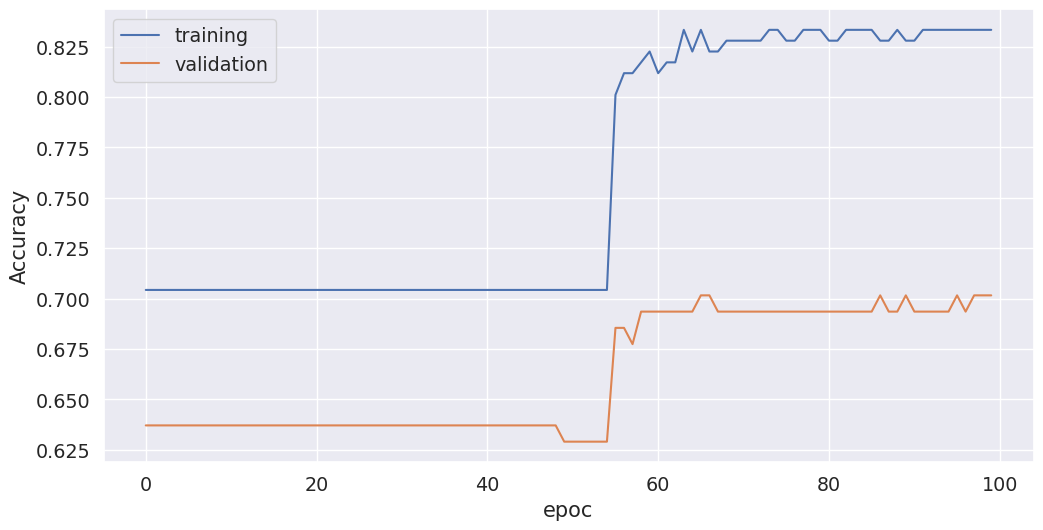

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.3956 - accuracy: 0.4375

186/186 [==============================] - 0s 930us/step - loss: 11.7787 - accuracy: 0.3602 - val_loss: 3.4107 - val_accuracy: 0.2581


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.6279 - accuracy: 0.3750

186/186 [==============================] - 0s 59us/step - loss: 8.2045 - accuracy: 0.4086 - val_loss: 2.7810 - val_accuracy: 0.3790


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.2368 - accuracy: 0.4688

186/186 [==============================] - 0s 60us/step - loss: 6.5580 - accuracy: 0.4570 - val_loss: 2.7092 - val_accuracy: 0.4597


Epoch 4/100


 32/186 [====>.........................] - ETA: 0s - loss: 5.8249 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 5.0139 - accuracy: 0.5699 - val_loss: 2.5120 - val_accuracy: 0.4839


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.4638 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 6.1073 - accuracy: 0.5430 - val_loss: 2.1191 - val_accuracy: 0.4516


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.7496 - accuracy: 0.4688

186/186 [==============================] - 0s 52us/step - loss: 5.8003 - accuracy: 0.5215 - val_loss: 2.1002 - val_accuracy: 0.4839


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.2183 - accuracy: 0.5000

186/186 [==============================] - 0s 51us/step - loss: 4.0963 - accuracy: 0.5968 - val_loss: 1.8278 - val_accuracy: 0.4919


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.0844 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 4.1959 - accuracy: 0.5215 - val_loss: 1.7499 - val_accuracy: 0.5161


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.7179 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 3.9157 - accuracy: 0.5376 - val_loss: 1.6124 - val_accuracy: 0.5403


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8788 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 3.4162 - accuracy: 0.5753 - val_loss: 1.4944 - val_accuracy: 0.5403


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7515 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 3.1349 - accuracy: 0.6129 - val_loss: 1.4560 - val_accuracy: 0.5484


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9164 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 2.7553 - accuracy: 0.6344 - val_loss: 1.2749 - val_accuracy: 0.5242


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.2066 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 2.8592 - accuracy: 0.5699 - val_loss: 1.1643 - val_accuracy: 0.5242


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.0276 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 3.2567 - accuracy: 0.5484 - val_loss: 1.0591 - val_accuracy: 0.5323


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5335 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 2.9357 - accuracy: 0.5968 - val_loss: 0.9775 - val_accuracy: 0.5484


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2980 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 2.3876 - accuracy: 0.6237 - val_loss: 0.9416 - val_accuracy: 0.5645


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1771 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 2.0863 - accuracy: 0.5914 - val_loss: 0.8879 - val_accuracy: 0.5726


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3903 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 1.7681 - accuracy: 0.6989 - val_loss: 0.8091 - val_accuracy: 0.6129


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.3179 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 2.3242 - accuracy: 0.5806 - val_loss: 0.7586 - val_accuracy: 0.5645


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 2.0955 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 1.8765 - accuracy: 0.6505 - val_loss: 0.7689 - val_accuracy: 0.5968


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.6152 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 1.7973 - accuracy: 0.6344 - val_loss: 0.6953 - val_accuracy: 0.6452


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 2.0081 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 1.6291 - accuracy: 0.6452 - val_loss: 0.6975 - val_accuracy: 0.6613


Epoch 23/100

 32/186 [====>.........................] - ETA: 0s - loss: 1.3631 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 1.5728 - accuracy: 0.6398 - val_loss: 0.7215 - val_accuracy: 0.6774


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3553 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 1.7199 - accuracy: 0.6129 - val_loss: 0.7516 - val_accuracy: 0.6290


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.7851 - accuracy: 0.5938



186/186 [==============================] - 0s 54us/step - loss: 1.4762 - accuracy: 0.6398 - val_loss: 0.7159 - val_accuracy: 0.6613


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2761 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 1.6602 - accuracy: 0.5645 - val_loss: 0.7208 - val_accuracy: 0.6532


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1768 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 1.0653 - accuracy: 0.6989 - val_loss: 0.7336 - val_accuracy: 0.6290


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0528 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.9743 - accuracy: 0.6613 - val_loss: 0.7105 - val_accuracy: 0.6452


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2559 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 1.0561 - accuracy: 0.6720 - val_loss: 0.6887 - val_accuracy: 0.6452


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8861 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 1.0943 - accuracy: 0.6882 - val_loss: 0.6683 - val_accuracy: 0.6129


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6245 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 1.2359 - accuracy: 0.6828 - val_loss: 0.6655 - val_accuracy: 0.6210


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2710 - accuracy: 0.5312

186/186 [==============================] - 0s 54us/step - loss: 1.2182 - accuracy: 0.5806 - val_loss: 0.6438 - val_accuracy: 0.5806


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1647 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 1.2566 - accuracy: 0.6344 - val_loss: 0.6424 - val_accuracy: 0.5887


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5681 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.7883 - accuracy: 0.6882 - val_loss: 0.6469 - val_accuracy: 0.5726


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7244 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7316 - accuracy: 0.7043 - val_loss: 0.6407 - val_accuracy: 0.5726


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0222 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 1.0068 - accuracy: 0.6828 - val_loss: 0.6384 - val_accuracy: 0.5565


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8819 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.9821 - accuracy: 0.6398 - val_loss: 0.6353 - val_accuracy: 0.5726


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7990 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 1.0130 - accuracy: 0.6828 - val_loss: 0.6382 - val_accuracy: 0.5726


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6974 - accuracy: 0.6882 - val_loss: 0.6213 - val_accuracy: 0.5968


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9375 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.7863 - accuracy: 0.6989 - val_loss: 0.6083 - val_accuracy: 0.5968


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6092 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.8448 - accuracy: 0.6720 - val_loss: 0.5971 - val_accuracy: 0.5968


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.8037 - accuracy: 0.7043 - val_loss: 0.6073 - val_accuracy: 0.5968


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2024 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.9348 - accuracy: 0.6398 - val_loss: 0.6020 - val_accuracy: 0.5887


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8078 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6490 - accuracy: 0.7204 - val_loss: 0.5963 - val_accuracy: 0.6048


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5886 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6021 - accuracy: 0.7204 - val_loss: 0.5935 - val_accuracy: 0.6048


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8483 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.8504 - accuracy: 0.7097 - val_loss: 0.5953 - val_accuracy: 0.6048


Epoch 47/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.2565 - accuracy: 0.5000

186/186 [==============================] - 0s 54us/step - loss: 0.7547 - accuracy: 0.6613 - val_loss: 0.5890 - val_accuracy: 0.6048


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5009 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6954 - accuracy: 0.6989 - val_loss: 0.5867 - val_accuracy: 0.6048


Epoch 49/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6458 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7233 - accuracy: 0.6452 - val_loss: 0.5818 - val_accuracy: 0.6048


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6195 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.6311 - accuracy: 0.6828 - val_loss: 0.5755 - val_accuracy: 0.6048


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8949 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.7564 - accuracy: 0.6828 - val_loss: 0.5719 - val_accuracy: 0.6129


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8241 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6261 - accuracy: 0.6828 - val_loss: 0.5716 - val_accuracy: 0.6129


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8068 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.6852 - accuracy: 0.6720 - val_loss: 0.5708 - val_accuracy: 0.6129


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7544 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.6764 - accuracy: 0.6505 - val_loss: 0.5680 - val_accuracy: 0.6129


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5468 - accuracy: 0.7151 - val_loss: 0.5699 - val_accuracy: 0.6129


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5289 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5506 - accuracy: 0.7097 - val_loss: 0.5666 - val_accuracy: 0.6129


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5833 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5810 - accuracy: 0.6989 - val_loss: 0.5715 - val_accuracy: 0.6129


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6007 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6247 - accuracy: 0.6559 - val_loss: 0.5668 - val_accuracy: 0.6129


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5890 - accuracy: 0.6935 - val_loss: 0.5725 - val_accuracy: 0.6129


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6960 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 0.6468 - accuracy: 0.7258 - val_loss: 0.5694 - val_accuracy: 0.6129


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5938 - accuracy: 0.7204 - val_loss: 0.5694 - val_accuracy: 0.6129


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4857 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6030 - accuracy: 0.7312 - val_loss: 0.5633 - val_accuracy: 0.6129


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4900 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5964 - accuracy: 0.6989 - val_loss: 0.5624 - val_accuracy: 0.6129


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5504 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6573 - accuracy: 0.6882 - val_loss: 0.5617 - val_accuracy: 0.6129


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7360 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.5845 - accuracy: 0.7043 - val_loss: 0.5567 - val_accuracy: 0.6129


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5084 - accuracy: 0.7204 - val_loss: 0.5569 - val_accuracy: 0.6129


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.5733 - accuracy: 0.6989 - val_loss: 0.5539 - val_accuracy: 0.6210


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6149 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5463 - accuracy: 0.6882 - val_loss: 0.5526 - val_accuracy: 0.6210


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5557 - accuracy: 0.7204 - val_loss: 0.5462 - val_accuracy: 0.6210


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4738 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5285 - accuracy: 0.7151 - val_loss: 0.5445 - val_accuracy: 0.6210


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5597 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5595 - accuracy: 0.7151 - val_loss: 0.5467 - val_accuracy: 0.6210


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5392 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5321 - accuracy: 0.7151 - val_loss: 0.5443 - val_accuracy: 0.6210


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6886 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.5474 - accuracy: 0.7043 - val_loss: 0.5413 - val_accuracy: 0.6129


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8017 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6298 - accuracy: 0.6559 - val_loss: 0.5405 - val_accuracy: 0.6210


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7388 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.5777 - accuracy: 0.7204 - val_loss: 0.5417 - val_accuracy: 0.6210


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7750 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5582 - accuracy: 0.7151 - val_loss: 0.5396 - val_accuracy: 0.6129


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7579 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.5619 - accuracy: 0.6882 - val_loss: 0.5359 - val_accuracy: 0.6210


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5197 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5112 - accuracy: 0.7151 - val_loss: 0.5314 - val_accuracy: 0.6210


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5599 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5823 - accuracy: 0.7043 - val_loss: 0.5273 - val_accuracy: 0.6210


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8140 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.6134 - accuracy: 0.7258 - val_loss: 0.5306 - val_accuracy: 0.6210


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6069 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5087 - accuracy: 0.6935 - val_loss: 0.5268 - val_accuracy: 0.6210


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5205 - accuracy: 0.7151 - val_loss: 0.5304 - val_accuracy: 0.6210


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5685 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5467 - accuracy: 0.7043 - val_loss: 0.5269 - val_accuracy: 0.6210


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5756 - accuracy: 0.6774 - val_loss: 0.5248 - val_accuracy: 0.6290


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5634 - accuracy: 0.7419 - val_loss: 0.5261 - val_accuracy: 0.6290


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5825 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5506 - accuracy: 0.7097 - val_loss: 0.5268 - val_accuracy: 0.6210


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6133 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.4848 - accuracy: 0.7097 - val_loss: 0.5255 - val_accuracy: 0.6210


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5167 - accuracy: 0.7312 - val_loss: 0.5180 - val_accuracy: 0.6210


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5288 - accuracy: 0.6935 - val_loss: 0.5225 - val_accuracy: 0.6129


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5397 - accuracy: 0.6989 - val_loss: 0.5239 - val_accuracy: 0.6129


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5196 - accuracy: 0.7043 - val_loss: 0.5212 - val_accuracy: 0.6129


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5239 - accuracy: 0.7204 - val_loss: 0.5180 - val_accuracy: 0.6129


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4953 - accuracy: 0.7258 - val_loss: 0.5219 - val_accuracy: 0.6129


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4249 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5155 - accuracy: 0.7097 - val_loss: 0.5283 - val_accuracy: 0.6129


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5516 - accuracy: 0.7366 - val_loss: 0.5331 - val_accuracy: 0.6048


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5880 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.4948 - accuracy: 0.6935 - val_loss: 0.5312 - val_accuracy: 0.6048


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5126 - accuracy: 0.7312 - val_loss: 0.5286 - val_accuracy: 0.6048


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.7419 - val_loss: 0.5269 - val_accuracy: 0.6048


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4346 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4411 - accuracy: 0.7742 - val_loss: 0.5298 - val_accuracy: 0.5968


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6064 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5356 - accuracy: 0.7043 - val_loss: 0.5296 - val_accuracy: 0.5887


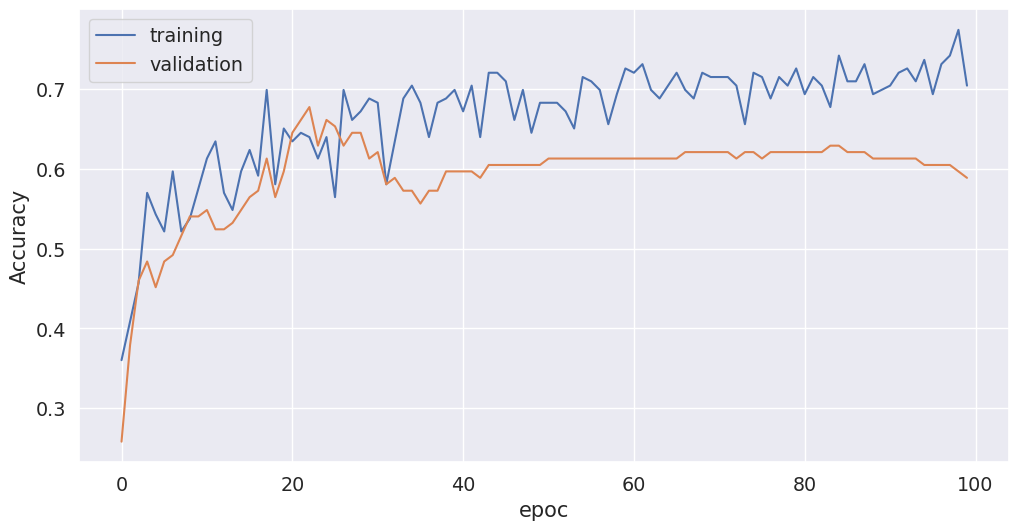

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.2059 - accuracy: 0.3750

186/186 [==============================] - 0s 789us/step - loss: 2.9648 - accuracy: 0.4301 - val_loss: 2.5595 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2644 - accuracy: 0.4375

186/186 [==============================] - 0s 54us/step - loss: 2.5265 - accuracy: 0.4301 - val_loss: 1.9385 - val_accuracy: 0.3548


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6925 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 1.9670 - accuracy: 0.4086 - val_loss: 1.4995 - val_accuracy: 0.3790


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7369 - accuracy: 0.3750

186/186 [==============================] - 0s 54us/step - loss: 1.5395 - accuracy: 0.4194 - val_loss: 1.1803 - val_accuracy: 0.4032


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3429 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 1.2614 - accuracy: 0.5054 - val_loss: 0.9307 - val_accuracy: 0.4516


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2902 - accuracy: 0.4375

186/186 [==============================] - 0s 52us/step - loss: 1.0486 - accuracy: 0.5000 - val_loss: 0.8020 - val_accuracy: 0.4839


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8784 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.9047 - accuracy: 0.6022 - val_loss: 0.7284 - val_accuracy: 0.5323


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9837 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 0.9368 - accuracy: 0.5269 - val_loss: 0.6798 - val_accuracy: 0.5565


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7145 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.8773 - accuracy: 0.5699 - val_loss: 0.6441 - val_accuracy: 0.5806


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8572 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 0.8044 - accuracy: 0.6022 - val_loss: 0.6215 - val_accuracy: 0.5806


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9621 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.7649 - accuracy: 0.5591 - val_loss: 0.5998 - val_accuracy: 0.6048


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7453 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.7445 - accuracy: 0.5968 - val_loss: 0.5871 - val_accuracy: 0.6452


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8167 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 0.7413 - accuracy: 0.5538 - val_loss: 0.5718 - val_accuracy: 0.6855


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5974 - accuracy: 0.6720 - val_loss: 0.5542 - val_accuracy: 0.6694


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5698 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6716 - accuracy: 0.6452 - val_loss: 0.5475 - val_accuracy: 0.6935


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4846 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5966 - accuracy: 0.6613 - val_loss: 0.5459 - val_accuracy: 0.6935


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.6095 - accuracy: 0.6828 - val_loss: 0.5363 - val_accuracy: 0.7016


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5695 - accuracy: 0.7097 - val_loss: 0.5286 - val_accuracy: 0.7097


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5279 - accuracy: 0.7204 - val_loss: 0.5250 - val_accuracy: 0.7097


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6101 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5473 - accuracy: 0.6882 - val_loss: 0.5104 - val_accuracy: 0.6935


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4993 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5367 - accuracy: 0.7312 - val_loss: 0.5050 - val_accuracy: 0.6855


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4868 - accuracy: 0.7419 - val_loss: 0.5003 - val_accuracy: 0.7016


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4888 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5139 - accuracy: 0.7258 - val_loss: 0.4978 - val_accuracy: 0.7097


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5492 - accuracy: 0.6562



186/186 [==============================] - 0s 52us/step - loss: 0.5115 - accuracy: 0.6989 - val_loss: 0.4942 - val_accuracy: 0.7097


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5140 - accuracy: 0.7419 - val_loss: 0.4913 - val_accuracy: 0.7016


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4734 - accuracy: 0.7527 - val_loss: 0.4893 - val_accuracy: 0.7097


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4874 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4471 - accuracy: 0.7634 - val_loss: 0.4908 - val_accuracy: 0.6935


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.4852 - accuracy: 0.7688 - val_loss: 0.4862 - val_accuracy: 0.7016


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.7188



186/186 [==============================] - 0s 48us/step - loss: 0.4222 - accuracy: 0.7849 - val_loss: 0.4795 - val_accuracy: 0.7339


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5326 - accuracy: 0.6250



186/186 [==============================] - 0s 48us/step - loss: 0.4444 - accuracy: 0.7312 - val_loss: 0.4777 - val_accuracy: 0.7661


Epoch 31/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4601 - accuracy: 0.7473 - val_loss: 0.4750 - val_accuracy: 0.7581


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4269 - accuracy: 0.7849 - val_loss: 0.4737 - val_accuracy: 0.7500


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.6875



186/186 [==============================] - 0s 46us/step - loss: 0.4667 - accuracy: 0.7527 - val_loss: 0.4718 - val_accuracy: 0.7419


Epoch 34/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5198 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4301 - accuracy: 0.8226 - val_loss: 0.4690 - val_accuracy: 0.7500


Epoch 35/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4213 - accuracy: 0.7581 - val_loss: 0.4663 - val_accuracy: 0.7581


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3650 - accuracy: 0.7903 - val_loss: 0.4648 - val_accuracy: 0.7419


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4755 - accuracy: 0.6875



186/186 [==============================] - 0s 46us/step - loss: 0.4420 - accuracy: 0.7581 - val_loss: 0.4682 - val_accuracy: 0.7258


Epoch 38/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3903 - accuracy: 0.7957 - val_loss: 0.4644 - val_accuracy: 0.7419


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3957 - accuracy: 0.7849 - val_loss: 0.4626 - val_accuracy: 0.7581


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3956 - accuracy: 0.7796 - val_loss: 0.4589 - val_accuracy: 0.7419


Epoch 41/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4352 - accuracy: 0.7634 - val_loss: 0.4626 - val_accuracy: 0.7339


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3971 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4246 - accuracy: 0.7796 - val_loss: 0.4614 - val_accuracy: 0.7419


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.4289 - accuracy: 0.7849 - val_loss: 0.4618 - val_accuracy: 0.7258


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4963 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3753 - accuracy: 0.7903 - val_loss: 0.4609 - val_accuracy: 0.7177


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4342 - accuracy: 0.7258 - val_loss: 0.4610 - val_accuracy: 0.7258


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4106 - accuracy: 0.7312 - val_loss: 0.4632 - val_accuracy: 0.7419


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5109 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4153 - accuracy: 0.7957 - val_loss: 0.4596 - val_accuracy: 0.7339


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5495 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.4192 - accuracy: 0.7634 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 49/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4224 - accuracy: 0.7527 - val_loss: 0.4594 - val_accuracy: 0.7339


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3692 - accuracy: 0.7957 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4079 - accuracy: 0.7796 - val_loss: 0.4560 - val_accuracy: 0.7177


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4084 - accuracy: 0.7957 - val_loss: 0.4547 - val_accuracy: 0.7258


Epoch 53/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4093 - accuracy: 0.7849 - val_loss: 0.4541 - val_accuracy: 0.7177


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3757 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4336 - accuracy: 0.7634 - val_loss: 0.4540 - val_accuracy: 0.7258


Epoch 55/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4127 - accuracy: 0.7688 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 56/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2824 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3668 - accuracy: 0.8065 - val_loss: 0.4528 - val_accuracy: 0.7258


Epoch 57/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3304 - accuracy: 0.8280 - val_loss: 0.4517 - val_accuracy: 0.7258


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3807 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3900 - accuracy: 0.7688 - val_loss: 0.4494 - val_accuracy: 0.7097


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4090 - accuracy: 0.8118 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4782 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3928 - accuracy: 0.7957 - val_loss: 0.4508 - val_accuracy: 0.7177


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3806 - accuracy: 0.7796 - val_loss: 0.4504 - val_accuracy: 0.7339


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.3872 - accuracy: 0.7796 - val_loss: 0.4459 - val_accuracy: 0.7097


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3474 - accuracy: 0.8172 - val_loss: 0.4430 - val_accuracy: 0.7177


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4645 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3874 - accuracy: 0.8011 - val_loss: 0.4493 - val_accuracy: 0.7177


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4238 - accuracy: 0.7473 - val_loss: 0.4483 - val_accuracy: 0.7177


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3906 - accuracy: 0.8172 - val_loss: 0.4458 - val_accuracy: 0.7177


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3831 - accuracy: 0.8280 - val_loss: 0.4461 - val_accuracy: 0.7177


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3634 - accuracy: 0.8226 - val_loss: 0.4415 - val_accuracy: 0.7177


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3684 - accuracy: 0.8011 - val_loss: 0.4394 - val_accuracy: 0.7097


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3643 - accuracy: 0.8065 - val_loss: 0.4396 - val_accuracy: 0.7177


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3787 - accuracy: 0.8226 - val_loss: 0.4461 - val_accuracy: 0.7258


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3750 - accuracy: 0.8011 - val_loss: 0.4432 - val_accuracy: 0.7177


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5086 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4028 - accuracy: 0.7742 - val_loss: 0.4437 - val_accuracy: 0.7339


Epoch 74/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3479 - accuracy: 0.7957 - val_loss: 0.4470 - val_accuracy: 0.7258


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3647 - accuracy: 0.8118 - val_loss: 0.4499 - val_accuracy: 0.7419


Epoch 76/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3881 - accuracy: 0.7957 - val_loss: 0.4480 - val_accuracy: 0.7339


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3726 - accuracy: 0.8118 - val_loss: 0.4472 - val_accuracy: 0.7339


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3625 - accuracy: 0.8280 - val_loss: 0.4482 - val_accuracy: 0.7339


Epoch 79/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3665 - accuracy: 0.8172 - val_loss: 0.4510 - val_accuracy: 0.7419


Epoch 80/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3795 - accuracy: 0.8065 - val_loss: 0.4498 - val_accuracy: 0.7419


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3853 - accuracy: 0.7849 - val_loss: 0.4449 - val_accuracy: 0.7339


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3749 - accuracy: 0.8333 - val_loss: 0.4447 - val_accuracy: 0.7339


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3440 - accuracy: 0.8226 - val_loss: 0.4439 - val_accuracy: 0.7339


Epoch 84/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.3562 - accuracy: 0.8172 - val_loss: 0.4474 - val_accuracy: 0.7500


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3345 - accuracy: 0.8333 - val_loss: 0.4449 - val_accuracy: 0.7419


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3671 - accuracy: 0.7796 - val_loss: 0.4437 - val_accuracy: 0.7258


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.3824 - accuracy: 0.8118 - val_loss: 0.4428 - val_accuracy: 0.7339


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4719 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4428 - val_accuracy: 0.7339


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3680 - accuracy: 0.8226 - val_loss: 0.4471 - val_accuracy: 0.7419


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4927 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3381 - accuracy: 0.8280 - val_loss: 0.4478 - val_accuracy: 0.7419


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3633 - accuracy: 0.7957 - val_loss: 0.4496 - val_accuracy: 0.7500


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.3587 - accuracy: 0.7903 - val_loss: 0.4495 - val_accuracy: 0.7419


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3675 - accuracy: 0.7903 - val_loss: 0.4501 - val_accuracy: 0.7419


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3420 - accuracy: 0.8226 - val_loss: 0.4519 - val_accuracy: 0.7419


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.3614 - accuracy: 0.7903 - val_loss: 0.4503 - val_accuracy: 0.7419


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3351 - accuracy: 0.8333 - val_loss: 0.4494 - val_accuracy: 0.7419


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5165 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3797 - accuracy: 0.8065 - val_loss: 0.4528 - val_accuracy: 0.7419


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3594 - accuracy: 0.7849 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2156 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3638 - accuracy: 0.8280 - val_loss: 0.4555 - val_accuracy: 0.7500


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3601 - accuracy: 0.7742 - val_loss: 0.4513 - val_accuracy: 0.7581


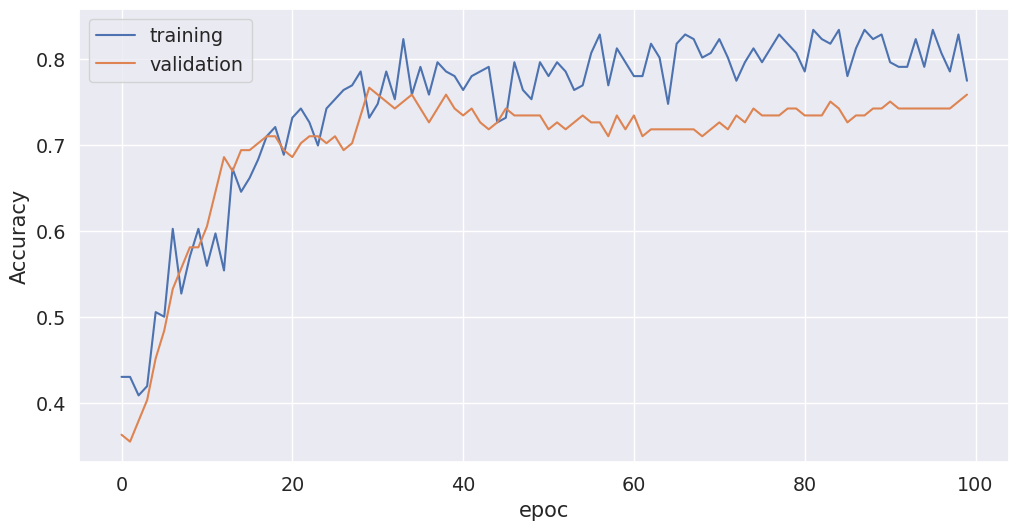

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 25.6040 - accuracy: 0.7188

186/186 [==============================] - 0s 880us/step - loss: 17.3516 - accuracy: 0.7043 - val_loss: 11.5728 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 19.7561 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 13.6923 - accuracy: 0.6989 - val_loss: 7.2252 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.9744 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 13.6549 - accuracy: 0.6935 - val_loss: 4.0459 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 10.1500 - accuracy: 0.6875



186/186 [==============================] - 0s 52us/step - loss: 9.9898 - accuracy: 0.6828 - val_loss: 2.4238 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.8182 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 8.9438 - accuracy: 0.6935 - val_loss: 1.7958 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.4544 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 7.2886 - accuracy: 0.7097 - val_loss: 1.4676 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 11.8958 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 6.5593 - accuracy: 0.6667 - val_loss: 1.3001 - val_accuracy: 0.5323


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.4602 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 6.1117 - accuracy: 0.6290 - val_loss: 1.1411 - val_accuracy: 0.4758


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3911 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 4.2374 - accuracy: 0.6935 - val_loss: 1.0099 - val_accuracy: 0.3790


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.0136 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 4.0846 - accuracy: 0.6290 - val_loss: 0.9447 - val_accuracy: 0.3790


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.3170 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 4.0716 - accuracy: 0.6290 - val_loss: 0.9288 - val_accuracy: 0.3548


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8819 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 3.7851 - accuracy: 0.5699 - val_loss: 0.8992 - val_accuracy: 0.3710


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.2587 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 3.6191 - accuracy: 0.6022 - val_loss: 0.8905 - val_accuracy: 0.4113


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2518 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 3.4708 - accuracy: 0.5914 - val_loss: 0.8899 - val_accuracy: 0.4032


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5787 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 2.0627 - accuracy: 0.6290 - val_loss: 0.8918 - val_accuracy: 0.3790


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.8284 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 2.3495 - accuracy: 0.5430 - val_loss: 0.8929 - val_accuracy: 0.3710


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9617 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 2.0230 - accuracy: 0.5806 - val_loss: 0.8912 - val_accuracy: 0.3710


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9038 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 1.7747 - accuracy: 0.5054 - val_loss: 0.8880 - val_accuracy: 0.3710


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3910 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 2.5687 - accuracy: 0.5538 - val_loss: 0.8854 - val_accuracy: 0.3710


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2393 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 2.1809 - accuracy: 0.4892 - val_loss: 0.8827 - val_accuracy: 0.3710


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.7106 - accuracy: 0.5000

186/186 [==============================] - 0s 58us/step - loss: 1.7572 - accuracy: 0.5538 - val_loss: 0.8800 - val_accuracy: 0.3710


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7074 - accuracy: 0.5312

186/186 [==============================] - 0s 63us/step - loss: 1.8731 - accuracy: 0.5000 - val_loss: 0.8816 - val_accuracy: 0.3710


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3545 - accuracy: 0.6250



186/186 [==============================] - 0s 48us/step - loss: 1.8858 - accuracy: 0.5161 - val_loss: 0.8787 - val_accuracy: 0.3629


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 3.9646 - accuracy: 0.4688

186/186 [==============================] - 0s 54us/step - loss: 2.0598 - accuracy: 0.5000 - val_loss: 0.8753 - val_accuracy: 0.3629


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9376 - accuracy: 0.5000



186/186 [==============================] - 0s 52us/step - loss: 0.9676 - accuracy: 0.5538 - val_loss: 0.8722 - val_accuracy: 0.3629


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8751 - accuracy: 0.5312

186/186 [==============================] - 0s 49us/step - loss: 1.4894 - accuracy: 0.5484 - val_loss: 0.8673 - val_accuracy: 0.3710


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6266 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 1.4198 - accuracy: 0.5215 - val_loss: 0.8596 - val_accuracy: 0.3952


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 2.9579 - accuracy: 0.4375

186/186 [==============================] - 0s 56us/step - loss: 1.5178 - accuracy: 0.5753 - val_loss: 0.8512 - val_accuracy: 0.4274


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9846 - accuracy: 0.3438

186/186 [==============================] - 0s 57us/step - loss: 1.0826 - accuracy: 0.5484 - val_loss: 0.8504 - val_accuracy: 0.4355


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.8776 - accuracy: 0.4688

186/186 [==============================] - 0s 53us/step - loss: 1.5479 - accuracy: 0.5591 - val_loss: 0.8409 - val_accuracy: 0.4597


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0210 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 1.1945 - accuracy: 0.5484 - val_loss: 0.8353 - val_accuracy: 0.4839


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6849 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 1.1650 - accuracy: 0.5484 - val_loss: 0.8257 - val_accuracy: 0.5565


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1347 - accuracy: 0.3750

186/186 [==============================] - 0s 51us/step - loss: 1.0395 - accuracy: 0.5753 - val_loss: 0.8172 - val_accuracy: 0.5806


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8712 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 1.2971 - accuracy: 0.6129 - val_loss: 0.8137 - val_accuracy: 0.6452


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 1.2743 - accuracy: 0.5914 - val_loss: 0.8005 - val_accuracy: 0.6452


Epoch 36/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.2537 - accuracy: 0.5000

186/186 [==============================] - 0s 57us/step - loss: 1.4553 - accuracy: 0.6452 - val_loss: 0.7843 - val_accuracy: 0.6532


Epoch 37/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6713 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 1.0511 - accuracy: 0.5914 - val_loss: 0.7734 - val_accuracy: 0.6532


Epoch 38/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 1.0227 - accuracy: 0.6129 - val_loss: 0.7673 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7188 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.8359 - accuracy: 0.6505 - val_loss: 0.7578 - val_accuracy: 0.6290


Epoch 40/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7340 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.9055 - accuracy: 0.6559 - val_loss: 0.7571 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2500 - accuracy: 0.7188



186/186 [==============================] - 0s 52us/step - loss: 0.8278 - accuracy: 0.6237 - val_loss: 0.7489 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.8281 - accuracy: 0.6828 - val_loss: 0.7417 - val_accuracy: 0.6129


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9624 - accuracy: 0.4375

186/186 [==============================] - 0s 50us/step - loss: 0.9270 - accuracy: 0.6183 - val_loss: 0.7359 - val_accuracy: 0.6290


Epoch 44/100


 32/186 [====>.........................] - ETA: 0s - loss: 2.0751 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 1.3283 - accuracy: 0.6989 - val_loss: 0.7371 - val_accuracy: 0.5968


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 1.1007 - accuracy: 0.6183 - val_loss: 0.7414 - val_accuracy: 0.6290


Epoch 46/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.1535 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.8793 - accuracy: 0.6290 - val_loss: 0.7397 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8986 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.8607 - accuracy: 0.6559 - val_loss: 0.7373 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5426 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.8109 - accuracy: 0.6935 - val_loss: 0.7355 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8899 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 0.9949 - accuracy: 0.6505 - val_loss: 0.7354 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.7944 - accuracy: 0.6344 - val_loss: 0.7285 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9309 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 1.0030 - accuracy: 0.6613 - val_loss: 0.7263 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8678 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 0.7459 - accuracy: 0.6344 - val_loss: 0.7249 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7836 - accuracy: 0.6237 - val_loss: 0.7215 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7092 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.7740 - accuracy: 0.6774 - val_loss: 0.7138 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6918 - accuracy: 0.6774 - val_loss: 0.7028 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9691 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.8494 - accuracy: 0.6720 - val_loss: 0.6990 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6605 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.9016 - accuracy: 0.6882 - val_loss: 0.6963 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.8069 - accuracy: 0.6613 - val_loss: 0.6895 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7011 - accuracy: 0.6875



186/186 [==============================] - 0s 50us/step - loss: 0.7397 - accuracy: 0.6452 - val_loss: 0.6858 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6809 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.7229 - accuracy: 0.6989 - val_loss: 0.6780 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6396 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.7246 - accuracy: 0.6828 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6384 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6340 - accuracy: 0.6828 - val_loss: 0.6556 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7422 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.7312 - accuracy: 0.6882 - val_loss: 0.6545 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7882 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6770 - accuracy: 0.6989 - val_loss: 0.6504 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.7240 - accuracy: 0.6989 - val_loss: 0.6454 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5593 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6868 - accuracy: 0.7043 - val_loss: 0.6452 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0188 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.7210 - accuracy: 0.6935 - val_loss: 0.6406 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6581 - accuracy: 0.7312 - val_loss: 0.6346 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6058 - accuracy: 0.7634 - val_loss: 0.6301 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6054 - accuracy: 0.7043 - val_loss: 0.6262 - val_accuracy: 0.6210


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7586 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5717 - accuracy: 0.7043 - val_loss: 0.6216 - val_accuracy: 0.6210


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6101 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6265 - accuracy: 0.7097 - val_loss: 0.6196 - val_accuracy: 0.5968


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6015 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6015 - accuracy: 0.7527 - val_loss: 0.6180 - val_accuracy: 0.6129


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5731 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6300 - accuracy: 0.6989 - val_loss: 0.6150 - val_accuracy: 0.6129


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7295 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6150 - accuracy: 0.7097 - val_loss: 0.6116 - val_accuracy: 0.5806


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5562 - accuracy: 0.6989 - val_loss: 0.6086 - val_accuracy: 0.5887


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5564 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5905 - accuracy: 0.6935 - val_loss: 0.6053 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5825 - accuracy: 0.7419 - val_loss: 0.5995 - val_accuracy: 0.7177


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.6290 - accuracy: 0.7796 - val_loss: 0.5966 - val_accuracy: 0.6935


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6220 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5846 - accuracy: 0.7634 - val_loss: 0.5893 - val_accuracy: 0.7177


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7533 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6255 - accuracy: 0.7419 - val_loss: 0.5907 - val_accuracy: 0.7258


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5533 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6119 - accuracy: 0.7796 - val_loss: 0.5889 - val_accuracy: 0.7177


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.6066 - accuracy: 0.7419 - val_loss: 0.5892 - val_accuracy: 0.6694


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5777 - accuracy: 0.7312 - val_loss: 0.5849 - val_accuracy: 0.7097


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5803 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5615 - accuracy: 0.7097 - val_loss: 0.5835 - val_accuracy: 0.7177


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5919 - accuracy: 0.7473 - val_loss: 0.5845 - val_accuracy: 0.7016


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7438 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5820 - accuracy: 0.7581 - val_loss: 0.5804 - val_accuracy: 0.7097


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4979 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5085 - accuracy: 0.7258 - val_loss: 0.5770 - val_accuracy: 0.7016


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5435 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5194 - accuracy: 0.7688 - val_loss: 0.5736 - val_accuracy: 0.7177


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5337 - accuracy: 0.7258 - val_loss: 0.5717 - val_accuracy: 0.7258


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6763 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5257 - accuracy: 0.8065 - val_loss: 0.5691 - val_accuracy: 0.7097


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5038 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6383 - accuracy: 0.7688 - val_loss: 0.5706 - val_accuracy: 0.7097


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5007 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5614 - accuracy: 0.7473 - val_loss: 0.5716 - val_accuracy: 0.7258


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5426 - accuracy: 0.7742 - val_loss: 0.5716 - val_accuracy: 0.7258


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5491 - accuracy: 0.7688 - val_loss: 0.5710 - val_accuracy: 0.7016


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5393 - accuracy: 0.7527 - val_loss: 0.5683 - val_accuracy: 0.7177


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5215 - accuracy: 0.7796 - val_loss: 0.5680 - val_accuracy: 0.7097


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5541 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4844 - accuracy: 0.7849 - val_loss: 0.5646 - val_accuracy: 0.7177


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4665 - accuracy: 0.8172 - val_loss: 0.5624 - val_accuracy: 0.7177


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5195 - accuracy: 0.8011 - val_loss: 0.5616 - val_accuracy: 0.7016


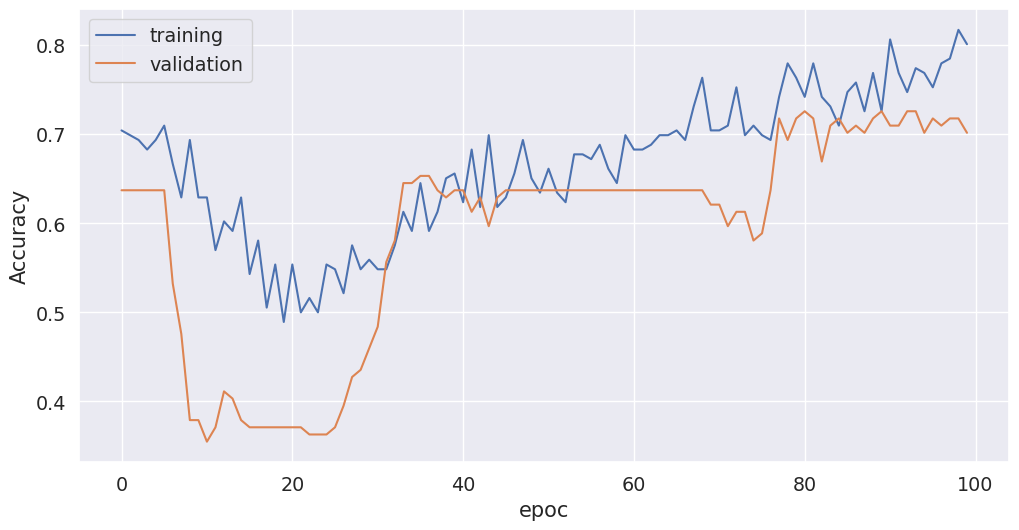

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5700 - accuracy: 0.3438

186/186 [==============================] - 0s 579us/step - loss: 4.2268 - accuracy: 0.3441 - val_loss: 3.0686 - val_accuracy: 0.3790


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3234 - accuracy: 0.2500

186/186 [==============================] - 0s 57us/step - loss: 3.8769 - accuracy: 0.3226 - val_loss: 2.8486 - val_accuracy: 0.4113


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1864 - accuracy: 0.3438

186/186 [==============================] - 0s 55us/step - loss: 3.6332 - accuracy: 0.3495 - val_loss: 2.6716 - val_accuracy: 0.4032


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5610 - accuracy: 0.4375

186/186 [==============================] - 0s 59us/step - loss: 3.4290 - accuracy: 0.3763 - val_loss: 2.5224 - val_accuracy: 0.4435


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5241 - accuracy: 0.4062

186/186 [==============================] - 0s 54us/step - loss: 3.2534 - accuracy: 0.3925 - val_loss: 2.3878 - val_accuracy: 0.4435


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0805 - accuracy: 0.4062

186/186 [==============================] - 0s 50us/step - loss: 3.0914 - accuracy: 0.3763 - val_loss: 2.2649 - val_accuracy: 0.4435


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9619 - accuracy: 0.3125

186/186 [==============================] - 0s 54us/step - loss: 2.9374 - accuracy: 0.3871 - val_loss: 2.1449 - val_accuracy: 0.4516


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2025 - accuracy: 0.3750

186/186 [==============================] - 0s 52us/step - loss: 2.7903 - accuracy: 0.4032 - val_loss: 2.0350 - val_accuracy: 0.4677


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0981 - accuracy: 0.4375

186/186 [==============================] - 0s 47us/step - loss: 2.6542 - accuracy: 0.4301 - val_loss: 1.9313 - val_accuracy: 0.4677


Epoch 10/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.6837 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 2.5257 - accuracy: 0.4355 - val_loss: 1.8394 - val_accuracy: 0.4839


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1066 - accuracy: 0.3750

186/186 [==============================] - 0s 53us/step - loss: 2.4092 - accuracy: 0.4462 - val_loss: 1.7485 - val_accuracy: 0.4839


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4753 - accuracy: 0.4375

186/186 [==============================] - 0s 56us/step - loss: 2.2935 - accuracy: 0.4570 - val_loss: 1.6628 - val_accuracy: 0.4839


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9204 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 2.1880 - accuracy: 0.4624 - val_loss: 1.5840 - val_accuracy: 0.4919


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0933 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 2.0918 - accuracy: 0.4624 - val_loss: 1.5091 - val_accuracy: 0.5161


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4175 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 1.9958 - accuracy: 0.4785 - val_loss: 1.4356 - val_accuracy: 0.5161


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4017 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 1.9019 - accuracy: 0.4839 - val_loss: 1.3737 - val_accuracy: 0.5161


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0676 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 1.8153 - accuracy: 0.4892 - val_loss: 1.3159 - val_accuracy: 0.5161


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0134 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 1.7311 - accuracy: 0.4892 - val_loss: 1.2613 - val_accuracy: 0.5081


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5573 - accuracy: 0.3438

186/186 [==============================] - 0s 52us/step - loss: 1.6504 - accuracy: 0.5108 - val_loss: 1.2127 - val_accuracy: 0.5323


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0226 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 1.5772 - accuracy: 0.5430 - val_loss: 1.1711 - val_accuracy: 0.5565


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6320 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 1.5130 - accuracy: 0.5538 - val_loss: 1.1359 - val_accuracy: 0.5645


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1387 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 1.4537 - accuracy: 0.5538 - val_loss: 1.1028 - val_accuracy: 0.5645


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3724 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 1.3957 - accuracy: 0.5591 - val_loss: 1.0718 - val_accuracy: 0.5806


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2345 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 1.3483 - accuracy: 0.5645 - val_loss: 1.0465 - val_accuracy: 0.5726


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8327 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 1.3018 - accuracy: 0.5753 - val_loss: 1.0240 - val_accuracy: 0.5806


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1552 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 1.2598 - accuracy: 0.5699 - val_loss: 1.0057 - val_accuracy: 0.5645


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9799 - accuracy: 0.5000

186/186 [==============================] - 0s 47us/step - loss: 1.2173 - accuracy: 0.5753 - val_loss: 0.9869 - val_accuracy: 0.5645


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8600 - accuracy: 0.5312

186/186 [==============================] - 0s 49us/step - loss: 1.1804 - accuracy: 0.5806 - val_loss: 0.9710 - val_accuracy: 0.5645


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8873 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 1.1424 - accuracy: 0.5806 - val_loss: 0.9581 - val_accuracy: 0.5806


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1538 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 1.1125 - accuracy: 0.5968 - val_loss: 0.9452 - val_accuracy: 0.5968


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8002 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 1.0855 - accuracy: 0.5914 - val_loss: 0.9355 - val_accuracy: 0.5968


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0618 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 1.0577 - accuracy: 0.6129 - val_loss: 0.9258 - val_accuracy: 0.5968


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7219 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 1.0329 - accuracy: 0.6022 - val_loss: 0.9179 - val_accuracy: 0.6290


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0281 - accuracy: 0.5000

186/186 [==============================] - 0s 50us/step - loss: 1.0112 - accuracy: 0.6183 - val_loss: 0.9111 - val_accuracy: 0.6290


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8154 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.9923 - accuracy: 0.6237 - val_loss: 0.9030 - val_accuracy: 0.6452


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7131 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.9747 - accuracy: 0.6183 - val_loss: 0.8966 - val_accuracy: 0.6290


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7010 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.9569 - accuracy: 0.6290 - val_loss: 0.8901 - val_accuracy: 0.6290


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7526 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.9443 - accuracy: 0.6129 - val_loss: 0.8833 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9103 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.9295 - accuracy: 0.6183 - val_loss: 0.8771 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7709 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.9171 - accuracy: 0.6344 - val_loss: 0.8714 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8927 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.9034 - accuracy: 0.6344 - val_loss: 0.8652 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9055 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.8941 - accuracy: 0.6344 - val_loss: 0.8593 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7621 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.8830 - accuracy: 0.6398 - val_loss: 0.8543 - val_accuracy: 0.6452


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.8754 - accuracy: 0.6452 - val_loss: 0.8484 - val_accuracy: 0.6452


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5909 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.8629 - accuracy: 0.6452 - val_loss: 0.8432 - val_accuracy: 0.6532


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7227 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.8552 - accuracy: 0.6505 - val_loss: 0.8378 - val_accuracy: 0.6532


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6287 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.8454 - accuracy: 0.6505 - val_loss: 0.8330 - val_accuracy: 0.6613


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7016 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.8369 - accuracy: 0.6559 - val_loss: 0.8278 - val_accuracy: 0.6613


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7854 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.8278 - accuracy: 0.6505 - val_loss: 0.8228 - val_accuracy: 0.6613


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4626 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.8207 - accuracy: 0.6559 - val_loss: 0.8182 - val_accuracy: 0.6613


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6103 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.8114 - accuracy: 0.6613 - val_loss: 0.8136 - val_accuracy: 0.6613


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5457 - accuracy: 0.5938



186/186 [==============================] - 0s 48us/step - loss: 0.8044 - accuracy: 0.6613 - val_loss: 0.8093 - val_accuracy: 0.6613


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7378 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.7953 - accuracy: 0.6667 - val_loss: 0.8052 - val_accuracy: 0.6613


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4715 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.7897 - accuracy: 0.6828 - val_loss: 0.8009 - val_accuracy: 0.6613


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6601 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.7834 - accuracy: 0.6667 - val_loss: 0.7970 - val_accuracy: 0.6613


Epoch 56/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5365 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7744 - accuracy: 0.6774 - val_loss: 0.7928 - val_accuracy: 0.6613


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7443 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.7694 - accuracy: 0.6828 - val_loss: 0.7892 - val_accuracy: 0.6613


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.7620 - accuracy: 0.6828 - val_loss: 0.7852 - val_accuracy: 0.6694


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7654 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.7544 - accuracy: 0.6935 - val_loss: 0.7813 - val_accuracy: 0.6694


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5212 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.7471 - accuracy: 0.6935 - val_loss: 0.7771 - val_accuracy: 0.6694


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7562 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.7443 - accuracy: 0.6935 - val_loss: 0.7738 - val_accuracy: 0.6855


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7094 - accuracy: 0.6875



186/186 [==============================] - 0s 54us/step - loss: 0.7357 - accuracy: 0.6935 - val_loss: 0.7700 - val_accuracy: 0.6774


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.7298 - accuracy: 0.7043 - val_loss: 0.7666 - val_accuracy: 0.6855


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4784 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.7252 - accuracy: 0.7204 - val_loss: 0.7636 - val_accuracy: 0.7016


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7024 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.7174 - accuracy: 0.7151 - val_loss: 0.7604 - val_accuracy: 0.7016


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6383 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.7109 - accuracy: 0.7258 - val_loss: 0.7574 - val_accuracy: 0.7097


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.7046 - accuracy: 0.7312 - val_loss: 0.7539 - val_accuracy: 0.7016


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5722 - accuracy: 0.6875



186/186 [==============================] - 0s 43us/step - loss: 0.6974 - accuracy: 0.7366 - val_loss: 0.7511 - val_accuracy: 0.7016


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6471 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6927 - accuracy: 0.7204 - val_loss: 0.7475 - val_accuracy: 0.7097


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6844 - accuracy: 0.7312 - val_loss: 0.7441 - val_accuracy: 0.7097


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.6790 - accuracy: 0.7366 - val_loss: 0.7412 - val_accuracy: 0.7097


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8529 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6730 - accuracy: 0.7366 - val_loss: 0.7378 - val_accuracy: 0.7097


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5418 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6687 - accuracy: 0.7312 - val_loss: 0.7347 - val_accuracy: 0.7097


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.7188



186/186 [==============================] - 0s 52us/step - loss: 0.6613 - accuracy: 0.7366 - val_loss: 0.7320 - val_accuracy: 0.7097


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6576 - accuracy: 0.7312 - val_loss: 0.7294 - val_accuracy: 0.7097


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0973 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6524 - accuracy: 0.7366 - val_loss: 0.7273 - val_accuracy: 0.7097


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4924 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6461 - accuracy: 0.7366 - val_loss: 0.7250 - val_accuracy: 0.7177


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6407 - accuracy: 0.7419 - val_loss: 0.7231 - val_accuracy: 0.7016


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5999 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6349 - accuracy: 0.7366 - val_loss: 0.7200 - val_accuracy: 0.7097


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4921 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6320 - accuracy: 0.7419 - val_loss: 0.7180 - val_accuracy: 0.7097


Epoch 81/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6363 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6246 - accuracy: 0.7312 - val_loss: 0.7146 - val_accuracy: 0.7177


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2691 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6203 - accuracy: 0.7527 - val_loss: 0.7133 - val_accuracy: 0.7097


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6162 - accuracy: 0.7527 - val_loss: 0.7118 - val_accuracy: 0.7097


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6100 - accuracy: 0.7473 - val_loss: 0.7096 - val_accuracy: 0.7016


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5986 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6059 - accuracy: 0.7473 - val_loss: 0.7065 - val_accuracy: 0.7097


Epoch 86/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6028 - accuracy: 0.7473 - val_loss: 0.7038 - val_accuracy: 0.7097


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8334 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5958 - accuracy: 0.7527 - val_loss: 0.7012 - val_accuracy: 0.7097


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5925 - accuracy: 0.7527 - val_loss: 0.6997 - val_accuracy: 0.7097


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9800 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.5875 - accuracy: 0.7581 - val_loss: 0.6974 - val_accuracy: 0.7097


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5821 - accuracy: 0.7581 - val_loss: 0.6947 - val_accuracy: 0.7097


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5805 - accuracy: 0.7473 - val_loss: 0.6934 - val_accuracy: 0.7016


Epoch 92/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5758 - accuracy: 0.7581 - val_loss: 0.6912 - val_accuracy: 0.7016


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5698 - accuracy: 0.7634 - val_loss: 0.6891 - val_accuracy: 0.7016


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4562 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5661 - accuracy: 0.7634 - val_loss: 0.6865 - val_accuracy: 0.7097


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8060 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5620 - accuracy: 0.7581 - val_loss: 0.6854 - val_accuracy: 0.7016


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5737 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5601 - accuracy: 0.7527 - val_loss: 0.6829 - val_accuracy: 0.7016


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4030 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5542 - accuracy: 0.7581 - val_loss: 0.6817 - val_accuracy: 0.7016


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5653 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5496 - accuracy: 0.7634 - val_loss: 0.6798 - val_accuracy: 0.7016


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4731 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5488 - accuracy: 0.7634 - val_loss: 0.6772 - val_accuracy: 0.7016


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5534 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5418 - accuracy: 0.7688 - val_loss: 0.6754 - val_accuracy: 0.7016


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6706 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5375 - accuracy: 0.7688 - val_loss: 0.6736 - val_accuracy: 0.7016


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5341 - accuracy: 0.7688 - val_loss: 0.6720 - val_accuracy: 0.7016


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5953 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5298 - accuracy: 0.7688 - val_loss: 0.6686 - val_accuracy: 0.7016


Epoch 104/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5191 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5251 - accuracy: 0.7688 - val_loss: 0.6651 - val_accuracy: 0.7016


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5216 - accuracy: 0.7742 - val_loss: 0.6619 - val_accuracy: 0.7016


Epoch 106/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4716 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5166 - accuracy: 0.7581 - val_loss: 0.6616 - val_accuracy: 0.7016


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5715 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5148 - accuracy: 0.7688 - val_loss: 0.6591 - val_accuracy: 0.7016


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5089 - accuracy: 0.7742 - val_loss: 0.6560 - val_accuracy: 0.7016


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7238 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5057 - accuracy: 0.7688 - val_loss: 0.6543 - val_accuracy: 0.7016


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5008 - accuracy: 0.7688 - val_loss: 0.6528 - val_accuracy: 0.7016


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6064 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4977 - accuracy: 0.7796 - val_loss: 0.6491 - val_accuracy: 0.7016


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4932 - accuracy: 0.7688 - val_loss: 0.6483 - val_accuracy: 0.7016


Epoch 113/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4900 - accuracy: 0.7849 - val_loss: 0.6459 - val_accuracy: 0.7016


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4871 - accuracy: 0.7688 - val_loss: 0.6433 - val_accuracy: 0.7016


Epoch 115/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4821 - accuracy: 0.7742 - val_loss: 0.6414 - val_accuracy: 0.7016


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4795 - accuracy: 0.7742 - val_loss: 0.6396 - val_accuracy: 0.7016


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7031 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4774 - accuracy: 0.7742 - val_loss: 0.6380 - val_accuracy: 0.7016


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4738 - accuracy: 0.7742 - val_loss: 0.6373 - val_accuracy: 0.7177


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5438 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.4732 - accuracy: 0.7849 - val_loss: 0.6345 - val_accuracy: 0.7016


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4690 - accuracy: 0.7796 - val_loss: 0.6340 - val_accuracy: 0.7177


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4668 - accuracy: 0.7903 - val_loss: 0.6302 - val_accuracy: 0.7097


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4310 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4667 - accuracy: 0.7796 - val_loss: 0.6292 - val_accuracy: 0.7258


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4625 - accuracy: 0.7849 - val_loss: 0.6266 - val_accuracy: 0.7258


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4608 - accuracy: 0.7849 - val_loss: 0.6248 - val_accuracy: 0.7258


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4605 - accuracy: 0.7849 - val_loss: 0.6227 - val_accuracy: 0.7258


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5783 - accuracy: 0.7188



186/186 [==============================] - 0s 47us/step - loss: 0.4572 - accuracy: 0.7796 - val_loss: 0.6211 - val_accuracy: 0.7177


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5918 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4567 - accuracy: 0.7957 - val_loss: 0.6168 - val_accuracy: 0.7097


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5778 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4535 - accuracy: 0.7796 - val_loss: 0.6166 - val_accuracy: 0.7016


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4517 - accuracy: 0.8011 - val_loss: 0.6133 - val_accuracy: 0.7016


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4504 - accuracy: 0.7742 - val_loss: 0.6130 - val_accuracy: 0.7016


Epoch 131/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4998 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4485 - accuracy: 0.7849 - val_loss: 0.6095 - val_accuracy: 0.7016


Epoch 132/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4464 - accuracy: 0.7849 - val_loss: 0.6070 - val_accuracy: 0.7016


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4443 - accuracy: 0.7903 - val_loss: 0.6032 - val_accuracy: 0.7016


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4440 - accuracy: 0.7903 - val_loss: 0.6024 - val_accuracy: 0.7016


Epoch 135/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4594 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4418 - accuracy: 0.7957 - val_loss: 0.5975 - val_accuracy: 0.7016


Epoch 136/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4389 - accuracy: 0.7796 - val_loss: 0.5947 - val_accuracy: 0.7016


Epoch 137/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.4369 - accuracy: 0.7849 - val_loss: 0.5943 - val_accuracy: 0.7016


Epoch 138/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5930 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4368 - accuracy: 0.7957 - val_loss: 0.5930 - val_accuracy: 0.7016


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5827 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4337 - accuracy: 0.7796 - val_loss: 0.5903 - val_accuracy: 0.7097


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4324 - accuracy: 0.7796 - val_loss: 0.5864 - val_accuracy: 0.7097


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4311 - accuracy: 0.7903 - val_loss: 0.5853 - val_accuracy: 0.6935


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4290 - accuracy: 0.7957 - val_loss: 0.5825 - val_accuracy: 0.6935


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.4286 - accuracy: 0.7903 - val_loss: 0.5820 - val_accuracy: 0.6855


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5261 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4262 - accuracy: 0.7957 - val_loss: 0.5803 - val_accuracy: 0.7016


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.4245 - accuracy: 0.7957 - val_loss: 0.5794 - val_accuracy: 0.7097


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4530 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4239 - accuracy: 0.7957 - val_loss: 0.5778 - val_accuracy: 0.7097


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4222 - accuracy: 0.7849 - val_loss: 0.5791 - val_accuracy: 0.7097


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4201 - accuracy: 0.7903 - val_loss: 0.5762 - val_accuracy: 0.7097


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4200 - accuracy: 0.7849 - val_loss: 0.5733 - val_accuracy: 0.7177


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4191 - accuracy: 0.7796 - val_loss: 0.5742 - val_accuracy: 0.7097


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4175 - accuracy: 0.7796 - val_loss: 0.5736 - val_accuracy: 0.7016


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4174 - accuracy: 0.7957 - val_loss: 0.5725 - val_accuracy: 0.7016


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4160 - accuracy: 0.8011 - val_loss: 0.5677 - val_accuracy: 0.7097


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4144 - accuracy: 0.7903 - val_loss: 0.5684 - val_accuracy: 0.7097


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4134 - accuracy: 0.7849 - val_loss: 0.5659 - val_accuracy: 0.7097


Epoch 156/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4124 - accuracy: 0.7957 - val_loss: 0.5624 - val_accuracy: 0.7177


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4119 - accuracy: 0.8011 - val_loss: 0.5608 - val_accuracy: 0.7177


Epoch 158/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4159 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4101 - accuracy: 0.7903 - val_loss: 0.5618 - val_accuracy: 0.7097


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.4115 - accuracy: 0.8065 - val_loss: 0.5602 - val_accuracy: 0.7097


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4081 - accuracy: 0.7903 - val_loss: 0.5603 - val_accuracy: 0.7097


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4107 - accuracy: 0.7849 - val_loss: 0.5574 - val_accuracy: 0.7177


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4587 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4084 - accuracy: 0.8011 - val_loss: 0.5570 - val_accuracy: 0.7097


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4060 - accuracy: 0.8065 - val_loss: 0.5532 - val_accuracy: 0.7177


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4050 - accuracy: 0.8065 - val_loss: 0.5528 - val_accuracy: 0.7177


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4049 - accuracy: 0.7957 - val_loss: 0.5508 - val_accuracy: 0.7177


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4042 - accuracy: 0.7957 - val_loss: 0.5511 - val_accuracy: 0.7177


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4041 - accuracy: 0.7957 - val_loss: 0.5512 - val_accuracy: 0.7177


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.4037 - accuracy: 0.8011 - val_loss: 0.5524 - val_accuracy: 0.7016


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4010 - accuracy: 0.8065 - val_loss: 0.5501 - val_accuracy: 0.7016


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5261 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4001 - accuracy: 0.8065 - val_loss: 0.5475 - val_accuracy: 0.7177


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4014 - accuracy: 0.8118 - val_loss: 0.5439 - val_accuracy: 0.7177


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3995 - accuracy: 0.8011 - val_loss: 0.5430 - val_accuracy: 0.7177


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3977 - accuracy: 0.8118 - val_loss: 0.5424 - val_accuracy: 0.7177


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3983 - accuracy: 0.8065 - val_loss: 0.5409 - val_accuracy: 0.7177


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3971 - accuracy: 0.8065 - val_loss: 0.5411 - val_accuracy: 0.7177


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4781 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3962 - accuracy: 0.8118 - val_loss: 0.5415 - val_accuracy: 0.7177


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3951 - accuracy: 0.8172 - val_loss: 0.5385 - val_accuracy: 0.7177


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3947 - accuracy: 0.8011 - val_loss: 0.5385 - val_accuracy: 0.7177


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3940 - accuracy: 0.8172 - val_loss: 0.5367 - val_accuracy: 0.7177


Epoch 180/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3927 - accuracy: 0.8118 - val_loss: 0.5365 - val_accuracy: 0.7177


Epoch 181/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3936 - accuracy: 0.8172 - val_loss: 0.5332 - val_accuracy: 0.7177


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4367 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3923 - accuracy: 0.8172 - val_loss: 0.5309 - val_accuracy: 0.7177


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3928 - accuracy: 0.8226 - val_loss: 0.5299 - val_accuracy: 0.7177


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4461 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3898 - accuracy: 0.8118 - val_loss: 0.5311 - val_accuracy: 0.7177


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.3907 - accuracy: 0.8226 - val_loss: 0.5287 - val_accuracy: 0.7177


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3888 - accuracy: 0.8172 - val_loss: 0.5282 - val_accuracy: 0.7177


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3827 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3901 - accuracy: 0.8226 - val_loss: 0.5273 - val_accuracy: 0.7177


Epoch 188/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3888 - accuracy: 0.8226 - val_loss: 0.5269 - val_accuracy: 0.7177


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5900 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3872 - accuracy: 0.8226 - val_loss: 0.5261 - val_accuracy: 0.7177


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.3874 - accuracy: 0.8226 - val_loss: 0.5270 - val_accuracy: 0.7258


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3884 - accuracy: 0.8172 - val_loss: 0.5269 - val_accuracy: 0.7258


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3850 - accuracy: 0.8226 - val_loss: 0.5258 - val_accuracy: 0.7258


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3854 - accuracy: 0.8333 - val_loss: 0.5227 - val_accuracy: 0.7177


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3858 - accuracy: 0.8226 - val_loss: 0.5220 - val_accuracy: 0.7177


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3839 - accuracy: 0.8226 - val_loss: 0.5218 - val_accuracy: 0.7258


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3838 - accuracy: 0.8387 - val_loss: 0.5187 - val_accuracy: 0.7177


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3827 - accuracy: 0.8118 - val_loss: 0.5196 - val_accuracy: 0.7258


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3825 - accuracy: 0.8226 - val_loss: 0.5203 - val_accuracy: 0.7258


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3813 - accuracy: 0.8495 - val_loss: 0.5167 - val_accuracy: 0.7177


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3810 - accuracy: 0.8118 - val_loss: 0.5203 - val_accuracy: 0.7258


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3822 - accuracy: 0.8441 - val_loss: 0.5184 - val_accuracy: 0.7177


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3774 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3804 - accuracy: 0.8280 - val_loss: 0.5174 - val_accuracy: 0.7177


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3793 - accuracy: 0.8280 - val_loss: 0.5156 - val_accuracy: 0.7177


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3806 - accuracy: 0.8280 - val_loss: 0.5142 - val_accuracy: 0.7177


Epoch 205/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3783 - accuracy: 0.8280 - val_loss: 0.5132 - val_accuracy: 0.7177


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3776 - accuracy: 0.8226 - val_loss: 0.5129 - val_accuracy: 0.7177


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3770 - accuracy: 0.8387 - val_loss: 0.5119 - val_accuracy: 0.7177


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3772 - accuracy: 0.8226 - val_loss: 0.5151 - val_accuracy: 0.7258


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3757 - accuracy: 0.8441 - val_loss: 0.5108 - val_accuracy: 0.7258


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3757 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3760 - accuracy: 0.8387 - val_loss: 0.5110 - val_accuracy: 0.7258


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3753 - accuracy: 0.8441 - val_loss: 0.5070 - val_accuracy: 0.7177


Epoch 212/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5896 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3753 - accuracy: 0.8226 - val_loss: 0.5083 - val_accuracy: 0.7258


Epoch 213/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3762 - accuracy: 0.8226 - val_loss: 0.5093 - val_accuracy: 0.7258


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3755 - accuracy: 0.8387 - val_loss: 0.5069 - val_accuracy: 0.7258


Epoch 215/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3722 - accuracy: 0.8333 - val_loss: 0.5074 - val_accuracy: 0.7258


Epoch 216/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.3736 - accuracy: 0.8387 - val_loss: 0.5049 - val_accuracy: 0.7258


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3734 - accuracy: 0.8387 - val_loss: 0.5037 - val_accuracy: 0.7258


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4436 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3710 - accuracy: 0.8333 - val_loss: 0.5056 - val_accuracy: 0.7258


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3722 - accuracy: 0.8280 - val_loss: 0.5040 - val_accuracy: 0.7258


Epoch 220/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3722 - accuracy: 0.8333 - val_loss: 0.5018 - val_accuracy: 0.7258


Epoch 221/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3699 - accuracy: 0.8441 - val_loss: 0.5005 - val_accuracy: 0.7258


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2155 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3696 - accuracy: 0.8333 - val_loss: 0.4980 - val_accuracy: 0.7177


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3684 - accuracy: 0.8387 - val_loss: 0.4974 - val_accuracy: 0.7258


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4839 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3693 - accuracy: 0.8441 - val_loss: 0.4929 - val_accuracy: 0.7258


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3696 - accuracy: 0.8226 - val_loss: 0.4931 - val_accuracy: 0.7258


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3683 - accuracy: 0.8226 - val_loss: 0.4936 - val_accuracy: 0.7258


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3670 - accuracy: 0.8387 - val_loss: 0.4945 - val_accuracy: 0.7258


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3675 - accuracy: 0.8441 - val_loss: 0.4946 - val_accuracy: 0.7339


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3662 - accuracy: 0.8333 - val_loss: 0.4925 - val_accuracy: 0.7419


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3656 - accuracy: 0.8333 - val_loss: 0.4890 - val_accuracy: 0.7258


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3653 - accuracy: 0.8333 - val_loss: 0.4873 - val_accuracy: 0.7258


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3655 - accuracy: 0.8441 - val_loss: 0.4886 - val_accuracy: 0.7419


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3642 - accuracy: 0.8333 - val_loss: 0.4857 - val_accuracy: 0.7339


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3649 - accuracy: 0.8333 - val_loss: 0.4861 - val_accuracy: 0.7500


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3643 - accuracy: 0.8387 - val_loss: 0.4874 - val_accuracy: 0.7500


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.4866 - val_accuracy: 0.7500


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3629 - accuracy: 0.8333 - val_loss: 0.4860 - val_accuracy: 0.7500


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3625 - accuracy: 0.8441 - val_loss: 0.4807 - val_accuracy: 0.7339


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3628 - accuracy: 0.8333 - val_loss: 0.4797 - val_accuracy: 0.7419


Epoch 240/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3629 - accuracy: 0.8387 - val_loss: 0.4794 - val_accuracy: 0.7419


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3614 - accuracy: 0.8333 - val_loss: 0.4788 - val_accuracy: 0.7500


Epoch 242/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3605 - accuracy: 0.8387 - val_loss: 0.4765 - val_accuracy: 0.7339


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3615 - accuracy: 0.8333 - val_loss: 0.4770 - val_accuracy: 0.7500


Epoch 244/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3606 - accuracy: 0.8333 - val_loss: 0.4757 - val_accuracy: 0.7500


Epoch 245/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3596 - accuracy: 0.8280 - val_loss: 0.4779 - val_accuracy: 0.7500


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3606 - accuracy: 0.8387 - val_loss: 0.4787 - val_accuracy: 0.7500


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3591 - accuracy: 0.8441 - val_loss: 0.4747 - val_accuracy: 0.7500


Epoch 248/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3578 - accuracy: 0.8333 - val_loss: 0.4722 - val_accuracy: 0.7419


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3594 - accuracy: 0.8333 - val_loss: 0.4720 - val_accuracy: 0.7500


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4334 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3585 - accuracy: 0.8280 - val_loss: 0.4723 - val_accuracy: 0.7500


Epoch 251/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3585 - accuracy: 0.8280 - val_loss: 0.4754 - val_accuracy: 0.7500


Epoch 252/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3579 - accuracy: 0.8333 - val_loss: 0.4741 - val_accuracy: 0.7500


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4904 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3572 - accuracy: 0.8333 - val_loss: 0.4704 - val_accuracy: 0.7500


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3559 - accuracy: 0.8333 - val_loss: 0.4724 - val_accuracy: 0.7500


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3562 - accuracy: 0.8333 - val_loss: 0.4766 - val_accuracy: 0.7500


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3559 - accuracy: 0.8441 - val_loss: 0.4763 - val_accuracy: 0.7500


Epoch 257/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3564 - accuracy: 0.8441 - val_loss: 0.4764 - val_accuracy: 0.7419


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3559 - accuracy: 0.8387 - val_loss: 0.4756 - val_accuracy: 0.7419


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3547 - accuracy: 0.8441 - val_loss: 0.4707 - val_accuracy: 0.7500


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3550 - accuracy: 0.8333 - val_loss: 0.4692 - val_accuracy: 0.7500


Epoch 261/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3555 - accuracy: 0.8333 - val_loss: 0.4682 - val_accuracy: 0.7581


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3535 - accuracy: 0.8441 - val_loss: 0.4704 - val_accuracy: 0.7581


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3544 - accuracy: 0.8387 - val_loss: 0.4670 - val_accuracy: 0.7581


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3546 - accuracy: 0.8441 - val_loss: 0.4667 - val_accuracy: 0.7581


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3533 - accuracy: 0.8441 - val_loss: 0.4689 - val_accuracy: 0.7581


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3537 - accuracy: 0.8548 - val_loss: 0.4642 - val_accuracy: 0.7581


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3523 - accuracy: 0.8441 - val_loss: 0.4658 - val_accuracy: 0.7581


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3529 - accuracy: 0.8495 - val_loss: 0.4642 - val_accuracy: 0.7581


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3527 - accuracy: 0.8441 - val_loss: 0.4614 - val_accuracy: 0.7581


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3525 - accuracy: 0.8333 - val_loss: 0.4639 - val_accuracy: 0.7581


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3519 - accuracy: 0.8333 - val_loss: 0.4661 - val_accuracy: 0.7581


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3507 - accuracy: 0.8387 - val_loss: 0.4620 - val_accuracy: 0.7581


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4198 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3515 - accuracy: 0.8441 - val_loss: 0.4599 - val_accuracy: 0.7581


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3520 - accuracy: 0.8280 - val_loss: 0.4604 - val_accuracy: 0.7581


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3520 - accuracy: 0.8333 - val_loss: 0.4600 - val_accuracy: 0.7581


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3513 - accuracy: 0.8441 - val_loss: 0.4598 - val_accuracy: 0.7581


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1815 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3508 - accuracy: 0.8441 - val_loss: 0.4620 - val_accuracy: 0.7581


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3497 - accuracy: 0.8387 - val_loss: 0.4597 - val_accuracy: 0.7581


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3495 - accuracy: 0.8495 - val_loss: 0.4616 - val_accuracy: 0.7581


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3505 - accuracy: 0.8333 - val_loss: 0.4591 - val_accuracy: 0.7581


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3505 - accuracy: 0.8387 - val_loss: 0.4602 - val_accuracy: 0.7581


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3488 - accuracy: 0.8441 - val_loss: 0.4604 - val_accuracy: 0.7581


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3495 - accuracy: 0.8387 - val_loss: 0.4599 - val_accuracy: 0.7581


Epoch 284/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3486 - accuracy: 0.8387 - val_loss: 0.4594 - val_accuracy: 0.7581


Epoch 285/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3480 - accuracy: 0.8441 - val_loss: 0.4588 - val_accuracy: 0.7581


Epoch 286/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3508 - accuracy: 0.8280 - val_loss: 0.4616 - val_accuracy: 0.7581


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5040 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3478 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7581


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3477 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7581


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3479 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7581


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3481 - accuracy: 0.8441 - val_loss: 0.4594 - val_accuracy: 0.7581


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3467 - accuracy: 0.8280 - val_loss: 0.4609 - val_accuracy: 0.7581


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3470 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7581


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3462 - accuracy: 0.8387 - val_loss: 0.4609 - val_accuracy: 0.7581


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3459 - accuracy: 0.8495 - val_loss: 0.4597 - val_accuracy: 0.7661


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.4594 - val_accuracy: 0.7661


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4546 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3457 - accuracy: 0.8495 - val_loss: 0.4604 - val_accuracy: 0.7581


Epoch 297/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.4598 - val_accuracy: 0.7581


Epoch 298/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3466 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7661


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3457 - accuracy: 0.8333 - val_loss: 0.4580 - val_accuracy: 0.7661


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.4554 - val_accuracy: 0.7661


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3460 - accuracy: 0.8387 - val_loss: 0.4536 - val_accuracy: 0.7581


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3449 - accuracy: 0.8333 - val_loss: 0.4528 - val_accuracy: 0.7581


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3438 - accuracy: 0.8441 - val_loss: 0.4502 - val_accuracy: 0.7581


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3441 - accuracy: 0.8280 - val_loss: 0.4516 - val_accuracy: 0.7581


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3441 - accuracy: 0.8280 - val_loss: 0.4526 - val_accuracy: 0.7661


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3428 - accuracy: 0.8333 - val_loss: 0.4509 - val_accuracy: 0.7581


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3428 - accuracy: 0.8495 - val_loss: 0.4481 - val_accuracy: 0.7581


Epoch 308/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3433 - accuracy: 0.8333 - val_loss: 0.4522 - val_accuracy: 0.7661


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3628 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3434 - accuracy: 0.8280 - val_loss: 0.4515 - val_accuracy: 0.7661


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4539 - val_accuracy: 0.7661


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3432 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.7661


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4534 - val_accuracy: 0.7661


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3419 - accuracy: 0.8387 - val_loss: 0.4505 - val_accuracy: 0.7661


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3427 - accuracy: 0.8495 - val_loss: 0.4477 - val_accuracy: 0.7661


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3418 - accuracy: 0.8280 - val_loss: 0.4515 - val_accuracy: 0.7661


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4515 - val_accuracy: 0.7661


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3424 - accuracy: 0.8333 - val_loss: 0.4497 - val_accuracy: 0.7661


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3416 - accuracy: 0.8441 - val_loss: 0.4476 - val_accuracy: 0.7661


Epoch 319/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.7661


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3411 - accuracy: 0.8226 - val_loss: 0.4481 - val_accuracy: 0.7661


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3404 - accuracy: 0.8387 - val_loss: 0.4502 - val_accuracy: 0.7661


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3413 - accuracy: 0.8280 - val_loss: 0.4511 - val_accuracy: 0.7661


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4401 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3420 - accuracy: 0.8387 - val_loss: 0.4491 - val_accuracy: 0.7661


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3410 - accuracy: 0.8280 - val_loss: 0.4481 - val_accuracy: 0.7661


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3394 - accuracy: 0.8280 - val_loss: 0.4491 - val_accuracy: 0.7661


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3403 - accuracy: 0.8387 - val_loss: 0.4466 - val_accuracy: 0.7661


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4481 - val_accuracy: 0.7661


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3406 - accuracy: 0.8226 - val_loss: 0.4485 - val_accuracy: 0.7661


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3390 - accuracy: 0.8226 - val_loss: 0.4501 - val_accuracy: 0.7661


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.7661


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3388 - accuracy: 0.8387 - val_loss: 0.4475 - val_accuracy: 0.7661


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3406 - accuracy: 0.8280 - val_loss: 0.4479 - val_accuracy: 0.7661


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3384 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.7661


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3407 - accuracy: 0.8333 - val_loss: 0.4465 - val_accuracy: 0.7661


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4448 - val_accuracy: 0.7661


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3380 - accuracy: 0.8333 - val_loss: 0.4440 - val_accuracy: 0.7661


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3377 - accuracy: 0.8280 - val_loss: 0.4469 - val_accuracy: 0.7661


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3376 - accuracy: 0.8333 - val_loss: 0.4439 - val_accuracy: 0.7661


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3774 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3379 - accuracy: 0.8280 - val_loss: 0.4441 - val_accuracy: 0.7661


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3384 - accuracy: 0.8441 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3386 - accuracy: 0.8280 - val_loss: 0.4417 - val_accuracy: 0.7661


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3370 - accuracy: 0.8280 - val_loss: 0.4436 - val_accuracy: 0.7661


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3368 - accuracy: 0.8333 - val_loss: 0.4418 - val_accuracy: 0.7661


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3375 - accuracy: 0.8226 - val_loss: 0.4391 - val_accuracy: 0.7661


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3370 - accuracy: 0.8280 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 346/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4416 - val_accuracy: 0.7661


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3371 - accuracy: 0.8226 - val_loss: 0.4421 - val_accuracy: 0.7661


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3366 - accuracy: 0.8226 - val_loss: 0.4411 - val_accuracy: 0.7661


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3364 - accuracy: 0.8172 - val_loss: 0.4425 - val_accuracy: 0.7661


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3360 - accuracy: 0.8280 - val_loss: 0.4445 - val_accuracy: 0.7661


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4553 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3361 - accuracy: 0.8387 - val_loss: 0.4442 - val_accuracy: 0.7661


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3363 - accuracy: 0.8387 - val_loss: 0.4406 - val_accuracy: 0.7661


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3374 - accuracy: 0.8172 - val_loss: 0.4398 - val_accuracy: 0.7661


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3367 - accuracy: 0.8387 - val_loss: 0.4406 - val_accuracy: 0.7661


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4071 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3358 - accuracy: 0.8172 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3352 - accuracy: 0.8280 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3355 - accuracy: 0.8280 - val_loss: 0.4410 - val_accuracy: 0.7661


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3345 - accuracy: 0.8280 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3352 - accuracy: 0.8280 - val_loss: 0.4402 - val_accuracy: 0.7661


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3341 - accuracy: 0.8172 - val_loss: 0.4417 - val_accuracy: 0.7661


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3356 - accuracy: 0.8172 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3353 - accuracy: 0.8333 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3362 - accuracy: 0.8280 - val_loss: 0.4406 - val_accuracy: 0.7661


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3322 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3348 - accuracy: 0.8172 - val_loss: 0.4382 - val_accuracy: 0.7661


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3337 - accuracy: 0.8172 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3349 - accuracy: 0.8333 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3727 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3343 - accuracy: 0.8226 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3329 - accuracy: 0.8280 - val_loss: 0.4404 - val_accuracy: 0.7661


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3325 - accuracy: 0.8280 - val_loss: 0.4377 - val_accuracy: 0.7661


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3352 - accuracy: 0.8226 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3316 - accuracy: 0.8172 - val_loss: 0.4374 - val_accuracy: 0.7661


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3323 - accuracy: 0.8226 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3337 - accuracy: 0.8226 - val_loss: 0.4360 - val_accuracy: 0.7661


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3318 - accuracy: 0.8280 - val_loss: 0.4349 - val_accuracy: 0.7661


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3314 - accuracy: 0.8280 - val_loss: 0.4369 - val_accuracy: 0.7661


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3306 - accuracy: 0.8226 - val_loss: 0.4346 - val_accuracy: 0.7661


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3313 - accuracy: 0.8387 - val_loss: 0.4362 - val_accuracy: 0.7661


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3312 - accuracy: 0.8280 - val_loss: 0.4410 - val_accuracy: 0.7661


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3299 - accuracy: 0.8333 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3302 - accuracy: 0.8333 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3294 - accuracy: 0.8226 - val_loss: 0.4386 - val_accuracy: 0.7661


Epoch 382/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3300 - accuracy: 0.8226 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3298 - accuracy: 0.8172 - val_loss: 0.4374 - val_accuracy: 0.7661


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3282 - accuracy: 0.8280 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3295 - accuracy: 0.8387 - val_loss: 0.4365 - val_accuracy: 0.7661


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3272 - accuracy: 0.8226 - val_loss: 0.4362 - val_accuracy: 0.7661


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3273 - accuracy: 0.8280 - val_loss: 0.4370 - val_accuracy: 0.7661


Epoch 388/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3272 - accuracy: 0.8226 - val_loss: 0.4344 - val_accuracy: 0.7661


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3255 - accuracy: 0.8280 - val_loss: 0.4331 - val_accuracy: 0.7661


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3269 - accuracy: 0.8226 - val_loss: 0.4350 - val_accuracy: 0.7661


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3264 - accuracy: 0.8226 - val_loss: 0.4356 - val_accuracy: 0.7661


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3233 - accuracy: 0.8226 - val_loss: 0.4365 - val_accuracy: 0.7661


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8172 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3245 - accuracy: 0.8333 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3240 - accuracy: 0.8280 - val_loss: 0.4398 - val_accuracy: 0.7661


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3242 - accuracy: 0.8226 - val_loss: 0.4396 - val_accuracy: 0.7661


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5113 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3236 - accuracy: 0.8387 - val_loss: 0.4376 - val_accuracy: 0.7661


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3231 - accuracy: 0.8226 - val_loss: 0.4382 - val_accuracy: 0.7661


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3243 - accuracy: 0.8226 - val_loss: 0.4388 - val_accuracy: 0.7581


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3227 - accuracy: 0.8333 - val_loss: 0.4375 - val_accuracy: 0.7661


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3231 - accuracy: 0.8280 - val_loss: 0.4384 - val_accuracy: 0.7661


Epoch 402/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3241 - accuracy: 0.8387 - val_loss: 0.4365 - val_accuracy: 0.7661


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3227 - accuracy: 0.8333 - val_loss: 0.4361 - val_accuracy: 0.7661


Epoch 404/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3219 - accuracy: 0.8333 - val_loss: 0.4364 - val_accuracy: 0.7661


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3248 - accuracy: 0.8226 - val_loss: 0.4366 - val_accuracy: 0.7661


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4615 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3234 - accuracy: 0.8333 - val_loss: 0.4344 - val_accuracy: 0.7661


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2498 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3217 - accuracy: 0.8333 - val_loss: 0.4358 - val_accuracy: 0.7661


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8387 - val_loss: 0.4349 - val_accuracy: 0.7661


Epoch 409/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3230 - accuracy: 0.8280 - val_loss: 0.4330 - val_accuracy: 0.7661


Epoch 410/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3214 - accuracy: 0.8333 - val_loss: 0.4325 - val_accuracy: 0.7661


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3226 - accuracy: 0.8226 - val_loss: 0.4353 - val_accuracy: 0.7661


Epoch 412/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3220 - accuracy: 0.8387 - val_loss: 0.4338 - val_accuracy: 0.7661


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3210 - accuracy: 0.8333 - val_loss: 0.4338 - val_accuracy: 0.7661


Epoch 414/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.3226 - accuracy: 0.8387 - val_loss: 0.4323 - val_accuracy: 0.7661


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.4329 - val_accuracy: 0.7661


Epoch 416/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3223 - accuracy: 0.8280 - val_loss: 0.4332 - val_accuracy: 0.7661


Epoch 417/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3223 - accuracy: 0.8333 - val_loss: 0.4309 - val_accuracy: 0.7661


Epoch 418/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.4280 - val_accuracy: 0.7661


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3214 - accuracy: 0.8280 - val_loss: 0.4297 - val_accuracy: 0.7661


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3208 - accuracy: 0.8172 - val_loss: 0.4300 - val_accuracy: 0.7661


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3220 - accuracy: 0.8280 - val_loss: 0.4309 - val_accuracy: 0.7661


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3216 - accuracy: 0.8226 - val_loss: 0.4327 - val_accuracy: 0.7661


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3219 - accuracy: 0.8333 - val_loss: 0.4303 - val_accuracy: 0.7661


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3216 - accuracy: 0.8226 - val_loss: 0.4320 - val_accuracy: 0.7661


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3210 - accuracy: 0.8333 - val_loss: 0.4335 - val_accuracy: 0.7581


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3211 - accuracy: 0.8387 - val_loss: 0.4306 - val_accuracy: 0.7661


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3200 - accuracy: 0.8333 - val_loss: 0.4301 - val_accuracy: 0.7661


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3207 - accuracy: 0.8333 - val_loss: 0.4286 - val_accuracy: 0.7661


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3218 - accuracy: 0.8333 - val_loss: 0.4287 - val_accuracy: 0.7661


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3209 - accuracy: 0.8280 - val_loss: 0.4303 - val_accuracy: 0.7661


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3199 - accuracy: 0.8387 - val_loss: 0.4269 - val_accuracy: 0.7661


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3204 - accuracy: 0.8280 - val_loss: 0.4279 - val_accuracy: 0.7661


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3196 - accuracy: 0.8280 - val_loss: 0.4284 - val_accuracy: 0.7661


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3209 - accuracy: 0.8280 - val_loss: 0.4272 - val_accuracy: 0.7661


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3202 - accuracy: 0.8226 - val_loss: 0.4289 - val_accuracy: 0.7661


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4640 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3195 - accuracy: 0.8333 - val_loss: 0.4301 - val_accuracy: 0.7581


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3217 - accuracy: 0.8280 - val_loss: 0.4306 - val_accuracy: 0.7581


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3193 - accuracy: 0.8387 - val_loss: 0.4292 - val_accuracy: 0.7581


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3202 - accuracy: 0.8441 - val_loss: 0.4276 - val_accuracy: 0.7661


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3216 - accuracy: 0.8280 - val_loss: 0.4273 - val_accuracy: 0.7661


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3192 - accuracy: 0.8333 - val_loss: 0.4278 - val_accuracy: 0.7661


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4455 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3201 - accuracy: 0.8333 - val_loss: 0.4265 - val_accuracy: 0.7661


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3190 - accuracy: 0.8333 - val_loss: 0.4253 - val_accuracy: 0.7661


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3198 - accuracy: 0.8333 - val_loss: 0.4265 - val_accuracy: 0.7661


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3198 - accuracy: 0.8333 - val_loss: 0.4272 - val_accuracy: 0.7661


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3189 - accuracy: 0.8280 - val_loss: 0.4251 - val_accuracy: 0.7661


Epoch 447/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3200 - accuracy: 0.8226 - val_loss: 0.4260 - val_accuracy: 0.7661


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4191 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3182 - accuracy: 0.8387 - val_loss: 0.4243 - val_accuracy: 0.7661


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3202 - accuracy: 0.8280 - val_loss: 0.4238 - val_accuracy: 0.7661


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3187 - accuracy: 0.8226 - val_loss: 0.4261 - val_accuracy: 0.7661


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3185 - accuracy: 0.8387 - val_loss: 0.4271 - val_accuracy: 0.7581


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.3210 - accuracy: 0.8172 - val_loss: 0.4264 - val_accuracy: 0.7661


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3194 - accuracy: 0.8280 - val_loss: 0.4246 - val_accuracy: 0.7661


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3183 - accuracy: 0.8333 - val_loss: 0.4258 - val_accuracy: 0.7661


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3201 - accuracy: 0.8280 - val_loss: 0.4260 - val_accuracy: 0.7661


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4251 - val_accuracy: 0.7661


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3189 - accuracy: 0.8226 - val_loss: 0.4269 - val_accuracy: 0.7661


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3196 - accuracy: 0.8333 - val_loss: 0.4263 - val_accuracy: 0.7661


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4249 - val_accuracy: 0.7661


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3206 - accuracy: 0.8226 - val_loss: 0.4237 - val_accuracy: 0.7661


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3183 - accuracy: 0.8333 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 462/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3180 - accuracy: 0.8333 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 463/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3191 - accuracy: 0.8333 - val_loss: 0.4241 - val_accuracy: 0.7661


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3183 - accuracy: 0.8333 - val_loss: 0.4243 - val_accuracy: 0.7661


Epoch 465/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3184 - accuracy: 0.8280 - val_loss: 0.4246 - val_accuracy: 0.7661


Epoch 466/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3202 - accuracy: 0.8172 - val_loss: 0.4234 - val_accuracy: 0.7661


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3179 - accuracy: 0.8226 - val_loss: 0.4244 - val_accuracy: 0.7661


Epoch 468/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3186 - accuracy: 0.8280 - val_loss: 0.4245 - val_accuracy: 0.7661


Epoch 469/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3187 - accuracy: 0.8280 - val_loss: 0.4263 - val_accuracy: 0.7661


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3177 - accuracy: 0.8280 - val_loss: 0.4253 - val_accuracy: 0.7661


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4244 - val_accuracy: 0.7661


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3977 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3175 - accuracy: 0.8333 - val_loss: 0.4231 - val_accuracy: 0.7661


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3183 - accuracy: 0.8387 - val_loss: 0.4216 - val_accuracy: 0.7661


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3185 - accuracy: 0.8172 - val_loss: 0.4217 - val_accuracy: 0.7661


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2077 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3184 - accuracy: 0.8280 - val_loss: 0.4248 - val_accuracy: 0.7661


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3177 - accuracy: 0.8333 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3183 - accuracy: 0.8226 - val_loss: 0.4230 - val_accuracy: 0.7661


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3188 - accuracy: 0.8333 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3181 - accuracy: 0.8387 - val_loss: 0.4213 - val_accuracy: 0.7661


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3171 - accuracy: 0.8280 - val_loss: 0.4197 - val_accuracy: 0.7661


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3170 - accuracy: 0.8280 - val_loss: 0.4223 - val_accuracy: 0.7661


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3181 - accuracy: 0.8333 - val_loss: 0.4251 - val_accuracy: 0.7661


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3179 - accuracy: 0.8333 - val_loss: 0.4246 - val_accuracy: 0.7661


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4218 - val_accuracy: 0.7661


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3173 - accuracy: 0.8280 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.3177 - accuracy: 0.8333 - val_loss: 0.4203 - val_accuracy: 0.7661


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3191 - accuracy: 0.8226 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3167 - accuracy: 0.8172 - val_loss: 0.4209 - val_accuracy: 0.7661


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3171 - accuracy: 0.8387 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3171 - accuracy: 0.8387 - val_loss: 0.4187 - val_accuracy: 0.7661


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3178 - accuracy: 0.8280 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3173 - accuracy: 0.8226 - val_loss: 0.4199 - val_accuracy: 0.7661


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3165 - accuracy: 0.8333 - val_loss: 0.4202 - val_accuracy: 0.7661


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4683 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3180 - accuracy: 0.8172 - val_loss: 0.4219 - val_accuracy: 0.7661


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3164 - accuracy: 0.8280 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3168 - accuracy: 0.8387 - val_loss: 0.4180 - val_accuracy: 0.7661


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3173 - accuracy: 0.8226 - val_loss: 0.4225 - val_accuracy: 0.7661


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3164 - accuracy: 0.8387 - val_loss: 0.4225 - val_accuracy: 0.7661


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3188 - accuracy: 0.8333 - val_loss: 0.4258 - val_accuracy: 0.7661


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3168 - accuracy: 0.8280 - val_loss: 0.4265 - val_accuracy: 0.7581


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3176 - accuracy: 0.8280 - val_loss: 0.4269 - val_accuracy: 0.7581


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4252 - val_accuracy: 0.7661


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3169 - accuracy: 0.8387 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3160 - accuracy: 0.8280 - val_loss: 0.4207 - val_accuracy: 0.7661


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3171 - accuracy: 0.8333 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1981 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 0.4199 - val_accuracy: 0.7661


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3160 - accuracy: 0.8280 - val_loss: 0.4203 - val_accuracy: 0.7661


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2119 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.4205 - val_accuracy: 0.7661


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3165 - accuracy: 0.8280 - val_loss: 0.4232 - val_accuracy: 0.7661


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3179 - accuracy: 0.8333 - val_loss: 0.4203 - val_accuracy: 0.7661


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3170 - accuracy: 0.8226 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3163 - accuracy: 0.8226 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3161 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7661


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3160 - accuracy: 0.8280 - val_loss: 0.4191 - val_accuracy: 0.7661


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3165 - accuracy: 0.8333 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 518/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3162 - accuracy: 0.8280 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3159 - accuracy: 0.8280 - val_loss: 0.4196 - val_accuracy: 0.7661


Epoch 520/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.4205 - val_accuracy: 0.7661


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3159 - accuracy: 0.8387 - val_loss: 0.4194 - val_accuracy: 0.7661


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3158 - accuracy: 0.8280 - val_loss: 0.4218 - val_accuracy: 0.7661


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7661


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3151 - accuracy: 0.8333 - val_loss: 0.4189 - val_accuracy: 0.7661


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3163 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3156 - accuracy: 0.8280 - val_loss: 0.4178 - val_accuracy: 0.7661


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3169 - accuracy: 0.8280 - val_loss: 0.4206 - val_accuracy: 0.7661


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3155 - accuracy: 0.8333 - val_loss: 0.4205 - val_accuracy: 0.7661


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3157 - accuracy: 0.8280 - val_loss: 0.4223 - val_accuracy: 0.7661


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3158 - accuracy: 0.8280 - val_loss: 0.4245 - val_accuracy: 0.7661


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3168 - accuracy: 0.8280 - val_loss: 0.4216 - val_accuracy: 0.7661


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3157 - accuracy: 0.8387 - val_loss: 0.4173 - val_accuracy: 0.7661


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3164 - accuracy: 0.8280 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3158 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3148 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7661


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3154 - accuracy: 0.8280 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3156 - accuracy: 0.8226 - val_loss: 0.4187 - val_accuracy: 0.7661


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3169 - accuracy: 0.8280 - val_loss: 0.4181 - val_accuracy: 0.7661


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3155 - accuracy: 0.8280 - val_loss: 0.4176 - val_accuracy: 0.7661


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3149 - accuracy: 0.8333 - val_loss: 0.4198 - val_accuracy: 0.7661


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3154 - accuracy: 0.8333 - val_loss: 0.4192 - val_accuracy: 0.7661


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3155 - accuracy: 0.8387 - val_loss: 0.4161 - val_accuracy: 0.7661


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3158 - accuracy: 0.8226 - val_loss: 0.4179 - val_accuracy: 0.7661


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3151 - accuracy: 0.8226 - val_loss: 0.4193 - val_accuracy: 0.7661


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3152 - accuracy: 0.8280 - val_loss: 0.4210 - val_accuracy: 0.7661


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3147 - accuracy: 0.8280 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3167 - accuracy: 0.8387 - val_loss: 0.4183 - val_accuracy: 0.7661


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3159 - accuracy: 0.8226 - val_loss: 0.4197 - val_accuracy: 0.7661


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3171 - accuracy: 0.8280 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3148 - accuracy: 0.8280 - val_loss: 0.4198 - val_accuracy: 0.7661


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3149 - accuracy: 0.8280 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3155 - accuracy: 0.8280 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3154 - accuracy: 0.8226 - val_loss: 0.4183 - val_accuracy: 0.7661


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3154 - accuracy: 0.8280 - val_loss: 0.4189 - val_accuracy: 0.7661


Epoch 555/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3158 - accuracy: 0.8226 - val_loss: 0.4198 - val_accuracy: 0.7661


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 557/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3171 - accuracy: 0.8118 - val_loss: 0.4179 - val_accuracy: 0.7661


Epoch 558/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3144 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7661


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3144 - accuracy: 0.8226 - val_loss: 0.4180 - val_accuracy: 0.7661


Epoch 560/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1808 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3156 - accuracy: 0.8280 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 561/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3159 - accuracy: 0.8226 - val_loss: 0.4176 - val_accuracy: 0.7661


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3146 - accuracy: 0.8280 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3153 - accuracy: 0.8226 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3146 - accuracy: 0.8280 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3145 - accuracy: 0.8280 - val_loss: 0.4157 - val_accuracy: 0.7661


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3165 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3136 - accuracy: 0.8226 - val_loss: 0.4168 - val_accuracy: 0.7661


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3141 - accuracy: 0.8226 - val_loss: 0.4172 - val_accuracy: 0.7661


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3149 - accuracy: 0.8226 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3145 - accuracy: 0.8280 - val_loss: 0.4201 - val_accuracy: 0.7661


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3151 - accuracy: 0.8280 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3141 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7661


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3136 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7661


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3148 - accuracy: 0.8333 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3139 - accuracy: 0.8280 - val_loss: 0.4173 - val_accuracy: 0.7661


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3144 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3135 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7661


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3153 - accuracy: 0.8226 - val_loss: 0.4181 - val_accuracy: 0.7661


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.3135 - accuracy: 0.8280 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3143 - accuracy: 0.8280 - val_loss: 0.4187 - val_accuracy: 0.7661


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3138 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7661


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3157 - accuracy: 0.8280 - val_loss: 0.4171 - val_accuracy: 0.7661


Epoch 586/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3143 - accuracy: 0.8280 - val_loss: 0.4182 - val_accuracy: 0.7661


Epoch 587/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.2743 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3155 - accuracy: 0.8280 - val_loss: 0.4161 - val_accuracy: 0.7661


Epoch 588/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2246 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7661


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4153 - val_accuracy: 0.7661


Epoch 590/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3146 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7661


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7661


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3146 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3139 - accuracy: 0.8226 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3138 - accuracy: 0.8226 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7661


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4150 - val_accuracy: 0.7661


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1794 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3133 - accuracy: 0.8226 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 598/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 599/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3139 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3140 - accuracy: 0.8226 - val_loss: 0.4163 - val_accuracy: 0.7661


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4792 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3132 - accuracy: 0.8280 - val_loss: 0.4180 - val_accuracy: 0.7661


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1668 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3139 - accuracy: 0.8280 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3135 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3130 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7661


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3146 - accuracy: 0.8333 - val_loss: 0.4143 - val_accuracy: 0.7661


Epoch 606/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3129 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7661


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4164 - val_accuracy: 0.7661


Epoch 608/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3132 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3144 - accuracy: 0.8172 - val_loss: 0.4168 - val_accuracy: 0.7661


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3134 - accuracy: 0.8280 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3134 - accuracy: 0.8226 - val_loss: 0.4187 - val_accuracy: 0.7742


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3889 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2390 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3137 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7661


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3128 - accuracy: 0.8226 - val_loss: 0.4135 - val_accuracy: 0.7661


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4121 - val_accuracy: 0.7661


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3139 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2186 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3137 - accuracy: 0.8172 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3133 - accuracy: 0.8333 - val_loss: 0.4130 - val_accuracy: 0.7661


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7661


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3140 - accuracy: 0.8280 - val_loss: 0.4192 - val_accuracy: 0.7742


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3130 - accuracy: 0.8226 - val_loss: 0.4175 - val_accuracy: 0.7661


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3143 - accuracy: 0.8280 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3127 - accuracy: 0.8226 - val_loss: 0.4137 - val_accuracy: 0.7661


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4652 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7661


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3138 - accuracy: 0.8333 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3902 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3133 - accuracy: 0.8226 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3136 - accuracy: 0.8333 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3124 - accuracy: 0.8387 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3124 - accuracy: 0.8280 - val_loss: 0.4137 - val_accuracy: 0.7661


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3124 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3141 - accuracy: 0.8280 - val_loss: 0.4160 - val_accuracy: 0.7661


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4951 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3125 - accuracy: 0.8387 - val_loss: 0.4126 - val_accuracy: 0.7661


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3121 - accuracy: 0.8226 - val_loss: 0.4176 - val_accuracy: 0.7742


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3133 - accuracy: 0.8280 - val_loss: 0.4164 - val_accuracy: 0.7661


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3117 - accuracy: 0.8280 - val_loss: 0.4133 - val_accuracy: 0.7661


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3119 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7661


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1977 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2445 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4138 - val_accuracy: 0.7661


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3134 - accuracy: 0.8226 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3133 - accuracy: 0.8280 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3113 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7661


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3125 - accuracy: 0.8226 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3120 - accuracy: 0.8226 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3131 - accuracy: 0.8441 - val_loss: 0.4162 - val_accuracy: 0.7742


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3121 - accuracy: 0.8226 - val_loss: 0.4169 - val_accuracy: 0.7742


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3125 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3126 - accuracy: 0.8280 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 651/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3145 - accuracy: 0.8226 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 652/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3127 - accuracy: 0.8333 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3314 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3121 - accuracy: 0.8333 - val_loss: 0.4127 - val_accuracy: 0.7661


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3123 - accuracy: 0.8280 - val_loss: 0.4120 - val_accuracy: 0.7661


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3125 - accuracy: 0.8333 - val_loss: 0.4114 - val_accuracy: 0.7661


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3119 - accuracy: 0.8226 - val_loss: 0.4150 - val_accuracy: 0.7661


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4697 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3130 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3111 - accuracy: 0.8333 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2289 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3120 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3130 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.4104 - val_accuracy: 0.7661


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3123 - accuracy: 0.8280 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3113 - accuracy: 0.8333 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3119 - accuracy: 0.8333 - val_loss: 0.4149 - val_accuracy: 0.7742


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3134 - accuracy: 0.8280 - val_loss: 0.4165 - val_accuracy: 0.7742


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3108 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7742


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3124 - accuracy: 0.8280 - val_loss: 0.4108 - val_accuracy: 0.7661


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4108 - val_accuracy: 0.7661


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.4127 - val_accuracy: 0.7661


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4122 - val_accuracy: 0.7661


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3121 - accuracy: 0.8333 - val_loss: 0.4133 - val_accuracy: 0.7661


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2230 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4116 - val_accuracy: 0.7661


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3111 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7742


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3116 - accuracy: 0.8280 - val_loss: 0.4144 - val_accuracy: 0.7742


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3118 - accuracy: 0.8280 - val_loss: 0.4152 - val_accuracy: 0.7742


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3127 - accuracy: 0.8280 - val_loss: 0.4140 - val_accuracy: 0.7742


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.4146 - val_accuracy: 0.7742


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.4143 - val_accuracy: 0.7742


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7742


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3126 - accuracy: 0.8387 - val_loss: 0.4151 - val_accuracy: 0.7742


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7661


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3128 - accuracy: 0.8118 - val_loss: 0.4155 - val_accuracy: 0.7742


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.4139 - val_accuracy: 0.7742


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2136 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3119 - accuracy: 0.8226 - val_loss: 0.4122 - val_accuracy: 0.7742


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3113 - accuracy: 0.8280 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3107 - accuracy: 0.8226 - val_loss: 0.4137 - val_accuracy: 0.7742


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4146 - val_accuracy: 0.7742


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3746 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3110 - accuracy: 0.8226 - val_loss: 0.4157 - val_accuracy: 0.7742


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3110 - accuracy: 0.8387 - val_loss: 0.4166 - val_accuracy: 0.7742


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3111 - accuracy: 0.8226 - val_loss: 0.4149 - val_accuracy: 0.7742


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3102 - accuracy: 0.8280 - val_loss: 0.4154 - val_accuracy: 0.7742


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.4164 - val_accuracy: 0.7742


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3106 - accuracy: 0.8333 - val_loss: 0.4130 - val_accuracy: 0.7742


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3108 - accuracy: 0.8226 - val_loss: 0.4144 - val_accuracy: 0.7742


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3101 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3112 - accuracy: 0.8280 - val_loss: 0.4137 - val_accuracy: 0.7742


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4149 - val_accuracy: 0.7742


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3118 - accuracy: 0.8280 - val_loss: 0.4110 - val_accuracy: 0.7661


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3102 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1514 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3108 - accuracy: 0.8280 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3109 - accuracy: 0.8226 - val_loss: 0.4138 - val_accuracy: 0.7742


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3103 - accuracy: 0.8226 - val_loss: 0.4144 - val_accuracy: 0.7742


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3096 - accuracy: 0.8333 - val_loss: 0.4123 - val_accuracy: 0.7742


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3111 - accuracy: 0.8280 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3105 - accuracy: 0.8387 - val_loss: 0.4099 - val_accuracy: 0.7661


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4109 - val_accuracy: 0.7742


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3099 - accuracy: 0.8387 - val_loss: 0.4127 - val_accuracy: 0.7742


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3113 - accuracy: 0.8226 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3105 - accuracy: 0.8333 - val_loss: 0.4132 - val_accuracy: 0.7742


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3096 - accuracy: 0.8280 - val_loss: 0.4096 - val_accuracy: 0.7661


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.4104 - val_accuracy: 0.7661


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3093 - accuracy: 0.8226 - val_loss: 0.4110 - val_accuracy: 0.7742


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3099 - accuracy: 0.8280 - val_loss: 0.4090 - val_accuracy: 0.7661


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.3103 - accuracy: 0.8280 - val_loss: 0.4078 - val_accuracy: 0.7661


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.4098 - val_accuracy: 0.7742


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3099 - accuracy: 0.8172 - val_loss: 0.4089 - val_accuracy: 0.7661


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2105 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3089 - accuracy: 0.8280 - val_loss: 0.4113 - val_accuracy: 0.7742


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1570 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3119 - accuracy: 0.8226 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3101 - accuracy: 0.8226 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2096 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.4097 - val_accuracy: 0.7742


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3105 - accuracy: 0.8280 - val_loss: 0.4097 - val_accuracy: 0.7742


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3091 - accuracy: 0.8280 - val_loss: 0.4084 - val_accuracy: 0.7661


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.4106 - val_accuracy: 0.7742


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8387 - val_loss: 0.4110 - val_accuracy: 0.7742


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1981 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3114 - accuracy: 0.8280 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4098 - val_accuracy: 0.7742


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.4099 - val_accuracy: 0.7742


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3090 - accuracy: 0.8333 - val_loss: 0.4122 - val_accuracy: 0.7742


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4116 - val_accuracy: 0.7742


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4089 - val_accuracy: 0.7661


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4159 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3101 - accuracy: 0.8280 - val_loss: 0.4106 - val_accuracy: 0.7742


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3101 - accuracy: 0.8226 - val_loss: 0.4115 - val_accuracy: 0.7742


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3093 - accuracy: 0.8226 - val_loss: 0.4097 - val_accuracy: 0.7742


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3109 - accuracy: 0.8387 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3096 - accuracy: 0.8333 - val_loss: 0.4105 - val_accuracy: 0.7742


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3087 - accuracy: 0.8280 - val_loss: 0.4111 - val_accuracy: 0.7742


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.4098 - val_accuracy: 0.7742


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3090 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4118 - val_accuracy: 0.7742


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3517 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3096 - accuracy: 0.8226 - val_loss: 0.4113 - val_accuracy: 0.7742


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3093 - accuracy: 0.8280 - val_loss: 0.4115 - val_accuracy: 0.7742


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4436 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.4073 - val_accuracy: 0.7661


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3089 - accuracy: 0.8333 - val_loss: 0.4085 - val_accuracy: 0.7742


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3088 - accuracy: 0.8280 - val_loss: 0.4084 - val_accuracy: 0.7742


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8387 - val_loss: 0.4100 - val_accuracy: 0.7742


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4371 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3122 - accuracy: 0.8226 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3110 - accuracy: 0.8333 - val_loss: 0.4095 - val_accuracy: 0.7742


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.4094 - val_accuracy: 0.7742


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3081 - accuracy: 0.8333 - val_loss: 0.4124 - val_accuracy: 0.7742


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.4132 - val_accuracy: 0.7742


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3104 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7661


Epoch 771/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4113 - val_accuracy: 0.7742


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3630 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3089 - accuracy: 0.8280 - val_loss: 0.4112 - val_accuracy: 0.7742


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4136 - val_accuracy: 0.7742


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3087 - accuracy: 0.8226 - val_loss: 0.4096 - val_accuracy: 0.7742


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.7661


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3088 - accuracy: 0.8333 - val_loss: 0.4076 - val_accuracy: 0.7742


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4071 - val_accuracy: 0.7661


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3106 - accuracy: 0.8280 - val_loss: 0.4090 - val_accuracy: 0.7742


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3088 - accuracy: 0.8280 - val_loss: 0.4094 - val_accuracy: 0.7742


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3094 - accuracy: 0.8280 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3092 - accuracy: 0.8226 - val_loss: 0.4113 - val_accuracy: 0.7742


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3076 - accuracy: 0.8333 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3090 - accuracy: 0.8387 - val_loss: 0.4115 - val_accuracy: 0.7742


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1772 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3084 - accuracy: 0.8172 - val_loss: 0.4124 - val_accuracy: 0.7742


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3094 - accuracy: 0.8226 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3081 - accuracy: 0.8280 - val_loss: 0.4088 - val_accuracy: 0.7742


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3089 - accuracy: 0.8333 - val_loss: 0.4089 - val_accuracy: 0.7742


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4075 - val_accuracy: 0.7742


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4068 - val_accuracy: 0.7661


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4066 - val_accuracy: 0.7661


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3089 - accuracy: 0.8441 - val_loss: 0.4103 - val_accuracy: 0.7742


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2496 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4090 - val_accuracy: 0.7742


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3097 - accuracy: 0.8280 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.4089 - val_accuracy: 0.7742


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3088 - accuracy: 0.8441 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3085 - accuracy: 0.8226 - val_loss: 0.4104 - val_accuracy: 0.7742


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3076 - accuracy: 0.8495 - val_loss: 0.4135 - val_accuracy: 0.7661


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3089 - accuracy: 0.8280 - val_loss: 0.4127 - val_accuracy: 0.7661


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3091 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3079 - accuracy: 0.8280 - val_loss: 0.4119 - val_accuracy: 0.7661


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3079 - accuracy: 0.8387 - val_loss: 0.4093 - val_accuracy: 0.7742


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3078 - accuracy: 0.8226 - val_loss: 0.4070 - val_accuracy: 0.7742


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.4087 - val_accuracy: 0.7742


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3084 - accuracy: 0.8280 - val_loss: 0.4091 - val_accuracy: 0.7742


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3090 - accuracy: 0.8333 - val_loss: 0.4082 - val_accuracy: 0.7742


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4217 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.7742


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5779 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3074 - accuracy: 0.8387 - val_loss: 0.4092 - val_accuracy: 0.7742


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3081 - accuracy: 0.8280 - val_loss: 0.4086 - val_accuracy: 0.7742


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3092 - accuracy: 0.8226 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4078 - val_accuracy: 0.7742


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3072 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.7742


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3086 - accuracy: 0.8280 - val_loss: 0.4116 - val_accuracy: 0.7742


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3073 - accuracy: 0.8280 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3083 - accuracy: 0.8280 - val_loss: 0.4102 - val_accuracy: 0.7742


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3071 - accuracy: 0.8333 - val_loss: 0.4126 - val_accuracy: 0.7661


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.4096 - val_accuracy: 0.7742


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4117 - val_accuracy: 0.7742


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3082 - accuracy: 0.8280 - val_loss: 0.4108 - val_accuracy: 0.7742


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.4071 - val_accuracy: 0.7742


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3110 - accuracy: 0.8333 - val_loss: 0.4079 - val_accuracy: 0.7742


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3066 - accuracy: 0.8333 - val_loss: 0.4092 - val_accuracy: 0.7742


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3070 - accuracy: 0.8333 - val_loss: 0.4097 - val_accuracy: 0.7742


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3081 - accuracy: 0.8280 - val_loss: 0.4095 - val_accuracy: 0.7742


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3074 - accuracy: 0.8333 - val_loss: 0.4084 - val_accuracy: 0.7742


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3092 - accuracy: 0.8333 - val_loss: 0.4082 - val_accuracy: 0.7742


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2492 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.4091 - val_accuracy: 0.7742


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4092 - val_accuracy: 0.7742


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3068 - accuracy: 0.8333 - val_loss: 0.4100 - val_accuracy: 0.7742


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3423 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4073 - val_accuracy: 0.7742


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3075 - accuracy: 0.8441 - val_loss: 0.4116 - val_accuracy: 0.7661


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.4107 - val_accuracy: 0.7742


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1282 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4086 - val_accuracy: 0.7742


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3071 - accuracy: 0.8280 - val_loss: 0.4064 - val_accuracy: 0.7742


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4617 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3065 - accuracy: 0.8387 - val_loss: 0.4070 - val_accuracy: 0.7742


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.4088 - val_accuracy: 0.7742


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.4091 - val_accuracy: 0.7742


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3074 - accuracy: 0.8226 - val_loss: 0.4089 - val_accuracy: 0.7742


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3077 - accuracy: 0.8387 - val_loss: 0.4071 - val_accuracy: 0.7742


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.4081 - val_accuracy: 0.7742


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3071 - accuracy: 0.8333 - val_loss: 0.4074 - val_accuracy: 0.7742


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3070 - accuracy: 0.8387 - val_loss: 0.4081 - val_accuracy: 0.7742


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4436 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3080 - accuracy: 0.8333 - val_loss: 0.4085 - val_accuracy: 0.7742


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3108 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3072 - accuracy: 0.8333 - val_loss: 0.4095 - val_accuracy: 0.7742


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3059 - accuracy: 0.8387 - val_loss: 0.4086 - val_accuracy: 0.7742


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3073 - accuracy: 0.8387 - val_loss: 0.4117 - val_accuracy: 0.7661


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1917 - accuracy: 1.0000

186/186 [==============================] - 0s 48us/step - loss: 0.3075 - accuracy: 0.8280 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.4082 - val_accuracy: 0.7742


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3080 - accuracy: 0.8172 - val_loss: 0.4083 - val_accuracy: 0.7742


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4081 - val_accuracy: 0.7742


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.4094 - val_accuracy: 0.7742


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.4081 - val_accuracy: 0.7742


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.4069 - val_accuracy: 0.7742


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.4067 - val_accuracy: 0.7742


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.4101 - val_accuracy: 0.7742


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3060 - accuracy: 0.8333 - val_loss: 0.4071 - val_accuracy: 0.7742


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3072 - accuracy: 0.8333 - val_loss: 0.4085 - val_accuracy: 0.7742


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3071 - accuracy: 0.8333 - val_loss: 0.4099 - val_accuracy: 0.7661


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.4086 - val_accuracy: 0.7742


Epoch 866/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.4082 - val_accuracy: 0.7742


Epoch 867/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3072 - accuracy: 0.8226 - val_loss: 0.4097 - val_accuracy: 0.7661


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3063 - accuracy: 0.8280 - val_loss: 0.4076 - val_accuracy: 0.7742


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.4070 - val_accuracy: 0.7742


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.4088 - val_accuracy: 0.7742


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.4102 - val_accuracy: 0.7661


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3075 - accuracy: 0.8226 - val_loss: 0.4093 - val_accuracy: 0.7742


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2029 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3061 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.7661


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.4087 - val_accuracy: 0.7742


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.4100 - val_accuracy: 0.7661


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.4070 - val_accuracy: 0.7742


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.4066 - val_accuracy: 0.7742


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3063 - accuracy: 0.8387 - val_loss: 0.4059 - val_accuracy: 0.7742


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.4067 - val_accuracy: 0.7742


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8387 - val_loss: 0.4056 - val_accuracy: 0.7742


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.4064 - val_accuracy: 0.7742


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1753 - accuracy: 1.0000

186/186 [==============================] - 0s 66us/step - loss: 0.3061 - accuracy: 0.8387 - val_loss: 0.4040 - val_accuracy: 0.7742


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.4067 - val_accuracy: 0.7742


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3057 - accuracy: 0.8280 - val_loss: 0.4083 - val_accuracy: 0.7661


Epoch 885/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1821 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3058 - accuracy: 0.8387 - val_loss: 0.4088 - val_accuracy: 0.7661


Epoch 886/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3059 - accuracy: 0.8226 - val_loss: 0.4062 - val_accuracy: 0.7742


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3048 - accuracy: 0.8387 - val_loss: 0.4063 - val_accuracy: 0.7742


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.4060 - val_accuracy: 0.7742


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.4079 - val_accuracy: 0.7742


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3045 - accuracy: 0.8280 - val_loss: 0.4063 - val_accuracy: 0.7742


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.4089 - val_accuracy: 0.7661


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.4078 - val_accuracy: 0.7742


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3044 - accuracy: 0.8333 - val_loss: 0.4060 - val_accuracy: 0.7742


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2398 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3038 - accuracy: 0.8333 - val_loss: 0.4059 - val_accuracy: 0.7742


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3044 - accuracy: 0.8441 - val_loss: 0.4080 - val_accuracy: 0.7661


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3053 - accuracy: 0.8226 - val_loss: 0.4051 - val_accuracy: 0.7742


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2481 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3040 - accuracy: 0.8333 - val_loss: 0.4031 - val_accuracy: 0.7742


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3041 - accuracy: 0.8333 - val_loss: 0.4024 - val_accuracy: 0.7823


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3045 - accuracy: 0.8280 - val_loss: 0.4041 - val_accuracy: 0.7742


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3045 - accuracy: 0.8387 - val_loss: 0.4037 - val_accuracy: 0.7742


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3039 - accuracy: 0.8387 - val_loss: 0.4062 - val_accuracy: 0.7742


Epoch 902/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3039 - accuracy: 0.8333 - val_loss: 0.4037 - val_accuracy: 0.7742


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.4026 - val_accuracy: 0.7742


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2430 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3033 - accuracy: 0.8441 - val_loss: 0.4042 - val_accuracy: 0.7742


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3034 - accuracy: 0.8226 - val_loss: 0.4027 - val_accuracy: 0.7823


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3045 - accuracy: 0.8387 - val_loss: 0.4035 - val_accuracy: 0.7742


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3044 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.7742


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.4043 - val_accuracy: 0.7742


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3039 - accuracy: 0.8280 - val_loss: 0.4018 - val_accuracy: 0.7823


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3038 - accuracy: 0.8387 - val_loss: 0.4017 - val_accuracy: 0.7823


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3032 - accuracy: 0.8441 - val_loss: 0.4046 - val_accuracy: 0.7742


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.7742


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3043 - accuracy: 0.8280 - val_loss: 0.4043 - val_accuracy: 0.7742


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3036 - accuracy: 0.8441 - val_loss: 0.4063 - val_accuracy: 0.7742


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3044 - accuracy: 0.8280 - val_loss: 0.4074 - val_accuracy: 0.7742


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1529 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3030 - accuracy: 0.8280 - val_loss: 0.4063 - val_accuracy: 0.7742


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.4085 - val_accuracy: 0.7661


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2005 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3029 - accuracy: 0.8280 - val_loss: 0.4070 - val_accuracy: 0.7742


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4070 - val_accuracy: 0.7661


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1806 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3026 - accuracy: 0.8280 - val_loss: 0.4075 - val_accuracy: 0.7661


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3022 - accuracy: 0.8226 - val_loss: 0.4049 - val_accuracy: 0.7823


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.4052 - val_accuracy: 0.7823


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3031 - accuracy: 0.8226 - val_loss: 0.4047 - val_accuracy: 0.7823


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3013 - accuracy: 0.8280 - val_loss: 0.4033 - val_accuracy: 0.7903


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3014 - accuracy: 0.8333 - val_loss: 0.4035 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3020 - accuracy: 0.8226 - val_loss: 0.4019 - val_accuracy: 0.7903


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3018 - accuracy: 0.8280 - val_loss: 0.4034 - val_accuracy: 0.7903


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3008 - accuracy: 0.8280 - val_loss: 0.4053 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3018 - accuracy: 0.8226 - val_loss: 0.4020 - val_accuracy: 0.7903


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3002 - accuracy: 0.8280 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.2997 - accuracy: 0.8280 - val_loss: 0.4019 - val_accuracy: 0.7903


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2999 - accuracy: 0.8333 - val_loss: 0.4015 - val_accuracy: 0.7903


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3009 - accuracy: 0.8387 - val_loss: 0.4029 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2997 - accuracy: 0.8387 - val_loss: 0.4024 - val_accuracy: 0.7903


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3001 - accuracy: 0.8387 - val_loss: 0.4014 - val_accuracy: 0.7903


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2998 - accuracy: 0.8333 - val_loss: 0.4017 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3008 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.7903


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2993 - accuracy: 0.8441 - val_loss: 0.4034 - val_accuracy: 0.7903


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2990 - accuracy: 0.8387 - val_loss: 0.4064 - val_accuracy: 0.7823


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2988 - accuracy: 0.8333 - val_loss: 0.4084 - val_accuracy: 0.7823


Epoch 942/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.2986 - accuracy: 0.8333 - val_loss: 0.4073 - val_accuracy: 0.7823


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2974 - accuracy: 0.8333 - val_loss: 0.4082 - val_accuracy: 0.7823


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2982 - accuracy: 0.8387 - val_loss: 0.4073 - val_accuracy: 0.7823


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1983 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2970 - accuracy: 0.8495 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 947/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2972 - accuracy: 0.8441 - val_loss: 0.4042 - val_accuracy: 0.7903


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.4047 - val_accuracy: 0.7903


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8333 - val_loss: 0.4053 - val_accuracy: 0.7903


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2962 - accuracy: 0.8387 - val_loss: 0.4059 - val_accuracy: 0.7903


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2961 - accuracy: 0.8333 - val_loss: 0.4030 - val_accuracy: 0.7742


Epoch 952/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2949 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 0.7823


Epoch 953/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2950 - accuracy: 0.8387 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2951 - accuracy: 0.8280 - val_loss: 0.4027 - val_accuracy: 0.7742


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2943 - accuracy: 0.8280 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 956/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2962 - accuracy: 0.8495 - val_loss: 0.4034 - val_accuracy: 0.7823


Epoch 957/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2956 - accuracy: 0.8226 - val_loss: 0.4034 - val_accuracy: 0.7823


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2939 - accuracy: 0.8333 - val_loss: 0.4044 - val_accuracy: 0.7823


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2950 - accuracy: 0.8280 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2954 - accuracy: 0.8333 - val_loss: 0.4027 - val_accuracy: 0.7903


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2952 - accuracy: 0.8495 - val_loss: 0.4040 - val_accuracy: 0.7823


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.2940 - accuracy: 0.8387 - val_loss: 0.4048 - val_accuracy: 0.7823


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.2942 - accuracy: 0.8387 - val_loss: 0.4052 - val_accuracy: 0.7903


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2939 - accuracy: 0.8280 - val_loss: 0.4010 - val_accuracy: 0.7823


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.2954 - accuracy: 0.8280 - val_loss: 0.3987 - val_accuracy: 0.7903


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2950 - accuracy: 0.8548 - val_loss: 0.4020 - val_accuracy: 0.7903


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.4017 - val_accuracy: 0.7903


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2236 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2953 - accuracy: 0.8387 - val_loss: 0.4024 - val_accuracy: 0.7903


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2952 - accuracy: 0.8548 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2940 - accuracy: 0.8495 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2930 - accuracy: 0.8333 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2943 - accuracy: 0.8495 - val_loss: 0.4045 - val_accuracy: 0.7984


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2932 - accuracy: 0.8387 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2929 - accuracy: 0.8495 - val_loss: 0.4044 - val_accuracy: 0.7903


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.2926 - accuracy: 0.8495 - val_loss: 0.4071 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2968 - accuracy: 0.8387 - val_loss: 0.4048 - val_accuracy: 0.7903


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2928 - accuracy: 0.8548 - val_loss: 0.4058 - val_accuracy: 0.7984


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2938 - accuracy: 0.8333 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2927 - accuracy: 0.8441 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2932 - accuracy: 0.8548 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2925 - accuracy: 0.8548 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2933 - accuracy: 0.8495 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2925 - accuracy: 0.8548 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2166 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.2937 - accuracy: 0.8441 - val_loss: 0.4052 - val_accuracy: 0.7903


Epoch 986/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5023 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2919 - accuracy: 0.8495 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 987/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1775 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2923 - accuracy: 0.8548 - val_loss: 0.4040 - val_accuracy: 0.7984


Epoch 988/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4047 - val_accuracy: 0.7984


Epoch 989/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2927 - accuracy: 0.8495 - val_loss: 0.4045 - val_accuracy: 0.7984


Epoch 990/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2929 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2923 - accuracy: 0.8548 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2915 - accuracy: 0.8548 - val_loss: 0.4037 - val_accuracy: 0.8065


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2919 - accuracy: 0.8548 - val_loss: 0.4033 - val_accuracy: 0.8065


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.4034 - val_accuracy: 0.8065


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2920 - accuracy: 0.8495 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2934 - accuracy: 0.8548 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2057 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2921 - accuracy: 0.8495 - val_loss: 0.4038 - val_accuracy: 0.8065


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2929 - accuracy: 0.8441 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2913 - accuracy: 0.8495 - val_loss: 0.4002 - val_accuracy: 0.7984


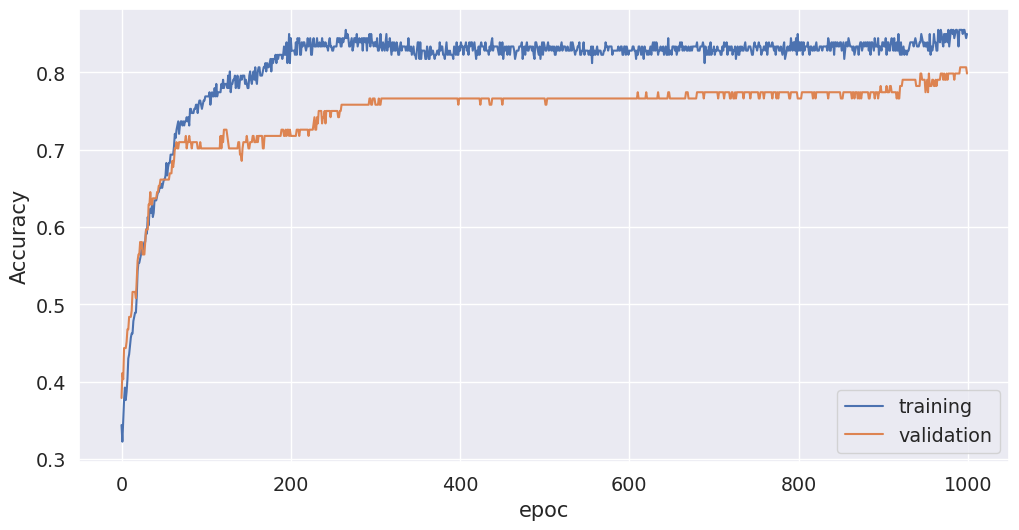

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.8999 - accuracy: 0.5938

186/186 [==============================] - 0s 597us/step - loss: 4.9993 - accuracy: 0.7043 - val_loss: 6.2241 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5772 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 4.7944 - accuracy: 0.7043 - val_loss: 6.0196 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5825 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 4.6366 - accuracy: 0.7043 - val_loss: 5.8394 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7953 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 4.4939 - accuracy: 0.7043 - val_loss: 5.6743 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.2960 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 4.3627 - accuracy: 0.7043 - val_loss: 5.5200 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5801 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 4.2376 - accuracy: 0.7043 - val_loss: 5.3693 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.7693 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 4.1196 - accuracy: 0.7043 - val_loss: 5.2217 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.8219 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 4.0043 - accuracy: 0.7043 - val_loss: 5.0796 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.1341 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 3.8896 - accuracy: 0.7043 - val_loss: 4.9345 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5080 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 3.7771 - accuracy: 0.7043 - val_loss: 4.7903 - val_accuracy: 0.6371


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1789 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 3.6710 - accuracy: 0.7043 - val_loss: 4.6619 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.9955 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 3.5707 - accuracy: 0.7043 - val_loss: 4.5281 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1104 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 3.4686 - accuracy: 0.7043 - val_loss: 4.3942 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6621 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 3.3660 - accuracy: 0.7043 - val_loss: 4.2566 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.2546 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 3.2648 - accuracy: 0.7043 - val_loss: 4.1260 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6914 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 3.1630 - accuracy: 0.7043 - val_loss: 3.9903 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3223 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 3.0608 - accuracy: 0.7043 - val_loss: 3.8614 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3595 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 2.9625 - accuracy: 0.7043 - val_loss: 3.7309 - val_accuracy: 0.6371


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7691 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 2.8624 - accuracy: 0.7043 - val_loss: 3.6037 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2205 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 2.7644 - accuracy: 0.7043 - val_loss: 3.4805 - val_accuracy: 0.6371


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1572 - accuracy: 0.7812

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 55us/step - loss: 2.6678 - accuracy: 0.7043 - val_loss: 3.3555 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6837 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 2.5714 - accuracy: 0.7043 - val_loss: 3.2377 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8803 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 2.4777 - accuracy: 0.7043 - val_loss: 3.1140 - val_accuracy: 0.6371


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6455 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 2.3802 - accuracy: 0.7043 - val_loss: 2.9932 - val_accuracy: 0.6371


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7408 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 2.2872 - accuracy: 0.7043 - val_loss: 2.8768 - val_accuracy: 0.6371


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9520 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 2.1942 - accuracy: 0.7043 - val_loss: 2.7567 - val_accuracy: 0.6371


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9390 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 2.0999 - accuracy: 0.7043 - val_loss: 2.6390 - val_accuracy: 0.6371


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0066 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 2.0078 - accuracy: 0.7043 - val_loss: 2.5200 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4979 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 1.9168 - accuracy: 0.7043 - val_loss: 2.4035 - val_accuracy: 0.6371


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4289 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 1.8268 - accuracy: 0.6989 - val_loss: 2.2900 - val_accuracy: 0.6371


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3608 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 1.7398 - accuracy: 0.6989 - val_loss: 2.1741 - val_accuracy: 0.6371


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3849 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 1.6515 - accuracy: 0.6989 - val_loss: 2.0589 - val_accuracy: 0.6371


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3625 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 1.5650 - accuracy: 0.6989 - val_loss: 1.9458 - val_accuracy: 0.6371


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6277 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 1.4803 - accuracy: 0.6989 - val_loss: 1.8340 - val_accuracy: 0.6371


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6468 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 1.3980 - accuracy: 0.6989 - val_loss: 1.7241 - val_accuracy: 0.6371


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8630 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 1.3162 - accuracy: 0.6935 - val_loss: 1.6144 - val_accuracy: 0.6371


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5795 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 1.2395 - accuracy: 0.6935 - val_loss: 1.5151 - val_accuracy: 0.6371


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5810 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 1.1674 - accuracy: 0.6935 - val_loss: 1.4157 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3409 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 1.0973 - accuracy: 0.6935 - val_loss: 1.3175 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1335 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 1.0312 - accuracy: 0.6935 - val_loss: 1.2334 - val_accuracy: 0.6452


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9913 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.9742 - accuracy: 0.6882 - val_loss: 1.1566 - val_accuracy: 0.6452


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0836 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.9237 - accuracy: 0.6882 - val_loss: 1.0837 - val_accuracy: 0.6452


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8442 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.8767 - accuracy: 0.6882 - val_loss: 1.0208 - val_accuracy: 0.6452


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7648 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.8357 - accuracy: 0.6935 - val_loss: 0.9579 - val_accuracy: 0.6452


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.7975 - accuracy: 0.6882 - val_loss: 0.9000 - val_accuracy: 0.6452


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.7634 - accuracy: 0.7043 - val_loss: 0.8490 - val_accuracy: 0.6371


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6093 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.7339 - accuracy: 0.7043 - val_loss: 0.8036 - val_accuracy: 0.6613


Epoch 48/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7490 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.7079 - accuracy: 0.7043 - val_loss: 0.7654 - val_accuracy: 0.6935


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7698 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.6864 - accuracy: 0.7043 - val_loss: 0.7360 - val_accuracy: 0.7097


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6670 - accuracy: 0.7043 - val_loss: 0.7046 - val_accuracy: 0.7097


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8193 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6488 - accuracy: 0.6935 - val_loss: 0.6803 - val_accuracy: 0.7016


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8981 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6328 - accuracy: 0.6989 - val_loss: 0.6616 - val_accuracy: 0.7097


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6193 - accuracy: 0.6989 - val_loss: 0.6397 - val_accuracy: 0.7177


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6071 - accuracy: 0.7151 - val_loss: 0.6198 - val_accuracy: 0.7177


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6398 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.5937 - accuracy: 0.7097 - val_loss: 0.6024 - val_accuracy: 0.7177


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7386 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5835 - accuracy: 0.7097 - val_loss: 0.5906 - val_accuracy: 0.7177


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.5726 - accuracy: 0.7097 - val_loss: 0.5747 - val_accuracy: 0.7177


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5626 - accuracy: 0.7097 - val_loss: 0.5606 - val_accuracy: 0.7177


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5504 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5548 - accuracy: 0.7151 - val_loss: 0.5499 - val_accuracy: 0.7177


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4907 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.5473 - accuracy: 0.7097 - val_loss: 0.5401 - val_accuracy: 0.7177


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7596 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 0.5379 - accuracy: 0.7097 - val_loss: 0.5328 - val_accuracy: 0.7177


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5874 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.5299 - accuracy: 0.7043 - val_loss: 0.5252 - val_accuracy: 0.7258


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5486 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.5228 - accuracy: 0.7312 - val_loss: 0.5138 - val_accuracy: 0.7419


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5161 - accuracy: 0.7097 - val_loss: 0.5091 - val_accuracy: 0.7419


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5118 - accuracy: 0.7204 - val_loss: 0.5023 - val_accuracy: 0.7581


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4157 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5059 - accuracy: 0.7258 - val_loss: 0.4973 - val_accuracy: 0.7581


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5006 - accuracy: 0.7204 - val_loss: 0.4915 - val_accuracy: 0.7661


Epoch 68/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4938 - accuracy: 0.7204 - val_loss: 0.4856 - val_accuracy: 0.7581


Epoch 69/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4884 - accuracy: 0.7151 - val_loss: 0.4797 - val_accuracy: 0.7742


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4840 - accuracy: 0.7151 - val_loss: 0.4761 - val_accuracy: 0.7742


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.4803 - accuracy: 0.7419 - val_loss: 0.4714 - val_accuracy: 0.7742


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4738 - accuracy: 0.7204 - val_loss: 0.4681 - val_accuracy: 0.7661


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.4708 - accuracy: 0.7312 - val_loss: 0.4651 - val_accuracy: 0.7661


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4663 - accuracy: 0.7151 - val_loss: 0.4641 - val_accuracy: 0.7661


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4628 - accuracy: 0.7473 - val_loss: 0.4590 - val_accuracy: 0.7742


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4595 - accuracy: 0.7312 - val_loss: 0.4572 - val_accuracy: 0.7742


Epoch 77/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4073 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4553 - accuracy: 0.7366 - val_loss: 0.4545 - val_accuracy: 0.7742


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4509 - accuracy: 0.7312 - val_loss: 0.4530 - val_accuracy: 0.7742


Epoch 79/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5460 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4481 - accuracy: 0.7366 - val_loss: 0.4519 - val_accuracy: 0.7742


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3757 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4466 - accuracy: 0.7419 - val_loss: 0.4496 - val_accuracy: 0.7661


Epoch 81/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4419 - accuracy: 0.7419 - val_loss: 0.4481 - val_accuracy: 0.7823


Epoch 82/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4396 - accuracy: 0.7581 - val_loss: 0.4460 - val_accuracy: 0.7661


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4376 - accuracy: 0.7473 - val_loss: 0.4442 - val_accuracy: 0.7661


Epoch 84/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5182 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.4355 - accuracy: 0.7527 - val_loss: 0.4428 - val_accuracy: 0.7742


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4328 - accuracy: 0.7527 - val_loss: 0.4416 - val_accuracy: 0.7823


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4117 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4294 - accuracy: 0.7527 - val_loss: 0.4411 - val_accuracy: 0.7823


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5914 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.4283 - accuracy: 0.7688 - val_loss: 0.4392 - val_accuracy: 0.8145


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4263 - accuracy: 0.7581 - val_loss: 0.4384 - val_accuracy: 0.8145


Epoch 89/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4257 - accuracy: 0.7581 - val_loss: 0.4377 - val_accuracy: 0.8145


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4217 - accuracy: 0.7581 - val_loss: 0.4381 - val_accuracy: 0.7903


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4200 - accuracy: 0.7742 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4184 - accuracy: 0.7796 - val_loss: 0.4361 - val_accuracy: 0.8145


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4163 - accuracy: 0.7796 - val_loss: 0.4356 - val_accuracy: 0.8065


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4159 - accuracy: 0.7742 - val_loss: 0.4353 - val_accuracy: 0.8065


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4124 - accuracy: 0.7849 - val_loss: 0.4339 - val_accuracy: 0.8145


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4116 - accuracy: 0.7849 - val_loss: 0.4323 - val_accuracy: 0.8065


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4964 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4096 - accuracy: 0.7849 - val_loss: 0.4321 - val_accuracy: 0.8145


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4090 - accuracy: 0.7903 - val_loss: 0.4317 - val_accuracy: 0.8145


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4070 - accuracy: 0.7849 - val_loss: 0.4310 - val_accuracy: 0.8145


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4048 - accuracy: 0.7849 - val_loss: 0.4308 - val_accuracy: 0.8145


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4044 - accuracy: 0.7903 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4033 - accuracy: 0.7903 - val_loss: 0.4290 - val_accuracy: 0.8145


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5829 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4026 - accuracy: 0.8011 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4007 - accuracy: 0.8011 - val_loss: 0.4288 - val_accuracy: 0.8065


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3997 - accuracy: 0.7957 - val_loss: 0.4287 - val_accuracy: 0.8145


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3980 - accuracy: 0.7957 - val_loss: 0.4280 - val_accuracy: 0.8145


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3974 - accuracy: 0.8011 - val_loss: 0.4277 - val_accuracy: 0.8145


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3952 - accuracy: 0.8011 - val_loss: 0.4273 - val_accuracy: 0.8065


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3946 - accuracy: 0.8172 - val_loss: 0.4268 - val_accuracy: 0.8145


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5138 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3946 - accuracy: 0.8118 - val_loss: 0.4262 - val_accuracy: 0.8226


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3929 - accuracy: 0.8065 - val_loss: 0.4255 - val_accuracy: 0.8145


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3914 - accuracy: 0.8011 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3902 - accuracy: 0.8172 - val_loss: 0.4248 - val_accuracy: 0.8145


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3911 - accuracy: 0.8118 - val_loss: 0.4246 - val_accuracy: 0.8145


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3892 - accuracy: 0.8118 - val_loss: 0.4244 - val_accuracy: 0.8145


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3879 - accuracy: 0.8118 - val_loss: 0.4240 - val_accuracy: 0.8145


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3863 - accuracy: 0.8065 - val_loss: 0.4237 - val_accuracy: 0.8145


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3866 - accuracy: 0.8118 - val_loss: 0.4235 - val_accuracy: 0.8145


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3853 - accuracy: 0.8065 - val_loss: 0.4236 - val_accuracy: 0.8226


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4422 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3850 - accuracy: 0.8065 - val_loss: 0.4229 - val_accuracy: 0.8145


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3842 - accuracy: 0.8118 - val_loss: 0.4227 - val_accuracy: 0.8145


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3831 - accuracy: 0.8118 - val_loss: 0.4224 - val_accuracy: 0.8145


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3817 - accuracy: 0.8118 - val_loss: 0.4224 - val_accuracy: 0.8145


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3804 - accuracy: 0.8065 - val_loss: 0.4222 - val_accuracy: 0.8145


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3803 - accuracy: 0.8118 - val_loss: 0.4220 - val_accuracy: 0.8145


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3816 - accuracy: 0.8118 - val_loss: 0.4217 - val_accuracy: 0.8145


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3782 - accuracy: 0.8065 - val_loss: 0.4215 - val_accuracy: 0.8145


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3783 - accuracy: 0.8172 - val_loss: 0.4215 - val_accuracy: 0.8226


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3777 - accuracy: 0.8118 - val_loss: 0.4212 - val_accuracy: 0.8145


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3766 - accuracy: 0.8118 - val_loss: 0.4211 - val_accuracy: 0.8145


Epoch 131/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3777 - accuracy: 0.8118 - val_loss: 0.4210 - val_accuracy: 0.8145


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.3757 - accuracy: 0.8118 - val_loss: 0.4209 - val_accuracy: 0.8145


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3760 - accuracy: 0.8172 - val_loss: 0.4208 - val_accuracy: 0.8145


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3739 - accuracy: 0.8065 - val_loss: 0.4207 - val_accuracy: 0.8145


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3736 - accuracy: 0.8118 - val_loss: 0.4205 - val_accuracy: 0.8145


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3740 - accuracy: 0.8172 - val_loss: 0.4204 - val_accuracy: 0.8145


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4605 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3728 - accuracy: 0.8118 - val_loss: 0.4206 - val_accuracy: 0.8065


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3720 - accuracy: 0.8172 - val_loss: 0.4201 - val_accuracy: 0.8145


Epoch 139/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3713 - accuracy: 0.8172 - val_loss: 0.4201 - val_accuracy: 0.8065


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4107 - accuracy: 0.7188



186/186 [==============================] - 0s 46us/step - loss: 0.3706 - accuracy: 0.8172 - val_loss: 0.4199 - val_accuracy: 0.7984


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3726 - accuracy: 0.8118 - val_loss: 0.4198 - val_accuracy: 0.8065


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3696 - accuracy: 0.8280 - val_loss: 0.4196 - val_accuracy: 0.7984


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3691 - accuracy: 0.8118 - val_loss: 0.4194 - val_accuracy: 0.7984


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3682 - accuracy: 0.8065 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3687 - accuracy: 0.8172 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 146/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3683 - accuracy: 0.8172 - val_loss: 0.4194 - val_accuracy: 0.8226


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3669 - accuracy: 0.8172 - val_loss: 0.4194 - val_accuracy: 0.8226


Epoch 148/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3682 - accuracy: 0.8172 - val_loss: 0.4194 - val_accuracy: 0.8226


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1528 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3669 - accuracy: 0.8226 - val_loss: 0.4191 - val_accuracy: 0.8226


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3648 - accuracy: 0.8280 - val_loss: 0.4190 - val_accuracy: 0.8226


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3650 - accuracy: 0.8226 - val_loss: 0.4184 - val_accuracy: 0.8226


Epoch 152/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5002 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3642 - accuracy: 0.8172 - val_loss: 0.4185 - val_accuracy: 0.8226


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2481 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3627 - accuracy: 0.8226 - val_loss: 0.4181 - val_accuracy: 0.8226


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3636 - accuracy: 0.8226 - val_loss: 0.4180 - val_accuracy: 0.8226


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3615 - accuracy: 0.8172 - val_loss: 0.4177 - val_accuracy: 0.8226


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3607 - accuracy: 0.8226 - val_loss: 0.4179 - val_accuracy: 0.8065


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.3616 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.8145


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3602 - accuracy: 0.8118 - val_loss: 0.4168 - val_accuracy: 0.8306


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.3593 - accuracy: 0.8172 - val_loss: 0.4172 - val_accuracy: 0.8065


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3581 - accuracy: 0.8172 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3582 - accuracy: 0.8226 - val_loss: 0.4161 - val_accuracy: 0.8226


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3588 - accuracy: 0.8172 - val_loss: 0.4157 - val_accuracy: 0.8226


Epoch 163/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3577 - accuracy: 0.8172 - val_loss: 0.4155 - val_accuracy: 0.8226


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3559 - accuracy: 0.8172 - val_loss: 0.4156 - val_accuracy: 0.8065


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3562 - accuracy: 0.8226 - val_loss: 0.4158 - val_accuracy: 0.8065


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3578 - accuracy: 0.8226 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3552 - accuracy: 0.8172 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3569 - accuracy: 0.8226 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4436 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3533 - accuracy: 0.8172 - val_loss: 0.4144 - val_accuracy: 0.8065


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3542 - accuracy: 0.8118 - val_loss: 0.4143 - val_accuracy: 0.8065


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3531 - accuracy: 0.8226 - val_loss: 0.4137 - val_accuracy: 0.8226


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3533 - accuracy: 0.8172 - val_loss: 0.4137 - val_accuracy: 0.8065


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3520 - accuracy: 0.8172 - val_loss: 0.4133 - val_accuracy: 0.8145


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3523 - accuracy: 0.8118 - val_loss: 0.4132 - val_accuracy: 0.8145


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3514 - accuracy: 0.8118 - val_loss: 0.4129 - val_accuracy: 0.8145


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4605 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3503 - accuracy: 0.8172 - val_loss: 0.4122 - val_accuracy: 0.8226


Epoch 177/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3511 - accuracy: 0.8172 - val_loss: 0.4125 - val_accuracy: 0.8065


Epoch 178/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3493 - accuracy: 0.8172 - val_loss: 0.4125 - val_accuracy: 0.8065


Epoch 179/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3502 - accuracy: 0.8118 - val_loss: 0.4117 - val_accuracy: 0.8145


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3495 - accuracy: 0.8172 - val_loss: 0.4114 - val_accuracy: 0.8145


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3489 - accuracy: 0.8172 - val_loss: 0.4117 - val_accuracy: 0.8065


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3472 - accuracy: 0.8226 - val_loss: 0.4112 - val_accuracy: 0.8145


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3473 - accuracy: 0.8226 - val_loss: 0.4114 - val_accuracy: 0.8145


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3468 - accuracy: 0.8226 - val_loss: 0.4105 - val_accuracy: 0.8145


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3468 - accuracy: 0.8172 - val_loss: 0.4106 - val_accuracy: 0.8145


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3462 - accuracy: 0.8065 - val_loss: 0.4104 - val_accuracy: 0.8145


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3457 - accuracy: 0.8118 - val_loss: 0.4104 - val_accuracy: 0.8145


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3448 - accuracy: 0.8172 - val_loss: 0.4118 - val_accuracy: 0.8065


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3445 - accuracy: 0.8118 - val_loss: 0.4115 - val_accuracy: 0.8065


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3436 - accuracy: 0.8118 - val_loss: 0.4106 - val_accuracy: 0.8145


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3454 - accuracy: 0.8065 - val_loss: 0.4107 - val_accuracy: 0.8065


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3433 - accuracy: 0.8226 - val_loss: 0.4109 - val_accuracy: 0.8145


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3423 - accuracy: 0.8118 - val_loss: 0.4111 - val_accuracy: 0.8145


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3447 - accuracy: 0.8011 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4542 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3419 - accuracy: 0.8172 - val_loss: 0.4113 - val_accuracy: 0.8065


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.3418 - accuracy: 0.8118 - val_loss: 0.4114 - val_accuracy: 0.8065


Epoch 197/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3415 - accuracy: 0.8118 - val_loss: 0.4117 - val_accuracy: 0.8065


Epoch 198/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2567 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3412 - accuracy: 0.8118 - val_loss: 0.4126 - val_accuracy: 0.8145


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3408 - accuracy: 0.7849 - val_loss: 0.4109 - val_accuracy: 0.7984


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3401 - accuracy: 0.8172 - val_loss: 0.4108 - val_accuracy: 0.7984


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3402 - accuracy: 0.8118 - val_loss: 0.4114 - val_accuracy: 0.7984


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3396 - accuracy: 0.8118 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3398 - accuracy: 0.8011 - val_loss: 0.4114 - val_accuracy: 0.7984


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3398 - accuracy: 0.8065 - val_loss: 0.4121 - val_accuracy: 0.8145


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3393 - accuracy: 0.7957 - val_loss: 0.4112 - val_accuracy: 0.8065


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3807 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3382 - accuracy: 0.8118 - val_loss: 0.4124 - val_accuracy: 0.8145


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3380 - accuracy: 0.7903 - val_loss: 0.4113 - val_accuracy: 0.8065


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3383 - accuracy: 0.8065 - val_loss: 0.4126 - val_accuracy: 0.8145


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3384 - accuracy: 0.7903 - val_loss: 0.4124 - val_accuracy: 0.8145


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3371 - accuracy: 0.8065 - val_loss: 0.4129 - val_accuracy: 0.8145


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3371 - accuracy: 0.7903 - val_loss: 0.4118 - val_accuracy: 0.8145


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3371 - accuracy: 0.8065 - val_loss: 0.4119 - val_accuracy: 0.8145


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3368 - accuracy: 0.8065 - val_loss: 0.4117 - val_accuracy: 0.8065


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3364 - accuracy: 0.7903 - val_loss: 0.4115 - val_accuracy: 0.8065


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3384 - accuracy: 0.7903 - val_loss: 0.4117 - val_accuracy: 0.8065


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3353 - accuracy: 0.8011 - val_loss: 0.4109 - val_accuracy: 0.8065


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3355 - accuracy: 0.8065 - val_loss: 0.4109 - val_accuracy: 0.8065


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4047 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3352 - accuracy: 0.8065 - val_loss: 0.4120 - val_accuracy: 0.8145


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3357 - accuracy: 0.7957 - val_loss: 0.4118 - val_accuracy: 0.8145


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.3351 - accuracy: 0.7796 - val_loss: 0.4130 - val_accuracy: 0.8145


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3346 - accuracy: 0.7957 - val_loss: 0.4132 - val_accuracy: 0.8145


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.3351 - accuracy: 0.7903 - val_loss: 0.4126 - val_accuracy: 0.8226


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3794 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3362 - accuracy: 0.7903 - val_loss: 0.4121 - val_accuracy: 0.8226


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3345 - accuracy: 0.7957 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4715 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.3353 - accuracy: 0.7957 - val_loss: 0.4114 - val_accuracy: 0.8065


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3335 - accuracy: 0.8065 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3329 - accuracy: 0.7957 - val_loss: 0.4106 - val_accuracy: 0.8065


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3333 - accuracy: 0.8172 - val_loss: 0.4120 - val_accuracy: 0.8226


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3344 - accuracy: 0.8065 - val_loss: 0.4121 - val_accuracy: 0.8226


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3331 - accuracy: 0.8065 - val_loss: 0.4111 - val_accuracy: 0.8065


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3328 - accuracy: 0.8011 - val_loss: 0.4108 - val_accuracy: 0.8065


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3329 - accuracy: 0.7903 - val_loss: 0.4106 - val_accuracy: 0.8065


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3327 - accuracy: 0.8011 - val_loss: 0.4114 - val_accuracy: 0.8226


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3321 - accuracy: 0.8011 - val_loss: 0.4116 - val_accuracy: 0.8226


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3335 - accuracy: 0.8011 - val_loss: 0.4107 - val_accuracy: 0.8065


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3938 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3311 - accuracy: 0.8011 - val_loss: 0.4105 - val_accuracy: 0.8065


Epoch 237/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3315 - accuracy: 0.7957 - val_loss: 0.4097 - val_accuracy: 0.8065


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3334 - accuracy: 0.8065 - val_loss: 0.4096 - val_accuracy: 0.8065


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3325 - accuracy: 0.8011 - val_loss: 0.4093 - val_accuracy: 0.8065


Epoch 240/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3327 - accuracy: 0.8065 - val_loss: 0.4094 - val_accuracy: 0.8065


Epoch 241/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3305 - accuracy: 0.8118 - val_loss: 0.4105 - val_accuracy: 0.8226


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3301 - accuracy: 0.8011 - val_loss: 0.4094 - val_accuracy: 0.8065


Epoch 243/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3328 - accuracy: 0.8011 - val_loss: 0.4101 - val_accuracy: 0.8145


Epoch 244/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3306 - accuracy: 0.8011 - val_loss: 0.4107 - val_accuracy: 0.8226


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3293 - accuracy: 0.8011 - val_loss: 0.4109 - val_accuracy: 0.8145


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3309 - accuracy: 0.8118 - val_loss: 0.4106 - val_accuracy: 0.8226


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3302 - accuracy: 0.7957 - val_loss: 0.4106 - val_accuracy: 0.8226


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3301 - accuracy: 0.8065 - val_loss: 0.4100 - val_accuracy: 0.8226


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3309 - accuracy: 0.8065 - val_loss: 0.4091 - val_accuracy: 0.8145


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3287 - accuracy: 0.8118 - val_loss: 0.4083 - val_accuracy: 0.8065


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3302 - accuracy: 0.8172 - val_loss: 0.4080 - val_accuracy: 0.8065


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3286 - accuracy: 0.8065 - val_loss: 0.4070 - val_accuracy: 0.8065


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3282 - accuracy: 0.8065 - val_loss: 0.4080 - val_accuracy: 0.8145


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3279 - accuracy: 0.8065 - val_loss: 0.4081 - val_accuracy: 0.8145


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3278 - accuracy: 0.8065 - val_loss: 0.4069 - val_accuracy: 0.8065


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3307 - accuracy: 0.8118 - val_loss: 0.4067 - val_accuracy: 0.8065


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3278 - accuracy: 0.8172 - val_loss: 0.4076 - val_accuracy: 0.8145


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3275 - accuracy: 0.8118 - val_loss: 0.4073 - val_accuracy: 0.8145


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3276 - accuracy: 0.8065 - val_loss: 0.4080 - val_accuracy: 0.8226


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3280 - accuracy: 0.8118 - val_loss: 0.4065 - val_accuracy: 0.8065


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3264 - accuracy: 0.8065 - val_loss: 0.4071 - val_accuracy: 0.8145


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.3283 - accuracy: 0.8065 - val_loss: 0.4073 - val_accuracy: 0.8145


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3269 - accuracy: 0.8118 - val_loss: 0.4070 - val_accuracy: 0.8145


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5027 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3282 - accuracy: 0.8065 - val_loss: 0.4065 - val_accuracy: 0.8145


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4196 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.3275 - accuracy: 0.8172 - val_loss: 0.4074 - val_accuracy: 0.8226


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.3258 - accuracy: 0.8118 - val_loss: 0.4080 - val_accuracy: 0.8226


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3259 - accuracy: 0.8118 - val_loss: 0.4072 - val_accuracy: 0.8226


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3255 - accuracy: 0.8118 - val_loss: 0.4068 - val_accuracy: 0.8145


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3267 - accuracy: 0.8118 - val_loss: 0.4070 - val_accuracy: 0.8145


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3252 - accuracy: 0.8118 - val_loss: 0.4063 - val_accuracy: 0.8065


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3253 - accuracy: 0.8118 - val_loss: 0.4066 - val_accuracy: 0.8145


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3262 - accuracy: 0.8226 - val_loss: 0.4059 - val_accuracy: 0.8065


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3248 - accuracy: 0.8226 - val_loss: 0.4064 - val_accuracy: 0.8226


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3263 - accuracy: 0.8065 - val_loss: 0.4049 - val_accuracy: 0.8065


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3244 - accuracy: 0.8172 - val_loss: 0.4049 - val_accuracy: 0.8065


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3248 - accuracy: 0.8226 - val_loss: 0.4046 - val_accuracy: 0.8065


Epoch 277/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3245 - accuracy: 0.8226 - val_loss: 0.4050 - val_accuracy: 0.8065


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.3248 - accuracy: 0.8118 - val_loss: 0.4041 - val_accuracy: 0.8065


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3255 - accuracy: 0.8065 - val_loss: 0.4051 - val_accuracy: 0.8065


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3244 - accuracy: 0.8226 - val_loss: 0.4044 - val_accuracy: 0.8065


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3246 - accuracy: 0.8226 - val_loss: 0.4057 - val_accuracy: 0.8145


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3229 - accuracy: 0.8226 - val_loss: 0.4068 - val_accuracy: 0.8226


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3235 - accuracy: 0.8118 - val_loss: 0.4068 - val_accuracy: 0.8226


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3239 - accuracy: 0.8011 - val_loss: 0.4052 - val_accuracy: 0.8145


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3227 - accuracy: 0.8172 - val_loss: 0.4065 - val_accuracy: 0.8226


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3236 - accuracy: 0.8172 - val_loss: 0.4069 - val_accuracy: 0.8226


Epoch 287/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3222 - accuracy: 0.8226 - val_loss: 0.4070 - val_accuracy: 0.8226


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3240 - accuracy: 0.8172 - val_loss: 0.4063 - val_accuracy: 0.8226


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3239 - accuracy: 0.8172 - val_loss: 0.4049 - val_accuracy: 0.8145


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3227 - accuracy: 0.8226 - val_loss: 0.4043 - val_accuracy: 0.8065


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3229 - accuracy: 0.8226 - val_loss: 0.4055 - val_accuracy: 0.8226


Epoch 292/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3219 - accuracy: 0.8226 - val_loss: 0.4060 - val_accuracy: 0.8226


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3229 - accuracy: 0.8226 - val_loss: 0.4041 - val_accuracy: 0.8065


Epoch 294/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3214 - accuracy: 0.8280 - val_loss: 0.4041 - val_accuracy: 0.8065


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3217 - accuracy: 0.8226 - val_loss: 0.4028 - val_accuracy: 0.8065


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3218 - accuracy: 0.8226 - val_loss: 0.4029 - val_accuracy: 0.8065


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3213 - accuracy: 0.8333 - val_loss: 0.4042 - val_accuracy: 0.8145


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3225 - accuracy: 0.8172 - val_loss: 0.4043 - val_accuracy: 0.8226


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3212 - accuracy: 0.8118 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 300/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3213 - accuracy: 0.8333 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3208 - accuracy: 0.8226 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1873 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3205 - accuracy: 0.8333 - val_loss: 0.4028 - val_accuracy: 0.8065


Epoch 303/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3199 - accuracy: 0.8280 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 304/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3211 - accuracy: 0.8333 - val_loss: 0.4039 - val_accuracy: 0.8226


Epoch 305/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3203 - accuracy: 0.8172 - val_loss: 0.4031 - val_accuracy: 0.8065


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3209 - accuracy: 0.8172 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3207 - accuracy: 0.8333 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3206 - accuracy: 0.8280 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3203 - accuracy: 0.8333 - val_loss: 0.4032 - val_accuracy: 0.8145


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3200 - accuracy: 0.8226 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3194 - accuracy: 0.8333 - val_loss: 0.4035 - val_accuracy: 0.8226


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3194 - accuracy: 0.8280 - val_loss: 0.4029 - val_accuracy: 0.8145


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3200 - accuracy: 0.8333 - val_loss: 0.4039 - val_accuracy: 0.8226


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3190 - accuracy: 0.8280 - val_loss: 0.4021 - val_accuracy: 0.8065


Epoch 315/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3188 - accuracy: 0.8280 - val_loss: 0.4031 - val_accuracy: 0.8145


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3202 - accuracy: 0.8172 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3196 - accuracy: 0.8226 - val_loss: 0.4029 - val_accuracy: 0.8145


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3199 - accuracy: 0.8226 - val_loss: 0.4026 - val_accuracy: 0.8145


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3187 - accuracy: 0.8172 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 320/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3188 - accuracy: 0.8280 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 321/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3189 - accuracy: 0.8333 - val_loss: 0.4025 - val_accuracy: 0.8145


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2127 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3184 - accuracy: 0.8172 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3186 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3199 - accuracy: 0.8280 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3187 - accuracy: 0.8280 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1954 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3186 - accuracy: 0.8280 - val_loss: 0.4020 - val_accuracy: 0.8145


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3178 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.8145


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3181 - accuracy: 0.8387 - val_loss: 0.4011 - val_accuracy: 0.8145


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3178 - accuracy: 0.8226 - val_loss: 0.3999 - val_accuracy: 0.8145


Epoch 331/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3179 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8145


Epoch 332/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3171 - accuracy: 0.8333 - val_loss: 0.4025 - val_accuracy: 0.8145


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3179 - accuracy: 0.8172 - val_loss: 0.4017 - val_accuracy: 0.8145


Epoch 334/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4442 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3166 - accuracy: 0.8333 - val_loss: 0.4014 - val_accuracy: 0.8145


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3175 - accuracy: 0.8280 - val_loss: 0.4019 - val_accuracy: 0.8145


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3178 - accuracy: 0.8226 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3185 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8145


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3173 - accuracy: 0.8333 - val_loss: 0.4014 - val_accuracy: 0.8145


Epoch 339/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3172 - accuracy: 0.8333 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 340/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3181 - accuracy: 0.8226 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3180 - accuracy: 0.8280 - val_loss: 0.4010 - val_accuracy: 0.8145


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4009 - val_accuracy: 0.8145


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3181 - accuracy: 0.8280 - val_loss: 0.4013 - val_accuracy: 0.8145


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.7188



186/186 [==============================] - 0s 43us/step - loss: 0.3160 - accuracy: 0.8333 - val_loss: 0.4022 - val_accuracy: 0.8145


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.4027 - val_accuracy: 0.8226


Epoch 346/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3167 - accuracy: 0.8280 - val_loss: 0.4022 - val_accuracy: 0.8145


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3162 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8145


Epoch 348/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3186 - accuracy: 0.8333 - val_loss: 0.4023 - val_accuracy: 0.8145


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3156 - accuracy: 0.8280 - val_loss: 0.4018 - val_accuracy: 0.8145


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3159 - accuracy: 0.8280 - val_loss: 0.4010 - val_accuracy: 0.8145


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3158 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.8145


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3166 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.8145


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3156 - accuracy: 0.8333 - val_loss: 0.4010 - val_accuracy: 0.8145


Epoch 354/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.4000 - val_accuracy: 0.8145


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3152 - accuracy: 0.8333 - val_loss: 0.4002 - val_accuracy: 0.8145


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1968 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3163 - accuracy: 0.8280 - val_loss: 0.4006 - val_accuracy: 0.8145


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3158 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8145


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3152 - accuracy: 0.8333 - val_loss: 0.4008 - val_accuracy: 0.8145


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3152 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 0.8145


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4001 - val_accuracy: 0.8145


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.3992 - val_accuracy: 0.8145


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3166 - accuracy: 0.8172 - val_loss: 0.4009 - val_accuracy: 0.8145


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.8145


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4005 - val_accuracy: 0.8145


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1957 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8145


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3163 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8145


Epoch 367/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2259 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3144 - accuracy: 0.8333 - val_loss: 0.4004 - val_accuracy: 0.8145


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.4012 - val_accuracy: 0.8145


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.8226


Epoch 370/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4002 - val_accuracy: 0.8145


Epoch 371/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4589 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3150 - accuracy: 0.8333 - val_loss: 0.4017 - val_accuracy: 0.8145


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.8226


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4023 - val_accuracy: 0.8226


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3009 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4020 - val_accuracy: 0.8226


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4028 - val_accuracy: 0.8145


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3131 - accuracy: 0.8387 - val_loss: 0.4011 - val_accuracy: 0.8145


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 0.8226


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5122 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4003 - val_accuracy: 0.8145


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4004 - val_accuracy: 0.8145


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3139 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.8226


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.4002 - val_accuracy: 0.8145


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4009 - val_accuracy: 0.8226


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3134 - accuracy: 0.8387 - val_loss: 0.4001 - val_accuracy: 0.8145


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.3999 - val_accuracy: 0.8145


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.3992 - val_accuracy: 0.8145


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3132 - accuracy: 0.8387 - val_loss: 0.4004 - val_accuracy: 0.8226


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3119 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8145


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3117 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.8145


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3133 - accuracy: 0.8333 - val_loss: 0.4011 - val_accuracy: 0.8226


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3121 - accuracy: 0.8280 - val_loss: 0.3995 - val_accuracy: 0.8145


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.3985 - val_accuracy: 0.8226


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3135 - accuracy: 0.8333 - val_loss: 0.3982 - val_accuracy: 0.8226


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4565 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3145 - accuracy: 0.8333 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.8145


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3121 - accuracy: 0.8333 - val_loss: 0.4002 - val_accuracy: 0.8226


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.3988 - val_accuracy: 0.8226


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3121 - accuracy: 0.8333 - val_loss: 0.3981 - val_accuracy: 0.8226


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3116 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.8226


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1695 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3117 - accuracy: 0.8280 - val_loss: 0.3995 - val_accuracy: 0.8226


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3116 - accuracy: 0.8333 - val_loss: 0.3981 - val_accuracy: 0.8226


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.8226


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3705 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4000 - val_accuracy: 0.8226


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3121 - accuracy: 0.8333 - val_loss: 0.3980 - val_accuracy: 0.8226


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3127 - accuracy: 0.8387 - val_loss: 0.3982 - val_accuracy: 0.8226


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.8226


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1748 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.3977 - val_accuracy: 0.8226


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2240 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.3981 - val_accuracy: 0.8306


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3106 - accuracy: 0.8280 - val_loss: 0.3980 - val_accuracy: 0.8226


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2130 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.3984 - val_accuracy: 0.8306


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3108 - accuracy: 0.8280 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3098 - accuracy: 0.8333 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1888 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.3980 - val_accuracy: 0.8306


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3106 - accuracy: 0.8441 - val_loss: 0.3994 - val_accuracy: 0.8145


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3098 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8306


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.8226


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.3979 - val_accuracy: 0.8306


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3095 - accuracy: 0.8387 - val_loss: 0.3971 - val_accuracy: 0.8226


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2197 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3089 - accuracy: 0.8280 - val_loss: 0.3992 - val_accuracy: 0.8145


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3115 - accuracy: 0.8333 - val_loss: 0.3979 - val_accuracy: 0.8226


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2300 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3100 - accuracy: 0.8387 - val_loss: 0.3983 - val_accuracy: 0.8306


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3094 - accuracy: 0.8280 - val_loss: 0.3988 - val_accuracy: 0.8226


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3103 - accuracy: 0.8387 - val_loss: 0.3979 - val_accuracy: 0.8306


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.3974 - val_accuracy: 0.8306


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8306


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.3985 - val_accuracy: 0.8306


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3096 - accuracy: 0.8280 - val_loss: 0.3975 - val_accuracy: 0.8226


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3095 - accuracy: 0.8280 - val_loss: 0.3976 - val_accuracy: 0.8306


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8306


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3094 - accuracy: 0.8172 - val_loss: 0.4001 - val_accuracy: 0.8145


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.3994 - val_accuracy: 0.8145


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.3991 - val_accuracy: 0.8145


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.3973 - val_accuracy: 0.8306


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3079 - accuracy: 0.8333 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.3969 - val_accuracy: 0.8306


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8280 - val_loss: 0.3971 - val_accuracy: 0.8226


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.3984 - val_accuracy: 0.8306


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.8306


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8226


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3080 - accuracy: 0.8333 - val_loss: 0.4000 - val_accuracy: 0.8145


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1674 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.8226


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3084 - accuracy: 0.8387 - val_loss: 0.3996 - val_accuracy: 0.8226


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1726 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.3990 - val_accuracy: 0.8226


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8226


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3079 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.8226


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.3981 - val_accuracy: 0.8306


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3071 - accuracy: 0.8387 - val_loss: 0.3975 - val_accuracy: 0.8306


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3079 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8145


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3063 - accuracy: 0.8333 - val_loss: 0.3976 - val_accuracy: 0.8226


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4280 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3068 - accuracy: 0.8280 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3068 - accuracy: 0.8333 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.3957 - val_accuracy: 0.8145


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3067 - accuracy: 0.8226 - val_loss: 0.3969 - val_accuracy: 0.8226


Epoch 465/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1726 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.3981 - val_accuracy: 0.8306


Epoch 466/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.3975 - val_accuracy: 0.8306


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.3980 - val_accuracy: 0.8306


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3756 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3059 - accuracy: 0.8387 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3063 - accuracy: 0.8333 - val_loss: 0.3963 - val_accuracy: 0.8226


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1691 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3061 - accuracy: 0.8280 - val_loss: 0.3971 - val_accuracy: 0.8306


Epoch 471/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.3974 - val_accuracy: 0.8306


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2025 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3061 - accuracy: 0.8280 - val_loss: 0.3974 - val_accuracy: 0.8226


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8226


Epoch 474/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3056 - accuracy: 0.8387 - val_loss: 0.3974 - val_accuracy: 0.8226


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.3994 - val_accuracy: 0.8226


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.3997 - val_accuracy: 0.8145


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5497 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.3997 - val_accuracy: 0.8145


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3054 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.8226


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3065 - accuracy: 0.8333 - val_loss: 0.4001 - val_accuracy: 0.8145


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3052 - accuracy: 0.8387 - val_loss: 0.3980 - val_accuracy: 0.8226


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3060 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8145


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2079 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.3973 - val_accuracy: 0.8226


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3938 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.3969 - val_accuracy: 0.8226


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.3044 - accuracy: 0.8387 - val_loss: 0.3960 - val_accuracy: 0.8226


Epoch 485/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.3961 - val_accuracy: 0.8226


Epoch 486/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3056 - accuracy: 0.8280 - val_loss: 0.3963 - val_accuracy: 0.8226


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.3057 - accuracy: 0.8226 - val_loss: 0.3967 - val_accuracy: 0.8226


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3044 - accuracy: 0.8333 - val_loss: 0.3957 - val_accuracy: 0.8145


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3046 - accuracy: 0.8226 - val_loss: 0.3957 - val_accuracy: 0.8226


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3056 - accuracy: 0.8280 - val_loss: 0.3980 - val_accuracy: 0.8226


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.3982 - val_accuracy: 0.8226


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.3975 - val_accuracy: 0.8226


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3045 - accuracy: 0.8387 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3040 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8145


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3051 - accuracy: 0.8387 - val_loss: 0.3982 - val_accuracy: 0.8145


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3049 - accuracy: 0.8280 - val_loss: 0.3992 - val_accuracy: 0.8145


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3061 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.8145


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3042 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.8145


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3036 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8145


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3047 - accuracy: 0.8280 - val_loss: 0.3984 - val_accuracy: 0.8145


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3048 - accuracy: 0.8280 - val_loss: 0.3989 - val_accuracy: 0.8145


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3042 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2109 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3045 - accuracy: 0.8280 - val_loss: 0.3971 - val_accuracy: 0.8226


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.3038 - accuracy: 0.8387 - val_loss: 0.3968 - val_accuracy: 0.8226


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3039 - accuracy: 0.8387 - val_loss: 0.3965 - val_accuracy: 0.8226


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8280 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1901 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3043 - accuracy: 0.8387 - val_loss: 0.3965 - val_accuracy: 0.8226


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3029 - accuracy: 0.8333 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3043 - accuracy: 0.8333 - val_loss: 0.3976 - val_accuracy: 0.8226


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3034 - accuracy: 0.8333 - val_loss: 0.3969 - val_accuracy: 0.8145


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3025 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8280 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3030 - accuracy: 0.8333 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1839 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3035 - accuracy: 0.8280 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3029 - accuracy: 0.8387 - val_loss: 0.3963 - val_accuracy: 0.8226


Epoch 519/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3027 - accuracy: 0.8280 - val_loss: 0.3969 - val_accuracy: 0.8226


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3027 - accuracy: 0.8333 - val_loss: 0.3960 - val_accuracy: 0.8226


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3032 - accuracy: 0.8333 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3017 - accuracy: 0.8333 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3054 - accuracy: 0.8280 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3022 - accuracy: 0.8387 - val_loss: 0.3976 - val_accuracy: 0.8145


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3034 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3024 - accuracy: 0.8333 - val_loss: 0.3975 - val_accuracy: 0.8145


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2032 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3022 - accuracy: 0.8333 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3029 - accuracy: 0.8333 - val_loss: 0.3976 - val_accuracy: 0.8145


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3023 - accuracy: 0.8280 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3017 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3022 - accuracy: 0.8280 - val_loss: 0.3999 - val_accuracy: 0.8145


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3025 - accuracy: 0.8387 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.3014 - accuracy: 0.8333 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3021 - accuracy: 0.8387 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3032 - accuracy: 0.8333 - val_loss: 0.3961 - val_accuracy: 0.8226


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3012 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8145


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1761 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3017 - accuracy: 0.8441 - val_loss: 0.3956 - val_accuracy: 0.8306


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3013 - accuracy: 0.8280 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3021 - accuracy: 0.8172 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3016 - accuracy: 0.8333 - val_loss: 0.3968 - val_accuracy: 0.8226


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3012 - accuracy: 0.8333 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3011 - accuracy: 0.8333 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3018 - accuracy: 0.8333 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3009 - accuracy: 0.8387 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4936 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3010 - accuracy: 0.8333 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1287 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.3014 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3015 - accuracy: 0.8333 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3017 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4597 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3006 - accuracy: 0.8280 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3006 - accuracy: 0.8333 - val_loss: 0.4009 - val_accuracy: 0.8145


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3005 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 552/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4659 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.2997 - accuracy: 0.8333 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3001 - accuracy: 0.8387 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 554/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4425 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 555/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 556/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3018 - accuracy: 0.8387 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2994 - accuracy: 0.8333 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3009 - accuracy: 0.8333 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2995 - accuracy: 0.8333 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2995 - accuracy: 0.8333 - val_loss: 0.3963 - val_accuracy: 0.8226


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2019 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3020 - accuracy: 0.8333 - val_loss: 0.3965 - val_accuracy: 0.8226


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2994 - accuracy: 0.8280 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2016 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3005 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2991 - accuracy: 0.8333 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2230 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3007 - accuracy: 0.8226 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3004 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.2991 - accuracy: 0.8333 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2995 - accuracy: 0.8333 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2991 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.2989 - accuracy: 0.8280 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.2995 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 574/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3002 - accuracy: 0.8333 - val_loss: 0.3971 - val_accuracy: 0.8226


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4394 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2992 - accuracy: 0.8387 - val_loss: 0.3964 - val_accuracy: 0.8226


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4553 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.2992 - accuracy: 0.8280 - val_loss: 0.3954 - val_accuracy: 0.8226


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2987 - accuracy: 0.8333 - val_loss: 0.3967 - val_accuracy: 0.8226


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3007 - accuracy: 0.8226 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2988 - accuracy: 0.8280 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1231 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2986 - accuracy: 0.8280 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2987 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 583/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2984 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2997 - accuracy: 0.8172 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 585/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2988 - accuracy: 0.8333 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2262 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3002 - accuracy: 0.8441 - val_loss: 0.3962 - val_accuracy: 0.8226


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2980 - accuracy: 0.8226 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1970 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2985 - accuracy: 0.8280 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2982 - accuracy: 0.8280 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2978 - accuracy: 0.8387 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2973 - accuracy: 0.8387 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2997 - accuracy: 0.8226 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2991 - accuracy: 0.8280 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2980 - accuracy: 0.8387 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.6562



186/186 [==============================] - 0s 48us/step - loss: 0.2975 - accuracy: 0.8387 - val_loss: 0.3968 - val_accuracy: 0.8226


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2981 - accuracy: 0.8226 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 598/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4645 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.2973 - accuracy: 0.8333 - val_loss: 0.3951 - val_accuracy: 0.8226


Epoch 599/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1761 - accuracy: 0.9688



186/186 [==============================] - 0s 46us/step - loss: 0.2978 - accuracy: 0.8387 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 600/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2994 - accuracy: 0.8280 - val_loss: 0.3957 - val_accuracy: 0.8226


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2973 - accuracy: 0.8333 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2973 - accuracy: 0.8333 - val_loss: 0.3965 - val_accuracy: 0.8226


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2984 - accuracy: 0.8333 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2971 - accuracy: 0.8333 - val_loss: 0.3974 - val_accuracy: 0.8065


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2971 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.2974 - accuracy: 0.8387 - val_loss: 0.3973 - val_accuracy: 0.8065


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.2964 - accuracy: 0.8280 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2972 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy: 0.8065


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2975 - accuracy: 0.8387 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2980 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8280 - val_loss: 0.3953 - val_accuracy: 0.8226


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2976 - accuracy: 0.8280 - val_loss: 0.3974 - val_accuracy: 0.8065


Epoch 614/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2966 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy: 0.8226


Epoch 615/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2970 - accuracy: 0.8333 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2080 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2966 - accuracy: 0.8333 - val_loss: 0.3971 - val_accuracy: 0.8226


Epoch 617/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.2969 - accuracy: 0.8333 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2105 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2979 - accuracy: 0.8226 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2970 - accuracy: 0.8333 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2972 - accuracy: 0.8280 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2965 - accuracy: 0.8387 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.3978 - val_accuracy: 0.8145


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2967 - accuracy: 0.8226 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2964 - accuracy: 0.8387 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2961 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2969 - accuracy: 0.8387 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2960 - accuracy: 0.8280 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.2960 - accuracy: 0.8333 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2954 - accuracy: 0.8387 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.2972 - accuracy: 0.8280 - val_loss: 0.3964 - val_accuracy: 0.8226


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1818 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2960 - accuracy: 0.8387 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2956 - accuracy: 0.8387 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2105 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2955 - accuracy: 0.8280 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2953 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4868 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.2953 - accuracy: 0.8280 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2953 - accuracy: 0.8387 - val_loss: 0.3974 - val_accuracy: 0.8226


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1697 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2948 - accuracy: 0.8387 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2963 - accuracy: 0.8280 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2959 - accuracy: 0.8387 - val_loss: 0.3977 - val_accuracy: 0.8226


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2957 - accuracy: 0.8333 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.3979 - val_accuracy: 0.8226


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2953 - accuracy: 0.8226 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1597 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2944 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8145


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.2954 - accuracy: 0.8333 - val_loss: 0.3979 - val_accuracy: 0.8226


Epoch 647/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2955 - accuracy: 0.8280 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 648/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2945 - accuracy: 0.8387 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2940 - accuracy: 0.8387 - val_loss: 0.3979 - val_accuracy: 0.8226


Epoch 650/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2945 - accuracy: 0.8280 - val_loss: 0.3986 - val_accuracy: 0.8145


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2964 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.2951 - accuracy: 0.8280 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1655 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.2944 - accuracy: 0.8387 - val_loss: 0.3986 - val_accuracy: 0.8145


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2934 - accuracy: 0.8333 - val_loss: 0.3985 - val_accuracy: 0.8145


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2940 - accuracy: 0.8280 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2936 - accuracy: 0.8387 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2942 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2939 - accuracy: 0.8333 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2936 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2943 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2938 - accuracy: 0.8387 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2933 - accuracy: 0.8333 - val_loss: 0.3976 - val_accuracy: 0.8065


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2931 - accuracy: 0.8333 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1855 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2944 - accuracy: 0.8333 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2948 - accuracy: 0.8226 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2931 - accuracy: 0.8387 - val_loss: 0.3986 - val_accuracy: 0.8145


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2948 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2931 - accuracy: 0.8441 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2941 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 674/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.2928 - accuracy: 0.8280 - val_loss: 0.3993 - val_accuracy: 0.8145


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2939 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 676/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2925 - accuracy: 0.8333 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2943 - accuracy: 0.8333 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 678/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 679/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2922 - accuracy: 0.8280 - val_loss: 0.3999 - val_accuracy: 0.8145


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2928 - accuracy: 0.8387 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2931 - accuracy: 0.8280 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2920 - accuracy: 0.8333 - val_loss: 0.3996 - val_accuracy: 0.8145


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2925 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2947 - accuracy: 0.8387 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.3990 - val_accuracy: 0.7984


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.2920 - accuracy: 0.8441 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2941 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2932 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.2928 - accuracy: 0.8280 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2127 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2913 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1411 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.2938 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2907 - accuracy: 0.8333 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2913 - accuracy: 0.8387 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2935 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2914 - accuracy: 0.8333 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2918 - accuracy: 0.8280 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2923 - accuracy: 0.8441 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2907 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2921 - accuracy: 0.8333 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2909 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 707/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2910 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 708/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2912 - accuracy: 0.8387 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2918 - accuracy: 0.8172 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2902 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2909 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2907 - accuracy: 0.8333 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2909 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2899 - accuracy: 0.8387 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.2921 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1325 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2907 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2904 - accuracy: 0.8387 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2907 - accuracy: 0.8441 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1730 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2901 - accuracy: 0.8333 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2906 - accuracy: 0.8333 - val_loss: 0.4029 - val_accuracy: 0.7984


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2893 - accuracy: 0.8387 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2908 - accuracy: 0.8280 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2899 - accuracy: 0.8387 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2909 - accuracy: 0.8387 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 725/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2900 - accuracy: 0.8387 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2895 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2905 - accuracy: 0.8441 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 728/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2921 - accuracy: 0.8333 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 729/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2895 - accuracy: 0.8387 - val_loss: 0.4029 - val_accuracy: 0.7984


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2897 - accuracy: 0.8333 - val_loss: 0.4034 - val_accuracy: 0.7984


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2896 - accuracy: 0.8333 - val_loss: 0.4030 - val_accuracy: 0.8065


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2893 - accuracy: 0.8441 - val_loss: 0.4027 - val_accuracy: 0.8065


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2903 - accuracy: 0.8441 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.4025 - val_accuracy: 0.8065


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2904 - accuracy: 0.8387 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2891 - accuracy: 0.8441 - val_loss: 0.4025 - val_accuracy: 0.8065


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2891 - accuracy: 0.8441 - val_loss: 0.4029 - val_accuracy: 0.8065


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2913 - accuracy: 0.8280 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2887 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.7984


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2881 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4024 - val_accuracy: 0.7984


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2884 - accuracy: 0.8387 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1900 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2880 - accuracy: 0.8387 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2899 - accuracy: 0.8280 - val_loss: 0.4030 - val_accuracy: 0.8065


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2881 - accuracy: 0.8387 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2879 - accuracy: 0.8387 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2059 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2902 - accuracy: 0.8333 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2877 - accuracy: 0.8387 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2883 - accuracy: 0.8387 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2888 - accuracy: 0.8333 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1754 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2876 - accuracy: 0.8387 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2900 - accuracy: 0.8280 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2880 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2873 - accuracy: 0.8333 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2194 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2878 - accuracy: 0.8441 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.2875 - accuracy: 0.8387 - val_loss: 0.4028 - val_accuracy: 0.8065


Epoch 758/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2879 - accuracy: 0.8333 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2873 - accuracy: 0.8333 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2871 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2885 - accuracy: 0.8387 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2888 - accuracy: 0.8387 - val_loss: 0.4012 - val_accuracy: 0.7984


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2864 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 764/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2055 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2873 - accuracy: 0.8387 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 765/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2884 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2303 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2877 - accuracy: 0.8441 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2865 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2868 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2860 - accuracy: 0.8387 - val_loss: 0.3997 - val_accuracy: 0.7984


Epoch 770/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2861 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1768 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.2866 - accuracy: 0.8387 - val_loss: 0.4015 - val_accuracy: 0.7984


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2863 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1827 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2867 - accuracy: 0.8441 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2866 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.2860 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.3990 - val_accuracy: 0.7984


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2249 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2857 - accuracy: 0.8387 - val_loss: 0.3986 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1911 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2858 - accuracy: 0.8387 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2854 - accuracy: 0.8441 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2873 - accuracy: 0.8441 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2857 - accuracy: 0.8387 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2876 - accuracy: 0.8333 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1508 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2863 - accuracy: 0.8280 - val_loss: 0.3996 - val_accuracy: 0.7984


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2866 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2854 - accuracy: 0.8333 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.2857 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2846 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2855 - accuracy: 0.8333 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2856 - accuracy: 0.8387 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2860 - accuracy: 0.8387 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2846 - accuracy: 0.8387 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1887 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2849 - accuracy: 0.8387 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2846 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2864 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2847 - accuracy: 0.8387 - val_loss: 0.3996 - val_accuracy: 0.7984


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2846 - accuracy: 0.8387 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2857 - accuracy: 0.8441 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2854 - accuracy: 0.8387 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1935 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2840 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1194 - accuracy: 1.0000

186/186 [==============================] - 0s 50us/step - loss: 0.2842 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2859 - accuracy: 0.8333 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2840 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2840 - accuracy: 0.8280 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2858 - accuracy: 0.8387 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2840 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2851 - accuracy: 0.8280 - val_loss: 0.4027 - val_accuracy: 0.8065


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2845 - accuracy: 0.8333 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2835 - accuracy: 0.8333 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2839 - accuracy: 0.8333 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2837 - accuracy: 0.8387 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2846 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 813/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2836 - accuracy: 0.8387 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 814/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2837 - accuracy: 0.8387 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 815/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2068 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2840 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.2848 - accuracy: 0.8387 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1605 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2836 - accuracy: 0.8333 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2831 - accuracy: 0.8387 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2837 - accuracy: 0.8387 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1765 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2832 - accuracy: 0.8387 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2134 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2831 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2834 - accuracy: 0.8387 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2852 - accuracy: 0.8387 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2832 - accuracy: 0.8333 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2830 - accuracy: 0.8333 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 826/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2840 - accuracy: 0.8333 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2838 - accuracy: 0.8387 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1958 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2845 - accuracy: 0.8333 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2828 - accuracy: 0.8387 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2826 - accuracy: 0.8387 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2845 - accuracy: 0.8387 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2826 - accuracy: 0.8387 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2826 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.8065


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2838 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2820 - accuracy: 0.8387 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2832 - accuracy: 0.8333 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2832 - accuracy: 0.8387 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2430 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2818 - accuracy: 0.8387 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2822 - accuracy: 0.8387 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2819 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2832 - accuracy: 0.8387 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2824 - accuracy: 0.8441 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1950 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2815 - accuracy: 0.8387 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2821 - accuracy: 0.8387 - val_loss: 0.4027 - val_accuracy: 0.8065


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2820 - accuracy: 0.8387 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.2820 - accuracy: 0.8333 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2817 - accuracy: 0.8387 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1864 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2817 - accuracy: 0.8387 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2818 - accuracy: 0.8333 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.2826 - accuracy: 0.8387 - val_loss: 0.4022 - val_accuracy: 0.8065


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2817 - accuracy: 0.8333 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.2819 - accuracy: 0.8333 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2821 - accuracy: 0.8333 - val_loss: 0.4045 - val_accuracy: 0.8145


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2537 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.2814 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 855/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2828 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 856/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2827 - accuracy: 0.8333 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 857/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2809 - accuracy: 0.8333 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.2816 - accuracy: 0.8280 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2817 - accuracy: 0.8387 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2812 - accuracy: 0.8333 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2813 - accuracy: 0.8387 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 862/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2815 - accuracy: 0.8387 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2506 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2800 - accuracy: 0.8387 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2826 - accuracy: 0.8333 - val_loss: 0.4036 - val_accuracy: 0.8065


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2805 - accuracy: 0.8387 - val_loss: 0.4029 - val_accuracy: 0.8065


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1690 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.2837 - accuracy: 0.8441 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 867/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2810 - accuracy: 0.8333 - val_loss: 0.4033 - val_accuracy: 0.8065


Epoch 868/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2809 - accuracy: 0.8333 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.2811 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 870/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2811 - accuracy: 0.8333 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 871/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2807 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 872/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2820 - accuracy: 0.8441 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 873/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.2805 - accuracy: 0.8387 - val_loss: 0.4030 - val_accuracy: 0.8065


Epoch 874/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2800 - accuracy: 0.8333 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 875/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2801 - accuracy: 0.8387 - val_loss: 0.4027 - val_accuracy: 0.8065


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3379 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2799 - accuracy: 0.8441 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2814 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 878/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2812 - accuracy: 0.8441 - val_loss: 0.4027 - val_accuracy: 0.8065


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2797 - accuracy: 0.8333 - val_loss: 0.4032 - val_accuracy: 0.8065


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2797 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2817 - accuracy: 0.8387 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2800 - accuracy: 0.8387 - val_loss: 0.4032 - val_accuracy: 0.8065


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2800 - accuracy: 0.8387 - val_loss: 0.4025 - val_accuracy: 0.8065


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2790 - accuracy: 0.8387 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2799 - accuracy: 0.8387 - val_loss: 0.4030 - val_accuracy: 0.8065


Epoch 886/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.2804 - accuracy: 0.8333 - val_loss: 0.4029 - val_accuracy: 0.8065


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2792 - accuracy: 0.8387 - val_loss: 0.4050 - val_accuracy: 0.8065


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.2809 - accuracy: 0.8387 - val_loss: 0.4046 - val_accuracy: 0.8065


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2793 - accuracy: 0.8387 - val_loss: 0.4032 - val_accuracy: 0.8065


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2789 - accuracy: 0.8387 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2808 - accuracy: 0.8333 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2807 - accuracy: 0.8441 - val_loss: 0.4006 - val_accuracy: 0.8145


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2793 - accuracy: 0.8441 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.2794 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.8145


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2793 - accuracy: 0.8387 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2789 - accuracy: 0.8387 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2796 - accuracy: 0.8387 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2796 - accuracy: 0.8441 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2786 - accuracy: 0.8333 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2796 - accuracy: 0.8441 - val_loss: 0.4006 - val_accuracy: 0.8145


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1641 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2780 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2242 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2803 - accuracy: 0.8280 - val_loss: 0.4029 - val_accuracy: 0.8065


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.2794 - accuracy: 0.8333 - val_loss: 0.4043 - val_accuracy: 0.8065


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1839 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2783 - accuracy: 0.8280 - val_loss: 0.4036 - val_accuracy: 0.8065


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2790 - accuracy: 0.8387 - val_loss: 0.4032 - val_accuracy: 0.8065


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2224 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2784 - accuracy: 0.8333 - val_loss: 0.4032 - val_accuracy: 0.8065


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2082 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2794 - accuracy: 0.8441 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2793 - accuracy: 0.8387 - val_loss: 0.4025 - val_accuracy: 0.8065


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2780 - accuracy: 0.8387 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2785 - accuracy: 0.8387 - val_loss: 0.4045 - val_accuracy: 0.8065


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2777 - accuracy: 0.8387 - val_loss: 0.4035 - val_accuracy: 0.8065


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2334 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2782 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.8065


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2804 - accuracy: 0.8280 - val_loss: 0.4036 - val_accuracy: 0.8065


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2784 - accuracy: 0.8387 - val_loss: 0.4053 - val_accuracy: 0.8065


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2796 - accuracy: 0.8387 - val_loss: 0.4054 - val_accuracy: 0.8065


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2776 - accuracy: 0.8333 - val_loss: 0.4057 - val_accuracy: 0.8065


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2782 - accuracy: 0.8441 - val_loss: 0.4056 - val_accuracy: 0.8065


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2782 - accuracy: 0.8387 - val_loss: 0.4055 - val_accuracy: 0.8065


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1917 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2783 - accuracy: 0.8441 - val_loss: 0.4042 - val_accuracy: 0.8065


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2772 - accuracy: 0.8387 - val_loss: 0.4060 - val_accuracy: 0.8065


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.2780 - accuracy: 0.8387 - val_loss: 0.4030 - val_accuracy: 0.8065


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1788 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2779 - accuracy: 0.8441 - val_loss: 0.4051 - val_accuracy: 0.8065


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2778 - accuracy: 0.8387 - val_loss: 0.4038 - val_accuracy: 0.8065


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2780 - accuracy: 0.8548 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 925/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3541 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2776 - accuracy: 0.8387 - val_loss: 0.4029 - val_accuracy: 0.8065


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2779 - accuracy: 0.8441 - val_loss: 0.4024 - val_accuracy: 0.8145


Epoch 927/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1780 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2792 - accuracy: 0.8333 - val_loss: 0.4044 - val_accuracy: 0.8065


Epoch 928/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2001 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2778 - accuracy: 0.8495 - val_loss: 0.4051 - val_accuracy: 0.8065


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2769 - accuracy: 0.8280 - val_loss: 0.4041 - val_accuracy: 0.8065


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2452 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2774 - accuracy: 0.8548 - val_loss: 0.4031 - val_accuracy: 0.8065


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2770 - accuracy: 0.8441 - val_loss: 0.4059 - val_accuracy: 0.8065


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1813 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2771 - accuracy: 0.8387 - val_loss: 0.4064 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2776 - accuracy: 0.8441 - val_loss: 0.4064 - val_accuracy: 0.8065


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2785 - accuracy: 0.8387 - val_loss: 0.4059 - val_accuracy: 0.8065


Epoch 935/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2770 - accuracy: 0.8387 - val_loss: 0.4042 - val_accuracy: 0.8065


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1944 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2767 - accuracy: 0.8441 - val_loss: 0.4057 - val_accuracy: 0.8065


Epoch 937/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3551 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2762 - accuracy: 0.8333 - val_loss: 0.4043 - val_accuracy: 0.8065


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2784 - accuracy: 0.8387 - val_loss: 0.4031 - val_accuracy: 0.8145


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2770 - accuracy: 0.8387 - val_loss: 0.4059 - val_accuracy: 0.8065


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2763 - accuracy: 0.8333 - val_loss: 0.4043 - val_accuracy: 0.8065


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2775 - accuracy: 0.8333 - val_loss: 0.4047 - val_accuracy: 0.8065


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1848 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2768 - accuracy: 0.8387 - val_loss: 0.4044 - val_accuracy: 0.8065


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2760 - accuracy: 0.8441 - val_loss: 0.4075 - val_accuracy: 0.8065


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2758 - accuracy: 0.8441 - val_loss: 0.4092 - val_accuracy: 0.8065


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2772 - accuracy: 0.8441 - val_loss: 0.4075 - val_accuracy: 0.8065


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2771 - accuracy: 0.8333 - val_loss: 0.4086 - val_accuracy: 0.8065


Epoch 947/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2770 - accuracy: 0.8387 - val_loss: 0.4093 - val_accuracy: 0.8065


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2758 - accuracy: 0.8387 - val_loss: 0.4090 - val_accuracy: 0.8065


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2771 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.8065


Epoch 950/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2778 - accuracy: 0.8387 - val_loss: 0.4084 - val_accuracy: 0.8065


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2766 - accuracy: 0.8387 - val_loss: 0.4066 - val_accuracy: 0.8065


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2765 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.8065


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2760 - accuracy: 0.8333 - val_loss: 0.4079 - val_accuracy: 0.8065


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2757 - accuracy: 0.8441 - val_loss: 0.4075 - val_accuracy: 0.8065


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2775 - accuracy: 0.8333 - val_loss: 0.4057 - val_accuracy: 0.8065


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1703 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2749 - accuracy: 0.8441 - val_loss: 0.4074 - val_accuracy: 0.8065


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2758 - accuracy: 0.8441 - val_loss: 0.4072 - val_accuracy: 0.8065


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1813 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2767 - accuracy: 0.8333 - val_loss: 0.4062 - val_accuracy: 0.8065


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2030 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2769 - accuracy: 0.8495 - val_loss: 0.4068 - val_accuracy: 0.8065


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.6875



186/186 [==============================] - 0s 47us/step - loss: 0.2762 - accuracy: 0.8333 - val_loss: 0.4060 - val_accuracy: 0.8065


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2754 - accuracy: 0.8441 - val_loss: 0.4052 - val_accuracy: 0.8145


Epoch 962/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3056 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2762 - accuracy: 0.8333 - val_loss: 0.4056 - val_accuracy: 0.8145


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2755 - accuracy: 0.8441 - val_loss: 0.4079 - val_accuracy: 0.8065


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2753 - accuracy: 0.8387 - val_loss: 0.4082 - val_accuracy: 0.8065


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2753 - accuracy: 0.8441 - val_loss: 0.4092 - val_accuracy: 0.8065


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.2763 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.8065


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3566 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.2765 - accuracy: 0.8387 - val_loss: 0.4079 - val_accuracy: 0.8065


Epoch 968/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2764 - accuracy: 0.8333 - val_loss: 0.4071 - val_accuracy: 0.8065


Epoch 969/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2749 - accuracy: 0.8387 - val_loss: 0.4076 - val_accuracy: 0.8065


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2755 - accuracy: 0.8441 - val_loss: 0.4078 - val_accuracy: 0.8065


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.2761 - accuracy: 0.8387 - val_loss: 0.4087 - val_accuracy: 0.8065


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2760 - accuracy: 0.8441 - val_loss: 0.4101 - val_accuracy: 0.8065


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2742 - accuracy: 0.8495 - val_loss: 0.4101 - val_accuracy: 0.8065


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2753 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.8065


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2748 - accuracy: 0.8387 - val_loss: 0.4111 - val_accuracy: 0.8065


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2759 - accuracy: 0.8333 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2748 - accuracy: 0.8387 - val_loss: 0.4088 - val_accuracy: 0.8065


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2746 - accuracy: 0.8441 - val_loss: 0.4113 - val_accuracy: 0.8065


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2762 - accuracy: 0.8387 - val_loss: 0.4113 - val_accuracy: 0.8065


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2739 - accuracy: 0.8387 - val_loss: 0.4088 - val_accuracy: 0.8065


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2747 - accuracy: 0.8387 - val_loss: 0.4104 - val_accuracy: 0.8065


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2742 - accuracy: 0.8495 - val_loss: 0.4097 - val_accuracy: 0.8065


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2751 - accuracy: 0.8387 - val_loss: 0.4095 - val_accuracy: 0.8065


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2751 - accuracy: 0.8441 - val_loss: 0.4100 - val_accuracy: 0.8065


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2746 - accuracy: 0.8441 - val_loss: 0.4100 - val_accuracy: 0.8065


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2740 - accuracy: 0.8495 - val_loss: 0.4096 - val_accuracy: 0.8065


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2740 - accuracy: 0.8441 - val_loss: 0.4104 - val_accuracy: 0.8065


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2741 - accuracy: 0.8387 - val_loss: 0.4091 - val_accuracy: 0.8065


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2748 - accuracy: 0.8441 - val_loss: 0.4113 - val_accuracy: 0.8065


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2756 - accuracy: 0.8441 - val_loss: 0.4118 - val_accuracy: 0.8065


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2753 - accuracy: 0.8495 - val_loss: 0.4124 - val_accuracy: 0.8065


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1989 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2744 - accuracy: 0.8387 - val_loss: 0.4103 - val_accuracy: 0.8065


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1928 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2733 - accuracy: 0.8495 - val_loss: 0.4114 - val_accuracy: 0.8065


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2733 - accuracy: 0.8495 - val_loss: 0.4109 - val_accuracy: 0.8065


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2747 - accuracy: 0.8495 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2739 - accuracy: 0.8441 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1841 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2729 - accuracy: 0.8441 - val_loss: 0.4119 - val_accuracy: 0.8065


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2349 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2738 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.8065


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2731 - accuracy: 0.8387 - val_loss: 0.4109 - val_accuracy: 0.8065


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2751 - accuracy: 0.8387 - val_loss: 0.4131 - val_accuracy: 0.8065


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples


Epoch 1/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2728 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.8065


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2739 - accuracy: 0.8387 - val_loss: 0.4124 - val_accuracy: 0.8065


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2731 - accuracy: 0.8495 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2746 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.8065


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2732 - accuracy: 0.8333 - val_loss: 0.4117 - val_accuracy: 0.8065


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2759 - accuracy: 0.8495 - val_loss: 0.4118 - val_accuracy: 0.8065


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2733 - accuracy: 0.8441 - val_loss: 0.4125 - val_accuracy: 0.8065


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2736 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.8065


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2727 - accuracy: 0.8548 - val_loss: 0.4141 - val_accuracy: 0.8065


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2733 - accuracy: 0.8387 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2730 - accuracy: 0.8441 - val_loss: 0.4120 - val_accuracy: 0.8065


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2743 - accuracy: 0.8441 - val_loss: 0.4114 - val_accuracy: 0.8065


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2732 - accuracy: 0.8495 - val_loss: 0.4102 - val_accuracy: 0.8065


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2731 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.8065


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1957 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2728 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.8065


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2747 - accuracy: 0.8441 - val_loss: 0.4150 - val_accuracy: 0.8065


Epoch 17/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2728 - accuracy: 0.8441 - val_loss: 0.4158 - val_accuracy: 0.8065


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2747 - accuracy: 0.8495 - val_loss: 0.4157 - val_accuracy: 0.8065


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2729 - accuracy: 0.8441 - val_loss: 0.4166 - val_accuracy: 0.8065


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2733 - accuracy: 0.8387 - val_loss: 0.4152 - val_accuracy: 0.8065


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1632 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2723 - accuracy: 0.8495 - val_loss: 0.4159 - val_accuracy: 0.8065


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1078 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2720 - accuracy: 0.8441 - val_loss: 0.4150 - val_accuracy: 0.8065


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2721 - accuracy: 0.8495 - val_loss: 0.4144 - val_accuracy: 0.8065


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2726 - accuracy: 0.8441 - val_loss: 0.4167 - val_accuracy: 0.8065


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2728 - accuracy: 0.8495 - val_loss: 0.4176 - val_accuracy: 0.8065


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2735 - accuracy: 0.8441 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2722 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.8065


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2721 - accuracy: 0.8441 - val_loss: 0.4124 - val_accuracy: 0.8065


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2728 - accuracy: 0.8495 - val_loss: 0.4134 - val_accuracy: 0.8065


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2725 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.8065


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2723 - accuracy: 0.8495 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1882 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2721 - accuracy: 0.8387 - val_loss: 0.4165 - val_accuracy: 0.8065


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1627 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2724 - accuracy: 0.8441 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2724 - accuracy: 0.8441 - val_loss: 0.4122 - val_accuracy: 0.8145


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2728 - accuracy: 0.8495 - val_loss: 0.4143 - val_accuracy: 0.8065


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2719 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.8065


Epoch 37/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2721 - accuracy: 0.8495 - val_loss: 0.4153 - val_accuracy: 0.8065


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2738 - accuracy: 0.8441 - val_loss: 0.4155 - val_accuracy: 0.8065


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2728 - accuracy: 0.8441 - val_loss: 0.4174 - val_accuracy: 0.8065


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2713 - accuracy: 0.8387 - val_loss: 0.4154 - val_accuracy: 0.8065


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2718 - accuracy: 0.8548 - val_loss: 0.4161 - val_accuracy: 0.8065


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.2726 - accuracy: 0.8495 - val_loss: 0.4159 - val_accuracy: 0.8065


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2727 - accuracy: 0.8387 - val_loss: 0.4170 - val_accuracy: 0.8065


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2708 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.8065


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2723 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.8145


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2729 - accuracy: 0.8441 - val_loss: 0.4163 - val_accuracy: 0.8065


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2314 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2727 - accuracy: 0.8441 - val_loss: 0.4183 - val_accuracy: 0.8065


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2727 - accuracy: 0.8495 - val_loss: 0.4192 - val_accuracy: 0.8065


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2709 - accuracy: 0.8495 - val_loss: 0.4199 - val_accuracy: 0.8065


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2721 - accuracy: 0.8495 - val_loss: 0.4209 - val_accuracy: 0.8145


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2825 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2716 - accuracy: 0.8441 - val_loss: 0.4209 - val_accuracy: 0.8145


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2722 - accuracy: 0.8441 - val_loss: 0.4189 - val_accuracy: 0.8065


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2723 - accuracy: 0.8441 - val_loss: 0.4181 - val_accuracy: 0.8065


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2711 - accuracy: 0.8548 - val_loss: 0.4192 - val_accuracy: 0.8065


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2707 - accuracy: 0.8441 - val_loss: 0.4182 - val_accuracy: 0.8065


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2718 - accuracy: 0.8441 - val_loss: 0.4168 - val_accuracy: 0.8065


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2709 - accuracy: 0.8495 - val_loss: 0.4197 - val_accuracy: 0.8065


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3322 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2706 - accuracy: 0.8495 - val_loss: 0.4200 - val_accuracy: 0.8065


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2738 - accuracy: 0.8548 - val_loss: 0.4177 - val_accuracy: 0.8065


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2731 - accuracy: 0.8441 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2707 - accuracy: 0.8495 - val_loss: 0.4191 - val_accuracy: 0.8065


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.2704 - accuracy: 0.8387 - val_loss: 0.4182 - val_accuracy: 0.8065


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2713 - accuracy: 0.8495 - val_loss: 0.4199 - val_accuracy: 0.8065


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1271 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2710 - accuracy: 0.8441 - val_loss: 0.4193 - val_accuracy: 0.8065


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2729 - accuracy: 0.8387 - val_loss: 0.4190 - val_accuracy: 0.8065


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2701 - accuracy: 0.8548 - val_loss: 0.4187 - val_accuracy: 0.8065


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2702 - accuracy: 0.8495 - val_loss: 0.4197 - val_accuracy: 0.8065


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2716 - accuracy: 0.8495 - val_loss: 0.4189 - val_accuracy: 0.8065


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2711 - accuracy: 0.8495 - val_loss: 0.4178 - val_accuracy: 0.8145


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2015 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2707 - accuracy: 0.8495 - val_loss: 0.4176 - val_accuracy: 0.8145


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.2711 - accuracy: 0.8441 - val_loss: 0.4178 - val_accuracy: 0.8145


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2697 - accuracy: 0.8495 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2707 - accuracy: 0.8495 - val_loss: 0.4194 - val_accuracy: 0.8065


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2716 - accuracy: 0.8495 - val_loss: 0.4186 - val_accuracy: 0.8065


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1291 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2702 - accuracy: 0.8441 - val_loss: 0.4191 - val_accuracy: 0.8145


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2704 - accuracy: 0.8495 - val_loss: 0.4210 - val_accuracy: 0.8065


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2715 - accuracy: 0.8333 - val_loss: 0.4201 - val_accuracy: 0.8065


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2518 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2707 - accuracy: 0.8548 - val_loss: 0.4208 - val_accuracy: 0.8065


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2704 - accuracy: 0.8495 - val_loss: 0.4230 - val_accuracy: 0.8065


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3727 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2696 - accuracy: 0.8441 - val_loss: 0.4209 - val_accuracy: 0.8065


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2694 - accuracy: 0.8441 - val_loss: 0.4209 - val_accuracy: 0.8065


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2701 - accuracy: 0.8495 - val_loss: 0.4212 - val_accuracy: 0.8065


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2698 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.8065


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2702 - accuracy: 0.8548 - val_loss: 0.4242 - val_accuracy: 0.8065


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2706 - accuracy: 0.8333 - val_loss: 0.4222 - val_accuracy: 0.8065


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2699 - accuracy: 0.8441 - val_loss: 0.4223 - val_accuracy: 0.8065


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2028 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2702 - accuracy: 0.8495 - val_loss: 0.4229 - val_accuracy: 0.8065


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2692 - accuracy: 0.8548 - val_loss: 0.4241 - val_accuracy: 0.8065


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2709 - accuracy: 0.8441 - val_loss: 0.4226 - val_accuracy: 0.8065


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1745 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2709 - accuracy: 0.8441 - val_loss: 0.4219 - val_accuracy: 0.8065


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2696 - accuracy: 0.8548 - val_loss: 0.4255 - val_accuracy: 0.8065


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2698 - accuracy: 0.8441 - val_loss: 0.4226 - val_accuracy: 0.8065


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2708 - accuracy: 0.8441 - val_loss: 0.4216 - val_accuracy: 0.8145


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2710 - accuracy: 0.8441 - val_loss: 0.4216 - val_accuracy: 0.8145


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2692 - accuracy: 0.8495 - val_loss: 0.4212 - val_accuracy: 0.8065


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2690 - accuracy: 0.8495 - val_loss: 0.4207 - val_accuracy: 0.8145


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2700 - accuracy: 0.8495 - val_loss: 0.4233 - val_accuracy: 0.8065


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2697 - accuracy: 0.8387 - val_loss: 0.4210 - val_accuracy: 0.8145


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2696 - accuracy: 0.8441 - val_loss: 0.4199 - val_accuracy: 0.8145


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3314 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2693 - accuracy: 0.8548 - val_loss: 0.4236 - val_accuracy: 0.8065


Epoch 101/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2691 - accuracy: 0.8495 - val_loss: 0.4243 - val_accuracy: 0.8065


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2706 - accuracy: 0.8495 - val_loss: 0.4235 - val_accuracy: 0.8065


Epoch 103/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2693 - accuracy: 0.8495 - val_loss: 0.4241 - val_accuracy: 0.8065


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2693 - accuracy: 0.8495 - val_loss: 0.4247 - val_accuracy: 0.8065


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2698 - accuracy: 0.8548 - val_loss: 0.4259 - val_accuracy: 0.8065


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2689 - accuracy: 0.8387 - val_loss: 0.4256 - val_accuracy: 0.8065


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2704 - accuracy: 0.8656 - val_loss: 0.4276 - val_accuracy: 0.8065


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2692 - accuracy: 0.8495 - val_loss: 0.4262 - val_accuracy: 0.8065


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2696 - accuracy: 0.8441 - val_loss: 0.4279 - val_accuracy: 0.8065


Epoch 110/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2686 - accuracy: 0.8495 - val_loss: 0.4281 - val_accuracy: 0.8065


Epoch 111/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2693 - accuracy: 0.8387 - val_loss: 0.4259 - val_accuracy: 0.8065


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2708 - accuracy: 0.8333 - val_loss: 0.4250 - val_accuracy: 0.8065


Epoch 113/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2308 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2689 - accuracy: 0.8387 - val_loss: 0.4231 - val_accuracy: 0.8145


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2693 - accuracy: 0.8495 - val_loss: 0.4252 - val_accuracy: 0.8065


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1633 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2687 - accuracy: 0.8441 - val_loss: 0.4238 - val_accuracy: 0.8145


Epoch 116/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.2697 - accuracy: 0.8387 - val_loss: 0.4256 - val_accuracy: 0.8065


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.2684 - accuracy: 0.8548 - val_loss: 0.4269 - val_accuracy: 0.8065


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2698 - accuracy: 0.8333 - val_loss: 0.4273 - val_accuracy: 0.8065


Epoch 119/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2682 - accuracy: 0.8441 - val_loss: 0.4257 - val_accuracy: 0.8065


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2698 - accuracy: 0.8495 - val_loss: 0.4247 - val_accuracy: 0.8065


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1022 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2691 - accuracy: 0.8548 - val_loss: 0.4275 - val_accuracy: 0.8065


Epoch 122/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2691 - accuracy: 0.8441 - val_loss: 0.4251 - val_accuracy: 0.8145


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2679 - accuracy: 0.8495 - val_loss: 0.4273 - val_accuracy: 0.8065


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2686 - accuracy: 0.8441 - val_loss: 0.4263 - val_accuracy: 0.8065


Epoch 125/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2099 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2678 - accuracy: 0.8495 - val_loss: 0.4279 - val_accuracy: 0.8065


Epoch 126/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2679 - accuracy: 0.8441 - val_loss: 0.4271 - val_accuracy: 0.8065


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2681 - accuracy: 0.8548 - val_loss: 0.4282 - val_accuracy: 0.7984


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2686 - accuracy: 0.8387 - val_loss: 0.4301 - val_accuracy: 0.8065


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2681 - accuracy: 0.8441 - val_loss: 0.4292 - val_accuracy: 0.8065


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2700 - accuracy: 0.8548 - val_loss: 0.4293 - val_accuracy: 0.8065


Epoch 131/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2684 - accuracy: 0.8441 - val_loss: 0.4277 - val_accuracy: 0.8065


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2680 - accuracy: 0.8495 - val_loss: 0.4284 - val_accuracy: 0.8065


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2685 - accuracy: 0.8441 - val_loss: 0.4266 - val_accuracy: 0.8145


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2681 - accuracy: 0.8495 - val_loss: 0.4253 - val_accuracy: 0.8145


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3318 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2682 - accuracy: 0.8495 - val_loss: 0.4245 - val_accuracy: 0.8145


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2688 - accuracy: 0.8548 - val_loss: 0.4293 - val_accuracy: 0.7984


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2687 - accuracy: 0.8495 - val_loss: 0.4277 - val_accuracy: 0.8065


Epoch 138/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2682 - accuracy: 0.8441 - val_loss: 0.4266 - val_accuracy: 0.8145


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2676 - accuracy: 0.8548 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 140/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2691 - accuracy: 0.8495 - val_loss: 0.4281 - val_accuracy: 0.8065


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2671 - accuracy: 0.8495 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2676 - accuracy: 0.8441 - val_loss: 0.4293 - val_accuracy: 0.8065


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2695 - accuracy: 0.8441 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2679 - accuracy: 0.8387 - val_loss: 0.4279 - val_accuracy: 0.8065


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2675 - accuracy: 0.8441 - val_loss: 0.4265 - val_accuracy: 0.8145


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2688 - accuracy: 0.8495 - val_loss: 0.4278 - val_accuracy: 0.8145


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2677 - accuracy: 0.8548 - val_loss: 0.4293 - val_accuracy: 0.8065


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2676 - accuracy: 0.8495 - val_loss: 0.4291 - val_accuracy: 0.8065


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2669 - accuracy: 0.8441 - val_loss: 0.4291 - val_accuracy: 0.8065


Epoch 150/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2676 - accuracy: 0.8495 - val_loss: 0.4298 - val_accuracy: 0.7984


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1896 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2670 - accuracy: 0.8441 - val_loss: 0.4273 - val_accuracy: 0.8145


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1809 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2670 - accuracy: 0.8495 - val_loss: 0.4274 - val_accuracy: 0.8145


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2680 - accuracy: 0.8495 - val_loss: 0.4289 - val_accuracy: 0.8065


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2675 - accuracy: 0.8602 - val_loss: 0.4317 - val_accuracy: 0.8065


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2672 - accuracy: 0.8495 - val_loss: 0.4301 - val_accuracy: 0.8065


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2689 - accuracy: 0.8441 - val_loss: 0.4307 - val_accuracy: 0.7984


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2673 - accuracy: 0.8441 - val_loss: 0.4311 - val_accuracy: 0.7984


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2034 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2667 - accuracy: 0.8441 - val_loss: 0.4310 - val_accuracy: 0.7984


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2678 - accuracy: 0.8495 - val_loss: 0.4318 - val_accuracy: 0.8065


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2318 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2688 - accuracy: 0.8441 - val_loss: 0.4306 - val_accuracy: 0.7984


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2669 - accuracy: 0.8495 - val_loss: 0.4302 - val_accuracy: 0.7984


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2666 - accuracy: 0.8548 - val_loss: 0.4307 - val_accuracy: 0.7984


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2671 - accuracy: 0.8495 - val_loss: 0.4305 - val_accuracy: 0.8065


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2680 - accuracy: 0.8441 - val_loss: 0.4293 - val_accuracy: 0.8145


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2021 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2673 - accuracy: 0.8441 - val_loss: 0.4280 - val_accuracy: 0.8145


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1832 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2676 - accuracy: 0.8441 - val_loss: 0.4278 - val_accuracy: 0.8145


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2670 - accuracy: 0.8441 - val_loss: 0.4279 - val_accuracy: 0.8145


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2664 - accuracy: 0.8495 - val_loss: 0.4280 - val_accuracy: 0.8226


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2374 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2670 - accuracy: 0.8602 - val_loss: 0.4289 - val_accuracy: 0.8145


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2670 - accuracy: 0.8548 - val_loss: 0.4316 - val_accuracy: 0.7984


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1692 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2664 - accuracy: 0.8495 - val_loss: 0.4286 - val_accuracy: 0.8145


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2689 - accuracy: 0.8441 - val_loss: 0.4310 - val_accuracy: 0.8065


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2666 - accuracy: 0.8441 - val_loss: 0.4311 - val_accuracy: 0.8145


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2666 - accuracy: 0.8441 - val_loss: 0.4312 - val_accuracy: 0.8145


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2678 - accuracy: 0.8602 - val_loss: 0.4320 - val_accuracy: 0.8065


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2662 - accuracy: 0.8441 - val_loss: 0.4302 - val_accuracy: 0.8145


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2671 - accuracy: 0.8495 - val_loss: 0.4294 - val_accuracy: 0.8145


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.2683 - accuracy: 0.8495 - val_loss: 0.4316 - val_accuracy: 0.8065


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2662 - accuracy: 0.8495 - val_loss: 0.4312 - val_accuracy: 0.8145


Epoch 180/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2682 - accuracy: 0.8495 - val_loss: 0.4334 - val_accuracy: 0.8065


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2174 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2664 - accuracy: 0.8441 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 182/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2668 - accuracy: 0.8548 - val_loss: 0.4332 - val_accuracy: 0.8065


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.2659 - accuracy: 0.8495 - val_loss: 0.4356 - val_accuracy: 0.8065


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1269 - accuracy: 1.0000

186/186 [==============================] - 0s 46us/step - loss: 0.2661 - accuracy: 0.8441 - val_loss: 0.4343 - val_accuracy: 0.8065


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2655 - accuracy: 0.8441 - val_loss: 0.4310 - val_accuracy: 0.8145


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2669 - accuracy: 0.8441 - val_loss: 0.4307 - val_accuracy: 0.8145


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1363 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2673 - accuracy: 0.8495 - val_loss: 0.4305 - val_accuracy: 0.8145


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2661 - accuracy: 0.8602 - val_loss: 0.4341 - val_accuracy: 0.7984


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1997 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2655 - accuracy: 0.8441 - val_loss: 0.4332 - val_accuracy: 0.8065


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2314 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2665 - accuracy: 0.8495 - val_loss: 0.4338 - val_accuracy: 0.8065


Epoch 191/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2003 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2660 - accuracy: 0.8548 - val_loss: 0.4353 - val_accuracy: 0.8065


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2654 - accuracy: 0.8441 - val_loss: 0.4343 - val_accuracy: 0.7984


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2659 - accuracy: 0.8441 - val_loss: 0.4343 - val_accuracy: 0.7984


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2671 - accuracy: 0.8387 - val_loss: 0.4338 - val_accuracy: 0.8145


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2661 - accuracy: 0.8602 - val_loss: 0.4363 - val_accuracy: 0.8065


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2656 - accuracy: 0.8441 - val_loss: 0.4334 - val_accuracy: 0.8145


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1756 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2654 - accuracy: 0.8548 - val_loss: 0.4349 - val_accuracy: 0.7984


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2653 - accuracy: 0.8495 - val_loss: 0.4350 - val_accuracy: 0.7984


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2656 - accuracy: 0.8441 - val_loss: 0.4324 - val_accuracy: 0.8145


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2669 - accuracy: 0.8495 - val_loss: 0.4330 - val_accuracy: 0.8145


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1837 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.2657 - accuracy: 0.8495 - val_loss: 0.4322 - val_accuracy: 0.8145


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2665 - accuracy: 0.8548 - val_loss: 0.4335 - val_accuracy: 0.8145


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2654 - accuracy: 0.8441 - val_loss: 0.4311 - val_accuracy: 0.8226


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.2659 - accuracy: 0.8495 - val_loss: 0.4305 - val_accuracy: 0.8226


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3027 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2652 - accuracy: 0.8548 - val_loss: 0.4311 - val_accuracy: 0.8226


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2649 - accuracy: 0.8495 - val_loss: 0.4327 - val_accuracy: 0.8145


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2665 - accuracy: 0.8602 - val_loss: 0.4337 - val_accuracy: 0.8145


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2663 - accuracy: 0.8495 - val_loss: 0.4332 - val_accuracy: 0.8145


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1641 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2669 - accuracy: 0.8441 - val_loss: 0.4326 - val_accuracy: 0.8145


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2653 - accuracy: 0.8495 - val_loss: 0.4317 - val_accuracy: 0.8226


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2652 - accuracy: 0.8602 - val_loss: 0.4348 - val_accuracy: 0.8065


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2644 - accuracy: 0.8548 - val_loss: 0.4352 - val_accuracy: 0.8065


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1920 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2651 - accuracy: 0.8495 - val_loss: 0.4338 - val_accuracy: 0.8145


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2650 - accuracy: 0.8656 - val_loss: 0.4361 - val_accuracy: 0.7984


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2655 - accuracy: 0.8495 - val_loss: 0.4380 - val_accuracy: 0.8065


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2648 - accuracy: 0.8441 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2655 - accuracy: 0.8387 - val_loss: 0.4330 - val_accuracy: 0.8226


Epoch 218/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2645 - accuracy: 0.8602 - val_loss: 0.4344 - val_accuracy: 0.8145


Epoch 219/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2383 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2656 - accuracy: 0.8602 - val_loss: 0.4357 - val_accuracy: 0.8065


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2654 - accuracy: 0.8602 - val_loss: 0.4356 - val_accuracy: 0.8065


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2650 - accuracy: 0.8602 - val_loss: 0.4374 - val_accuracy: 0.7984


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2647 - accuracy: 0.8441 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 223/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2643 - accuracy: 0.8441 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 224/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2651 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2656 - accuracy: 0.8441 - val_loss: 0.4374 - val_accuracy: 0.8065


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2646 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.8065


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2652 - accuracy: 0.8387 - val_loss: 0.4380 - val_accuracy: 0.8065


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2185 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2643 - accuracy: 0.8548 - val_loss: 0.4373 - val_accuracy: 0.8065


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2659 - accuracy: 0.8548 - val_loss: 0.4376 - val_accuracy: 0.8065


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2640 - accuracy: 0.8441 - val_loss: 0.4372 - val_accuracy: 0.8065


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2654 - accuracy: 0.8495 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.2642 - accuracy: 0.8387 - val_loss: 0.4352 - val_accuracy: 0.8145


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2640 - accuracy: 0.8602 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 234/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2642 - accuracy: 0.8495 - val_loss: 0.4365 - val_accuracy: 0.8145


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2641 - accuracy: 0.8548 - val_loss: 0.4364 - val_accuracy: 0.8145


Epoch 236/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2633 - accuracy: 0.8548 - val_loss: 0.4364 - val_accuracy: 0.8145


Epoch 237/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2637 - accuracy: 0.8548 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2644 - accuracy: 0.8387 - val_loss: 0.4353 - val_accuracy: 0.8226


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1484 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2640 - accuracy: 0.8602 - val_loss: 0.4375 - val_accuracy: 0.8065


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2637 - accuracy: 0.8602 - val_loss: 0.4380 - val_accuracy: 0.8065


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2654 - accuracy: 0.8387 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2646 - accuracy: 0.8441 - val_loss: 0.4365 - val_accuracy: 0.8145


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2640 - accuracy: 0.8656 - val_loss: 0.4383 - val_accuracy: 0.8065


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2638 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.8145


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2644 - accuracy: 0.8710 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2641 - accuracy: 0.8441 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2639 - accuracy: 0.8548 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2667 - accuracy: 0.8495 - val_loss: 0.4376 - val_accuracy: 0.8065


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1978 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2639 - accuracy: 0.8548 - val_loss: 0.4373 - val_accuracy: 0.8145


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2639 - accuracy: 0.8441 - val_loss: 0.4390 - val_accuracy: 0.8065


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2632 - accuracy: 0.8602 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2634 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.8065


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2631 - accuracy: 0.8495 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1753 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2635 - accuracy: 0.8548 - val_loss: 0.4390 - val_accuracy: 0.8065


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2638 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.8065


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2628 - accuracy: 0.8495 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1613 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2632 - accuracy: 0.8495 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2628 - accuracy: 0.8548 - val_loss: 0.4369 - val_accuracy: 0.8226


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2023 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2647 - accuracy: 0.8548 - val_loss: 0.4403 - val_accuracy: 0.8065


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2635 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.8065


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2632 - accuracy: 0.8548 - val_loss: 0.4404 - val_accuracy: 0.8065


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2642 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1831 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2634 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.8065


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2631 - accuracy: 0.8548 - val_loss: 0.4417 - val_accuracy: 0.8065


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2628 - accuracy: 0.8441 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2119 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2626 - accuracy: 0.8602 - val_loss: 0.4421 - val_accuracy: 0.8145


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2628 - accuracy: 0.8495 - val_loss: 0.4424 - val_accuracy: 0.8145


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1832 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2649 - accuracy: 0.8602 - val_loss: 0.4439 - val_accuracy: 0.8065


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2636 - accuracy: 0.8548 - val_loss: 0.4453 - val_accuracy: 0.8065


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2625 - accuracy: 0.8441 - val_loss: 0.4407 - val_accuracy: 0.8065


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2629 - accuracy: 0.8602 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1919 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2638 - accuracy: 0.8548 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1922 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2623 - accuracy: 0.8548 - val_loss: 0.4455 - val_accuracy: 0.8065


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2624 - accuracy: 0.8495 - val_loss: 0.4437 - val_accuracy: 0.8145


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2630 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1739 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2629 - accuracy: 0.8495 - val_loss: 0.4389 - val_accuracy: 0.8226


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2629 - accuracy: 0.8548 - val_loss: 0.4396 - val_accuracy: 0.8226


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2636 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.8226


Epoch 279/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2635 - accuracy: 0.8656 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 280/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.2622 - accuracy: 0.8602 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2621 - accuracy: 0.8602 - val_loss: 0.4436 - val_accuracy: 0.8145


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2642 - accuracy: 0.8548 - val_loss: 0.4432 - val_accuracy: 0.8065


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2636 - accuracy: 0.8548 - val_loss: 0.4444 - val_accuracy: 0.8145


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2166 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2623 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2618 - accuracy: 0.8602 - val_loss: 0.4436 - val_accuracy: 0.8145


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2627 - accuracy: 0.8495 - val_loss: 0.4423 - val_accuracy: 0.8065


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2619 - accuracy: 0.8602 - val_loss: 0.4444 - val_accuracy: 0.8145


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2616 - accuracy: 0.8548 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2618 - accuracy: 0.8548 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2042 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2624 - accuracy: 0.8548 - val_loss: 0.4452 - val_accuracy: 0.8145


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8125

186/186 [==============================]

 - 0s 49us/step - loss: 0.2636 - accuracy: 0.8548 - val_loss: 0.4460 - val_accuracy: 0.8065


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2631 - accuracy: 0.8548 - val_loss: 0.4465 - val_accuracy: 0.8065


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2627 - accuracy: 0.8602 - val_loss: 0.4468 - val_accuracy: 0.8065


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1883 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2633 - accuracy: 0.8441 - val_loss: 0.4433 - val_accuracy: 0.8065


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2614 - accuracy: 0.8602 - val_loss: 0.4450 - val_accuracy: 0.8145


Epoch 296/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1371 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2625 - accuracy: 0.8495 - val_loss: 0.4440 - val_accuracy: 0.8065


Epoch 297/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2785 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2622 - accuracy: 0.8602 - val_loss: 0.4466 - val_accuracy: 0.8145


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2620 - accuracy: 0.8548 - val_loss: 0.4456 - val_accuracy: 0.8145


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2637 - accuracy: 0.8441 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2197 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2620 - accuracy: 0.8656 - val_loss: 0.4453 - val_accuracy: 0.8145


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2615 - accuracy: 0.8495 - val_loss: 0.4455 - val_accuracy: 0.8065


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1846 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2621 - accuracy: 0.8548 - val_loss: 0.4435 - val_accuracy: 0.8065


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2618 - accuracy: 0.8602 - val_loss: 0.4449 - val_accuracy: 0.8065


Epoch 304/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2623 - accuracy: 0.8602 - val_loss: 0.4450 - val_accuracy: 0.8145


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2618 - accuracy: 0.8602 - val_loss: 0.4461 - val_accuracy: 0.8145


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2638 - accuracy: 0.8548 - val_loss: 0.4471 - val_accuracy: 0.8065


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2610 - accuracy: 0.8495 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2611 - accuracy: 0.8656 - val_loss: 0.4451 - val_accuracy: 0.8065


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2613 - accuracy: 0.8602 - val_loss: 0.4454 - val_accuracy: 0.8065


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2620 - accuracy: 0.8441 - val_loss: 0.4443 - val_accuracy: 0.8065


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2631 - accuracy: 0.8602 - val_loss: 0.4451 - val_accuracy: 0.8065


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1071 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2615 - accuracy: 0.8548 - val_loss: 0.4433 - val_accuracy: 0.8145


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2607 - accuracy: 0.8602 - val_loss: 0.4465 - val_accuracy: 0.8065


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2618 - accuracy: 0.8548 - val_loss: 0.4475 - val_accuracy: 0.8145


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2635 - accuracy: 0.8548 - val_loss: 0.4472 - val_accuracy: 0.8145


Epoch 316/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.2630 - accuracy: 0.8548 - val_loss: 0.4474 - val_accuracy: 0.8145


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2611 - accuracy: 0.8548 - val_loss: 0.4464 - val_accuracy: 0.8065


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2609 - accuracy: 0.8548 - val_loss: 0.4456 - val_accuracy: 0.8065


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2614 - accuracy: 0.8602 - val_loss: 0.4436 - val_accuracy: 0.8145


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2175 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2612 - accuracy: 0.8548 - val_loss: 0.4442 - val_accuracy: 0.8145


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4070 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2609 - accuracy: 0.8656 - val_loss: 0.4501 - val_accuracy: 0.8065


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1567 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2617 - accuracy: 0.8548 - val_loss: 0.4512 - val_accuracy: 0.8065


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2616 - accuracy: 0.8495 - val_loss: 0.4503 - val_accuracy: 0.8065


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2608 - accuracy: 0.8495 - val_loss: 0.4500 - val_accuracy: 0.8145


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2608 - accuracy: 0.8495 - val_loss: 0.4472 - val_accuracy: 0.8145


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2623 - accuracy: 0.8602 - val_loss: 0.4481 - val_accuracy: 0.8145


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2607 - accuracy: 0.8656 - val_loss: 0.4499 - val_accuracy: 0.8145


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2603 - accuracy: 0.8495 - val_loss: 0.4497 - val_accuracy: 0.8145


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2610 - accuracy: 0.8548 - val_loss: 0.4474 - val_accuracy: 0.8065


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2609 - accuracy: 0.8602 - val_loss: 0.4481 - val_accuracy: 0.8145


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2605 - accuracy: 0.8548 - val_loss: 0.4512 - val_accuracy: 0.8145


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2616 - accuracy: 0.8495 - val_loss: 0.4488 - val_accuracy: 0.8145


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1545 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2622 - accuracy: 0.8602 - val_loss: 0.4477 - val_accuracy: 0.8145


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2605 - accuracy: 0.8602 - val_loss: 0.4482 - val_accuracy: 0.8145


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2612 - accuracy: 0.8495 - val_loss: 0.4491 - val_accuracy: 0.8145


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.2600 - accuracy: 0.8495 - val_loss: 0.4486 - val_accuracy: 0.8065


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2615 - accuracy: 0.8656 - val_loss: 0.4495 - val_accuracy: 0.8145


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2604 - accuracy: 0.8602 - val_loss: 0.4496 - val_accuracy: 0.8145


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2607 - accuracy: 0.8602 - val_loss: 0.4508 - val_accuracy: 0.8145


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.2625 - accuracy: 0.8602 - val_loss: 0.4496 - val_accuracy: 0.8145


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2061 - accuracy: 0.9375



186/186 [==============================] - 0s 48us/step - loss: 0.2597 - accuracy: 0.8602 - val_loss: 0.4508 - val_accuracy: 0.8145


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.2606 - accuracy: 0.8495 - val_loss: 0.4495 - val_accuracy: 0.8145


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2362 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2604 - accuracy: 0.8602 - val_loss: 0.4514 - val_accuracy: 0.8145


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2610 - accuracy: 0.8548 - val_loss: 0.4499 - val_accuracy: 0.8145


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2606 - accuracy: 0.8548 - val_loss: 0.4506 - val_accuracy: 0.8145


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2609 - accuracy: 0.8602 - val_loss: 0.4495 - val_accuracy: 0.8145


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2626 - accuracy: 0.8548 - val_loss: 0.4486 - val_accuracy: 0.8145


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2604 - accuracy: 0.8602 - val_loss: 0.4522 - val_accuracy: 0.8145


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1813 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2618 - accuracy: 0.8495 - val_loss: 0.4506 - val_accuracy: 0.8145


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2595 - accuracy: 0.8656 - val_loss: 0.4509 - val_accuracy: 0.8145


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2607 - accuracy: 0.8548 - val_loss: 0.4518 - val_accuracy: 0.8145


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2596 - accuracy: 0.8602 - val_loss: 0.4529 - val_accuracy: 0.8145


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2614 - accuracy: 0.8602 - val_loss: 0.4543 - val_accuracy: 0.8065


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2599 - accuracy: 0.8495 - val_loss: 0.4554 - val_accuracy: 0.8065


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2606 - accuracy: 0.8441 - val_loss: 0.4505 - val_accuracy: 0.8145


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2607 - accuracy: 0.8495 - val_loss: 0.4494 - val_accuracy: 0.8145


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2451 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2600 - accuracy: 0.8495 - val_loss: 0.4495 - val_accuracy: 0.8145


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2616 - accuracy: 0.8602 - val_loss: 0.4500 - val_accuracy: 0.8145


Epoch 359/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2611 - accuracy: 0.8602 - val_loss: 0.4507 - val_accuracy: 0.8145


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2590 - accuracy: 0.8656 - val_loss: 0.4518 - val_accuracy: 0.8145


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2599 - accuracy: 0.8602 - val_loss: 0.4547 - val_accuracy: 0.8145


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2601 - accuracy: 0.8495 - val_loss: 0.4523 - val_accuracy: 0.8145


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2296 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2616 - accuracy: 0.8656 - val_loss: 0.4518 - val_accuracy: 0.8145


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2604 - accuracy: 0.8656 - val_loss: 0.4540 - val_accuracy: 0.8145


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1684 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2598 - accuracy: 0.8656 - val_loss: 0.4538 - val_accuracy: 0.8145


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2592 - accuracy: 0.8656 - val_loss: 0.4554 - val_accuracy: 0.8145


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1871 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2607 - accuracy: 0.8495 - val_loss: 0.4548 - val_accuracy: 0.8145


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2613 - accuracy: 0.8495 - val_loss: 0.4552 - val_accuracy: 0.8145


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2589 - accuracy: 0.8602 - val_loss: 0.4548 - val_accuracy: 0.8145


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2155 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2594 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.8145


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2573 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2593 - accuracy: 0.8548 - val_loss: 0.4515 - val_accuracy: 0.8145


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2460 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2594 - accuracy: 0.8495 - val_loss: 0.4500 - val_accuracy: 0.8065


Epoch 373/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2603 - accuracy: 0.8548 - val_loss: 0.4509 - val_accuracy: 0.8065


Epoch 374/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2591 - accuracy: 0.8656 - val_loss: 0.4542 - val_accuracy: 0.8145


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2597 - accuracy: 0.8656 - val_loss: 0.4548 - val_accuracy: 0.8145


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2595 - accuracy: 0.8495 - val_loss: 0.4517 - val_accuracy: 0.8145


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2589 - accuracy: 0.8602 - val_loss: 0.4523 - val_accuracy: 0.8226


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1153 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2590 - accuracy: 0.8495 - val_loss: 0.4515 - val_accuracy: 0.8145


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1494 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2592 - accuracy: 0.8548 - val_loss: 0.4519 - val_accuracy: 0.8226


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2591 - accuracy: 0.8710 - val_loss: 0.4538 - val_accuracy: 0.8226


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2602 - accuracy: 0.8602 - val_loss: 0.4570 - val_accuracy: 0.8145


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2588 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.8145


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2592 - accuracy: 0.8602 - val_loss: 0.4550 - val_accuracy: 0.8145


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2600 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.8145


Epoch 385/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2206 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2582 - accuracy: 0.8602 - val_loss: 0.4533 - val_accuracy: 0.8226


Epoch 386/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2586 - accuracy: 0.8495 - val_loss: 0.4529 - val_accuracy: 0.8065


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2419 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.2587 - accuracy: 0.8602 - val_loss: 0.4579 - val_accuracy: 0.8145


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2076 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2594 - accuracy: 0.8495 - val_loss: 0.4543 - val_accuracy: 0.8145


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2590 - accuracy: 0.8602 - val_loss: 0.4581 - val_accuracy: 0.8145


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2610 - accuracy: 0.8548 - val_loss: 0.4584 - val_accuracy: 0.8145


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2331 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2593 - accuracy: 0.8548 - val_loss: 0.4569 - val_accuracy: 0.8145


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2601 - accuracy: 0.8548 - val_loss: 0.4576 - val_accuracy: 0.8145


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2599 - accuracy: 0.8656 - val_loss: 0.4584 - val_accuracy: 0.8145


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2589 - accuracy: 0.8602 - val_loss: 0.4558 - val_accuracy: 0.8145


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2584 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.8145


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2603 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.8226


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2603 - accuracy: 0.8710 - val_loss: 0.4564 - val_accuracy: 0.8145


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2329 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2579 - accuracy: 0.8656 - val_loss: 0.4578 - val_accuracy: 0.8145


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2602 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.8145


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2594 - accuracy: 0.8602 - val_loss: 0.4570 - val_accuracy: 0.8145


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2580 - accuracy: 0.8548 - val_loss: 0.4560 - val_accuracy: 0.8226


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2595 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8145


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2584 - accuracy: 0.8548 - val_loss: 0.4587 - val_accuracy: 0.8145


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2584 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.8145


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2601 - accuracy: 0.8441 - val_loss: 0.4557 - val_accuracy: 0.8226


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2588 - accuracy: 0.8548 - val_loss: 0.4579 - val_accuracy: 0.8145


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1679 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2584 - accuracy: 0.8495 - val_loss: 0.4586 - val_accuracy: 0.8145


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.2577 - accuracy: 0.8602 - val_loss: 0.4600 - val_accuracy: 0.8145


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1727 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2596 - accuracy: 0.8548 - val_loss: 0.4579 - val_accuracy: 0.8145


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2582 - accuracy: 0.8495 - val_loss: 0.4560 - val_accuracy: 0.8145


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2119 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2591 - accuracy: 0.8656 - val_loss: 0.4599 - val_accuracy: 0.8145


Epoch 412/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2579 - accuracy: 0.8548 - val_loss: 0.4599 - val_accuracy: 0.8145


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1500 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2584 - accuracy: 0.8656 - val_loss: 0.4622 - val_accuracy: 0.8145


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2580 - accuracy: 0.8548 - val_loss: 0.4620 - val_accuracy: 0.8145


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2597 - accuracy: 0.8495 - val_loss: 0.4598 - val_accuracy: 0.8145


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2593 - accuracy: 0.8656 - val_loss: 0.4607 - val_accuracy: 0.8145


Epoch 417/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1438 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2576 - accuracy: 0.8548 - val_loss: 0.4592 - val_accuracy: 0.8145


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1958 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2584 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.8226


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2585 - accuracy: 0.8602 - val_loss: 0.4578 - val_accuracy: 0.8226


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2578 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.8226


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1920 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2591 - accuracy: 0.8602 - val_loss: 0.4580 - val_accuracy: 0.8226


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2048 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2592 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.8145


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2588 - accuracy: 0.8656 - val_loss: 0.4595 - val_accuracy: 0.8145


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2592 - accuracy: 0.8602 - val_loss: 0.4583 - val_accuracy: 0.8145


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2584 - accuracy: 0.8602 - val_loss: 0.4578 - val_accuracy: 0.8226


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2573 - accuracy: 0.8656 - val_loss: 0.4599 - val_accuracy: 0.8145


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4620 - val_accuracy: 0.8145


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2581 - accuracy: 0.8548 - val_loss: 0.4616 - val_accuracy: 0.8145


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1444 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2573 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.8226


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2580 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.8145


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2578 - accuracy: 0.8656 - val_loss: 0.4593 - val_accuracy: 0.8226


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2586 - accuracy: 0.8656 - val_loss: 0.4620 - val_accuracy: 0.8145


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2583 - accuracy: 0.8495 - val_loss: 0.4642 - val_accuracy: 0.8145


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2581 - accuracy: 0.8495 - val_loss: 0.4623 - val_accuracy: 0.8145


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2576 - accuracy: 0.8548 - val_loss: 0.4603 - val_accuracy: 0.8226


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2574 - accuracy: 0.8602 - val_loss: 0.4617 - val_accuracy: 0.8145


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2576 - accuracy: 0.8602 - val_loss: 0.4600 - val_accuracy: 0.8226


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2575 - accuracy: 0.8602 - val_loss: 0.4637 - val_accuracy: 0.8145


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8125



186/186 [==============================] - 0s 41us/step - loss: 0.2594 - accuracy: 0.8656 - val_loss: 0.4648 - val_accuracy: 0.8065


Epoch 440/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4648 - val_accuracy: 0.8145


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2580 - accuracy: 0.8548 - val_loss: 0.4628 - val_accuracy: 0.8145


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2577 - accuracy: 0.8495 - val_loss: 0.4617 - val_accuracy: 0.8145


Epoch 443/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2578 - accuracy: 0.8656 - val_loss: 0.4633 - val_accuracy: 0.8145


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2573 - accuracy: 0.8495 - val_loss: 0.4611 - val_accuracy: 0.8145


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2574 - accuracy: 0.8656 - val_loss: 0.4617 - val_accuracy: 0.8145


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1587 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2569 - accuracy: 0.8602 - val_loss: 0.4607 - val_accuracy: 0.8226


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.2574 - accuracy: 0.8548 - val_loss: 0.4609 - val_accuracy: 0.8226


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.2569 - accuracy: 0.8495 - val_loss: 0.4582 - val_accuracy: 0.7984


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8438

186/186 [==============================] - 0s 41us/step - loss: 0.2569 - accuracy: 0.8710 - val_loss: 0.4609 - val_accuracy: 0.8226


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.9375

186/186 [==============================] - 0s 41us/step - loss: 0.2579 - accuracy: 0.8602 - val_loss: 0.4612 - val_accuracy: 0.8226


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2578 - accuracy: 0.8656 - val_loss: 0.4629 - val_accuracy: 0.8145


Epoch 452/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4648 - val_accuracy: 0.8145


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1417 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.2578 - accuracy: 0.8602 - val_loss: 0.4625 - val_accuracy: 0.8145


Epoch 454/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2564 - accuracy: 0.8656 - val_loss: 0.4632 - val_accuracy: 0.8145


Epoch 455/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2559 - accuracy: 0.8656 - val_loss: 0.4635 - val_accuracy: 0.8226


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2575 - accuracy: 0.8495 - val_loss: 0.4595 - val_accuracy: 0.8065


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2570 - accuracy: 0.8656 - val_loss: 0.4607 - val_accuracy: 0.8065


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2569 - accuracy: 0.8602 - val_loss: 0.4596 - val_accuracy: 0.8065


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1887 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2580 - accuracy: 0.8656 - val_loss: 0.4605 - val_accuracy: 0.8145


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2561 - accuracy: 0.8602 - val_loss: 0.4624 - val_accuracy: 0.8226


Epoch 461/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2584 - accuracy: 0.8656 - val_loss: 0.4615 - val_accuracy: 0.8145


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2564 - accuracy: 0.8656 - val_loss: 0.4637 - val_accuracy: 0.8226


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2599 - accuracy: 0.8548 - val_loss: 0.4614 - val_accuracy: 0.8065


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2567 - accuracy: 0.8602 - val_loss: 0.4631 - val_accuracy: 0.8226


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2569 - accuracy: 0.8441 - val_loss: 0.4617 - val_accuracy: 0.8065


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2572 - accuracy: 0.8602 - val_loss: 0.4632 - val_accuracy: 0.8226


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2563 - accuracy: 0.8548 - val_loss: 0.4623 - val_accuracy: 0.8065


Epoch 468/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1822 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2570 - accuracy: 0.8710 - val_loss: 0.4645 - val_accuracy: 0.8145


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1699 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2587 - accuracy: 0.8548 - val_loss: 0.4671 - val_accuracy: 0.8145


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1897 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2572 - accuracy: 0.8495 - val_loss: 0.4683 - val_accuracy: 0.8145


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2559 - accuracy: 0.8602 - val_loss: 0.4674 - val_accuracy: 0.8145


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2563 - accuracy: 0.8548 - val_loss: 0.4648 - val_accuracy: 0.8226


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2568 - accuracy: 0.8763 - val_loss: 0.4679 - val_accuracy: 0.8145


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.2568 - accuracy: 0.8495 - val_loss: 0.4687 - val_accuracy: 0.8145


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2569 - accuracy: 0.8656 - val_loss: 0.4683 - val_accuracy: 0.8145


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2574 - accuracy: 0.8656 - val_loss: 0.4682 - val_accuracy: 0.8145


Epoch 477/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2558 - accuracy: 0.8656 - val_loss: 0.4693 - val_accuracy: 0.8145


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2576 - accuracy: 0.8656 - val_loss: 0.4686 - val_accuracy: 0.8145


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1252 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2571 - accuracy: 0.8548 - val_loss: 0.4691 - val_accuracy: 0.8145


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1875 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2561 - accuracy: 0.8548 - val_loss: 0.4659 - val_accuracy: 0.8226


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1570 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2568 - accuracy: 0.8763 - val_loss: 0.4671 - val_accuracy: 0.8145


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2562 - accuracy: 0.8656 - val_loss: 0.4672 - val_accuracy: 0.8145


Epoch 483/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2567 - accuracy: 0.8763 - val_loss: 0.4707 - val_accuracy: 0.8065


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1923 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2554 - accuracy: 0.8495 - val_loss: 0.4686 - val_accuracy: 0.8145


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2556 - accuracy: 0.8656 - val_loss: 0.4702 - val_accuracy: 0.8065


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2582 - accuracy: 0.8602 - val_loss: 0.4687 - val_accuracy: 0.8145


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2570 - accuracy: 0.8548 - val_loss: 0.4687 - val_accuracy: 0.8145


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2556 - accuracy: 0.8710 - val_loss: 0.4700 - val_accuracy: 0.8145


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2065 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2576 - accuracy: 0.8548 - val_loss: 0.4681 - val_accuracy: 0.8145


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2571 - accuracy: 0.8548 - val_loss: 0.4682 - val_accuracy: 0.8145


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2564 - accuracy: 0.8548 - val_loss: 0.4679 - val_accuracy: 0.8145


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2558 - accuracy: 0.8548 - val_loss: 0.4668 - val_accuracy: 0.8226


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2563 - accuracy: 0.8710 - val_loss: 0.4718 - val_accuracy: 0.8065


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2562 - accuracy: 0.8495 - val_loss: 0.4680 - val_accuracy: 0.8226


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2555 - accuracy: 0.8656 - val_loss: 0.4673 - val_accuracy: 0.8226


Epoch 496/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2567 - accuracy: 0.8710 - val_loss: 0.4680 - val_accuracy: 0.8226


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2561 - accuracy: 0.8602 - val_loss: 0.4682 - val_accuracy: 0.8226


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4714 - val_accuracy: 0.8145


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2571 - accuracy: 0.8602 - val_loss: 0.4703 - val_accuracy: 0.8145


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3683 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2567 - accuracy: 0.8602 - val_loss: 0.4698 - val_accuracy: 0.8145


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2555 - accuracy: 0.8495 - val_loss: 0.4670 - val_accuracy: 0.8065


Epoch 502/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2552 - accuracy: 0.8710 - val_loss: 0.4691 - val_accuracy: 0.8226


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2557 - accuracy: 0.8602 - val_loss: 0.4701 - val_accuracy: 0.8145


Epoch 504/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.2572 - accuracy: 0.8656 - val_loss: 0.4718 - val_accuracy: 0.8145


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2562 - accuracy: 0.8602 - val_loss: 0.4697 - val_accuracy: 0.8145


Epoch 506/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1135 - accuracy: 0.9688



186/186 [==============================] - 0s 51us/step - loss: 0.2560 - accuracy: 0.8656 - val_loss: 0.4692 - val_accuracy: 0.8226


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1566 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4684 - val_accuracy: 0.8226


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2548 - accuracy: 0.8656 - val_loss: 0.4683 - val_accuracy: 0.8226


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1447 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2557 - accuracy: 0.8656 - val_loss: 0.4677 - val_accuracy: 0.8065


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2548 - accuracy: 0.8656 - val_loss: 0.4698 - val_accuracy: 0.8145


Epoch 511/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2570 - accuracy: 0.8763 - val_loss: 0.4728 - val_accuracy: 0.8065


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.2564 - accuracy: 0.8441 - val_loss: 0.4700 - val_accuracy: 0.8226


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2558 - accuracy: 0.8602 - val_loss: 0.4700 - val_accuracy: 0.8226


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0880 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2552 - accuracy: 0.8656 - val_loss: 0.4696 - val_accuracy: 0.8226


Epoch 515/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2554 - accuracy: 0.8602 - val_loss: 0.4702 - val_accuracy: 0.8226


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2565 - accuracy: 0.8710 - val_loss: 0.4720 - val_accuracy: 0.8145


Epoch 517/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2546 - accuracy: 0.8656 - val_loss: 0.4740 - val_accuracy: 0.8145


Epoch 518/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2249 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2560 - accuracy: 0.8656 - val_loss: 0.4771 - val_accuracy: 0.7823


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2558 - accuracy: 0.8495 - val_loss: 0.4757 - val_accuracy: 0.7984


Epoch 520/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1683 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2562 - accuracy: 0.8548 - val_loss: 0.4711 - val_accuracy: 0.8226


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2551 - accuracy: 0.8602 - val_loss: 0.4700 - val_accuracy: 0.8226


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2551 - accuracy: 0.8656 - val_loss: 0.4700 - val_accuracy: 0.8145


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2558 - accuracy: 0.8710 - val_loss: 0.4689 - val_accuracy: 0.8065


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1864 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4684 - val_accuracy: 0.8065


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1942 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2549 - accuracy: 0.8656 - val_loss: 0.4699 - val_accuracy: 0.8065


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2548 - accuracy: 0.8656 - val_loss: 0.4703 - val_accuracy: 0.8145


Epoch 527/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2548 - accuracy: 0.8602 - val_loss: 0.4703 - val_accuracy: 0.8145


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2546 - accuracy: 0.8656 - val_loss: 0.4735 - val_accuracy: 0.8145


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2563 - accuracy: 0.8656 - val_loss: 0.4740 - val_accuracy: 0.8145


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2548 - accuracy: 0.8602 - val_loss: 0.4719 - val_accuracy: 0.8145


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3817 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2547 - accuracy: 0.8656 - val_loss: 0.4729 - val_accuracy: 0.8145


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2557 - accuracy: 0.8710 - val_loss: 0.4718 - val_accuracy: 0.8226


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2550 - accuracy: 0.8710 - val_loss: 0.4740 - val_accuracy: 0.8145


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2001 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2552 - accuracy: 0.8602 - val_loss: 0.4724 - val_accuracy: 0.8226


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2549 - accuracy: 0.8710 - val_loss: 0.4728 - val_accuracy: 0.8145


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2545 - accuracy: 0.8710 - val_loss: 0.4728 - val_accuracy: 0.8145


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2553 - accuracy: 0.8656 - val_loss: 0.4755 - val_accuracy: 0.8145


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1852 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2551 - accuracy: 0.8548 - val_loss: 0.4740 - val_accuracy: 0.8145


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2544 - accuracy: 0.8656 - val_loss: 0.4742 - val_accuracy: 0.8226


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2576 - accuracy: 0.8495 - val_loss: 0.4741 - val_accuracy: 0.8226


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2543 - accuracy: 0.8602 - val_loss: 0.4717 - val_accuracy: 0.8065


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2560 - accuracy: 0.8602 - val_loss: 0.4717 - val_accuracy: 0.8145


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1334 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2545 - accuracy: 0.8656 - val_loss: 0.4708 - val_accuracy: 0.8065


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2558 - accuracy: 0.8710 - val_loss: 0.4696 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2546 - accuracy: 0.8602 - val_loss: 0.4695 - val_accuracy: 0.8065


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2551 - accuracy: 0.8710 - val_loss: 0.4725 - val_accuracy: 0.8226


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2545 - accuracy: 0.8710 - val_loss: 0.4747 - val_accuracy: 0.8145


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2542 - accuracy: 0.8495 - val_loss: 0.4715 - val_accuracy: 0.8065


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2544 - accuracy: 0.8548 - val_loss: 0.4708 - val_accuracy: 0.8065


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1348 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2540 - accuracy: 0.8710 - val_loss: 0.4707 - val_accuracy: 0.8065


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2556 - accuracy: 0.8548 - val_loss: 0.4707 - val_accuracy: 0.8065


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3318 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2552 - accuracy: 0.8656 - val_loss: 0.4708 - val_accuracy: 0.8065


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1483 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2553 - accuracy: 0.8656 - val_loss: 0.4725 - val_accuracy: 0.8065


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2556 - accuracy: 0.8710 - val_loss: 0.4750 - val_accuracy: 0.8145


Epoch 555/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2540 - accuracy: 0.8548 - val_loss: 0.4739 - val_accuracy: 0.8145


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1202 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2572 - accuracy: 0.8602 - val_loss: 0.4736 - val_accuracy: 0.8226


Epoch 557/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2542 - accuracy: 0.8548 - val_loss: 0.4726 - val_accuracy: 0.8065


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4740 - val_accuracy: 0.8065


Epoch 559/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2098 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2537 - accuracy: 0.8656 - val_loss: 0.4772 - val_accuracy: 0.8145


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2538 - accuracy: 0.8656 - val_loss: 0.4783 - val_accuracy: 0.7903


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2548 - accuracy: 0.8656 - val_loss: 0.4774 - val_accuracy: 0.7984


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2546 - accuracy: 0.8495 - val_loss: 0.4751 - val_accuracy: 0.8226


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2307 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2555 - accuracy: 0.8710 - val_loss: 0.4765 - val_accuracy: 0.8145


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2544 - accuracy: 0.8656 - val_loss: 0.4787 - val_accuracy: 0.7903


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2549 - accuracy: 0.8495 - val_loss: 0.4750 - val_accuracy: 0.8226


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4781 - val_accuracy: 0.8065


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2540 - accuracy: 0.8656 - val_loss: 0.4771 - val_accuracy: 0.8145


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2554 - accuracy: 0.8548 - val_loss: 0.4741 - val_accuracy: 0.8145


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2534 - accuracy: 0.8656 - val_loss: 0.4755 - val_accuracy: 0.8226


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2538 - accuracy: 0.8656 - val_loss: 0.4745 - val_accuracy: 0.8065


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2179 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2544 - accuracy: 0.8548 - val_loss: 0.4752 - val_accuracy: 0.8145


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2540 - accuracy: 0.8710 - val_loss: 0.4782 - val_accuracy: 0.8065


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1759 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2543 - accuracy: 0.8602 - val_loss: 0.4761 - val_accuracy: 0.8226


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1749 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2553 - accuracy: 0.8710 - val_loss: 0.4760 - val_accuracy: 0.8226


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2539 - accuracy: 0.8710 - val_loss: 0.4756 - val_accuracy: 0.8145


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2079 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2543 - accuracy: 0.8656 - val_loss: 0.4796 - val_accuracy: 0.8065


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2535 - accuracy: 0.8548 - val_loss: 0.4805 - val_accuracy: 0.7903


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2548 - accuracy: 0.8495 - val_loss: 0.4774 - val_accuracy: 0.8065


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2548 - accuracy: 0.8710 - val_loss: 0.4772 - val_accuracy: 0.8226


Epoch 580/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1220 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2535 - accuracy: 0.8710 - val_loss: 0.4767 - val_accuracy: 0.8145


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2545 - accuracy: 0.8602 - val_loss: 0.4741 - val_accuracy: 0.8065


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2534 - accuracy: 0.8656 - val_loss: 0.4725 - val_accuracy: 0.8065


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2540 - accuracy: 0.8656 - val_loss: 0.4729 - val_accuracy: 0.8065


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2542 - accuracy: 0.8656 - val_loss: 0.4741 - val_accuracy: 0.8065


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1752 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2535 - accuracy: 0.8602 - val_loss: 0.4751 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2544 - accuracy: 0.8656 - val_loss: 0.4759 - val_accuracy: 0.8065


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2535 - accuracy: 0.8656 - val_loss: 0.4775 - val_accuracy: 0.8145


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2532 - accuracy: 0.8710 - val_loss: 0.4774 - val_accuracy: 0.8145


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1928 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2547 - accuracy: 0.8710 - val_loss: 0.4813 - val_accuracy: 0.8065


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2533 - accuracy: 0.8602 - val_loss: 0.4794 - val_accuracy: 0.8065


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2240 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2540 - accuracy: 0.8602 - val_loss: 0.4781 - val_accuracy: 0.8065


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2541 - accuracy: 0.8656 - val_loss: 0.4788 - val_accuracy: 0.8145


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2532 - accuracy: 0.8656 - val_loss: 0.4750 - val_accuracy: 0.8065


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1722 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2544 - accuracy: 0.8656 - val_loss: 0.4795 - val_accuracy: 0.8145


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1085 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2534 - accuracy: 0.8656 - val_loss: 0.4793 - val_accuracy: 0.8145


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2539 - accuracy: 0.8602 - val_loss: 0.4765 - val_accuracy: 0.8065


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2550 - accuracy: 0.8656 - val_loss: 0.4769 - val_accuracy: 0.8065


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2529 - accuracy: 0.8710 - val_loss: 0.4766 - val_accuracy: 0.8065


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2530 - accuracy: 0.8656 - val_loss: 0.4797 - val_accuracy: 0.8145


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2542 - accuracy: 0.8548 - val_loss: 0.4772 - val_accuracy: 0.8065


Epoch 601/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2029 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.2538 - accuracy: 0.8602 - val_loss: 0.4782 - val_accuracy: 0.8065


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1739 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2535 - accuracy: 0.8656 - val_loss: 0.4790 - val_accuracy: 0.8145


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2527 - accuracy: 0.8710 - val_loss: 0.4835 - val_accuracy: 0.7903


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1491 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.2549 - accuracy: 0.8602 - val_loss: 0.4816 - val_accuracy: 0.7984


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2534 - accuracy: 0.8548 - val_loss: 0.4805 - val_accuracy: 0.8145


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2557 - accuracy: 0.8656 - val_loss: 0.4827 - val_accuracy: 0.7984


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2529 - accuracy: 0.8656 - val_loss: 0.4809 - val_accuracy: 0.8145


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2524 - accuracy: 0.8548 - val_loss: 0.4775 - val_accuracy: 0.8065


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2174 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2528 - accuracy: 0.8656 - val_loss: 0.4787 - val_accuracy: 0.8065


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2536 - accuracy: 0.8656 - val_loss: 0.4788 - val_accuracy: 0.8065


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2534 - accuracy: 0.8656 - val_loss: 0.4793 - val_accuracy: 0.7984


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2532 - accuracy: 0.8763 - val_loss: 0.4839 - val_accuracy: 0.7903


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2532 - accuracy: 0.8602 - val_loss: 0.4831 - val_accuracy: 0.8065


Epoch 614/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2529 - accuracy: 0.8710 - val_loss: 0.4849 - val_accuracy: 0.7903


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.2537 - accuracy: 0.8602 - val_loss: 0.4831 - val_accuracy: 0.8065


Epoch 616/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.2530 - accuracy: 0.8602 - val_loss: 0.4803 - val_accuracy: 0.7984


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2541 - accuracy: 0.8710 - val_loss: 0.4800 - val_accuracy: 0.8065


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2539 - accuracy: 0.8602 - val_loss: 0.4794 - val_accuracy: 0.8065


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2518 - accuracy: 0.8656 - val_loss: 0.4811 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2529 - accuracy: 0.8656 - val_loss: 0.4817 - val_accuracy: 0.8145


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1669 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2524 - accuracy: 0.8763 - val_loss: 0.4851 - val_accuracy: 0.8065


Epoch 622/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1839 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2542 - accuracy: 0.8548 - val_loss: 0.4845 - val_accuracy: 0.8065


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.2521 - accuracy: 0.8656 - val_loss: 0.4819 - val_accuracy: 0.8065


Epoch 624/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2536 - accuracy: 0.8710 - val_loss: 0.4810 - val_accuracy: 0.8065


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4846 - val_accuracy: 0.8065


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2536 - accuracy: 0.8710 - val_loss: 0.4824 - val_accuracy: 0.8145


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1794 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2536 - accuracy: 0.8656 - val_loss: 0.4832 - val_accuracy: 0.8145


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2530 - accuracy: 0.8656 - val_loss: 0.4820 - val_accuracy: 0.8145


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2525 - accuracy: 0.8710 - val_loss: 0.4839 - val_accuracy: 0.8145


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1852 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2517 - accuracy: 0.8656 - val_loss: 0.4829 - val_accuracy: 0.8145


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2541 - accuracy: 0.8710 - val_loss: 0.4817 - val_accuracy: 0.7984


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2524 - accuracy: 0.8710 - val_loss: 0.4794 - val_accuracy: 0.8065


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2531 - accuracy: 0.8602 - val_loss: 0.4807 - val_accuracy: 0.8065


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1884 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2542 - accuracy: 0.8710 - val_loss: 0.4803 - val_accuracy: 0.7984


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2537 - accuracy: 0.8548 - val_loss: 0.4784 - val_accuracy: 0.8065


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2526 - accuracy: 0.8710 - val_loss: 0.4806 - val_accuracy: 0.8065


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1658 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2525 - accuracy: 0.8710 - val_loss: 0.4819 - val_accuracy: 0.7984


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1777 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2517 - accuracy: 0.8710 - val_loss: 0.4816 - val_accuracy: 0.7984


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2531 - accuracy: 0.8656 - val_loss: 0.4834 - val_accuracy: 0.8145


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2536 - accuracy: 0.8710 - val_loss: 0.4838 - val_accuracy: 0.8145


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2515 - accuracy: 0.8656 - val_loss: 0.4825 - val_accuracy: 0.7984


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2538 - accuracy: 0.8656 - val_loss: 0.4834 - val_accuracy: 0.8145


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2519 - accuracy: 0.8656 - val_loss: 0.4817 - val_accuracy: 0.7984


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1821 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2517 - accuracy: 0.8710 - val_loss: 0.4827 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2530 - accuracy: 0.8710 - val_loss: 0.4840 - val_accuracy: 0.7984


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2520 - accuracy: 0.8656 - val_loss: 0.4867 - val_accuracy: 0.7903


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2522 - accuracy: 0.8656 - val_loss: 0.4834 - val_accuracy: 0.7984


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2516 - accuracy: 0.8656 - val_loss: 0.4834 - val_accuracy: 0.7984


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4843 - val_accuracy: 0.8065


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2516 - accuracy: 0.8656 - val_loss: 0.4826 - val_accuracy: 0.7984


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1417 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2537 - accuracy: 0.8656 - val_loss: 0.4849 - val_accuracy: 0.8145


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1679 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2535 - accuracy: 0.8656 - val_loss: 0.4843 - val_accuracy: 0.8145


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2535 - accuracy: 0.8656 - val_loss: 0.4862 - val_accuracy: 0.8065


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1846 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4856 - val_accuracy: 0.8145


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4877 - val_accuracy: 0.7984


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2518 - accuracy: 0.8602 - val_loss: 0.4868 - val_accuracy: 0.8145


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2515 - accuracy: 0.8656 - val_loss: 0.4889 - val_accuracy: 0.7903


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2529 - accuracy: 0.8656 - val_loss: 0.4887 - val_accuracy: 0.7903


Epoch 659/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2517 - accuracy: 0.8656 - val_loss: 0.4855 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2515 - accuracy: 0.8656 - val_loss: 0.4859 - val_accuracy: 0.8145


Epoch 661/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2519 - accuracy: 0.8710 - val_loss: 0.4858 - val_accuracy: 0.8145


Epoch 662/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2522 - accuracy: 0.8656 - val_loss: 0.4839 - val_accuracy: 0.7984


Epoch 663/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2512 - accuracy: 0.8656 - val_loss: 0.4874 - val_accuracy: 0.8065


Epoch 664/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4840 - val_accuracy: 0.7984


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2514 - accuracy: 0.8656 - val_loss: 0.4856 - val_accuracy: 0.7984


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1991 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.2527 - accuracy: 0.8710 - val_loss: 0.4851 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2546 - accuracy: 0.8656 - val_loss: 0.4857 - val_accuracy: 0.8145


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2513 - accuracy: 0.8710 - val_loss: 0.4863 - val_accuracy: 0.8145


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2515 - accuracy: 0.8710 - val_loss: 0.4850 - val_accuracy: 0.7984


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2528 - accuracy: 0.8710 - val_loss: 0.4852 - val_accuracy: 0.7984


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2530 - accuracy: 0.8602 - val_loss: 0.4845 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2522 - accuracy: 0.8656 - val_loss: 0.4848 - val_accuracy: 0.7984


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2511 - accuracy: 0.8656 - val_loss: 0.4879 - val_accuracy: 0.8145


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2515 - accuracy: 0.8656 - val_loss: 0.4851 - val_accuracy: 0.7984


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2512 - accuracy: 0.8763 - val_loss: 0.4870 - val_accuracy: 0.8065


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2509 - accuracy: 0.8656 - val_loss: 0.4861 - val_accuracy: 0.7984


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2520 - accuracy: 0.8710 - val_loss: 0.4851 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2514 - accuracy: 0.8763 - val_loss: 0.4877 - val_accuracy: 0.8065


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4888 - val_accuracy: 0.8065


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2519 - accuracy: 0.8656 - val_loss: 0.4892 - val_accuracy: 0.8065


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2510 - accuracy: 0.8602 - val_loss: 0.4881 - val_accuracy: 0.8145


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4911 - val_accuracy: 0.7903


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2508 - accuracy: 0.8656 - val_loss: 0.4877 - val_accuracy: 0.7984


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1732 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4858 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2508 - accuracy: 0.8710 - val_loss: 0.4913 - val_accuracy: 0.7903


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1863 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2528 - accuracy: 0.8495 - val_loss: 0.4895 - val_accuracy: 0.7984


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4885 - val_accuracy: 0.7984


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2527 - accuracy: 0.8710 - val_loss: 0.4887 - val_accuracy: 0.8145


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4907 - val_accuracy: 0.8065


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2511 - accuracy: 0.8602 - val_loss: 0.4903 - val_accuracy: 0.8145


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2504 - accuracy: 0.8656 - val_loss: 0.4887 - val_accuracy: 0.7984


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2105 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2501 - accuracy: 0.8710 - val_loss: 0.4894 - val_accuracy: 0.7984


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2535 - accuracy: 0.8763 - val_loss: 0.4881 - val_accuracy: 0.7984


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2502 - accuracy: 0.8710 - val_loss: 0.4894 - val_accuracy: 0.8145


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2518 - accuracy: 0.8710 - val_loss: 0.4920 - val_accuracy: 0.7903


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2505 - accuracy: 0.8656 - val_loss: 0.4940 - val_accuracy: 0.7903


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.2510 - accuracy: 0.8602 - val_loss: 0.4922 - val_accuracy: 0.7903


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2499 - accuracy: 0.8710 - val_loss: 0.4906 - val_accuracy: 0.8145


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2524 - accuracy: 0.8763 - val_loss: 0.4924 - val_accuracy: 0.7903


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2512 - accuracy: 0.8710 - val_loss: 0.4910 - val_accuracy: 0.8145


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2509 - accuracy: 0.8656 - val_loss: 0.4879 - val_accuracy: 0.7984


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4911 - val_accuracy: 0.8145


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2503 - accuracy: 0.8656 - val_loss: 0.4896 - val_accuracy: 0.7984


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2466 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2512 - accuracy: 0.8763 - val_loss: 0.4928 - val_accuracy: 0.7903


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2511 - accuracy: 0.8710 - val_loss: 0.4940 - val_accuracy: 0.7903


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2507 - accuracy: 0.8710 - val_loss: 0.4946 - val_accuracy: 0.7903


Epoch 707/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2512 - accuracy: 0.8656 - val_loss: 0.4957 - val_accuracy: 0.7823


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1205 - accuracy: 1.0000

186/186 [==============================] - 0s 48us/step - loss: 0.2524 - accuracy: 0.8710 - val_loss: 0.4925 - val_accuracy: 0.7903


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1947 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2511 - accuracy: 0.8656 - val_loss: 0.4931 - val_accuracy: 0.7903


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.2517 - accuracy: 0.8602 - val_loss: 0.4951 - val_accuracy: 0.7903


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1494 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2509 - accuracy: 0.8602 - val_loss: 0.4933 - val_accuracy: 0.7984


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2506 - accuracy: 0.8710 - val_loss: 0.4917 - val_accuracy: 0.8145


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2513 - accuracy: 0.8763 - val_loss: 0.4936 - val_accuracy: 0.7903


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2505 - accuracy: 0.8710 - val_loss: 0.4930 - val_accuracy: 0.7903


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4338 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.2501 - accuracy: 0.8548 - val_loss: 0.4933 - val_accuracy: 0.7984


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2522 - accuracy: 0.8602 - val_loss: 0.4924 - val_accuracy: 0.8065


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2503 - accuracy: 0.8656 - val_loss: 0.4945 - val_accuracy: 0.7903


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2513 - accuracy: 0.8656 - val_loss: 0.4933 - val_accuracy: 0.7984


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1225 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2503 - accuracy: 0.8656 - val_loss: 0.4903 - val_accuracy: 0.7984


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2506 - accuracy: 0.8763 - val_loss: 0.4904 - val_accuracy: 0.7984


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2500 - accuracy: 0.8656 - val_loss: 0.4878 - val_accuracy: 0.7984


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2497 - accuracy: 0.8656 - val_loss: 0.4907 - val_accuracy: 0.7984


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2511 - accuracy: 0.8602 - val_loss: 0.4879 - val_accuracy: 0.7984


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2503 - accuracy: 0.8656 - val_loss: 0.4927 - val_accuracy: 0.8145


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2500 - accuracy: 0.8710 - val_loss: 0.4912 - val_accuracy: 0.8065


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2002 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2505 - accuracy: 0.8656 - val_loss: 0.4930 - val_accuracy: 0.8145


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2499 - accuracy: 0.8710 - val_loss: 0.4937 - val_accuracy: 0.8145


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2522 - accuracy: 0.8548 - val_loss: 0.4927 - val_accuracy: 0.8145


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1900 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2497 - accuracy: 0.8656 - val_loss: 0.4915 - val_accuracy: 0.7984


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.2503 - accuracy: 0.8656 - val_loss: 0.4929 - val_accuracy: 0.8065


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2503 - accuracy: 0.8710 - val_loss: 0.4925 - val_accuracy: 0.8145


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2498 - accuracy: 0.8656 - val_loss: 0.4918 - val_accuracy: 0.7984


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2715 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2498 - accuracy: 0.8710 - val_loss: 0.4936 - val_accuracy: 0.7984


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1811 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2493 - accuracy: 0.8656 - val_loss: 0.4900 - val_accuracy: 0.7984


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2492 - accuracy: 0.8656 - val_loss: 0.4890 - val_accuracy: 0.7984


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.2504 - accuracy: 0.8656 - val_loss: 0.4907 - val_accuracy: 0.7984


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0708 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.2492 - accuracy: 0.8656 - val_loss: 0.4913 - val_accuracy: 0.7984


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2500 - accuracy: 0.8656 - val_loss: 0.4882 - val_accuracy: 0.7984


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2502 - accuracy: 0.8817 - val_loss: 0.4955 - val_accuracy: 0.7903


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2506 - accuracy: 0.8548 - val_loss: 0.4945 - val_accuracy: 0.8145


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2492 - accuracy: 0.8602 - val_loss: 0.4909 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2494 - accuracy: 0.8656 - val_loss: 0.4935 - val_accuracy: 0.8145


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2497 - accuracy: 0.8710 - val_loss: 0.4958 - val_accuracy: 0.7903


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1668 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2504 - accuracy: 0.8602 - val_loss: 0.4927 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2495 - accuracy: 0.8656 - val_loss: 0.4913 - val_accuracy: 0.7984


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2506 - accuracy: 0.8763 - val_loss: 0.4950 - val_accuracy: 0.7903


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1225 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.2498 - accuracy: 0.8710 - val_loss: 0.4941 - val_accuracy: 0.8145


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2487 - accuracy: 0.8710 - val_loss: 0.4944 - val_accuracy: 0.8065


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2496 - accuracy: 0.8656 - val_loss: 0.4948 - val_accuracy: 0.7903


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.4947 - val_accuracy: 0.8145


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2509 - accuracy: 0.8656 - val_loss: 0.4950 - val_accuracy: 0.8065


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2493 - accuracy: 0.8710 - val_loss: 0.4921 - val_accuracy: 0.7984


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2497 - accuracy: 0.8710 - val_loss: 0.4932 - val_accuracy: 0.7984


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1510 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2507 - accuracy: 0.8602 - val_loss: 0.4945 - val_accuracy: 0.7984


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.4961 - val_accuracy: 0.7903


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4957 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2489 - accuracy: 0.8656 - val_loss: 0.4972 - val_accuracy: 0.7903


Epoch 758/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2495 - accuracy: 0.8710 - val_loss: 0.4958 - val_accuracy: 0.8145


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2508 - accuracy: 0.8710 - val_loss: 0.4953 - val_accuracy: 0.8065


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2483 - accuracy: 0.8710 - val_loss: 0.4972 - val_accuracy: 0.7903


Epoch 761/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2096 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4947 - val_accuracy: 0.7984


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1765 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2482 - accuracy: 0.8710 - val_loss: 0.4940 - val_accuracy: 0.7984


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2507 - accuracy: 0.8656 - val_loss: 0.4969 - val_accuracy: 0.7984


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2488 - accuracy: 0.8656 - val_loss: 0.4957 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1216 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2490 - accuracy: 0.8602 - val_loss: 0.4931 - val_accuracy: 0.7984


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2487 - accuracy: 0.8656 - val_loss: 0.4953 - val_accuracy: 0.7984


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2484 - accuracy: 0.8656 - val_loss: 0.4962 - val_accuracy: 0.8145


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2486 - accuracy: 0.8710 - val_loss: 0.4964 - val_accuracy: 0.8145


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2506 - accuracy: 0.8602 - val_loss: 0.4944 - val_accuracy: 0.7984


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2504 - accuracy: 0.8710 - val_loss: 0.4942 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2496 - accuracy: 0.8656 - val_loss: 0.4956 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2505 - accuracy: 0.8710 - val_loss: 0.4979 - val_accuracy: 0.7903


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2483 - accuracy: 0.8656 - val_loss: 0.4992 - val_accuracy: 0.7903


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2493 - accuracy: 0.8602 - val_loss: 0.4982 - val_accuracy: 0.7903


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1758 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2492 - accuracy: 0.8710 - val_loss: 0.4954 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2483 - accuracy: 0.8656 - val_loss: 0.4979 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2115 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2484 - accuracy: 0.8656 - val_loss: 0.4958 - val_accuracy: 0.7984


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1364 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2488 - accuracy: 0.8710 - val_loss: 0.4948 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2493 - accuracy: 0.8710 - val_loss: 0.4961 - val_accuracy: 0.7984


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2498 - accuracy: 0.8602 - val_loss: 0.4957 - val_accuracy: 0.7984


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2498 - accuracy: 0.8710 - val_loss: 0.4960 - val_accuracy: 0.7984


Epoch 782/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2483 - accuracy: 0.8656 - val_loss: 0.4982 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2496 - accuracy: 0.8710 - val_loss: 0.4993 - val_accuracy: 0.7903


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2478 - accuracy: 0.8656 - val_loss: 0.4993 - val_accuracy: 0.8065


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2482 - accuracy: 0.8656 - val_loss: 0.4955 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2476 - accuracy: 0.8710 - val_loss: 0.4999 - val_accuracy: 0.8065


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2492 - accuracy: 0.8602 - val_loss: 0.4966 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.4972 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.4989 - val_accuracy: 0.7984


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2483 - accuracy: 0.8710 - val_loss: 0.5027 - val_accuracy: 0.7903


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2407 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2486 - accuracy: 0.8710 - val_loss: 0.4972 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2091 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2500 - accuracy: 0.8656 - val_loss: 0.4955 - val_accuracy: 0.7984


Epoch 793/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2488 - accuracy: 0.8710 - val_loss: 0.4955 - val_accuracy: 0.7984


Epoch 794/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.4979 - val_accuracy: 0.7984


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1665 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2486 - accuracy: 0.8656 - val_loss: 0.4955 - val_accuracy: 0.7984


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2497 - accuracy: 0.8763 - val_loss: 0.4972 - val_accuracy: 0.7984


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2490 - accuracy: 0.8710 - val_loss: 0.5013 - val_accuracy: 0.7903


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2486 - accuracy: 0.8710 - val_loss: 0.5002 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2474 - accuracy: 0.8710 - val_loss: 0.4995 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2499 - accuracy: 0.8656 - val_loss: 0.4990 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2484 - accuracy: 0.8602 - val_loss: 0.4999 - val_accuracy: 0.8065


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2495 - accuracy: 0.8710 - val_loss: 0.5021 - val_accuracy: 0.7903


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2475 - accuracy: 0.8656 - val_loss: 0.5004 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2474 - accuracy: 0.8710 - val_loss: 0.5012 - val_accuracy: 0.7903


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2492 - accuracy: 0.8710 - val_loss: 0.4996 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2471 - accuracy: 0.8710 - val_loss: 0.4986 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2493 - accuracy: 0.8656 - val_loss: 0.4946 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1895 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.4964 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2476 - accuracy: 0.8710 - val_loss: 0.4979 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2486 - accuracy: 0.8817 - val_loss: 0.4999 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2506 - accuracy: 0.8656 - val_loss: 0.5019 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2484 - accuracy: 0.8710 - val_loss: 0.4989 - val_accuracy: 0.7984


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1042 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2471 - accuracy: 0.8710 - val_loss: 0.4985 - val_accuracy: 0.7984


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1768 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.5001 - val_accuracy: 0.7903


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2489 - accuracy: 0.8763 - val_loss: 0.5014 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1389 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.5015 - val_accuracy: 0.7903


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1175 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2477 - accuracy: 0.8710 - val_loss: 0.4992 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2488 - accuracy: 0.8656 - val_loss: 0.4993 - val_accuracy: 0.7984


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2476 - accuracy: 0.8656 - val_loss: 0.4995 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2030 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2494 - accuracy: 0.8763 - val_loss: 0.5010 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2488 - accuracy: 0.8763 - val_loss: 0.5048 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2478 - accuracy: 0.8656 - val_loss: 0.5064 - val_accuracy: 0.7823


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2476 - accuracy: 0.8602 - val_loss: 0.5044 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2479 - accuracy: 0.8710 - val_loss: 0.5021 - val_accuracy: 0.7903


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.5052 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2467 - accuracy: 0.8710 - val_loss: 0.5027 - val_accuracy: 0.7984


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1790 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2477 - accuracy: 0.8548 - val_loss: 0.5045 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2493 - accuracy: 0.8656 - val_loss: 0.5032 - val_accuracy: 0.7984


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1697 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2487 - accuracy: 0.8602 - val_loss: 0.5004 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1725 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2484 - accuracy: 0.8656 - val_loss: 0.5000 - val_accuracy: 0.7984


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2478 - accuracy: 0.8710 - val_loss: 0.4988 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2471 - accuracy: 0.8763 - val_loss: 0.5012 - val_accuracy: 0.7984


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2466 - accuracy: 0.8656 - val_loss: 0.4987 - val_accuracy: 0.7984


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1918 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2473 - accuracy: 0.8602 - val_loss: 0.4973 - val_accuracy: 0.7984


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2474 - accuracy: 0.8656 - val_loss: 0.4954 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2490 - accuracy: 0.8656 - val_loss: 0.5006 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2470 - accuracy: 0.8656 - val_loss: 0.5035 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2479 - accuracy: 0.8710 - val_loss: 0.5064 - val_accuracy: 0.7903


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2476 - accuracy: 0.8656 - val_loss: 0.5049 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2469 - accuracy: 0.8656 - val_loss: 0.5044 - val_accuracy: 0.7984


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1154 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2484 - accuracy: 0.8710 - val_loss: 0.5043 - val_accuracy: 0.7903


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2484 - accuracy: 0.8656 - val_loss: 0.5042 - val_accuracy: 0.7903


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1988 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2474 - accuracy: 0.8656 - val_loss: 0.5035 - val_accuracy: 0.7984


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1327 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2478 - accuracy: 0.8656 - val_loss: 0.5032 - val_accuracy: 0.7823


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2478 - accuracy: 0.8656 - val_loss: 0.5040 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2468 - accuracy: 0.8710 - val_loss: 0.5059 - val_accuracy: 0.7903


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2464 - accuracy: 0.8710 - val_loss: 0.5033 - val_accuracy: 0.7984


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2468 - accuracy: 0.8710 - val_loss: 0.5064 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1301 - accuracy: 1.0000

186/186 [==============================] - 0s 49us/step - loss: 0.2462 - accuracy: 0.8763 - val_loss: 0.5007 - val_accuracy: 0.7984


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1615 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2474 - accuracy: 0.8656 - val_loss: 0.4996 - val_accuracy: 0.7984


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2471 - accuracy: 0.8710 - val_loss: 0.5047 - val_accuracy: 0.7823


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2467 - accuracy: 0.8710 - val_loss: 0.5084 - val_accuracy: 0.7823


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.5044 - val_accuracy: 0.7903


Epoch 854/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2467 - accuracy: 0.8710 - val_loss: 0.5041 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2464 - accuracy: 0.8656 - val_loss: 0.5006 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1870 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2476 - accuracy: 0.8710 - val_loss: 0.5050 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2473 - accuracy: 0.8656 - val_loss: 0.5028 - val_accuracy: 0.7984


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2475 - accuracy: 0.8710 - val_loss: 0.5054 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2167 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2474 - accuracy: 0.8656 - val_loss: 0.5030 - val_accuracy: 0.7984


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2426 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2471 - accuracy: 0.8763 - val_loss: 0.5057 - val_accuracy: 0.7903


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2470 - accuracy: 0.8656 - val_loss: 0.5059 - val_accuracy: 0.7823


Epoch 862/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.5035 - val_accuracy: 0.7903


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2466 - accuracy: 0.8656 - val_loss: 0.5028 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2464 - accuracy: 0.8656 - val_loss: 0.5018 - val_accuracy: 0.7984


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2460 - accuracy: 0.8710 - val_loss: 0.5006 - val_accuracy: 0.7984


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2468 - accuracy: 0.8710 - val_loss: 0.5015 - val_accuracy: 0.7984


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2478 - accuracy: 0.8817 - val_loss: 0.5034 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2462 - accuracy: 0.8710 - val_loss: 0.5069 - val_accuracy: 0.7823


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1201 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2460 - accuracy: 0.8656 - val_loss: 0.5047 - val_accuracy: 0.7984


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2481 - accuracy: 0.8656 - val_loss: 0.5038 - val_accuracy: 0.7984


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2454 - accuracy: 0.8602 - val_loss: 0.5027 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2484 - accuracy: 0.8602 - val_loss: 0.5023 - val_accuracy: 0.7984


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2461 - accuracy: 0.8710 - val_loss: 0.5028 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2483 - accuracy: 0.8656 - val_loss: 0.5055 - val_accuracy: 0.7903


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2458 - accuracy: 0.8710 - val_loss: 0.5038 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2458 - accuracy: 0.8710 - val_loss: 0.5043 - val_accuracy: 0.7984


Epoch 877/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3363 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2473 - accuracy: 0.8763 - val_loss: 0.5062 - val_accuracy: 0.7903


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2465 - accuracy: 0.8548 - val_loss: 0.5060 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2457 - accuracy: 0.8656 - val_loss: 0.5047 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2472 - accuracy: 0.8656 - val_loss: 0.5020 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1841 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2460 - accuracy: 0.8763 - val_loss: 0.5066 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2119 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2471 - accuracy: 0.8656 - val_loss: 0.5048 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2463 - accuracy: 0.8710 - val_loss: 0.5079 - val_accuracy: 0.7903


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2472 - accuracy: 0.8763 - val_loss: 0.5034 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2453 - accuracy: 0.8710 - val_loss: 0.5038 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2466 - accuracy: 0.8656 - val_loss: 0.5050 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1369 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2465 - accuracy: 0.8710 - val_loss: 0.5060 - val_accuracy: 0.7903


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2459 - accuracy: 0.8710 - val_loss: 0.5065 - val_accuracy: 0.7903


Epoch 889/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1758 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2462 - accuracy: 0.8710 - val_loss: 0.5053 - val_accuracy: 0.7984


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2460 - accuracy: 0.8710 - val_loss: 0.5064 - val_accuracy: 0.7903


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2465 - accuracy: 0.8710 - val_loss: 0.5062 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2471 - accuracy: 0.8763 - val_loss: 0.5084 - val_accuracy: 0.7903


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2472 - accuracy: 0.8763 - val_loss: 0.5063 - val_accuracy: 0.7903


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1724 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2463 - accuracy: 0.8656 - val_loss: 0.5084 - val_accuracy: 0.7903


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2338 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2464 - accuracy: 0.8710 - val_loss: 0.5070 - val_accuracy: 0.7903


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2452 - accuracy: 0.8710 - val_loss: 0.5094 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2457 - accuracy: 0.8710 - val_loss: 0.5082 - val_accuracy: 0.7903


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2344 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2454 - accuracy: 0.8710 - val_loss: 0.5045 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1585 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2462 - accuracy: 0.8763 - val_loss: 0.5050 - val_accuracy: 0.7984


Epoch 900/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2468 - accuracy: 0.8710 - val_loss: 0.5076 - val_accuracy: 0.7903


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2453 - accuracy: 0.8710 - val_loss: 0.5068 - val_accuracy: 0.7903


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2458 - accuracy: 0.8656 - val_loss: 0.5081 - val_accuracy: 0.7903


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2496 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2459 - accuracy: 0.8656 - val_loss: 0.5063 - val_accuracy: 0.7984


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2468 - accuracy: 0.8710 - val_loss: 0.5048 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2454 - accuracy: 0.8710 - val_loss: 0.5101 - val_accuracy: 0.7903


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2453 - accuracy: 0.8656 - val_loss: 0.5134 - val_accuracy: 0.7903


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1377 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2457 - accuracy: 0.8656 - val_loss: 0.5097 - val_accuracy: 0.7903


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1929 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2461 - accuracy: 0.8656 - val_loss: 0.5125 - val_accuracy: 0.7903


Epoch 909/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2236 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2474 - accuracy: 0.8602 - val_loss: 0.5101 - val_accuracy: 0.7823


Epoch 910/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2462 - accuracy: 0.8656 - val_loss: 0.5093 - val_accuracy: 0.7903


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2462 - accuracy: 0.8817 - val_loss: 0.5131 - val_accuracy: 0.7984


Epoch 912/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2466 - accuracy: 0.8710 - val_loss: 0.5143 - val_accuracy: 0.7903


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2458 - accuracy: 0.8763 - val_loss: 0.5134 - val_accuracy: 0.7984


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2448 - accuracy: 0.8763 - val_loss: 0.5112 - val_accuracy: 0.7823


Epoch 915/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2456 - accuracy: 0.8710 - val_loss: 0.5102 - val_accuracy: 0.7903


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2139 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2453 - accuracy: 0.8763 - val_loss: 0.5145 - val_accuracy: 0.7903


Epoch 917/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2462 - accuracy: 0.8602 - val_loss: 0.5104 - val_accuracy: 0.7903


Epoch 918/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2079 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2454 - accuracy: 0.8656 - val_loss: 0.5129 - val_accuracy: 0.7903


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2463 - accuracy: 0.8602 - val_loss: 0.5088 - val_accuracy: 0.7903


Epoch 920/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2458 - accuracy: 0.8656 - val_loss: 0.5092 - val_accuracy: 0.7903


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2460 - accuracy: 0.8817 - val_loss: 0.5131 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2453 - accuracy: 0.8710 - val_loss: 0.5134 - val_accuracy: 0.7823


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2454 - accuracy: 0.8710 - val_loss: 0.5103 - val_accuracy: 0.7903


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2452 - accuracy: 0.8710 - val_loss: 0.5106 - val_accuracy: 0.7903


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2457 - accuracy: 0.8763 - val_loss: 0.5113 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2451 - accuracy: 0.8710 - val_loss: 0.5068 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2453 - accuracy: 0.8817 - val_loss: 0.5101 - val_accuracy: 0.7903


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2455 - accuracy: 0.8763 - val_loss: 0.5151 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2462 - accuracy: 0.8710 - val_loss: 0.5130 - val_accuracy: 0.7823


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2456 - accuracy: 0.8656 - val_loss: 0.5097 - val_accuracy: 0.7903


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2459 - accuracy: 0.8656 - val_loss: 0.5100 - val_accuracy: 0.7984


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2452 - accuracy: 0.8710 - val_loss: 0.5137 - val_accuracy: 0.7823


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2449 - accuracy: 0.8763 - val_loss: 0.5171 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2443 - accuracy: 0.8710 - val_loss: 0.5136 - val_accuracy: 0.7823


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2468 - accuracy: 0.8710 - val_loss: 0.5113 - val_accuracy: 0.7903


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2457 - accuracy: 0.8656 - val_loss: 0.5132 - val_accuracy: 0.7823


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9688



186/186 [==============================] - 0s 48us/step - loss: 0.2460 - accuracy: 0.8710 - val_loss: 0.5093 - val_accuracy: 0.7984


Epoch 938/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.2451 - accuracy: 0.8710 - val_loss: 0.5096 - val_accuracy: 0.7903


Epoch 939/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2449 - accuracy: 0.8763 - val_loss: 0.5106 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2126 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2442 - accuracy: 0.8763 - val_loss: 0.5116 - val_accuracy: 0.7903


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2444 - accuracy: 0.8656 - val_loss: 0.5092 - val_accuracy: 0.7984


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2362 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2456 - accuracy: 0.8656 - val_loss: 0.5088 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2445 - accuracy: 0.8656 - val_loss: 0.5089 - val_accuracy: 0.7984


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2458 - accuracy: 0.8656 - val_loss: 0.5113 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2448 - accuracy: 0.8710 - val_loss: 0.5161 - val_accuracy: 0.7903


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1866 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2455 - accuracy: 0.8763 - val_loss: 0.5141 - val_accuracy: 0.7823


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2455 - accuracy: 0.8656 - val_loss: 0.5148 - val_accuracy: 0.7823


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.2447 - accuracy: 0.8763 - val_loss: 0.5172 - val_accuracy: 0.7823


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.2458 - accuracy: 0.8656 - val_loss: 0.5158 - val_accuracy: 0.7823


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2445 - accuracy: 0.8656 - val_loss: 0.5156 - val_accuracy: 0.7823


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2447 - accuracy: 0.8710 - val_loss: 0.5129 - val_accuracy: 0.7903


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2444 - accuracy: 0.8710 - val_loss: 0.5118 - val_accuracy: 0.7823


Epoch 953/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2451 - accuracy: 0.8710 - val_loss: 0.5141 - val_accuracy: 0.7823


Epoch 954/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2246 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2464 - accuracy: 0.8602 - val_loss: 0.5115 - val_accuracy: 0.7903


Epoch 955/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2454 - accuracy: 0.8656 - val_loss: 0.5132 - val_accuracy: 0.7903


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2448 - accuracy: 0.8763 - val_loss: 0.5131 - val_accuracy: 0.7903


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2068 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2447 - accuracy: 0.8656 - val_loss: 0.5124 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1024 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2447 - accuracy: 0.8710 - val_loss: 0.5139 - val_accuracy: 0.7823


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1256 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2443 - accuracy: 0.8656 - val_loss: 0.5118 - val_accuracy: 0.7984


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1674 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2436 - accuracy: 0.8656 - val_loss: 0.5143 - val_accuracy: 0.7903


Epoch 961/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2445 - accuracy: 0.8710 - val_loss: 0.5128 - val_accuracy: 0.7984


Epoch 962/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2447 - accuracy: 0.8763 - val_loss: 0.5149 - val_accuracy: 0.7823


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2447 - accuracy: 0.8710 - val_loss: 0.5147 - val_accuracy: 0.7903


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2455 - accuracy: 0.8656 - val_loss: 0.5158 - val_accuracy: 0.7823


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2447 - accuracy: 0.8656 - val_loss: 0.5135 - val_accuracy: 0.7903


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2452 - accuracy: 0.8656 - val_loss: 0.5115 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1844 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2442 - accuracy: 0.8763 - val_loss: 0.5156 - val_accuracy: 0.7823


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2443 - accuracy: 0.8710 - val_loss: 0.5142 - val_accuracy: 0.7903


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2443 - accuracy: 0.8656 - val_loss: 0.5122 - val_accuracy: 0.7903


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2446 - accuracy: 0.8763 - val_loss: 0.5111 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2442 - accuracy: 0.8763 - val_loss: 0.5128 - val_accuracy: 0.7903


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2440 - accuracy: 0.8710 - val_loss: 0.5116 - val_accuracy: 0.7984


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2451 - accuracy: 0.8710 - val_loss: 0.5146 - val_accuracy: 0.7903


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2450 - accuracy: 0.8710 - val_loss: 0.5130 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2440 - accuracy: 0.8710 - val_loss: 0.5127 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2461 - accuracy: 0.8871 - val_loss: 0.5174 - val_accuracy: 0.7823


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2435 - accuracy: 0.8656 - val_loss: 0.5176 - val_accuracy: 0.7823


Epoch 978/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2434 - accuracy: 0.8710 - val_loss: 0.5149 - val_accuracy: 0.7903


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2457 - accuracy: 0.8710 - val_loss: 0.5142 - val_accuracy: 0.7903


Epoch 980/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2444 - accuracy: 0.8763 - val_loss: 0.5166 - val_accuracy: 0.7903


Epoch 981/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2440 - accuracy: 0.8656 - val_loss: 0.5145 - val_accuracy: 0.7903


Epoch 982/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2431 - accuracy: 0.8656 - val_loss: 0.5162 - val_accuracy: 0.7903


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2577 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2439 - accuracy: 0.8710 - val_loss: 0.5182 - val_accuracy: 0.7823


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2434 - accuracy: 0.8656 - val_loss: 0.5196 - val_accuracy: 0.7823


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1767 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2460 - accuracy: 0.8656 - val_loss: 0.5167 - val_accuracy: 0.7823


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.2429 - accuracy: 0.8710 - val_loss: 0.5212 - val_accuracy: 0.7823


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2443 - accuracy: 0.8548 - val_loss: 0.5173 - val_accuracy: 0.7823


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2452 - accuracy: 0.8710 - val_loss: 0.5179 - val_accuracy: 0.7903


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2442 - accuracy: 0.8763 - val_loss: 0.5168 - val_accuracy: 0.7903


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2428 - accuracy: 0.8656 - val_loss: 0.5163 - val_accuracy: 0.7823


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2448 - accuracy: 0.8763 - val_loss: 0.5211 - val_accuracy: 0.7823


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2441 - accuracy: 0.8763 - val_loss: 0.5214 - val_accuracy: 0.7823


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1806 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2428 - accuracy: 0.8656 - val_loss: 0.5209 - val_accuracy: 0.7823


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2442 - accuracy: 0.8710 - val_loss: 0.5204 - val_accuracy: 0.7823


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2446 - accuracy: 0.8710 - val_loss: 0.5201 - val_accuracy: 0.7823


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2450 - accuracy: 0.8602 - val_loss: 0.5189 - val_accuracy: 0.7823


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2440 - accuracy: 0.8817 - val_loss: 0.5170 - val_accuracy: 0.7903


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2455 - accuracy: 0.8710 - val_loss: 0.5190 - val_accuracy: 0.7823


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1082 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2445 - accuracy: 0.8710 - val_loss: 0.5201 - val_accuracy: 0.7823


Epoch 1000/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2425 - accuracy: 0.8710 - val_loss: 0.5218 - val_accuracy: 0.7823


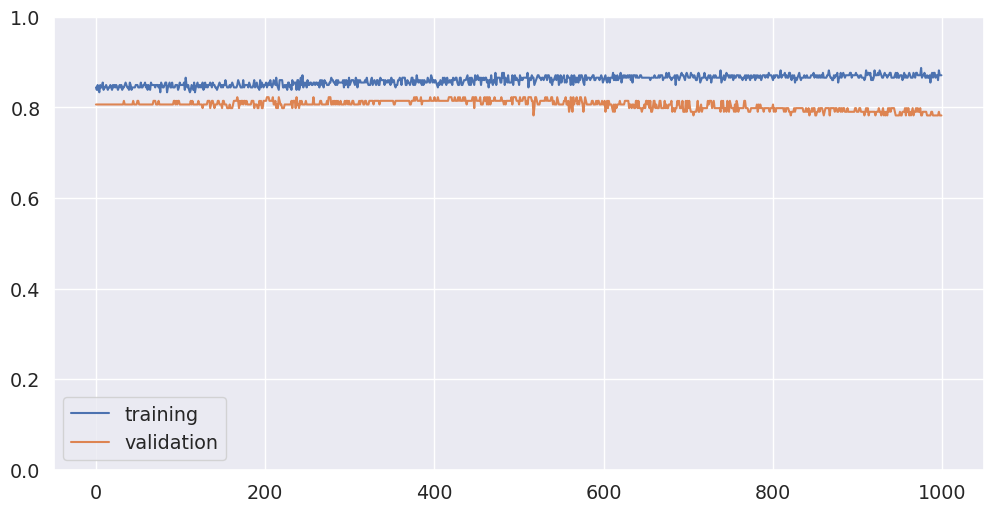

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 41.9540 - accuracy: 0.3125

186/186 [==============================] - 0s 597us/step - loss: 43.3389 - accuracy: 0.2957 - val_loss: 38.0348 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 43.3353 - accuracy: 0.2812

186/186 [==============================] - 0s 51us/step - loss: 41.6415 - accuracy: 0.2957 - val_loss: 36.9294 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 38.5848 - accuracy: 0.3125

186/186 [==============================] - 0s 53us/step - loss: 40.3732 - accuracy: 0.2957 - val_loss: 35.9621 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 45.5783 - accuracy: 0.2188

186/186 [==============================] - 0s 56us/step - loss: 39.2323 - accuracy: 0.2957 - val_loss: 35.0693 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 36.4971 - accuracy: 0.3125



186/186 [==============================] - 0s 55us/step - loss: 38.1501 - accuracy: 0.2957 - val_loss: 34.1983 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 33.7737 - accuracy: 0.3438

186/186 [==============================] - 0s 52us/step - loss: 37.1196 - accuracy: 0.2957 - val_loss: 33.3876 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 33.3901 - accuracy: 0.3438

186/186 [==============================] - 0s 53us/step - loss: 36.1531 - accuracy: 0.2957 - val_loss: 32.6056 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 29.3085 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 35.2418 - accuracy: 0.2957 - val_loss: 31.8652 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 37.5426 - accuracy: 0.2188

186/186 [==============================] - 0s 49us/step - loss: 34.3788 - accuracy: 0.2957 - val_loss: 31.1795 - val_accuracy: 0.3629


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 32.8451 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 33.5539 - accuracy: 0.2957 - val_loss: 30.4630 - val_accuracy: 0.3629


/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 33.0577 - accuracy: 0.2812

186/186 [==============================] - 0s 52us/step - loss: 32.7309 - accuracy: 0.2957 - val_loss: 29.7672 - val_accuracy: 0.3629


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 27.3760 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 31.9369 - accuracy: 0.2957 - val_loss: 29.1039 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 31.8348 - accuracy: 0.3125

186/186 [==============================] - 0s 55us/step - loss: 31.1717 - accuracy: 0.2957 - val_loss: 28.4268 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 30.6328 - accuracy: 0.2812

186/186 [==============================] - 0s 53us/step - loss: 30.4183 - accuracy: 0.2957 - val_loss: 27.7735 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 26.4555 - accuracy: 0.3750

186/186 [==============================] - 0s 51us/step - loss: 29.6874 - accuracy: 0.2957 - val_loss: 27.1328 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 31.1142 - accuracy: 0.2812

186/186 [==============================] - 0s 52us/step - loss: 28.9720 - accuracy: 0.2957 - val_loss: 26.5035 - val_accuracy: 0.3629


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 30.3981 - accuracy: 0.2500

186/186 [==============================] - 0s 52us/step - loss: 28.2721 - accuracy: 0.2957 - val_loss: 25.8884 - val_accuracy: 0.3629


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 28.5340 - accuracy: 0.2812

186/186 [==============================] - 0s 50us/step - loss: 27.5938 - accuracy: 0.2957 - val_loss: 25.2812 - val_accuracy: 0.3629


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 25.0086 - accuracy: 0.3125

186/186 [==============================] - 0s 50us/step - loss: 26.9261 - accuracy: 0.2957 - val_loss: 24.6848 - val_accuracy: 0.3629


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 27.9502 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 26.2823 - accuracy: 0.2957 - val_loss: 24.1034 - val_accuracy: 0.3629


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 30.0337 - accuracy: 0.1875

186/186 [==============================] - 0s 47us/step - loss: 25.6467 - accuracy: 0.2957 - val_loss: 23.5181 - val_accuracy: 0.3629


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 25.4342 - accuracy: 0.2500



186/186 [==============================] - 0s 47us/step - loss: 25.0072 - accuracy: 0.2957 - val_loss: 22.9325 - val_accuracy: 0.3629


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 22.1844 - accuracy: 0.3750

186/186 [==============================] - 0s 51us/step - loss: 24.3682 - accuracy: 0.2957 - val_loss: 22.3315 - val_accuracy: 0.3629


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 25.5151 - accuracy: 0.2500

186/186 [==============================] - 0s 49us/step - loss: 23.7316 - accuracy: 0.2957 - val_loss: 21.7513 - val_accuracy: 0.3629


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 17.9406 - accuracy: 0.4375

186/186 [==============================] - 0s 49us/step - loss: 23.0978 - accuracy: 0.2957 - val_loss: 21.1650 - val_accuracy: 0.3629


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 23.1396 - accuracy: 0.2500

186/186 [==============================] - 0s 48us/step - loss: 22.4838 - accuracy: 0.2957 - val_loss: 20.6143 - val_accuracy: 0.3629


Epoch 27/1000


 32/186 [====>.........................] - ETA: 0s - loss: 18.8247 - accuracy: 0.4062

186/186 [==============================] - 0s 54us/step - loss: 21.8919 - accuracy: 0.2957 - val_loss: 20.0692 - val_accuracy: 0.3629


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 20.1396 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 21.3079 - accuracy: 0.2957 - val_loss: 19.5301 - val_accuracy: 0.3629


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 20.8869 - accuracy: 0.2500

186/186 [==============================] - 0s 51us/step - loss: 20.7345 - accuracy: 0.2957 - val_loss: 18.9907 - val_accuracy: 0.3629


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 18.9183 - accuracy: 0.3125

186/186 [==============================] - 0s 51us/step - loss: 20.1596 - accuracy: 0.2957 - val_loss: 18.4672 - val_accuracy: 0.3629


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 22.4411 - accuracy: 0.1875

186/186 [==============================] - 0s 54us/step - loss: 19.5972 - accuracy: 0.2957 - val_loss: 17.9397 - val_accuracy: 0.3629


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 19.7239 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 19.0424 - accuracy: 0.2957 - val_loss: 17.4460 - val_accuracy: 0.3629


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 18.1529 - accuracy: 0.2500

186/186 [==============================] - 0s 51us/step - loss: 18.5012 - accuracy: 0.2957 - val_loss: 16.9457 - val_accuracy: 0.3629


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 15.6731 - accuracy: 0.3750

186/186 [==============================] - 0s 50us/step - loss: 17.9584 - accuracy: 0.2957 - val_loss: 16.4440 - val_accuracy: 0.3629


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 17.1551 - accuracy: 0.3438

186/186 [==============================] - 0s 55us/step - loss: 17.4154 - accuracy: 0.2957 - val_loss: 15.9629 - val_accuracy: 0.3629


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 19.5749 - accuracy: 0.2500

186/186 [==============================] - 0s 60us/step - loss: 16.8813 - accuracy: 0.2957 - val_loss: 15.4738 - val_accuracy: 0.3629


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 16.0734 - accuracy: 0.3125

186/186 [==============================] - 0s 50us/step - loss: 16.3459 - accuracy: 0.2957 - val_loss: 14.9789 - val_accuracy: 0.3629


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 18.8083 - accuracy: 0.1562

186/186 [==============================] - 0s 53us/step - loss: 15.8163 - accuracy: 0.2957 - val_loss: 14.5023 - val_accuracy: 0.3629


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.7430 - accuracy: 0.3125

186/186 [==============================] - 0s 51us/step - loss: 15.2894 - accuracy: 0.2957 - val_loss: 14.0215 - val_accuracy: 0.3629


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 18.3767 - accuracy: 0.1875

186/186 [==============================] - 0s 53us/step - loss: 14.7642 - accuracy: 0.2957 - val_loss: 13.5573 - val_accuracy: 0.3629


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.1701 - accuracy: 0.2812

186/186 [==============================] - 0s 53us/step - loss: 14.2477 - accuracy: 0.2957 - val_loss: 13.1034 - val_accuracy: 0.3629


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 13.1791 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 13.7393 - accuracy: 0.2957 - val_loss: 12.6489 - val_accuracy: 0.3629


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 13.9961 - accuracy: 0.2188

186/186 [==============================] - 0s 51us/step - loss: 13.2316 - accuracy: 0.2957 - val_loss: 12.2017 - val_accuracy: 0.3629


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 15.7219 - accuracy: 0.2188

186/186 [==============================] - 0s 52us/step - loss: 12.7222 - accuracy: 0.2957 - val_loss: 11.7571 - val_accuracy: 0.3629


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.1417 - accuracy: 0.4062

186/186 [==============================] - 0s 53us/step - loss: 12.2146 - accuracy: 0.2957 - val_loss: 11.3129 - val_accuracy: 0.3629


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 13.4199 - accuracy: 0.3125

186/186 [==============================] - 0s 52us/step - loss: 11.7194 - accuracy: 0.2957 - val_loss: 10.8839 - val_accuracy: 0.3629


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.5905 - accuracy: 0.2500

186/186 [==============================] - 0s 55us/step - loss: 11.2305 - accuracy: 0.2957 - val_loss: 10.4569 - val_accuracy: 0.3629


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.4774 - accuracy: 0.2500

186/186 [==============================] - 0s 54us/step - loss: 10.7496 - accuracy: 0.2957 - val_loss: 10.0270 - val_accuracy: 0.3629


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.1579 - accuracy: 0.3438

186/186 [==============================] - 0s 56us/step - loss: 10.2652 - accuracy: 0.2957 - val_loss: 9.5940 - val_accuracy: 0.3629


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.4256 - accuracy: 0.3438

186/186 [==============================] - 0s 54us/step - loss: 9.7808 - accuracy: 0.2957 - val_loss: 9.1633 - val_accuracy: 0.3629


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.5358 - accuracy: 0.2812

186/186 [==============================] - 0s 51us/step - loss: 9.3007 - accuracy: 0.2957 - val_loss: 8.7341 - val_accuracy: 0.3629


Epoch 52/1000


 32/186 [====>.........................] - ETA: 0s - loss: 8.3482 - accuracy: 0.3438

186/186 [==============================] - 0s 62us/step - loss: 8.8257 - accuracy: 0.2957 - val_loss: 8.3093 - val_accuracy: 0.3629


Epoch 53/1000


 32/186 [====>.........................] - ETA: 0s - loss: 8.5655 - accuracy: 0.2500

186/186 [==============================] - 0s 53us/step - loss: 8.3597 - accuracy: 0.2957 - val_loss: 7.8943 - val_accuracy: 0.3629


Epoch 54/1000


 32/186 [====>.........................] - ETA: 0s - loss: 10.3968 - accuracy: 0.1875

186/186 [==============================] - 0s 52us/step - loss: 7.9035 - accuracy: 0.2957 - val_loss: 7.4916 - val_accuracy: 0.3629


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.6001 - accuracy: 0.3750

186/186 [==============================] - 0s 49us/step - loss: 7.4462 - accuracy: 0.2957 - val_loss: 7.0819 - val_accuracy: 0.3629


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.9827 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 6.9871 - accuracy: 0.2957 - val_loss: 6.6780 - val_accuracy: 0.3629


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.5204 - accuracy: 0.2500

186/186 [==============================] - 0s 50us/step - loss: 6.5375 - accuracy: 0.2957 - val_loss: 6.2837 - val_accuracy: 0.3629


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5852 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 6.1070 - accuracy: 0.2957 - val_loss: 5.9010 - val_accuracy: 0.3629


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1726 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 5.6859 - accuracy: 0.2957 - val_loss: 5.5235 - val_accuracy: 0.3629


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.0694 - accuracy: 0.3438

186/186 [==============================] - 0s 48us/step - loss: 5.2767 - accuracy: 0.2957 - val_loss: 5.1615 - val_accuracy: 0.3629


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.9913 - accuracy: 0.2500

186/186 [==============================] - 0s 51us/step - loss: 4.8905 - accuracy: 0.2957 - val_loss: 4.8214 - val_accuracy: 0.3629


Epoch 62/1000


 32/186 [====>.........................] - ETA: 0s - loss: 4.1324 - accuracy: 0.3438

186/186 [==============================] - 0s 55us/step - loss: 4.5293 - accuracy: 0.2957 - val_loss: 4.4906 - val_accuracy: 0.3629


Epoch 63/1000


 32/186 [====>.........................] - ETA: 0s - loss: 5.0138 - accuracy: 0.2188

186/186 [==============================] - 0s 54us/step - loss: 4.1913 - accuracy: 0.2957 - val_loss: 4.1764 - val_accuracy: 0.3629


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6955 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 3.8710 - accuracy: 0.2957 - val_loss: 3.8742 - val_accuracy: 0.3629


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0831 - accuracy: 0.3125

186/186 [==============================] - 0s 52us/step - loss: 3.5620 - accuracy: 0.2957 - val_loss: 3.5711 - val_accuracy: 0.3629


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.4905 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 3.2663 - accuracy: 0.2957 - val_loss: 3.2987 - val_accuracy: 0.3629


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2824 - accuracy: 0.2188

186/186 [==============================] - 0s 50us/step - loss: 2.9995 - accuracy: 0.2957 - val_loss: 3.0470 - val_accuracy: 0.3710


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8664 - accuracy: 0.2500

186/186 [==============================] - 0s 54us/step - loss: 2.7575 - accuracy: 0.3118 - val_loss: 2.8084 - val_accuracy: 0.3790


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0839 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 2.5247 - accuracy: 0.4247 - val_loss: 2.5946 - val_accuracy: 0.4032


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0835 - accuracy: 0.3750

186/186 [==============================] - 0s 55us/step - loss: 2.3150 - accuracy: 0.4462 - val_loss: 2.4076 - val_accuracy: 0.4355


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.3193 - accuracy: 0.4688

186/186 [==============================] - 0s 50us/step - loss: 2.1262 - accuracy: 0.4731 - val_loss: 2.2341 - val_accuracy: 0.4194


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9543 - accuracy: 0.5000

186/186 [==============================] - 0s 55us/step - loss: 1.9503 - accuracy: 0.4785 - val_loss: 2.0765 - val_accuracy: 0.4758


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1940 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 1.7862 - accuracy: 0.4946 - val_loss: 1.9353 - val_accuracy: 0.4839


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5331 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 1.6326 - accuracy: 0.5000 - val_loss: 1.8095 - val_accuracy: 0.4919


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5611 - accuracy: 0.4688

186/186 [==============================] - 0s 53us/step - loss: 1.4998 - accuracy: 0.5269 - val_loss: 1.6980 - val_accuracy: 0.4758


Epoch 76/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.4474 - accuracy: 0.5625

186/186 [==============================] - 0s 61us/step - loss: 1.3824 - accuracy: 0.5538 - val_loss: 1.5959 - val_accuracy: 0.4758


Epoch 77/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.7093 - accuracy: 0.4688

186/186 [==============================] - 0s 56us/step - loss: 1.2811 - accuracy: 0.5699 - val_loss: 1.4986 - val_accuracy: 0.4919


Epoch 78/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.1650 - accuracy: 0.5938



186/186 [==============================] - 0s 56us/step - loss: 1.1923 - accuracy: 0.5860 - val_loss: 1.4170 - val_accuracy: 0.5161


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1001 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 1.1222 - accuracy: 0.5914 - val_loss: 1.3455 - val_accuracy: 0.5000


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8334 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 1.0593 - accuracy: 0.5860 - val_loss: 1.2738 - val_accuracy: 0.5000


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1394 - accuracy: 0.4688



186/186 [==============================] - 0s 51us/step - loss: 1.0056 - accuracy: 0.6183 - val_loss: 1.2108 - val_accuracy: 0.5000


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9135 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.9567 - accuracy: 0.6290 - val_loss: 1.1519 - val_accuracy: 0.4919


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7733 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.9161 - accuracy: 0.6398 - val_loss: 1.1044 - val_accuracy: 0.5081


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8217 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 0.8838 - accuracy: 0.6505 - val_loss: 1.0642 - val_accuracy: 0.5161


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0184 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.8541 - accuracy: 0.6559 - val_loss: 1.0250 - val_accuracy: 0.5161


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5489 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.8253 - accuracy: 0.6505 - val_loss: 0.9920 - val_accuracy: 0.5323


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7672 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.8012 - accuracy: 0.6667 - val_loss: 0.9645 - val_accuracy: 0.5565


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6814 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7810 - accuracy: 0.6774 - val_loss: 0.9397 - val_accuracy: 0.5403


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7267 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.7629 - accuracy: 0.6774 - val_loss: 0.9184 - val_accuracy: 0.5403


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6372 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.7478 - accuracy: 0.6774 - val_loss: 0.8976 - val_accuracy: 0.5645


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5980 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.7339 - accuracy: 0.6667 - val_loss: 0.8813 - val_accuracy: 0.5645


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7716 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.7224 - accuracy: 0.6720 - val_loss: 0.8672 - val_accuracy: 0.5726


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6005 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.7131 - accuracy: 0.6774 - val_loss: 0.8556 - val_accuracy: 0.5887


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8700 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.7039 - accuracy: 0.6935 - val_loss: 0.8444 - val_accuracy: 0.5887


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7401 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6973 - accuracy: 0.6935 - val_loss: 0.8357 - val_accuracy: 0.6129


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6739 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6910 - accuracy: 0.6882 - val_loss: 0.8322 - val_accuracy: 0.6129


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6961 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6871 - accuracy: 0.6882 - val_loss: 0.8253 - val_accuracy: 0.6129


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7396 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.6824 - accuracy: 0.6882 - val_loss: 0.8204 - val_accuracy: 0.6129


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6782 - accuracy: 0.6882 - val_loss: 0.8156 - val_accuracy: 0.6129


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6744 - accuracy: 0.6882 - val_loss: 0.8121 - val_accuracy: 0.6129


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6775 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6701 - accuracy: 0.6882 - val_loss: 0.8074 - val_accuracy: 0.6210


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6280 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6656 - accuracy: 0.6882 - val_loss: 0.8013 - val_accuracy: 0.6210


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8545 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6613 - accuracy: 0.6882 - val_loss: 0.7955 - val_accuracy: 0.6210


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7195 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.6570 - accuracy: 0.6882 - val_loss: 0.7904 - val_accuracy: 0.6210


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7384 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6537 - accuracy: 0.6882 - val_loss: 0.7868 - val_accuracy: 0.6210


Epoch 106/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5483 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6502 - accuracy: 0.6882 - val_loss: 0.7820 - val_accuracy: 0.6210


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.6467 - accuracy: 0.6935 - val_loss: 0.7775 - val_accuracy: 0.6210


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5591 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6439 - accuracy: 0.6989 - val_loss: 0.7737 - val_accuracy: 0.6210


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6439 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6416 - accuracy: 0.6989 - val_loss: 0.7711 - val_accuracy: 0.6129


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6404 - accuracy: 0.6989 - val_loss: 0.7689 - val_accuracy: 0.6129


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6094 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6395 - accuracy: 0.6989 - val_loss: 0.7684 - val_accuracy: 0.6129


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7128 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6377 - accuracy: 0.6989 - val_loss: 0.7674 - val_accuracy: 0.6129


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6244 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6364 - accuracy: 0.6989 - val_loss: 0.7663 - val_accuracy: 0.6129


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7565 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6354 - accuracy: 0.6989 - val_loss: 0.7662 - val_accuracy: 0.6210


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6347 - accuracy: 0.6989 - val_loss: 0.7654 - val_accuracy: 0.6210


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5271 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6334 - accuracy: 0.6989 - val_loss: 0.7653 - val_accuracy: 0.6210


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5864 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6328 - accuracy: 0.6989 - val_loss: 0.7646 - val_accuracy: 0.6210


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6628 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6314 - accuracy: 0.6989 - val_loss: 0.7640 - val_accuracy: 0.6210


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5740 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6307 - accuracy: 0.6989 - val_loss: 0.7635 - val_accuracy: 0.6210


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6295 - accuracy: 0.6989 - val_loss: 0.7627 - val_accuracy: 0.6210


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6287 - accuracy: 0.6989 - val_loss: 0.7616 - val_accuracy: 0.6210


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6090 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6276 - accuracy: 0.6989 - val_loss: 0.7608 - val_accuracy: 0.6210


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6263 - accuracy: 0.6989 - val_loss: 0.7600 - val_accuracy: 0.6210


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6096 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6255 - accuracy: 0.6989 - val_loss: 0.7595 - val_accuracy: 0.6210


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5219 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6249 - accuracy: 0.6989 - val_loss: 0.7587 - val_accuracy: 0.6210


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.6236 - accuracy: 0.6989 - val_loss: 0.7582 - val_accuracy: 0.6210


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6310 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6224 - accuracy: 0.6989 - val_loss: 0.7575 - val_accuracy: 0.6210


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7279 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.6217 - accuracy: 0.6989 - val_loss: 0.7565 - val_accuracy: 0.6210


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6473 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6211 - accuracy: 0.6989 - val_loss: 0.7566 - val_accuracy: 0.6210


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5854 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6206 - accuracy: 0.6989 - val_loss: 0.7574 - val_accuracy: 0.6210


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6195 - accuracy: 0.6989 - val_loss: 0.7578 - val_accuracy: 0.6210


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6184 - accuracy: 0.6989 - val_loss: 0.7577 - val_accuracy: 0.6210


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6182 - accuracy: 0.6989 - val_loss: 0.7577 - val_accuracy: 0.6210


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6170 - accuracy: 0.6989 - val_loss: 0.7584 - val_accuracy: 0.6210


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5977 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6162 - accuracy: 0.6989 - val_loss: 0.7578 - val_accuracy: 0.6210


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6149 - accuracy: 0.6989 - val_loss: 0.7586 - val_accuracy: 0.6210


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.6132 - accuracy: 0.6989 - val_loss: 0.7598 - val_accuracy: 0.6210


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5541 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6112 - accuracy: 0.6989 - val_loss: 0.7686 - val_accuracy: 0.6210


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6238 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6095 - accuracy: 0.7043 - val_loss: 0.7736 - val_accuracy: 0.6129


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5654 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6071 - accuracy: 0.7043 - val_loss: 0.7793 - val_accuracy: 0.6048


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5954 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6058 - accuracy: 0.7097 - val_loss: 0.7809 - val_accuracy: 0.6048


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5957 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6044 - accuracy: 0.7097 - val_loss: 0.7863 - val_accuracy: 0.6048


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6041 - accuracy: 0.7097 - val_loss: 0.7900 - val_accuracy: 0.6048


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6027 - accuracy: 0.7097 - val_loss: 0.7923 - val_accuracy: 0.6048


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4777 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6015 - accuracy: 0.7097 - val_loss: 0.7934 - val_accuracy: 0.6048


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6005 - accuracy: 0.7097 - val_loss: 0.7973 - val_accuracy: 0.6048


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6412 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5998 - accuracy: 0.7097 - val_loss: 0.8012 - val_accuracy: 0.6048


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.5989 - accuracy: 0.7097 - val_loss: 0.8039 - val_accuracy: 0.6048


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.5981 - accuracy: 0.7097 - val_loss: 0.8087 - val_accuracy: 0.6048


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5968 - accuracy: 0.7097 - val_loss: 0.8114 - val_accuracy: 0.6048


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5943 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5962 - accuracy: 0.7097 - val_loss: 0.8148 - val_accuracy: 0.6048


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5739 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5953 - accuracy: 0.7043 - val_loss: 0.8172 - val_accuracy: 0.5968


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7286 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.5946 - accuracy: 0.7043 - val_loss: 0.8196 - val_accuracy: 0.5968


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6122 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5939 - accuracy: 0.7097 - val_loss: 0.8237 - val_accuracy: 0.5968


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5930 - accuracy: 0.7097 - val_loss: 0.8268 - val_accuracy: 0.5968


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6165 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5922 - accuracy: 0.7097 - val_loss: 0.8240 - val_accuracy: 0.6048


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5915 - accuracy: 0.7097 - val_loss: 0.8271 - val_accuracy: 0.6048


Epoch 158/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5577 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5905 - accuracy: 0.7097 - val_loss: 0.8300 - val_accuracy: 0.6048


Epoch 159/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5849 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5899 - accuracy: 0.7097 - val_loss: 0.8319 - val_accuracy: 0.6048


Epoch 160/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5893 - accuracy: 0.7097 - val_loss: 0.8354 - val_accuracy: 0.5968


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5884 - accuracy: 0.7097 - val_loss: 0.8435 - val_accuracy: 0.5968


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4670 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.5871 - accuracy: 0.7097 - val_loss: 0.8452 - val_accuracy: 0.5968


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5487 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5861 - accuracy: 0.7097 - val_loss: 0.8484 - val_accuracy: 0.5968


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7859 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 0.5854 - accuracy: 0.7097 - val_loss: 0.8444 - val_accuracy: 0.5968


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6559 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5846 - accuracy: 0.7097 - val_loss: 0.8459 - val_accuracy: 0.5968


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5741 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.5840 - accuracy: 0.7097 - val_loss: 0.8475 - val_accuracy: 0.5968


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5482 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5836 - accuracy: 0.7097 - val_loss: 0.8440 - val_accuracy: 0.5968


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6940 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5829 - accuracy: 0.7097 - val_loss: 0.8396 - val_accuracy: 0.5968


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5684 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5819 - accuracy: 0.7151 - val_loss: 0.8411 - val_accuracy: 0.5968


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5589 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5812 - accuracy: 0.7097 - val_loss: 0.8380 - val_accuracy: 0.5968


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5808 - accuracy: 0.7097 - val_loss: 0.8395 - val_accuracy: 0.5968


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5648 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5797 - accuracy: 0.7151 - val_loss: 0.8419 - val_accuracy: 0.5968


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5647 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5790 - accuracy: 0.7151 - val_loss: 0.8432 - val_accuracy: 0.5968


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5785 - accuracy: 0.7097 - val_loss: 0.8403 - val_accuracy: 0.5968


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5777 - accuracy: 0.7097 - val_loss: 0.8368 - val_accuracy: 0.5968


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6171 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5766 - accuracy: 0.7151 - val_loss: 0.8397 - val_accuracy: 0.5968


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5763 - accuracy: 0.7097 - val_loss: 0.8371 - val_accuracy: 0.5968


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5739 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5752 - accuracy: 0.7151 - val_loss: 0.8341 - val_accuracy: 0.6048


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6095 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5746 - accuracy: 0.7151 - val_loss: 0.8307 - val_accuracy: 0.6048


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5738 - accuracy: 0.7151 - val_loss: 0.8324 - val_accuracy: 0.6048


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5729 - accuracy: 0.7151 - val_loss: 0.8345 - val_accuracy: 0.6048


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7293 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.5725 - accuracy: 0.7151 - val_loss: 0.8309 - val_accuracy: 0.6048


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5713 - accuracy: 0.7151 - val_loss: 0.8326 - val_accuracy: 0.6048


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5512 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5714 - accuracy: 0.7151 - val_loss: 0.8294 - val_accuracy: 0.6048


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5702 - accuracy: 0.7151 - val_loss: 0.8285 - val_accuracy: 0.6048


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5694 - accuracy: 0.7151 - val_loss: 0.8262 - val_accuracy: 0.6048


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5149 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5686 - accuracy: 0.7151 - val_loss: 0.8237 - val_accuracy: 0.6048


Epoch 188/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5682 - accuracy: 0.7151 - val_loss: 0.8258 - val_accuracy: 0.6048


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5674 - accuracy: 0.7151 - val_loss: 0.8293 - val_accuracy: 0.6048


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5093 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5663 - accuracy: 0.7151 - val_loss: 0.8264 - val_accuracy: 0.6048


Epoch 191/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5476 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5656 - accuracy: 0.7151 - val_loss: 0.8298 - val_accuracy: 0.6048


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4789 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5650 - accuracy: 0.7151 - val_loss: 0.8274 - val_accuracy: 0.6048


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6083 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5641 - accuracy: 0.7151 - val_loss: 0.8262 - val_accuracy: 0.6048


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5633 - accuracy: 0.7151 - val_loss: 0.8287 - val_accuracy: 0.6048


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5799 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5625 - accuracy: 0.7151 - val_loss: 0.8258 - val_accuracy: 0.6048


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5621 - accuracy: 0.7151 - val_loss: 0.8247 - val_accuracy: 0.6048


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5739 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5609 - accuracy: 0.7151 - val_loss: 0.8227 - val_accuracy: 0.6048


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4801 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5604 - accuracy: 0.7151 - val_loss: 0.8214 - val_accuracy: 0.6048


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4927 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5592 - accuracy: 0.7151 - val_loss: 0.8233 - val_accuracy: 0.6048


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5587 - accuracy: 0.7151 - val_loss: 0.8216 - val_accuracy: 0.6048


Epoch 201/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5577 - accuracy: 0.7151 - val_loss: 0.8201 - val_accuracy: 0.6048


Epoch 202/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5736 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5570 - accuracy: 0.7151 - val_loss: 0.8198 - val_accuracy: 0.6048


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5128 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.5562 - accuracy: 0.7151 - val_loss: 0.8183 - val_accuracy: 0.6048


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.5555 - accuracy: 0.7151 - val_loss: 0.8200 - val_accuracy: 0.6048


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5545 - accuracy: 0.7151 - val_loss: 0.8197 - val_accuracy: 0.6048


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5540 - accuracy: 0.7151 - val_loss: 0.8191 - val_accuracy: 0.6048


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5746 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5528 - accuracy: 0.7151 - val_loss: 0.8222 - val_accuracy: 0.6048


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5527 - accuracy: 0.7151 - val_loss: 0.8201 - val_accuracy: 0.6048


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5511 - accuracy: 0.7151 - val_loss: 0.8182 - val_accuracy: 0.6048


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.5506 - accuracy: 0.7151 - val_loss: 0.8168 - val_accuracy: 0.6048


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5493 - accuracy: 0.7151 - val_loss: 0.8129 - val_accuracy: 0.6048


Epoch 212/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6635 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.5490 - accuracy: 0.7151 - val_loss: 0.8120 - val_accuracy: 0.6048


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6473 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5480 - accuracy: 0.7151 - val_loss: 0.8107 - val_accuracy: 0.6048


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6289 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5468 - accuracy: 0.7151 - val_loss: 0.8124 - val_accuracy: 0.6048


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5460 - accuracy: 0.7151 - val_loss: 0.8117 - val_accuracy: 0.6048


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5447 - accuracy: 0.7151 - val_loss: 0.8220 - val_accuracy: 0.5968


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5442 - accuracy: 0.7151 - val_loss: 0.8214 - val_accuracy: 0.5968


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4514 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5433 - accuracy: 0.7097 - val_loss: 0.8190 - val_accuracy: 0.5968


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5428 - accuracy: 0.7151 - val_loss: 0.8180 - val_accuracy: 0.5968


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5639 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5412 - accuracy: 0.7151 - val_loss: 0.8163 - val_accuracy: 0.5968


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5175 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5406 - accuracy: 0.7151 - val_loss: 0.8143 - val_accuracy: 0.5968


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5398 - accuracy: 0.7151 - val_loss: 0.8170 - val_accuracy: 0.5968


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5861 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.5391 - accuracy: 0.7097 - val_loss: 0.8143 - val_accuracy: 0.5968


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5383 - accuracy: 0.7097 - val_loss: 0.8122 - val_accuracy: 0.5968


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5375 - accuracy: 0.7151 - val_loss: 0.8093 - val_accuracy: 0.5968


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5368 - accuracy: 0.7151 - val_loss: 0.8122 - val_accuracy: 0.5968


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.5353 - accuracy: 0.7151 - val_loss: 0.8089 - val_accuracy: 0.5968


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5349 - accuracy: 0.7204 - val_loss: 0.8079 - val_accuracy: 0.5968


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5334 - accuracy: 0.7204 - val_loss: 0.8085 - val_accuracy: 0.5968


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7171 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 0.5327 - accuracy: 0.7204 - val_loss: 0.8070 - val_accuracy: 0.5968


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5316 - accuracy: 0.7204 - val_loss: 0.8036 - val_accuracy: 0.5968


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5308 - accuracy: 0.7204 - val_loss: 0.8035 - val_accuracy: 0.5968


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5300 - accuracy: 0.7204 - val_loss: 0.8065 - val_accuracy: 0.5968


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5295 - accuracy: 0.7204 - val_loss: 0.8036 - val_accuracy: 0.5968


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5287 - accuracy: 0.7204 - val_loss: 0.7999 - val_accuracy: 0.5968


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5281 - accuracy: 0.7204 - val_loss: 0.8053 - val_accuracy: 0.5968


Epoch 237/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5078 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5275 - accuracy: 0.7204 - val_loss: 0.8035 - val_accuracy: 0.5968


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5268 - accuracy: 0.7204 - val_loss: 0.8012 - val_accuracy: 0.5968


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5259 - accuracy: 0.7204 - val_loss: 0.8005 - val_accuracy: 0.5968


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4774 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5250 - accuracy: 0.7204 - val_loss: 0.8028 - val_accuracy: 0.5968


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5248 - accuracy: 0.7204 - val_loss: 0.7969 - val_accuracy: 0.5968


Epoch 242/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5239 - accuracy: 0.7204 - val_loss: 0.7964 - val_accuracy: 0.5968


Epoch 243/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5426 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5230 - accuracy: 0.7204 - val_loss: 0.7981 - val_accuracy: 0.5887


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5226 - accuracy: 0.7204 - val_loss: 0.7952 - val_accuracy: 0.5887


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5544 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5220 - accuracy: 0.7204 - val_loss: 0.7900 - val_accuracy: 0.6048


Epoch 246/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5584 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5210 - accuracy: 0.7204 - val_loss: 0.7882 - val_accuracy: 0.6048


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4520 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5201 - accuracy: 0.7204 - val_loss: 0.7954 - val_accuracy: 0.5887


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5632 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5196 - accuracy: 0.7204 - val_loss: 0.7922 - val_accuracy: 0.5887


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5187 - accuracy: 0.7204 - val_loss: 0.7942 - val_accuracy: 0.5887


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.5181 - accuracy: 0.7204 - val_loss: 0.7874 - val_accuracy: 0.5968


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5175 - accuracy: 0.7204 - val_loss: 0.7880 - val_accuracy: 0.5887


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5167 - accuracy: 0.7204 - val_loss: 0.7863 - val_accuracy: 0.5968


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6089 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.5159 - accuracy: 0.7204 - val_loss: 0.7874 - val_accuracy: 0.5887


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5341 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5151 - accuracy: 0.7204 - val_loss: 0.7860 - val_accuracy: 0.5968


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5145 - accuracy: 0.7204 - val_loss: 0.7836 - val_accuracy: 0.5968


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5138 - accuracy: 0.7204 - val_loss: 0.7855 - val_accuracy: 0.5887


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5128 - accuracy: 0.7204 - val_loss: 0.7850 - val_accuracy: 0.5887


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4796 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5124 - accuracy: 0.7204 - val_loss: 0.7856 - val_accuracy: 0.5968


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3993 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5112 - accuracy: 0.7204 - val_loss: 0.7834 - val_accuracy: 0.5887


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5107 - accuracy: 0.7204 - val_loss: 0.7895 - val_accuracy: 0.5806


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5104 - accuracy: 0.7204 - val_loss: 0.7839 - val_accuracy: 0.5887


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5090 - accuracy: 0.7204 - val_loss: 0.7860 - val_accuracy: 0.5806


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5085 - accuracy: 0.7204 - val_loss: 0.7823 - val_accuracy: 0.5806


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5079 - accuracy: 0.7151 - val_loss: 0.7808 - val_accuracy: 0.5887


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6004 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5069 - accuracy: 0.7204 - val_loss: 0.7852 - val_accuracy: 0.5806


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4938 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5060 - accuracy: 0.7204 - val_loss: 0.7834 - val_accuracy: 0.5806


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4787 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5054 - accuracy: 0.7204 - val_loss: 0.7844 - val_accuracy: 0.5806


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.6875



186/186 [==============================] - 0s 50us/step - loss: 0.5044 - accuracy: 0.7151 - val_loss: 0.7818 - val_accuracy: 0.5887


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5121 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5036 - accuracy: 0.7204 - val_loss: 0.7831 - val_accuracy: 0.5806


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5019 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5032 - accuracy: 0.7151 - val_loss: 0.7870 - val_accuracy: 0.5806


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5021 - accuracy: 0.7151 - val_loss: 0.7845 - val_accuracy: 0.5806


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.5013 - accuracy: 0.7151 - val_loss: 0.7874 - val_accuracy: 0.5806


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4669 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4996 - accuracy: 0.7204 - val_loss: 0.7854 - val_accuracy: 0.5806


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4988 - accuracy: 0.7204 - val_loss: 0.7908 - val_accuracy: 0.5806


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4977 - accuracy: 0.7204 - val_loss: 0.7918 - val_accuracy: 0.5806


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4567 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4970 - accuracy: 0.7204 - val_loss: 0.7938 - val_accuracy: 0.5806


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.4958 - accuracy: 0.7258 - val_loss: 0.7964 - val_accuracy: 0.5726


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4950 - accuracy: 0.7258 - val_loss: 0.7970 - val_accuracy: 0.5645


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4938 - accuracy: 0.7258 - val_loss: 0.7976 - val_accuracy: 0.5565


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5975 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.4921 - accuracy: 0.7258 - val_loss: 0.7953 - val_accuracy: 0.5565


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4895 - accuracy: 0.7258 - val_loss: 0.7966 - val_accuracy: 0.5887


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4826 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4872 - accuracy: 0.7312 - val_loss: 0.7949 - val_accuracy: 0.5645


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4850 - accuracy: 0.7312 - val_loss: 0.7914 - val_accuracy: 0.5565


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4609 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4825 - accuracy: 0.7366 - val_loss: 0.7878 - val_accuracy: 0.5726


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4879 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4796 - accuracy: 0.7366 - val_loss: 0.7876 - val_accuracy: 0.6048


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4684 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4746 - accuracy: 0.7473 - val_loss: 0.7845 - val_accuracy: 0.6452


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4911 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4682 - accuracy: 0.7527 - val_loss: 0.7776 - val_accuracy: 0.6129


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4629 - accuracy: 0.7634 - val_loss: 0.7714 - val_accuracy: 0.6290


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4862 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4587 - accuracy: 0.7473 - val_loss: 0.7672 - val_accuracy: 0.6290


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4561 - accuracy: 0.7473 - val_loss: 0.7637 - val_accuracy: 0.6210


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4542 - accuracy: 0.7527 - val_loss: 0.7611 - val_accuracy: 0.6290


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4513 - accuracy: 0.7634 - val_loss: 0.7590 - val_accuracy: 0.6371


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4481 - accuracy: 0.7688 - val_loss: 0.7551 - val_accuracy: 0.6210


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5154 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4458 - accuracy: 0.7634 - val_loss: 0.7505 - val_accuracy: 0.6290


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4837 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4429 - accuracy: 0.7742 - val_loss: 0.7459 - val_accuracy: 0.6371


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4404 - accuracy: 0.7742 - val_loss: 0.7415 - val_accuracy: 0.6290


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4244 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4406 - accuracy: 0.7634 - val_loss: 0.7376 - val_accuracy: 0.6290


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4364 - accuracy: 0.7742 - val_loss: 0.7340 - val_accuracy: 0.6371


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.4351 - accuracy: 0.7634 - val_loss: 0.7311 - val_accuracy: 0.6452


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4943 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4339 - accuracy: 0.7742 - val_loss: 0.7259 - val_accuracy: 0.6452


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4777 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4320 - accuracy: 0.7688 - val_loss: 0.7216 - val_accuracy: 0.6452


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4304 - accuracy: 0.7742 - val_loss: 0.7176 - val_accuracy: 0.6452


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4288 - accuracy: 0.7688 - val_loss: 0.7162 - val_accuracy: 0.6613


Epoch 304/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4267 - accuracy: 0.7688 - val_loss: 0.7137 - val_accuracy: 0.6613


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4259 - accuracy: 0.7688 - val_loss: 0.7116 - val_accuracy: 0.6613


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5688 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.4245 - accuracy: 0.7634 - val_loss: 0.7130 - val_accuracy: 0.6613


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4226 - accuracy: 0.7688 - val_loss: 0.7107 - val_accuracy: 0.6613


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4209 - accuracy: 0.7634 - val_loss: 0.7119 - val_accuracy: 0.6613


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4211 - accuracy: 0.7849 - val_loss: 0.7086 - val_accuracy: 0.6613


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5776 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.4188 - accuracy: 0.7688 - val_loss: 0.7098 - val_accuracy: 0.6613


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4176 - accuracy: 0.7796 - val_loss: 0.7074 - val_accuracy: 0.6613


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4170 - accuracy: 0.7796 - val_loss: 0.7038 - val_accuracy: 0.6613


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4152 - accuracy: 0.7796 - val_loss: 0.7042 - val_accuracy: 0.6613


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4146 - accuracy: 0.7849 - val_loss: 0.7041 - val_accuracy: 0.6613


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4130 - accuracy: 0.7957 - val_loss: 0.7017 - val_accuracy: 0.6613


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4120 - accuracy: 0.7742 - val_loss: 0.7024 - val_accuracy: 0.6613


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4114 - accuracy: 0.8065 - val_loss: 0.6998 - val_accuracy: 0.6613


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4104 - accuracy: 0.8011 - val_loss: 0.7009 - val_accuracy: 0.6613


Epoch 319/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4087 - accuracy: 0.7957 - val_loss: 0.7012 - val_accuracy: 0.6613


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5309 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.4097 - accuracy: 0.7796 - val_loss: 0.6998 - val_accuracy: 0.6613


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4911 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4073 - accuracy: 0.8065 - val_loss: 0.6967 - val_accuracy: 0.6613


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.4066 - accuracy: 0.7849 - val_loss: 0.6980 - val_accuracy: 0.6613


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4062 - accuracy: 0.8011 - val_loss: 0.6986 - val_accuracy: 0.6613


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4053 - accuracy: 0.7957 - val_loss: 0.6951 - val_accuracy: 0.6613


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4039 - accuracy: 0.8011 - val_loss: 0.6962 - val_accuracy: 0.6613


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4059 - accuracy: 0.8011 - val_loss: 0.6947 - val_accuracy: 0.6613


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4025 - accuracy: 0.7957 - val_loss: 0.6969 - val_accuracy: 0.6694


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4024 - accuracy: 0.7903 - val_loss: 0.6984 - val_accuracy: 0.6694


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4015 - accuracy: 0.8172 - val_loss: 0.6962 - val_accuracy: 0.6694


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4008 - accuracy: 0.8065 - val_loss: 0.6932 - val_accuracy: 0.6694


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4001 - accuracy: 0.8065 - val_loss: 0.6943 - val_accuracy: 0.6694


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3989 - accuracy: 0.8065 - val_loss: 0.6914 - val_accuracy: 0.6694


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3993 - accuracy: 0.8011 - val_loss: 0.6922 - val_accuracy: 0.6694


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3979 - accuracy: 0.8011 - val_loss: 0.6895 - val_accuracy: 0.6694


Epoch 335/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3971 - accuracy: 0.8011 - val_loss: 0.6923 - val_accuracy: 0.6694


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3978 - accuracy: 0.8011 - val_loss: 0.6900 - val_accuracy: 0.6694


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3961 - accuracy: 0.8011 - val_loss: 0.6906 - val_accuracy: 0.6694


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4439 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3951 - accuracy: 0.8011 - val_loss: 0.6888 - val_accuracy: 0.6694


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3941 - accuracy: 0.8011 - val_loss: 0.6908 - val_accuracy: 0.6694


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3959 - accuracy: 0.8011 - val_loss: 0.6881 - val_accuracy: 0.6694


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.3926 - accuracy: 0.8065 - val_loss: 0.6853 - val_accuracy: 0.6694


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3928 - accuracy: 0.8118 - val_loss: 0.6859 - val_accuracy: 0.6694


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3915 - accuracy: 0.8065 - val_loss: 0.6857 - val_accuracy: 0.6694


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5125 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3925 - accuracy: 0.8065 - val_loss: 0.6833 - val_accuracy: 0.6694


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3906 - accuracy: 0.8011 - val_loss: 0.6848 - val_accuracy: 0.6694


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5060 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3899 - accuracy: 0.8172 - val_loss: 0.6817 - val_accuracy: 0.6694


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3893 - accuracy: 0.8011 - val_loss: 0.6821 - val_accuracy: 0.6694


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3885 - accuracy: 0.8011 - val_loss: 0.6815 - val_accuracy: 0.6694


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3887 - accuracy: 0.8172 - val_loss: 0.6773 - val_accuracy: 0.6694


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3873 - accuracy: 0.8065 - val_loss: 0.6787 - val_accuracy: 0.6694


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6121 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.3871 - accuracy: 0.8118 - val_loss: 0.6791 - val_accuracy: 0.6694


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3861 - accuracy: 0.8118 - val_loss: 0.6811 - val_accuracy: 0.6694


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3867 - accuracy: 0.8118 - val_loss: 0.6792 - val_accuracy: 0.6694


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4459 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3865 - accuracy: 0.8065 - val_loss: 0.6780 - val_accuracy: 0.6694


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3838 - accuracy: 0.8118 - val_loss: 0.6787 - val_accuracy: 0.6694


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3847 - accuracy: 0.8172 - val_loss: 0.6757 - val_accuracy: 0.6694


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4568 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3832 - accuracy: 0.8118 - val_loss: 0.6782 - val_accuracy: 0.6694


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3823 - accuracy: 0.8172 - val_loss: 0.6748 - val_accuracy: 0.6694


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3819 - accuracy: 0.8118 - val_loss: 0.6766 - val_accuracy: 0.6694


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3824 - accuracy: 0.8011 - val_loss: 0.6721 - val_accuracy: 0.6694


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3811 - accuracy: 0.8118 - val_loss: 0.6746 - val_accuracy: 0.6694


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3905 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3807 - accuracy: 0.8118 - val_loss: 0.6714 - val_accuracy: 0.6694


Epoch 363/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3792 - accuracy: 0.8065 - val_loss: 0.6722 - val_accuracy: 0.6694


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3796 - accuracy: 0.8118 - val_loss: 0.6738 - val_accuracy: 0.6694


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4238 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3810 - accuracy: 0.8065 - val_loss: 0.6712 - val_accuracy: 0.6694


Epoch 366/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3786 - accuracy: 0.8118 - val_loss: 0.6673 - val_accuracy: 0.6694


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3781 - accuracy: 0.8118 - val_loss: 0.6701 - val_accuracy: 0.6694


Epoch 368/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5140 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3773 - accuracy: 0.8118 - val_loss: 0.6674 - val_accuracy: 0.6694


Epoch 369/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3763 - accuracy: 0.8172 - val_loss: 0.6697 - val_accuracy: 0.6694


Epoch 370/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3763 - accuracy: 0.8118 - val_loss: 0.6649 - val_accuracy: 0.6694


Epoch 371/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3763 - accuracy: 0.8172 - val_loss: 0.6673 - val_accuracy: 0.6694


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3763 - accuracy: 0.8011 - val_loss: 0.6702 - val_accuracy: 0.6694


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3752 - accuracy: 0.8065 - val_loss: 0.6666 - val_accuracy: 0.6694


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3752 - accuracy: 0.8065 - val_loss: 0.6643 - val_accuracy: 0.6694


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3734 - accuracy: 0.8065 - val_loss: 0.6662 - val_accuracy: 0.6694


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3734 - accuracy: 0.8065 - val_loss: 0.6628 - val_accuracy: 0.6694


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3732 - accuracy: 0.8065 - val_loss: 0.6659 - val_accuracy: 0.6774


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3724 - accuracy: 0.8118 - val_loss: 0.6619 - val_accuracy: 0.6694


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3723 - accuracy: 0.8226 - val_loss: 0.6655 - val_accuracy: 0.6855


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3714 - accuracy: 0.8065 - val_loss: 0.6597 - val_accuracy: 0.6774


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3719 - accuracy: 0.8172 - val_loss: 0.6613 - val_accuracy: 0.6774


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4982 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3703 - accuracy: 0.8118 - val_loss: 0.6572 - val_accuracy: 0.6694


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3707 - accuracy: 0.8065 - val_loss: 0.6592 - val_accuracy: 0.6694


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3693 - accuracy: 0.8172 - val_loss: 0.6570 - val_accuracy: 0.6694


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3705 - accuracy: 0.8065 - val_loss: 0.6579 - val_accuracy: 0.6855


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3692 - accuracy: 0.8065 - val_loss: 0.6609 - val_accuracy: 0.6855


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3683 - accuracy: 0.8118 - val_loss: 0.6565 - val_accuracy: 0.6855


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3680 - accuracy: 0.8065 - val_loss: 0.6534 - val_accuracy: 0.6855


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3677 - accuracy: 0.8280 - val_loss: 0.6540 - val_accuracy: 0.6855


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2526 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3670 - accuracy: 0.8172 - val_loss: 0.6553 - val_accuracy: 0.6855


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3669 - accuracy: 0.8172 - val_loss: 0.6536 - val_accuracy: 0.6855


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3659 - accuracy: 0.8280 - val_loss: 0.6507 - val_accuracy: 0.6855


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2242 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3662 - accuracy: 0.8280 - val_loss: 0.6510 - val_accuracy: 0.6855


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3652 - accuracy: 0.8172 - val_loss: 0.6520 - val_accuracy: 0.6855


Epoch 395/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3648 - accuracy: 0.8280 - val_loss: 0.6525 - val_accuracy: 0.6855


Epoch 396/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3645 - accuracy: 0.8172 - val_loss: 0.6496 - val_accuracy: 0.6855


Epoch 397/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1976 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3635 - accuracy: 0.8226 - val_loss: 0.6481 - val_accuracy: 0.6855


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3638 - accuracy: 0.8226 - val_loss: 0.6480 - val_accuracy: 0.6855


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3639 - accuracy: 0.8172 - val_loss: 0.6455 - val_accuracy: 0.6855


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3623 - accuracy: 0.8333 - val_loss: 0.6489 - val_accuracy: 0.6855


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3629 - accuracy: 0.8280 - val_loss: 0.6453 - val_accuracy: 0.6935


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3622 - accuracy: 0.8226 - val_loss: 0.6467 - val_accuracy: 0.6935


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3607 - accuracy: 0.8226 - val_loss: 0.6488 - val_accuracy: 0.6935


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3615 - accuracy: 0.8118 - val_loss: 0.6434 - val_accuracy: 0.6855


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4427 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3628 - accuracy: 0.8172 - val_loss: 0.6448 - val_accuracy: 0.6855


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5488 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3601 - accuracy: 0.8333 - val_loss: 0.6446 - val_accuracy: 0.6855


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3613 - accuracy: 0.8226 - val_loss: 0.6414 - val_accuracy: 0.6855


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3601 - accuracy: 0.8280 - val_loss: 0.6439 - val_accuracy: 0.6855


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3595 - accuracy: 0.8280 - val_loss: 0.6453 - val_accuracy: 0.6935


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3596 - accuracy: 0.8280 - val_loss: 0.6457 - val_accuracy: 0.6935


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3596 - accuracy: 0.8280 - val_loss: 0.6430 - val_accuracy: 0.6935


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3584 - accuracy: 0.8280 - val_loss: 0.6439 - val_accuracy: 0.6855


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3585 - accuracy: 0.8333 - val_loss: 0.6435 - val_accuracy: 0.6855


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3583 - accuracy: 0.8280 - val_loss: 0.6411 - val_accuracy: 0.6855


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3574 - accuracy: 0.8333 - val_loss: 0.6426 - val_accuracy: 0.6935


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3571 - accuracy: 0.8333 - val_loss: 0.6394 - val_accuracy: 0.6935


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3570 - accuracy: 0.8333 - val_loss: 0.6396 - val_accuracy: 0.6935


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3564 - accuracy: 0.8280 - val_loss: 0.6419 - val_accuracy: 0.6935


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3568 - accuracy: 0.8118 - val_loss: 0.6367 - val_accuracy: 0.6855


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3553 - accuracy: 0.8333 - val_loss: 0.6376 - val_accuracy: 0.6935


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4836 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3571 - accuracy: 0.8172 - val_loss: 0.6388 - val_accuracy: 0.6935


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3546 - accuracy: 0.8333 - val_loss: 0.6421 - val_accuracy: 0.6935


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3546 - accuracy: 0.8333 - val_loss: 0.6370 - val_accuracy: 0.6935


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3547 - accuracy: 0.8333 - val_loss: 0.6374 - val_accuracy: 0.6935


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3538 - accuracy: 0.8333 - val_loss: 0.6394 - val_accuracy: 0.7016


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3537 - accuracy: 0.8333 - val_loss: 0.6387 - val_accuracy: 0.7016


Epoch 427/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3536 - accuracy: 0.8280 - val_loss: 0.6392 - val_accuracy: 0.7016


Epoch 428/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3938 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3530 - accuracy: 0.8172 - val_loss: 0.6332 - val_accuracy: 0.7097


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4453 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3538 - accuracy: 0.8280 - val_loss: 0.6333 - val_accuracy: 0.7097


Epoch 430/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3528 - accuracy: 0.8226 - val_loss: 0.6355 - val_accuracy: 0.7097


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3524 - accuracy: 0.8280 - val_loss: 0.6323 - val_accuracy: 0.7097


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5012 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3512 - accuracy: 0.8280 - val_loss: 0.6336 - val_accuracy: 0.7016


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3526 - accuracy: 0.8280 - val_loss: 0.6361 - val_accuracy: 0.7016


Epoch 434/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3515 - accuracy: 0.8280 - val_loss: 0.6314 - val_accuracy: 0.7097


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3505 - accuracy: 0.8280 - val_loss: 0.6309 - val_accuracy: 0.7097


Epoch 436/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3524 - accuracy: 0.8172 - val_loss: 0.6264 - val_accuracy: 0.7016


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3501 - accuracy: 0.8280 - val_loss: 0.6289 - val_accuracy: 0.7097


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3497 - accuracy: 0.8280 - val_loss: 0.6285 - val_accuracy: 0.7097


Epoch 439/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3497 - accuracy: 0.8280 - val_loss: 0.6304 - val_accuracy: 0.7097


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.6348 - val_accuracy: 0.7097


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3503 - accuracy: 0.8172 - val_loss: 0.6281 - val_accuracy: 0.7097


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3491 - accuracy: 0.8280 - val_loss: 0.6282 - val_accuracy: 0.7097


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3486 - accuracy: 0.8280 - val_loss: 0.6312 - val_accuracy: 0.7097


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3483 - accuracy: 0.8280 - val_loss: 0.6273 - val_accuracy: 0.7097


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3480 - accuracy: 0.8226 - val_loss: 0.6283 - val_accuracy: 0.7097


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3480 - accuracy: 0.8333 - val_loss: 0.6277 - val_accuracy: 0.7097


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3477 - accuracy: 0.8280 - val_loss: 0.6264 - val_accuracy: 0.7097


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3484 - accuracy: 0.8333 - val_loss: 0.6268 - val_accuracy: 0.7097


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.6256 - val_accuracy: 0.7097


Epoch 450/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3468 - accuracy: 0.8333 - val_loss: 0.6211 - val_accuracy: 0.7097


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3459 - accuracy: 0.8333 - val_loss: 0.6235 - val_accuracy: 0.7097


Epoch 452/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3470 - accuracy: 0.8333 - val_loss: 0.6250 - val_accuracy: 0.7097


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3464 - accuracy: 0.8387 - val_loss: 0.6200 - val_accuracy: 0.7097


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2338 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.6185 - val_accuracy: 0.7016


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3450 - accuracy: 0.8333 - val_loss: 0.6213 - val_accuracy: 0.7097


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3454 - accuracy: 0.8333 - val_loss: 0.6214 - val_accuracy: 0.7097


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.6185 - val_accuracy: 0.7097


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3450 - accuracy: 0.8333 - val_loss: 0.6196 - val_accuracy: 0.7097


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.6222 - val_accuracy: 0.7097


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.6199 - val_accuracy: 0.7097


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.6188 - val_accuracy: 0.7097


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3436 - accuracy: 0.8333 - val_loss: 0.6142 - val_accuracy: 0.7177


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5033 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.6147 - val_accuracy: 0.7097


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3426 - accuracy: 0.8441 - val_loss: 0.6183 - val_accuracy: 0.7097


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3430 - accuracy: 0.8387 - val_loss: 0.6173 - val_accuracy: 0.7097


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3430 - accuracy: 0.8333 - val_loss: 0.6157 - val_accuracy: 0.7177


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3422 - accuracy: 0.8387 - val_loss: 0.6182 - val_accuracy: 0.7177


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3424 - accuracy: 0.8495 - val_loss: 0.6126 - val_accuracy: 0.7177


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3414 - accuracy: 0.8441 - val_loss: 0.6146 - val_accuracy: 0.7177


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3426 - accuracy: 0.8387 - val_loss: 0.6162 - val_accuracy: 0.7177


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.6170 - val_accuracy: 0.7177


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3433 - accuracy: 0.8333 - val_loss: 0.6132 - val_accuracy: 0.7177


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3414 - accuracy: 0.8495 - val_loss: 0.6147 - val_accuracy: 0.7177


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3417 - accuracy: 0.8333 - val_loss: 0.6137 - val_accuracy: 0.7177


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3407 - accuracy: 0.8441 - val_loss: 0.6176 - val_accuracy: 0.7177


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3409 - accuracy: 0.8441 - val_loss: 0.6128 - val_accuracy: 0.7177


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3401 - accuracy: 0.8441 - val_loss: 0.6148 - val_accuracy: 0.7177


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3396 - accuracy: 0.8387 - val_loss: 0.6148 - val_accuracy: 0.7258


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3406 - accuracy: 0.8387 - val_loss: 0.6115 - val_accuracy: 0.7177


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3734 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.6081 - val_accuracy: 0.7177


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3388 - accuracy: 0.8387 - val_loss: 0.6119 - val_accuracy: 0.7177


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3392 - accuracy: 0.8495 - val_loss: 0.6084 - val_accuracy: 0.7177


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3385 - accuracy: 0.8441 - val_loss: 0.6084 - val_accuracy: 0.7177


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3392 - accuracy: 0.8333 - val_loss: 0.6129 - val_accuracy: 0.7258


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3382 - accuracy: 0.8495 - val_loss: 0.6091 - val_accuracy: 0.7177


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3389 - accuracy: 0.8387 - val_loss: 0.6151 - val_accuracy: 0.7258


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1885 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3386 - accuracy: 0.8441 - val_loss: 0.6093 - val_accuracy: 0.7258


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3388 - accuracy: 0.8548 - val_loss: 0.6061 - val_accuracy: 0.7177


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4157 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3381 - accuracy: 0.8387 - val_loss: 0.6087 - val_accuracy: 0.7177


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3367 - accuracy: 0.8441 - val_loss: 0.6137 - val_accuracy: 0.7258


Epoch 491/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3376 - accuracy: 0.8548 - val_loss: 0.6056 - val_accuracy: 0.7177


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3372 - accuracy: 0.8387 - val_loss: 0.6049 - val_accuracy: 0.7177


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.6108 - val_accuracy: 0.7258


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3381 - accuracy: 0.8441 - val_loss: 0.6051 - val_accuracy: 0.7177


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3365 - accuracy: 0.8441 - val_loss: 0.6080 - val_accuracy: 0.7177


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3360 - accuracy: 0.8495 - val_loss: 0.6057 - val_accuracy: 0.7177


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3357 - accuracy: 0.8495 - val_loss: 0.6051 - val_accuracy: 0.7258


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3359 - accuracy: 0.8441 - val_loss: 0.6037 - val_accuracy: 0.7258


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3370 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3365 - accuracy: 0.8495 - val_loss: 0.6080 - val_accuracy: 0.7258


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3356 - accuracy: 0.8548 - val_loss: 0.6060 - val_accuracy: 0.7258


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3350 - accuracy: 0.8441 - val_loss: 0.6060 - val_accuracy: 0.7258


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.6042 - val_accuracy: 0.7258


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3357 - accuracy: 0.8441 - val_loss: 0.6016 - val_accuracy: 0.7258


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3355 - accuracy: 0.8495 - val_loss: 0.6054 - val_accuracy: 0.7258


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3342 - accuracy: 0.8495 - val_loss: 0.6033 - val_accuracy: 0.7258


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3336 - accuracy: 0.8495 - val_loss: 0.6021 - val_accuracy: 0.7258


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3344 - accuracy: 0.8441 - val_loss: 0.6005 - val_accuracy: 0.7258


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3757 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3343 - accuracy: 0.8495 - val_loss: 0.6057 - val_accuracy: 0.7258


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3348 - accuracy: 0.8495 - val_loss: 0.6002 - val_accuracy: 0.7339


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.6015 - val_accuracy: 0.7258


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.6016 - val_accuracy: 0.7258


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3329 - accuracy: 0.8495 - val_loss: 0.6047 - val_accuracy: 0.7258


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.6013 - val_accuracy: 0.7258


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3342 - accuracy: 0.8495 - val_loss: 0.5999 - val_accuracy: 0.7339


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.5988 - val_accuracy: 0.7339


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.5962 - val_accuracy: 0.7339


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3325 - accuracy: 0.8441 - val_loss: 0.5956 - val_accuracy: 0.7339


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.5990 - val_accuracy: 0.7258


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3324 - accuracy: 0.8548 - val_loss: 0.5957 - val_accuracy: 0.7177


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.5955 - val_accuracy: 0.7177


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.5956 - val_accuracy: 0.7177


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3317 - accuracy: 0.8333 - val_loss: 0.5980 - val_accuracy: 0.7339


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3308 - accuracy: 0.8495 - val_loss: 0.5970 - val_accuracy: 0.7339


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3313 - accuracy: 0.8495 - val_loss: 0.5960 - val_accuracy: 0.7339


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3318 - accuracy: 0.8441 - val_loss: 0.5963 - val_accuracy: 0.7339


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3308 - accuracy: 0.8495 - val_loss: 0.5959 - val_accuracy: 0.7339


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3316 - accuracy: 0.8387 - val_loss: 0.5962 - val_accuracy: 0.7339


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3311 - accuracy: 0.8495 - val_loss: 0.5953 - val_accuracy: 0.7339


Epoch 529/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3305 - accuracy: 0.8548 - val_loss: 0.5987 - val_accuracy: 0.7339


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3301 - accuracy: 0.8495 - val_loss: 0.5980 - val_accuracy: 0.7339


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3302 - accuracy: 0.8495 - val_loss: 0.5968 - val_accuracy: 0.7419


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3299 - accuracy: 0.8548 - val_loss: 0.5965 - val_accuracy: 0.7419


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3322 - accuracy: 0.8441 - val_loss: 0.5973 - val_accuracy: 0.7419


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3299 - accuracy: 0.8495 - val_loss: 0.5984 - val_accuracy: 0.7339


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.3289 - accuracy: 0.8548 - val_loss: 0.5974 - val_accuracy: 0.7419


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3296 - accuracy: 0.8495 - val_loss: 0.5920 - val_accuracy: 0.7339


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3295 - accuracy: 0.8495 - val_loss: 0.5892 - val_accuracy: 0.7339


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3287 - accuracy: 0.8548 - val_loss: 0.5941 - val_accuracy: 0.7339


Epoch 539/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3289 - accuracy: 0.8441 - val_loss: 0.5908 - val_accuracy: 0.7339


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3305 - accuracy: 0.8548 - val_loss: 0.5932 - val_accuracy: 0.7339


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4095 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3289 - accuracy: 0.8548 - val_loss: 0.5916 - val_accuracy: 0.7339


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3293 - accuracy: 0.8548 - val_loss: 0.5914 - val_accuracy: 0.7339


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3283 - accuracy: 0.8548 - val_loss: 0.5908 - val_accuracy: 0.7419


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1654 - accuracy: 1.0000

186/186 [==============================] - 0s 53us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.5965 - val_accuracy: 0.7419


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3286 - accuracy: 0.8495 - val_loss: 0.5928 - val_accuracy: 0.7339


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3286 - accuracy: 0.8495 - val_loss: 0.5936 - val_accuracy: 0.7419


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.5909 - val_accuracy: 0.7339


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.5883 - val_accuracy: 0.7339


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.5947 - val_accuracy: 0.7339


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3298 - accuracy: 0.8548 - val_loss: 0.5931 - val_accuracy: 0.7339


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.5864 - val_accuracy: 0.7339


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3278 - accuracy: 0.8495 - val_loss: 0.5873 - val_accuracy: 0.7339


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3269 - accuracy: 0.8548 - val_loss: 0.5907 - val_accuracy: 0.7339


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3278 - accuracy: 0.8495 - val_loss: 0.5888 - val_accuracy: 0.7339


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.3269 - accuracy: 0.8495 - val_loss: 0.5883 - val_accuracy: 0.7258


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9688



186/186 [==============================] - 0s 49us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.5869 - val_accuracy: 0.7258


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4441 - accuracy: 0.6875

186/186 [==============================] - 0s 70us/step - loss: 0.3265 - accuracy: 0.8602 - val_loss: 0.5947 - val_accuracy: 0.7339


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3269 - accuracy: 0.8495 - val_loss: 0.5871 - val_accuracy: 0.7258


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3269 - accuracy: 0.8495 - val_loss: 0.5866 - val_accuracy: 0.7258


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3270 - accuracy: 0.8495 - val_loss: 0.5870 - val_accuracy: 0.7258


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2608 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3259 - accuracy: 0.8495 - val_loss: 0.5877 - val_accuracy: 0.7339


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4040 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.5865 - val_accuracy: 0.7500


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.5846 - val_accuracy: 0.7500


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3265 - accuracy: 0.8495 - val_loss: 0.5874 - val_accuracy: 0.7339


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3263 - accuracy: 0.8495 - val_loss: 0.5859 - val_accuracy: 0.7339


Epoch 566/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3262 - accuracy: 0.8495 - val_loss: 0.5844 - val_accuracy: 0.7258


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5220 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3256 - accuracy: 0.8495 - val_loss: 0.5836 - val_accuracy: 0.7339


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3254 - accuracy: 0.8548 - val_loss: 0.5834 - val_accuracy: 0.7419


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3246 - accuracy: 0.8602 - val_loss: 0.5922 - val_accuracy: 0.7500


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.5834 - val_accuracy: 0.7500


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3252 - accuracy: 0.8441 - val_loss: 0.5812 - val_accuracy: 0.7339


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.5819 - val_accuracy: 0.7500


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3244 - accuracy: 0.8495 - val_loss: 0.5877 - val_accuracy: 0.7500


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4869 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.5855 - val_accuracy: 0.7581


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3271 - accuracy: 0.8495 - val_loss: 0.5826 - val_accuracy: 0.7419


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3241 - accuracy: 0.8602 - val_loss: 0.5858 - val_accuracy: 0.7500


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4151 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3250 - accuracy: 0.8495 - val_loss: 0.5858 - val_accuracy: 0.7500


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.5829 - val_accuracy: 0.7500


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2209 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3237 - accuracy: 0.8548 - val_loss: 0.5832 - val_accuracy: 0.7500


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3250 - accuracy: 0.8495 - val_loss: 0.5890 - val_accuracy: 0.7500


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2808 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3235 - accuracy: 0.8495 - val_loss: 0.5834 - val_accuracy: 0.7419


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.5844 - val_accuracy: 0.7581


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3233 - accuracy: 0.8495 - val_loss: 0.5840 - val_accuracy: 0.7500


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1666 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3232 - accuracy: 0.8495 - val_loss: 0.5807 - val_accuracy: 0.7419


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3235 - accuracy: 0.8441 - val_loss: 0.5790 - val_accuracy: 0.7419


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3232 - accuracy: 0.8495 - val_loss: 0.5854 - val_accuracy: 0.7419


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.5875 - val_accuracy: 0.7581


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.5777 - val_accuracy: 0.7500


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.5852 - val_accuracy: 0.7581


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1537 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3222 - accuracy: 0.8495 - val_loss: 0.5795 - val_accuracy: 0.7500


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1338 - accuracy: 1.0000

186/186 [==============================] - 0s 51us/step - loss: 0.3232 - accuracy: 0.8548 - val_loss: 0.5785 - val_accuracy: 0.7500


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4024 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.5793 - val_accuracy: 0.7581


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3220 - accuracy: 0.8495 - val_loss: 0.5854 - val_accuracy: 0.7500


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.5839 - val_accuracy: 0.7500


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3221 - accuracy: 0.8548 - val_loss: 0.5847 - val_accuracy: 0.7581


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3222 - accuracy: 0.8495 - val_loss: 0.5844 - val_accuracy: 0.7581


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3214 - accuracy: 0.8441 - val_loss: 0.5794 - val_accuracy: 0.7500


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3217 - accuracy: 0.8602 - val_loss: 0.5869 - val_accuracy: 0.7500


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3219 - accuracy: 0.8548 - val_loss: 0.5824 - val_accuracy: 0.7500


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3221 - accuracy: 0.8548 - val_loss: 0.5808 - val_accuracy: 0.7500


Epoch 601/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3215 - accuracy: 0.8548 - val_loss: 0.5792 - val_accuracy: 0.7500


Epoch 602/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3222 - accuracy: 0.8602 - val_loss: 0.5789 - val_accuracy: 0.7500


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3212 - accuracy: 0.8656 - val_loss: 0.5838 - val_accuracy: 0.7581


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3206 - accuracy: 0.8495 - val_loss: 0.5823 - val_accuracy: 0.7581


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3205 - accuracy: 0.8441 - val_loss: 0.5891 - val_accuracy: 0.7581


Epoch 606/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1510 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3208 - accuracy: 0.8602 - val_loss: 0.5859 - val_accuracy: 0.7581


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3219 - accuracy: 0.8548 - val_loss: 0.5787 - val_accuracy: 0.7581


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3204 - accuracy: 0.8548 - val_loss: 0.5842 - val_accuracy: 0.7500


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3205 - accuracy: 0.8602 - val_loss: 0.5876 - val_accuracy: 0.7581


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3211 - accuracy: 0.8495 - val_loss: 0.5831 - val_accuracy: 0.7500


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3201 - accuracy: 0.8656 - val_loss: 0.5838 - val_accuracy: 0.7581


Epoch 612/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3207 - accuracy: 0.8602 - val_loss: 0.5796 - val_accuracy: 0.7581


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3206 - accuracy: 0.8548 - val_loss: 0.5818 - val_accuracy: 0.7581


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3197 - accuracy: 0.8441 - val_loss: 0.5783 - val_accuracy: 0.7500


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.3199 - accuracy: 0.8656 - val_loss: 0.5888 - val_accuracy: 0.7581


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3204 - accuracy: 0.8548 - val_loss: 0.5868 - val_accuracy: 0.7581


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3210 - accuracy: 0.8602 - val_loss: 0.5852 - val_accuracy: 0.7581


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3208 - accuracy: 0.8495 - val_loss: 0.5831 - val_accuracy: 0.7581


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3192 - accuracy: 0.8602 - val_loss: 0.5830 - val_accuracy: 0.7581


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3201 - accuracy: 0.8710 - val_loss: 0.5856 - val_accuracy: 0.7581


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3193 - accuracy: 0.8441 - val_loss: 0.5822 - val_accuracy: 0.7581


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3190 - accuracy: 0.8602 - val_loss: 0.5911 - val_accuracy: 0.7581


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3194 - accuracy: 0.8602 - val_loss: 0.5830 - val_accuracy: 0.7581


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3205 - accuracy: 0.8602 - val_loss: 0.5864 - val_accuracy: 0.7581


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3190 - accuracy: 0.8656 - val_loss: 0.5844 - val_accuracy: 0.7581


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3192 - accuracy: 0.8548 - val_loss: 0.5848 - val_accuracy: 0.7581


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3188 - accuracy: 0.8602 - val_loss: 0.5830 - val_accuracy: 0.7581


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3183 - accuracy: 0.8548 - val_loss: 0.5812 - val_accuracy: 0.7500


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3193 - accuracy: 0.8387 - val_loss: 0.5754 - val_accuracy: 0.7581


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3185 - accuracy: 0.8602 - val_loss: 0.5764 - val_accuracy: 0.7500


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3189 - accuracy: 0.8602 - val_loss: 0.5852 - val_accuracy: 0.7581


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3184 - accuracy: 0.8656 - val_loss: 0.5812 - val_accuracy: 0.7500


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3185 - accuracy: 0.8656 - val_loss: 0.5814 - val_accuracy: 0.7581


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3184 - accuracy: 0.8602 - val_loss: 0.5820 - val_accuracy: 0.7581


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3183 - accuracy: 0.8602 - val_loss: 0.5831 - val_accuracy: 0.7581


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3184 - accuracy: 0.8548 - val_loss: 0.5788 - val_accuracy: 0.7581


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3173 - accuracy: 0.8602 - val_loss: 0.5906 - val_accuracy: 0.7581


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3184 - accuracy: 0.8656 - val_loss: 0.5877 - val_accuracy: 0.7581


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3173 - accuracy: 0.8602 - val_loss: 0.5793 - val_accuracy: 0.7581


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3175 - accuracy: 0.8602 - val_loss: 0.5796 - val_accuracy: 0.7661


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3187 - accuracy: 0.8441 - val_loss: 0.5787 - val_accuracy: 0.7661


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4238 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3173 - accuracy: 0.8656 - val_loss: 0.5859 - val_accuracy: 0.7661


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3189 - accuracy: 0.8602 - val_loss: 0.5842 - val_accuracy: 0.7581


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3181 - accuracy: 0.8656 - val_loss: 0.5830 - val_accuracy: 0.7581


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3176 - accuracy: 0.8656 - val_loss: 0.5829 - val_accuracy: 0.7581


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2779 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3179 - accuracy: 0.8656 - val_loss: 0.5809 - val_accuracy: 0.7581


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3172 - accuracy: 0.8656 - val_loss: 0.5815 - val_accuracy: 0.7581


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3168 - accuracy: 0.8656 - val_loss: 0.5824 - val_accuracy: 0.7500


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3171 - accuracy: 0.8602 - val_loss: 0.5791 - val_accuracy: 0.7581


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3366 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3179 - accuracy: 0.8548 - val_loss: 0.5773 - val_accuracy: 0.7661


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3178 - accuracy: 0.8656 - val_loss: 0.5790 - val_accuracy: 0.7661


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3168 - accuracy: 0.8548 - val_loss: 0.5846 - val_accuracy: 0.7581


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1708 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3168 - accuracy: 0.8548 - val_loss: 0.5814 - val_accuracy: 0.7661


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9375



186/186 [==============================] - 0s 51us/step - loss: 0.3169 - accuracy: 0.8656 - val_loss: 0.5816 - val_accuracy: 0.7661


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3166 - accuracy: 0.8495 - val_loss: 0.5800 - val_accuracy: 0.7742


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3170 - accuracy: 0.8656 - val_loss: 0.5839 - val_accuracy: 0.7581


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3158 - accuracy: 0.8656 - val_loss: 0.5853 - val_accuracy: 0.7581


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1618 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3159 - accuracy: 0.8656 - val_loss: 0.5827 - val_accuracy: 0.7661


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3171 - accuracy: 0.8656 - val_loss: 0.5829 - val_accuracy: 0.7661


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3177 - accuracy: 0.8656 - val_loss: 0.5826 - val_accuracy: 0.7661


Epoch 661/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3173 - accuracy: 0.8656 - val_loss: 0.5814 - val_accuracy: 0.7661


Epoch 662/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3905 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3161 - accuracy: 0.8656 - val_loss: 0.5820 - val_accuracy: 0.7661


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3169 - accuracy: 0.8602 - val_loss: 0.5804 - val_accuracy: 0.7823


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3164 - accuracy: 0.8656 - val_loss: 0.5784 - val_accuracy: 0.7823


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3157 - accuracy: 0.8656 - val_loss: 0.5816 - val_accuracy: 0.7581


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3151 - accuracy: 0.8656 - val_loss: 0.5839 - val_accuracy: 0.7661


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.5846 - val_accuracy: 0.7661


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1476 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3151 - accuracy: 0.8656 - val_loss: 0.5809 - val_accuracy: 0.7661


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2022 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3159 - accuracy: 0.8548 - val_loss: 0.5886 - val_accuracy: 0.7742


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3151 - accuracy: 0.8656 - val_loss: 0.5898 - val_accuracy: 0.7661


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3169 - accuracy: 0.8656 - val_loss: 0.5868 - val_accuracy: 0.7661


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1620 - accuracy: 1.0000

186/186 [==============================] - 0s 51us/step - loss: 0.3165 - accuracy: 0.8656 - val_loss: 0.5832 - val_accuracy: 0.7742


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3156 - accuracy: 0.8656 - val_loss: 0.5862 - val_accuracy: 0.7661


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3157 - accuracy: 0.8656 - val_loss: 0.5858 - val_accuracy: 0.7742


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3158 - accuracy: 0.8656 - val_loss: 0.5873 - val_accuracy: 0.7661


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3149 - accuracy: 0.8602 - val_loss: 0.5844 - val_accuracy: 0.7742


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3147 - accuracy: 0.8656 - val_loss: 0.5854 - val_accuracy: 0.7742


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3163 - accuracy: 0.8656 - val_loss: 0.5863 - val_accuracy: 0.7742


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3153 - accuracy: 0.8441 - val_loss: 0.5828 - val_accuracy: 0.7742


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3145 - accuracy: 0.8656 - val_loss: 0.5811 - val_accuracy: 0.7742


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3155 - accuracy: 0.8602 - val_loss: 0.5801 - val_accuracy: 0.7742


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3149 - accuracy: 0.8656 - val_loss: 0.5834 - val_accuracy: 0.7742


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3158 - accuracy: 0.8656 - val_loss: 0.5794 - val_accuracy: 0.7823


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3148 - accuracy: 0.8656 - val_loss: 0.5816 - val_accuracy: 0.7742


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3143 - accuracy: 0.8656 - val_loss: 0.5772 - val_accuracy: 0.7823


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3147 - accuracy: 0.8656 - val_loss: 0.5813 - val_accuracy: 0.7742


Epoch 687/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3932 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3141 - accuracy: 0.8656 - val_loss: 0.5916 - val_accuracy: 0.7661


Epoch 688/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4370 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3163 - accuracy: 0.8441 - val_loss: 0.5824 - val_accuracy: 0.7742


Epoch 689/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3141 - accuracy: 0.8656 - val_loss: 0.5899 - val_accuracy: 0.7742


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3142 - accuracy: 0.8602 - val_loss: 0.5871 - val_accuracy: 0.7742


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3139 - accuracy: 0.8656 - val_loss: 0.5874 - val_accuracy: 0.7742


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3142 - accuracy: 0.8548 - val_loss: 0.5808 - val_accuracy: 0.7742


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3155 - accuracy: 0.8656 - val_loss: 0.5846 - val_accuracy: 0.7742


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3143 - accuracy: 0.8656 - val_loss: 0.5824 - val_accuracy: 0.7742


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3155 - accuracy: 0.8602 - val_loss: 0.5913 - val_accuracy: 0.7742


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3146 - accuracy: 0.8656 - val_loss: 0.5896 - val_accuracy: 0.7742


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3143 - accuracy: 0.8656 - val_loss: 0.5868 - val_accuracy: 0.7742


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3146 - accuracy: 0.8656 - val_loss: 0.5860 - val_accuracy: 0.7742


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3149 - accuracy: 0.8656 - val_loss: 0.5840 - val_accuracy: 0.7742


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3150 - accuracy: 0.8656 - val_loss: 0.5868 - val_accuracy: 0.7742


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3142 - accuracy: 0.8656 - val_loss: 0.5862 - val_accuracy: 0.7742


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3130 - accuracy: 0.8656 - val_loss: 0.5884 - val_accuracy: 0.7823


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3133 - accuracy: 0.8548 - val_loss: 0.5850 - val_accuracy: 0.7742


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3134 - accuracy: 0.8656 - val_loss: 0.5846 - val_accuracy: 0.7742


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3143 - accuracy: 0.8602 - val_loss: 0.5861 - val_accuracy: 0.7742


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3131 - accuracy: 0.8656 - val_loss: 0.5865 - val_accuracy: 0.7742


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3133 - accuracy: 0.8656 - val_loss: 0.5872 - val_accuracy: 0.7823


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.5886 - val_accuracy: 0.7742


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1550 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3136 - accuracy: 0.8548 - val_loss: 0.5923 - val_accuracy: 0.7742


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3140 - accuracy: 0.8602 - val_loss: 0.5821 - val_accuracy: 0.7742


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3130 - accuracy: 0.8656 - val_loss: 0.5907 - val_accuracy: 0.7742


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3138 - accuracy: 0.8656 - val_loss: 0.5873 - val_accuracy: 0.7742


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3127 - accuracy: 0.8656 - val_loss: 0.5892 - val_accuracy: 0.7742


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3124 - accuracy: 0.8656 - val_loss: 0.5885 - val_accuracy: 0.7742


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3134 - accuracy: 0.8548 - val_loss: 0.5843 - val_accuracy: 0.7742


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3128 - accuracy: 0.8602 - val_loss: 0.5905 - val_accuracy: 0.7823


Epoch 717/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3124 - accuracy: 0.8656 - val_loss: 0.5922 - val_accuracy: 0.7742


Epoch 718/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3132 - accuracy: 0.8656 - val_loss: 0.5962 - val_accuracy: 0.7823


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.5967 - val_accuracy: 0.7742


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.5990 - val_accuracy: 0.7742


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3116 - accuracy: 0.8602 - val_loss: 0.6004 - val_accuracy: 0.7742


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3121 - accuracy: 0.8656 - val_loss: 0.6004 - val_accuracy: 0.7742


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1731 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3115 - accuracy: 0.8656 - val_loss: 0.6045 - val_accuracy: 0.7742


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3119 - accuracy: 0.8656 - val_loss: 0.6039 - val_accuracy: 0.7742


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3113 - accuracy: 0.8656 - val_loss: 0.6062 - val_accuracy: 0.7742


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3111 - accuracy: 0.8656 - val_loss: 0.6096 - val_accuracy: 0.7742


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3114 - accuracy: 0.8656 - val_loss: 0.6050 - val_accuracy: 0.7742


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3123 - accuracy: 0.8602 - val_loss: 0.6061 - val_accuracy: 0.7742


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3110 - accuracy: 0.8656 - val_loss: 0.5981 - val_accuracy: 0.7742


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3120 - accuracy: 0.8656 - val_loss: 0.6022 - val_accuracy: 0.7742


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2129 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3116 - accuracy: 0.8656 - val_loss: 0.6044 - val_accuracy: 0.7742


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3104 - accuracy: 0.8602 - val_loss: 0.6036 - val_accuracy: 0.7742


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3112 - accuracy: 0.8602 - val_loss: 0.5971 - val_accuracy: 0.7903


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3120 - accuracy: 0.8602 - val_loss: 0.6004 - val_accuracy: 0.7742


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.9375



186/186 [==============================] - 0s 51us/step - loss: 0.3114 - accuracy: 0.8656 - val_loss: 0.6002 - val_accuracy: 0.7742


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.9375



186/186 [==============================] - 0s 51us/step - loss: 0.3107 - accuracy: 0.8602 - val_loss: 0.5955 - val_accuracy: 0.7903


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3112 - accuracy: 0.8656 - val_loss: 0.5965 - val_accuracy: 0.7903


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3101 - accuracy: 0.8656 - val_loss: 0.6021 - val_accuracy: 0.7742


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3101 - accuracy: 0.8656 - val_loss: 0.6036 - val_accuracy: 0.7742


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3100 - accuracy: 0.8602 - val_loss: 0.5910 - val_accuracy: 0.7742


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3099 - accuracy: 0.8656 - val_loss: 0.6048 - val_accuracy: 0.7742


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3119 - accuracy: 0.8656 - val_loss: 0.6006 - val_accuracy: 0.7742


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3102 - accuracy: 0.8656 - val_loss: 0.6024 - val_accuracy: 0.7742


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4115 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3112 - accuracy: 0.8656 - val_loss: 0.6027 - val_accuracy: 0.7742


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3098 - accuracy: 0.8656 - val_loss: 0.6020 - val_accuracy: 0.7742


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3106 - accuracy: 0.8656 - val_loss: 0.5996 - val_accuracy: 0.7742


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3096 - accuracy: 0.8656 - val_loss: 0.6055 - val_accuracy: 0.7742


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3100 - accuracy: 0.8602 - val_loss: 0.6031 - val_accuracy: 0.7742


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3103 - accuracy: 0.8656 - val_loss: 0.6010 - val_accuracy: 0.7823


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3107 - accuracy: 0.8656 - val_loss: 0.6016 - val_accuracy: 0.7742


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3095 - accuracy: 0.8656 - val_loss: 0.6020 - val_accuracy: 0.7742


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3109 - accuracy: 0.8656 - val_loss: 0.5976 - val_accuracy: 0.7742


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3092 - accuracy: 0.8656 - val_loss: 0.6014 - val_accuracy: 0.7742


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3096 - accuracy: 0.8656 - val_loss: 0.6023 - val_accuracy: 0.7742


Epoch 755/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3096 - accuracy: 0.8656 - val_loss: 0.6090 - val_accuracy: 0.7823


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3110 - accuracy: 0.8656 - val_loss: 0.5991 - val_accuracy: 0.7742


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3088 - accuracy: 0.8656 - val_loss: 0.6074 - val_accuracy: 0.7742


Epoch 758/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3103 - accuracy: 0.8656 - val_loss: 0.6014 - val_accuracy: 0.7742


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3100 - accuracy: 0.8656 - val_loss: 0.6052 - val_accuracy: 0.7742


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3100 - accuracy: 0.8602 - val_loss: 0.5999 - val_accuracy: 0.7742


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3103 - accuracy: 0.8602 - val_loss: 0.5988 - val_accuracy: 0.7903


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3094 - accuracy: 0.8656 - val_loss: 0.6034 - val_accuracy: 0.7742


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3104 - accuracy: 0.8602 - val_loss: 0.6024 - val_accuracy: 0.7742


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3090 - accuracy: 0.8656 - val_loss: 0.6063 - val_accuracy: 0.7742


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3091 - accuracy: 0.8656 - val_loss: 0.6016 - val_accuracy: 0.7742


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3105 - accuracy: 0.8656 - val_loss: 0.6054 - val_accuracy: 0.7742


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3093 - accuracy: 0.8656 - val_loss: 0.6041 - val_accuracy: 0.7742


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3092 - accuracy: 0.8602 - val_loss: 0.6003 - val_accuracy: 0.7823


Epoch 769/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3091 - accuracy: 0.8656 - val_loss: 0.6015 - val_accuracy: 0.7903


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3090 - accuracy: 0.8656 - val_loss: 0.6010 - val_accuracy: 0.7903


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3088 - accuracy: 0.8656 - val_loss: 0.6057 - val_accuracy: 0.7742


Epoch 772/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4821 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3086 - accuracy: 0.8656 - val_loss: 0.5956 - val_accuracy: 0.7742


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3096 - accuracy: 0.8656 - val_loss: 0.6065 - val_accuracy: 0.7742


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3097 - accuracy: 0.8656 - val_loss: 0.6043 - val_accuracy: 0.7742


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.6042 - val_accuracy: 0.7823


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.6090 - val_accuracy: 0.7742


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3084 - accuracy: 0.8656 - val_loss: 0.6102 - val_accuracy: 0.7742


Epoch 778/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3087 - accuracy: 0.8656 - val_loss: 0.6033 - val_accuracy: 0.7742


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3075 - accuracy: 0.8656 - val_loss: 0.6057 - val_accuracy: 0.7742


Epoch 780/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3083 - accuracy: 0.8656 - val_loss: 0.5989 - val_accuracy: 0.7903


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1768 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.6132 - val_accuracy: 0.7742


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2148 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3101 - accuracy: 0.8602 - val_loss: 0.6112 - val_accuracy: 0.7823


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3076 - accuracy: 0.8656 - val_loss: 0.6025 - val_accuracy: 0.7742


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3078 - accuracy: 0.8656 - val_loss: 0.6039 - val_accuracy: 0.7742


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1843 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3094 - accuracy: 0.8602 - val_loss: 0.6016 - val_accuracy: 0.7903


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8656 - val_loss: 0.6035 - val_accuracy: 0.7903


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4024 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3080 - accuracy: 0.8656 - val_loss: 0.6052 - val_accuracy: 0.7903


Epoch 788/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3087 - accuracy: 0.8656 - val_loss: 0.6020 - val_accuracy: 0.7903


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3083 - accuracy: 0.8656 - val_loss: 0.6055 - val_accuracy: 0.7903


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1733 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3099 - accuracy: 0.8548 - val_loss: 0.5979 - val_accuracy: 0.7903


Epoch 791/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.6005 - val_accuracy: 0.7903


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1478 - accuracy: 1.0000

186/186 [==============================] - 0s 52us/step - loss: 0.3084 - accuracy: 0.8656 - val_loss: 0.6011 - val_accuracy: 0.7742


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.6079 - val_accuracy: 0.7903


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3085 - accuracy: 0.8656 - val_loss: 0.6017 - val_accuracy: 0.7903


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3091 - accuracy: 0.8602 - val_loss: 0.6012 - val_accuracy: 0.7903


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3087 - accuracy: 0.8656 - val_loss: 0.6068 - val_accuracy: 0.7903


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3070 - accuracy: 0.8656 - val_loss: 0.6098 - val_accuracy: 0.7742


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.6008 - val_accuracy: 0.7903


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3089 - accuracy: 0.8656 - val_loss: 0.6016 - val_accuracy: 0.7903


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3077 - accuracy: 0.8656 - val_loss: 0.6045 - val_accuracy: 0.7742


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2760 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3066 - accuracy: 0.8656 - val_loss: 0.6063 - val_accuracy: 0.7823


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.6125 - val_accuracy: 0.7823


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3078 - accuracy: 0.8602 - val_loss: 0.6100 - val_accuracy: 0.7823


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.6114 - val_accuracy: 0.7823


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.6129 - val_accuracy: 0.7823


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.6111 - val_accuracy: 0.7823


Epoch 807/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3073 - accuracy: 0.8602 - val_loss: 0.6103 - val_accuracy: 0.7823


Epoch 808/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3095 - accuracy: 0.8602 - val_loss: 0.6067 - val_accuracy: 0.7823


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3067 - accuracy: 0.8602 - val_loss: 0.6122 - val_accuracy: 0.7742


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3077 - accuracy: 0.8602 - val_loss: 0.6060 - val_accuracy: 0.7903


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3066 - accuracy: 0.8656 - val_loss: 0.6101 - val_accuracy: 0.7742


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3071 - accuracy: 0.8602 - val_loss: 0.6109 - val_accuracy: 0.7742


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3089 - accuracy: 0.8656 - val_loss: 0.6104 - val_accuracy: 0.7823


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3070 - accuracy: 0.8602 - val_loss: 0.6001 - val_accuracy: 0.7742


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3063 - accuracy: 0.8656 - val_loss: 0.6096 - val_accuracy: 0.7823


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3070 - accuracy: 0.8656 - val_loss: 0.6125 - val_accuracy: 0.7823


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3063 - accuracy: 0.8656 - val_loss: 0.6141 - val_accuracy: 0.7823


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3065 - accuracy: 0.8548 - val_loss: 0.6107 - val_accuracy: 0.7823


Epoch 819/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3062 - accuracy: 0.8656 - val_loss: 0.6036 - val_accuracy: 0.7742


Epoch 820/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3066 - accuracy: 0.8656 - val_loss: 0.6041 - val_accuracy: 0.7903


Epoch 821/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3080 - accuracy: 0.8548 - val_loss: 0.6077 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3068 - accuracy: 0.8602 - val_loss: 0.6133 - val_accuracy: 0.7823


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1991 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3063 - accuracy: 0.8602 - val_loss: 0.6038 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3079 - accuracy: 0.8602 - val_loss: 0.6085 - val_accuracy: 0.7903


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3081 - accuracy: 0.8602 - val_loss: 0.6014 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3070 - accuracy: 0.8656 - val_loss: 0.6056 - val_accuracy: 0.7823


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3060 - accuracy: 0.8656 - val_loss: 0.6112 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3067 - accuracy: 0.8656 - val_loss: 0.6088 - val_accuracy: 0.7903


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3066 - accuracy: 0.8656 - val_loss: 0.6136 - val_accuracy: 0.7823


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1910 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.3069 - accuracy: 0.8602 - val_loss: 0.6092 - val_accuracy: 0.7823


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1947 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3064 - accuracy: 0.8656 - val_loss: 0.6080 - val_accuracy: 0.7742


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3058 - accuracy: 0.8656 - val_loss: 0.6192 - val_accuracy: 0.7823


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3080 - accuracy: 0.8495 - val_loss: 0.6099 - val_accuracy: 0.7903


Epoch 834/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3060 - accuracy: 0.8656 - val_loss: 0.6104 - val_accuracy: 0.7823


Epoch 835/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3071 - accuracy: 0.8656 - val_loss: 0.5992 - val_accuracy: 0.7903


Epoch 836/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3061 - accuracy: 0.8656 - val_loss: 0.6107 - val_accuracy: 0.7823


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.6110 - val_accuracy: 0.7903


Epoch 838/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3070 - accuracy: 0.8602 - val_loss: 0.6134 - val_accuracy: 0.7903


Epoch 839/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3062 - accuracy: 0.8656 - val_loss: 0.6062 - val_accuracy: 0.7903


Epoch 840/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2608 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.6062 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3055 - accuracy: 0.8656 - val_loss: 0.6066 - val_accuracy: 0.7903


Epoch 842/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3859 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3061 - accuracy: 0.8602 - val_loss: 0.6123 - val_accuracy: 0.7903


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3070 - accuracy: 0.8602 - val_loss: 0.6102 - val_accuracy: 0.7903


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3063 - accuracy: 0.8656 - val_loss: 0.6106 - val_accuracy: 0.7903


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1734 - accuracy: 1.0000

186/186 [==============================] - 0s 48us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.6089 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2487 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3058 - accuracy: 0.8656 - val_loss: 0.6104 - val_accuracy: 0.7903


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3061 - accuracy: 0.8602 - val_loss: 0.6036 - val_accuracy: 0.7903


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3056 - accuracy: 0.8656 - val_loss: 0.6131 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3057 - accuracy: 0.8656 - val_loss: 0.6126 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3054 - accuracy: 0.8656 - val_loss: 0.6078 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3079 - accuracy: 0.8548 - val_loss: 0.6105 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3063 - accuracy: 0.8602 - val_loss: 0.6091 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.6109 - val_accuracy: 0.7903


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1902 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3050 - accuracy: 0.8656 - val_loss: 0.6108 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3057 - accuracy: 0.8656 - val_loss: 0.5990 - val_accuracy: 0.7903


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3062 - accuracy: 0.8656 - val_loss: 0.6079 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3065 - accuracy: 0.8602 - val_loss: 0.6134 - val_accuracy: 0.7903


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3049 - accuracy: 0.8656 - val_loss: 0.6152 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3063 - accuracy: 0.8656 - val_loss: 0.6174 - val_accuracy: 0.7903


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1948 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3066 - accuracy: 0.8656 - val_loss: 0.6064 - val_accuracy: 0.7823


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3049 - accuracy: 0.8656 - val_loss: 0.6135 - val_accuracy: 0.7903


Epoch 862/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3056 - accuracy: 0.8656 - val_loss: 0.6137 - val_accuracy: 0.7984


Epoch 863/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3048 - accuracy: 0.8656 - val_loss: 0.6106 - val_accuracy: 0.7903


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3062 - accuracy: 0.8656 - val_loss: 0.6170 - val_accuracy: 0.7903


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2209 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.6216 - val_accuracy: 0.7823


Epoch 866/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.6101 - val_accuracy: 0.7903


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3049 - accuracy: 0.8656 - val_loss: 0.6108 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3053 - accuracy: 0.8656 - val_loss: 0.6119 - val_accuracy: 0.7984


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.6118 - val_accuracy: 0.7823


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3047 - accuracy: 0.8656 - val_loss: 0.6215 - val_accuracy: 0.7903


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3061 - accuracy: 0.8656 - val_loss: 0.6104 - val_accuracy: 0.7903


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.6057 - val_accuracy: 0.7984


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3054 - accuracy: 0.8602 - val_loss: 0.6158 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3047 - accuracy: 0.8656 - val_loss: 0.6105 - val_accuracy: 0.7823


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3057 - accuracy: 0.8602 - val_loss: 0.6165 - val_accuracy: 0.7903


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3056 - accuracy: 0.8548 - val_loss: 0.6125 - val_accuracy: 0.7903


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3051 - accuracy: 0.8656 - val_loss: 0.6117 - val_accuracy: 0.7984


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3041 - accuracy: 0.8656 - val_loss: 0.6045 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1873 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.6163 - val_accuracy: 0.7903


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3046 - accuracy: 0.8602 - val_loss: 0.6026 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.6103 - val_accuracy: 0.7903


Epoch 882/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3042 - accuracy: 0.8656 - val_loss: 0.6104 - val_accuracy: 0.7903


Epoch 883/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.6243 - val_accuracy: 0.7903


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3060 - accuracy: 0.8495 - val_loss: 0.6119 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3053 - accuracy: 0.8656 - val_loss: 0.6159 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3043 - accuracy: 0.8602 - val_loss: 0.6160 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2047 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3041 - accuracy: 0.8602 - val_loss: 0.6131 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1856 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3048 - accuracy: 0.8656 - val_loss: 0.6188 - val_accuracy: 0.7903


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8656 - val_loss: 0.6122 - val_accuracy: 0.7903


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3040 - accuracy: 0.8656 - val_loss: 0.6128 - val_accuracy: 0.7823


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.6236 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3050 - accuracy: 0.8602 - val_loss: 0.6211 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3036 - accuracy: 0.8656 - val_loss: 0.6164 - val_accuracy: 0.7903


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.6139 - val_accuracy: 0.7984


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.6180 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3048 - accuracy: 0.8656 - val_loss: 0.6148 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3039 - accuracy: 0.8602 - val_loss: 0.6171 - val_accuracy: 0.7903


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.6243 - val_accuracy: 0.7903


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3060 - accuracy: 0.8656 - val_loss: 0.6190 - val_accuracy: 0.7903


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 1.0000

186/186 [==============================] - 0s 56us/step - loss: 0.3042 - accuracy: 0.8656 - val_loss: 0.6192 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4674 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.6164 - val_accuracy: 0.7903


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3049 - accuracy: 0.8656 - val_loss: 0.6138 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1689 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3035 - accuracy: 0.8656 - val_loss: 0.6171 - val_accuracy: 0.7984


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.6160 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3039 - accuracy: 0.8656 - val_loss: 0.6116 - val_accuracy: 0.7903


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3036 - accuracy: 0.8602 - val_loss: 0.6203 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.6107 - val_accuracy: 0.7903


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.6183 - val_accuracy: 0.7903


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3040 - accuracy: 0.8656 - val_loss: 0.6214 - val_accuracy: 0.7903


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.6169 - val_accuracy: 0.7903


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3041 - accuracy: 0.8602 - val_loss: 0.6151 - val_accuracy: 0.7903


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3048 - accuracy: 0.8602 - val_loss: 0.6173 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.6144 - val_accuracy: 0.7903


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.6196 - val_accuracy: 0.7984


Epoch 915/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.6220 - val_accuracy: 0.7984


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.6179 - val_accuracy: 0.7984


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3035 - accuracy: 0.8656 - val_loss: 0.6162 - val_accuracy: 0.7984


Epoch 918/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3039 - accuracy: 0.8656 - val_loss: 0.6180 - val_accuracy: 0.7984


Epoch 919/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.6226 - val_accuracy: 0.7984


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3032 - accuracy: 0.8602 - val_loss: 0.6266 - val_accuracy: 0.7984


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3033 - accuracy: 0.8602 - val_loss: 0.6166 - val_accuracy: 0.7984


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.6171 - val_accuracy: 0.7984


Epoch 923/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.6175 - val_accuracy: 0.7903


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3033 - accuracy: 0.8602 - val_loss: 0.6272 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3039 - accuracy: 0.8548 - val_loss: 0.6343 - val_accuracy: 0.7984


Epoch 926/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3039 - accuracy: 0.8602 - val_loss: 0.6182 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2035 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.6121 - val_accuracy: 0.7984


Epoch 928/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3029 - accuracy: 0.8602 - val_loss: 0.6164 - val_accuracy: 0.7984


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3034 - accuracy: 0.8602 - val_loss: 0.6190 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1685 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3042 - accuracy: 0.8602 - val_loss: 0.6173 - val_accuracy: 0.7984


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3032 - accuracy: 0.8656 - val_loss: 0.6160 - val_accuracy: 0.7903


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3032 - accuracy: 0.8548 - val_loss: 0.6273 - val_accuracy: 0.7984


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3032 - accuracy: 0.8602 - val_loss: 0.6247 - val_accuracy: 0.7984


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3019 - accuracy: 0.8656 - val_loss: 0.6283 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3036 - accuracy: 0.8602 - val_loss: 0.6215 - val_accuracy: 0.7903


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3188 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.6248 - val_accuracy: 0.7984


Epoch 937/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3027 - accuracy: 0.8602 - val_loss: 0.6261 - val_accuracy: 0.7984


Epoch 938/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3029 - accuracy: 0.8602 - val_loss: 0.6310 - val_accuracy: 0.7984


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3033 - accuracy: 0.8602 - val_loss: 0.6235 - val_accuracy: 0.7903


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3032 - accuracy: 0.8656 - val_loss: 0.6321 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3027 - accuracy: 0.8602 - val_loss: 0.6251 - val_accuracy: 0.7903


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3026 - accuracy: 0.8602 - val_loss: 0.6344 - val_accuracy: 0.7903


Epoch 943/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3027 - accuracy: 0.8602 - val_loss: 0.6331 - val_accuracy: 0.7903


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3023 - accuracy: 0.8602 - val_loss: 0.6189 - val_accuracy: 0.7984


Epoch 945/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.6153 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3033 - accuracy: 0.8602 - val_loss: 0.6268 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3020 - accuracy: 0.8602 - val_loss: 0.6257 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.6224 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3020 - accuracy: 0.8602 - val_loss: 0.6328 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3030 - accuracy: 0.8548 - val_loss: 0.6265 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3029 - accuracy: 0.8548 - val_loss: 0.6271 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3012 - accuracy: 0.8602 - val_loss: 0.6346 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.6278 - val_accuracy: 0.7984


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3018 - accuracy: 0.8602 - val_loss: 0.6269 - val_accuracy: 0.7984


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3038 - accuracy: 0.8548 - val_loss: 0.6244 - val_accuracy: 0.7984


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3027 - accuracy: 0.8656 - val_loss: 0.6151 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2114 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.3026 - accuracy: 0.8602 - val_loss: 0.6211 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3021 - accuracy: 0.8548 - val_loss: 0.6184 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2421 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3013 - accuracy: 0.8548 - val_loss: 0.6332 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2344 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3029 - accuracy: 0.8548 - val_loss: 0.6241 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3017 - accuracy: 0.8602 - val_loss: 0.6227 - val_accuracy: 0.7984


Epoch 962/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3021 - accuracy: 0.8602 - val_loss: 0.6185 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2102 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3023 - accuracy: 0.8602 - val_loss: 0.6259 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3025 - accuracy: 0.8602 - val_loss: 0.6222 - val_accuracy: 0.7984


Epoch 965/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3010 - accuracy: 0.8602 - val_loss: 0.6265 - val_accuracy: 0.7984


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.6177 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.6168 - val_accuracy: 0.7984


Epoch 968/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3014 - accuracy: 0.8602 - val_loss: 0.6297 - val_accuracy: 0.7984


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3022 - accuracy: 0.8602 - val_loss: 0.6317 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3022 - accuracy: 0.8602 - val_loss: 0.6192 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3014 - accuracy: 0.8602 - val_loss: 0.6194 - val_accuracy: 0.7903


Epoch 972/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.6328 - val_accuracy: 0.7984


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3013 - accuracy: 0.8548 - val_loss: 0.6193 - val_accuracy: 0.7984


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2614 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3005 - accuracy: 0.8656 - val_loss: 0.6318 - val_accuracy: 0.7984


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3009 - accuracy: 0.8495 - val_loss: 0.6225 - val_accuracy: 0.7903


Epoch 976/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3006 - accuracy: 0.8548 - val_loss: 0.6219 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3015 - accuracy: 0.8602 - val_loss: 0.6310 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3015 - accuracy: 0.8602 - val_loss: 0.6262 - val_accuracy: 0.7984


Epoch 979/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3023 - accuracy: 0.8602 - val_loss: 0.6223 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2445 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3020 - accuracy: 0.8602 - val_loss: 0.6198 - val_accuracy: 0.7984


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3022 - accuracy: 0.8602 - val_loss: 0.6167 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2314 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2994 - accuracy: 0.8602 - val_loss: 0.6214 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3003 - accuracy: 0.8548 - val_loss: 0.6295 - val_accuracy: 0.7903


Epoch 984/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3005 - accuracy: 0.8602 - val_loss: 0.6232 - val_accuracy: 0.7903


Epoch 985/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3008 - accuracy: 0.8656 - val_loss: 0.6193 - val_accuracy: 0.7903


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2997 - accuracy: 0.8602 - val_loss: 0.6121 - val_accuracy: 0.7903


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3004 - accuracy: 0.8656 - val_loss: 0.6216 - val_accuracy: 0.7903


Epoch 988/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1552 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.3007 - accuracy: 0.8602 - val_loss: 0.6134 - val_accuracy: 0.7984


Epoch 989/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.6121 - val_accuracy: 0.7984


Epoch 990/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2991 - accuracy: 0.8602 - val_loss: 0.6098 - val_accuracy: 0.7984


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2999 - accuracy: 0.8548 - val_loss: 0.6219 - val_accuracy: 0.7984


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1793 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3016 - accuracy: 0.8548 - val_loss: 0.6146 - val_accuracy: 0.7984


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3001 - accuracy: 0.8602 - val_loss: 0.6103 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3004 - accuracy: 0.8602 - val_loss: 0.6202 - val_accuracy: 0.7984


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2995 - accuracy: 0.8602 - val_loss: 0.6160 - val_accuracy: 0.7984


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3005 - accuracy: 0.8602 - val_loss: 0.6149 - val_accuracy: 0.7984


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2987 - accuracy: 0.8548 - val_loss: 0.6264 - val_accuracy: 0.7984


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1966 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.6279 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2993 - accuracy: 0.8602 - val_loss: 0.6154 - val_accuracy: 0.7984


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2996 - accuracy: 0.8602 - val_loss: 0.6115 - val_accuracy: 0.7984


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.